Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v53.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648          d_g_max_min_p       df_g-420   
2                         g-643                d_g-401    cut_d_g-152   
3                         g-498                  g-497        d_g-534   
4                       d_g-478                d_g-685       df_g-322   
..                          ...                    ...            ...   
195                       g-317               df_g-589          g-596   
196                     d_g-317           cut_df_g-238    cut_d_g-763   
197                       g-427               df_g-229        df_c-51   
198                       g-638            cut_d_g-712       df_g-655   
199                       g-462               df_g-262      cut_g-672   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                            df_c-6   
1                           d_g-39                         cut_g-760   
2                      cut_d_g-641                       cut_d_g-763   
3                       cut_d_c-75                        cut_d_g-87   
4                      cut_d_g-521                       cut_d_g-744   
..                             ...                               ...   
195                    cut_d_g-422                              c-85   
196                          g-251                             g-497   
197                        d_g-699                             g-500   
198                       df_g-709                           d_g-641   
199                           g-16                             g-597   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                cut_d_g-142   
1                      cut_d_g-208                 cut_d_g-23   
2                          df_g-91                cut_d_g-641   
3                      cut_d_g-348                   df_g-386   
4                      cut_d_g-132                cut_d_g-521   
..                             ...                        ...   
195                       df_g-758                    df_c-65   
196                          g-707                   df_g-606   
197                          g-426                g_max_sum_p   
198                          g-456                      g-497   
199                    cut_d_g-647                  c_all_min   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-430                    d_g-639   
2                         d_g-310                      g-138   
3                      cut_d_g-85                      g-344   
4                       cut_g-760                        c-7   
..                            ...                        ...   
195                    cut_d_c-89                  cut_g-672   
196                      df_g-115                cut_d_g-645   
197                       df_c-36                      g-720   
198                       df_g-13                      g-531   
199             c_all_kurt_skew_d                    d_g-242   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                   cut_d_g-300  ...                           cut_d_g-225   
3                         g-385  ...                                 g-689   
4                 d_g_max_min_p  ...                               df_g-31   
..                          ...  ...                                   ...   
195                    df_c_sum  ...                                 g-422   
196                     d_g-705  ...                                  c-80   
197       

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        pred_feat = np.zeros((X.shape[0], 1))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, pred_feat, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X["pred_feat"] = pred_feat
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence
        X_test["pred_feat"] = y_prob.copy()
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 2
    }

In [19]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    pred_feat_ = _y_preds[:, 1].copy()
        
    return _y_preds, _y_prob, pred_feat_, feature_importance_df_
    

In [20]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [21]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [22]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.02) <= 0.1): break 
            Threshold -= 0.02
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.05) >= 0.8): break
            Threshold += 0.05
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [23]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [24]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [25]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [26]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [27]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [28]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [29]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [30]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [35]:
#std_df = data.iloc[:, 4:].copy()

In [36]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [37]:
std_df = data.iloc[:, 4:].copy()

In [38]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [39]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [40]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [41]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [42]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [43]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [44]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [45]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [46]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [47]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_threads': 2,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':3,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [48]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        scores.append(_score)
    
    sub.to_csv('submission.csv', index=False)
    
    logger.info(f"CV:{np.mean(scores)}")
    

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117967	valid_1's binary_logloss: 0.00371174
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000371791	valid_1's binary_logloss: 0.0021865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111299	valid_1's binary_logloss: 0.00366421
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000363022	valid_1's binary_logloss: 0.00196289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117087	valid_1's binary_logloss: 0.00253144
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00037725	valid_1's binary_logloss: 0.00106393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114568	valid_1's binary_logloss: 0.00555127


1 / 3 AUC score:1.000
y_Threshold: 0.0017942, Threshold: 0.0058375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, conf_0:0.00409, conf_1:0.00759


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000372915	valid_1's binary_logloss: 0.00390689


Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0058375
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_2: 0.0558375
threshold: 0.0558375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549387	valid_1's binary_logloss: 0.00285404
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000196509	valid_1's binary_logloss: 0.00218367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000542212	valid_1's binary_logloss: 0.00160431
[600]	training's binary_logloss: 0.000182579	valid_1's binary_logloss: 0.00115961
[900]	training's binary_logloss: 0.000155388	valid_1's binary_logloss: 0.00111512
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000155388	valid_1's binary_logloss: 0.00111512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000556173	valid_1's binary_logloss: 0.000543842
[600]	training's binary_logloss: 0.000179402	valid_1's binary_logloss: 0.000157735
[900]	training's binary_logloss: 0.000154179	valid_1's binary_logloss: 0.000126358
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.6273789, Threshold: 0.0558375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0497238 Vs.target_rate: 0.00071
Num_p_label: 198.0, conf_0:0.04467, conf_1:0.06700
Num_p_label: 198.0, Expected: 2.8, Adj_threshold_1: 0.0558375
Num_p_label: 196.0, Expected: 2.8, Adj_threshold_2: 0.1058375
Num_p_label: 191.0, Expected: 2.8, Adj_threshold_3: 0.1558375
Num_p_label: 187.0, Expected: 2.8, Adj_threshold_4: 0.2058375


[900]	training's binary_logloss: 0.000153761	valid_1's binary_logloss: 0.00201792
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000153761	valid_1's binary_logloss: 0.00201792


Num_p_label: 170.0, Expected: 2.8, Adj_threshold_5: 0.2558375
Num_p_label: 148.0, Expected: 2.8, Adj_threshold_6: 0.3058375
Num_p_label: 120.0, Expected: 2.8, Adj_threshold_7: 0.3558375
Num_p_label: 98.0, Expected: 2.8, Adj_threshold_8: 0.4058375
Num_p_label: 78.0, Expected: 2.8, Adj_threshold_9: 0.4558375
Num_p_label: 56.0, Expected: 2.8, Adj_threshold_10: 0.5058375
threshold: 0.5558375, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000552914	valid_1's binary_logloss: 0.00287009
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000222966	valid_1's binary_logloss: 0.00237128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543544	valid_1's binary_logloss: 0.00167473
[600]	training's binary_logloss: 0.000185243	valid_1's binary_logloss: 0.00119505
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000160144	valid_1's binary_logloss: 0.00115433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566253	valid_1's binary_logloss: 0.000533906
[600]	training's binary_logloss: 0.000182248	valid_1's binary_logloss: 0.000154352
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000158632	valid_1's binary_logloss: 0.000127522
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.6137029, Threshold: 0.5558375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0107986 Vs.target_rate: 0.00071
Num_p_label: 43.0, conf_0:0.50000, conf_1:0.61142
Num_p_label: 43.0, Expected: 2.8, Adj_threshold_1: 0.5558375
Num_p_label: 33.0, Expected: 2.8, Adj_threshold_2: 0.6058375
Num_p_label: 20.0, Expected: 2.8, Adj_threshold_3: 0.6558375
Num_p_label: 13.0, Expected: 2.8, Adj_threshold_4: 0.7058375
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_5: 0.7558375


[900]	training's binary_logloss: 0.000154541	valid_1's binary_logloss: 0.00228529
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00015468	valid_1's binary_logloss: 0.00228524


threshold: 0.7558375, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


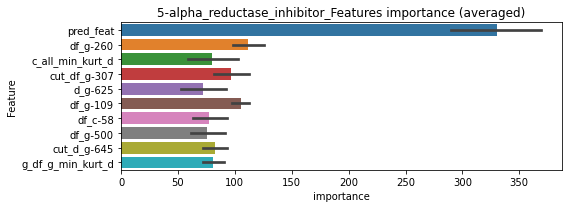

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00019926	valid_1's binary_logloss: 0.00173563
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194329	valid_1's binary_logloss: 0.000406769


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[1158]	training's binary_logloss: 0.00018562	valid_1's binary_logloss: 0.000393882
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019525	valid_1's binary_logloss: 0.000797392


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000170197	valid_1's binary_logloss: 0.000760425


================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187665	valid_1's binary_logloss: 0.00105107


5-alpha_reductase_inhibitor logloss: 0.0009801343568319112


Early stopping, best iteration is:
[1429]	training's binary_logloss: 0.000168316	valid_1's binary_logloss: 0.00102615
neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122558	valid_1's binary_logloss: 0.00286462
[600]	training's binary_logloss: 0.000366081	valid_1's binary_logloss: 0.00117077
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000366091	valid_1's binary_logloss: 0.00117076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120458	valid_1's binary_logloss: 0.00296658
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000365889	valid_1's binary_logloss: 0.00130618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123264	valid_1's binary_logloss: 0.00431184
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000380713	valid_1's binary_logloss: 0.00291874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124596	valid_1's binary_logloss: 0.00203475

1 / 3 AUC score:1.000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037375	valid_1's binary_logloss: 0.000733708


y_Threshold: 0.0020007, Threshold: 0.0060452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00423, conf_1:0.00786
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0060452
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0560452
threshold: 0.0560452, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000552959	valid_1's binary_logloss: 0.000848394
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000188026	valid_1's binary_logloss: 0.000425298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000532214	valid_1's binary_logloss: 0.00081504
[600]	training's binary_logloss: 0.000171071	valid_1's binary_logloss: 0.00038656
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000158168	valid_1's binary_logloss: 0.000371009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000540173	valid_1's binary_logloss: 0.00167312
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000223042	valid_1's binary_logloss: 0.00144431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000540656	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.5894247, Threshold: 0.0560452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0381718 Vs.target_rate: 0.00076
Num_p_label: 152.0, conf_0:0.04484, conf_1:0.06725
Num_p_label: 152.0, Expected: 3.0, Adj_threshold_1: 0.0560452
Num_p_label: 151.0, Expected: 3.0, Adj_threshold_2: 0.1060452
Num_p_label: 151.0, Expected: 3.0, Adj_threshold_3: 0.1560452
Num_p_label: 151.0, Expected: 3.0, Adj_threshold_4: 0.2060452
Num_p_label: 147.0, Expected: 3.0, Adj_threshold_5: 0.2560452
Num_p_label: 139.0, Expected: 3.0, Adj_threshold_6: 0.3060452
Num_p_label: 128.0, Expected: 3.0, Adj_threshold_7: 0.3560452


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000243377	valid_1's binary_logloss: 0.0011471


Num_p_label: 108.0, Expected: 3.0, Adj_threshold_8: 0.4060452
Num_p_label: 84.0, Expected: 3.0, Adj_threshold_9: 0.4560452
Num_p_label: 60.0, Expected: 3.0, Adj_threshold_10: 0.5060452
threshold: 0.5560452, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00055151	valid_1's binary_logloss: 0.000872449
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000188151	valid_1's binary_logloss: 0.000430295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000533467	valid_1's binary_logloss: 0.000822105
[600]	training's binary_logloss: 0.00017233	valid_1's binary_logloss: 0.000403087
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.0001598	valid_1's binary_logloss: 0.000388251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000540632	valid_1's binary_logloss: 0.00143743
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000214424	valid_1's binary_logloss: 0.0010569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000534299	valid_1's binary_logloss: 0.0015

3 / 3 AUC score:1.000
y_Threshold: 0.6238211, Threshold: 0.5560452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00076
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.61165
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_1: 0.5560452
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_2: 0.6060452
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.6560452
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.7060452


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000216706	valid_1's binary_logloss: 0.00119167


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.7560452
threshold: 0.7560452, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000193857	valid_1's binary_logloss: 0.00051799
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000181111	valid_1's binary_logloss: 0.000439421
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000181121	valid_1's binary_logloss: 0.000439382


================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018203	valid_1's binary_logloss: 0.00102128


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[1929]	training's binary_logloss: 0.000151644	valid_1's binary_logloss: 0.00097764


================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


11-beta-hsd1_inhibitor logloss: 0.0007229305385140877


Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000217042	valid_1's binary_logloss: 0.00095317
neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015898	valid_1's binary_logloss: 0.00918681
[600]	training's binary_logloss: 0.000407821	valid_1's binary_logloss: 0.00597005
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000398252	valid_1's binary_logloss: 0.00596631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169564	valid_1's binary_logloss: 0.00833533
[600]	training's binary_logloss: 0.000416094	valid_1's binary_logloss: 0.00608493
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423335	valid_1's binary_logloss: 0.00604675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172983	valid_1's binary_logloss: 0.00388855
[600]	training's binary_logloss: 0.00042158	valid_1's binary_logloss: 0.00173783
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000412913	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0024388, Threshold: 0.0065080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00456, conf_1:0.00846
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0065080
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0565080
threshold: 0.0565080, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000660766	valid_1's binary_logloss: 0.0026579
[600]	training's binary_logloss: 0.000193455	valid_1's binary_logloss: 0.001853
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000165919	valid_1's binary_logloss: 0.00181422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682894	valid_1's binary_logloss: 0.00163339
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000209788	valid_1's binary_logloss: 0.000995371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664551	valid_1's binary_logloss: 0.00330639
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000374195	valid_1's binary_logloss: 0.0030172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000654203	valid_1's binary_logloss: 0.0019669

2 / 3 AUC score:1.000
y_Threshold: 0.5608880, Threshold: 0.0565080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0366650 Vs.target_rate: 0.00101
Num_p_label: 146.0, conf_0:0.04521, conf_1:0.06781
Num_p_label: 146.0, Expected: 4.0, Adj_threshold_1: 0.0565080
Num_p_label: 146.0, Expected: 4.0, Adj_threshold_2: 0.1065080
Num_p_label: 146.0, Expected: 4.0, Adj_threshold_3: 0.1565080
Num_p_label: 145.0, Expected: 4.0, Adj_threshold_4: 0.2065080
Num_p_label: 145.0, Expected: 4.0, Adj_threshold_5: 0.2565080
Num_p_label: 143.0, Expected: 4.0, Adj_threshold_6: 0.3065080
Num_p_label: 141.0, Expected: 4.0, Adj_threshold_7: 0.3565080
Num_p_label: 133.0, Expected: 4.0, Adj_threshold_8: 0.4065080
Num_p_label: 119.0, Expected: 4.0, Adj_threshold_9: 0.4565080
Num_p_label: 99.0, Expected: 4.0, Adj_threshold_10: 0.5065080


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000215358	valid_1's binary_logloss: 0.00109529


threshold: 0.5565080, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665726	valid_1's binary_logloss: 0.00298303
[600]	training's binary_logloss: 0.000193018	valid_1's binary_logloss: 0.00216757
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000169072	valid_1's binary_logloss: 0.00212046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690559	valid_1's binary_logloss: 0.00123095
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000216607	valid_1's binary_logloss: 0.000603376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659253	valid_1's binary_logloss: 0.00754311
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000799768	valid_1's binary_logloss: 0.00735085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659714	valid_1's binary_logloss: 0.002

3 / 3 AUC score:1.000
y_Threshold: 0.6471699, Threshold: 0.5565080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0163235 Vs.target_rate: 0.00101
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.61216
Num_p_label: 65.0, Expected: 4.0, Adj_threshold_1: 0.5565080
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_2: 0.6065080
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_3: 0.6565080
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.7065080
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.7565080


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000351359	valid_1's binary_logloss: 0.00147448


threshold: 0.7565080, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 acat_inhibitor=================================


Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000240085	valid_1's binary_logloss: 0.00329767
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000249865	valid_1's binary_logloss: 0.00089954
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000200429	valid_1's binary_logloss: 0.000486877
Early stopping, best iteration is:
[1555]	training's binary_logloss: 0.00017684	valid_1's binary_logloss: 0.000454716


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195632	valid_1's binary_logloss: 0.00191375
Early stopping, best iteration is:
[1778]	training's binary_logloss: 0.000165867	valid_1's binary_logloss: 0.00188346


acat_inhibitor logloss: 0.001636372432364893


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261
target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242531	valid_1's binary_logloss: 0.174207
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.0192111	valid_1's binary_logloss: 0.173035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022639	valid_1's binary_logloss: 0.142835
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.0100914	valid_1's binary_logloss: 0.137641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234065	valid_1's binary_logloss: 0.157461
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0125545	valid_1's binary_logloss: 0.154257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235786	valid_1's binary_logloss: 0.14962
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.0146271	valid_1's binary_logloss: 0.1

1 / 3 AUC score:0.959
y_Threshold: 0.0548023, Threshold: 0.2900821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 269 → Positive_corect_labels: 583/3644
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, conf_0:0.20306, conf_1:0.37711
threshold: 0.2900821, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 583.0/3644, y_label_rate: 0.1599890
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163357	valid_1's binary_logloss: 0.00932266
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000367911	valid_1's binary_logloss: 0.00656024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166496	valid_1's binary_logloss: 0.00719259
[600]	training's binary_logloss: 0.000262466	valid_1's binary_logloss: 0.0036697
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000217428	valid_1's binary_logloss: 0.00346027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172256	valid_1's binary_logloss: 0.00449941
[600]	training's binary_logloss: 0.000268645	valid_1's binary_logloss: 0.00178091
[900]	training's binary_logloss: 0.000181659	valid_1's binary_logloss: 0.00152933
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000181517	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.6355871, Threshold: 0.2900821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 579.0/3636
p_label_rate: 0.0891512 Vs.target_rate: 0.00798
Num_p_label: 355.0, conf_0:0.23207, conf_1:0.34810
Num_p_label: 355.0, Expected: 31.8, Adj_threshold_1: 0.2900821
Num_p_label: 354.0, Expected: 31.8, Adj_threshold_2: 0.3400821
Num_p_label: 348.0, Expected: 31.8, Adj_threshold_3: 0.3900821
Num_p_label: 348.0, Expected: 31.8, Adj_threshold_4: 0.4400821
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_5: 0.4900821
Num_p_label: 346.0, Expected: 31.8, Adj_threshold_6: 0.5400821
Num_p_label: 344.0, Expected: 31.8, Adj_threshold_7: 0.5900821
Num_p_label: 337.0, Expected: 31.8, Adj_threshold_8: 0.6400821
Num_p_label: 326.0, Expected: 31.8, Adj_threshold_9: 0.6900821
Num_p_label: 313.0, Expected: 31.8, Adj_threshold_10: 0.7400821
threshold: 0.7900821, positive_p_label: 297.0/3982, p_label_rate: 0.0745856
positive_y_label: 579.0/3636, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016677	valid_1's binary_logloss: 0.00748612
[600]	training's binary_logloss: 0.000270795	valid_1's binary_logloss: 0.00427794
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000253485	valid_1's binary_logloss: 0.0041712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166038	valid_1's binary_logloss: 0.00559888
[600]	training's binary_logloss: 0.000269812	valid_1's binary_logloss: 0.00251874
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000192558	valid_1's binary_logloss: 0.00214668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171388	valid_1's binary_logloss: 0.00481516
[600]	training's binary_logloss: 0.000273591	valid_1's binary_logloss: 0.0019075
[900]	training's binary_logloss: 0.000187889	valid_1's binary_logloss: 0.00169736
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.4223513, Threshold: 0.7900821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 575.0/3628
p_label_rate: 0.0622803 Vs.target_rate: 0.00798
Num_p_label: 248.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 248.0, Expected: 31.8, Adj_threshold_1: 0.7900821
threshold: 0.7900821, positive_p_label: 248.0/3982, p_label_rate: 0.0622803
positive_y_label: 575.0/3628, y_label_rate: 0.1584895


len(train_index) : 2721
len(valid_index) : 907
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2721
len(valid_index) : 907
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000368836	valid_1's binary_logloss: 0.0079796
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204985	valid_1's binary_logloss: 0.000742536
[2000]	training's binary_logloss: 0.000159864	valid_1's binary_logloss: 0.000576546
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.000154761	valid_1's binary_logloss: 0.000558309


len(train_index) : 2721
len(valid_index) : 907
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000206541	valid_1's binary_logloss: 0.000574993
[2000]	training's binary_logloss: 0.000160313	valid_1's binary_logloss: 0.000434445
Early stopping, best iteration is:
[2121]	training's binary_logloss: 0.000158208	valid_1's binary_logloss: 0.000427378


len(train_index) : 2721
len(valid_index) : 907
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000220279	valid_1's binary_logloss: 0.000568052
Early stopping, best iteration is:
[1932]	training's binary_logloss: 0.000172715	valid_1's binary_logloss: 0.000443587


acetylcholine_receptor_agonist logloss: 0.0023536885575779487


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241
target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432199	valid_1's binary_logloss: 0.269007
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0469557	valid_1's binary_logloss: 0.268958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426152	valid_1's binary_logloss: 0.293468
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.0502071	valid_1's binary_logloss: 0.29215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.04589	valid_1's binary_logloss: 0.254263
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0233203	valid_1's binary_logloss: 0.251841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448217	valid_1's binary_logloss: 0.2599


1 / 3 AUC score:0.866


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0396581	valid_1's binary_logloss: 0.257858


y_Threshold: 0.0922272, Threshold: 0.1864376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 476 → Positive_corect_labels: 475/3413
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.13051, conf_1:0.24237
threshold: 0.1864376, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 475.0/3413, y_label_rate: 0.1391737
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175349	valid_1's binary_logloss: 0.00864344
[600]	training's binary_logloss: 0.000281683	valid_1's binary_logloss: 0.00515258
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000201854	valid_1's binary_logloss: 0.00490051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182638	valid_1's binary_logloss: 0.00573891
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000367806	valid_1's binary_logloss: 0.00283306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177292	valid_1's binary_logloss: 0.00537745
[600]	training's binary_logloss: 0.000284313	valid_1's binary_logloss: 0.00197902
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000222252	valid_1's binary_logloss: 0.00180856
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.5356926, Threshold: 0.1864376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 471.0/3405
p_label_rate: 0.0851331 Vs.target_rate: 0.01264
Num_p_label: 339.0, conf_0:0.14915, conf_1:0.22373
Num_p_label: 339.0, Expected: 50.3, Adj_threshold_1: 0.1864376
Num_p_label: 339.0, Expected: 50.3, Adj_threshold_2: 0.2364376
Num_p_label: 339.0, Expected: 50.3, Adj_threshold_3: 0.2864376
Num_p_label: 338.0, Expected: 50.3, Adj_threshold_4: 0.3364376
Num_p_label: 338.0, Expected: 50.3, Adj_threshold_5: 0.3864376
Num_p_label: 335.0, Expected: 50.3, Adj_threshold_6: 0.4364376
Num_p_label: 334.0, Expected: 50.3, Adj_threshold_7: 0.4864376
Num_p_label: 323.0, Expected: 50.3, Adj_threshold_8: 0.5364376
Num_p_label: 314.0, Expected: 50.3, Adj_threshold_9: 0.5864376
Num_p_label: 294.0, Expected: 50.3, Adj_threshold_10: 0.6364376
threshold: 0.6864376, positive_p_label: 275.0/3982, p_label_rate: 0.0690608
positive_y_label: 471.0/3405, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172236	valid_1's binary_logloss: 0.00822582
[600]	training's binary_logloss: 0.000279878	valid_1's binary_logloss: 0.00397466
[900]	training's binary_logloss: 0.000191858	valid_1's binary_logloss: 0.00360087
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000184837	valid_1's binary_logloss: 0.00357731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179487	valid_1's binary_logloss: 0.00489748
[600]	training's binary_logloss: 0.000288429	valid_1's binary_logloss: 0.00170375
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000246007	valid_1's binary_logloss: 0.00159314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180479	valid_1's binary_logloss: 0.0058533
[600]	training's binary_logloss: 0.000284332	valid_1's binary_logloss: 0.00290794
[900]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.2427367, Threshold: 0.6864376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 468.0/3399
p_label_rate: 0.0612757 Vs.target_rate: 0.01264
Num_p_label: 244.0, conf_0:0.50000, conf_1:0.75508
Num_p_label: 244.0, Expected: 50.3, Adj_threshold_1: 0.6864376
Num_p_label: 244.0, Expected: 50.3, Adj_threshold_2: 0.7364376
Num_p_label: 240.0, Expected: 50.3, Adj_threshold_3: 0.7864376
threshold: 0.7864376, positive_p_label: 240.0/3982, p_label_rate: 0.0602712
positive_y_label: 468.0/3399, y_label_rate: 0.1376876


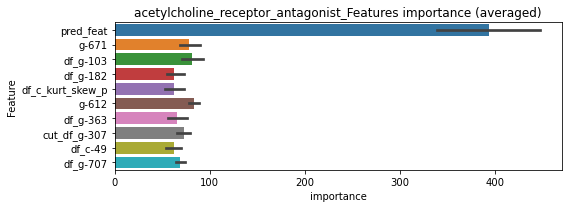

len(train_index) : 2549
len(valid_index) : 850
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000221981	valid_1's binary_logloss: 0.000859977
[2000]	training's binary_logloss: 0.000173536	valid_1's binary_logloss: 0.000666773
Early stopping, best iteration is:
[2124]	training's binary_logloss: 0.000171123	valid_1's binary_logloss: 0.000657112


len(train_index) : 2549
len(valid_index) : 850
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00022462	valid_1's binary_logloss: 0.000756347
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.000176484	valid_1's binary_logloss: 0.000610106


len(train_index) : 2549
len(valid_index) : 850
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2550
len(valid_index) : 849
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000270924	valid_1's binary_logloss: 0.00392177
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.003828011533259325


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00040134	valid_1's binary_logloss: 0.0100726
neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00673046	valid_1's binary_logloss: 0.0588239
[600]	training's binary_logloss: 0.0011683	valid_1's binary_logloss: 0.0497489
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00110401	valid_1's binary_logloss: 0.0495281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732078	valid_1's binary_logloss: 0.0400254
[600]	training's binary_logloss: 0.00123695	valid_1's binary_logloss: 0.0285557
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00089629	valid_1's binary_logloss: 0.0281001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800162	valid_1's binary_logloss: 0.0299271
[600]	training's binary_logloss: 0.00129157	valid_1's binary_logloss: 0.0180613
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00118022	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0111506, Threshold: 0.0392998, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02751, conf_1:0.05109
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0392998
Num_p_label: 9.0, Expected: 12.2, Adj_threshold_2: 0.0892998
threshold: 0.0892998, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130586	valid_1's binary_logloss: 0.0102315
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00035564	valid_1's binary_logloss: 0.0090853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127726	valid_1's binary_logloss: 0.00493268
[600]	training's binary_logloss: 0.000244984	valid_1's binary_logloss: 0.00298818
[900]	training's binary_logloss: 0.000176827	valid_1's binary_logloss: 0.0028249
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000169778	valid_1's binary_logloss: 0.0028053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133927	valid_1's binary_logloss: 0.00420606
[600]	training's binary_logloss: 0.000244764	valid_1's binary_logloss: 0.00213061
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00019034	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.2830533, Threshold: 0.0892998, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0537418 Vs.target_rate: 0.00307
Num_p_label: 214.0, conf_0:0.07144, conf_1:0.10716
Num_p_label: 214.0, Expected: 12.2, Adj_threshold_1: 0.0892998
Num_p_label: 214.0, Expected: 12.2, Adj_threshold_2: 0.1392998


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000263429	valid_1's binary_logloss: 0.00167794


Num_p_label: 212.0, Expected: 12.2, Adj_threshold_3: 0.1892998
Num_p_label: 204.0, Expected: 12.2, Adj_threshold_4: 0.2392998
Num_p_label: 188.0, Expected: 12.2, Adj_threshold_5: 0.2892998
Num_p_label: 163.0, Expected: 12.2, Adj_threshold_6: 0.3392998
Num_p_label: 145.0, Expected: 12.2, Adj_threshold_7: 0.3892998
Num_p_label: 128.0, Expected: 12.2, Adj_threshold_8: 0.4392998
Num_p_label: 117.0, Expected: 12.2, Adj_threshold_9: 0.4892998
Num_p_label: 110.0, Expected: 12.2, Adj_threshold_10: 0.5392998
threshold: 0.5892998, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 646.0/3785, y_label_rate: 0.1706737
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100253	valid_1's binary_logloss: 0.00888873
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000496316	valid_1's binary_logloss: 0.0085176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101968	valid_1's binary_logloss: 0.00188889
[600]	training's binary_logloss: 0.000162726	valid_1's binary_logloss: 0.000320494
[900]	training's binary_logloss: 0.000107485	valid_1's binary_logloss: 0.000212748
[1200]	training's binary_logloss: 0.000101346	valid_1's binary_logloss: 0.000200498
Early stopping, best iteration is:
[1179]	training's binary_logloss: 0.000101346	valid_1's binary_logloss: 0.000200498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121569	valid_1's binary_logloss: 0.00298667
[600]	training's binary_logloss: 0.00021728	valid_1's binary_logloss: 0.00109064
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.2031161, Threshold: 0.5892998, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0253641 Vs.target_rate: 0.00307
Num_p_label: 101.0, conf_0:0.50000, conf_1:0.64823
Num_p_label: 101.0, Expected: 12.2, Adj_threshold_1: 0.5892998
Num_p_label: 100.0, Expected: 12.2, Adj_threshold_2: 0.6392998
Num_p_label: 100.0, Expected: 12.2, Adj_threshold_3: 0.6892998
Num_p_label: 100.0, Expected: 12.2, Adj_threshold_4: 0.7392998
Num_p_label: 100.0, Expected: 12.2, Adj_threshold_5: 0.7892998
threshold: 0.7892998, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 645.0/3783, y_label_rate: 0.1704996


len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[226]	training's binary_logloss: 0.000770278	valid_1's binary_logloss: 0.00316192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148356	valid_1's binary_logloss: 0.000382631
[2000]	training's binary_logloss: 0.000110706	valid_1's binary_logloss: 0.00028675
[3000]	training's binary_logloss: 0.000102946	valid_1's binary_logloss: 0.000266494


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[3262]	training's binary_logloss: 0.000102081	valid_1's binary_logloss: 0.000264166
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148655	valid_1's binary_logloss: 0.000279221
[2000]	training's binary_logloss: 0.000110584	valid_1's binary_logloss: 0.00020797
[3000]	training's binary_logloss: 0.000102804	valid_1's binary_logloss: 0.000193227
Early stopping, best iteration is:
[3116]	training's binary_logloss: 0.000102229	valid_1's binary_logloss: 0.000192047


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148523	valid_1's binary_logloss: 0.000302143
[2000]	training's binary_logloss: 0.00011069	valid_1's binary_logloss: 0.000225656
[3000]	training's binary_logloss: 0.000102926	valid_1's binary_logloss: 0.000209744
Early stopping, best iteration is:
[3058]	training's binary_logloss: 0.000102561	valid_1's binary_logloss: 0.000208926


acetylcholinesterase_inhibitor logloss: 0.0009569619796246227


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040683	valid_1's binary_logloss: 0.0250874
[600]	training's binary_logloss: 0.000791083	valid_1's binary_logloss: 0.0179231
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000643576	valid_1's binary_logloss: 0.0173923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426956	valid_1's binary_logloss: 0.0130887
[600]	training's binary_logloss: 0.000819378	valid_1's binary_logloss: 0.0067937
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000698531	valid_1's binary_logloss: 0.00643703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423196	valid_1's binary_logloss: 0.0187027
[600]	training's binary_logloss: 0.000794561	valid_1's binary_logloss: 0.0116084
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00071369	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0057732, Threshold: 0.0207924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01455, conf_1:0.02703
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0207924
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_2: 0.0707924
threshold: 0.0707924, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010221	valid_1's binary_logloss: 0.00347648
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000289747	valid_1's binary_logloss: 0.00189962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107645	valid_1's binary_logloss: 0.00347332
[600]	training's binary_logloss: 0.000225271	valid_1's binary_logloss: 0.00244022
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000233637	valid_1's binary_logloss: 0.00242214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106521	valid_1's binary_logloss: 0.00296636
[600]	training's binary_logloss: 0.000225216	valid_1's binary_logloss: 0.00158512
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000181273	valid_1's binary_logloss: 0.00147882
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.6424008, Threshold: 0.0707924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0524862 Vs.target_rate: 0.00227
Num_p_label: 209.0, conf_0:0.05663, conf_1:0.08495
Num_p_label: 209.0, Expected: 9.0, Adj_threshold_1: 0.0707924
Num_p_label: 208.0, Expected: 9.0, Adj_threshold_2: 0.1207924
Num_p_label: 208.0, Expected: 9.0, Adj_threshold_3: 0.1707924
Num_p_label: 208.0, Expected: 9.0, Adj_threshold_4: 0.2207924
Num_p_label: 208.0, Expected: 9.0, Adj_threshold_5: 0.2707924
Num_p_label: 208.0, Expected: 9.0, Adj_threshold_6: 0.3207924
Num_p_label: 207.0, Expected: 9.0, Adj_threshold_7: 0.3707924


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000421439	valid_1's binary_logloss: 0.00444084


Num_p_label: 203.0, Expected: 9.0, Adj_threshold_8: 0.4207924
Num_p_label: 191.0, Expected: 9.0, Adj_threshold_9: 0.4707924
Num_p_label: 170.0, Expected: 9.0, Adj_threshold_10: 0.5207924
threshold: 0.5707924, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105306	valid_1's binary_logloss: 0.00731776
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000452498	valid_1's binary_logloss: 0.00637028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108552	valid_1's binary_logloss: 0.00220746
[600]	training's binary_logloss: 0.000227358	valid_1's binary_logloss: 0.000989651
[900]	training's binary_logloss: 0.000173454	valid_1's binary_logloss: 0.000907239
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000168236	valid_1's binary_logloss: 0.000893582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104275	valid_1's binary_logloss: 0.00273202
[600]	training's binary_logloss: 0.000226984	valid_1's binary_logloss: 0.00135888
[900]	training's binary_logloss: 0.000173312	valid_1's binary_logloss: 0.00126812
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.4311924, Threshold: 0.5707924, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0050226 Vs.target_rate: 0.00227
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.62787
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.5707924
threshold: 0.5707924, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3795, y_label_rate: 0.1718050


len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000332356	valid_1's binary_logloss: 0.00263135
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000294876	valid_1's binary_logloss: 0.00166272
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000216888	valid_1's binary_logloss: 0.000378833
[2000]	training's binary_logloss: 0.000176501	valid_1's binary_logloss: 0.000304929
Early stopping, best iteration is:
[2037]	training's binary_logloss: 0.000176096	valid_1's binary_logloss: 0.000304211


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.0018026929019658447


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000325984	valid_1's binary_logloss: 0.00259571
neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112893	valid_1's binary_logloss: 0.0678183
[600]	training's binary_logloss: 0.00171973	valid_1's binary_logloss: 0.0530909
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00192004	valid_1's binary_logloss: 0.0528601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114648	valid_1's binary_logloss: 0.0525309
[600]	training's binary_logloss: 0.00173748	valid_1's binary_logloss: 0.0348084
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.00107755	valid_1's binary_logloss: 0.0329957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109807	valid_1's binary_logloss: 0.0700186
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00270707	valid_1's binary_logloss: 0.0615681
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.994
y_Threshold: 0.0148732, Threshold: 0.0457486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.03202, conf_1:0.05947
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0457486
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.0957486
threshold: 0.0957486, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151561	valid_1's binary_logloss: 0.00557551
[600]	training's binary_logloss: 0.000251502	valid_1's binary_logloss: 0.00346927
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000225643	valid_1's binary_logloss: 0.00340859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150891	valid_1's binary_logloss: 0.00453625
[600]	training's binary_logloss: 0.000245731	valid_1's binary_logloss: 0.00197289
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000234075	valid_1's binary_logloss: 0.00191639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149635	valid_1's binary_logloss: 0.00658703
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000455511	valid_1's binary_logloss: 0.00506738
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.6073754, Threshold: 0.0957486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0595178 Vs.target_rate: 0.00403
Num_p_label: 237.0, conf_0:0.07660, conf_1:0.11490
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_1: 0.0957486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_2: 0.1457486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_3: 0.1957486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_4: 0.2457486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_5: 0.2957486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_6: 0.3457486
Num_p_label: 237.0, Expected: 16.1, Adj_threshold_7: 0.3957486
Num_p_label: 236.0, Expected: 16.1, Adj_threshold_8: 0.4457486
Num_p_label: 235.0, Expected: 16.1, Adj_threshold_9: 0.4957486
Num_p_label: 232.0, Expected: 16.1, Adj_threshold_10: 0.5457486
threshold: 0.5957486, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 637.0/3763, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014898	valid_1's binary_logloss: 0.00529627
[600]	training's binary_logloss: 0.000255305	valid_1's binary_logloss: 0.00300982
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000185375	valid_1's binary_logloss: 0.0028668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158232	valid_1's binary_logloss: 0.00300873
[600]	training's binary_logloss: 0.000260945	valid_1's binary_logloss: 0.000848447
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000194048	valid_1's binary_logloss: 0.000690436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156636	valid_1's binary_logloss: 0.00557599
[600]	training's binary_logloss: 0.000259037	valid_1's binary_logloss: 0.00345899
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000221886	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.3672050, Threshold: 0.5957486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 634.0/3757
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, conf_0:0.50000, conf_1:0.65532
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.5957486
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.6457486
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_3: 0.6957486
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_4: 0.7457486
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_5: 0.7957486


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000618191	valid_1's binary_logloss: 0.00681511


threshold: 0.7957486, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 634.0/3757, y_label_rate: 0.1687517


len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000215427	valid_1's binary_logloss: 0.00295531


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000268338	valid_1's binary_logloss: 0.0012568
Training until validation scores don't improve for 30 rounds


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000339972	valid_1's binary_logloss: 0.00289082
Training until validation scores don't improve for 30 rounds


adenosine_receptor_antagonist logloss: 0.0026716136744080994


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000452296	valid_1's binary_logloss: 0.00354681
neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130235	valid_1's binary_logloss: 0.00237739
[600]	training's binary_logloss: 0.000375426	valid_1's binary_logloss: 0.000859685
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000375426	valid_1's binary_logloss: 0.000859685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126182	valid_1's binary_logloss: 0.00444547
[600]	training's binary_logloss: 0.000369778	valid_1's binary_logloss: 0.00224993
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000369778	valid_1's binary_logloss: 0.00224993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126865	valid_1's binary_logloss: 0.00302982
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000381099	valid_1's binary_logloss: 0.0016553
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0020608, Threshold: 0.0121775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00852, conf_1:0.01583
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0121775
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0621775
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1121775
threshold: 0.1121775, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000556964	valid_1's binary_logloss: 0.00129502
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000269872	valid_1's binary_logloss: 0.00106033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545332	valid_1's binary_logloss: 0.00223295
[600]	training's binary_logloss: 0.000171135	valid_1's binary_logloss: 0.00169631
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000148844	valid_1's binary_logloss: 0.00163821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563495	valid_1's binary_logloss: 0.000761657
[600]	training's binary_logloss: 0.000177378	valid_1's binary_logloss: 0.000352209
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000155692	valid_1's binary_logloss: 0.000325442
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.5816238, Threshold: 0.1121775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0537418 Vs.target_rate: 0.00076
Num_p_label: 214.0, conf_0:0.08974, conf_1:0.13461
Num_p_label: 214.0, Expected: 3.0, Adj_threshold_1: 0.1121775
Num_p_label: 213.0, Expected: 3.0, Adj_threshold_2: 0.1621775
Num_p_label: 208.0, Expected: 3.0, Adj_threshold_3: 0.2121775
Num_p_label: 201.0, Expected: 3.0, Adj_threshold_4: 0.2621775
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_5: 0.3121775
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_6: 0.3621775
Num_p_label: 150.0, Expected: 3.0, Adj_threshold_7: 0.4121775
Num_p_label: 119.0, Expected: 3.0, Adj_threshold_8: 0.4621775
Num_p_label: 95.0, Expected: 3.0, Adj_threshold_9: 0.5121775
Num_p_label: 77.0, Expected: 3.0, Adj_threshold_10: 0.5621775
threshold: 0.6121775, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557248	valid_1's binary_logloss: 0.00110914
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000251273	valid_1's binary_logloss: 0.000834416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544935	valid_1's binary_logloss: 0.00200915
[600]	training's binary_logloss: 0.00017651	valid_1's binary_logloss: 0.00141934
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00014848	valid_1's binary_logloss: 0.00137301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570084	valid_1's binary_logloss: 0.000805386
[600]	training's binary_logloss: 0.000179206	valid_1's binary_logloss: 0.000357469
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000159096	valid_1's binary_logloss: 0.000330127
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.5223131, Threshold: 0.6121775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0115520 Vs.target_rate: 0.00076
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.67340
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_1: 0.6121775
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_2: 0.6621775
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_3: 0.7121775
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.7621775
threshold: 0.7621775, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000188316	valid_1's binary_logloss: 0.000446594


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000295073	valid_1's binary_logloss: 0.00148854
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000182502	valid_1's binary_logloss: 0.00122937


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.000151729	valid_1's binary_logloss: 0.0011934
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018458	valid_1's binary_logloss: 0.000360461


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[1493]	training's binary_logloss: 0.000161147	valid_1's binary_logloss: 0.000332657
Training until validation scores don't improve for 30 rounds


adenylyl_cyclase_activator logloss: 0.0008641521794316323


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000204417	valid_1's binary_logloss: 0.000438571
neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254
target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0384335	valid_1's binary_logloss: 0.233991
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.019564	valid_1's binary_logloss: 0.23072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0542325	valid_1's binary_logloss: 0.252572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0373158	valid_1's binary_logloss: 0.222029
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.0207229	valid_1's binary_logloss: 0.217389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0413254	valid_1's binary_logloss: 0.239132
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0289171	valid_1's binary_logloss: 0.237773


1 / 3 AUC score:0.900
y_Threshold: 0.0872772, Threshold: 0.5331570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 421 → Positive_corect_labels: 505/3483
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, conf_0:0.37321, conf_1:0.69310
threshold: 0.5331570, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 505.0/3483, y_label_rate: 0.1449900
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171804	valid_1's binary_logloss: 0.00679336
[600]	training's binary_logloss: 0.000270777	valid_1's binary_logloss: 0.00329778
[900]	training's binary_logloss: 0.000178829	valid_1's binary_logloss: 0.00301428
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000173366	valid_1's binary_logloss: 0.00299263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169606	valid_1's binary_logloss: 0.00592208
[600]	training's binary_logloss: 0.000250746	valid_1's binary_logloss: 0.00281521
[900]	training's binary_logloss: 0.000168497	valid_1's binary_logloss: 0.00249368
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000171468	valid_1's binary_logloss: 0.00248683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167416	valid_1's binary_logloss: 0.00454385
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.7021025, Threshold: 0.5331570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 503.0/3479
p_label_rate: 0.0969362 Vs.target_rate: 0.01134
Num_p_label: 386.0, conf_0:0.42653, conf_1:0.63979
Num_p_label: 386.0, Expected: 45.1, Adj_threshold_1: 0.5331570
Num_p_label: 386.0, Expected: 45.1, Adj_threshold_2: 0.5831570
Num_p_label: 385.0, Expected: 45.1, Adj_threshold_3: 0.6331570
Num_p_label: 384.0, Expected: 45.1, Adj_threshold_4: 0.6831570
Num_p_label: 382.0, Expected: 45.1, Adj_threshold_5: 0.7331570
Num_p_label: 374.0, Expected: 45.1, Adj_threshold_6: 0.7831570
threshold: 0.7831570, positive_p_label: 374.0/3982, p_label_rate: 0.0939227
positive_y_label: 503.0/3479, y_label_rate: 0.1445818
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175091	valid_1's binary_logloss: 0.00423752
[600]	training's binary_logloss: 0.000279952	valid_1's binary_logloss: 0.000797554
[900]	training's binary_logloss: 0.000189976	valid_1's binary_logloss: 0.000543604
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000179135	valid_1's binary_logloss: 0.000512977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185369	valid_1's binary_logloss: 0.0120343
[600]	training's binary_logloss: 0.000282787	valid_1's binary_logloss: 0.00820064
[900]	training's binary_logloss: 0.000188068	valid_1's binary_logloss: 0.00784426
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.00018149	valid_1's binary_logloss: 0.00779609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182766	valid_1's binary_logloss: 0.00697085
[600]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.5497307, Threshold: 0.7831570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 499.0/3471
p_label_rate: 0.0755902 Vs.target_rate: 0.01134
Num_p_label: 301.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 301.0, Expected: 45.1, Adj_threshold_1: 0.7831570
threshold: 0.7831570, positive_p_label: 301.0/3982, p_label_rate: 0.0755902
positive_y_label: 499.0/3471, y_label_rate: 0.1437626


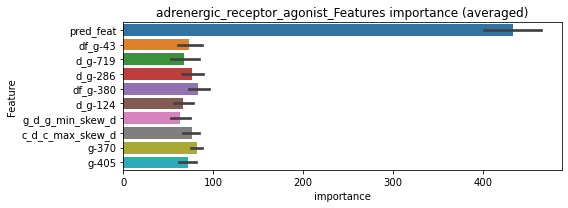

len(train_index) : 2603
len(valid_index) : 868
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2603
len(valid_index) : 868
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000399159	valid_1's binary_logloss: 0.00302771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000246123	valid_1's binary_logloss: 0.0112746


len(train_index) : 2603
len(valid_index) : 868
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2604
len(valid_index) : 867
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000323844	valid_1's binary_logloss: 0.00300436
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.005806896666383444


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000315717	valid_1's binary_logloss: 0.00588658
neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240
target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0517952	valid_1's binary_logloss: 0.329312
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.0612605	valid_1's binary_logloss: 0.327014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0513751	valid_1's binary_logloss: 0.294224
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0545683	valid_1's binary_logloss: 0.294184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485206	valid_1's binary_logloss: 0.283609
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0365593	valid_1's binary_logloss: 0.282142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.052379	valid_1's binary_logloss: 0.288627


1 / 3 AUC score:0.838
y_Threshold: 0.1148198, Threshold: 0.7523921, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0453806	valid_1's binary_logloss: 0.286247


Remove_noisy_data: 546 → Positive_corect_labels: 440/3342
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.7523921
Num_p_label: 46.0, Expected: 60.2, Adj_threshold_2: 0.7323921
threshold: 0.7323921, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 440.0/3342, y_label_rate: 0.1316577
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175554	valid_1's binary_logloss: 0.00925697
[600]	training's binary_logloss: 0.000291758	valid_1's binary_logloss: 0.00537663
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000261891	valid_1's binary_logloss: 0.00525782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183224	valid_1's binary_logloss: 0.00565716
[600]	training's binary_logloss: 0.000296928	valid_1's binary_logloss: 0.00185224
[900]	training's binary_logloss: 0.000200746	valid_1's binary_logloss: 0.00150525
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000193108	valid_1's binary_logloss: 0.00147826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182545	valid_1's binary_logloss: 0.00482054
[600]	training's binary_logloss: 0.000296149	valid_1's binary_logloss: 0.00118564
[900]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.2434241, Threshold: 0.7323921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 438.0/3338
p_label_rate: 0.1074837 Vs.target_rate: 0.01512
Num_p_label: 428.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 428.0, Expected: 60.2, Adj_threshold_1: 0.7323921
Num_p_label: 427.0, Expected: 60.2, Adj_threshold_2: 0.7823921
threshold: 0.7823921, positive_p_label: 427.0/3982, p_label_rate: 0.1072325
positive_y_label: 438.0/3338, y_label_rate: 0.1312163
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173614	valid_1's binary_logloss: 0.00599432
[600]	training's binary_logloss: 0.000290015	valid_1's binary_logloss: 0.00177933
[900]	training's binary_logloss: 0.000196649	valid_1's binary_logloss: 0.0014046
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000194654	valid_1's binary_logloss: 0.00140005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179343	valid_1's binary_logloss: 0.00774794
[600]	training's binary_logloss: 0.000296295	valid_1's binary_logloss: 0.00384647
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000216795	valid_1's binary_logloss: 0.00352395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188636	valid_1's binary_logloss: 0.00657038
[600]	training's binary_logloss: 0.000304771	valid_1's binary_logloss: 0.00338056
[900]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.3449103, Threshold: 0.7823921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 435.0/3332
p_label_rate: 0.1052235 Vs.target_rate: 0.01512
Num_p_label: 419.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 419.0, Expected: 60.2, Adj_threshold_1: 0.7823921
threshold: 0.7823921, positive_p_label: 419.0/3982, p_label_rate: 0.1052235
positive_y_label: 435.0/3332, y_label_rate: 0.1305522


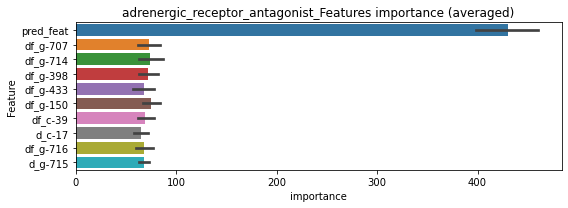

len(train_index) : 2499
len(valid_index) : 833
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000237089	valid_1's binary_logloss: 0.00159355
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000234434	valid_1's binary_logloss: 0.00158154


len(train_index) : 2499
len(valid_index) : 833
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2499
len(valid_index) : 833
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000540217	valid_1's binary_logloss: 0.0064767
Training until validation scores don't improve for 30 rounds


len(train_index) : 2499
len(valid_index) : 833
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000317131	valid_1's binary_logloss: 0.00358909
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000241412	valid_1's binary_logloss: 0.00106209
Early stopping, best iteration is:
[1684]	training's binary_logloss: 0.000198473	valid_1's binary_logloss: 0.000929654


adrenergic_receptor_antagonist logloss: 0.003148595990382087


neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284
target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593428	valid_1's binary_logloss: 0.0535211
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00120776	valid_1's binary_logloss: 0.0428786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612536	valid_1's binary_logloss: 0.037081
[600]	training's binary_logloss: 0.00108576	valid_1's binary_logloss: 0.0263992
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000777737	valid_1's binary_logloss: 0.0255753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640933	valid_1's binary_logloss: 0.0202248
[600]	training's binary_logloss: 0.00113728	valid_1's binary_logloss: 0.00934006
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000724437	valid_1's binary_logloss: 0.00819815
Training until validation scores don't improve for 30 rounds
[300]	tr

1 / 3 AUC score:0.999
y_Threshold: 0.0090922, Threshold: 0.0448267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, conf_0:0.03138, conf_1:0.05827
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0448267
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_2: 0.0948267
Num_p_label: 14.0, Expected: 11.0, Adj_threshold_3: 0.1448267
threshold: 0.1448267, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126446	valid_1's binary_logloss: 0.0049377
[600]	training's binary_logloss: 0.000238123	valid_1's binary_logloss: 0.00321071
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.0002132	valid_1's binary_logloss: 0.00318465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122539	valid_1's binary_logloss: 0.00753074
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000264165	valid_1's binary_logloss: 0.00599688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012488	valid_1's binary_logloss: 0.0040342
[600]	training's binary_logloss: 0.00024188	valid_1's binary_logloss: 0.00226101
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00020939	valid_1's binary_logloss: 0.00216694
Training until validation scores don't improve for 30 rounds
[300]

2 / 3 AUC score:1.000
y_Threshold: 0.2832073, Threshold: 0.1448267, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000166572	valid_1's binary_logloss: 0.00023758


Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0580110 Vs.target_rate: 0.00277
Num_p_label: 231.0, conf_0:0.11586, conf_1:0.17379
Num_p_label: 231.0, Expected: 11.0, Adj_threshold_1: 0.1448267
Num_p_label: 216.0, Expected: 11.0, Adj_threshold_2: 0.1948267
Num_p_label: 191.0, Expected: 11.0, Adj_threshold_3: 0.2448267
Num_p_label: 147.0, Expected: 11.0, Adj_threshold_4: 0.2948267
Num_p_label: 99.0, Expected: 11.0, Adj_threshold_5: 0.3448267
Num_p_label: 63.0, Expected: 11.0, Adj_threshold_6: 0.3948267
Num_p_label: 49.0, Expected: 11.0, Adj_threshold_7: 0.4448267
Num_p_label: 43.0, Expected: 11.0, Adj_threshold_8: 0.4948267
Num_p_label: 37.0, Expected: 11.0, Adj_threshold_9: 0.5448267
Num_p_label: 36.0, Expected: 11.0, Adj_threshold_10: 0.5948267
threshold: 0.6448267, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116519	valid_1's binary_logloss: 0.00337714
[600]	training's binary_logloss: 0.000228841	valid_1's binary_logloss: 0.0016437
[900]	training's binary_logloss: 0.000165298	valid_1's binary_logloss: 0.00148677
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000165117	valid_1's binary_logloss: 0.00148417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118867	valid_1's binary_logloss: 0.00338138
[600]	training's binary_logloss: 0.000227981	valid_1's binary_logloss: 0.00179225
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000172377	valid_1's binary_logloss: 0.00167787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011754	valid_1's binary_logloss: 0.00395086
[600]	training's binary_logloss: 0.000228622	valid_1's binary_logloss: 0.00219423
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.1813309, Threshold: 0.6448267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0087896 Vs.target_rate: 0.00277
Num_p_label: 35.0, conf_0:0.50000, conf_1:0.70931
Num_p_label: 35.0, Expected: 11.0, Adj_threshold_1: 0.6448267
Num_p_label: 35.0, Expected: 11.0, Adj_threshold_2: 0.6948267
Num_p_label: 35.0, Expected: 11.0, Adj_threshold_3: 0.7448267
Num_p_label: 35.0, Expected: 11.0, Adj_threshold_4: 0.7948267
threshold: 0.7948267, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


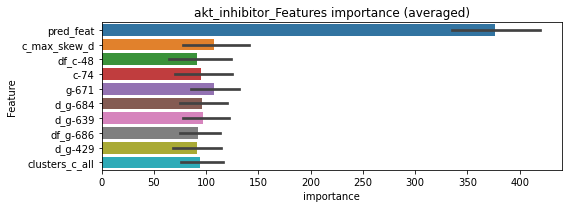

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000206556	valid_1's binary_logloss: 0.00203816
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.00019802	valid_1's binary_logloss: 0.00202224


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000273337	valid_1's binary_logloss: 0.00210995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 akt_inhibitor=================================


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000270188	valid_1's binary_logloss: 0.00255879
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204457	valid_1's binary_logloss: 0.000974486
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000200409	valid_1's binary_logloss: 0.000966644


akt_inhibitor logloss: 0.0019176690418460432


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127667	valid_1's binary_logloss: 0.00255076
[600]	training's binary_logloss: 0.000359241	valid_1's binary_logloss: 0.000932759
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000355301	valid_1's binary_logloss: 0.000926828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127707	valid_1's binary_logloss: 0.00376602
[600]	training's binary_logloss: 0.000357234	valid_1's binary_logloss: 0.00163902
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000354824	valid_1's binary_logloss: 0.00163662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012848	valid_1's binary_logloss: 0.00201479
[600]	training's binary_logloss: 0.000359052	valid_1's binary_logloss: 0.000701529
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000355667	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0020249, Threshold: 0.0089093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00624, conf_1:0.01158
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0089093
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0589093
threshold: 0.0589093, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057803	valid_1's binary_logloss: 0.00067883
[600]	training's binary_logloss: 0.000178293	valid_1's binary_logloss: 0.000232221
[900]	training's binary_logloss: 0.000149377	valid_1's binary_logloss: 0.000196403
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000149093	valid_1's binary_logloss: 0.000195583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557813	valid_1's binary_logloss: 0.00306347
[600]	training's binary_logloss: 0.000173254	valid_1's binary_logloss: 0.00227284
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000149614	valid_1's binary_logloss: 0.00223125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559987	valid_1's binary_logloss: 0.000607523
[600]	training's binary_logloss: 0.00017256	valid_1's binary_logloss: 0.000164597
[900]	

2 / 3 AUC score:1.000
y_Threshold: 0.5033431, Threshold: 0.0589093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0502260 Vs.target_rate: 0.00080
Num_p_label: 200.0, conf_0:0.04713, conf_1:0.07069
Num_p_label: 200.0, Expected: 3.2, Adj_threshold_1: 0.0589093
Num_p_label: 196.0, Expected: 3.2, Adj_threshold_2: 0.1089093
Num_p_label: 195.0, Expected: 3.2, Adj_threshold_3: 0.1589093
Num_p_label: 194.0, Expected: 3.2, Adj_threshold_4: 0.2089093
Num_p_label: 188.0, Expected: 3.2, Adj_threshold_5: 0.2589093
Num_p_label: 178.0, Expected: 3.2, Adj_threshold_6: 0.3089093
Num_p_label: 158.0, Expected: 3.2, Adj_threshold_7: 0.3589093
Num_p_label: 135.0, Expected: 3.2, Adj_threshold_8: 0.4089093
Num_p_label: 107.0, Expected: 3.2, Adj_threshold_9: 0.4589093
Num_p_label: 76.0, Expected: 3.2, Adj_threshold_10: 0.5089093
threshold: 0.5589093, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572566	valid_1's binary_logloss: 0.000685138
[600]	training's binary_logloss: 0.000176881	valid_1's binary_logloss: 0.000238229
[900]	training's binary_logloss: 0.000148873	valid_1's binary_logloss: 0.000202018
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000148873	valid_1's binary_logloss: 0.000202018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000562154	valid_1's binary_logloss: 0.00402122
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000262441	valid_1's binary_logloss: 0.00334219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571899	valid_1's binary_logloss: 0.000609669
[600]	training's binary_logloss: 0.000173929	valid_1's binary_logloss: 0.000163508
[900]	training's binary_logloss: 0.000145096	valid_1's binary_logloss: 0.000126695
Ea

3 / 3 AUC score:1.000
y_Threshold: 0.5129297, Threshold: 0.5589093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0087896 Vs.target_rate: 0.00080
Num_p_label: 35.0, conf_0:0.50000, conf_1:0.61480
Num_p_label: 35.0, Expected: 3.2, Adj_threshold_1: 0.5589093
Num_p_label: 27.0, Expected: 3.2, Adj_threshold_2: 0.6089093
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_3: 0.6589093
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.7089093
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_5: 0.7589093


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000187662	valid_1's binary_logloss: 0.000604974


threshold: 0.7589093, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[942]	training's binary_logloss: 0.00019001	valid_1's binary_logloss: 0.000308163
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000301564	valid_1's binary_logloss: 0.0042815
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000181836	valid_1's binary_logloss: 0.000176107
[2000]	training's binary_logloss: 0.000150056	valid_1's binary_logloss: 0.000134077
Early stopping, best iteration is:
[2185]	training's binary_logloss: 0.000147764	valid_1's binary_logloss: 0.000130978


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000175807	valid_1's binary_logloss: 0.000389635


aldehyde_dehydrogenase_inhibitor logloss: 0.001283064994167325


Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000168466	valid_1's binary_logloss: 0.000387076
neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342543	valid_1's binary_logloss: 0.0190524
[600]	training's binary_logloss: 0.000664023	valid_1's binary_logloss: 0.0115424
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000562291	valid_1's binary_logloss: 0.0111166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330848	valid_1's binary_logloss: 0.0200053
[600]	training's binary_logloss: 0.000653303	valid_1's binary_logloss: 0.0135363
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000553755	valid_1's binary_logloss: 0.0130646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365865	valid_1's binary_logloss: 0.00944743
[600]	training's binary_logloss: 0.000682517	valid_1's binary_logloss: 0.00403614
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000594871	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0042551, Threshold: 0.0190382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01333, conf_1:0.02475
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0190382
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_2: 0.0690382
threshold: 0.0690382, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923974	valid_1's binary_logloss: 0.00456613
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000343491	valid_1's binary_logloss: 0.00375606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00088984	valid_1's binary_logloss: 0.00226389
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000215994	valid_1's binary_logloss: 0.00117373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000920343	valid_1's binary_logloss: 0.00236419
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000406826	valid_1's binary_logloss: 0.00172742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000904985	valid_1's binary_logloss: 0.00111815
[600]	training's binary_logloss: 0.000207869	valid_1's binary_logloss: 0.00024

2 / 3 AUC score:1.000
y_Threshold: 0.6556665, Threshold: 0.0690382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0472125 Vs.target_rate: 0.00176
Num_p_label: 188.0, conf_0:0.05523, conf_1:0.08285
Num_p_label: 188.0, Expected: 7.0, Adj_threshold_1: 0.0690382
Num_p_label: 186.0, Expected: 7.0, Adj_threshold_2: 0.1190382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_3: 0.1690382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_4: 0.2190382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_5: 0.2690382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_6: 0.3190382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_7: 0.3690382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_8: 0.4190382
Num_p_label: 182.0, Expected: 7.0, Adj_threshold_9: 0.4690382
Num_p_label: 181.0, Expected: 7.0, Adj_threshold_10: 0.5190382
threshold: 0.5690382, positive_p_label: 178.0/3982, p_label_rate: 0.0447012
positive_y_label: 656.0/3808, y_label_rate: 0.1722689

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909217	valid_1's binary_logloss: 0.00432536
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000238158	valid_1's binary_logloss: 0.00337275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000905037	valid_1's binary_logloss: 0.00246427
[600]	training's binary_logloss: 0.00021274	valid_1's binary_logloss: 0.0016504
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000215747	valid_1's binary_logloss: 0.00164393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000957249	valid_1's binary_logloss: 0.00155186
[600]	training's binary_logloss: 0.000213201	valid_1's binary_logloss: 0.000732273
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00020158	valid_1's binary_logloss: 0.000702948
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.6452980, Threshold: 0.5690382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0381718 Vs.target_rate: 0.00176
Num_p_label: 152.0, conf_0:0.50000, conf_1:0.62594
Num_p_label: 152.0, Expected: 7.0, Adj_threshold_1: 0.5690382
Num_p_label: 128.0, Expected: 7.0, Adj_threshold_2: 0.6190382
Num_p_label: 93.0, Expected: 7.0, Adj_threshold_3: 0.6690382
Num_p_label: 58.0, Expected: 7.0, Adj_threshold_4: 0.7190382
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_5: 0.7690382


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000286954	valid_1's binary_logloss: 0.00309465


threshold: 0.7690382, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000298782	valid_1's binary_logloss: 0.00209973
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 alk_inhibitor=================================


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000250539	valid_1's binary_logloss: 0.00163879
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208773	valid_1's binary_logloss: 0.00358771
Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.000197935	valid_1's binary_logloss: 0.00356155


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


alk_inhibitor logloss: 0.002019170743114956


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000243682	valid_1's binary_logloss: 0.000753151
neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000746893	valid_1's binary_logloss: 0.00185369
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000283782	valid_1's binary_logloss: 0.00102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739644	valid_1's binary_logloss: 0.00291548
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000290568	valid_1's binary_logloss: 0.00207532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000767387	valid_1's binary_logloss: 0.0010132
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000291002	valid_1's binary_logloss: 0.000430874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737579	valid_1's binary_logloss: 0.00343653


1 / 3 AUC score:1.000
y_Threshold: 0.0012811, Threshold: 0.0063880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00447, conf_1:0.00830
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0063880


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000284393	valid_1's binary_logloss: 0.00214717


Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0563880
threshold: 0.0563880, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000410557	valid_1's binary_logloss: 0.00143872
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000190931	valid_1's binary_logloss: 0.00109997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401313	valid_1's binary_logloss: 0.00142198
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000247367	valid_1's binary_logloss: 0.00112261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00040599	valid_1's binary_logloss: 0.000375635
[600]	training's binary_logloss: 0.000158089	valid_1's binary_logloss: 0.00013065
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000140735	valid_1's binary_logloss: 0.000110803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000403288	valid_1's binary_logloss: 0.001

2 / 3 AUC score:1.000
y_Threshold: 0.3328624, Threshold: 0.0563880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0497238 Vs.target_rate: 0.00050
Num_p_label: 198.0, conf_0:0.04511, conf_1:0.06767
Num_p_label: 198.0, Expected: 2.0, Adj_threshold_1: 0.0563880
Num_p_label: 194.0, Expected: 2.0, Adj_threshold_2: 0.1063880
Num_p_label: 184.0, Expected: 2.0, Adj_threshold_3: 0.1563880
Num_p_label: 172.0, Expected: 2.0, Adj_threshold_4: 0.2063880
Num_p_label: 154.0, Expected: 2.0, Adj_threshold_5: 0.2563880
Num_p_label: 126.0, Expected: 2.0, Adj_threshold_6: 0.3063880
Num_p_label: 96.0, Expected: 2.0, Adj_threshold_7: 0.3563880
Num_p_label: 71.0, Expected: 2.0, Adj_threshold_8: 0.4063880
Num_p_label: 57.0, Expected: 2.0, Adj_threshold_9: 0.4563880


Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000146051	valid_1's binary_logloss: 0.000972914


Num_p_label: 42.0, Expected: 2.0, Adj_threshold_10: 0.5063880
threshold: 0.5563880, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406724	valid_1's binary_logloss: 0.00183271
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000177802	valid_1's binary_logloss: 0.00135275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000399787	valid_1's binary_logloss: 0.00136629
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000249057	valid_1's binary_logloss: 0.0010658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406836	valid_1's binary_logloss: 0.000374475
[600]	training's binary_logloss: 0.000159346	valid_1's binary_logloss: 0.000130511
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000142161	valid_1's binary_logloss: 0.000110849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401116	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.3728106, Threshold: 0.5563880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0075339 Vs.target_rate: 0.00050
Num_p_label: 30.0, conf_0:0.50000, conf_1:0.61203
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_1: 0.5563880
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.6063880
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.6563880
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.7063880
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7563880


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000141931	valid_1's binary_logloss: 0.000970088


threshold: 0.7563880, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


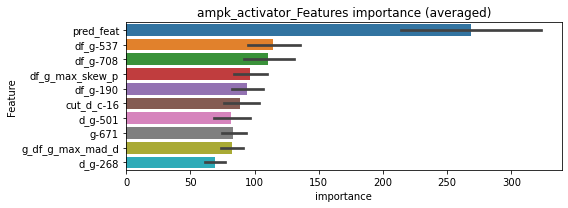

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000230221	valid_1's binary_logloss: 0.00109596
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000210149	valid_1's binary_logloss: 0.00106515
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000168416	valid_1's binary_logloss: 0.000140187
Early stopping, best iteration is:
[1883]	training's binary_logloss: 0.000145441	valid_1's binary_logloss: 0.000113309


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000167559	valid_1's binary_logloss: 0.00113604


ampk_activator logloss: 0.0008489267613621571


Early stopping, best iteration is:
[1510]	training's binary_logloss: 0.000148586	valid_1's binary_logloss: 0.0011177
neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00084309	valid_1's binary_logloss: 0.00164565
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000302054	valid_1's binary_logloss: 0.000711555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824569	valid_1's binary_logloss: 0.00258585
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000306538	valid_1's binary_logloss: 0.00133153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085045	valid_1's binary_logloss: 0.00107485
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000309958	valid_1's binary_logloss: 0.000430513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000850233	valid_1's binary_logloss: 0.00209402


1 / 3 AUC score:1.000
y_Threshold: 0.0013267, Threshold: 0.0167709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01174, conf_1:0.02180
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0167709
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.0667709
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1167709


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000318721	valid_1's binary_logloss: 0.000928395


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1667709
threshold: 0.1667709, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000441714	valid_1's binary_logloss: 0.00100746
[600]	training's binary_logloss: 0.0001627	valid_1's binary_logloss: 0.000640086
[900]	training's binary_logloss: 0.000141165	valid_1's binary_logloss: 0.00062037
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000141165	valid_1's binary_logloss: 0.00062037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000430559	valid_1's binary_logloss: 0.000887399
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000195698	valid_1's binary_logloss: 0.000547353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000436081	valid_1's binary_logloss: 0.000413151
[600]	training's binary_logloss: 0.000160156	valid_1's binary_logloss: 0.000136228
[900]	training's binary_logloss: 0.000138373	valid_1's binary_logloss: 0.000111567
Early

2 / 3 AUC score:1.000
y_Threshold: 0.4210899, Threshold: 0.1667709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0612757 Vs.target_rate: 0.00050
Num_p_label: 244.0, conf_0:0.13342, conf_1:0.20013
Num_p_label: 244.0, Expected: 2.0, Adj_threshold_1: 0.1667709
Num_p_label: 214.0, Expected: 2.0, Adj_threshold_2: 0.2167709
Num_p_label: 177.0, Expected: 2.0, Adj_threshold_3: 0.2667709
Num_p_label: 142.0, Expected: 2.0, Adj_threshold_4: 0.3167709
Num_p_label: 110.0, Expected: 2.0, Adj_threshold_5: 0.3667709
Num_p_label: 89.0, Expected: 2.0, Adj_threshold_6: 0.4167709
Num_p_label: 71.0, Expected: 2.0, Adj_threshold_7: 0.4667709
Num_p_label: 55.0, Expected: 2.0, Adj_threshold_8: 0.5167709


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000185547	valid_1's binary_logloss: 0.0017859


Num_p_label: 50.0, Expected: 2.0, Adj_threshold_9: 0.5667709
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_10: 0.6167709
threshold: 0.6667709, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000444546	valid_1's binary_logloss: 0.000888239
[600]	training's binary_logloss: 0.000163303	valid_1's binary_logloss: 0.000555807
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00016118	valid_1's binary_logloss: 0.000554714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00042723	valid_1's binary_logloss: 0.000842086
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000194833	valid_1's binary_logloss: 0.000563049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004369	valid_1's binary_logloss: 0.000411783
[600]	training's binary_logloss: 0.000163579	valid_1's binary_logloss: 0.000135409
[900]	training's binary_logloss: 0.000140042	valid_1's binary_logloss: 0.000108978
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000138701	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.3944531, Threshold: 0.6667709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00050
Num_p_label: 23.0, conf_0:0.50000, conf_1:0.73345
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.6667709
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.7167709
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.7667709
threshold: 0.7667709, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000222143	valid_1's binary_logloss: 0.001666


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


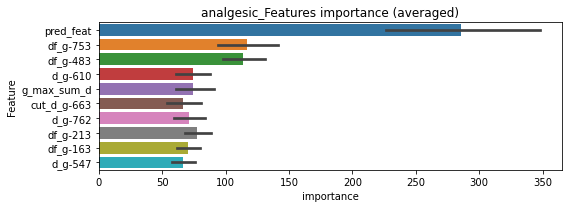

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000174657	valid_1's binary_logloss: 0.000353007


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[1617]	training's binary_logloss: 0.000151724	valid_1's binary_logloss: 0.000328989
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000176241	valid_1's binary_logloss: 0.000368403
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172187	valid_1's binary_logloss: 0.000156899
[2000]	training's binary_logloss: 0.00014474	valid_1's binary_logloss: 0.000122946
Early stopping, best iteration is:
[2120]	training's binary_logloss: 0.000143423	valid_1's binary_logloss: 0.000121314


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0006730731319025212


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000250182	valid_1's binary_logloss: 0.00187003
neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418606	valid_1's binary_logloss: 0.0259018
[600]	training's binary_logloss: 0.000781615	valid_1's binary_logloss: 0.0158473
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000637477	valid_1's binary_logloss: 0.0151664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429918	valid_1's binary_logloss: 0.0223048
[600]	training's binary_logloss: 0.000788926	valid_1's binary_logloss: 0.0139997
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000622425	valid_1's binary_logloss: 0.0135255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451155	valid_1's binary_logloss: 0.00829514
[600]	training's binary_logloss: 0.000819672	valid_1's binary_logloss: 0.00245704
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000607915	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0049456, Threshold: 0.0107086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00750, conf_1:0.01392
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0107086
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_2: 0.0607086
threshold: 0.0607086, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104438	valid_1's binary_logloss: 0.00531779
[600]	training's binary_logloss: 0.000221663	valid_1's binary_logloss: 0.00408599
[900]	training's binary_logloss: 0.000168308	valid_1's binary_logloss: 0.00401358
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000170476	valid_1's binary_logloss: 0.00400476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010469	valid_1's binary_logloss: 0.00224303
[600]	training's binary_logloss: 0.000222268	valid_1's binary_logloss: 0.00119547
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000215408	valid_1's binary_logloss: 0.00117817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104151	valid_1's binary_logloss: 0.0036174
[600]	training's binary_logloss: 0.000221138	valid_1's binary_logloss: 0.0024508
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.5169994, Threshold: 0.0607086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0389252 Vs.target_rate: 0.00202
Num_p_label: 155.0, conf_0:0.04857, conf_1:0.07285
Num_p_label: 155.0, Expected: 8.0, Adj_threshold_1: 0.0607086


Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000180389	valid_1's binary_logloss: 0.00139297


Num_p_label: 155.0, Expected: 8.0, Adj_threshold_2: 0.1107086
Num_p_label: 152.0, Expected: 8.0, Adj_threshold_3: 0.1607086
Num_p_label: 152.0, Expected: 8.0, Adj_threshold_4: 0.2107086
Num_p_label: 152.0, Expected: 8.0, Adj_threshold_5: 0.2607086
Num_p_label: 151.0, Expected: 8.0, Adj_threshold_6: 0.3107086
Num_p_label: 145.0, Expected: 8.0, Adj_threshold_7: 0.3607086
Num_p_label: 142.0, Expected: 8.0, Adj_threshold_8: 0.4107086
Num_p_label: 137.0, Expected: 8.0, Adj_threshold_9: 0.4607086
Num_p_label: 126.0, Expected: 8.0, Adj_threshold_10: 0.5107086
threshold: 0.5607086, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105409	valid_1's binary_logloss: 0.00591338
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000531015	valid_1's binary_logloss: 0.00524925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101979	valid_1's binary_logloss: 0.00490652
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000589484	valid_1's binary_logloss: 0.00415005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001067	valid_1's binary_logloss: 0.00344578
[600]	training's binary_logloss: 0.000228888	valid_1's binary_logloss: 0.00225151
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00019612	valid_1's binary_logloss: 0.00221154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105274	valid_1's binary_logloss: 0.0020184
[60

3 / 3 AUC score:1.000
y_Threshold: 0.4434011, Threshold: 0.5607086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0032647 Vs.target_rate: 0.00202
Num_p_label: 13.0, conf_0:0.50000, conf_1:0.61678
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_1: 0.5607086


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00018299	valid_1's binary_logloss: 0.000719377


threshold: 0.5607086, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000286534	valid_1's binary_logloss: 0.00160147
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000421701	valid_1's binary_logloss: 0.00309781
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214759	valid_1's binary_logloss: 0.000820994
[2000]	training's binary_logloss: 0.000173233	valid_1's binary_logloss: 0.00075754
Early stopping, best iteration is:
[2158]	training's binary_logloss: 0.000170599	valid_1's binary_logloss: 0.000754172


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.002081287611988372


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000457743	valid_1's binary_logloss: 0.00286088
neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00963665	valid_1's binary_logloss: 0.0685308
[600]	training's binary_logloss: 0.0015232	valid_1's binary_logloss: 0.0566913
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00127023	valid_1's binary_logloss: 0.0563088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941843	valid_1's binary_logloss: 0.0555131
[600]	training's binary_logloss: 0.00150879	valid_1's binary_logloss: 0.037128
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00109253	valid_1's binary_logloss: 0.035688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0096188	valid_1's binary_logloss: 0.0463045
[600]	training's binary_logloss: 0.00152709	valid_1's binary_logloss: 0.0327623
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00108548	valid_1's binary_logloss: 0.0322

1 / 3 AUC score:0.999
y_Threshold: 0.0109303, Threshold: 0.0385265, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02697, conf_1:0.05008
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0385265
Num_p_label: 7.0, Expected: 14.9, Adj_threshold_2: 0.0885265
threshold: 0.0885265, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135792	valid_1's binary_logloss: 0.00585911
[600]	training's binary_logloss: 0.000240572	valid_1's binary_logloss: 0.00376928
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000172414	valid_1's binary_logloss: 0.00363964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136954	valid_1's binary_logloss: 0.0031751
[600]	training's binary_logloss: 0.000244844	valid_1's binary_logloss: 0.000826121
[900]	training's binary_logloss: 0.000171039	valid_1's binary_logloss: 0.000605921
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000160782	valid_1's binary_logloss: 0.000577769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140123	valid_1's binary_logloss: 0.00704054
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000309946	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1495455, Threshold: 0.0885265, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3780
p_label_rate: 0.0595178 Vs.target_rate: 0.00374
Num_p_label: 237.0, conf_0:0.07082, conf_1:0.10623
Num_p_label: 237.0, Expected: 14.9, Adj_threshold_1: 0.0885265
Num_p_label: 171.0, Expected: 14.9, Adj_threshold_2: 0.1385265
Num_p_label: 131.0, Expected: 14.9, Adj_threshold_3: 0.1885265
Num_p_label: 118.0, Expected: 14.9, Adj_threshold_4: 0.2385265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_5: 0.2885265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_6: 0.3385265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_7: 0.3885265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_8: 0.4385265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_9: 0.4885265
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_10: 0.5385265
threshold: 0.5885265, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 646.0/3780, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118888	valid_1's binary_logloss: 0.005406
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000491687	valid_1's binary_logloss: 0.00478461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116894	valid_1's binary_logloss: 0.0102884
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000441663	valid_1's binary_logloss: 0.0097909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132318	valid_1's binary_logloss: 0.00269593
[600]	training's binary_logloss: 0.000228378	valid_1's binary_logloss: 0.000440153
[900]	training's binary_logloss: 0.000160077	valid_1's binary_logloss: 0.000263877
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000151724	valid_1's binary_logloss: 0.000241383
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.2012730, Threshold: 0.5885265, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000148359	valid_1's binary_logloss: 0.000298372


Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0261175 Vs.target_rate: 0.00374
Num_p_label: 104.0, conf_0:0.50000, conf_1:0.64738
Num_p_label: 104.0, Expected: 14.9, Adj_threshold_1: 0.5885265
Num_p_label: 104.0, Expected: 14.9, Adj_threshold_2: 0.6385265
Num_p_label: 104.0, Expected: 14.9, Adj_threshold_3: 0.6885265
Num_p_label: 104.0, Expected: 14.9, Adj_threshold_4: 0.7385265
Num_p_label: 101.0, Expected: 14.9, Adj_threshold_5: 0.7885265
threshold: 0.7885265, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 645.0/3778, y_label_rate: 0.1707253


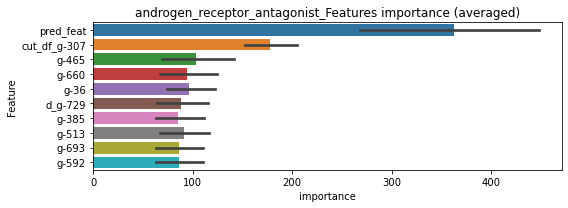

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195708	valid_1's binary_logloss: 0.00217497
[2000]	training's binary_logloss: 0.000152003	valid_1's binary_logloss: 0.00206707
Early stopping, best iteration is:
[2208]	training's binary_logloss: 0.000148759	valid_1's binary_logloss: 0.00205445


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149549	valid_1's binary_logloss: 0.000391432
[2000]	training's binary_logloss: 0.000111021	valid_1's binary_logloss: 0.000291512
[3000]	training's binary_logloss: 0.000103246	valid_1's binary_logloss: 0.000270929


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[3401]	training's binary_logloss: 0.00010209	valid_1's binary_logloss: 0.000267813
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149666	valid_1's binary_logloss: 0.000302698
[2000]	training's binary_logloss: 0.000111062	valid_1's binary_logloss: 0.000225092
[3000]	training's binary_logloss: 0.000103248	valid_1's binary_logloss: 0.000209166


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[3185]	training's binary_logloss: 0.000102529	valid_1's binary_logloss: 0.000207607
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149451	valid_1's binary_logloss: 0.000339225
[2000]	training's binary_logloss: 0.000111031	valid_1's binary_logloss: 0.000252761
[3000]	training's binary_logloss: 0.000103239	valid_1's binary_logloss: 0.000234942


androgen_receptor_antagonist logloss: 0.0006907486196294541


Early stopping, best iteration is:
[3427]	training's binary_logloss: 0.000101952	valid_1's binary_logloss: 0.000231881
neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00691005	valid_1's binary_logloss: 0.0539109
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00153925	valid_1's binary_logloss: 0.0442029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638416	valid_1's binary_logloss: 0.0527834
[600]	training's binary_logloss: 0.0011894	valid_1's binary_logloss: 0.0437618
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00113137	valid_1's binary_logloss: 0.043519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071484	valid_1's binary_logloss: 0.038461
[600]	training's binary_logloss: 0.0012517	valid_1's binary_logloss: 0.0279219
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000845583	valid_1's binary_logloss: 0.0264702
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.996
y_Threshold: 0.0083161, Threshold: 0.0167045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.01169, conf_1:0.02172
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0167045
Num_p_label: 0.0, Expected: 13.4, Adj_threshold_2: 0.0667045
threshold: 0.0667045, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123741	valid_1's binary_logloss: 0.00513166
[600]	training's binary_logloss: 0.000239078	valid_1's binary_logloss: 0.00328473
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000201932	valid_1's binary_logloss: 0.00321297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128284	valid_1's binary_logloss: 0.00491873
[600]	training's binary_logloss: 0.000240982	valid_1's binary_logloss: 0.00345006
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000210407	valid_1's binary_logloss: 0.00336734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128694	valid_1's binary_logloss: 0.00364004
[600]	training's binary_logloss: 0.000248127	valid_1's binary_logloss: 0.00188386
[900]	training's binary_logloss: 0.000179974	valid_1's binary_logloss: 0.00177355
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.2535776, Threshold: 0.0667045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3783


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000191564	valid_1's binary_logloss: 0.00132524


p_label_rate: 0.0529884 Vs.target_rate: 0.00336
Num_p_label: 211.0, conf_0:0.05336, conf_1:0.08005
Num_p_label: 211.0, Expected: 13.4, Adj_threshold_1: 0.0667045
Num_p_label: 205.0, Expected: 13.4, Adj_threshold_2: 0.1167045
Num_p_label: 183.0, Expected: 13.4, Adj_threshold_3: 0.1667045
Num_p_label: 115.0, Expected: 13.4, Adj_threshold_4: 0.2167045
Num_p_label: 65.0, Expected: 13.4, Adj_threshold_5: 0.2667045
Num_p_label: 34.0, Expected: 13.4, Adj_threshold_6: 0.3167045
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_7: 0.3667045
threshold: 0.3667045, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118393	valid_1's binary_logloss: 0.00279916
[600]	training's binary_logloss: 0.000232912	valid_1's binary_logloss: 0.000775534
[900]	training's binary_logloss: 0.000170924	valid_1's binary_logloss: 0.000596767
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000165815	valid_1's binary_logloss: 0.000582155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119703	valid_1's binary_logloss: 0.00541232
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000255143	valid_1's binary_logloss: 0.00401586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121229	valid_1's binary_logloss: 0.00286867
[600]	training's binary_logloss: 0.000232087	valid_1's binary_logloss: 0.000854953
[900]	training's binary_logloss: 0.000167128	valid_1's binary_logloss: 0.000697278
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.1564137, Threshold: 0.3667045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0017579 Vs.target_rate: 0.00336
Num_p_label: 7.0, conf_0:0.33003, conf_1:0.40337
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_1: 0.3667045
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_2: 0.3467045
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_3: 0.3267045
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_4: 0.3067045
Num_p_label: 7.0, Expected: 13.4, Adj_threshold_5: 0.2867045
Num_p_label: 8.0, Expected: 13.4, Adj_threshold_6: 0.2667045
Num_p_label: 8.0, Expected: 13.4, Adj_threshold_7: 0.2467045
Num_p_label: 10.0, Expected: 13.4, Adj_threshold_8: 0.2267045
threshold: 0.2267045, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 648.0/3783, y_label_rate: 0.1712926


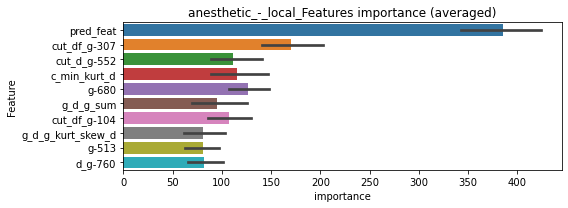

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210692	valid_1's binary_logloss: 0.000753997
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.0001737	valid_1's binary_logloss: 0.000647614


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000590464	valid_1's binary_logloss: 0.00809717
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210693	valid_1's binary_logloss: 0.000647204
[2000]	training's binary_logloss: 0.000165981	valid_1's binary_logloss: 0.000537524
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.000165746	valid_1's binary_logloss: 0.000537121


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209532	valid_1's binary_logloss: 0.000452195
Early stopping, best iteration is:
[1956]	training's binary_logloss: 0.000166921	valid_1's binary_logloss: 0.000361061


anesthetic_-_local logloss: 0.0024113365731316225


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228374	valid_1's binary_logloss: 0.0181493
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000772283	valid_1's binary_logloss: 0.0154075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244336	valid_1's binary_logloss: 0.0142257
[600]	training's binary_logloss: 0.000549333	valid_1's binary_logloss: 0.00943071
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000501983	valid_1's binary_logloss: 0.00924329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246141	valid_1's binary_logloss: 0.0105335
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000799681	valid_1's binary_logloss: 0.00829531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241698	valid_1's binary_logloss: 0.0101567
[600

1 / 3 AUC score:1.000
y_Threshold: 0.0041005, Threshold: 0.0143116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01002, conf_1:0.01861
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0143116
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0643116
threshold: 0.0643116, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787274	valid_1's binary_logloss: 0.00703318
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000333476	valid_1's binary_logloss: 0.00638522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000822479	valid_1's binary_logloss: 0.00322183
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000446829	valid_1's binary_logloss: 0.0027876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838691	valid_1's binary_logloss: 0.0017607
[600]	training's binary_logloss: 0.000210353	valid_1's binary_logloss: 0.00101331
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000208396	valid_1's binary_logloss: 0.000999387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800685	valid_1's binary_logloss: 0.00199

2 / 3 AUC score:1.000
y_Threshold: 0.5541878, Threshold: 0.0643116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0560020 Vs.target_rate: 0.00151
Num_p_label: 223.0, conf_0:0.05145, conf_1:0.07717
Num_p_label: 223.0, Expected: 6.0, Adj_threshold_1: 0.0643116
Num_p_label: 219.0, Expected: 6.0, Adj_threshold_2: 0.1143116
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_3: 0.1643116


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000169935	valid_1's binary_logloss: 0.00109044


Num_p_label: 214.0, Expected: 6.0, Adj_threshold_4: 0.2143116
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_5: 0.2643116
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_6: 0.3143116
Num_p_label: 213.0, Expected: 6.0, Adj_threshold_7: 0.3643116
Num_p_label: 206.0, Expected: 6.0, Adj_threshold_8: 0.4143116
Num_p_label: 189.0, Expected: 6.0, Adj_threshold_9: 0.4643116
Num_p_label: 166.0, Expected: 6.0, Adj_threshold_10: 0.5143116
threshold: 0.5643116, positive_p_label: 131.0/3982, p_label_rate: 0.0328980
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802823	valid_1's binary_logloss: 0.00422324
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000222912	valid_1's binary_logloss: 0.00314727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813459	valid_1's binary_logloss: 0.00355677
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000348673	valid_1's binary_logloss: 0.00293539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000792523	valid_1's binary_logloss: 0.00121873
[600]	training's binary_logloss: 0.000207664	valid_1's binary_logloss: 0.000340028
[900]	training's binary_logloss: 0.00016515	valid_1's binary_logloss: 0.000270121
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000163184	valid_1's binary_logloss: 0.000264903
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.4904434, Threshold: 0.5643116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0193370 Vs.target_rate: 0.00151
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.62074
Num_p_label: 77.0, Expected: 6.0, Adj_threshold_1: 0.5643116
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_2: 0.6143116
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.6643116
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_4: 0.7143116
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_5: 0.7643116
threshold: 0.7643116, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213252	valid_1's binary_logloss: 0.000474061
Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.000194738	valid_1's binary_logloss: 0.000445886


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000629881	valid_1's binary_logloss: 0.00370159
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000458541	valid_1's binary_logloss: 0.0039786
Training until validation scores don't improve for 30 rounds


angiogenesis_inhibitor logloss: 0.002549234620697544


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000330125	valid_1's binary_logloss: 0.00207083
neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026887	valid_1's binary_logloss: 0.0117338
[600]	training's binary_logloss: 0.000581908	valid_1's binary_logloss: 0.00684198
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000492461	valid_1's binary_logloss: 0.00663327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265745	valid_1's binary_logloss: 0.0124405
[600]	training's binary_logloss: 0.000576601	valid_1's binary_logloss: 0.00622708
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000479025	valid_1's binary_logloss: 0.00580986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274565	valid_1's binary_logloss: 0.00798883
[600]	training's binary_logloss: 0.000598891	valid_1's binary_logloss: 0.0033585
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000524884	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0035450, Threshold: 0.0139238, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00975, conf_1:0.01810
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0139238
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_2: 0.0639238
threshold: 0.0639238, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085813	valid_1's binary_logloss: 0.00270639
[600]	training's binary_logloss: 0.000209193	valid_1's binary_logloss: 0.0019956
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000170126	valid_1's binary_logloss: 0.00194453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000823303	valid_1's binary_logloss: 0.00158129
[600]	training's binary_logloss: 0.000199975	valid_1's binary_logloss: 0.00056955
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000161137	valid_1's binary_logloss: 0.000490143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839119	valid_1's binary_logloss: 0.000940963
[600]	training's binary_logloss: 0.000204034	valid_1's binary_logloss: 0.000194812
[900]	training's binary_logloss: 0.000157367	valid_1's binary_logloss: 0.000136768
Early s

2 / 3 AUC score:1.000


[900]	training's binary_logloss: 0.000155629	valid_1's binary_logloss: 0.00175936
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000155629	valid_1's binary_logloss: 0.00175936


y_Threshold: 0.7554658, Threshold: 0.0639238, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0517328 Vs.target_rate: 0.00155
Num_p_label: 206.0, conf_0:0.05114, conf_1:0.07671
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_1: 0.0639238
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_2: 0.1139238
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_3: 0.1639238
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_4: 0.2139238
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_5: 0.2639238
Num_p_label: 205.0, Expected: 6.2, Adj_threshold_6: 0.3139238
Num_p_label: 204.0, Expected: 6.2, Adj_threshold_7: 0.3639238
Num_p_label: 204.0, Expected: 6.2, Adj_threshold_8: 0.4139238
Num_p_label: 204.0, Expected: 6.2, Adj_threshold_9: 0.4639238
Num_p_label: 199.0, Expected: 6.2, Adj_threshold_10: 0.5139238
threshold: 0.5639238, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838662	valid_1's binary_logloss: 0.0024105
[600]	training's binary_logloss: 0.000205394	valid_1's binary_logloss: 0.00165555
[900]	training's binary_logloss: 0.000162058	valid_1's binary_logloss: 0.00159936
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.00015744	valid_1's binary_logloss: 0.00158941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000832703	valid_1's binary_logloss: 0.00174446
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000222712	valid_1's binary_logloss: 0.000720423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000834805	valid_1's binary_logloss: 0.000949941
[600]	training's binary_logloss: 0.000200773	valid_1's binary_logloss: 0.000197632
[900]	training's binary_logloss: 0.000157474	valid_1's binary_logloss: 0.000139155
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.6872291, Threshold: 0.5639238, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0457057 Vs.target_rate: 0.00155
Num_p_label: 182.0, conf_0:0.50000, conf_1:0.62032
Num_p_label: 182.0, Expected: 6.2, Adj_threshold_1: 0.5639238
Num_p_label: 155.0, Expected: 6.2, Adj_threshold_2: 0.6139238
Num_p_label: 117.0, Expected: 6.2, Adj_threshold_3: 0.6639238
Num_p_label: 69.0, Expected: 6.2, Adj_threshold_4: 0.7139238
Num_p_label: 41.0, Expected: 6.2, Adj_threshold_5: 0.7639238
threshold: 0.7639238, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


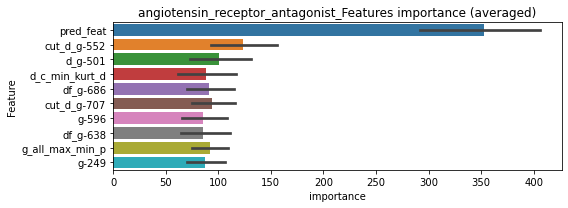

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000203568	valid_1's binary_logloss: 0.00229056


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000191672	valid_1's binary_logloss: 0.0022785


================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000241169	valid_1's binary_logloss: 0.00101499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000201338	valid_1's binary_logloss: 0.000198353
[2000]	training's binary_logloss: 0.000161552	valid_1's binary_logloss: 0.000146798
Early stopping, best iteration is:
[2004]	training's binary_logloss: 0.000161544	valid_1's binary_logloss: 0.000146788


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


angiotensin_receptor_antagonist logloss: 0.005317418718734483


Early stopping, best iteration is:
[160]	training's binary_logloss: 0.0010712	valid_1's binary_logloss: 0.0178307
neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742193	valid_1's binary_logloss: 0.0418371
[600]	training's binary_logloss: 0.00124892	valid_1's binary_logloss: 0.0309004
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.0011193	valid_1's binary_logloss: 0.0307273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737016	valid_1's binary_logloss: 0.0362381
[600]	training's binary_logloss: 0.00128538	valid_1's binary_logloss: 0.0212876
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000810069	valid_1's binary_logloss: 0.0198687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729592	valid_1's binary_logloss: 0.0514143
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00150067	valid_1's binary_logloss: 0.0409253
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.999
y_Threshold: 0.0102432, Threshold: 0.0740514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05184, conf_1:0.09627
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0740514
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.1240514
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.1740514
threshold: 0.1740514, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133168	valid_1's binary_logloss: 0.00708395
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000288947	valid_1's binary_logloss: 0.00502489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013437	valid_1's binary_logloss: 0.0071917
[600]	training's binary_logloss: 0.000246013	valid_1's binary_logloss: 0.00505325
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00019575	valid_1's binary_logloss: 0.00489856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013657	valid_1's binary_logloss: 0.00346074
[600]	training's binary_logloss: 0.000243765	valid_1's binary_logloss: 0.0017349
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00020771	valid_1's binary_logloss: 0.00164913
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.3317837, Threshold: 0.1740514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3787
p_label_rate: 0.0600201 Vs.target_rate: 0.00307
Num_p_label: 239.0, conf_0:0.13924, conf_1:0.20886
Num_p_label: 239.0, Expected: 12.2, Adj_threshold_1: 0.1740514
Num_p_label: 223.0, Expected: 12.2, Adj_threshold_2: 0.2240514
Num_p_label: 203.0, Expected: 12.2, Adj_threshold_3: 0.2740514
Num_p_label: 177.0, Expected: 12.2, Adj_threshold_4: 0.3240514
Num_p_label: 137.0, Expected: 12.2, Adj_threshold_5: 0.3740514
Num_p_label: 102.0, Expected: 12.2, Adj_threshold_6: 0.4240514
Num_p_label: 82.0, Expected: 12.2, Adj_threshold_7: 0.4740514
Num_p_label: 72.0, Expected: 12.2, Adj_threshold_8: 0.5240514
Num_p_label: 61.0, Expected: 12.2, Adj_threshold_9: 0.5740514
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_10: 0.6240514
threshold: 0.6740514, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 648.0/3787, y_label_rate: 0.17

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012821	valid_1's binary_logloss: 0.00248987
[600]	training's binary_logloss: 0.000233241	valid_1's binary_logloss: 0.000529812
[900]	training's binary_logloss: 0.00016612	valid_1's binary_logloss: 0.000373043
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000160984	valid_1's binary_logloss: 0.000359722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127498	valid_1's binary_logloss: 0.00597171
[600]	training's binary_logloss: 0.000235293	valid_1's binary_logloss: 0.00354191
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000175403	valid_1's binary_logloss: 0.00338407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132147	valid_1's binary_logloss: 0.00602878
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000290809	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1680989, Threshold: 0.6740514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0248619 Vs.target_rate: 0.00307


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000288861	valid_1's binary_logloss: 0.00141517


Num_p_label: 99.0, conf_0:0.50000, conf_1:0.74146
Num_p_label: 99.0, Expected: 12.2, Adj_threshold_1: 0.6740514
Num_p_label: 99.0, Expected: 12.2, Adj_threshold_2: 0.7240514
Num_p_label: 89.0, Expected: 12.2, Adj_threshold_3: 0.7740514
threshold: 0.7740514, positive_p_label: 89.0/3982, p_label_rate: 0.0223506
positive_y_label: 645.0/3781, y_label_rate: 0.1705898


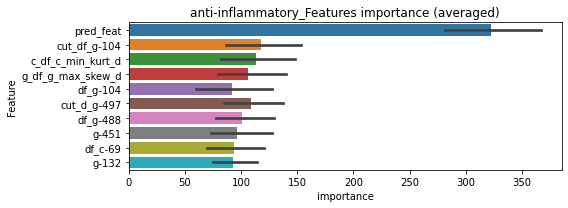

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 anti-inflammatory=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000207297	valid_1's binary_logloss: 0.00157829
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148723	valid_1's binary_logloss: 0.00042672
[2000]	training's binary_logloss: 0.000110921	valid_1's binary_logloss: 0.000319519
[3000]	training's binary_logloss: 0.00010315	valid_1's binary_logloss: 0.000297017


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[3162]	training's binary_logloss: 0.000102459	valid_1's binary_logloss: 0.000294821
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148814	valid_1's binary_logloss: 0.000325304
[2000]	training's binary_logloss: 0.000110867	valid_1's binary_logloss: 0.000242914
[3000]	training's binary_logloss: 0.000103069	valid_1's binary_logloss: 0.000225716
Early stopping, best iteration is:
[3487]	training's binary_logloss: 0.000101668	valid_1's binary_logloss: 0.000222511


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148685	valid_1's binary_logloss: 0.000278033
[2000]	training's binary_logloss: 0.000110837	valid_1's binary_logloss: 0.00020762
[3000]	training's binary_logloss: 0.000103099	valid_1's binary_logloss: 0.000193069
Early stopping, best iteration is:
[3122]	training's binary_logloss: 0.000102583	valid_1's binary_logloss: 0.000192061


anti-inflammatory logloss: 0.0005729432079356367


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184757	valid_1's binary_logloss: 0.00616367
[600]	training's binary_logloss: 0.000450004	valid_1's binary_logloss: 0.00284937
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000444137	valid_1's binary_logloss: 0.00282574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192436	valid_1's binary_logloss: 0.0066395
[600]	training's binary_logloss: 0.000457461	valid_1's binary_logloss: 0.00349986
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000441442	valid_1's binary_logloss: 0.00347739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189595	valid_1's binary_logloss: 0.00557878
[600]	training's binary_logloss: 0.000460307	valid_1's binary_logloss: 0.00291137
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00045815	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025551, Threshold: 0.0071713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00932
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0071713
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0571713
threshold: 0.0571713, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697834	valid_1's binary_logloss: 0.00205978
[600]	training's binary_logloss: 0.000194416	valid_1's binary_logloss: 0.0014766
[900]	training's binary_logloss: 0.000158826	valid_1's binary_logloss: 0.00142478
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00015897	valid_1's binary_logloss: 0.00142457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000709267	valid_1's binary_logloss: 0.00272846
[600]	training's binary_logloss: 0.000191739	valid_1's binary_logloss: 0.00199164
[900]	training's binary_logloss: 0.000157873	valid_1's binary_logloss: 0.00194482
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.00015763	valid_1's binary_logloss: 0.0019435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000725012	valid_1's binary_logloss: 0.0019777
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.4872792, Threshold: 0.0571713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0509794 Vs.target_rate: 0.00101
Num_p_label: 203.0, conf_0:0.04574, conf_1:0.06861
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_1: 0.0571713
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_2: 0.1071713
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_3: 0.1571713
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_4: 0.2071713


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000217332	valid_1's binary_logloss: 0.000956979


Num_p_label: 203.0, Expected: 4.0, Adj_threshold_5: 0.2571713
Num_p_label: 198.0, Expected: 4.0, Adj_threshold_6: 0.3071713
Num_p_label: 185.0, Expected: 4.0, Adj_threshold_7: 0.3571713
Num_p_label: 149.0, Expected: 4.0, Adj_threshold_8: 0.4071713
Num_p_label: 110.0, Expected: 4.0, Adj_threshold_9: 0.4571713
Num_p_label: 77.0, Expected: 4.0, Adj_threshold_10: 0.5071713
threshold: 0.5571713, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068596	valid_1's binary_logloss: 0.00167225
[600]	training's binary_logloss: 0.000198447	valid_1's binary_logloss: 0.00101301
[900]	training's binary_logloss: 0.000161471	valid_1's binary_logloss: 0.000949742
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000160081	valid_1's binary_logloss: 0.000947845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000717992	valid_1's binary_logloss: 0.00107082
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00021011	valid_1's binary_logloss: 0.000422199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713324	valid_1's binary_logloss: 0.00137802
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000214745	valid_1's binary_logloss: 0.00066945
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.5450497, Threshold: 0.5571713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.61289
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.5571713
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.6071713
threshold: 0.6071713, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000331563	valid_1's binary_logloss: 0.00244249


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


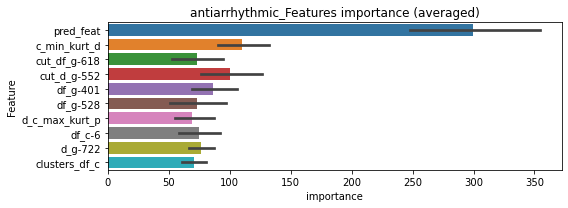

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000199619	valid_1's binary_logloss: 0.000766861
[2000]	training's binary_logloss: 0.000165917	valid_1's binary_logloss: 0.000703253
Early stopping, best iteration is:
[2158]	training's binary_logloss: 0.000163985	valid_1's binary_logloss: 0.000698458


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiarrhythmic=================================


Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000207594	valid_1's binary_logloss: 0.00047624
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00027203	valid_1's binary_logloss: 0.000951654
Training until validation scores don't improve for 30 rounds


antiarrhythmic logloss: 0.002621946113912059


Early stopping, best iteration is:
[155]	training's binary_logloss: 0.00105534	valid_1's binary_logloss: 0.00835679
neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281
target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363832	valid_1's binary_logloss: 0.0201973
[600]	training's binary_logloss: 0.000700208	valid_1's binary_logloss: 0.0120618
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000590641	valid_1's binary_logloss: 0.0115723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364577	valid_1's binary_logloss: 0.0165642
[600]	training's binary_logloss: 0.000699585	valid_1's binary_logloss: 0.0100831
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000582289	valid_1's binary_logloss: 0.00973829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380272	valid_1's binary_logloss: 0.00864281
[600]	training's binary_logloss: 0.000722615	valid_1's binary_logloss: 0.0028821
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000575519	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0055030, Threshold: 0.0383623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, conf_0:0.02685, conf_1:0.04987
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0383623
Num_p_label: 15.0, Expected: 7.2, Adj_threshold_2: 0.0883623
threshold: 0.0883623, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946098	valid_1's binary_logloss: 0.00390328
[600]	training's binary_logloss: 0.000211644	valid_1's binary_logloss: 0.00257524
[900]	training's binary_logloss: 0.000165119	valid_1's binary_logloss: 0.00250026
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000162982	valid_1's binary_logloss: 0.00249204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000926732	valid_1's binary_logloss: 0.00192671
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000246196	valid_1's binary_logloss: 0.000984524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0009512	valid_1's binary_logloss: 0.00375753
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000506536	valid_1's binary_logloss: 0.00314406
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.7103928, Threshold: 0.0883623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0665495 Vs.target_rate: 0.00181
Num_p_label: 265.0, conf_0:0.07069, conf_1:0.10603
Num_p_label: 265.0, Expected: 7.2, Adj_threshold_1: 0.0883623
Num_p_label: 264.0, Expected: 7.2, Adj_threshold_2: 0.1383623
Num_p_label: 262.0, Expected: 7.2, Adj_threshold_3: 0.1883623
Num_p_label: 262.0, Expected: 7.2, Adj_threshold_4: 0.2383623
Num_p_label: 262.0, Expected: 7.2, Adj_threshold_5: 0.2883623
Num_p_label: 262.0, Expected: 7.2, Adj_threshold_6: 0.3383623
Num_p_label: 259.0, Expected: 7.2, Adj_threshold_7: 0.3883623
Num_p_label: 256.0, Expected: 7.2, Adj_threshold_8: 0.4383623
Num_p_label: 247.0, Expected: 7.2, Adj_threshold_9: 0.4883623
Num_p_label: 229.0, Expected: 7.2, Adj_threshold_10: 0.5383623
threshold: 0.5883623, positive_p_label: 202.0/3982, p_label_rate: 0.0507283
positive_y_label: 653.0/3799, y_label_rate: 0.1718873

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000985922	valid_1's binary_logloss: 0.00313902
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000258741	valid_1's binary_logloss: 0.00187429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000977487	valid_1's binary_logloss: 0.00160428
[600]	training's binary_logloss: 0.000221759	valid_1's binary_logloss: 0.000581236
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000179577	valid_1's binary_logloss: 0.000489355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000933609	valid_1's binary_logloss: 0.00372534
[600]	training's binary_logloss: 0.000214339	valid_1's binary_logloss: 0.00268529
[900]	training's binary_logloss: 0.000165338	valid_1's binary_logloss: 0.00260798
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000166158	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.4967633, Threshold: 0.5883623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0085384 Vs.target_rate: 0.00181
Num_p_label: 34.0, conf_0:0.50000, conf_1:0.64720
Num_p_label: 34.0, Expected: 7.2, Adj_threshold_1: 0.5883623
Num_p_label: 25.0, Expected: 7.2, Adj_threshold_2: 0.6383623
Num_p_label: 15.0, Expected: 7.2, Adj_threshold_3: 0.6883623
threshold: 0.6883623, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


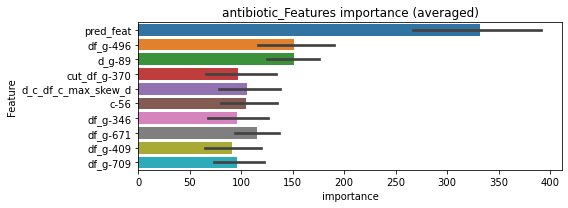

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00053676	valid_1's binary_logloss: 0.00509138
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 antibiotic=================================


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000265263	valid_1's binary_logloss: 0.000618828
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 antibiotic=================================


Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000250632	valid_1's binary_logloss: 0.0034874
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210838	valid_1's binary_logloss: 0.000314432
[2000]	training's binary_logloss: 0.000171787	valid_1's binary_logloss: 0.000257444
Early stopping, best iteration is:
[2027]	training's binary_logloss: 0.000171458	valid_1's binary_logloss: 0.000256732


antibiotic logloss: 0.0023652215587920203


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112034	valid_1's binary_logloss: 0.00330197
[600]	training's binary_logloss: 0.000340633	valid_1's binary_logloss: 0.00161604
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000341175	valid_1's binary_logloss: 0.00161448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011041	valid_1's binary_logloss: 0.00513334
[600]	training's binary_logloss: 0.000326994	valid_1's binary_logloss: 0.00326585
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000335349	valid_1's binary_logloss: 0.00326485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110733	valid_1's binary_logloss: 0.00522656
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000578292	valid_1's binary_logloss: 0.00438797
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0019046, Threshold: 0.0058909, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00412, conf_1:0.00766
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0058909
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0558909
threshold: 0.0558909, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000547776	valid_1's binary_logloss: 0.00161789
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000270449	valid_1's binary_logloss: 0.00123466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000518378	valid_1's binary_logloss: 0.00160101
[600]	training's binary_logloss: 0.000169591	valid_1's binary_logloss: 0.00122375
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000146128	valid_1's binary_logloss: 0.00119421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526349	valid_1's binary_logloss: 0.0010208
[600]	training's binary_logloss: 0.000172856	valid_1's binary_logloss: 0.000541893
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000166798	valid_1's binary_logloss: 0.000528923
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.4878361, Threshold: 0.0558909, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0477147 Vs.target_rate: 0.00076
Num_p_label: 190.0, conf_0:0.04471, conf_1:0.06707
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_1: 0.0558909
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_2: 0.1058909
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_3: 0.1558909
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_4: 0.2058909
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_5: 0.2558909
Num_p_label: 188.0, Expected: 3.0, Adj_threshold_6: 0.3058909
Num_p_label: 180.0, Expected: 3.0, Adj_threshold_7: 0.3558909
Num_p_label: 165.0, Expected: 3.0, Adj_threshold_8: 0.4058909
Num_p_label: 134.0, Expected: 3.0, Adj_threshold_9: 0.4558909


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000293958	valid_1's binary_logloss: 0.000701445


Num_p_label: 94.0, Expected: 3.0, Adj_threshold_10: 0.5058909
threshold: 0.5558909, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000553014	valid_1's binary_logloss: 0.00286736
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00026804	valid_1's binary_logloss: 0.00257748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000516395	valid_1's binary_logloss: 0.00160501
[600]	training's binary_logloss: 0.000169269	valid_1's binary_logloss: 0.00120751
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00014555	valid_1's binary_logloss: 0.00117862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000524113	valid_1's binary_logloss: 0.00103684
[600]	training's binary_logloss: 0.000174041	valid_1's binary_logloss: 0.00056928
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000156293	valid_1's binary_logloss: 0.000536369
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.6444982, Threshold: 0.5558909, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0173280 Vs.target_rate: 0.00076
Num_p_label: 69.0, conf_0:0.50000, conf_1:0.61148
Num_p_label: 69.0, Expected: 3.0, Adj_threshold_1: 0.5558909
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.6058909
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.6558909
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.7058909
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.7558909
threshold: 0.7558909, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000312084	valid_1's binary_logloss: 0.000813601


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


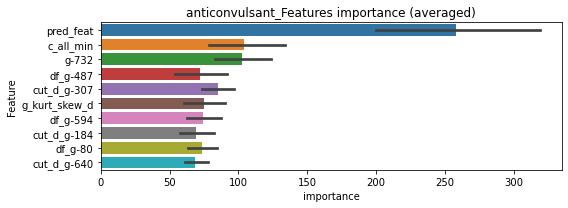

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000292683	valid_1's binary_logloss: 0.00183731
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000187919	valid_1's binary_logloss: 0.000639949
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000181542	valid_1's binary_logloss: 0.000814693
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000180578	valid_1's binary_logloss: 0.00081097


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


anticonvulsant logloss: 0.0009592899780121538


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000325454	valid_1's binary_logloss: 0.000540331
neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160291	valid_1's binary_logloss: 0.00509103
[600]	training's binary_logloss: 0.000409233	valid_1's binary_logloss: 0.00226927
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000395755	valid_1's binary_logloss: 0.0022429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152023	valid_1's binary_logloss: 0.00717805
[600]	training's binary_logloss: 0.000410088	valid_1's binary_logloss: 0.00514702
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00040904	valid_1's binary_logloss: 0.00513066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156119	valid_1's binary_logloss: 0.00298873
[600]	training's binary_logloss: 0.00040887	valid_1's binary_logloss: 0.00111804
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000394503	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022491, Threshold: 0.0074106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00519, conf_1:0.00963
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0074106
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_2: 0.0574106
threshold: 0.0574106, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638341	valid_1's binary_logloss: 0.000988977
[600]	training's binary_logloss: 0.000189082	valid_1's binary_logloss: 0.000413872
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000195054	valid_1's binary_logloss: 0.000411871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633273	valid_1's binary_logloss: 0.00159308
[600]	training's binary_logloss: 0.000182116	valid_1's binary_logloss: 0.000944584
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000185564	valid_1's binary_logloss: 0.000938563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000635222	valid_1's binary_logloss: 0.0026493
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000373568	valid_1's binary_logloss: 0.00215238
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.5388386, Threshold: 0.0574106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0580110 Vs.target_rate: 0.00109
Num_p_label: 231.0, conf_0:0.04593, conf_1:0.06889
Num_p_label: 231.0, Expected: 4.3, Adj_threshold_1: 0.0574106
Num_p_label: 230.0, Expected: 4.3, Adj_threshold_2: 0.1074106
Num_p_label: 229.0, Expected: 4.3, Adj_threshold_3: 0.1574106
Num_p_label: 229.0, Expected: 4.3, Adj_threshold_4: 0.2074106
Num_p_label: 229.0, Expected: 4.3, Adj_threshold_5: 0.2574106
Num_p_label: 227.0, Expected: 4.3, Adj_threshold_6: 0.3074106


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000161188	valid_1's binary_logloss: 0.00168509


Num_p_label: 216.0, Expected: 4.3, Adj_threshold_7: 0.3574106
Num_p_label: 189.0, Expected: 4.3, Adj_threshold_8: 0.4074106
Num_p_label: 139.0, Expected: 4.3, Adj_threshold_9: 0.4574106
Num_p_label: 92.0, Expected: 4.3, Adj_threshold_10: 0.5074106
threshold: 0.5574106, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647876	valid_1's binary_logloss: 0.00105513
[600]	training's binary_logloss: 0.000187953	valid_1's binary_logloss: 0.000423937
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000168425	valid_1's binary_logloss: 0.000390184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000632412	valid_1's binary_logloss: 0.00161474
[600]	training's binary_logloss: 0.000181592	valid_1's binary_logloss: 0.000947981
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000184985	valid_1's binary_logloss: 0.000942962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633516	valid_1's binary_logloss: 0.00278689
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000368871	valid_1's binary_logloss: 0.00258061
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.5790714, Threshold: 0.5574106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0160723 Vs.target_rate: 0.00109
Num_p_label: 64.0, conf_0:0.50000, conf_1:0.61315
Num_p_label: 64.0, Expected: 4.3, Adj_threshold_1: 0.5574106
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_2: 0.6074106
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_3: 0.6574106
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.7074106
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_5: 0.7574106
threshold: 0.7574106, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


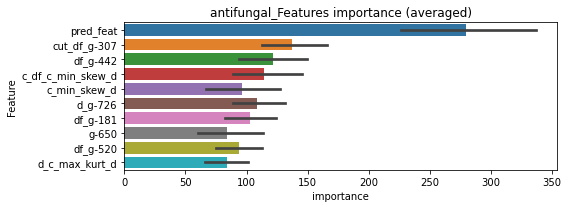

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000200272	valid_1's binary_logloss: 0.000629747
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187846	valid_1's binary_logloss: 0.000601113
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000185176	valid_1's binary_logloss: 0.000598744


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Early stopping, best iteration is:
[78]	training's binary_logloss: 0.0040215	valid_1's binary_logloss: 0.0186284
Training until validation scores don't improve for 30 rounds


antifungal logloss: 0.005485068245731794


Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000195368	valid_1's binary_logloss: 0.00207542
neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130434	valid_1's binary_logloss: 0.00308656
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000386947	valid_1's binary_logloss: 0.00140318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123612	valid_1's binary_logloss: 0.0055136
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000402506	valid_1's binary_logloss: 0.00325585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128656	valid_1's binary_logloss: 0.00365949
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0003812	valid_1's binary_logloss: 0.00163718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124031	valid_1's binary_logloss: 0.00480484
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000381603	vali

1 / 3 AUC score:1.000
y_Threshold: 0.0022892, Threshold: 0.0731850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.05123, conf_1:0.09514
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0731850
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_2: 0.1231850
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_3: 0.1731850
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_4: 0.2231850
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_5: 0.2731850
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.3231850
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_7: 0.3731850
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.4231850
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.4731850
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.5231850
threshold: 0.5731850, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000560927	valid_1's binary_logloss: 0.000855918
[600]	training's binary_logloss: 0.000182163	valid_1's binary_logloss: 0.000381718
[900]	training's binary_logloss: 0.0001566	valid_1's binary_logloss: 0.000350535
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000156033	valid_1's binary_logloss: 0.000348089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000552786	valid_1's binary_logloss: 0.00124909
[600]	training's binary_logloss: 0.000177692	valid_1's binary_logloss: 0.00080061
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000176733	valid_1's binary_logloss: 0.000793299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543356	valid_1's binary_logloss: 0.00186468
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000210705	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.5288130, Threshold: 0.5731850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0356605 Vs.target_rate: 0.00076
Num_p_label: 142.0, conf_0:0.45855, conf_1:0.68782
Num_p_label: 142.0, Expected: 3.0, Adj_threshold_1: 0.5731850
Num_p_label: 130.0, Expected: 3.0, Adj_threshold_2: 0.6231850
Num_p_label: 116.0, Expected: 3.0, Adj_threshold_3: 0.6731850


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000154058	valid_1's binary_logloss: 0.000314702


Num_p_label: 100.0, Expected: 3.0, Adj_threshold_4: 0.7231850
Num_p_label: 88.0, Expected: 3.0, Adj_threshold_5: 0.7731850
threshold: 0.7731850, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572392	valid_1's binary_logloss: 0.000906999
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000203622	valid_1's binary_logloss: 0.000426741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000551304	valid_1's binary_logloss: 0.0013676
[600]	training's binary_logloss: 0.000177209	valid_1's binary_logloss: 0.00090514
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000176231	valid_1's binary_logloss: 0.000896833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00104218	valid_1's binary_logloss: 0.00709655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000565835	valid_1's binary_logloss: 0.000803822
[600]	training's binary_logloss: 0.000178458	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.7080301, Threshold: 0.7731850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0180814 Vs.target_rate: 0.00076
Num_p_label: 72.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_1: 0.7731850
threshold: 0.7731850, positive_p_label: 72.0/3982, p_label_rate: 0.0180814


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000154775	valid_1's binary_logloss: 0.000317778


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


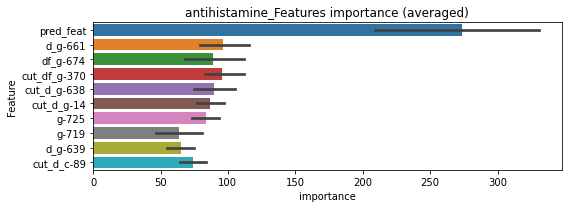

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000191189	valid_1's binary_logloss: 0.000341216
Early stopping, best iteration is:
[1600]	training's binary_logloss: 0.000167042	valid_1's binary_logloss: 0.00031034


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000196694	valid_1's binary_logloss: 0.00135672
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[49]	training's binary_logloss: 0.0119999	valid_1's binary_logloss: 0.0547734
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.014213879489657433


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000199518	valid_1's binary_logloss: 0.0004235
neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133004	valid_1's binary_logloss: 0.00283381
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000398832	valid_1's binary_logloss: 0.00136862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131172	valid_1's binary_logloss: 0.00713004
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000395496	valid_1's binary_logloss: 0.00445669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136072	valid_1's binary_logloss: 0.00269263
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000405933	valid_1's binary_logloss: 0.00104822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013446	valid_1's binary_logloss: 0.00588159


1 / 3 AUC score:1.000
y_Threshold: 0.0023048, Threshold: 0.0106767, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000403761	valid_1's binary_logloss: 0.00368185


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00747, conf_1:0.01388
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0106767
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0606767
threshold: 0.0606767, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594947	valid_1's binary_logloss: 0.00374296
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.000510698	valid_1's binary_logloss: 0.00355087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576629	valid_1's binary_logloss: 0.00161021
[600]	training's binary_logloss: 0.000177775	valid_1's binary_logloss: 0.000858244
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000174348	valid_1's binary_logloss: 0.000848883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000581594	valid_1's binary_logloss: 0.000581659
[600]	training's binary_logloss: 0.000178382	valid_1's binary_logloss: 0.00015542
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.00015127	valid_1's binary_logloss: 0.000123065
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6624598, Threshold: 0.0606767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0479658 Vs.target_rate: 0.00076
Num_p_label: 191.0, conf_0:0.04854, conf_1:0.07281
Num_p_label: 191.0, Expected: 3.0, Adj_threshold_1: 0.0606767
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_2: 0.1106767
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_3: 0.1606767
Num_p_label: 187.0, Expected: 3.0, Adj_threshold_4: 0.2106767
Num_p_label: 185.0, Expected: 3.0, Adj_threshold_5: 0.2606767
Num_p_label: 178.0, Expected: 3.0, Adj_threshold_6: 0.3106767
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_7: 0.3606767
Num_p_label: 170.0, Expected: 3.0, Adj_threshold_8: 0.4106767


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000185851	valid_1's binary_logloss: 0.00102115


Num_p_label: 161.0, Expected: 3.0, Adj_threshold_9: 0.4606767
Num_p_label: 157.0, Expected: 3.0, Adj_threshold_10: 0.5106767
threshold: 0.5606767, positive_p_label: 138.0/3982, p_label_rate: 0.0346560
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000598517	valid_1's binary_logloss: 0.00785686
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.000516284	valid_1's binary_logloss: 0.00758637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000589391	valid_1's binary_logloss: 0.00221589
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000230157	valid_1's binary_logloss: 0.00139928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577675	valid_1's binary_logloss: 0.000566678
[600]	training's binary_logloss: 0.000181702	valid_1's binary_logloss: 0.000154126
[900]	training's binary_logloss: 0.00015241	valid_1's binary_logloss: 0.000120264
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00015241	valid_1's binary_logloss: 0.000120264
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.6334298, Threshold: 0.5606767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0233551 Vs.target_rate: 0.00076
Num_p_label: 93.0, conf_0:0.50000, conf_1:0.61674
Num_p_label: 93.0, Expected: 3.0, Adj_threshold_1: 0.5606767
Num_p_label: 75.0, Expected: 3.0, Adj_threshold_2: 0.6106767
Num_p_label: 56.0, Expected: 3.0, Adj_threshold_3: 0.6606767
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_4: 0.7106767
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_5: 0.7606767


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000191727	valid_1's binary_logloss: 0.000911716


threshold: 0.7606767, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


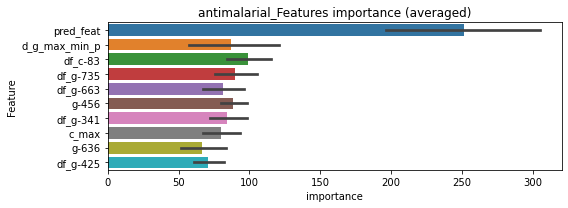

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000215803	valid_1's binary_logloss: 0.00167165
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000368824	valid_1's binary_logloss: 0.00190799
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000453	valid_1's binary_logloss: 0.00244107
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.0016852392939436175


Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000214856	valid_1's binary_logloss: 0.000710084
neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692494	valid_1's binary_logloss: 0.0515885
[600]	training's binary_logloss: 0.0011396	valid_1's binary_logloss: 0.0386349
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000869783	valid_1's binary_logloss: 0.0379681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708405	valid_1's binary_logloss: 0.0455157
[600]	training's binary_logloss: 0.00118176	valid_1's binary_logloss: 0.0338947
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00105224	valid_1's binary_logloss: 0.0336482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00799365	valid_1's binary_logloss: 0.0289897
[600]	training's binary_logloss: 0.00126585	valid_1's binary_logloss: 0.0182687
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000853325	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0083613, Threshold: 0.0341739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02392, conf_1:0.04443
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0341739
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.0841739
threshold: 0.0841739, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128036	valid_1's binary_logloss: 0.00800019
[600]	training's binary_logloss: 0.000241036	valid_1's binary_logloss: 0.00570752
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00022449	valid_1's binary_logloss: 0.00565457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126375	valid_1's binary_logloss: 0.00240942
[600]	training's binary_logloss: 0.000241158	valid_1's binary_logloss: 0.000448266
[900]	training's binary_logloss: 0.00017468	valid_1's binary_logloss: 0.000281464
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000167379	valid_1's binary_logloss: 0.000264337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131484	valid_1's binary_logloss: 0.00482111
[600]	training's binary_logloss: 0.000246862	valid_1's binary_logloss: 0.00314995
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.4095445, Threshold: 0.0841739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0632848 Vs.target_rate: 0.00307
Num_p_label: 252.0, conf_0:0.06734, conf_1:0.10101
Num_p_label: 252.0, Expected: 12.2, Adj_threshold_1: 0.0841739
Num_p_label: 252.0, Expected: 12.2, Adj_threshold_2: 0.1341739
Num_p_label: 250.0, Expected: 12.2, Adj_threshold_3: 0.1841739
Num_p_label: 239.0, Expected: 12.2, Adj_threshold_4: 0.2341739
Num_p_label: 215.0, Expected: 12.2, Adj_threshold_5: 0.2841739
Num_p_label: 176.0, Expected: 12.2, Adj_threshold_6: 0.3341739
Num_p_label: 132.0, Expected: 12.2, Adj_threshold_7: 0.3841739
Num_p_label: 96.0, Expected: 12.2, Adj_threshold_8: 0.4341739
Num_p_label: 85.0, Expected: 12.2, Adj_threshold_9: 0.4841739
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_10: 0.5341739
threshold: 0.5841739, positive_p_label: 76.0/3982, p_label_rate: 0.0190859
positive_y_label: 646.0/3785, y_label_rate: 0.

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105008	valid_1's binary_logloss: 0.00853233
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.000640455	valid_1's binary_logloss: 0.00822663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101452	valid_1's binary_logloss: 0.0022176
[600]	training's binary_logloss: 0.000162606	valid_1's binary_logloss: 0.000383752
[900]	training's binary_logloss: 0.000107733	valid_1's binary_logloss: 0.00025639
[1200]	training's binary_logloss: 0.000101374	valid_1's binary_logloss: 0.000240972
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.000101374	valid_1's binary_logloss: 0.000240972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117929	valid_1's binary_logloss: 0.00233314
[600]	training's binary_logloss: 0.000218177	valid_1's binary_logloss: 0.000613951
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1066515, Threshold: 0.5841739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0208438 Vs.target_rate: 0.00307
Num_p_label: 83.0, conf_0:0.50000, conf_1:0.64259
Num_p_label: 83.0, Expected: 12.2, Adj_threshold_1: 0.5841739
Num_p_label: 83.0, Expected: 12.2, Adj_threshold_2: 0.6341739
Num_p_label: 83.0, Expected: 12.2, Adj_threshold_3: 0.6841739
Num_p_label: 83.0, Expected: 12.2, Adj_threshold_4: 0.7341739
Num_p_label: 83.0, Expected: 12.2, Adj_threshold_5: 0.7841739
threshold: 0.7841739, positive_p_label: 83.0/3982, p_label_rate: 0.0208438
positive_y_label: 645.0/3783, y_label_rate: 0.1704996


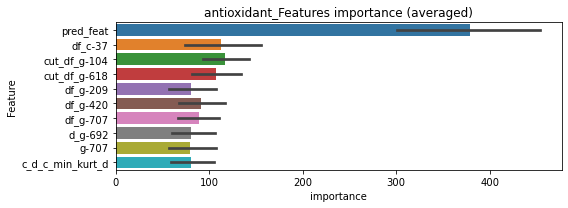

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000665679	valid_1's binary_logloss: 0.00344855
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014829	valid_1's binary_logloss: 0.00033174
[2000]	training's binary_logloss: 0.000110732	valid_1's binary_logloss: 0.000248448
[3000]	training's binary_logloss: 0.000103003	valid_1's binary_logloss: 0.000230933
Early stopping, best iteration is:
[3204]	training's binary_logloss: 0.000102198	valid_1's binary_logloss: 0.000228989


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148477	valid_1's binary_logloss: 0.000248771
[2000]	training's binary_logloss: 0.000110702	valid_1's binary_logloss: 0.000185685
[3000]	training's binary_logloss: 0.00010297	valid_1's binary_logloss: 0.000172659
Early stopping, best iteration is:
[3218]	training's binary_logloss: 0.000102203	valid_1's binary_logloss: 0.000171332


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148364	valid_1's binary_logloss: 0.000297728
[2000]	training's binary_logloss: 0.000110661	valid_1's binary_logloss: 0.000222577
[3000]	training's binary_logloss: 0.000102889	valid_1's binary_logloss: 0.000206838
Early stopping, best iteration is:
[3169]	training's binary_logloss: 0.000102197	valid_1's binary_logloss: 0.000205377


antioxidant logloss: 0.001013774780353354


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318364	valid_1's binary_logloss: 0.00977859
[600]	training's binary_logloss: 0.000600608	valid_1's binary_logloss: 0.00400194
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000525384	valid_1's binary_logloss: 0.00386541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296447	valid_1's binary_logloss: 0.0107798
[600]	training's binary_logloss: 0.000595291	valid_1's binary_logloss: 0.00510862
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000497204	valid_1's binary_logloss: 0.00482294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322177	valid_1's binary_logloss: 0.00702568
[600]	training's binary_logloss: 0.000614089	valid_1's binary_logloss: 0.00187072
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000525271	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0042399, Threshold: 0.0177258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01241, conf_1:0.02304
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0177258
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_2: 0.0677258
threshold: 0.0677258, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884788	valid_1's binary_logloss: 0.00201213
[600]	training's binary_logloss: 0.00020556	valid_1's binary_logloss: 0.0010544
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000184034	valid_1's binary_logloss: 0.00101911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000877355	valid_1's binary_logloss: 0.00167492
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000227051	valid_1's binary_logloss: 0.000744361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911281	valid_1's binary_logloss: 0.00287855
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000437677	valid_1's binary_logloss: 0.00251461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892232	valid_1's binary_logloss: 0.00234

2 / 3 AUC score:1.000
y_Threshold: 0.7060624, Threshold: 0.0677258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0504771 Vs.target_rate: 0.00151
Num_p_label: 201.0, conf_0:0.05418, conf_1:0.08127
Num_p_label: 201.0, Expected: 6.0, Adj_threshold_1: 0.0677258
Num_p_label: 201.0, Expected: 6.0, Adj_threshold_2: 0.1177258
Num_p_label: 201.0, Expected: 6.0, Adj_threshold_3: 0.1677258
Num_p_label: 200.0, Expected: 6.0, Adj_threshold_4: 0.2177258
Num_p_label: 199.0, Expected: 6.0, Adj_threshold_5: 0.2677258
Num_p_label: 196.0, Expected: 6.0, Adj_threshold_6: 0.3177258
Num_p_label: 191.0, Expected: 6.0, Adj_threshold_7: 0.3677258


Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000457528	valid_1's binary_logloss: 0.00155843


Num_p_label: 185.0, Expected: 6.0, Adj_threshold_8: 0.4177258
Num_p_label: 176.0, Expected: 6.0, Adj_threshold_9: 0.4677258
Num_p_label: 162.0, Expected: 6.0, Adj_threshold_10: 0.5177258
threshold: 0.5677258, positive_p_label: 138.0/3982, p_label_rate: 0.0346560
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892844	valid_1's binary_logloss: 0.00200931
[600]	training's binary_logloss: 0.000206621	valid_1's binary_logloss: 0.00110697
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000190602	valid_1's binary_logloss: 0.0010855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000885748	valid_1's binary_logloss: 0.00171131
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000233017	valid_1's binary_logloss: 0.000788493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907189	valid_1's binary_logloss: 0.00415098
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000448853	valid_1's binary_logloss: 0.003311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866336	valid_1's binary_logloss: 0.002849

3 / 3 AUC score:1.000
y_Threshold: 0.7153147, Threshold: 0.5677258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0296334 Vs.target_rate: 0.00151
Num_p_label: 118.0, conf_0:0.50000, conf_1:0.62450
Num_p_label: 118.0, Expected: 6.0, Adj_threshold_1: 0.5677258
Num_p_label: 81.0, Expected: 6.0, Adj_threshold_2: 0.6177258
Num_p_label: 51.0, Expected: 6.0, Adj_threshold_3: 0.6677258
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.7177258
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_5: 0.7677258


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000426066	valid_1's binary_logloss: 0.00201649


threshold: 0.7677258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antiprotozoal=================================


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00041705	valid_1's binary_logloss: 0.00257221
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antiprotozoal=================================


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000264166	valid_1's binary_logloss: 0.00131239
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000398828	valid_1's binary_logloss: 0.00138748
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000201724	valid_1's binary_logloss: 0.000475856
Early stopping, best iteration is:
[1529]	training's binary_logloss: 0.000174919	valid_1's binary_logloss: 0.000424158


antiprotozoal logloss: 0.0014249949283438256


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014328	valid_1's binary_logloss: 0.00469079
[600]	training's binary_logloss: 0.000376468	valid_1's binary_logloss: 0.00250766
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000369519	valid_1's binary_logloss: 0.0024867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146931	valid_1's binary_logloss: 0.00282669
[600]	training's binary_logloss: 0.000379064	valid_1's binary_logloss: 0.000998495
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000376604	valid_1's binary_logloss: 0.000993122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147815	valid_1's binary_logloss: 0.00300093
[600]	training's binary_logloss: 0.000385069	valid_1's binary_logloss: 0.00106242
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000376924	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0022049, Threshold: 0.0091225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00639, conf_1:0.01186
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0091225
Num_p_label: 3.0, Expected: 3.8, Adj_threshold_2: 0.0591225
threshold: 0.0591225, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000590551	valid_1's binary_logloss: 0.00261423
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000280323	valid_1's binary_logloss: 0.00210099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633865	valid_1's binary_logloss: 0.000862979
[600]	training's binary_logloss: 0.000183694	valid_1's binary_logloss: 0.000334929
[900]	training's binary_logloss: 0.000154866	valid_1's binary_logloss: 0.000299057
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000154067	valid_1's binary_logloss: 0.000296006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606965	valid_1's binary_logloss: 0.00169121
[600]	training's binary_logloss: 0.000182404	valid_1's binary_logloss: 0.00107916
[900]	training's binary_logloss: 0.000152685	valid_1's binary_logloss: 0.00103534
Early

2 / 3 AUC score:1.000
y_Threshold: 0.4924904, Threshold: 0.0591225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0419387 Vs.target_rate: 0.00097
Num_p_label: 167.0, conf_0:0.04730, conf_1:0.07095
Num_p_label: 167.0, Expected: 3.8, Adj_threshold_1: 0.0591225
Num_p_label: 165.0, Expected: 3.8, Adj_threshold_2: 0.1091225
Num_p_label: 164.0, Expected: 3.8, Adj_threshold_3: 0.1591225
Num_p_label: 157.0, Expected: 3.8, Adj_threshold_4: 0.2091225
Num_p_label: 144.0, Expected: 3.8, Adj_threshold_5: 0.2591225
Num_p_label: 119.0, Expected: 3.8, Adj_threshold_6: 0.3091225


Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00016552	valid_1's binary_logloss: 0.000778907


Num_p_label: 102.0, Expected: 3.8, Adj_threshold_7: 0.3591225
Num_p_label: 76.0, Expected: 3.8, Adj_threshold_8: 0.4091225
Num_p_label: 52.0, Expected: 3.8, Adj_threshold_9: 0.4591225
Num_p_label: 36.0, Expected: 3.8, Adj_threshold_10: 0.5091225
threshold: 0.5591225, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611479	valid_1's binary_logloss: 0.00387817
[600]	training's binary_logloss: 0.000184481	valid_1's binary_logloss: 0.00303806
[900]	training's binary_logloss: 0.000155293	valid_1's binary_logloss: 0.00299546
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000153526	valid_1's binary_logloss: 0.00299386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628411	valid_1's binary_logloss: 0.000865576
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000205581	valid_1's binary_logloss: 0.000377652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000607294	valid_1's binary_logloss: 0.0017942
[600]	training's binary_logloss: 0.000181488	valid_1's binary_logloss: 0.00120309
[900]	training's binary_logloss: 0.000151818	valid_1's binary_logloss: 0.00115204
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.5307801, Threshold: 0.5591225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0052737 Vs.target_rate: 0.00097


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000205595	valid_1's binary_logloss: 0.000625587


Num_p_label: 21.0, conf_0:0.50000, conf_1:0.61503
Num_p_label: 21.0, Expected: 3.8, Adj_threshold_1: 0.5591225
Num_p_label: 16.0, Expected: 3.8, Adj_threshold_2: 0.6091225
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_3: 0.6591225
threshold: 0.6591225, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


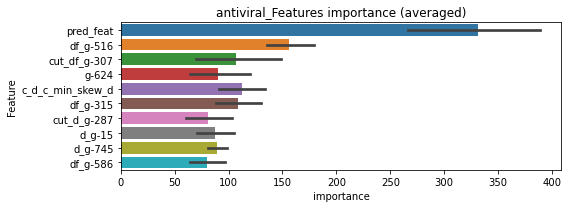

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186569	valid_1's binary_logloss: 0.00253497


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Early stopping, best iteration is:
[1523]	training's binary_logloss: 0.000162162	valid_1's binary_logloss: 0.00250008
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187046	valid_1's binary_logloss: 0.000277901


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000160371	valid_1's binary_logloss: 0.000245132
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187352	valid_1's binary_logloss: 0.00101153


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.000160146	valid_1's binary_logloss: 0.000973321


================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000189298	valid_1's binary_logloss: 0.000305861


antiviral logloss: 0.0009983253560847862


Early stopping, best iteration is:
[1573]	training's binary_logloss: 0.000164682	valid_1's binary_logloss: 0.000273505
neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283
target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377954	valid_1's binary_logloss: 0.0333562
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00101922	valid_1's binary_logloss: 0.027717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383456	valid_1's binary_logloss: 0.0255926
[600]	training's binary_logloss: 0.000759843	valid_1's binary_logloss: 0.0198162
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000678542	valid_1's binary_logloss: 0.0196026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438627	valid_1's binary_logloss: 0.00931077
[600]	training's binary_logloss: 0.000819766	valid_1's binary_logloss: 0.00340459
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000608135	valid_1's binary_logloss: 0.00296315
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0047573, Threshold: 0.0400880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, conf_0:0.02806, conf_1:0.05211
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0400880
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.0900880
Num_p_label: 13.0, Expected: 8.2, Adj_threshold_3: 0.1400880
threshold: 0.1400880, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101663	valid_1's binary_logloss: 0.0021126
[600]	training's binary_logloss: 0.000225215	valid_1's binary_logloss: 0.000827105
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000189127	valid_1's binary_logloss: 0.000736175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000988659	valid_1's binary_logloss: 0.00753393
[600]	training's binary_logloss: 0.000223815	valid_1's binary_logloss: 0.00657034
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000217788	valid_1's binary_logloss: 0.00656257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103329	valid_1's binary_logloss: 0.00307836
[600]	training's binary_logloss: 0.000224607	valid_1's binary_logloss: 0.00175882
[900]	training's binary_logloss: 0.000171778	valid_1's binary_logloss: 0.00165721
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.5484928, Threshold: 0.1400880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0753390 Vs.target_rate: 0.00206
Num_p_label: 300.0, conf_0:0.11207, conf_1:0.16811
Num_p_label: 300.0, Expected: 8.2, Adj_threshold_1: 0.1400880


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000174769	valid_1's binary_logloss: 0.00313909


Num_p_label: 300.0, Expected: 8.2, Adj_threshold_2: 0.1900880
Num_p_label: 300.0, Expected: 8.2, Adj_threshold_3: 0.2400880
Num_p_label: 300.0, Expected: 8.2, Adj_threshold_4: 0.2900880
Num_p_label: 299.0, Expected: 8.2, Adj_threshold_5: 0.3400880
Num_p_label: 297.0, Expected: 8.2, Adj_threshold_6: 0.3900880
Num_p_label: 294.0, Expected: 8.2, Adj_threshold_7: 0.4400880
Num_p_label: 279.0, Expected: 8.2, Adj_threshold_8: 0.4900880
Num_p_label: 262.0, Expected: 8.2, Adj_threshold_9: 0.5400880
Num_p_label: 227.0, Expected: 8.2, Adj_threshold_10: 0.5900880
threshold: 0.6400880, positive_p_label: 191.0/3982, p_label_rate: 0.0479658
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000976242	valid_1's binary_logloss: 0.00226824
[600]	training's binary_logloss: 0.000222164	valid_1's binary_logloss: 0.00104264
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000188088	valid_1's binary_logloss: 0.000956246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000963632	valid_1's binary_logloss: 0.00612768
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000313058	valid_1's binary_logloss: 0.00501979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010098	valid_1's binary_logloss: 0.00410987
[600]	training's binary_logloss: 0.000226501	valid_1's binary_logloss: 0.00266637
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000185945	valid_1's binary_logloss: 0.00256591
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.2959817, Threshold: 0.6400880, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000264349	valid_1's binary_logloss: 0.000939175


Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0120542 Vs.target_rate: 0.00206
Num_p_label: 48.0, conf_0:0.50000, conf_1:0.70410
Num_p_label: 48.0, Expected: 8.2, Adj_threshold_1: 0.6400880
Num_p_label: 46.0, Expected: 8.2, Adj_threshold_2: 0.6900880
Num_p_label: 44.0, Expected: 8.2, Adj_threshold_3: 0.7400880
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_4: 0.7900880
threshold: 0.7900880, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


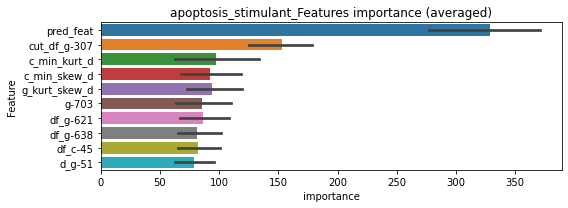

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000331996	valid_1's binary_logloss: 0.00408474
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000318712	valid_1's binary_logloss: 0.00626209
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212652	valid_1's binary_logloss: 0.00049505
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.000173987	valid_1's binary_logloss: 0.000415569


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.0031001499821941532


Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000236686	valid_1's binary_logloss: 0.00159148
neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283
target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376116	valid_1's binary_logloss: 0.0278121
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000822308	valid_1's binary_logloss: 0.0227897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390245	valid_1's binary_logloss: 0.0200528
[600]	training's binary_logloss: 0.000751191	valid_1's binary_logloss: 0.0127852
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00057114	valid_1's binary_logloss: 0.0121722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439748	valid_1's binary_logloss: 0.0107497
[600]	training's binary_logloss: 0.00080384	valid_1's binary_logloss: 0.00406837
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000614781	valid_1's binary_logloss: 0.00346567
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0058889, Threshold: 0.0212468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, conf_0:0.01487, conf_1:0.02762
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0212468
Num_p_label: 6.0, Expected: 7.9, Adj_threshold_2: 0.0712468
threshold: 0.0712468, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00099624	valid_1's binary_logloss: 0.00538359
[600]	training's binary_logloss: 0.000211281	valid_1's binary_logloss: 0.00403534
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000185511	valid_1's binary_logloss: 0.00396003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000996114	valid_1's binary_logloss: 0.00507176
[600]	training's binary_logloss: 0.000214345	valid_1's binary_logloss: 0.0040127
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00020869	valid_1's binary_logloss: 0.00400811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104381	valid_1's binary_logloss: 0.00116909
[600]	training's binary_logloss: 0.000216008	valid_1's binary_logloss: 0.000205488
[900]	training's binary_logloss: 0.000166859	valid_1's binary_logloss: 0.000140666
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.5055180, Threshold: 0.0712468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0472125 Vs.target_rate: 0.00197
Num_p_label: 188.0, conf_0:0.05700, conf_1:0.08550
Num_p_label: 188.0, Expected: 7.9, Adj_threshold_1: 0.0712468
Num_p_label: 188.0, Expected: 7.9, Adj_threshold_2: 0.1212468
Num_p_label: 188.0, Expected: 7.9, Adj_threshold_3: 0.1712468
Num_p_label: 188.0, Expected: 7.9, Adj_threshold_4: 0.2212468
Num_p_label: 187.0, Expected: 7.9, Adj_threshold_5: 0.2712468
Num_p_label: 187.0, Expected: 7.9, Adj_threshold_6: 0.3212468
Num_p_label: 186.0, Expected: 7.9, Adj_threshold_7: 0.3712468
Num_p_label: 185.0, Expected: 7.9, Adj_threshold_8: 0.4212468
Num_p_label: 184.0, Expected: 7.9, Adj_threshold_9: 0.4712468
Num_p_label: 181.0, Expected: 7.9, Adj_threshold_10: 0.5212468
threshold: 0.5712468, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 654.0/3803, y_label_rate: 0.1719695

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00094507	valid_1's binary_logloss: 0.00626383
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000521394	valid_1's binary_logloss: 0.00538532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102296	valid_1's binary_logloss: 0.00253552
[600]	training's binary_logloss: 0.000221797	valid_1's binary_logloss: 0.00122792
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000189969	valid_1's binary_logloss: 0.00119754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101974	valid_1's binary_logloss: 0.00452728
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000230881	valid_1's binary_logloss: 0.00340918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104203	valid_1's binary_logloss: 0.00283563

3 / 3 AUC score:1.000
y_Threshold: 0.5053936, Threshold: 0.5712468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0190859 Vs.target_rate: 0.00197
Num_p_label: 76.0, conf_0:0.50000, conf_1:0.62837
Num_p_label: 76.0, Expected: 7.9, Adj_threshold_1: 0.5712468
Num_p_label: 70.0, Expected: 7.9, Adj_threshold_2: 0.6212468
Num_p_label: 67.0, Expected: 7.9, Adj_threshold_3: 0.6712468
Num_p_label: 47.0, Expected: 7.9, Adj_threshold_4: 0.7212468


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000255121	valid_1's binary_logloss: 0.0017465


Num_p_label: 30.0, Expected: 7.9, Adj_threshold_5: 0.7712468
threshold: 0.7712468, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


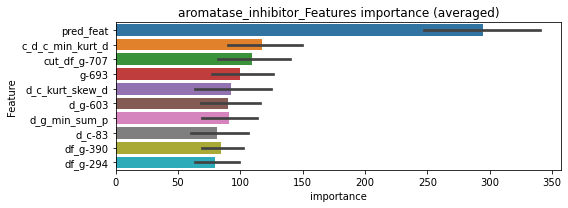

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000247411	valid_1's binary_logloss: 0.00217558


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205947	valid_1's binary_logloss: 0.000628579
Early stopping, best iteration is:
[1608]	training's binary_logloss: 0.000172433	valid_1's binary_logloss: 0.00054649


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204273	valid_1's binary_logloss: 0.000446186
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.000171743	valid_1's binary_logloss: 0.000392947


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aromatase_inhibitor logloss: 0.0015918347269484388


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000400102	valid_1's binary_logloss: 0.00325354
neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418515	valid_1's binary_logloss: 0.00131999
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000198444	valid_1's binary_logloss: 0.000847435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411911	valid_1's binary_logloss: 0.00183439
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000208809	valid_1's binary_logloss: 0.00134721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000417308	valid_1's binary_logloss: 0.000439443
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000200711	valid_1's binary_logloss: 0.000216262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407838	valid_1's binary_logloss: 0.00146382


1 / 3 AUC score:1.000
y_Threshold: 0.0006253, Threshold: 0.0024169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00169, conf_1:0.00314
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0024169
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0524169
threshold: 0.0524169, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000196001	valid_1's binary_logloss: 0.000876952


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297176	valid_1's binary_logloss: 0.000919093
[600]	training's binary_logloss: 0.000141308	valid_1's binary_logloss: 0.000661696
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000138828	valid_1's binary_logloss: 0.000656032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290498	valid_1's binary_logloss: 0.000587765
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000159077	valid_1's binary_logloss: 0.000459534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296886	valid_1's binary_logloss: 0.000262112
[600]	training's binary_logloss: 0.000137566	valid_1's binary_logloss: 0.000112576
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000126807	valid_1's binary_logloss: 0.000101236
Training until validation scores don't improve f

2 / 3 AUC score:1.000
y_Threshold: 0.2318544, Threshold: 0.0524169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0356605 Vs.target_rate: 0.00025
Num_p_label: 142.0, conf_0:0.04193, conf_1:0.06290
Num_p_label: 142.0, Expected: 1.0, Adj_threshold_1: 0.0524169
Num_p_label: 109.0, Expected: 1.0, Adj_threshold_2: 0.1024169
Num_p_label: 74.0, Expected: 1.0, Adj_threshold_3: 0.1524169
Num_p_label: 51.0, Expected: 1.0, Adj_threshold_4: 0.2024169
Num_p_label: 39.0, Expected: 1.0, Adj_threshold_5: 0.2524169
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_6: 0.3024169
Num_p_label: 26.0, Expected: 1.0, Adj_threshold_7: 0.3524169
Num_p_label: 20.0, Expected: 1.0, Adj_threshold_8: 0.4024169
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_9: 0.4524169
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_10: 0.5024169
threshold: 0.5524169, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000154967	valid_1's binary_logloss: 0.00053644


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303334	valid_1's binary_logloss: 0.00117018
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000146072	valid_1's binary_logloss: 0.000959905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028839	valid_1's binary_logloss: 0.000692623
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000145157	valid_1's binary_logloss: 0.000559264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296372	valid_1's binary_logloss: 0.000259797
[600]	training's binary_logloss: 0.000137973	valid_1's binary_logloss: 0.000111183
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000127322	valid_1's binary_logloss: 0.000100042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000295003	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.2734990, Threshold: 0.5524169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, conf_0:0.49718, conf_1:0.60766
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.5524169
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.6024169
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.6524169
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.7024169
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_5: 0.7524169
threshold: 0.7524169, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000148408	valid_1's binary_logloss: 0.000482206


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000182745	valid_1's binary_logloss: 0.00136357
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000182629	valid_1's binary_logloss: 0.000714257
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149707	valid_1's binary_logloss: 0.000127826


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


[2000]	training's binary_logloss: 0.000130871	valid_1's binary_logloss: 0.000107282
Early stopping, best iteration is:
[1975]	training's binary_logloss: 0.000130871	valid_1's binary_logloss: 0.000107282
Training until validation scores don't improve for 30 rounds


atm_kinase_inhibitor logloss: 0.0006729041488794733


[1000]	training's binary_logloss: 0.000148187	valid_1's binary_logloss: 0.000498515
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000149022	valid_1's binary_logloss: 0.000497812
neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049244	valid_1's binary_logloss: 0.000759383
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000227187	valid_1's binary_logloss: 0.000384537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000486795	valid_1's binary_logloss: 0.00513614
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00023983	valid_1's binary_logloss: 0.00425359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000496222	valid_1's binary_logloss: 0.000619295
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000226685	valid_1's binary_logloss: 0.000302897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000491693	valid_1's binary_logloss: 0.000786139


1 / 3 AUC score:1.000
y_Threshold: 0.0007532, Threshold: 0.0037222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00261, conf_1:0.00484
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0037222
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0537222


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000226797	valid_1's binary_logloss: 0.00038141


threshold: 0.0537222, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000324507	valid_1's binary_logloss: 0.000512046
[600]	training's binary_logloss: 0.000144431	valid_1's binary_logloss: 0.000298284
[900]	training's binary_logloss: 0.00012892	valid_1's binary_logloss: 0.000279684
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00012853	valid_1's binary_logloss: 0.00027878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309911	valid_1's binary_logloss: 0.000955865
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000147717	valid_1's binary_logloss: 0.000800722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325177	valid_1's binary_logloss: 0.00029638
[600]	training's binary_logloss: 0.000146105	valid_1's binary_logloss: 0.000120756
[900]	training's binary_logloss: 0.000130336	valid_1's binary_logloss: 0.000103816
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.2111365, Threshold: 0.0537222, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000127323	valid_1's binary_logloss: 0.000220148
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000126754	valid_1's binary_logloss: 0.000219584


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0582622 Vs.target_rate: 0.00029
Num_p_label: 232.0, conf_0:0.04298, conf_1:0.06447
Num_p_label: 232.0, Expected: 1.2, Adj_threshold_1: 0.0537222
Num_p_label: 202.0, Expected: 1.2, Adj_threshold_2: 0.1037222
Num_p_label: 144.0, Expected: 1.2, Adj_threshold_3: 0.1537222
Num_p_label: 97.0, Expected: 1.2, Adj_threshold_4: 0.2037222
Num_p_label: 67.0, Expected: 1.2, Adj_threshold_5: 0.2537222
Num_p_label: 45.0, Expected: 1.2, Adj_threshold_6: 0.3037222
Num_p_label: 35.0, Expected: 1.2, Adj_threshold_7: 0.3537222
Num_p_label: 25.0, Expected: 1.2, Adj_threshold_8: 0.4037222
Num_p_label: 18.0, Expected: 1.2, Adj_threshold_9: 0.4537222
Num_p_label: 15.0, Expected: 1.2, Adj_threshold_10: 0.5037222
threshold: 0.5537222, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325343	valid_1's binary_logloss: 0.000572744
[600]	training's binary_logloss: 0.00014621	valid_1's binary_logloss: 0.000358428
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000130592	valid_1's binary_logloss: 0.000341591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315793	valid_1's binary_logloss: 0.000704781
[600]	training's binary_logloss: 0.000137867	valid_1's binary_logloss: 0.000484903
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000128902	valid_1's binary_logloss: 0.000477002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328272	valid_1's binary_logloss: 0.000298545
[600]	training's binary_logloss: 0.000144778	valid_1's binary_logloss: 0.000120405
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00013113	valid

3 / 3 AUC score:1.000
y_Threshold: 0.2390025, Threshold: 0.5537222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00029
Num_p_label: 13.0, conf_0:0.49835, conf_1:0.60909
Num_p_label: 13.0, Expected: 1.2, Adj_threshold_1: 0.5537222
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_2: 0.6037222
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.6537222


[900]	training's binary_logloss: 0.0001273	valid_1's binary_logloss: 0.000209944
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00012685	valid_1's binary_logloss: 0.000209511


Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.7037222
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.7537222
threshold: 0.7537222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


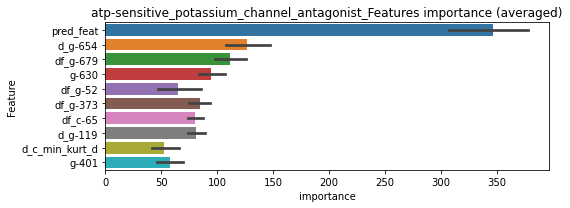

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000157575	valid_1's binary_logloss: 0.000451512


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[1503]	training's binary_logloss: 0.000139982	valid_1's binary_logloss: 0.000430318
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149898	valid_1's binary_logloss: 0.000452411


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000143843	valid_1's binary_logloss: 0.000447844
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000156251	valid_1's binary_logloss: 0.00013644
[2000]	training's binary_logloss: 0.000132619	valid_1's binary_logloss: 0.000110537


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.000131044	valid_1's binary_logloss: 0.000108809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154461	valid_1's binary_logloss: 0.000219364
[2000]	training's binary_logloss: 0.000130121	valid_1's binary_logloss: 0.000192532


atp-sensitive_potassium_channel_antagonist logloss: 0.00029434650238924584


Early stopping, best iteration is:
[2351]	training's binary_logloss: 0.000127184	valid_1's binary_logloss: 0.000189457
neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915786	valid_1's binary_logloss: 0.00353566
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000329703	valid_1's binary_logloss: 0.00200888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000913627	valid_1's binary_logloss: 0.00292118
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000337789	valid_1's binary_logloss: 0.00207818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00092165	valid_1's binary_logloss: 0.00152505
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000334728	valid_1's binary_logloss: 0.000626145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000930179	valid_1's binary_logloss: 0.00181203


1 / 3 AUC score:1.000
y_Threshold: 0.0017004, Threshold: 0.0181020, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000338294	valid_1's binary_logloss: 0.000795244


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01267, conf_1:0.02353
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0181020
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_2: 0.0681020
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.1181020
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1681020
threshold: 0.1681020, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000462635	valid_1's binary_logloss: 0.00229574
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000190354	valid_1's binary_logloss: 0.00181622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000446636	valid_1's binary_logloss: 0.000570876
[600]	training's binary_logloss: 0.000162282	valid_1's binary_logloss: 0.000241603
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000138848	valid_1's binary_logloss: 0.000213024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000448662	valid_1's binary_logloss: 0.000463737
[600]	training's binary_logloss: 0.000165497	valid_1's binary_logloss: 0.00017314
[900]	training's binary_logloss: 0.000140471	valid_1's binary_logloss: 0.0001442
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000140471	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.4769762, Threshold: 0.1681020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0590156 Vs.target_rate: 0.00050
Num_p_label: 235.0, conf_0:0.13448, conf_1:0.20172
Num_p_label: 235.0, Expected: 2.0, Adj_threshold_1: 0.1681020
Num_p_label: 215.0, Expected: 2.0, Adj_threshold_2: 0.2181020
Num_p_label: 192.0, Expected: 2.0, Adj_threshold_3: 0.2681020
Num_p_label: 168.0, Expected: 2.0, Adj_threshold_4: 0.3181020
Num_p_label: 144.0, Expected: 2.0, Adj_threshold_5: 0.3681020
Num_p_label: 117.0, Expected: 2.0, Adj_threshold_6: 0.4181020
Num_p_label: 103.0, Expected: 2.0, Adj_threshold_7: 0.4681020
Num_p_label: 89.0, Expected: 2.0, Adj_threshold_8: 0.5181020


[900]	training's binary_logloss: 0.000139952	valid_1's binary_logloss: 0.00121702
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000139952	valid_1's binary_logloss: 0.00121702


Num_p_label: 71.0, Expected: 2.0, Adj_threshold_9: 0.5681020
Num_p_label: 60.0, Expected: 2.0, Adj_threshold_10: 0.6181020
threshold: 0.6681020, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000466822	valid_1's binary_logloss: 0.00224823
[600]	training's binary_logloss: 0.000170432	valid_1's binary_logloss: 0.00164297
[900]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.00161717
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.00161717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00044565	valid_1's binary_logloss: 0.000499099
[600]	training's binary_logloss: 0.000161317	valid_1's binary_logloss: 0.000161461
[900]	training's binary_logloss: 0.000134698	valid_1's binary_logloss: 0.00012695
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000134254	valid_1's binary_logloss: 0.000126389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000443143	valid_1's binary_logloss: 0.000443084
[600]	

3 / 3 AUC score:1.000
y_Threshold: 0.4770299, Threshold: 0.6681020, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000135449	valid_1's binary_logloss: 0.00114591
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000135139	valid_1's binary_logloss: 0.0011457


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0085384 Vs.target_rate: 0.00050
Num_p_label: 34.0, conf_0:0.50000, conf_1:0.73491
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_1: 0.6681020
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_2: 0.7181020
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.7681020
threshold: 0.7681020, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


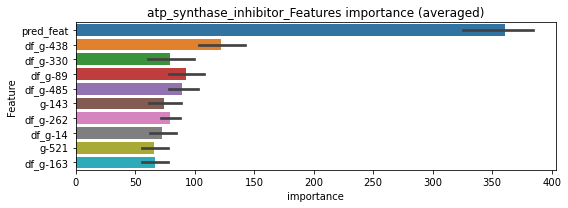

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000200098	valid_1's binary_logloss: 0.00151239
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173919	valid_1's binary_logloss: 0.00017093
[2000]	training's binary_logloss: 0.000143299	valid_1's binary_logloss: 0.000131054


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[2167]	training's binary_logloss: 0.000141648	valid_1's binary_logloss: 0.000128905
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000175339	valid_1's binary_logloss: 0.000155266
[2000]	training's binary_logloss: 0.000147345	valid_1's binary_logloss: 0.000121194


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[2167]	training's binary_logloss: 0.000144432	valid_1's binary_logloss: 0.000117544


================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0007616711201630403


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00024537	valid_1's binary_logloss: 0.00127969
neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273
target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955716	valid_1's binary_logloss: 0.0852192
[600]	training's binary_logloss: 0.00160122	valid_1's binary_logloss: 0.0763813
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00177637	valid_1's binary_logloss: 0.0759869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971283	valid_1's binary_logloss: 0.0653693
[600]	training's binary_logloss: 0.00162113	valid_1's binary_logloss: 0.0516953
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00152651	valid_1's binary_logloss: 0.0513729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00962752	valid_1's binary_logloss: 0.0534812
[600]	training's binary_logloss: 0.00162222	valid_1's binary_logloss: 0.041731
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00149018	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.997
y_Threshold: 0.0117083, Threshold: 0.0317412, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 645/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, conf_0:0.02222, conf_1:0.04126
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0317412
Num_p_label: 5.0, Expected: 16.2, Adj_threshold_2: 0.0817412
threshold: 0.0817412, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 645.0/3777, y_label_rate: 0.1707705
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133719	valid_1's binary_logloss: 0.00948589
[600]	training's binary_logloss: 0.000220786	valid_1's binary_logloss: 0.00790095
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000229284	valid_1's binary_logloss: 0.00787733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114892	valid_1's binary_logloss: 0.00284413
[600]	training's binary_logloss: 0.000169637	valid_1's binary_logloss: 0.000449002
[900]	training's binary_logloss: 0.000108718	valid_1's binary_logloss: 0.000290008
[1200]	training's binary_logloss: 0.000101734	valid_1's binary_logloss: 0.000270967
Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.000101161	valid_1's binary_logloss: 0.000269122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118551	valid_1's binary_logloss: 0.00239998
[600]	

2 / 3 AUC score:1.000
y_Threshold: 0.7837188, Threshold: 0.0817412, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 643.0/3773
p_label_rate: 0.0421899 Vs.target_rate: 0.00407
Num_p_label: 168.0, conf_0:0.06539, conf_1:0.09809
Num_p_label: 168.0, Expected: 16.2, Adj_threshold_1: 0.0817412
Num_p_label: 168.0, Expected: 16.2, Adj_threshold_2: 0.1317412
Num_p_label: 167.0, Expected: 16.2, Adj_threshold_3: 0.1817412
Num_p_label: 143.0, Expected: 16.2, Adj_threshold_4: 0.2317412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_5: 0.2817412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_6: 0.3317412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_7: 0.3817412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_8: 0.4317412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_9: 0.4817412
Num_p_label: 140.0, Expected: 16.2, Adj_threshold_10: 0.5317412
threshold: 0.5817412, positive_p_label: 140.0/3982, p_label_rate: 0.0351582
positive_y_label: 643.0/3773, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144419	valid_1's binary_logloss: 0.0060162
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000302125	valid_1's binary_logloss: 0.00420624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133695	valid_1's binary_logloss: 0.00336694
[600]	training's binary_logloss: 0.000233832	valid_1's binary_logloss: 0.00101043
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000167111	valid_1's binary_logloss: 0.000845472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136876	valid_1's binary_logloss: 0.00456826
[600]	training's binary_logloss: 0.000236791	valid_1's binary_logloss: 0.00269067
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000181398	valid_1's binary_logloss: 0.00259825
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.7230882, Threshold: 0.5817412, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000160061	valid_1's binary_logloss: 0.000349318


Remove_noisy_data: 4 → Positive_corect_labels: 641.0/3769
p_label_rate: 0.0361627 Vs.target_rate: 0.00407
Num_p_label: 144.0, conf_0:0.50000, conf_1:0.63992
Num_p_label: 144.0, Expected: 16.2, Adj_threshold_1: 0.5817412
Num_p_label: 133.0, Expected: 16.2, Adj_threshold_2: 0.6317412
Num_p_label: 126.0, Expected: 16.2, Adj_threshold_3: 0.6817412
Num_p_label: 111.0, Expected: 16.2, Adj_threshold_4: 0.7317412
Num_p_label: 90.0, Expected: 16.2, Adj_threshold_5: 0.7817412
threshold: 0.7817412, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 641.0/3769, y_label_rate: 0.1700716


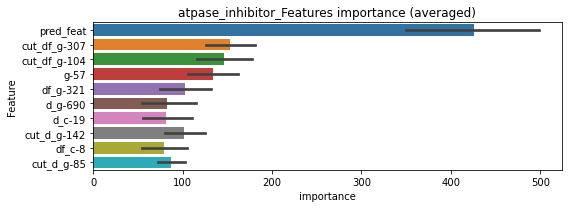

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000560903	valid_1's binary_logloss: 0.00898755
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213891	valid_1's binary_logloss: 0.000923439
Early stopping, best iteration is:
[1177]	training's binary_logloss: 0.00020032	valid_1's binary_logloss: 0.000871266


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215761	valid_1's binary_logloss: 0.00311716
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.000178064	valid_1's binary_logloss: 0.00299565


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215536	valid_1's binary_logloss: 0.000628611
Early stopping, best iteration is:
[1842]	training's binary_logloss: 0.000173624	valid_1's binary_logloss: 0.000548515


atpase_inhibitor logloss: 0.003352702324042569


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161632	valid_1's binary_logloss: 0.00317266
[600]	training's binary_logloss: 0.000410425	valid_1's binary_logloss: 0.00105435
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000401158	valid_1's binary_logloss: 0.00103602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155764	valid_1's binary_logloss: 0.004007
[600]	training's binary_logloss: 0.000407631	valid_1's binary_logloss: 0.00153487
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000389193	valid_1's binary_logloss: 0.00149856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160431	valid_1's binary_logloss: 0.00324808
[600]	training's binary_logloss: 0.000409159	valid_1's binary_logloss: 0.00135988
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000399737	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0023148, Threshold: 0.0080893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00566, conf_1:0.01052
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0080893
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0580893
threshold: 0.0580893, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00065123	valid_1's binary_logloss: 0.00215524
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000323722	valid_1's binary_logloss: 0.00174455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626279	valid_1's binary_logloss: 0.00178178
[600]	training's binary_logloss: 0.000177568	valid_1's binary_logloss: 0.00114247
[900]	training's binary_logloss: 0.000144033	valid_1's binary_logloss: 0.00109991
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000142589	valid_1's binary_logloss: 0.00109786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628589	valid_1's binary_logloss: 0.00110997
[600]	training's binary_logloss: 0.000180716	valid_1's binary_logloss: 0.000571513
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000150856	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.5943165, Threshold: 0.0580893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0527373 Vs.target_rate: 0.00080
Num_p_label: 210.0, conf_0:0.04647, conf_1:0.06971
Num_p_label: 210.0, Expected: 3.2, Adj_threshold_1: 0.0580893
Num_p_label: 208.0, Expected: 3.2, Adj_threshold_2: 0.1080893
Num_p_label: 207.0, Expected: 3.2, Adj_threshold_3: 0.1580893
Num_p_label: 207.0, Expected: 3.2, Adj_threshold_4: 0.2080893
Num_p_label: 207.0, Expected: 3.2, Adj_threshold_5: 0.2580893
Num_p_label: 204.0, Expected: 3.2, Adj_threshold_6: 0.3080893
Num_p_label: 193.0, Expected: 3.2, Adj_threshold_7: 0.3580893
Num_p_label: 179.0, Expected: 3.2, Adj_threshold_8: 0.4080893
Num_p_label: 145.0, Expected: 3.2, Adj_threshold_9: 0.4580893


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000198285	valid_1's binary_logloss: 0.000683587


Num_p_label: 108.0, Expected: 3.2, Adj_threshold_10: 0.5080893
threshold: 0.5580893, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652771	valid_1's binary_logloss: 0.00335477
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000314	valid_1's binary_logloss: 0.00276331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000625932	valid_1's binary_logloss: 0.00178077
[600]	training's binary_logloss: 0.000179644	valid_1's binary_logloss: 0.00125049
[900]	training's binary_logloss: 0.000146664	valid_1's binary_logloss: 0.0012054
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000146269	valid_1's binary_logloss: 0.00120448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626058	valid_1's binary_logloss: 0.000688619
[600]	training's binary_logloss: 0.000180104	valid_1's binary_logloss: 0.000170344
[900]	training's binary_logloss: 0.000147457	valid_1's binary_logloss: 0.00012815
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.5221030, Threshold: 0.5580893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0138122 Vs.target_rate: 0.00080
Num_p_label: 55.0, conf_0:0.50000, conf_1:0.61390
Num_p_label: 55.0, Expected: 3.2, Adj_threshold_1: 0.5580893
Num_p_label: 33.0, Expected: 3.2, Adj_threshold_2: 0.6080893
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_3: 0.6580893
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_4: 0.7080893
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.7580893


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00019536	valid_1's binary_logloss: 0.000598266


threshold: 0.7580893, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


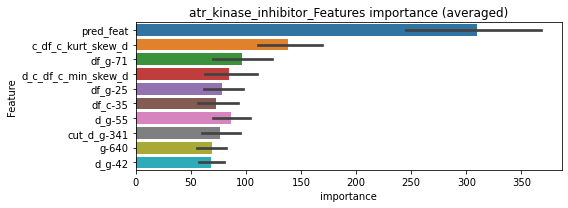

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000314992	valid_1's binary_logloss: 0.00227037
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000245859	valid_1's binary_logloss: 0.00114151
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186538	valid_1's binary_logloss: 0.000170389
Early stopping, best iteration is:
[1945]	training's binary_logloss: 0.000153992	valid_1's binary_logloss: 0.000130369


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


atr_kinase_inhibitor logloss: 0.0010401418025303625


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000202577	valid_1's binary_logloss: 0.000612694
neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119831	valid_1's binary_logloss: 0.0762966
[600]	training's binary_logloss: 0.00175939	valid_1's binary_logloss: 0.0610686
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00181593	valid_1's binary_logloss: 0.0607576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117638	valid_1's binary_logloss: 0.0538006
[600]	training's binary_logloss: 0.0017809	valid_1's binary_logloss: 0.0317228
[900]	training's binary_logloss: 0.000902703	valid_1's binary_logloss: 0.0278249
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000851085	valid_1's binary_logloss: 0.0275352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011533	valid_1's binary_logloss: 0.0574425
[600]	training's binary_logloss: 0.00175749	valid_1's binary_logloss: 0.0407632
Early stopping, best iteration

1 / 3 AUC score:0.996
y_Threshold: 0.0145232, Threshold: 0.0839736, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 644/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.05878, conf_1:0.10917
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0839736
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.1339736
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_3: 0.1839736
threshold: 0.1839736, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 644.0/3774, y_label_rate: 0.1706412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143721	valid_1's binary_logloss: 0.00589319
[600]	training's binary_logloss: 0.000222825	valid_1's binary_logloss: 0.00361973
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000203762	valid_1's binary_logloss: 0.00357184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142812	valid_1's binary_logloss: 0.00349601
[600]	training's binary_logloss: 0.00022726	valid_1's binary_logloss: 0.000998088
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00016267	valid_1's binary_logloss: 0.000810451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140526	valid_1's binary_logloss: 0.00287002
[600]	training's binary_logloss: 0.000225397	valid_1's binary_logloss: 0.00092451
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000160619	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.7935496, Threshold: 0.1839736, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000144386	valid_1's binary_logloss: 0.000156184


Remove_noisy_data: 2 → Positive_corect_labels: 643.0/3772
p_label_rate: 0.0585133 Vs.target_rate: 0.00403
Num_p_label: 233.0, conf_0:0.14718, conf_1:0.22077
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_1: 0.1839736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_2: 0.2339736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_3: 0.2839736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_4: 0.3339736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_5: 0.3839736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_6: 0.4339736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_7: 0.4839736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_8: 0.5339736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_9: 0.5839736
Num_p_label: 233.0, Expected: 16.1, Adj_threshold_10: 0.6339736
threshold: 0.6839736, positive_p_label: 233.0/3982, p_label_rate: 0.0585133
positive_y_label: 643.0/3772, y_label_rate: 0.1704666
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150711	valid_1's binary_logloss: 0.00351866
[600]	training's binary_logloss: 0.000242628	valid_1's binary_logloss: 0.00107821
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000178011	valid_1's binary_logloss: 0.000904377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149295	valid_1's binary_logloss: 0.00673493
[600]	training's binary_logloss: 0.000245538	valid_1's binary_logloss: 0.0044218
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000254652	valid_1's binary_logloss: 0.00439321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145037	valid_1's binary_logloss: 0.00338335
[600]	training's binary_logloss: 0.000234733	valid_1's binary_logloss: 0.00121893
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000177115	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.7916572, Threshold: 0.6839736, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 641.0/3768
p_label_rate: 0.0562531 Vs.target_rate: 0.00403
Num_p_label: 224.0, conf_0:0.50000, conf_1:0.75237
Num_p_label: 224.0, Expected: 16.1, Adj_threshold_1: 0.6839736
Num_p_label: 213.0, Expected: 16.1, Adj_threshold_2: 0.7339736
Num_p_label: 201.0, Expected: 16.1, Adj_threshold_3: 0.7839736
threshold: 0.7839736, positive_p_label: 201.0/3982, p_label_rate: 0.0504771
positive_y_label: 641.0/3768, y_label_rate: 0.1701168


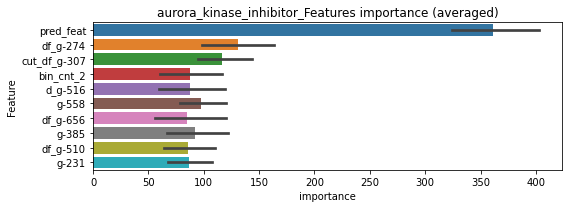

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.000480913	valid_1's binary_logloss: 0.0106259
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000561751	valid_1's binary_logloss: 0.00480446
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000221298	valid_1's binary_logloss: 0.00120522
Early stopping, best iteration is:
[1470]	training's binary_logloss: 0.000190273	valid_1's binary_logloss: 0.0011061


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aurora_kinase_inhibitor logloss: 0.0048896605699082635


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000499195	valid_1's binary_logloss: 0.00302113
neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413985	valid_1's binary_logloss: 0.000654022
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000207321	valid_1's binary_logloss: 0.000394124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405071	valid_1's binary_logloss: 0.00066021
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000210695	valid_1's binary_logloss: 0.00037818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409169	valid_1's binary_logloss: 0.000632921
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000207807	valid_1's binary_logloss: 0.0003481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408472	valid_1's binary_logloss: 0.000692686


1 / 3 AUC score:1.000
y_Threshold: 0.0007936, Threshold: 0.0055492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00388, conf_1:0.00721
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0055492


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00020399	valid_1's binary_logloss: 0.000392513


Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0555492
threshold: 0.0555492, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000284156	valid_1's binary_logloss: 0.00032805
[600]	training's binary_logloss: 0.000136209	valid_1's binary_logloss: 0.000175954
[900]	training's binary_logloss: 0.000123935	valid_1's binary_logloss: 0.000163761
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000124086	valid_1's binary_logloss: 0.00016374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028267	valid_1's binary_logloss: 0.000898007
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00015256	valid_1's binary_logloss: 0.000646948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000292326	valid_1's binary_logloss: 0.000356313
[600]	training's binary_logloss: 0.000137434	valid_1's binary_logloss: 0.000173574
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000128463	valid_1

2 / 3 AUC score:1.000
y_Threshold: 0.3453250, Threshold: 0.0555492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0595178 Vs.target_rate: 0.00025
Num_p_label: 237.0, conf_0:0.04444, conf_1:0.06666
Num_p_label: 237.0, Expected: 1.0, Adj_threshold_1: 0.0555492
Num_p_label: 187.0, Expected: 1.0, Adj_threshold_2: 0.1055492
Num_p_label: 128.0, Expected: 1.0, Adj_threshold_3: 0.1555492
Num_p_label: 93.0, Expected: 1.0, Adj_threshold_4: 0.2055492
Num_p_label: 67.0, Expected: 1.0, Adj_threshold_5: 0.2555492
Num_p_label: 52.0, Expected: 1.0, Adj_threshold_6: 0.3055492
Num_p_label: 44.0, Expected: 1.0, Adj_threshold_7: 0.3555492
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_8: 0.4055492
Num_p_label: 34.0, Expected: 1.0, Adj_threshold_9: 0.4555492
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_10: 0.5055492


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000122658	valid_1's binary_logloss: 0.000147606


threshold: 0.5555492, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000292091	valid_1's binary_logloss: 0.00058684
[600]	training's binary_logloss: 0.000141104	valid_1's binary_logloss: 0.000386843
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000131205	valid_1's binary_logloss: 0.000375804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000277508	valid_1's binary_logloss: 0.00134356
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000161942	valid_1's binary_logloss: 0.00111687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298141	valid_1's binary_logloss: 0.000295328
[600]	training's binary_logloss: 0.000145582	valid_1's binary_logloss: 0.000138285
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000136757	valid_1's binary_logloss: 0.000128069
Training until validation scores don't improve for 

3 / 3 AUC score:1.000
y_Threshold: 0.5258150, Threshold: 0.5555492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, conf_0:0.49999, conf_1:0.61110
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.5555492
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.6055492
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.6555492
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.7055492
threshold: 0.7055492, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000128128	valid_1's binary_logloss: 0.000192985


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


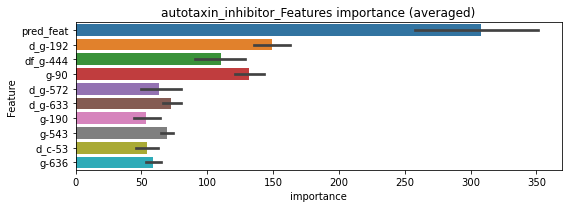

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149215	valid_1's binary_logloss: 0.00026562
[2000]	training's binary_logloss: 0.000129369	valid_1's binary_logloss: 0.00024637


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[2290]	training's binary_logloss: 0.000127092	valid_1's binary_logloss: 0.000244067
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147229	valid_1's binary_logloss: 0.000412582
[2000]	training's binary_logloss: 0.000127536	valid_1's binary_logloss: 0.000391389
Early stopping, best iteration is:
[2082]	training's binary_logloss: 0.000126796	valid_1's binary_logloss: 0.000390669


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015099	valid_1's binary_logloss: 0.000143695
[2000]	training's binary_logloss: 0.000130628	valid_1's binary_logloss: 0.000119451
Early stopping, best iteration is:
[2020]	training's binary_logloss: 0.00013051	valid_1's binary_logloss: 0.000119311


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149135	valid_1's binary_logloss: 0.000154836
[2000]	training's binary_logloss: 0.000128669	valid_1's binary_logloss: 0.000133467


autotaxin_inhibitor logloss: 0.00022093959565292119


Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.000125225	valid_1's binary_logloss: 0.000129712
neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584924	valid_1's binary_logloss: 0.0437059
[600]	training's binary_logloss: 0.00101409	valid_1's binary_logloss: 0.0350942
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00105839	valid_1's binary_logloss: 0.0349985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624875	valid_1's binary_logloss: 0.0261822
[600]	training's binary_logloss: 0.00106362	valid_1's binary_logloss: 0.0140043
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000713683	valid_1's binary_logloss: 0.0128075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614338	valid_1's binary_logloss: 0.0288395
[600]	training's binary_logloss: 0.00104965	valid_1's binary_logloss: 0.0175034
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000781697	valid_1's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0082422, Threshold: 0.0172542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01208, conf_1:0.02243
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0172542
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_2: 0.0672542
threshold: 0.0672542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 653.0/3796, y_label_rate: 0.1720232
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121463	valid_1's binary_logloss: 0.00371527
[600]	training's binary_logloss: 0.000240871	valid_1's binary_logloss: 0.00203884
[900]	training's binary_logloss: 0.000180666	valid_1's binary_logloss: 0.00192901
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000182453	valid_1's binary_logloss: 0.00192695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117437	valid_1's binary_logloss: 0.00698025
[600]	training's binary_logloss: 0.000240797	valid_1's binary_logloss: 0.00558216
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000224153	valid_1's binary_logloss: 0.0055437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122981	valid_1's binary_logloss: 0.00258695
[600]	training's binary_logloss: 0.000242388	valid_1's binary_logloss: 0.000971398
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.4542857, Threshold: 0.0672542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3788
p_label_rate: 0.0389252 Vs.target_rate: 0.00252
Num_p_label: 155.0, conf_0:0.05380, conf_1:0.08070
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_1: 0.0672542
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_2: 0.1172542
Num_p_label: 154.0, Expected: 10.0, Adj_threshold_3: 0.1672542


Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000436112	valid_1's binary_logloss: 0.00513516


Num_p_label: 154.0, Expected: 10.0, Adj_threshold_4: 0.2172542
Num_p_label: 152.0, Expected: 10.0, Adj_threshold_5: 0.2672542
Num_p_label: 152.0, Expected: 10.0, Adj_threshold_6: 0.3172542
Num_p_label: 145.0, Expected: 10.0, Adj_threshold_7: 0.3672542
Num_p_label: 134.0, Expected: 10.0, Adj_threshold_8: 0.4172542
Num_p_label: 117.0, Expected: 10.0, Adj_threshold_9: 0.4672542
Num_p_label: 84.0, Expected: 10.0, Adj_threshold_10: 0.5172542
threshold: 0.5672542, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114693	valid_1's binary_logloss: 0.00220583
[600]	training's binary_logloss: 0.000227856	valid_1's binary_logloss: 0.000827047
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000169243	valid_1's binary_logloss: 0.000679832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119783	valid_1's binary_logloss: 0.0046541
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00025708	valid_1's binary_logloss: 0.00327667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120541	valid_1's binary_logloss: 0.00198398
[600]	training's binary_logloss: 0.000232581	valid_1's binary_logloss: 0.000479433
[900]	training's binary_logloss: 0.000172548	valid_1's binary_logloss: 0.000369337
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000169431	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.2023368, Threshold: 0.5672542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0027624 Vs.target_rate: 0.00252


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000304389	valid_1's binary_logloss: 0.00579312


Num_p_label: 11.0, conf_0:0.50000, conf_1:0.62398
threshold: 0.5672542, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3786, y_label_rate: 0.1711569


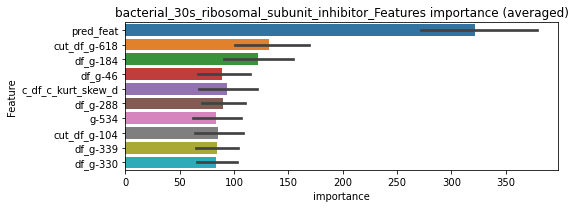

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000379945	valid_1's binary_logloss: 0.00763025
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000425112	valid_1's binary_logloss: 0.00280679
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000272962	valid_1's binary_logloss: 0.00191183
Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.003358080600627537


Early stopping, best iteration is:
[872]	training's binary_logloss: 0.00022151	valid_1's binary_logloss: 0.00106708
neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833271	valid_1's binary_logloss: 0.0551578
[600]	training's binary_logloss: 0.00133966	valid_1's binary_logloss: 0.0405218
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000980553	valid_1's binary_logloss: 0.0394727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871798	valid_1's binary_logloss: 0.0439397
[600]	training's binary_logloss: 0.00140479	valid_1's binary_logloss: 0.0314994
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00132863	valid_1's binary_logloss: 0.0312447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915534	valid_1's binary_logloss: 0.0466449
[600]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0335688
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00107883	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0115407, Threshold: 0.0351490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.02460, conf_1:0.04569
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0351490
Num_p_label: 8.0, Expected: 13.4, Adj_threshold_2: 0.0851490
threshold: 0.0851490, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135309	valid_1's binary_logloss: 0.00552924
[600]	training's binary_logloss: 0.000242347	valid_1's binary_logloss: 0.00373114
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000211822	valid_1's binary_logloss: 0.00368844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013809	valid_1's binary_logloss: 0.00355188
[600]	training's binary_logloss: 0.000248825	valid_1's binary_logloss: 0.00137705
[900]	training's binary_logloss: 0.000177045	valid_1's binary_logloss: 0.0011723
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000172709	valid_1's binary_logloss: 0.00113773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142424	valid_1's binary_logloss: 0.00568091
[600]	training's binary_logloss: 0.000247796	valid_1's binary_logloss: 0.0038672
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.3465136, Threshold: 0.0851490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3788


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000191596	valid_1's binary_logloss: 0.00178189


p_label_rate: 0.0527373 Vs.target_rate: 0.00336
Num_p_label: 210.0, conf_0:0.06812, conf_1:0.10218
Num_p_label: 210.0, Expected: 13.4, Adj_threshold_1: 0.0851490
Num_p_label: 209.0, Expected: 13.4, Adj_threshold_2: 0.1351490
Num_p_label: 207.0, Expected: 13.4, Adj_threshold_3: 0.1851490
Num_p_label: 199.0, Expected: 13.4, Adj_threshold_4: 0.2351490
Num_p_label: 180.0, Expected: 13.4, Adj_threshold_5: 0.2851490
Num_p_label: 144.0, Expected: 13.4, Adj_threshold_6: 0.3351490
Num_p_label: 106.0, Expected: 13.4, Adj_threshold_7: 0.3851490
Num_p_label: 82.0, Expected: 13.4, Adj_threshold_8: 0.4351490
Num_p_label: 54.0, Expected: 13.4, Adj_threshold_9: 0.4851490
Num_p_label: 41.0, Expected: 13.4, Adj_threshold_10: 0.5351490
threshold: 0.5851490, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001335	valid_1's binary_logloss: 0.00262368
[600]	training's binary_logloss: 0.000236184	valid_1's binary_logloss: 0.000673265
[900]	training's binary_logloss: 0.00016358	valid_1's binary_logloss: 0.000509927
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000157133	valid_1's binary_logloss: 0.000498926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135545	valid_1's binary_logloss: 0.00435283
[600]	training's binary_logloss: 0.000242645	valid_1's binary_logloss: 0.00236867
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000176531	valid_1's binary_logloss: 0.00223625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133922	valid_1's binary_logloss: 0.00914547
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000299128	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.2152487, Threshold: 0.5851490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0062783 Vs.target_rate: 0.00336
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.64366
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_1: 0.5851490
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_2: 0.6351490
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_3: 0.6851490
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_4: 0.7351490
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_5: 0.7851490
threshold: 0.7851490, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


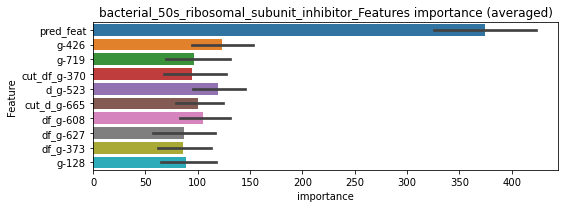

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148794	valid_1's binary_logloss: 0.000293702
[2000]	training's binary_logloss: 0.00011073	valid_1's binary_logloss: 0.000218905
[3000]	training's binary_logloss: 0.000103091	valid_1's binary_logloss: 0.000203775


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[3496]	training's binary_logloss: 0.000101716	valid_1's binary_logloss: 0.000200985
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148819	valid_1's binary_logloss: 0.000324514
[2000]	training's binary_logloss: 0.00011078	valid_1's binary_logloss: 0.00024212
[3000]	training's binary_logloss: 0.000103016	valid_1's binary_logloss: 0.000225055


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[3376]	training's binary_logloss: 0.000101896	valid_1's binary_logloss: 0.000222566
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000200723	valid_1's binary_logloss: 0.000502235
[2000]	training's binary_logloss: 0.000154711	valid_1's binary_logloss: 0.000403569
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.000149538	valid_1's binary_logloss: 0.0003914


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193808	valid_1's binary_logloss: 0.000949326
Early stopping, best iteration is:
[1214]	training's binary_logloss: 0.000177553	valid_1's binary_logloss: 0.000901575


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.0004303714970849609


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287911	valid_1's binary_logloss: 0.0132356
[600]	training's binary_logloss: 0.000625743	valid_1's binary_logloss: 0.00800943
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000573748	valid_1's binary_logloss: 0.00786147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291829	valid_1's binary_logloss: 0.0155511
[600]	training's binary_logloss: 0.000616809	valid_1's binary_logloss: 0.00886169
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000551243	valid_1's binary_logloss: 0.00852423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289377	valid_1's binary_logloss: 0.00937097
[600]	training's binary_logloss: 0.000631489	valid_1's binary_logloss: 0.00469246
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000554752	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0038518, Threshold: 0.0341469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.02390, conf_1:0.04439
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0341469
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0841469
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1341469
threshold: 0.1341469, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883804	valid_1's binary_logloss: 0.00413086
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00049706	valid_1's binary_logloss: 0.00346913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00083356	valid_1's binary_logloss: 0.00333657
[600]	training's binary_logloss: 0.000200123	valid_1's binary_logloss: 0.00240479
[900]	training's binary_logloss: 0.000156512	valid_1's binary_logloss: 0.00235008
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000151045	valid_1's binary_logloss: 0.0023413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000846712	valid_1's binary_logloss: 0.00112365
[600]	training's binary_logloss: 0.000201129	valid_1's binary_logloss: 0.000310896
[900]	training's binary_logloss: 0.000157852	valid_1's binary_logloss: 0.00025685
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.7354702, Threshold: 0.1341469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0469613 Vs.target_rate: 0.00151
Num_p_label: 187.0, conf_0:0.10732, conf_1:0.16098
Num_p_label: 187.0, Expected: 6.0, Adj_threshold_1: 0.1341469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_2: 0.1841469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_3: 0.2341469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_4: 0.2841469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_5: 0.3341469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_6: 0.3841469
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_7: 0.4341469
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_8: 0.4841469
Num_p_label: 179.0, Expected: 6.0, Adj_threshold_9: 0.5341469
Num_p_label: 171.0, Expected: 6.0, Adj_threshold_10: 0.5841469
threshold: 0.6341469, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 656.0/3809, y_label_rate: 0.1722237

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000837324	valid_1's binary_logloss: 0.00348518
[600]	training's binary_logloss: 0.000206381	valid_1's binary_logloss: 0.00241412
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00019319	valid_1's binary_logloss: 0.00238325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866057	valid_1's binary_logloss: 0.00132053
[600]	training's binary_logloss: 0.00021351	valid_1's binary_logloss: 0.00037795
[900]	training's binary_logloss: 0.000166613	valid_1's binary_logloss: 0.000304838
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000166546	valid_1's binary_logloss: 0.000304613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000863957	valid_1's binary_logloss: 0.00109264
[600]	training's binary_logloss: 0.00021054	valid_1's binary_logloss: 0.000302437
[900]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.6215579, Threshold: 0.6341469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0291311 Vs.target_rate: 0.00151
Num_p_label: 116.0, conf_0:0.50000, conf_1:0.69756
Num_p_label: 116.0, Expected: 6.0, Adj_threshold_1: 0.6341469
Num_p_label: 94.0, Expected: 6.0, Adj_threshold_2: 0.6841469


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00031412	valid_1's binary_logloss: 0.00264716


Num_p_label: 78.0, Expected: 6.0, Adj_threshold_3: 0.7341469
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_4: 0.7841469
threshold: 0.7841469, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000697462	valid_1's binary_logloss: 0.00390823
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205433	valid_1's binary_logloss: 0.000411852
Early stopping, best iteration is:
[1508]	training's binary_logloss: 0.00017806	valid_1's binary_logloss: 0.000371616


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000206178	valid_1's binary_logloss: 0.000358249
Early stopping, best iteration is:
[1689]	training's binary_logloss: 0.000174226	valid_1's binary_logloss: 0.000314522


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds


bacterial_antifolate logloss: 0.002187188977219247


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000323966	valid_1's binary_logloss: 0.0041495
neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268
target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241725	valid_1's binary_logloss: 0.187944
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.0103517	valid_1's binary_logloss: 0.182549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242582	valid_1's binary_logloss: 0.164336
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00683298	valid_1's binary_logloss: 0.15579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263337	valid_1's binary_logloss: 0.159919
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00821216	valid_1's binary_logloss: 0.148696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0259406	valid_1's binary_logloss: 0.144916
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00666237	valid_1's binary_logloss:

1 / 3 AUC score:0.965
y_Threshold: 0.0433730, Threshold: 0.1951261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 270 → Positive_corect_labels: 584/3651
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, conf_0:0.13659, conf_1:0.25366
threshold: 0.1951261, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 584.0/3651, y_label_rate: 0.1599562
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170828	valid_1's binary_logloss: 0.00460292
[600]	training's binary_logloss: 0.000261449	valid_1's binary_logloss: 0.00149501
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000177453	valid_1's binary_logloss: 0.0013339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172472	valid_1's binary_logloss: 0.00357512
[600]	training's binary_logloss: 0.00026049	valid_1's binary_logloss: 0.00068558
[900]	training's binary_logloss: 0.000171327	valid_1's binary_logloss: 0.000477998
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000164653	valid_1's binary_logloss: 0.000464959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169539	valid_1's binary_logloss: 0.00688959
[600]	training's binary_logloss: 0.000255828	valid_1's binary_logloss: 0.00437504
[900]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.7487394, Threshold: 0.1951261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 582.0/3647
p_label_rate: 0.0791060 Vs.target_rate: 0.00806
Num_p_label: 315.0, conf_0:0.15610, conf_1:0.23415
Num_p_label: 315.0, Expected: 32.1, Adj_threshold_1: 0.1951261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_2: 0.2451261


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000285002	valid_1's binary_logloss: 0.00389764


Num_p_label: 313.0, Expected: 32.1, Adj_threshold_3: 0.2951261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_4: 0.3451261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_5: 0.3951261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_6: 0.4451261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_7: 0.4951261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_8: 0.5451261
Num_p_label: 313.0, Expected: 32.1, Adj_threshold_9: 0.5951261
Num_p_label: 312.0, Expected: 32.1, Adj_threshold_10: 0.6451261
threshold: 0.6951261, positive_p_label: 311.0/3982, p_label_rate: 0.0781015
positive_y_label: 582.0/3647, y_label_rate: 0.1595832
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176317	valid_1's binary_logloss: 0.0072953
[600]	training's binary_logloss: 0.000272864	valid_1's binary_logloss: 0.00373766
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000195555	valid_1's binary_logloss: 0.00352386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177193	valid_1's binary_logloss: 0.00692577
[600]	training's binary_logloss: 0.000273337	valid_1's binary_logloss: 0.00404348
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000206306	valid_1's binary_logloss: 0.00386291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177162	valid_1's binary_logloss: 0.00630347
[600]	training's binary_logloss: 0.000270811	valid_1's binary_logloss: 0.00343992
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000222696	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.5787738, Threshold: 0.6951261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 578.0/3639
p_label_rate: 0.0497238 Vs.target_rate: 0.00806
Num_p_label: 198.0, conf_0:0.50000, conf_1:0.76464
Num_p_label: 198.0, Expected: 32.1, Adj_threshold_1: 0.6951261
Num_p_label: 181.0, Expected: 32.1, Adj_threshold_2: 0.7451261
Num_p_label: 172.0, Expected: 32.1, Adj_threshold_3: 0.7951261
threshold: 0.7951261, positive_p_label: 172.0/3982, p_label_rate: 0.0431944
positive_y_label: 578.0/3639, y_label_rate: 0.1588348


len(train_index) : 2729
len(valid_index) : 910
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2729
len(valid_index) : 910
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000544416	valid_1's binary_logloss: 0.00297179
Training until validation scores don't improve for 30 rounds


len(train_index) : 2729
len(valid_index) : 910
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000233523	valid_1's binary_logloss: 0.00392292
Training until validation scores don't improve for 30 rounds


len(train_index) : 2730
len(valid_index) : 909
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000457659	valid_1's binary_logloss: 0.00957445
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000225968	valid_1's binary_logloss: 0.00202193
Early stopping, best iteration is:
[1419]	training's binary_logloss: 0.000196512	valid_1's binary_logloss: 0.00189586


bacterial_cell_wall_synthesis_inhibitor logloss: 0.004594628851641834


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102171	valid_1's binary_logloss: 0.0503982
[600]	training's binary_logloss: 0.00160772	valid_1's binary_logloss: 0.0314614
[900]	training's binary_logloss: 0.000841751	valid_1's binary_logloss: 0.0286078
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000753766	valid_1's binary_logloss: 0.028205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101431	valid_1's binary_logloss: 0.0558026
[600]	training's binary_logloss: 0.00157755	valid_1's binary_logloss: 0.0396671
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000982792	valid_1's binary_logloss: 0.0381317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970108	valid_1's binary_logloss: 0.0577412
[600]	training's binary_logloss: 0.00152383	valid_1's binary_logloss: 0.0490883
Early stopping, best itera

1 / 3 AUC score:0.999
y_Threshold: 0.0124441, Threshold: 0.0300025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02100, conf_1:0.03900
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0300025
Num_p_label: 4.0, Expected: 14.9, Adj_threshold_2: 0.0800025
threshold: 0.0800025, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134154	valid_1's binary_logloss: 0.00463132
[600]	training's binary_logloss: 0.000225858	valid_1's binary_logloss: 0.00283748
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00023068	valid_1's binary_logloss: 0.00282124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130335	valid_1's binary_logloss: 0.002753
[600]	training's binary_logloss: 0.000219035	valid_1's binary_logloss: 0.000443357
[900]	training's binary_logloss: 0.000152454	valid_1's binary_logloss: 0.000280624
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000141501	valid_1's binary_logloss: 0.000243609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131665	valid_1's binary_logloss: 0.00331128
[600]	training's binary_logloss: 0.000224736	valid_1's binary_logloss: 0.000816225
[900]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.1135992, Threshold: 0.0800025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0371673 Vs.target_rate: 0.00374
Num_p_label: 148.0, conf_0:0.06400, conf_1:0.09600
Num_p_label: 148.0, Expected: 14.9, Adj_threshold_1: 0.0800025
Num_p_label: 114.0, Expected: 14.9, Adj_threshold_2: 0.1300025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_3: 0.1800025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_4: 0.2300025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_5: 0.2800025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_6: 0.3300025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_7: 0.3800025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_8: 0.4300025
Num_p_label: 112.0, Expected: 14.9, Adj_threshold_9: 0.4800025
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_10: 0.5300025
threshold: 0.5800025, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 645.0/3782, y_label_rate: 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131918	valid_1's binary_logloss: 0.00298857
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000254138	valid_1's binary_logloss: 0.000838685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114317	valid_1's binary_logloss: 0.00251044
[600]	training's binary_logloss: 0.000168353	valid_1's binary_logloss: 0.000406284
[900]	training's binary_logloss: 0.000108212	valid_1's binary_logloss: 0.000263192
Early stopping, best iteration is:
[1169]	training's binary_logloss: 0.000101787	valid_1's binary_logloss: 0.000247403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116663	valid_1's binary_logloss: 0.00215401
[600]	training's binary_logloss: 0.000169992	valid_1's binary_logloss: 0.000335494
[900]	training's binary_logloss: 0.000108522	valid_1's binary_logloss: 0.000215171
[1200

3 / 3 AUC score:1.000
y_Threshold: 0.1457256, Threshold: 0.5800025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0271220 Vs.target_rate: 0.00374
Num_p_label: 108.0, conf_0:0.50000, conf_1:0.63800
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_1: 0.5800025
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_2: 0.6300025
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_3: 0.6800025
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_4: 0.7300025
Num_p_label: 108.0, Expected: 14.9, Adj_threshold_5: 0.7800025
threshold: 0.7800025, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000228572	valid_1's binary_logloss: 0.0109644
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149121	valid_1's binary_logloss: 0.000413689
[2000]	training's binary_logloss: 0.000110859	valid_1's binary_logloss: 0.000308621
[3000]	training's binary_logloss: 0.000103076	valid_1's binary_logloss: 0.00028681


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[3547]	training's binary_logloss: 0.000101503	valid_1's binary_logloss: 0.000282157
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149019	valid_1's binary_logloss: 0.000294958
[2000]	training's binary_logloss: 0.000110762	valid_1's binary_logloss: 0.000219633
[3000]	training's binary_logloss: 0.000103017	valid_1's binary_logloss: 0.000204207


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[3214]	training's binary_logloss: 0.000102227	valid_1's binary_logloss: 0.000202571
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149265	valid_1's binary_logloss: 0.000331783
[2000]	training's binary_logloss: 0.000110694	valid_1's binary_logloss: 0.000246392
[3000]	training's binary_logloss: 0.000103058	valid_1's binary_logloss: 0.000229412


bacterial_dna_gyrase_inhibitor logloss: 0.0029210357236735263


Early stopping, best iteration is:
[3496]	training's binary_logloss: 0.000101561	valid_1's binary_logloss: 0.000225842
neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116141	valid_1's binary_logloss: 0.108342
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.0032244	valid_1's binary_logloss: 0.1017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130713	valid_1's binary_logloss: 0.0781382
[600]	training's binary_logloss: 0.00203919	valid_1's binary_logloss: 0.0657095
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.00136435	valid_1's binary_logloss: 0.0648965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135191	valid_1's binary_logloss: 0.0637572
[600]	training's binary_logloss: 0.00211455	valid_1's binary_logloss: 0.0501132
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00181677	valid_1's binary_logloss: 0.0495083
Training until validation scores don't improve for 30 rounds
[300]	training's bi

1 / 3 AUC score:0.992
y_Threshold: 0.0151915, Threshold: 0.0475209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 636/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03326, conf_1:0.06178
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0475209
Num_p_label: 11.0, Expected: 19.2, Adj_threshold_2: 0.0975209
threshold: 0.0975209, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 636.0/3760, y_label_rate: 0.1691489
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154524	valid_1's binary_logloss: 0.0124557
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000694994	valid_1's binary_logloss: 0.0110823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015637	valid_1's binary_logloss: 0.00384623
[600]	training's binary_logloss: 0.000259224	valid_1's binary_logloss: 0.001629
[900]	training's binary_logloss: 0.000181007	valid_1's binary_logloss: 0.00139747
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000174343	valid_1's binary_logloss: 0.00135501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157376	valid_1's binary_logloss: 0.005974
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000419138	valid_1's binary_logloss: 0.00389721
Training until validation scores don't improve for 30 rounds
[300]

2 / 3 AUC score:1.000
y_Threshold: 0.3914006, Threshold: 0.0975209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 630.0/3748


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000208591	valid_1's binary_logloss: 0.00265439


p_label_rate: 0.0537418 Vs.target_rate: 0.00483
Num_p_label: 214.0, conf_0:0.07802, conf_1:0.11703
Num_p_label: 214.0, Expected: 19.2, Adj_threshold_1: 0.0975209
Num_p_label: 214.0, Expected: 19.2, Adj_threshold_2: 0.1475209
Num_p_label: 209.0, Expected: 19.2, Adj_threshold_3: 0.1975209
Num_p_label: 198.0, Expected: 19.2, Adj_threshold_4: 0.2475209
Num_p_label: 179.0, Expected: 19.2, Adj_threshold_5: 0.2975209
Num_p_label: 160.0, Expected: 19.2, Adj_threshold_6: 0.3475209
Num_p_label: 137.0, Expected: 19.2, Adj_threshold_7: 0.3975209
Num_p_label: 128.0, Expected: 19.2, Adj_threshold_8: 0.4475209
Num_p_label: 119.0, Expected: 19.2, Adj_threshold_9: 0.4975209
Num_p_label: 114.0, Expected: 19.2, Adj_threshold_10: 0.5475209
threshold: 0.5975209, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 630.0/3748, y_label_rate: 0.1680896
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139586	valid_1's binary_logloss: 0.00329638
[600]	training's binary_logloss: 0.000224706	valid_1's binary_logloss: 0.000885911
[900]	training's binary_logloss: 0.00015316	valid_1's binary_logloss: 0.000716757
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00015316	valid_1's binary_logloss: 0.000716757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132786	valid_1's binary_logloss: 0.00356035
[600]	training's binary_logloss: 0.00022479	valid_1's binary_logloss: 0.00139676
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000175958	valid_1's binary_logloss: 0.00119993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012726	valid_1's binary_logloss: 0.00246906
[600]	training's binary_logloss: 0.000174985	valid_1's binary_logloss: 0.000366621
[900]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0015758, Threshold: 0.5975209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 629.0/3746
p_label_rate: 0.0326469 Vs.target_rate: 0.00483
Num_p_label: 130.0, conf_0:0.50000, conf_1:0.65727
Num_p_label: 130.0, Expected: 19.2, Adj_threshold_1: 0.5975209
Num_p_label: 130.0, Expected: 19.2, Adj_threshold_2: 0.6475209
Num_p_label: 120.0, Expected: 19.2, Adj_threshold_3: 0.6975209
Num_p_label: 113.0, Expected: 19.2, Adj_threshold_4: 0.7475209
Num_p_label: 113.0, Expected: 19.2, Adj_threshold_5: 0.7975209


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000468111	valid_1's binary_logloss: 0.00773657


threshold: 0.7975209, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 629.0/3746, y_label_rate: 0.1679124


len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212932	valid_1's binary_logloss: 0.000335383
Early stopping, best iteration is:
[1833]	training's binary_logloss: 0.000168779	valid_1's binary_logloss: 0.000252204


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000255308	valid_1's binary_logloss: 0.00118464
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195475	valid_1's binary_logloss: 0.0010499
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000194516	valid_1's binary_logloss: 0.00104519


len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_dna_inhibitor logloss: 0.0017348856580271994


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00023023	valid_1's binary_logloss: 0.00444386
neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125879	valid_1's binary_logloss: 0.00338036
[600]	training's binary_logloss: 0.000345954	valid_1's binary_logloss: 0.00141565
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000345954	valid_1's binary_logloss: 0.00141565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121957	valid_1's binary_logloss: 0.00443294
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000359344	valid_1's binary_logloss: 0.00228249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012819	valid_1's binary_logloss: 0.0028201
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000361445	valid_1's binary_logloss: 0.00129232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012718	valid_1's binary_logloss: 0.00518281
[6

1 / 3 AUC score:1.000
y_Threshold: 0.0020188, Threshold: 0.0057339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00401, conf_1:0.00745
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0057339
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_2: 0.0557339
threshold: 0.0557339, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000588971	valid_1's binary_logloss: 0.00180293
[600]	training's binary_logloss: 0.000181656	valid_1's binary_logloss: 0.00119685
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000157309	valid_1's binary_logloss: 0.00115055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000550076	valid_1's binary_logloss: 0.00136523
[600]	training's binary_logloss: 0.000173335	valid_1's binary_logloss: 0.000835406
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000154162	valid_1's binary_logloss: 0.000806889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557545	valid_1's binary_logloss: 0.000577902
[600]	training's binary_logloss: 0.000173725	valid_1's binary_logloss: 0.000165677
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000150941	valid_1

2 / 3 AUC score:1.000
y_Threshold: 0.4927087, Threshold: 0.0557339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0394274 Vs.target_rate: 0.00080
Num_p_label: 157.0, conf_0:0.04459, conf_1:0.06688
Num_p_label: 157.0, Expected: 3.2, Adj_threshold_1: 0.0557339
Num_p_label: 156.0, Expected: 3.2, Adj_threshold_2: 0.1057339
Num_p_label: 156.0, Expected: 3.2, Adj_threshold_3: 0.1557339
Num_p_label: 156.0, Expected: 3.2, Adj_threshold_4: 0.2057339
Num_p_label: 155.0, Expected: 3.2, Adj_threshold_5: 0.2557339
Num_p_label: 153.0, Expected: 3.2, Adj_threshold_6: 0.3057339
Num_p_label: 145.0, Expected: 3.2, Adj_threshold_7: 0.3557339


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000178281	valid_1's binary_logloss: 0.000612116


Num_p_label: 135.0, Expected: 3.2, Adj_threshold_8: 0.4057339
Num_p_label: 122.0, Expected: 3.2, Adj_threshold_9: 0.4557339
Num_p_label: 102.0, Expected: 3.2, Adj_threshold_10: 0.5057339
threshold: 0.5557339, positive_p_label: 78.0/3982, p_label_rate: 0.0195881
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000579576	valid_1's binary_logloss: 0.00267686
[600]	training's binary_logloss: 0.000181509	valid_1's binary_logloss: 0.00202775
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000183183	valid_1's binary_logloss: 0.00201959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000548641	valid_1's binary_logloss: 0.0014246
[600]	training's binary_logloss: 0.000173588	valid_1's binary_logloss: 0.000884289
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000154516	valid_1's binary_logloss: 0.000855073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000554673	valid_1's binary_logloss: 0.000562485
[600]	training's binary_logloss: 0.000174327	valid_1's binary_logloss: 0.000152995
[900]	training's binary_logloss: 0.000149116	valid_1's binary_logloss: 0.000121805
Early

3 / 3 AUC score:1.000
y_Threshold: 0.6008476, Threshold: 0.5557339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0188348 Vs.target_rate: 0.00080
Num_p_label: 75.0, conf_0:0.50000, conf_1:0.61131
Num_p_label: 75.0, Expected: 3.2, Adj_threshold_1: 0.5557339
Num_p_label: 59.0, Expected: 3.2, Adj_threshold_2: 0.6057339
Num_p_label: 38.0, Expected: 3.2, Adj_threshold_3: 0.6557339
Num_p_label: 23.0, Expected: 3.2, Adj_threshold_4: 0.7057339
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_5: 0.7557339
threshold: 0.7557339, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


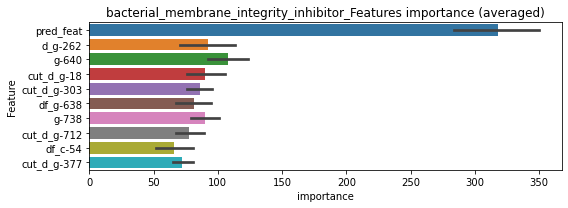

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000263925	valid_1's binary_logloss: 0.00140998
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000241754	valid_1's binary_logloss: 0.000679105
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018388	valid_1's binary_logloss: 0.000165399
[2000]	training's binary_logloss: 0.000154095	valid_1's binary_logloss: 0.000128738
Early stopping, best iteration is:
[2058]	training's binary_logloss: 0.000153246	valid_1's binary_logloss: 0.000127699


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_membrane_integrity_inhibitor logloss: 0.0007630025616990637


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000246408	valid_1's binary_logloss: 0.000829528
neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245708	valid_1's binary_logloss: 0.0177049
[600]	training's binary_logloss: 0.000519977	valid_1's binary_logloss: 0.0127974
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000510462	valid_1's binary_logloss: 0.0127186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026062	valid_1's binary_logloss: 0.00562022
[600]	training's binary_logloss: 0.000537028	valid_1's binary_logloss: 0.00183947
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000478644	valid_1's binary_logloss: 0.00171782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257603	valid_1's binary_logloss: 0.00516363
[600]	training's binary_logloss: 0.000534951	valid_1's binary_logloss: 0.0018246
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000489832	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0042973, Threshold: 0.0268621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01880, conf_1:0.03492
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0268621
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_2: 0.0768621
threshold: 0.0768621, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000793373	valid_1's binary_logloss: 0.00504489
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000566914	valid_1's binary_logloss: 0.00421693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080878	valid_1's binary_logloss: 0.00285879
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000322927	valid_1's binary_logloss: 0.00216609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000835421	valid_1's binary_logloss: 0.00079373
[600]	training's binary_logloss: 0.000204953	valid_1's binary_logloss: 0.000167487
[900]	training's binary_logloss: 0.00016456	valid_1's binary_logloss: 0.000122204
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000163038	valid_1's binary_logloss: 0.000120499
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5229968, Threshold: 0.0768621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0509794 Vs.target_rate: 0.00130
Num_p_label: 203.0, conf_0:0.06149, conf_1:0.09223
Num_p_label: 203.0, Expected: 5.2, Adj_threshold_1: 0.0768621
Num_p_label: 203.0, Expected: 5.2, Adj_threshold_2: 0.1268621
Num_p_label: 202.0, Expected: 5.2, Adj_threshold_3: 0.1768621
Num_p_label: 202.0, Expected: 5.2, Adj_threshold_4: 0.2268621
Num_p_label: 202.0, Expected: 5.2, Adj_threshold_5: 0.2768621
Num_p_label: 202.0, Expected: 5.2, Adj_threshold_6: 0.3268621
Num_p_label: 200.0, Expected: 5.2, Adj_threshold_7: 0.3768621
Num_p_label: 191.0, Expected: 5.2, Adj_threshold_8: 0.4268621
Num_p_label: 174.0, Expected: 5.2, Adj_threshold_9: 0.4768621
Num_p_label: 159.0, Expected: 5.2, Adj_threshold_10: 0.5268621
threshold: 0.5768621, positive_p_label: 136.0/3982, p_label_rate: 0.0341537
positive_y_label: 654.0/3802, y_label_rate: 0.1720147

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806634	valid_1's binary_logloss: 0.00186573
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000286728	valid_1's binary_logloss: 0.00106451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000811805	valid_1's binary_logloss: 0.00224227
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239659	valid_1's binary_logloss: 0.00147735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000815369	valid_1's binary_logloss: 0.00149839
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000213	valid_1's binary_logloss: 0.000858864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800607	valid_1's binary_logloss: 0.00229896


3 / 3 AUC score:1.000
y_Threshold: 0.5023487, Threshold: 0.5768621, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0075339 Vs.target_rate: 0.00130
Num_p_label: 30.0, conf_0:0.50000, conf_1:0.63455
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.5768621
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_2: 0.6268621
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.6768621


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239223	valid_1's binary_logloss: 0.00149112


threshold: 0.6768621, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00029101	valid_1's binary_logloss: 0.00105479
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000376965	valid_1's binary_logloss: 0.00196661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000207891	valid_1's binary_logloss: 0.00055264


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcl_inhibitor logloss: 0.0013819520560981442


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000371558	valid_1's binary_logloss: 0.00192123
neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285
target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289291	valid_1's binary_logloss: 0.0101253
[600]	training's binary_logloss: 0.000621054	valid_1's binary_logloss: 0.00464274
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000542596	valid_1's binary_logloss: 0.00447609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264999	valid_1's binary_logloss: 0.0218155
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000802242	valid_1's binary_logloss: 0.017678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301605	valid_1's binary_logloss: 0.00749584
[600]	training's binary_logloss: 0.00062723	valid_1's binary_logloss: 0.00332749
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.0006007	valid_1's binary_logloss: 0.00323809
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0044627, Threshold: 0.0434626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.03042, conf_1:0.05650
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0434626
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_2: 0.0934626
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_3: 0.1434626
Num_p_label: 9.0, Expected: 6.4, Adj_threshold_4: 0.1934626
threshold: 0.1934626, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000868053	valid_1's binary_logloss: 0.00194614
[600]	training's binary_logloss: 0.000210353	valid_1's binary_logloss: 0.00121916
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000188288	valid_1's binary_logloss: 0.0011829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000818057	valid_1's binary_logloss: 0.00357327
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000268011	valid_1's binary_logloss: 0.00269527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000832452	valid_1's binary_logloss: 0.00482285
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00075299	valid_1's binary_logloss: 0.00472412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00083794	valid_1's binary_logloss: 0.0018063

2 / 3 AUC score:1.000
y_Threshold: 0.6307832, Threshold: 0.1934626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0577599 Vs.target_rate: 0.00160
Num_p_label: 230.0, conf_0:0.15477, conf_1:0.23216
Num_p_label: 230.0, Expected: 6.4, Adj_threshold_1: 0.1934626
Num_p_label: 230.0, Expected: 6.4, Adj_threshold_2: 0.2434626
Num_p_label: 230.0, Expected: 6.4, Adj_threshold_3: 0.2934626
Num_p_label: 229.0, Expected: 6.4, Adj_threshold_4: 0.3434626
Num_p_label: 227.0, Expected: 6.4, Adj_threshold_5: 0.3934626


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000231178	valid_1's binary_logloss: 0.000908738


Num_p_label: 227.0, Expected: 6.4, Adj_threshold_6: 0.4434626
Num_p_label: 227.0, Expected: 6.4, Adj_threshold_7: 0.4934626
Num_p_label: 225.0, Expected: 6.4, Adj_threshold_8: 0.5434626
Num_p_label: 221.0, Expected: 6.4, Adj_threshold_9: 0.5934626
Num_p_label: 215.0, Expected: 6.4, Adj_threshold_10: 0.6434626
threshold: 0.6934626, positive_p_label: 199.0/3982, p_label_rate: 0.0499749
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000895922	valid_1's binary_logloss: 0.00146214
[600]	training's binary_logloss: 0.000214213	valid_1's binary_logloss: 0.00051683
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000177487	valid_1's binary_logloss: 0.000457824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898397	valid_1's binary_logloss: 0.00352005
[600]	training's binary_logloss: 0.000211967	valid_1's binary_logloss: 0.00221
[900]	training's binary_logloss: 0.000169422	valid_1's binary_logloss: 0.00213188
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000168123	valid_1's binary_logloss: 0.00212947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000896928	valid_1's binary_logloss: 0.0045878
[600]	training's binary_logloss: 0.000213639	valid_1's binary_logloss: 0.00322347
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.5907499, Threshold: 0.6934626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.76281
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.6934626
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_2: 0.7434626
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.7934626


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000172234	valid_1's binary_logloss: 0.00282099


threshold: 0.7934626, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205318	valid_1's binary_logloss: 0.00292216
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.000177788	valid_1's binary_logloss: 0.00284604


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000394602	valid_1's binary_logloss: 0.00345888
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207909	valid_1's binary_logloss: 0.00189061
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000198559	valid_1's binary_logloss: 0.00187548


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcr-abl_inhibitor logloss: 0.002630618191491707


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000458973	valid_1's binary_logloss: 0.00233739
neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646984	valid_1's binary_logloss: 0.0490334
[600]	training's binary_logloss: 0.00107152	valid_1's binary_logloss: 0.0349575
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000873126	valid_1's binary_logloss: 0.034747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646348	valid_1's binary_logloss: 0.0316106
[600]	training's binary_logloss: 0.00109754	valid_1's binary_logloss: 0.0188767
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00075661	valid_1's binary_logloss: 0.0174513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702354	valid_1's binary_logloss: 0.0330325
[600]	training's binary_logloss: 0.00114957	valid_1's binary_logloss: 0.0236752
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00121674	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0084455, Threshold: 0.0203415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.01424, conf_1:0.02644
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0203415
Num_p_label: 4.0, Expected: 11.2, Adj_threshold_2: 0.0703415
threshold: 0.0703415, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126151	valid_1's binary_logloss: 0.00760789
[600]	training's binary_logloss: 0.000240893	valid_1's binary_logloss: 0.00622343
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000215032	valid_1's binary_logloss: 0.00615252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130932	valid_1's binary_logloss: 0.00507198
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000309482	valid_1's binary_logloss: 0.00351716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126926	valid_1's binary_logloss: 0.00185036
[600]	training's binary_logloss: 0.000241681	valid_1's binary_logloss: 0.000315405
[900]	training's binary_logloss: 0.000177253	valid_1's binary_logloss: 0.000201543
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000169482	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.4486364, Threshold: 0.0703415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0411853 Vs.target_rate: 0.00281
Num_p_label: 164.0, conf_0:0.05627, conf_1:0.08441
Num_p_label: 164.0, Expected: 11.2, Adj_threshold_1: 0.0703415
Num_p_label: 163.0, Expected: 11.2, Adj_threshold_2: 0.1203415
Num_p_label: 163.0, Expected: 11.2, Adj_threshold_3: 0.1703415
Num_p_label: 162.0, Expected: 11.2, Adj_threshold_4: 0.2203415
Num_p_label: 160.0, Expected: 11.2, Adj_threshold_5: 0.2703415
Num_p_label: 160.0, Expected: 11.2, Adj_threshold_6: 0.3203415
Num_p_label: 160.0, Expected: 11.2, Adj_threshold_7: 0.3703415


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000467895	valid_1's binary_logloss: 0.00412126


Num_p_label: 156.0, Expected: 11.2, Adj_threshold_8: 0.4203415
Num_p_label: 150.0, Expected: 11.2, Adj_threshold_9: 0.4703415
Num_p_label: 132.0, Expected: 11.2, Adj_threshold_10: 0.5203415
threshold: 0.5703415, positive_p_label: 111.0/3982, p_label_rate: 0.0278754
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124614	valid_1's binary_logloss: 0.00510124
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000297006	valid_1's binary_logloss: 0.00349126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012237	valid_1's binary_logloss: 0.00498755
[600]	training's binary_logloss: 0.000234707	valid_1's binary_logloss: 0.00329138
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000176283	valid_1's binary_logloss: 0.00315518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129212	valid_1's binary_logloss: 0.00194613
[600]	training's binary_logloss: 0.000240968	valid_1's binary_logloss: 0.000477835
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000180029	valid_1's binary_logloss: 0.000387816
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.2208633, Threshold: 0.5703415, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000296005	valid_1's binary_logloss: 0.00461997


Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0010045 Vs.target_rate: 0.00281
Num_p_label: 4.0, conf_0:0.50000, conf_1:0.62738
Num_p_label: 4.0, Expected: 11.2, Adj_threshold_1: 0.5703415
Num_p_label: 5.0, Expected: 11.2, Adj_threshold_2: 0.5503415
Num_p_label: 8.0, Expected: 11.2, Adj_threshold_3: 0.5303415
threshold: 0.5303415, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208331	valid_1's binary_logloss: 0.000688273
Early stopping, best iteration is:
[1699]	training's binary_logloss: 0.000171434	valid_1's binary_logloss: 0.000612065


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.000438571	valid_1's binary_logloss: 0.00584852
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000438351	valid_1's binary_logloss: 0.00650772
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209279	valid_1's binary_logloss: 0.000481873
Early stopping, best iteration is:
[1830]	training's binary_logloss: 0.00016863	valid_1's binary_logloss: 0.0004151


benzodiazepine_receptor_agonist logloss: 0.003346174352603061


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206355	valid_1's binary_logloss: 0.00435042
[600]	training's binary_logloss: 0.000461367	valid_1's binary_logloss: 0.00157989
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000460601	valid_1's binary_logloss: 0.00157735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197516	valid_1's binary_logloss: 0.008566
[600]	training's binary_logloss: 0.000454407	valid_1's binary_logloss: 0.00511955
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000454407	valid_1's binary_logloss: 0.00511955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199057	valid_1's binary_logloss: 0.00410857
[600]	training's binary_logloss: 0.000460598	valid_1's binary_logloss: 0.00136022
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000448264	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025104, Threshold: 0.0085873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00601, conf_1:0.01116
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0085873
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0585873
threshold: 0.0585873, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000733371	valid_1's binary_logloss: 0.00201451
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000349282	valid_1's binary_logloss: 0.00152735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699761	valid_1's binary_logloss: 0.00147131
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000204496	valid_1's binary_logloss: 0.00072736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000721453	valid_1's binary_logloss: 0.00180766
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000271271	valid_1's binary_logloss: 0.00137878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000692066	valid_1's binary_logloss: 0.00168895


2 / 3 AUC score:1.000
y_Threshold: 0.6339715, Threshold: 0.0585873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0467102 Vs.target_rate: 0.00101
Num_p_label: 186.0, conf_0:0.04687, conf_1:0.07030
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_1: 0.0585873
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_2: 0.1085873
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_3: 0.1585873
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_4: 0.2085873
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_5: 0.2585873


[600]	training's binary_logloss: 0.000187485	valid_1's binary_logloss: 0.000828547
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000194816	valid_1's binary_logloss: 0.000824057


Num_p_label: 186.0, Expected: 4.0, Adj_threshold_6: 0.3085873
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_7: 0.3585873
Num_p_label: 179.0, Expected: 4.0, Adj_threshold_8: 0.4085873
Num_p_label: 167.0, Expected: 4.0, Adj_threshold_9: 0.4585873
Num_p_label: 140.0, Expected: 4.0, Adj_threshold_10: 0.5085873
threshold: 0.5585873, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000727725	valid_1's binary_logloss: 0.00706557
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.000746053	valid_1's binary_logloss: 0.00698282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698697	valid_1's binary_logloss: 0.00155819
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00019776	valid_1's binary_logloss: 0.000841669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713127	valid_1's binary_logloss: 0.0017542
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000275115	valid_1's binary_logloss: 0.00137604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000704055	valid_1's binary_logloss: 0.0016367


3 / 3 AUC score:1.000
y_Threshold: 0.6346995, Threshold: 0.5585873, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0236062 Vs.target_rate: 0.00101
Num_p_label: 94.0, conf_0:0.50000, conf_1:0.61445
Num_p_label: 94.0, Expected: 4.0, Adj_threshold_1: 0.5585873
Num_p_label: 63.0, Expected: 4.0, Adj_threshold_2: 0.6085873
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_3: 0.6585873
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_4: 0.7085873


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000205943	valid_1's binary_logloss: 0.000886848


Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.7585873
threshold: 0.7585873, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


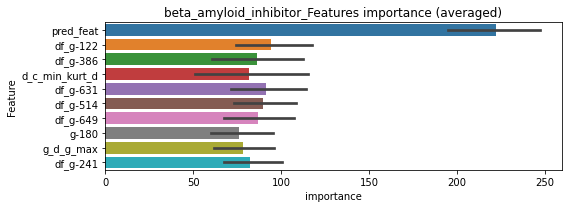

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[106]	training's binary_logloss: 0.00243824	valid_1's binary_logloss: 0.0319576
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000496386	valid_1's binary_logloss: 0.00181939
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000259537	valid_1's binary_logloss: 0.00155835
Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.009048836538159959


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000254639	valid_1's binary_logloss: 0.000851755
neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281
target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00634608	valid_1's binary_logloss: 0.0564936
[600]	training's binary_logloss: 0.00110186	valid_1's binary_logloss: 0.0443816
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000953717	valid_1's binary_logloss: 0.0435846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671799	valid_1's binary_logloss: 0.0362297
[600]	training's binary_logloss: 0.00113527	valid_1's binary_logloss: 0.0240722
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000814692	valid_1's binary_logloss: 0.0233461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744676	valid_1's binary_logloss: 0.0208951
[600]	training's binary_logloss: 0.0012039	valid_1's binary_logloss: 0.00848638
[900]	training's binary_logloss: 0.000717915	valid_1's binary_logloss: 0.00698216
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0075919, Threshold: 0.0215523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, conf_0:0.01509, conf_1:0.02802
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0215523
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_2: 0.0715523
threshold: 0.0715523, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123074	valid_1's binary_logloss: 0.0072271
[600]	training's binary_logloss: 0.000235601	valid_1's binary_logloss: 0.00545264
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00019954	valid_1's binary_logloss: 0.00532568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012499	valid_1's binary_logloss: 0.00476953
[600]	training's binary_logloss: 0.00023212	valid_1's binary_logloss: 0.0034634
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000216122	valid_1's binary_logloss: 0.00343036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135103	valid_1's binary_logloss: 0.00169634
[600]	training's binary_logloss: 0.000241496	valid_1's binary_logloss: 0.000264073
[900]	training's binary_logloss: 0.000171874	valid_1's binary_logloss: 0.000164031
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.6125338, Threshold: 0.0715523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0452034 Vs.target_rate: 0.00286
Num_p_label: 180.0, conf_0:0.05724, conf_1:0.08586
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_1: 0.0715523
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_2: 0.1215523
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_3: 0.1715523
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_4: 0.2215523
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_5: 0.2715523
Num_p_label: 180.0, Expected: 11.4, Adj_threshold_6: 0.3215523
Num_p_label: 179.0, Expected: 11.4, Adj_threshold_7: 0.3715523
Num_p_label: 179.0, Expected: 11.4, Adj_threshold_8: 0.4215523
Num_p_label: 179.0, Expected: 11.4, Adj_threshold_9: 0.4715523
Num_p_label: 177.0, Expected: 11.4, Adj_threshold_10: 0.5215523
threshold: 0.5715523, positive_p_label: 177.0/3982, p_label_rate: 0.0444500
positive_y_label: 654.0/3801, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130652	valid_1's binary_logloss: 0.00433896
[600]	training's binary_logloss: 0.000246272	valid_1's binary_logloss: 0.00275494
[900]	training's binary_logloss: 0.000179306	valid_1's binary_logloss: 0.00263961
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000172346	valid_1's binary_logloss: 0.00262249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133476	valid_1's binary_logloss: 0.00368377
[600]	training's binary_logloss: 0.000247054	valid_1's binary_logloss: 0.0020029
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000220662	valid_1's binary_logloss: 0.00195217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129772	valid_1's binary_logloss: 0.00592949
[600]	training's binary_logloss: 0.000241209	valid_1's binary_logloss: 0.00413364
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.5846334, Threshold: 0.5715523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0281266 Vs.target_rate: 0.00286
Num_p_label: 112.0, conf_0:0.50000, conf_1:0.62871
Num_p_label: 112.0, Expected: 11.4, Adj_threshold_1: 0.5715523
Num_p_label: 92.0, Expected: 11.4, Adj_threshold_2: 0.6215523


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00034389	valid_1's binary_logloss: 0.00451046


Num_p_label: 72.0, Expected: 11.4, Adj_threshold_3: 0.6715523
Num_p_label: 55.0, Expected: 11.4, Adj_threshold_4: 0.7215523
Num_p_label: 49.0, Expected: 11.4, Adj_threshold_5: 0.7715523
threshold: 0.7715523, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.00023967	valid_1's binary_logloss: 0.0023001


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.000483718	valid_1's binary_logloss: 0.00598053
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217313	valid_1's binary_logloss: 0.00177386
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000211012	valid_1's binary_logloss: 0.00176169


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000221545	valid_1's binary_logloss: 0.00133296
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.000183418	valid_1's binary_logloss: 0.00125602


bromodomain_inhibitor logloss: 0.0028254113055509213


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259659	valid_1's binary_logloss: 0.00779644
[600]	training's binary_logloss: 0.00054596	valid_1's binary_logloss: 0.00343759
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000486895	valid_1's binary_logloss: 0.00325547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259275	valid_1's binary_logloss: 0.01112
[600]	training's binary_logloss: 0.000538229	valid_1's binary_logloss: 0.0056059
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000474162	valid_1's binary_logloss: 0.00545428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270161	valid_1's binary_logloss: 0.00585689
[600]	training's binary_logloss: 0.000546532	valid_1's binary_logloss: 0.00183845
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000478635	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0031122, Threshold: 0.0143448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.01004, conf_1:0.01865
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0143448
Num_p_label: 6.0, Expected: 4.8, Adj_threshold_2: 0.0643448
threshold: 0.0643448, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000828336	valid_1's binary_logloss: 0.00159773
[600]	training's binary_logloss: 0.000202431	valid_1's binary_logloss: 0.00075123
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000168222	valid_1's binary_logloss: 0.000678616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813154	valid_1's binary_logloss: 0.00242621
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00022152	valid_1's binary_logloss: 0.00151372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798615	valid_1's binary_logloss: 0.00322445
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000286335	valid_1's binary_logloss: 0.00250126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833119	valid_1's binary_logloss: 0.0015

2 / 3 AUC score:1.000
y_Threshold: 0.8013550, Threshold: 0.0643448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0459568 Vs.target_rate: 0.00122
Num_p_label: 183.0, conf_0:0.05148, conf_1:0.07721
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_1: 0.0643448
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_2: 0.1143448


Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000157569	valid_1's binary_logloss: 0.000811068


Num_p_label: 183.0, Expected: 4.8, Adj_threshold_3: 0.1643448
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_4: 0.2143448
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_5: 0.2643448
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_6: 0.3143448
Num_p_label: 183.0, Expected: 4.8, Adj_threshold_7: 0.3643448
Num_p_label: 179.0, Expected: 4.8, Adj_threshold_8: 0.4143448
Num_p_label: 177.0, Expected: 4.8, Adj_threshold_9: 0.4643448
Num_p_label: 165.0, Expected: 4.8, Adj_threshold_10: 0.5143448
threshold: 0.5643448, positive_p_label: 146.0/3982, p_label_rate: 0.0366650
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765096	valid_1's binary_logloss: 0.00427665
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000514095	valid_1's binary_logloss: 0.00386954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848057	valid_1's binary_logloss: 0.00147135
[600]	training's binary_logloss: 0.000202523	valid_1's binary_logloss: 0.000791548
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000172375	valid_1's binary_logloss: 0.000731958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000861047	valid_1's binary_logloss: 0.00109269
[600]	training's binary_logloss: 0.000204827	valid_1's binary_logloss: 0.000348026
[900]	training's binary_logloss: 0.000162028	valid_1's binary_logloss: 0.000296286
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000160037	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.4618560, Threshold: 0.5643448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000343764	valid_1's binary_logloss: 0.00236379


p_label_rate: 0.0170768 Vs.target_rate: 0.00122
Num_p_label: 68.0, conf_0:0.50000, conf_1:0.62078
Num_p_label: 68.0, Expected: 4.8, Adj_threshold_1: 0.5643448
Num_p_label: 41.0, Expected: 4.8, Adj_threshold_2: 0.6143448
Num_p_label: 27.0, Expected: 4.8, Adj_threshold_3: 0.6643448
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_4: 0.7143448
Num_p_label: 4.0, Expected: 4.8, Adj_threshold_5: 0.7643448
threshold: 0.7643448, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


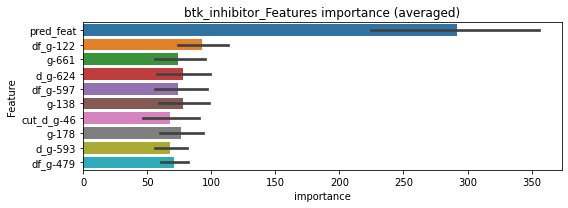

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000561924	valid_1's binary_logloss: 0.00241864
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204966	valid_1's binary_logloss: 0.000602401
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000174837	valid_1's binary_logloss: 0.000561408


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 btk_inhibitor=================================


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000333076	valid_1's binary_logloss: 0.00144434
Training until validation scores don't improve for 30 rounds


btk_inhibitor logloss: 0.0017228526771498288


Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000210551	valid_1's binary_logloss: 0.00246032
neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000722657	valid_1's binary_logloss: 0.0018501
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000286495	valid_1's binary_logloss: 0.00104366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000708052	valid_1's binary_logloss: 0.0019263
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000281677	valid_1's binary_logloss: 0.00117905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00074347	valid_1's binary_logloss: 0.00108874
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000284746	valid_1's binary_logloss: 0.000457974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000724384	valid_1's binary_logloss: 0.00171247
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000292936

1 / 3 AUC score:1.000
y_Threshold: 0.0013631, Threshold: 0.0191122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01338, conf_1:0.02485
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0191122
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.0691122
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.1191122
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1691122
threshold: 0.1691122, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404853	valid_1's binary_logloss: 0.00111043
[600]	training's binary_logloss: 0.000160537	valid_1's binary_logloss: 0.000801337
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000142847	valid_1's binary_logloss: 0.000781657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393918	valid_1's binary_logloss: 0.000949542
[600]	training's binary_logloss: 0.00015796	valid_1's binary_logloss: 0.000667505
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000139159	valid_1's binary_logloss: 0.000646333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404629	valid_1's binary_logloss: 0.000386818
[600]	training's binary_logloss: 0.000159111	valid_1's binary_logloss: 0.000134676
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000142462	valid

2 / 3 AUC score:1.000
y_Threshold: 0.4611047, Threshold: 0.1691122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0529884 Vs.target_rate: 0.00050
Num_p_label: 211.0, conf_0:0.13529, conf_1:0.20293
Num_p_label: 211.0, Expected: 2.0, Adj_threshold_1: 0.1691122
Num_p_label: 201.0, Expected: 2.0, Adj_threshold_2: 0.2191122
Num_p_label: 176.0, Expected: 2.0, Adj_threshold_3: 0.2691122
Num_p_label: 151.0, Expected: 2.0, Adj_threshold_4: 0.3191122
Num_p_label: 132.0, Expected: 2.0, Adj_threshold_5: 0.3691122
Num_p_label: 118.0, Expected: 2.0, Adj_threshold_6: 0.4191122
Num_p_label: 100.0, Expected: 2.0, Adj_threshold_7: 0.4691122
Num_p_label: 90.0, Expected: 2.0, Adj_threshold_8: 0.5191122
Num_p_label: 77.0, Expected: 2.0, Adj_threshold_9: 0.5691122
Num_p_label: 69.0, Expected: 2.0, Adj_threshold_10: 0.6191122


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000204795	valid_1's binary_logloss: 0.00105521


threshold: 0.6691122, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404915	valid_1's binary_logloss: 0.00112058
[600]	training's binary_logloss: 0.000161653	valid_1's binary_logloss: 0.000808097
[900]	training's binary_logloss: 0.000143346	valid_1's binary_logloss: 0.000788066
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000143346	valid_1's binary_logloss: 0.000788066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392459	valid_1's binary_logloss: 0.000643171
[600]	training's binary_logloss: 0.000157431	valid_1's binary_logloss: 0.000386144
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000139971	valid_1's binary_logloss: 0.00036519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404962	valid_1's binary_logloss: 0.000385984
[600]	training's binary_logloss: 0.000156955	valid_1's binary_logloss: 0.000132761
Ea

3 / 3 AUC score:1.000
y_Threshold: 0.4590073, Threshold: 0.6691122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0163235 Vs.target_rate: 0.00050
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.73602
Num_p_label: 65.0, Expected: 2.0, Adj_threshold_1: 0.6691122
Num_p_label: 55.0, Expected: 2.0, Adj_threshold_2: 0.7191122
Num_p_label: 46.0, Expected: 2.0, Adj_threshold_3: 0.7691122
threshold: 0.7691122, positive_p_label: 46.0/3982, p_label_rate: 0.0115520


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000203871	valid_1's binary_logloss: 0.00108584


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


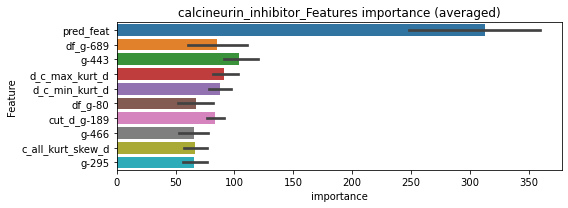

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173593	valid_1's binary_logloss: 0.000518266


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[1617]	training's binary_logloss: 0.000153495	valid_1's binary_logloss: 0.000495657
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000180943	valid_1's binary_logloss: 0.000417492
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170042	valid_1's binary_logloss: 0.000147031
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.000145666	valid_1's binary_logloss: 0.000118267


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166405	valid_1's binary_logloss: 0.000600143


calcineurin_inhibitor logloss: 0.0004069287454558848


Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000161135	valid_1's binary_logloss: 0.000593379
neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246
target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039485	valid_1's binary_logloss: 0.259449
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0248197	valid_1's binary_logloss: 0.255284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0400012	valid_1's binary_logloss: 0.267434
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0311037	valid_1's binary_logloss: 0.266184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.041691	valid_1's binary_logloss: 0.240554
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.0294525	valid_1's binary_logloss: 0.238025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407945	valid_1's binary_logloss: 0.227428
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.0151223	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.902
y_Threshold: 0.0826603, Threshold: 0.2768068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 434 → Positive_corect_labels: 497/3461
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, conf_0:0.19376, conf_1:0.35985
threshold: 0.2768068, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 497.0/3461, y_label_rate: 0.1436001
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182124	valid_1's binary_logloss: 0.00838216
[600]	training's binary_logloss: 0.000281419	valid_1's binary_logloss: 0.00434195
[900]	training's binary_logloss: 0.000183757	valid_1's binary_logloss: 0.00399324
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00018469	valid_1's binary_logloss: 0.00398953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189468	valid_1's binary_logloss: 0.00577431
[600]	training's binary_logloss: 0.000288434	valid_1's binary_logloss: 0.00130995
[900]	training's binary_logloss: 0.000189429	valid_1's binary_logloss: 0.000910844
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000189771	valid_1's binary_logloss: 0.000910752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191072	valid_1's binary_logloss: 0.00639738
[600]	train

2 / 3 AUC score:1.000
y_Threshold: 0.1963217, Threshold: 0.2768068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 495.0/3457
p_label_rate: 0.0976896 Vs.target_rate: 0.01180
Num_p_label: 389.0, conf_0:0.22145, conf_1:0.33217
Num_p_label: 389.0, Expected: 47.0, Adj_threshold_1: 0.2768068


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000318319	valid_1's binary_logloss: 0.00476885


Num_p_label: 388.0, Expected: 47.0, Adj_threshold_2: 0.3268068
Num_p_label: 386.0, Expected: 47.0, Adj_threshold_3: 0.3768068
Num_p_label: 385.0, Expected: 47.0, Adj_threshold_4: 0.4268068
Num_p_label: 385.0, Expected: 47.0, Adj_threshold_5: 0.4768068
Num_p_label: 385.0, Expected: 47.0, Adj_threshold_6: 0.5268068
Num_p_label: 385.0, Expected: 47.0, Adj_threshold_7: 0.5768068
Num_p_label: 385.0, Expected: 47.0, Adj_threshold_8: 0.6268068
Num_p_label: 383.0, Expected: 47.0, Adj_threshold_9: 0.6768068
Num_p_label: 383.0, Expected: 47.0, Adj_threshold_10: 0.7268068
threshold: 0.7768068, positive_p_label: 382.0/3982, p_label_rate: 0.0959317
positive_y_label: 495.0/3457, y_label_rate: 0.1431877
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173044	valid_1's binary_logloss: 0.00506556
[600]	training's binary_logloss: 0.000260732	valid_1's binary_logloss: 0.000992817
[900]	training's binary_logloss: 0.000173933	valid_1's binary_logloss: 0.000674465
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000170468	valid_1's binary_logloss: 0.000660091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179048	valid_1's binary_logloss: 0.0048498
[600]	training's binary_logloss: 0.000263344	valid_1's binary_logloss: 0.00110065
[900]	training's binary_logloss: 0.000176652	valid_1's binary_logloss: 0.000850889
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000167014	valid_1's binary_logloss: 0.000818216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184207	valid_1's binary_logloss: 0.00927399
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.1005746, Threshold: 0.7768068, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000174953	valid_1's binary_logloss: 0.000360985


Remove_noisy_data: 4 → Positive_corect_labels: 493.0/3453
p_label_rate: 0.0944249 Vs.target_rate: 0.01180
Num_p_label: 376.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 376.0, Expected: 47.0, Adj_threshold_1: 0.7768068
threshold: 0.7768068, positive_p_label: 376.0/3982, p_label_rate: 0.0944249
positive_y_label: 493.0/3453, y_label_rate: 0.1427744


len(train_index) : 2589
len(valid_index) : 864
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217798	valid_1's binary_logloss: 0.00436657
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.00021872	valid_1's binary_logloss: 0.00436368


len(train_index) : 2590
len(valid_index) : 863
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00016468	valid_1's binary_logloss: 0.000499168
[2000]	training's binary_logloss: 0.000121671	valid_1's binary_logloss: 0.000369848
[3000]	training's binary_logloss: 0.000113007	valid_1's binary_logloss: 0.000343214
Early stopping, best iteration is:
[3694]	training's binary_logloss: 0.000110959	valid_1's binary_logloss: 0.000336646


len(train_index) : 2590
len(valid_index) : 863
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164694	valid_1's binary_logloss: 0.000579018
[2000]	training's binary_logloss: 0.000121666	valid_1's binary_logloss: 0.000429108
[3000]	training's binary_logloss: 0.000112883	valid_1's binary_logloss: 0.000397912
Early stopping, best iteration is:
[3192]	training's binary_logloss: 0.000112099	valid_1's binary_logloss: 0.00039484


len(train_index) : 2590
len(valid_index) : 863
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164451	valid_1's binary_logloss: 0.000472925
[2000]	training's binary_logloss: 0.000121576	valid_1's binary_logloss: 0.000350705
[3000]	training's binary_logloss: 0.000112866	valid_1's binary_logloss: 0.000325431
Early stopping, best iteration is:
[3201]	training's binary_logloss: 0.000112006	valid_1's binary_logloss: 0.000322646


calcium_channel_blocker logloss: 0.0013554952181433508


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336032	valid_1's binary_logloss: 0.0276865
[600]	training's binary_logloss: 0.000664268	valid_1's binary_logloss: 0.0198172
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557431	valid_1's binary_logloss: 0.0192609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366491	valid_1's binary_logloss: 0.0147854
[600]	training's binary_logloss: 0.000701051	valid_1's binary_logloss: 0.00896714
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000743949	valid_1's binary_logloss: 0.00891705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368317	valid_1's binary_logloss: 0.00901621
[600]	training's binary_logloss: 0.000711617	valid_1's binary_logloss: 0.00363975
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00056749	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0051235, Threshold: 0.0257312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01801, conf_1:0.03345
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0257312
Num_p_label: 9.0, Expected: 7.0, Adj_threshold_2: 0.0757312
threshold: 0.0757312, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914881	valid_1's binary_logloss: 0.00380458
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000237786	valid_1's binary_logloss: 0.00253355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0009586	valid_1's binary_logloss: 0.00471884
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000402174	valid_1's binary_logloss: 0.00388578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000982538	valid_1's binary_logloss: 0.00210472
[600]	training's binary_logloss: 0.000215015	valid_1's binary_logloss: 0.00122667
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000191954	valid_1's binary_logloss: 0.00117319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000957657	valid_1's binary_logloss: 0.001685

2 / 3 AUC score:1.000
y_Threshold: 0.5871847, Threshold: 0.0757312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0688096 Vs.target_rate: 0.00176
Num_p_label: 274.0, conf_0:0.06058, conf_1:0.09088
Num_p_label: 274.0, Expected: 7.0, Adj_threshold_1: 0.0757312
Num_p_label: 271.0, Expected: 7.0, Adj_threshold_2: 0.1257312
Num_p_label: 269.0, Expected: 7.0, Adj_threshold_3: 0.1757312
Num_p_label: 269.0, Expected: 7.0, Adj_threshold_4: 0.2257312
Num_p_label: 267.0, Expected: 7.0, Adj_threshold_5: 0.2757312
Num_p_label: 264.0, Expected: 7.0, Adj_threshold_6: 0.3257312
Num_p_label: 263.0, Expected: 7.0, Adj_threshold_7: 0.3757312
Num_p_label: 261.0, Expected: 7.0, Adj_threshold_8: 0.4257312
Num_p_label: 251.0, Expected: 7.0, Adj_threshold_9: 0.4757312
Num_p_label: 242.0, Expected: 7.0, Adj_threshold_10: 0.5257312
threshold: 0.5757312, positive_p_label: 215.0/3982, p_label_rate: 0.0539930
positive_y_label: 655.0/3803, y_label_rate: 0.1722324

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00094933	valid_1's binary_logloss: 0.00425362
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000499002	valid_1's binary_logloss: 0.00364804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000958934	valid_1's binary_logloss: 0.00239765
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000279461	valid_1's binary_logloss: 0.00168684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000973229	valid_1's binary_logloss: 0.00165535
[600]	training's binary_logloss: 0.000219256	valid_1's binary_logloss: 0.000591582
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00017476	valid_1's binary_logloss: 0.000540764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000962279	valid_1's binary_logloss: 0.0045

3 / 3 AUC score:1.000
y_Threshold: 0.6391693, Threshold: 0.5757312, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0336514 Vs.target_rate: 0.00176
Num_p_label: 134.0, conf_0:0.50000, conf_1:0.63330
Num_p_label: 134.0, Expected: 7.0, Adj_threshold_1: 0.5757312
Num_p_label: 89.0, Expected: 7.0, Adj_threshold_2: 0.6257312
Num_p_label: 62.0, Expected: 7.0, Adj_threshold_3: 0.6757312
Num_p_label: 35.0, Expected: 7.0, Adj_threshold_4: 0.7257312


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000412098	valid_1's binary_logloss: 0.00387326


Num_p_label: 23.0, Expected: 7.0, Adj_threshold_5: 0.7757312
threshold: 0.7757312, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00021167	valid_1's binary_logloss: 0.00127847
Early stopping, best iteration is:
[1606]	training's binary_logloss: 0.000181073	valid_1's binary_logloss: 0.00122359


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000243378	valid_1's binary_logloss: 0.00242829
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212144	valid_1's binary_logloss: 0.00333629
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000198231	valid_1's binary_logloss: 0.00330526


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213511	valid_1's binary_logloss: 0.000577905
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000211089	valid_1's binary_logloss: 0.000575824


cannabinoid_receptor_agonist logloss: 0.0018853490776328968


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438713	valid_1's binary_logloss: 0.0380889
[600]	training's binary_logloss: 0.000831098	valid_1's binary_logloss: 0.0309962
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000785245	valid_1's binary_logloss: 0.0308326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444236	valid_1's binary_logloss: 0.0320002
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00118794	valid_1's binary_logloss: 0.0236229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481331	valid_1's binary_logloss: 0.0167397
[600]	training's binary_logloss: 0.000908202	valid_1's binary_logloss: 0.0102064
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00064488	valid_1's binary_logloss: 0.00946728
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0062367, Threshold: 0.0242177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01695, conf_1:0.03148
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0242177
Num_p_label: 8.0, Expected: 9.2, Adj_threshold_2: 0.0742177
threshold: 0.0742177, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103472	valid_1's binary_logloss: 0.00551252
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000261011	valid_1's binary_logloss: 0.00408365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106728	valid_1's binary_logloss: 0.00359907
[600]	training's binary_logloss: 0.00022572	valid_1's binary_logloss: 0.00234492
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000220884	valid_1's binary_logloss: 0.0023276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107436	valid_1's binary_logloss: 0.00181294
[600]	training's binary_logloss: 0.000223182	valid_1's binary_logloss: 0.00050258
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000176194	valid_1's binary_logloss: 0.000390259
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.4963186, Threshold: 0.0742177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0499749 Vs.target_rate: 0.00231
Num_p_label: 199.0, conf_0:0.05937, conf_1:0.08906
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_1: 0.0742177
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_2: 0.1242177
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_3: 0.1742177
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_4: 0.2242177
Num_p_label: 199.0, Expected: 9.2, Adj_threshold_5: 0.2742177
Num_p_label: 197.0, Expected: 9.2, Adj_threshold_6: 0.3242177
Num_p_label: 194.0, Expected: 9.2, Adj_threshold_7: 0.3742177
Num_p_label: 189.0, Expected: 9.2, Adj_threshold_8: 0.4242177
Num_p_label: 173.0, Expected: 9.2, Adj_threshold_9: 0.4742177
Num_p_label: 144.0, Expected: 9.2, Adj_threshold_10: 0.5242177
threshold: 0.5742177, positive_p_label: 114.0/3982, p_label_rate: 0.0286288
positive_y_label: 653.0/3798, y_label_rate: 0.1719326

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106369	valid_1's binary_logloss: 0.00411802
[600]	training's binary_logloss: 0.000226408	valid_1's binary_logloss: 0.00271618
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000180838	valid_1's binary_logloss: 0.00262519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105639	valid_1's binary_logloss: 0.00386639
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000347707	valid_1's binary_logloss: 0.0024731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101137	valid_1's binary_logloss: 0.00357255
[600]	training's binary_logloss: 0.000219909	valid_1's binary_logloss: 0.00202063
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00021459	valid_1's binary_logloss: 0.0019915
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.4819130, Threshold: 0.5742177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, conf_0:0.50000, conf_1:0.63164
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_1: 0.5742177
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_2: 0.6242177
threshold: 0.6242177, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


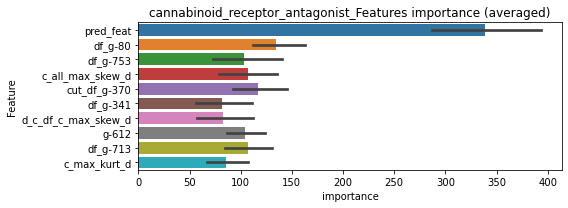

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00033938	valid_1's binary_logloss: 0.00752297
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000303854	valid_1's binary_logloss: 0.00118137


================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000227066	valid_1's binary_logloss: 0.000732316


len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000231779	valid_1's binary_logloss: 0.00212468


cannabinoid_receptor_antagonist logloss: 0.0028934669436381437


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419668	valid_1's binary_logloss: 0.0166835
[600]	training's binary_logloss: 0.000705333	valid_1's binary_logloss: 0.00650466
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000564781	valid_1's binary_logloss: 0.00588485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414543	valid_1's binary_logloss: 0.0127556
[600]	training's binary_logloss: 0.00070234	valid_1's binary_logloss: 0.00553886
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000567509	valid_1's binary_logloss: 0.00517089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040904	valid_1's binary_logloss: 0.00906779
[600]	training's binary_logloss: 0.000705613	valid_1's binary_logloss: 0.00276066
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000562855	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0048681, Threshold: 0.0787778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.05514, conf_1:0.10241
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0787778
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1287778
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_3: 0.1787778
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.2287778
threshold: 0.2287778, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000984049	valid_1's binary_logloss: 0.00268848
[600]	training's binary_logloss: 0.000214562	valid_1's binary_logloss: 0.00159338
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000185374	valid_1's binary_logloss: 0.00155683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100221	valid_1's binary_logloss: 0.00238799
[600]	training's binary_logloss: 0.000216194	valid_1's binary_logloss: 0.00150814
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000215347	valid_1's binary_logloss: 0.00150656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101945	valid_1's binary_logloss: 0.0020944
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000263386	valid_1's binary_logloss: 0.00110203
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.6236120, Threshold: 0.2287778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0630337 Vs.target_rate: 0.00151
Num_p_label: 251.0, conf_0:0.18302, conf_1:0.27453
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_1: 0.2287778
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_2: 0.2787778
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_3: 0.3287778
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_4: 0.3787778
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_5: 0.4287778
Num_p_label: 251.0, Expected: 6.0, Adj_threshold_6: 0.4787778
Num_p_label: 249.0, Expected: 6.0, Adj_threshold_7: 0.5287778
Num_p_label: 244.0, Expected: 6.0, Adj_threshold_8: 0.5787778
Num_p_label: 233.0, Expected: 6.0, Adj_threshold_9: 0.6287778


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000555996	valid_1's binary_logloss: 0.00331917


Num_p_label: 212.0, Expected: 6.0, Adj_threshold_10: 0.6787778
threshold: 0.7287778, positive_p_label: 173.0/3982, p_label_rate: 0.0434455
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000988489	valid_1's binary_logloss: 0.00222508
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000298805	valid_1's binary_logloss: 0.00129973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102746	valid_1's binary_logloss: 0.00120855
[600]	training's binary_logloss: 0.000220813	valid_1's binary_logloss: 0.000220946
[900]	training's binary_logloss: 0.000170896	valid_1's binary_logloss: 0.000150889
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000166347	valid_1's binary_logloss: 0.000145385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101363	valid_1's binary_logloss: 0.00565663
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000407931	valid_1's binary_logloss: 0.00492009
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.6515597, Threshold: 0.7287778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0238574 Vs.target_rate: 0.00151
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 95.0, Expected: 6.0, Adj_threshold_1: 0.7287778
Num_p_label: 62.0, Expected: 6.0, Adj_threshold_2: 0.7787778


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000245432	valid_1's binary_logloss: 0.00324881


threshold: 0.7787778, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


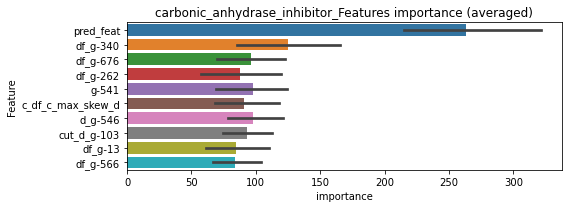

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210694	valid_1's binary_logloss: 0.00112685
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000213145	valid_1's binary_logloss: 0.00112637


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215882	valid_1's binary_logloss: 0.000539322
Early stopping, best iteration is:
[1258]	training's binary_logloss: 0.000201204	valid_1's binary_logloss: 0.000510512


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000422141	valid_1's binary_logloss: 0.00324734
Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.0025189608770148798


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000584523	valid_1's binary_logloss: 0.00518772
neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273971	valid_1's binary_logloss: 0.0143249
[600]	training's binary_logloss: 0.000565859	valid_1's binary_logloss: 0.008301
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00049605	valid_1's binary_logloss: 0.00806251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291428	valid_1's binary_logloss: 0.00805425
[600]	training's binary_logloss: 0.000581618	valid_1's binary_logloss: 0.00289445
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00051496	valid_1's binary_logloss: 0.00272312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295422	valid_1's binary_logloss: 0.00549232
[600]	training's binary_logloss: 0.000588841	valid_1's binary_logloss: 0.0017229
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000518743	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0042022, Threshold: 0.0100399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00703, conf_1:0.01305
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0100399
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0600399
threshold: 0.0600399, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000847298	valid_1's binary_logloss: 0.00228788
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000228435	valid_1's binary_logloss: 0.00113446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000871123	valid_1's binary_logloss: 0.00127325
[600]	training's binary_logloss: 0.000202688	valid_1's binary_logloss: 0.000420307
[900]	training's binary_logloss: 0.000163343	valid_1's binary_logloss: 0.000357422
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000163275	valid_1's binary_logloss: 0.000357241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000849034	valid_1's binary_logloss: 0.00294769
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000271638	valid_1's binary_logloss: 0.00213752
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6522005, Threshold: 0.0600399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0328980 Vs.target_rate: 0.00151
Num_p_label: 131.0, conf_0:0.04803, conf_1:0.07205


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000180342	valid_1's binary_logloss: 0.00236036


Num_p_label: 131.0, Expected: 6.0, Adj_threshold_1: 0.0600399
Num_p_label: 131.0, Expected: 6.0, Adj_threshold_2: 0.1100399
Num_p_label: 131.0, Expected: 6.0, Adj_threshold_3: 0.1600399
Num_p_label: 131.0, Expected: 6.0, Adj_threshold_4: 0.2100399
Num_p_label: 130.0, Expected: 6.0, Adj_threshold_5: 0.2600399
Num_p_label: 130.0, Expected: 6.0, Adj_threshold_6: 0.3100399
Num_p_label: 129.0, Expected: 6.0, Adj_threshold_7: 0.3600399
Num_p_label: 127.0, Expected: 6.0, Adj_threshold_8: 0.4100399
Num_p_label: 121.0, Expected: 6.0, Adj_threshold_9: 0.4600399
Num_p_label: 107.0, Expected: 6.0, Adj_threshold_10: 0.5100399
threshold: 0.5600399, positive_p_label: 93.0/3982, p_label_rate: 0.0233551
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000835583	valid_1's binary_logloss: 0.00229221
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000220409	valid_1's binary_logloss: 0.00116654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000862431	valid_1's binary_logloss: 0.00127197
[600]	training's binary_logloss: 0.000204426	valid_1's binary_logloss: 0.000386756
[900]	training's binary_logloss: 0.000164028	valid_1's binary_logloss: 0.000317419
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000161875	valid_1's binary_logloss: 0.000313842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000868348	valid_1's binary_logloss: 0.00256146
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000384114	valid_1's binary_logloss: 0.0019432
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.5680987, Threshold: 0.5600399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0198393 Vs.target_rate: 0.00151
Num_p_label: 79.0, conf_0:0.50000, conf_1:0.61604
Num_p_label: 79.0, Expected: 6.0, Adj_threshold_1: 0.5600399
Num_p_label: 62.0, Expected: 6.0, Adj_threshold_2: 0.6100399
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_3: 0.6600399
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_4: 0.7100399
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.7600399


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000226269	valid_1's binary_logloss: 0.00292066


threshold: 0.7600399, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000205257	valid_1's binary_logloss: 0.00164958


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202187	valid_1's binary_logloss: 0.000326039
Early stopping, best iteration is:
[1683]	training's binary_logloss: 0.000170898	valid_1's binary_logloss: 0.000281935


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000522805	valid_1's binary_logloss: 0.0021332
Training until validation scores don't improve for 30 rounds


casein_kinase_inhibitor logloss: 0.0016779332106787491


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000217975	valid_1's binary_logloss: 0.00263615
neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106733	valid_1's binary_logloss: 0.00275932
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000358567	valid_1's binary_logloss: 0.00146036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109012	valid_1's binary_logloss: 0.00378262
[600]	training's binary_logloss: 0.00034944	valid_1's binary_logloss: 0.00207345
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00034944	valid_1's binary_logloss: 0.00207345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110135	valid_1's binary_logloss: 0.0020449
[600]	training's binary_logloss: 0.000353314	valid_1's binary_logloss: 0.00087932
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000352041	valid_1's binary_logloss: 0.000875085
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0015722, Threshold: 0.0115336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00807, conf_1:0.01499
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0115336
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0615336
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1115336
threshold: 0.1115336, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000521752	valid_1's binary_logloss: 0.000923733
[600]	training's binary_logloss: 0.000175346	valid_1's binary_logloss: 0.000532818
[900]	training's binary_logloss: 0.000148251	valid_1's binary_logloss: 0.000499279
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000147836	valid_1's binary_logloss: 0.000498855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000496442	valid_1's binary_logloss: 0.000794848
[600]	training's binary_logloss: 0.000167951	valid_1's binary_logloss: 0.000379552
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000162211	valid_1's binary_logloss: 0.000373492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000490504	valid_1's binary_logloss: 0.000578794
[600]	training's binary_logloss: 0.000167371	valid_1's binary_logloss: 0.000217126


2 / 3 AUC score:1.000
y_Threshold: 0.4346056, Threshold: 0.1115336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0665495 Vs.target_rate: 0.00076
Num_p_label: 265.0, conf_0:0.08923, conf_1:0.13384
Num_p_label: 265.0, Expected: 3.0, Adj_threshold_1: 0.1115336
Num_p_label: 260.0, Expected: 3.0, Adj_threshold_2: 0.1615336
Num_p_label: 258.0, Expected: 3.0, Adj_threshold_3: 0.2115336
Num_p_label: 254.0, Expected: 3.0, Adj_threshold_4: 0.2615336
Num_p_label: 241.0, Expected: 3.0, Adj_threshold_5: 0.3115336
Num_p_label: 222.0, Expected: 3.0, Adj_threshold_6: 0.3615336
Num_p_label: 183.0, Expected: 3.0, Adj_threshold_7: 0.4115336
Num_p_label: 149.0, Expected: 3.0, Adj_threshold_8: 0.4615336
Num_p_label: 128.0, Expected: 3.0, Adj_threshold_9: 0.5115336
Num_p_label: 99.0, Expected: 3.0, Adj_threshold_10: 0.5615336
threshold: 0.6115336, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005194	valid_1's binary_logloss: 0.000678068
[600]	training's binary_logloss: 0.000172819	valid_1's binary_logloss: 0.000290162
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000178911	valid_1's binary_logloss: 0.000290153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000498231	valid_1's binary_logloss: 0.000827156
[600]	training's binary_logloss: 0.000169965	valid_1's binary_logloss: 0.000405169
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000159573	valid_1's binary_logloss: 0.000396918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000507975	valid_1's binary_logloss: 0.000587003
[600]	training's binary_logloss: 0.000169784	valid_1's binary_logloss: 0.000223988
[900]	training's binary_logloss: 0.000143287	valid_1's binary_logloss: 0.00019737
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.6302637, Threshold: 0.6115336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0138122 Vs.target_rate: 0.00076
Num_p_label: 55.0, conf_0:0.50000, conf_1:0.67269
Num_p_label: 55.0, Expected: 3.0, Adj_threshold_1: 0.6115336
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_2: 0.6615336
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.7115336
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.7615336
threshold: 0.7615336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00320027	valid_1's binary_logloss: 0.0278643


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000191589	valid_1's binary_logloss: 0.00039827
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000180642	valid_1's binary_logloss: 0.000484355
Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.000165104	valid_1's binary_logloss: 0.000457446


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000180161	valid_1's binary_logloss: 0.000220199
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.000154317	valid_1's binary_logloss: 0.000193524


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


caspase_activator logloss: 0.024878869473565046


Early stopping, best iteration is:
[39]	training's binary_logloss: 0.0201805	valid_1's binary_logloss: 0.0984909
neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125955	valid_1's binary_logloss: 0.00279722
[600]	training's binary_logloss: 0.000369471	valid_1's binary_logloss: 0.0013668
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000369471	valid_1's binary_logloss: 0.0013668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125122	valid_1's binary_logloss: 0.00511487
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000379579	valid_1's binary_logloss: 0.00257587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125813	valid_1's binary_logloss: 0.00231312
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000378685	valid_1's binary_logloss: 0.00107856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126635	valid_1's binary_logloss: 0.00343151


1 / 3 AUC score:1.000
y_Threshold: 0.0018231, Threshold: 0.0073107, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000384355	valid_1's binary_logloss: 0.00148845


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00512, conf_1:0.00950
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0073107
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0573107
threshold: 0.0573107, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577223	valid_1's binary_logloss: 0.00129599
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000291757	valid_1's binary_logloss: 0.000964167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000575363	valid_1's binary_logloss: 0.00148372
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000299153	valid_1's binary_logloss: 0.00107032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057144	valid_1's binary_logloss: 0.000600237
[600]	training's binary_logloss: 0.00017798	valid_1's binary_logloss: 0.000179437
[900]	training's binary_logloss: 0.000147672	valid_1's binary_logloss: 0.000144312
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000146727	valid_1's binary_logloss: 0.000142835
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.5690336, Threshold: 0.0573107, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0703164 Vs.target_rate: 0.00076
Num_p_label: 280.0, conf_0:0.04585, conf_1:0.06877
Num_p_label: 280.0, Expected: 3.0, Adj_threshold_1: 0.0573107
Num_p_label: 278.0, Expected: 3.0, Adj_threshold_2: 0.1073107
Num_p_label: 270.0, Expected: 3.0, Adj_threshold_3: 0.1573107
Num_p_label: 266.0, Expected: 3.0, Adj_threshold_4: 0.2073107
Num_p_label: 259.0, Expected: 3.0, Adj_threshold_5: 0.2573107
Num_p_label: 249.0, Expected: 3.0, Adj_threshold_6: 0.3073107
Num_p_label: 216.0, Expected: 3.0, Adj_threshold_7: 0.3573107
Num_p_label: 190.0, Expected: 3.0, Adj_threshold_8: 0.4073107
Num_p_label: 148.0, Expected: 3.0, Adj_threshold_9: 0.4573107
Num_p_label: 106.0, Expected: 3.0, Adj_threshold_10: 0.5073107
threshold: 0.5573107, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000587068	valid_1's binary_logloss: 0.000984268
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000217546	valid_1's binary_logloss: 0.000562541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000558399	valid_1's binary_logloss: 0.00136086
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000328745	valid_1's binary_logloss: 0.0011057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566956	valid_1's binary_logloss: 0.000572195
[600]	training's binary_logloss: 0.000175542	valid_1's binary_logloss: 0.000154626
[900]	training's binary_logloss: 0.000145252	valid_1's binary_logloss: 0.00011811
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000144914	valid_1's binary_logloss: 0.000117695
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.5474617, Threshold: 0.5573107, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0130588 Vs.target_rate: 0.00076
Num_p_label: 52.0, conf_0:0.50000, conf_1:0.61304
Num_p_label: 52.0, Expected: 3.0, Adj_threshold_1: 0.5573107
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_2: 0.6073107
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.6573107
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.7073107
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.7573107
threshold: 0.7573107, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


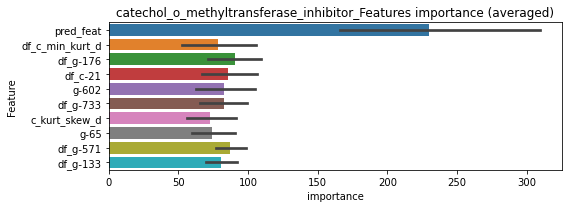

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019144	valid_1's binary_logloss: 0.000175866
[2000]	training's binary_logloss: 0.00015857	valid_1's binary_logloss: 0.000134901
Early stopping, best iteration is:
[2156]	training's binary_logloss: 0.000156833	valid_1's binary_logloss: 0.000132733


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00023452	valid_1's binary_logloss: 0.00127213
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000182801	valid_1's binary_logloss: 0.000171633
[2000]	training's binary_logloss: 0.00015083	valid_1's binary_logloss: 0.000131219
Early stopping, best iteration is:
[2146]	training's binary_logloss: 0.000148906	valid_1's binary_logloss: 0.000128759


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


catechol_o_methyltransferase_inhibitor logloss: 0.0012489841181330937


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000288478	valid_1's binary_logloss: 0.00342987
neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276
target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100786	valid_1's binary_logloss: 0.0913868
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00212948	valid_1's binary_logloss: 0.0825694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113909	valid_1's binary_logloss: 0.0681622
[600]	training's binary_logloss: 0.00180847	valid_1's binary_logloss: 0.0509454
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.0012844	valid_1's binary_logloss: 0.0492051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109747	valid_1's binary_logloss: 0.0506003
[600]	training's binary_logloss: 0.00179864	valid_1's binary_logloss: 0.0348798
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00105757	valid_1's binary_logloss: 0.0331699
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.996
y_Threshold: 0.0136387, Threshold: 0.0479611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, conf_0:0.03357, conf_1:0.06235
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0479611
Num_p_label: 14.0, Expected: 17.1, Adj_threshold_2: 0.0979611
threshold: 0.0979611, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145476	valid_1's binary_logloss: 0.0129151
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000732731	valid_1's binary_logloss: 0.0112782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150986	valid_1's binary_logloss: 0.00739881
[600]	training's binary_logloss: 0.000259652	valid_1's binary_logloss: 0.00513759
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000248339	valid_1's binary_logloss: 0.00511771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014787	valid_1's binary_logloss: 0.00359941
[600]	training's binary_logloss: 0.000251162	valid_1's binary_logloss: 0.000892863
[900]	training's binary_logloss: 0.000176302	valid_1's binary_logloss: 0.00066731
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.00016677	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.1974361, Threshold: 0.0979611, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000165561	valid_1's binary_logloss: 0.000492244


Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0635359 Vs.target_rate: 0.00428
Num_p_label: 253.0, conf_0:0.07837, conf_1:0.11755
Num_p_label: 253.0, Expected: 17.1, Adj_threshold_1: 0.0979611
Num_p_label: 240.0, Expected: 17.1, Adj_threshold_2: 0.1479611
Num_p_label: 199.0, Expected: 17.1, Adj_threshold_3: 0.1979611
Num_p_label: 175.0, Expected: 17.1, Adj_threshold_4: 0.2479611
Num_p_label: 169.0, Expected: 17.1, Adj_threshold_5: 0.2979611
Num_p_label: 166.0, Expected: 17.1, Adj_threshold_6: 0.3479611
Num_p_label: 165.0, Expected: 17.1, Adj_threshold_7: 0.3979611
Num_p_label: 165.0, Expected: 17.1, Adj_threshold_8: 0.4479611
Num_p_label: 165.0, Expected: 17.1, Adj_threshold_9: 0.4979611
Num_p_label: 165.0, Expected: 17.1, Adj_threshold_10: 0.5479611
threshold: 0.5979611, positive_p_label: 153.0/3982, p_label_rate: 0.0384229
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131466	valid_1's binary_logloss: 0.00541121
[600]	training's binary_logloss: 0.000220139	valid_1's binary_logloss: 0.00317525
[900]	training's binary_logloss: 0.000152731	valid_1's binary_logloss: 0.00300229
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000151855	valid_1's binary_logloss: 0.00299857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121371	valid_1's binary_logloss: 0.00260258
[600]	training's binary_logloss: 0.000171875	valid_1's binary_logloss: 0.000395125
[900]	training's binary_logloss: 0.000108535	valid_1's binary_logloss: 0.00025103
[1200]	training's binary_logloss: 0.000101821	valid_1's binary_logloss: 0.000235622
Early stopping, best iteration is:
[1316]	training's binary_logloss: 0.000100901	valid_1's binary_logloss: 0.000233265
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.1103436, Threshold: 0.5979611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0484681 Vs.target_rate: 0.00428
Num_p_label: 193.0, conf_0:0.50000, conf_1:0.65776
Num_p_label: 193.0, Expected: 17.1, Adj_threshold_1: 0.5979611
Num_p_label: 193.0, Expected: 17.1, Adj_threshold_2: 0.6479611
Num_p_label: 193.0, Expected: 17.1, Adj_threshold_3: 0.6979611
Num_p_label: 167.0, Expected: 17.1, Adj_threshold_4: 0.7479611
Num_p_label: 167.0, Expected: 17.1, Adj_threshold_5: 0.7979611
threshold: 0.7979611, positive_p_label: 167.0/3982, p_label_rate: 0.0419387


Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000518292	valid_1's binary_logloss: 0.00792072


positive_y_label: 644.0/3777, y_label_rate: 0.1705057


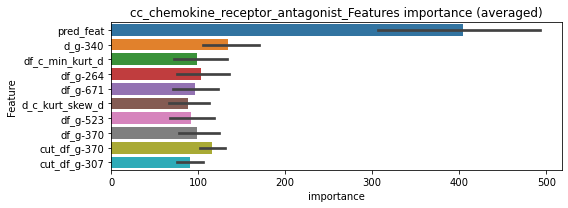

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000258768	valid_1's binary_logloss: 0.00284606
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0001985	valid_1's binary_logloss: 0.000402697
Early stopping, best iteration is:
[1967]	training's binary_logloss: 0.000151884	valid_1's binary_logloss: 0.000283329


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000198086	valid_1's binary_logloss: 0.000270546
[2000]	training's binary_logloss: 0.000150878	valid_1's binary_logloss: 0.000189327
Early stopping, best iteration is:
[2366]	training's binary_logloss: 0.000144575	valid_1's binary_logloss: 0.000176996


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cc_chemokine_receptor_antagonist logloss: 0.0036433186955602296


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000238013	valid_1's binary_logloss: 0.0112327


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137632	valid_1's binary_logloss: 0.00335751
[600]	training's binary_logloss: 0.000370619	valid_1's binary_logloss: 0.00143627
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00036866	valid_1's binary_logloss: 0.00143475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001336	valid_1's binary_logloss: 0.00442448
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000382716	valid_1's binary_logloss: 0.00201026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138867	valid_1's binary_logloss: 0.00208134
[600]	training's binary_logloss: 0.000374685	valid_1's binary_logloss: 0.000751137
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00037313	valid_1's binary_logloss: 0.000749221
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0018402, Threshold: 0.0042774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00299, conf_1:0.00556
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0042774
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0542774
threshold: 0.0542774, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000600891	valid_1's binary_logloss: 0.000829416
[600]	training's binary_logloss: 0.000182837	valid_1's binary_logloss: 0.000343185
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000189816	valid_1's binary_logloss: 0.000340487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568563	valid_1's binary_logloss: 0.00386344
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000277934	valid_1's binary_logloss: 0.00334274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000598422	valid_1's binary_logloss: 0.000625149
[600]	training's binary_logloss: 0.000176552	valid_1's binary_logloss: 0.000179035
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000148403	valid_1's binary_logloss: 0.000147823
Training until validation scores don't improve for

2 / 3 AUC score:1.000
y_Threshold: 0.6077348, Threshold: 0.0542774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0457057 Vs.target_rate: 0.00076
Num_p_label: 182.0, conf_0:0.04342, conf_1:0.06513
Num_p_label: 182.0, Expected: 3.0, Adj_threshold_1: 0.0542774
Num_p_label: 179.0, Expected: 3.0, Adj_threshold_2: 0.1042774
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_3: 0.1542774
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_4: 0.2042774
Num_p_label: 160.0, Expected: 3.0, Adj_threshold_5: 0.2542774
Num_p_label: 150.0, Expected: 3.0, Adj_threshold_6: 0.3042774
Num_p_label: 124.0, Expected: 3.0, Adj_threshold_7: 0.3542774
Num_p_label: 91.0, Expected: 3.0, Adj_threshold_8: 0.4042774
Num_p_label: 66.0, Expected: 3.0, Adj_threshold_9: 0.4542774
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_10: 0.5042774
threshold: 0.5542774, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
===

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000614762	valid_1's binary_logloss: 0.000862526
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000200574	valid_1's binary_logloss: 0.000362291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000574711	valid_1's binary_logloss: 0.00749236
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000283299	valid_1's binary_logloss: 0.00624973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000605715	valid_1's binary_logloss: 0.000597542
[600]	training's binary_logloss: 0.000180998	valid_1's binary_logloss: 0.000153757
[900]	training's binary_logloss: 0.000151213	valid_1's binary_logloss: 0.000118827
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000151213	valid_1's binary_logloss: 0.000118827
Training until validation scores don't improve for

3 / 3 AUC score:1.000
y_Threshold: 0.5274628, Threshold: 0.5542774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000154487	valid_1's binary_logloss: 0.000235581


Num_p_label: 13.0, conf_0:0.49885, conf_1:0.60971
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.5542774
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.6042774
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.6542774
threshold: 0.6542774, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


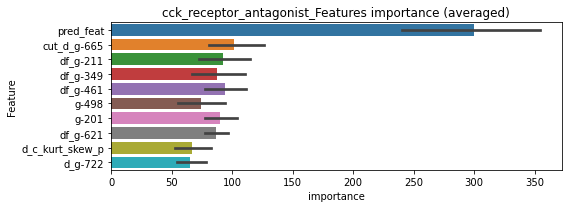

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000212599	valid_1's binary_logloss: 0.000701993
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00099439	valid_1's binary_logloss: 0.0129121
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018568	valid_1's binary_logloss: 0.000152771
Early stopping, best iteration is:
[1836]	training's binary_logloss: 0.000156522	valid_1's binary_logloss: 0.000120466


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000184595	valid_1's binary_logloss: 0.00032025
Early stopping, best iteration is:
[1818]	training's binary_logloss: 0.000156392	valid_1's binary_logloss: 0.00028555


cck_receptor_antagonist logloss: 0.0035054582178076716


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241
target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0599423	valid_1's binary_logloss: 0.313864
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0511323	valid_1's binary_logloss: 0.312298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0609264	valid_1's binary_logloss: 0.319566
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0549336	valid_1's binary_logloss: 0.317673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.058018	valid_1's binary_logloss: 0.335982
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0520191	valid_1's binary_logloss: 0.334716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0546774	valid_1's binary_logloss: 0.326693
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0466572	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.825
y_Threshold: 0.1201284, Threshold: 0.4058690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 590 → Positive_corect_labels: 418/3299
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, conf_0:0.28411, conf_1:0.52763
threshold: 0.4058690, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 418.0/3299, y_label_rate: 0.1267051
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191154	valid_1's binary_logloss: 0.00891327
[600]	training's binary_logloss: 0.000287899	valid_1's binary_logloss: 0.00570733
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000309198	valid_1's binary_logloss: 0.00568571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190304	valid_1's binary_logloss: 0.00494725
[600]	training's binary_logloss: 0.000288914	valid_1's binary_logloss: 0.000880595
[900]	training's binary_logloss: 0.000191309	valid_1's binary_logloss: 0.000607942
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000186316	valid_1's binary_logloss: 0.000593572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186499	valid_1's binary_logloss: 0.00671457
[600]	training's binary_logloss: 0.000273341	valid_1's binary_logloss: 0.0027622
[900]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.6850426, Threshold: 0.4058690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 416.0/3295


Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000195239	valid_1's binary_logloss: 0.0015812


p_label_rate: 0.1170266 Vs.target_rate: 0.01478
Num_p_label: 466.0, conf_0:0.32470, conf_1:0.48704
Num_p_label: 466.0, Expected: 58.9, Adj_threshold_1: 0.4058690
Num_p_label: 466.0, Expected: 58.9, Adj_threshold_2: 0.4558690
Num_p_label: 466.0, Expected: 58.9, Adj_threshold_3: 0.5058690
Num_p_label: 466.0, Expected: 58.9, Adj_threshold_4: 0.5558690
Num_p_label: 465.0, Expected: 58.9, Adj_threshold_5: 0.6058690
Num_p_label: 464.0, Expected: 58.9, Adj_threshold_6: 0.6558690
Num_p_label: 460.0, Expected: 58.9, Adj_threshold_7: 0.7058690
Num_p_label: 450.0, Expected: 58.9, Adj_threshold_8: 0.7558690
threshold: 0.7558690, positive_p_label: 450.0/3982, p_label_rate: 0.1130085
positive_y_label: 416.0/3295, y_label_rate: 0.1262519
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190886	valid_1's binary_logloss: 0.00919718
[600]	training's binary_logloss: 0.000292996	valid_1's binary_logloss: 0.00520672
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000231057	valid_1's binary_logloss: 0.00500934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198257	valid_1's binary_logloss: 0.00809069
[600]	training's binary_logloss: 0.000296807	valid_1's binary_logloss: 0.00440247
[900]	training's binary_logloss: 0.000197891	valid_1's binary_logloss: 0.00416874
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000193013	valid_1's binary_logloss: 0.00413972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193884	valid_1's binary_logloss: 0.00487065
[600]	training's binary_logloss: 0.0002988	valid_1's binary_logloss: 0.00103511
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.6527842, Threshold: 0.7558690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 412.0/3287
p_label_rate: 0.1002009 Vs.target_rate: 0.01478
Num_p_label: 399.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 399.0, Expected: 58.9, Adj_threshold_1: 0.7558690
threshold: 0.7558690, positive_p_label: 399.0/3982, p_label_rate: 0.1002009
positive_y_label: 412.0/3287, y_label_rate: 0.1253423


len(train_index) : 2465
len(valid_index) : 822
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2465
len(valid_index) : 822
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000285815	valid_1's binary_logloss: 0.00824213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00030068	valid_1's binary_logloss: 0.00519231


len(train_index) : 2465
len(valid_index) : 822
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000249426	valid_1's binary_logloss: 0.000673813
Early stopping, best iteration is:
[1871]	training's binary_logloss: 0.000200277	valid_1's binary_logloss: 0.000517335


len(train_index) : 2466
len(valid_index) : 821
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000249507	valid_1's binary_logloss: 0.000873733
Early stopping, best iteration is:
[1726]	training's binary_logloss: 0.000203154	valid_1's binary_logloss: 0.000737025


cdk_inhibitor logloss: 0.0036796899202281826


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422318	valid_1's binary_logloss: 0.0368064
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000910414	valid_1's binary_logloss: 0.0291981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446438	valid_1's binary_logloss: 0.0233975
[600]	training's binary_logloss: 0.000851634	valid_1's binary_logloss: 0.0145657
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000604968	valid_1's binary_logloss: 0.0137939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462143	valid_1's binary_logloss: 0.0123892
[600]	training's binary_logloss: 0.000883528	valid_1's binary_logloss: 0.00621962
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000631874	valid_1's binary_logloss: 0.00571413
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0055425, Threshold: 0.0242828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01700, conf_1:0.03157
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0242828
Num_p_label: 26.0, Expected: 9.0, Adj_threshold_2: 0.0742828
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_3: 0.1242828
threshold: 0.1242828, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001055	valid_1's binary_logloss: 0.00560066
[600]	training's binary_logloss: 0.000220636	valid_1's binary_logloss: 0.00400124
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000190534	valid_1's binary_logloss: 0.00391083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105872	valid_1's binary_logloss: 0.00223508
[600]	training's binary_logloss: 0.000221149	valid_1's binary_logloss: 0.00089578
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000192649	valid_1's binary_logloss: 0.000866691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109551	valid_1's binary_logloss: 0.00378745
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000271617	valid_1's binary_logloss: 0.00271718
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.6383395, Threshold: 0.1242828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0610246 Vs.target_rate: 0.00227
Num_p_label: 243.0, conf_0:0.09943, conf_1:0.14914
Num_p_label: 243.0, Expected: 9.0, Adj_threshold_1: 0.1242828
Num_p_label: 243.0, Expected: 9.0, Adj_threshold_2: 0.1742828
Num_p_label: 243.0, Expected: 9.0, Adj_threshold_3: 0.2242828


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000287035	valid_1's binary_logloss: 0.00188905


Num_p_label: 243.0, Expected: 9.0, Adj_threshold_4: 0.2742828
Num_p_label: 243.0, Expected: 9.0, Adj_threshold_5: 0.3242828
Num_p_label: 242.0, Expected: 9.0, Adj_threshold_6: 0.3742828
Num_p_label: 242.0, Expected: 9.0, Adj_threshold_7: 0.4242828
Num_p_label: 242.0, Expected: 9.0, Adj_threshold_8: 0.4742828
Num_p_label: 241.0, Expected: 9.0, Adj_threshold_9: 0.5242828
Num_p_label: 237.0, Expected: 9.0, Adj_threshold_10: 0.5742828
threshold: 0.6242828, positive_p_label: 214.0/3982, p_label_rate: 0.0537418
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109173	valid_1's binary_logloss: 0.00456583
[600]	training's binary_logloss: 0.000230467	valid_1's binary_logloss: 0.00340796
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000215505	valid_1's binary_logloss: 0.00335967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110938	valid_1's binary_logloss: 0.00267605
[600]	training's binary_logloss: 0.000233242	valid_1's binary_logloss: 0.00139337
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000194237	valid_1's binary_logloss: 0.00131792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111052	valid_1's binary_logloss: 0.00418144
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000321247	valid_1's binary_logloss: 0.00302431
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.5438847, Threshold: 0.6242828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0155701 Vs.target_rate: 0.00227
Num_p_label: 62.0, conf_0:0.50000, conf_1:0.68671
Num_p_label: 62.0, Expected: 9.0, Adj_threshold_1: 0.6242828
Num_p_label: 48.0, Expected: 9.0, Adj_threshold_2: 0.6742828
Num_p_label: 42.0, Expected: 9.0, Adj_threshold_3: 0.7242828
Num_p_label: 42.0, Expected: 9.0, Adj_threshold_4: 0.7742828
threshold: 0.7742828, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00021177	valid_1's binary_logloss: 0.00043479
Early stopping, best iteration is:
[1844]	training's binary_logloss: 0.000173343	valid_1's binary_logloss: 0.000358616


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000297286	valid_1's binary_logloss: 0.00258725
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213875	valid_1's binary_logloss: 0.00277115
Early stopping, best iteration is:
[1419]	training's binary_logloss: 0.000187535	valid_1's binary_logloss: 0.00270094


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.002777601319665808


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000347041	valid_1's binary_logloss: 0.00541906
neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169393	valid_1's binary_logloss: 0.00380928
[600]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00142524
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000432064	valid_1's binary_logloss: 0.00141372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168693	valid_1's binary_logloss: 0.00380941
[600]	training's binary_logloss: 0.000431281	valid_1's binary_logloss: 0.00139985
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000421497	valid_1's binary_logloss: 0.00137712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162303	valid_1's binary_logloss: 0.00425932
[600]	training's binary_logloss: 0.000434032	valid_1's binary_logloss: 0.00160363
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000434032	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0030171, Threshold: 0.1097507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.07683, conf_1:0.14268
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.1097507
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_2: 0.1597507
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.2097507
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_4: 0.2597507
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.3097507
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_6: 0.3597507
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_7: 0.4097507
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4597507
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_9: 0.5097507
threshold: 0.5097507, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000645758	valid_1's binary_logloss: 0.00156212
[600]	training's binary_logloss: 0.000187783	valid_1's binary_logloss: 0.00106337
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000159586	valid_1's binary_logloss: 0.00100712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627038	valid_1's binary_logloss: 0.000898351
[600]	training's binary_logloss: 0.000179592	valid_1's binary_logloss: 0.000327817
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000172123	valid_1's binary_logloss: 0.000315224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642941	valid_1's binary_logloss: 0.00147038
[600]	training's binary_logloss: 0.00018015	valid_1's binary_logloss: 0.000905479
[900]	training's binary_logloss: 0.00014637	valid_1's binary_logloss: 0.000859711
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.8045448, Threshold: 0.5097507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0376695 Vs.target_rate: 0.00101
Num_p_label: 150.0, conf_0:0.40780, conf_1:0.61170
Num_p_label: 150.0, Expected: 4.0, Adj_threshold_1: 0.5097507
Num_p_label: 129.0, Expected: 4.0, Adj_threshold_2: 0.5597507
Num_p_label: 120.0, Expected: 4.0, Adj_threshold_3: 0.6097507
Num_p_label: 103.0, Expected: 4.0, Adj_threshold_4: 0.6597507
Num_p_label: 91.0, Expected: 4.0, Adj_threshold_5: 0.7097507
Num_p_label: 79.0, Expected: 4.0, Adj_threshold_6: 0.7597507


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000221971	valid_1's binary_logloss: 0.00193513


threshold: 0.7597507, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066471	valid_1's binary_logloss: 0.00157767
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000221909	valid_1's binary_logloss: 0.00121715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642716	valid_1's binary_logloss: 0.00091105
[600]	training's binary_logloss: 0.000180564	valid_1's binary_logloss: 0.000323749
[900]	training's binary_logloss: 0.000146396	valid_1's binary_logloss: 0.000279872
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000143692	valid_1's binary_logloss: 0.000276321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642	valid_1's binary_logloss: 0.00138647
[600]	training's binary_logloss: 0.000182296	valid_1's binary_logloss: 0.000793323
[900]	training's binary_logloss: 0.000149061	valid_1's binary_logloss: 0.000752201
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.7348158, Threshold: 0.7597507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0170768 Vs.target_rate: 0.00101
Num_p_label: 68.0, conf_0:0.50000, conf_1:0.80000


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000225451	valid_1's binary_logloss: 0.00163366


Num_p_label: 68.0, Expected: 4.0, Adj_threshold_1: 0.7597507
threshold: 0.7597507, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


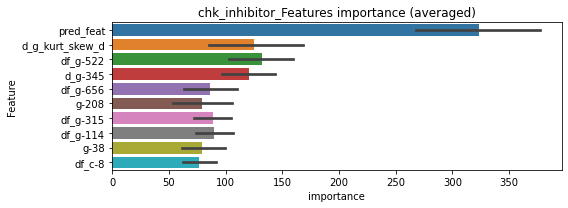

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000217925	valid_1's binary_logloss: 0.00101037
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018657	valid_1's binary_logloss: 0.00045874


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000178804	valid_1's binary_logloss: 0.000449516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186952	valid_1's binary_logloss: 0.000406211
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000180342	valid_1's binary_logloss: 0.000394103


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018885	valid_1's binary_logloss: 0.00111096


chk_inhibitor logloss: 0.0007294882520685149


Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000160569	valid_1's binary_logloss: 0.00106245


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307911	valid_1's binary_logloss: 0.0194051
[600]	training's binary_logloss: 0.000644755	valid_1's binary_logloss: 0.0122978
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000569896	valid_1's binary_logloss: 0.0120332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329517	valid_1's binary_logloss: 0.0157502
[600]	training's binary_logloss: 0.000669447	valid_1's binary_logloss: 0.00956866
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000606679	valid_1's binary_logloss: 0.0093418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034075	valid_1's binary_logloss: 0.00831544
[600]	training's binary_logloss: 0.000684415	valid_1's binary_logloss: 0.00332356
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000563862	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0046051, Threshold: 0.0482608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.03378, conf_1:0.06274
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0482608
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_2: 0.0982608
threshold: 0.0982608, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897028	valid_1's binary_logloss: 0.00364109
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000250475	valid_1's binary_logloss: 0.00225139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906195	valid_1's binary_logloss: 0.00404423
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000419657	valid_1's binary_logloss: 0.0034198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915262	valid_1's binary_logloss: 0.00269291
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000515129	valid_1's binary_logloss: 0.00227539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00089729	valid_1's binary_logloss: 0.00242359
[600]	training's binary_logloss: 0.000215514	valid_1's binary_logloss: 0.001303

2 / 3 AUC score:1.000
y_Threshold: 0.6275233, Threshold: 0.0982608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0635359 Vs.target_rate: 0.00176
Num_p_label: 253.0, conf_0:0.07861, conf_1:0.11791
Num_p_label: 253.0, Expected: 7.0, Adj_threshold_1: 0.0982608
Num_p_label: 253.0, Expected: 7.0, Adj_threshold_2: 0.1482608
Num_p_label: 253.0, Expected: 7.0, Adj_threshold_3: 0.1982608
Num_p_label: 252.0, Expected: 7.0, Adj_threshold_4: 0.2482608
Num_p_label: 252.0, Expected: 7.0, Adj_threshold_5: 0.2982608
Num_p_label: 251.0, Expected: 7.0, Adj_threshold_6: 0.3482608
Num_p_label: 251.0, Expected: 7.0, Adj_threshold_7: 0.3982608
Num_p_label: 249.0, Expected: 7.0, Adj_threshold_8: 0.4482608
Num_p_label: 241.0, Expected: 7.0, Adj_threshold_9: 0.4982608
Num_p_label: 221.0, Expected: 7.0, Adj_threshold_10: 0.5482608
threshold: 0.5982608, positive_p_label: 192.0/3982, p_label_rate: 0.0482170
positive_y_label: 655.0/3806, y_label_rate: 0.1720967

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000918057	valid_1's binary_logloss: 0.00326453
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000281405	valid_1's binary_logloss: 0.00252325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000916365	valid_1's binary_logloss: 0.00280123
[600]	training's binary_logloss: 0.000222929	valid_1's binary_logloss: 0.0020501
[900]	training's binary_logloss: 0.000173592	valid_1's binary_logloss: 0.00199161
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000172744	valid_1's binary_logloss: 0.00198946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00093428	valid_1's binary_logloss: 0.00417662
[600]	training's binary_logloss: 0.00022262	valid_1's binary_logloss: 0.00316426
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000231382	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.5706540, Threshold: 0.5982608, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000215045	valid_1's binary_logloss: 0.000908319
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000213492	valid_1's binary_logloss: 0.000904073


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0346560 Vs.target_rate: 0.00176
Num_p_label: 138.0, conf_0:0.50000, conf_1:0.65809
Num_p_label: 138.0, Expected: 7.0, Adj_threshold_1: 0.5982608
Num_p_label: 103.0, Expected: 7.0, Adj_threshold_2: 0.6482608
Num_p_label: 75.0, Expected: 7.0, Adj_threshold_3: 0.6982608
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_4: 0.7482608
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_5: 0.7982608
threshold: 0.7982608, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000211929	valid_1's binary_logloss: 0.00227158
Early stopping, best iteration is:
[1510]	training's binary_logloss: 0.000184417	valid_1's binary_logloss: 0.00221987


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000263821	valid_1's binary_logloss: 0.00127674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000233879	valid_1's binary_logloss: 0.00497504
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210857	valid_1's binary_logloss: 0.000312252
[2000]	training's binary_logloss: 0.000173187	valid_1's binary_logloss: 0.000237658
Early stopping, best iteration is:
[2025]	training's binary_logloss: 0.000172968	valid_1's binary_logloss: 0.000237121


chloride_channel_blocker logloss: 0.002177883692192767


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409111	valid_1's binary_logloss: 0.0234794
[600]	training's binary_logloss: 0.000766127	valid_1's binary_logloss: 0.0144291
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000642752	valid_1's binary_logloss: 0.0141535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376458	valid_1's binary_logloss: 0.0260554
[600]	training's binary_logloss: 0.000748159	valid_1's binary_logloss: 0.0206855
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000681711	valid_1's binary_logloss: 0.0205579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446191	valid_1's binary_logloss: 0.0114876
[600]	training's binary_logloss: 0.000794657	valid_1's binary_logloss: 0.00424442
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000570642	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0045451, Threshold: 0.0108542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00760, conf_1:0.01411
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0108542
Num_p_label: 6.0, Expected: 8.0, Adj_threshold_2: 0.0608542
threshold: 0.0608542, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010407	valid_1's binary_logloss: 0.00233567
[600]	training's binary_logloss: 0.000218565	valid_1's binary_logloss: 0.001038
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000207877	valid_1's binary_logloss: 0.00100857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103418	valid_1's binary_logloss: 0.00486038
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000644853	valid_1's binary_logloss: 0.00446507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106686	valid_1's binary_logloss: 0.00215151
[600]	training's binary_logloss: 0.00021914	valid_1's binary_logloss: 0.00139837
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000224562	valid_1's binary_logloss: 0.00138009
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.6779480, Threshold: 0.0608542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3807
p_label_rate: 0.0434455 Vs.target_rate: 0.00202
Num_p_label: 173.0, conf_0:0.04868, conf_1:0.07303
Num_p_label: 173.0, Expected: 8.0, Adj_threshold_1: 0.0608542
Num_p_label: 173.0, Expected: 8.0, Adj_threshold_2: 0.1108542
Num_p_label: 172.0, Expected: 8.0, Adj_threshold_3: 0.1608542
Num_p_label: 172.0, Expected: 8.0, Adj_threshold_4: 0.2108542
Num_p_label: 171.0, Expected: 8.0, Adj_threshold_5: 0.2608542
Num_p_label: 170.0, Expected: 8.0, Adj_threshold_6: 0.3108542


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000316356	valid_1's binary_logloss: 0.00221988


Num_p_label: 170.0, Expected: 8.0, Adj_threshold_7: 0.3608542
Num_p_label: 166.0, Expected: 8.0, Adj_threshold_8: 0.4108542
Num_p_label: 160.0, Expected: 8.0, Adj_threshold_9: 0.4608542
Num_p_label: 156.0, Expected: 8.0, Adj_threshold_10: 0.5108542
threshold: 0.5608542, positive_p_label: 144.0/3982, p_label_rate: 0.0361627
positive_y_label: 654.0/3807, y_label_rate: 0.1717888
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101614	valid_1's binary_logloss: 0.0024561
[600]	training's binary_logloss: 0.000226631	valid_1's binary_logloss: 0.00138154
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000184897	valid_1's binary_logloss: 0.00129975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105932	valid_1's binary_logloss: 0.00382425
[600]	training's binary_logloss: 0.000232227	valid_1's binary_logloss: 0.00262321
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000208012	valid_1's binary_logloss: 0.00258871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103976	valid_1's binary_logloss: 0.00293536
[600]	training's binary_logloss: 0.000223764	valid_1's binary_logloss: 0.00193313
[900]	training's binary_logloss: 0.000171182	valid_1's binary_logloss: 0.00184022
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.5997540, Threshold: 0.5608542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3805
p_label_rate: 0.0163235 Vs.target_rate: 0.00202
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.61694
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_1: 0.5608542
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_2: 0.6108542
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.6608542
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_4: 0.7108542
threshold: 0.7108542, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3805, y_label_rate: 0.1716163


len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000222155	valid_1's binary_logloss: 0.00250949


================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000228692	valid_1's binary_logloss: 0.00116561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000231583	valid_1's binary_logloss: 0.0014878


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00021534	valid_1's binary_logloss: 0.00171899
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000182152	valid_1's binary_logloss: 0.00164841


cholesterol_inhibitor logloss: 0.0017072507149751936


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415864	valid_1's binary_logloss: 0.0375045
[600]	training's binary_logloss: 0.00080934	valid_1's binary_logloss: 0.0285367
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000620638	valid_1's binary_logloss: 0.0275188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427242	valid_1's binary_logloss: 0.027063
[600]	training's binary_logloss: 0.000844288	valid_1's binary_logloss: 0.0211134
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00089641	valid_1's binary_logloss: 0.0210688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471978	valid_1's binary_logloss: 0.0106417
[600]	training's binary_logloss: 0.000880655	valid_1's binary_logloss: 0.00389295
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000631361	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0051513, Threshold: 0.0153264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01073, conf_1:0.01992
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0153264
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_2: 0.0653264
threshold: 0.0653264, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104762	valid_1's binary_logloss: 0.00537783
[600]	training's binary_logloss: 0.000222854	valid_1's binary_logloss: 0.00394657
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000190192	valid_1's binary_logloss: 0.00386685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105207	valid_1's binary_logloss: 0.00427571
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000290649	valid_1's binary_logloss: 0.00332465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107078	valid_1's binary_logloss: 0.0026216
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000244701	valid_1's binary_logloss: 0.00182477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103016	valid_1's binary_logloss: 0.00342224


2 / 3 AUC score:1.000
y_Threshold: 0.5838919, Threshold: 0.0653264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0436966 Vs.target_rate: 0.00227
Num_p_label: 174.0, conf_0:0.05226, conf_1:0.07839
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_1: 0.0653264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_2: 0.1153264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_3: 0.1653264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_4: 0.2153264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_5: 0.2653264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_6: 0.3153264
Num_p_label: 174.0, Expected: 9.0, Adj_threshold_7: 0.3653264
Num_p_label: 173.0, Expected: 9.0, Adj_threshold_8: 0.4153264
Num_p_label: 172.0, Expected: 9.0, Adj_threshold_9: 0.4653264
Num_p_label: 168.0, Expected: 9.0, Adj_threshold_10: 0.5153264
threshold: 0.5653264, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 653.0/3799, y_label_rate: 0.1718873

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106822	valid_1's binary_logloss: 0.00642542
[600]	training's binary_logloss: 0.000235373	valid_1's binary_logloss: 0.00504092
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000241704	valid_1's binary_logloss: 0.00496518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106146	valid_1's binary_logloss: 0.00330204
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000469682	valid_1's binary_logloss: 0.00255913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104781	valid_1's binary_logloss: 0.00411843
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000304806	valid_1's binary_logloss: 0.00300962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105352	valid_1's binary_logloss: 0.00292225

3 / 3 AUC score:1.000
y_Threshold: 0.4065654, Threshold: 0.5653264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0158212 Vs.target_rate: 0.00227
Num_p_label: 63.0, conf_0:0.50000, conf_1:0.62186
Num_p_label: 63.0, Expected: 9.0, Adj_threshold_1: 0.5653264
Num_p_label: 58.0, Expected: 9.0, Adj_threshold_2: 0.6153264
Num_p_label: 49.0, Expected: 9.0, Adj_threshold_3: 0.6653264
Num_p_label: 43.0, Expected: 9.0, Adj_threshold_4: 0.7153264
Num_p_label: 35.0, Expected: 9.0, Adj_threshold_5: 0.7653264


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.0002912	valid_1's binary_logloss: 0.00176884


threshold: 0.7653264, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000255999	valid_1's binary_logloss: 0.00194022


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210051	valid_1's binary_logloss: 0.000431605
Early stopping, best iteration is:
[1792]	training's binary_logloss: 0.000172534	valid_1's binary_logloss: 0.000354692


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214439	valid_1's binary_logloss: 0.000832821
Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.000180513	valid_1's binary_logloss: 0.000759621


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cholinergic_receptor_antagonist logloss: 0.002845657235342171


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000485245	valid_1's binary_logloss: 0.00830834
neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180456	valid_1's binary_logloss: 0.00407874
[600]	training's binary_logloss: 0.000450664	valid_1's binary_logloss: 0.00150016
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000421153	valid_1's binary_logloss: 0.0014278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018321	valid_1's binary_logloss: 0.00425033
[600]	training's binary_logloss: 0.000450019	valid_1's binary_logloss: 0.00161011
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000412535	valid_1's binary_logloss: 0.00150974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175912	valid_1's binary_logloss: 0.00407253
[600]	training's binary_logloss: 0.000440793	valid_1's binary_logloss: 0.00168183
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000410774	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028923, Threshold: 0.0170728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.01195, conf_1:0.02219
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0170728
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_2: 0.0670728
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.1170728
threshold: 0.1170728, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000673278	valid_1's binary_logloss: 0.000856231
[600]	training's binary_logloss: 0.000189992	valid_1's binary_logloss: 0.000273895
[900]	training's binary_logloss: 0.00015577	valid_1's binary_logloss: 0.000229136
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000154895	valid_1's binary_logloss: 0.000227405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678886	valid_1's binary_logloss: 0.00200921
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000237633	valid_1's binary_logloss: 0.00139085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064541	valid_1's binary_logloss: 0.00200738
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000298866	valid_1's binary_logloss: 0.00140142
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.4921645, Threshold: 0.1170728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0459568 Vs.target_rate: 0.00101
Num_p_label: 183.0, conf_0:0.09366, conf_1:0.14049
Num_p_label: 183.0, Expected: 4.0, Adj_threshold_1: 0.1170728
Num_p_label: 182.0, Expected: 4.0, Adj_threshold_2: 0.1670728
Num_p_label: 180.0, Expected: 4.0, Adj_threshold_3: 0.2170728
Num_p_label: 179.0, Expected: 4.0, Adj_threshold_4: 0.2670728
Num_p_label: 177.0, Expected: 4.0, Adj_threshold_5: 0.3170728
Num_p_label: 166.0, Expected: 4.0, Adj_threshold_6: 0.3670728
Num_p_label: 147.0, Expected: 4.0, Adj_threshold_7: 0.4170728


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000197878	valid_1's binary_logloss: 0.000948512


Num_p_label: 127.0, Expected: 4.0, Adj_threshold_8: 0.4670728
Num_p_label: 108.0, Expected: 4.0, Adj_threshold_9: 0.5170728
Num_p_label: 86.0, Expected: 4.0, Adj_threshold_10: 0.5670728
threshold: 0.6170728, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000676191	valid_1's binary_logloss: 0.000875878
[600]	training's binary_logloss: 0.000187511	valid_1's binary_logloss: 0.000283347
[900]	training's binary_logloss: 0.000153865	valid_1's binary_logloss: 0.000238621
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000153055	valid_1's binary_logloss: 0.000237195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000679291	valid_1's binary_logloss: 0.00203434
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000389865	valid_1's binary_logloss: 0.00162175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000646832	valid_1's binary_logloss: 0.00206402
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000299088	valid_1's binary_logloss: 0.00136911
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.5039388, Threshold: 0.6170728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0175791 Vs.target_rate: 0.00101
Num_p_label: 70.0, conf_0:0.50000, conf_1:0.67878
Num_p_label: 70.0, Expected: 4.0, Adj_threshold_1: 0.6170728
Num_p_label: 53.0, Expected: 4.0, Adj_threshold_2: 0.6670728
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_3: 0.7170728
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_4: 0.7670728


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000363907	valid_1's binary_logloss: 0.00140461


threshold: 0.7670728, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193925	valid_1's binary_logloss: 0.000337335
Early stopping, best iteration is:
[1715]	training's binary_logloss: 0.00016473	valid_1's binary_logloss: 0.000299559


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000297337	valid_1's binary_logloss: 0.00145523
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000234583	valid_1's binary_logloss: 0.000751057
Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.0011136823310898686


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000385884	valid_1's binary_logloss: 0.00193249
neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036517	valid_1's binary_logloss: 0.0119175
[600]	training's binary_logloss: 0.000679146	valid_1's binary_logloss: 0.00467972
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000524841	valid_1's binary_logloss: 0.00412961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341557	valid_1's binary_logloss: 0.0162725
[600]	training's binary_logloss: 0.000667491	valid_1's binary_logloss: 0.00851124
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000559054	valid_1's binary_logloss: 0.00793762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368595	valid_1's binary_logloss: 0.00956224
[600]	training's binary_logloss: 0.000682468	valid_1's binary_logloss: 0.00338558
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000518196	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0046617, Threshold: 0.0160299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01122, conf_1:0.02084
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0160299
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0660299
threshold: 0.0660299, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919428	valid_1's binary_logloss: 0.00269326
[600]	training's binary_logloss: 0.000208117	valid_1's binary_logloss: 0.00160729
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000164321	valid_1's binary_logloss: 0.00152779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000921668	valid_1's binary_logloss: 0.00256771
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000225256	valid_1's binary_logloss: 0.00132107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910962	valid_1's binary_logloss: 0.0013908
[600]	training's binary_logloss: 0.000202335	valid_1's binary_logloss: 0.000431049
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000165241	valid_1's binary_logloss: 0.000376536
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.00020538	valid_1's binary_logloss: 0.00219421
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000204769	valid_1's binary_logloss: 0.0021925


y_Threshold: 0.5984976, Threshold: 0.0660299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0467102 Vs.target_rate: 0.00151
Num_p_label: 186.0, conf_0:0.05282, conf_1:0.07924
Num_p_label: 186.0, Expected: 6.0, Adj_threshold_1: 0.0660299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_2: 0.1160299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_3: 0.1660299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_4: 0.2160299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_5: 0.2660299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_6: 0.3160299
Num_p_label: 185.0, Expected: 6.0, Adj_threshold_7: 0.3660299
Num_p_label: 180.0, Expected: 6.0, Adj_threshold_8: 0.4160299
Num_p_label: 174.0, Expected: 6.0, Adj_threshold_9: 0.4660299
Num_p_label: 161.0, Expected: 6.0, Adj_threshold_10: 0.5160299
threshold: 0.5660299, positive_p_label: 138.0/3982, p_label_rate: 0.0346560
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914566	valid_1's binary_logloss: 0.00306568
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000234785	valid_1's binary_logloss: 0.00169226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000932049	valid_1's binary_logloss: 0.00251573
[600]	training's binary_logloss: 0.00020459	valid_1's binary_logloss: 0.00139046
[900]	training's binary_logloss: 0.000157913	valid_1's binary_logloss: 0.00132007
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000158188	valid_1's binary_logloss: 0.00131954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000921986	valid_1's binary_logloss: 0.00108188
[600]	training's binary_logloss: 0.000200647	valid_1's binary_logloss: 0.000203308
[900]	training's binary_logloss: 0.000155733	valid_1's binary_logloss: 0.000141458
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.6303930, Threshold: 0.5660299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0133099 Vs.target_rate: 0.00151
Num_p_label: 53.0, conf_0:0.50000, conf_1:0.62263
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_1: 0.5660299


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000380734	valid_1's binary_logloss: 0.00359316


Num_p_label: 33.0, Expected: 6.0, Adj_threshold_2: 0.6160299
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.6660299
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_4: 0.7160299
threshold: 0.7160299, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208395	valid_1's binary_logloss: 0.00164482
Early stopping, best iteration is:
[1487]	training's binary_logloss: 0.000180702	valid_1's binary_logloss: 0.00160205


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209285	valid_1's binary_logloss: 0.0015692
Early stopping, best iteration is:
[1825]	training's binary_logloss: 0.000173513	valid_1's binary_logloss: 0.00151435


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020388	valid_1's binary_logloss: 0.00228676
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000194935	valid_1's binary_logloss: 0.00227194


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


corticosteroid_agonist logloss: 0.0017070944243850954


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000238915	valid_1's binary_logloss: 0.00143604
neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235
target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.0878711	valid_1's binary_logloss: 0.354842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0876892	valid_1's binary_logloss: 0.373813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.107803	valid_1's binary_logloss: 0.378595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0680693	valid_1's binary_logloss: 0.366373
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0775578	valid_1's binary_logloss: 0.364116


1 / 3 AUC score:0.762
y_Threshold: 0.1453894, Threshold: 0.5175113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 722 → Positive_corect_labels: 351/3160
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, conf_0:0.36226, conf_1:0.67276
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.5175113
Num_p_label: 47.0, Expected: 72.7, Adj_threshold_2: 0.4975113
Num_p_label: 52.0, Expected: 72.7, Adj_threshold_3: 0.4775113
threshold: 0.4775113, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 351.0/3160, y_label_rate: 0.1110759
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163705	valid_1's binary_logloss: 0.00575688
[600]	training's binary_logloss: 0.00028914	valid_1's binary_logloss: 0.00133049
[900]	training's binary_logloss: 0.000198551	valid_1's binary_logloss: 0.000936921
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000192901	valid_1's binary_logloss: 0.000913815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165263	valid_1's binary_logloss: 0.0103443
[600]	training's binary_logloss: 0.000287057	valid_1's binary_logloss: 0.00609597
[900]	training's binary_logloss: 0.000199644	valid_1's binary_logloss: 0.00566664
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000199417	valid_1's binary_logloss: 0.00566025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166425	valid_1's binary_logloss: 0.00645238
[600]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.2163688, Threshold: 0.4775113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 350.0/3158
p_label_rate: 0.1278252 Vs.target_rate: 0.01827
Num_p_label: 509.0, conf_0:0.38201, conf_1:0.57301
Num_p_label: 509.0, Expected: 72.7, Adj_threshold_1: 0.4775113


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000213339	valid_1's binary_logloss: 0.00422614


Num_p_label: 509.0, Expected: 72.7, Adj_threshold_2: 0.5275113
Num_p_label: 504.0, Expected: 72.7, Adj_threshold_3: 0.5775113
Num_p_label: 494.0, Expected: 72.7, Adj_threshold_4: 0.6275113
Num_p_label: 488.0, Expected: 72.7, Adj_threshold_5: 0.6775113
Num_p_label: 488.0, Expected: 72.7, Adj_threshold_6: 0.7275113
Num_p_label: 488.0, Expected: 72.7, Adj_threshold_7: 0.7775113
threshold: 0.7775113, positive_p_label: 488.0/3982, p_label_rate: 0.1225515
positive_y_label: 350.0/3158, y_label_rate: 0.1108296
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158788	valid_1's binary_logloss: 0.012514
[600]	training's binary_logloss: 0.000274121	valid_1's binary_logloss: 0.00856459
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000291359	valid_1's binary_logloss: 0.0085206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162775	valid_1's binary_logloss: 0.00551231
[600]	training's binary_logloss: 0.000274081	valid_1's binary_logloss: 0.000958075
[900]	training's binary_logloss: 0.000191189	valid_1's binary_logloss: 0.000581941
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000191189	valid_1's binary_logloss: 0.000581941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168886	valid_1's binary_logloss: 0.00643269
[600]	training's binary_logloss: 0.000290341	valid_1's binary_logloss: 0.00143611
[900]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.1763830, Threshold: 0.7775113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 348.0/3154
p_label_rate: 0.1245605 Vs.target_rate: 0.01827
Num_p_label: 496.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 496.0, Expected: 72.7, Adj_threshold_1: 0.7775113
threshold: 0.7775113, positive_p_label: 496.0/3982, p_label_rate: 0.1245605
positive_y_label: 348.0/3154, y_label_rate: 0.1103361


len(train_index) : 2365
len(valid_index) : 789
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2365
len(valid_index) : 789
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000243951	valid_1's binary_logloss: 0.0113154
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000179527	valid_1's binary_logloss: 0.000738809
[2000]	training's binary_logloss: 0.000133135	valid_1's binary_logloss: 0.000549891
[3000]	training's binary_logloss: 0.000123554	valid_1's binary_logloss: 0.000509481
Early stopping, best iteration is:
[3262]	training's binary_logloss: 0.000122559	valid_1's binary_logloss: 0.000504865


len(train_index) : 2366
len(valid_index) : 788
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000179549	valid_1's binary_logloss: 0.000611665
[2000]	training's binary_logloss: 0.000132985	valid_1's binary_logloss: 0.000454347
[3000]	training's binary_logloss: 0.000123546	valid_1's binary_logloss: 0.000421599
Early stopping, best iteration is:
[3209]	training's binary_logloss: 0.000122586	valid_1's binary_logloss: 0.000418037


len(train_index) : 2366
len(valid_index) : 788
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000179742	valid_1's binary_logloss: 0.000558745
[2000]	training's binary_logloss: 0.000133098	valid_1's binary_logloss: 0.000414799
[3000]	training's binary_logloss: 0.000123514	valid_1's binary_logloss: 0.000384332
Early stopping, best iteration is:
[3490]	training's binary_logloss: 0.000121821	valid_1's binary_logloss: 0.000378753


cyclooxygenase_inhibitor logloss: 0.0031569157892919635


neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273
target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011631	valid_1's binary_logloss: 0.0826592
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.0021855	valid_1's binary_logloss: 0.0721303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112419	valid_1's binary_logloss: 0.0888052
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00274542	valid_1's binary_logloss: 0.081849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128725	valid_1's binary_logloss: 0.0536372
[600]	training's binary_logloss: 0.00190147	valid_1's binary_logloss: 0.0345027
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00103968	valid_1's binary_logloss: 0.0324163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123293	valid_1's binary_logloss: 0.0664839
Early stopping, be

1 / 3 AUC score:0.996
y_Threshold: 0.0125579, Threshold: 0.0424601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, conf_0:0.02972, conf_1:0.05520
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0424601
Num_p_label: 12.0, Expected: 17.4, Adj_threshold_2: 0.0924601
threshold: 0.0924601, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 641.0/3769, y_label_rate: 0.1700716
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151356	valid_1's binary_logloss: 0.00285326
[600]	training's binary_logloss: 0.000252905	valid_1's binary_logloss: 0.000465497
[900]	training's binary_logloss: 0.000177926	valid_1's binary_logloss: 0.000286882
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000170069	valid_1's binary_logloss: 0.000269761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014446	valid_1's binary_logloss: 0.0121638
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000537557	valid_1's binary_logloss: 0.0109234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150102	valid_1's binary_logloss: 0.00663174
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000371126	valid_1's binary_logloss: 0.00505015
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.7571574, Threshold: 0.0924601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 636.0/3759
p_label_rate: 0.0625314 Vs.target_rate: 0.00437
Num_p_label: 249.0, conf_0:0.07397, conf_1:0.11095
Num_p_label: 249.0, Expected: 17.4, Adj_threshold_1: 0.0924601
Num_p_label: 249.0, Expected: 17.4, Adj_threshold_2: 0.1424601
Num_p_label: 246.0, Expected: 17.4, Adj_threshold_3: 0.1924601
Num_p_label: 246.0, Expected: 17.4, Adj_threshold_4: 0.2424601
Num_p_label: 246.0, Expected: 17.4, Adj_threshold_5: 0.2924601
Num_p_label: 245.0, Expected: 17.4, Adj_threshold_6: 0.3424601
Num_p_label: 243.0, Expected: 17.4, Adj_threshold_7: 0.3924601
Num_p_label: 243.0, Expected: 17.4, Adj_threshold_8: 0.4424601
Num_p_label: 242.0, Expected: 17.4, Adj_threshold_9: 0.4924601
Num_p_label: 237.0, Expected: 17.4, Adj_threshold_10: 0.5424601
threshold: 0.5924601, positive_p_label: 224.0/3982, p_label_rate: 0.0562531
positive_y_label: 636.0/3759, y_label_rate

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145546	valid_1's binary_logloss: 0.00657585
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000297548	valid_1's binary_logloss: 0.00411962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146178	valid_1's binary_logloss: 0.00315429
[600]	training's binary_logloss: 0.000254468	valid_1's binary_logloss: 0.0008779
[900]	training's binary_logloss: 0.000177287	valid_1's binary_logloss: 0.00070433
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000172503	valid_1's binary_logloss: 0.000688271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150145	valid_1's binary_logloss: 0.00878099
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000285581	valid_1's binary_logloss: 0.0064605
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.2193025, Threshold: 0.5924601, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000168846	valid_1's binary_logloss: 0.000948936


Remove_noisy_data: 4 → Positive_corect_labels: 634.0/3755
p_label_rate: 0.0090407 Vs.target_rate: 0.00437
Num_p_label: 36.0, conf_0:0.50000, conf_1:0.65171
Num_p_label: 36.0, Expected: 17.4, Adj_threshold_1: 0.5924601
Num_p_label: 36.0, Expected: 17.4, Adj_threshold_2: 0.6424601
Num_p_label: 34.0, Expected: 17.4, Adj_threshold_3: 0.6924601
Num_p_label: 33.0, Expected: 17.4, Adj_threshold_4: 0.7424601
Num_p_label: 32.0, Expected: 17.4, Adj_threshold_5: 0.7924601
threshold: 0.7924601, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 634.0/3755, y_label_rate: 0.1688415


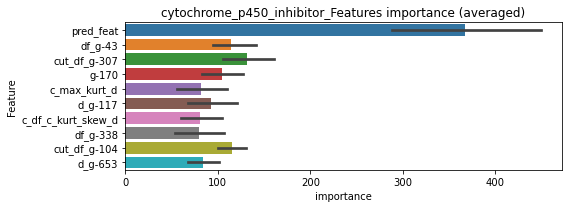

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000245695	valid_1's binary_logloss: 0.00275353
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214304	valid_1's binary_logloss: 0.000420283
Early stopping, best iteration is:
[1880]	training's binary_logloss: 0.000168607	valid_1's binary_logloss: 0.00032369


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000219566	valid_1's binary_logloss: 0.00324405
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000181644	valid_1's binary_logloss: 0.00306701


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cytochrome_p450_inhibitor logloss: 0.0021052302711804644


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00049213	valid_1's binary_logloss: 0.0022743
neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280613	valid_1's binary_logloss: 0.00957914
[600]	training's binary_logloss: 0.000589773	valid_1's binary_logloss: 0.00437691
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000533997	valid_1's binary_logloss: 0.00422934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028721	valid_1's binary_logloss: 0.00647117
[600]	training's binary_logloss: 0.000591207	valid_1's binary_logloss: 0.00205844
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000512378	valid_1's binary_logloss: 0.00187699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284391	valid_1's binary_logloss: 0.00572937
[600]	training's binary_logloss: 0.000596636	valid_1's binary_logloss: 0.00164666
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000535362	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0039123, Threshold: 0.0118626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00830, conf_1:0.01542
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0118626
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0618626
threshold: 0.0618626, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000854593	valid_1's binary_logloss: 0.00305085
[600]	training's binary_logloss: 0.000204344	valid_1's binary_logloss: 0.00208858
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000200028	valid_1's binary_logloss: 0.00208668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000856018	valid_1's binary_logloss: 0.00175178
[600]	training's binary_logloss: 0.000203964	valid_1's binary_logloss: 0.000896817
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000168384	valid_1's binary_logloss: 0.000799063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866492	valid_1's binary_logloss: 0.0009575
[600]	training's binary_logloss: 0.000203192	valid_1's binary_logloss: 0.000193525
[900]	training's binary_logloss: 0.000160152	valid_1's binary_logloss: 0.00013595
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.6761761, Threshold: 0.0618626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0497238 Vs.target_rate: 0.00151
Num_p_label: 198.0, conf_0:0.04949, conf_1:0.07424
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_1: 0.0618626
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_2: 0.1118626
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_3: 0.1618626
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_4: 0.2118626
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_5: 0.2618626
Num_p_label: 193.0, Expected: 6.0, Adj_threshold_6: 0.3118626


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000256115	valid_1's binary_logloss: 0.0028018


Num_p_label: 179.0, Expected: 6.0, Adj_threshold_7: 0.3618626
Num_p_label: 147.0, Expected: 6.0, Adj_threshold_8: 0.4118626
Num_p_label: 96.0, Expected: 6.0, Adj_threshold_9: 0.4618626
Num_p_label: 66.0, Expected: 6.0, Adj_threshold_10: 0.5118626
threshold: 0.5618626, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000851176	valid_1's binary_logloss: 0.00320555
[600]	training's binary_logloss: 0.0002013	valid_1's binary_logloss: 0.00227027
[900]	training's binary_logloss: 0.000156855	valid_1's binary_logloss: 0.00220185
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000157254	valid_1's binary_logloss: 0.00220148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000861927	valid_1's binary_logloss: 0.00169592
[600]	training's binary_logloss: 0.000203566	valid_1's binary_logloss: 0.000876396
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000171982	valid_1's binary_logloss: 0.000810325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864933	valid_1's binary_logloss: 0.000953983
[600]	training's binary_logloss: 0.000203595	valid_1's binary_logloss: 0.000193722
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.6674338, Threshold: 0.5618626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0128076 Vs.target_rate: 0.00151
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.61805
Num_p_label: 51.0, Expected: 6.0, Adj_threshold_1: 0.5618626
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.6118626
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.6618626
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_4: 0.7118626


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000220881	valid_1's binary_logloss: 0.00308788


threshold: 0.7118626, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


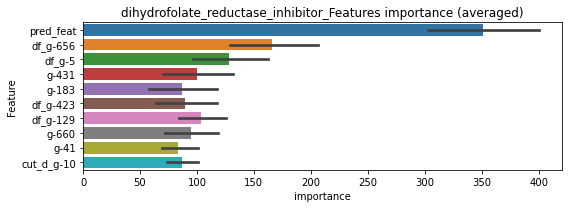

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019771	valid_1's binary_logloss: 0.00206891


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[1286]	training's binary_logloss: 0.000180614	valid_1's binary_logloss: 0.002044


================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000315456	valid_1's binary_logloss: 0.00104336
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202212	valid_1's binary_logloss: 0.000186366
[2000]	training's binary_logloss: 0.000165271	valid_1's binary_logloss: 0.000139825
Early stopping, best iteration is:
[2141]	training's binary_logloss: 0.000163287	valid_1's binary_logloss: 0.000137759


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dihydrofolate_reductase_inhibitor logloss: 0.0015422146403162372


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000428276	valid_1's binary_logloss: 0.00293652
neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190092	valid_1's binary_logloss: 0.00554584
[600]	training's binary_logloss: 0.000444445	valid_1's binary_logloss: 0.0022171
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000433779	valid_1's binary_logloss: 0.0021895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179456	valid_1's binary_logloss: 0.0109309
[600]	training's binary_logloss: 0.000426378	valid_1's binary_logloss: 0.00633475
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000419333	valid_1's binary_logloss: 0.00628617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188175	valid_1's binary_logloss: 0.00330116
[600]	training's binary_logloss: 0.000444789	valid_1's binary_logloss: 0.00100025
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000420454	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0027599, Threshold: 0.0104792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00734, conf_1:0.01362
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0104792
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0604792
threshold: 0.0604792, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000719697	valid_1's binary_logloss: 0.00113435
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000208319	valid_1's binary_logloss: 0.000435443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655558	valid_1's binary_logloss: 0.00371633
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000256499	valid_1's binary_logloss: 0.00288757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691408	valid_1's binary_logloss: 0.00189493
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00023422	valid_1's binary_logloss: 0.00144357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690103	valid_1's binary_logloss: 0.00150164
[600]	training's binary_logloss: 0.000187097	valid_1's binary_logloss: 0.0009

2 / 3 AUC score:1.000
y_Threshold: 0.6599254, Threshold: 0.0604792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0509794 Vs.target_rate: 0.00105
Num_p_label: 203.0, conf_0:0.04838, conf_1:0.07258
Num_p_label: 203.0, Expected: 4.2, Adj_threshold_1: 0.0604792
Num_p_label: 203.0, Expected: 4.2, Adj_threshold_2: 0.1104792
Num_p_label: 203.0, Expected: 4.2, Adj_threshold_3: 0.1604792
Num_p_label: 203.0, Expected: 4.2, Adj_threshold_4: 0.2104792
Num_p_label: 201.0, Expected: 4.2, Adj_threshold_5: 0.2604792
Num_p_label: 198.0, Expected: 4.2, Adj_threshold_6: 0.3104792
Num_p_label: 189.0, Expected: 4.2, Adj_threshold_7: 0.3604792
Num_p_label: 174.0, Expected: 4.2, Adj_threshold_8: 0.4104792
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_9: 0.4604792
Num_p_label: 119.0, Expected: 4.2, Adj_threshold_10: 0.5104792
threshold: 0.5604792, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069978	valid_1's binary_logloss: 0.00195825
[600]	training's binary_logloss: 0.000190954	valid_1's binary_logloss: 0.00113885
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000194847	valid_1's binary_logloss: 0.00111572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699132	valid_1's binary_logloss: 0.00248407
[600]	training's binary_logloss: 0.000192282	valid_1's binary_logloss: 0.00182881
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000175792	valid_1's binary_logloss: 0.00178246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00071377	valid_1's binary_logloss: 0.00073782
[600]	training's binary_logloss: 0.000194428	valid_1's binary_logloss: 0.000170873
[900]	training's binary_logloss: 0.00015921	valid_1's binary_logloss: 0.000127443
Early stop

3 / 3 AUC score:1.000


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000172118	valid_1's binary_logloss: 0.00170432


y_Threshold: 0.5591204, Threshold: 0.5604792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0055249 Vs.target_rate: 0.00105
Num_p_label: 22.0, conf_0:0.50000, conf_1:0.61653
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_1: 0.5604792
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_2: 0.6104792
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.6604792
threshold: 0.6604792, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


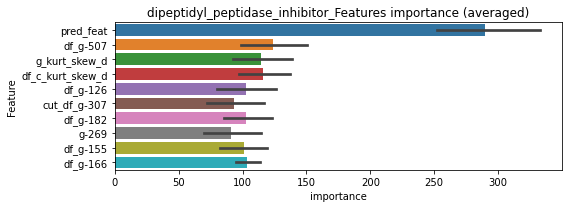

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000369372	valid_1's binary_logloss: 0.00201873
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000254215	valid_1's binary_logloss: 0.00158202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194173	valid_1's binary_logloss: 0.000164934
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.000161581	valid_1's binary_logloss: 0.000126973


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dipeptidyl_peptidase_inhibitor logloss: 0.0014678658596594327


Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000243692	valid_1's binary_logloss: 0.00213523
neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000451332	valid_1's binary_logloss: 0.00202056
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000214216	valid_1's binary_logloss: 0.00139473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000439267	valid_1's binary_logloss: 0.00553906
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000218427	valid_1's binary_logloss: 0.00510581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000458366	valid_1's binary_logloss: 0.000513186
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000212844	valid_1's binary_logloss: 0.000239388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000435996	valid_1's binary_logloss: 0.00098172


1 / 3 AUC score:1.000
y_Threshold: 0.0006016, Threshold: 0.0020697, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00145, conf_1:0.00269
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0020697
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0520697


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000220378	valid_1's binary_logloss: 0.000570855


threshold: 0.0520697, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315759	valid_1's binary_logloss: 0.000667812
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000162148	valid_1's binary_logloss: 0.000474673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303253	valid_1's binary_logloss: 0.00218309
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000157137	valid_1's binary_logloss: 0.00192992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311006	valid_1's binary_logloss: 0.000557788
[600]	training's binary_logloss: 0.000141849	valid_1's binary_logloss: 0.000368581
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000133832	valid_1's binary_logloss: 0.000354011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00031091	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.2107474, Threshold: 0.0520697, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0517328 Vs.target_rate: 0.00025
Num_p_label: 206.0, conf_0:0.04166, conf_1:0.06248
Num_p_label: 206.0, Expected: 1.0, Adj_threshold_1: 0.0520697
Num_p_label: 185.0, Expected: 1.0, Adj_threshold_2: 0.1020697
Num_p_label: 131.0, Expected: 1.0, Adj_threshold_3: 0.1520697
Num_p_label: 89.0, Expected: 1.0, Adj_threshold_4: 0.2020697
Num_p_label: 63.0, Expected: 1.0, Adj_threshold_5: 0.2520697
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_6: 0.3020697
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_7: 0.3520697
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_8: 0.4020697
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_9: 0.4520697
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.5020697
threshold: 0.5520697, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315377	valid_1's binary_logloss: 0.000719172
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000155897	valid_1's binary_logloss: 0.000505844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302736	valid_1's binary_logloss: 0.00219559
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000156814	valid_1's binary_logloss: 0.00195068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310753	valid_1's binary_logloss: 0.000531027
[600]	training's binary_logloss: 0.000141694	valid_1's binary_logloss: 0.00033723
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000133549	valid_1's binary_logloss: 0.000323692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311456	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.1904632, Threshold: 0.5520697, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000126327	valid_1's binary_logloss: 0.000193365
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000126327	valid_1's binary_logloss: 0.000193365


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, conf_0:0.49686, conf_1:0.60728
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.5520697
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.6020697
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.6520697
threshold: 0.6520697, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00016345	valid_1's binary_logloss: 0.000408899
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.000381102	valid_1's binary_logloss: 0.0023856
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152905	valid_1's binary_logloss: 0.000221791
[2000]	training's binary_logloss: 0.000130013	valid_1's binary_logloss: 0.000196754


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[2407]	training's binary_logloss: 0.00012673	valid_1's binary_logloss: 0.000193518
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152474	valid_1's binary_logloss: 0.000200014
[2000]	training's binary_logloss: 0.000128888	valid_1's binary_logloss: 0.000174048


diuretic logloss: 0.0007896827713733193


Early stopping, best iteration is:
[2389]	training's binary_logloss: 0.000125796	valid_1's binary_logloss: 0.000170666
neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356556	valid_1's binary_logloss: 0.0244358
[600]	training's binary_logloss: 0.000728911	valid_1's binary_logloss: 0.0187328
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.0006115	valid_1's binary_logloss: 0.0183766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362426	valid_1's binary_logloss: 0.0209154
[600]	training's binary_logloss: 0.000740702	valid_1's binary_logloss: 0.0130644
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000624489	valid_1's binary_logloss: 0.0124371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396918	valid_1's binary_logloss: 0.00738079
[600]	training's binary_logloss: 0.000781785	valid_1's binary_logloss: 0.00222139
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000610695	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0045622, Threshold: 0.0982410, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.06877, conf_1:0.12771
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0982410
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.1482410
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_3: 0.1982410
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_4: 0.2482410
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.2982410
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_6: 0.3482410
threshold: 0.3482410, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946131	valid_1's binary_logloss: 0.00427971
[600]	training's binary_logloss: 0.000218399	valid_1's binary_logloss: 0.00298627
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000222041	valid_1's binary_logloss: 0.00296746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000962143	valid_1's binary_logloss: 0.00296296
[600]	training's binary_logloss: 0.000220931	valid_1's binary_logloss: 0.00192791
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000214939	valid_1's binary_logloss: 0.00190943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100994	valid_1's binary_logloss: 0.00382299
[600]	training's binary_logloss: 0.000220982	valid_1's binary_logloss: 0.0023428
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000212079	valid_1's bin

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000215488	valid_1's binary_logloss: 0.000943405
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000218011	valid_1's binary_logloss: 0.000943279


y_Threshold: 0.4949757, Threshold: 0.3482410, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0602712 Vs.target_rate: 0.00202
Num_p_label: 240.0, conf_0:0.27859, conf_1:0.41789
Num_p_label: 240.0, Expected: 8.0, Adj_threshold_1: 0.3482410
Num_p_label: 226.0, Expected: 8.0, Adj_threshold_2: 0.3982410
Num_p_label: 211.0, Expected: 8.0, Adj_threshold_3: 0.4482410
Num_p_label: 175.0, Expected: 8.0, Adj_threshold_4: 0.4982410
Num_p_label: 156.0, Expected: 8.0, Adj_threshold_5: 0.5482410
Num_p_label: 132.0, Expected: 8.0, Adj_threshold_6: 0.5982410
Num_p_label: 124.0, Expected: 8.0, Adj_threshold_7: 0.6482410
Num_p_label: 105.0, Expected: 8.0, Adj_threshold_8: 0.6982410
Num_p_label: 86.0, Expected: 8.0, Adj_threshold_9: 0.7482410
Num_p_label: 72.0, Expected: 8.0, Adj_threshold_10: 0.7982410
threshold: 0.7982410, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000942211	valid_1's binary_logloss: 0.00483014
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000247685	valid_1's binary_logloss: 0.00353907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956433	valid_1's binary_logloss: 0.00306491
[600]	training's binary_logloss: 0.000221519	valid_1's binary_logloss: 0.00210123
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000209424	valid_1's binary_logloss: 0.00207367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102734	valid_1's binary_logloss: 0.00372407
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000341662	valid_1's binary_logloss: 0.0026472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000953597	valid_1's binary_logloss: 0.001870

3 / 3 AUC score:1.000
y_Threshold: 0.5226871, Threshold: 0.7982410, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0178302 Vs.target_rate: 0.00202
Num_p_label: 71.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 71.0, Expected: 8.0, Adj_threshold_1: 0.7982410
threshold: 0.7982410, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 654.0/3800, y_label_rate: 0.1721053


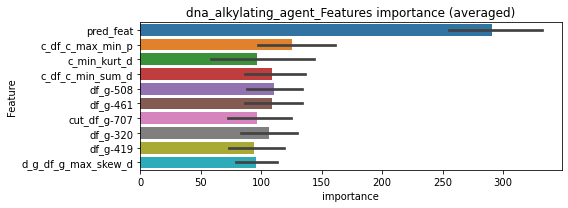

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000255466	valid_1's binary_logloss: 0.00684454
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000231077	valid_1's binary_logloss: 0.000718866
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000297882	valid_1's binary_logloss: 0.00159718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000216755	valid_1's binary_logloss: 0.00173184


dna_alkylating_agent logloss: 0.002727432037503133


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248
target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.0732354	valid_1's binary_logloss: 0.359079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.0671257	valid_1's binary_logloss: 0.336833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0688067	valid_1's binary_logloss: 0.324407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0618458	valid_1's binary_logloss: 0.317635
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0647281	valid_1's binary_logloss: 0.317131


1 / 3 AUC score:0.813
y_Threshold: 0.1289659, Threshold: 0.4869748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 609 → Positive_corect_labels: 410/3288
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, conf_0:0.34088, conf_1:0.63307
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4869748
Num_p_label: 47.0, Expected: 67.2, Adj_threshold_2: 0.4669748
threshold: 0.4669748, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 410.0/3288, y_label_rate: 0.1246959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162287	valid_1's binary_logloss: 0.00855238
[600]	training's binary_logloss: 0.000270506	valid_1's binary_logloss: 0.00416485
[900]	training's binary_logloss: 0.000181527	valid_1's binary_logloss: 0.00385814
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000178311	valid_1's binary_logloss: 0.0038437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171305	valid_1's binary_logloss: 0.00820262
[600]	training's binary_logloss: 0.000272714	valid_1's binary_logloss: 0.00414638
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000262818	valid_1's binary_logloss: 0.00410017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173675	valid_1's binary_logloss: 0.0060087
[600]	training's binary_logloss: 0.000283083	valid_1's binary_logloss: 0.00133478
[900]	training

2 / 3 AUC score:1.000
y_Threshold: 0.1167421, Threshold: 0.4669748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 408.0/3284
p_label_rate: 0.1441487 Vs.target_rate: 0.01688
Num_p_label: 574.0, conf_0:0.37358, conf_1:0.56037
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_1: 0.4669748
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_2: 0.5169748
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_3: 0.5669748
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_4: 0.6169748
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_5: 0.6669748
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_6: 0.7169748
Num_p_label: 573.0, Expected: 67.2, Adj_threshold_7: 0.7669748
threshold: 0.7669748, positive_p_label: 573.0/3982, p_label_rate: 0.1438975
positive_y_label: 408.0/3284, y_label_rate: 0.1242387
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144974	valid_1's binary_logloss: 0.00543022
[600]	training's binary_logloss: 0.000202754	valid_1's binary_logloss: 0.000831714
[900]	training's binary_logloss: 0.000125784	valid_1's binary_logloss: 0.000518719
[1200]	training's binary_logloss: 0.000117112	valid_1's binary_logloss: 0.000481542
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000116871	valid_1's binary_logloss: 0.000480574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148228	valid_1's binary_logloss: 0.00537001
[600]	training's binary_logloss: 0.000204807	valid_1's binary_logloss: 0.000805314
[900]	training's binary_logloss: 0.000125625	valid_1's binary_logloss: 0.000496175
[1200]	training's binary_logloss: 0.0001173	valid_1's binary_logloss: 0.000463029
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000116189	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1205625, Threshold: 0.7669748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 408.0/3284
p_label_rate: 0.1441487 Vs.target_rate: 0.01688
Num_p_label: 574.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 574.0, Expected: 67.2, Adj_threshold_1: 0.7669748
threshold: 0.7669748, positive_p_label: 574.0/3982, p_label_rate: 0.1441487
positive_y_label: 408.0/3284, y_label_rate: 0.1242387


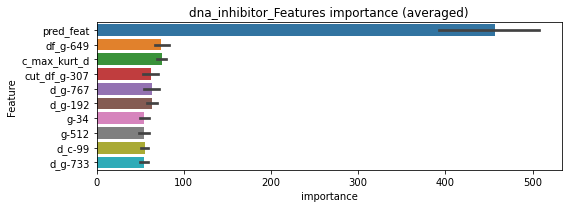

len(train_index) : 2463
len(valid_index) : 821
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172905	valid_1's binary_logloss: 0.000688625
[2000]	training's binary_logloss: 0.00012782	valid_1's binary_logloss: 0.000510823
[3000]	training's binary_logloss: 0.000118692	valid_1's binary_logloss: 0.000474016


len(train_index) : 2463
len(valid_index) : 821


Early stopping, best iteration is:
[3406]	training's binary_logloss: 0.000117297	valid_1's binary_logloss: 0.000468053


================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172916	valid_1's binary_logloss: 0.000687941
[2000]	training's binary_logloss: 0.000127893	valid_1's binary_logloss: 0.000510397
[3000]	training's binary_logloss: 0.000118762	valid_1's binary_logloss: 0.000473531


len(train_index) : 2463
len(valid_index) : 821
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[3194]	training's binary_logloss: 0.000117873	valid_1's binary_logloss: 0.000469496
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173017	valid_1's binary_logloss: 0.000601085
[2000]	training's binary_logloss: 0.000127966	valid_1's binary_logloss: 0.000445697
[3000]	training's binary_logloss: 0.000118812	valid_1's binary_logloss: 0.000413391
Early stopping, best iteration is:
[3370]	training's binary_logloss: 0.000117439	valid_1's binary_logloss: 0.000408307


len(train_index) : 2463
len(valid_index) : 821
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172877	valid_1's binary_logloss: 0.000701973
[2000]	training's binary_logloss: 0.000127911	valid_1's binary_logloss: 0.000520768
[3000]	training's binary_logloss: 0.000118778	valid_1's binary_logloss: 0.000482993
Early stopping, best iteration is:
[3556]	training's binary_logloss: 0.000116999	valid_1's binary_logloss: 0.000475227


dna_inhibitor logloss: 0.0004552710733895535


neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272
target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116672	valid_1's binary_logloss: 0.129991
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00268169	valid_1's binary_logloss: 0.122436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134396	valid_1's binary_logloss: 0.071728
[600]	training's binary_logloss: 0.00209499	valid_1's binary_logloss: 0.0565799
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00197788	valid_1's binary_logloss: 0.0563102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137475	valid_1's binary_logloss: 0.0675548
[600]	training's binary_logloss: 0.00210812	valid_1's binary_logloss: 0.0467572
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00155293	valid_1's binary_logloss: 0.045568
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.994
y_Threshold: 0.0171613, Threshold: 0.0842194, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3756
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, conf_0:0.05895, conf_1:0.10949
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0842194
Num_p_label: 26.0, Expected: 20.2, Adj_threshold_2: 0.1342194
threshold: 0.1342194, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 635.0/3756, y_label_rate: 0.1690628
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157241	valid_1's binary_logloss: 0.00356836
[600]	training's binary_logloss: 0.000255506	valid_1's binary_logloss: 0.00102461
[900]	training's binary_logloss: 0.000174581	valid_1's binary_logloss: 0.000834202
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000166509	valid_1's binary_logloss: 0.000804532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160633	valid_1's binary_logloss: 0.00593107
[600]	training's binary_logloss: 0.000260597	valid_1's binary_logloss: 0.00347138
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000199849	valid_1's binary_logloss: 0.00334245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160638	valid_1's binary_logloss: 0.0039517
[600]	training's binary_logloss: 0.00025658	valid_1's binary_logloss: 0.00121802
[900]	train

2 / 3 AUC score:1.000
y_Threshold: 0.2530704, Threshold: 0.1342194, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0678051 Vs.target_rate: 0.00508
Num_p_label: 270.0, conf_0:0.10738, conf_1:0.16106
Num_p_label: 270.0, Expected: 20.2, Adj_threshold_1: 0.1342194


Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000784004	valid_1's binary_logloss: 0.00586633


Num_p_label: 256.0, Expected: 20.2, Adj_threshold_2: 0.1842194
Num_p_label: 224.0, Expected: 20.2, Adj_threshold_3: 0.2342194
Num_p_label: 199.0, Expected: 20.2, Adj_threshold_4: 0.2842194
Num_p_label: 191.0, Expected: 20.2, Adj_threshold_5: 0.3342194
Num_p_label: 184.0, Expected: 20.2, Adj_threshold_6: 0.3842194
Num_p_label: 182.0, Expected: 20.2, Adj_threshold_7: 0.4342194
Num_p_label: 180.0, Expected: 20.2, Adj_threshold_8: 0.4842194
Num_p_label: 180.0, Expected: 20.2, Adj_threshold_9: 0.5342194
Num_p_label: 179.0, Expected: 20.2, Adj_threshold_10: 0.5842194
threshold: 0.6342194, positive_p_label: 165.0/3982, p_label_rate: 0.0414365
positive_y_label: 632.0/3750, y_label_rate: 0.1685333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148917	valid_1's binary_logloss: 0.00290796
[600]	training's binary_logloss: 0.000223362	valid_1's binary_logloss: 0.000410282
[900]	training's binary_logloss: 0.000152766	valid_1's binary_logloss: 0.000251727
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000141711	valid_1's binary_logloss: 0.000218713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148642	valid_1's binary_logloss: 0.00354125
[600]	training's binary_logloss: 0.00023502	valid_1's binary_logloss: 0.00060132
[900]	training's binary_logloss: 0.000161977	valid_1's binary_logloss: 0.000377702
[1200]	training's binary_logloss: 0.000145248	valid_1's binary_logloss: 0.000324387
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.000145248	valid_1's binary_logloss: 0.000324387
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.1255720, Threshold: 0.6342194, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 631.0/3748
p_label_rate: 0.0419387 Vs.target_rate: 0.00508
Num_p_label: 167.0, conf_0:0.50000, conf_1:0.69764
Num_p_label: 167.0, Expected: 20.2, Adj_threshold_1: 0.6342194
Num_p_label: 167.0, Expected: 20.2, Adj_threshold_2: 0.6842194
Num_p_label: 167.0, Expected: 20.2, Adj_threshold_3: 0.7342194
Num_p_label: 146.0, Expected: 20.2, Adj_threshold_4: 0.7842194
threshold: 0.7842194, positive_p_label: 146.0/3982, p_label_rate: 0.0366650
positive_y_label: 631.0/3748, y_label_rate: 0.1683565


len(train_index) : 2811
len(valid_index) : 937
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150852	valid_1's binary_logloss: 0.000418772
[2000]	training's binary_logloss: 0.000111906	valid_1's binary_logloss: 0.000311567
[3000]	training's binary_logloss: 0.00010401	valid_1's binary_logloss: 0.000289497


len(train_index) : 2811
len(valid_index) : 937


Early stopping, best iteration is:
[3414]	training's binary_logloss: 0.000102803	valid_1's binary_logloss: 0.000286031


================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2811
len(valid_index) : 937
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000385503	valid_1's binary_logloss: 0.00728304
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151015	valid_1's binary_logloss: 0.00033746
[2000]	training's binary_logloss: 0.00011194	valid_1's binary_logloss: 0.00025067
[3000]	training's binary_logloss: 0.000104066	valid_1's binary_logloss: 0.000233022
Early stopping, best iteration is:
[3593]	training's binary_logloss: 0.000102405	valid_1's binary_logloss: 0.000229098


len(train_index) : 2811
len(valid_index) : 937
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020103	valid_1's binary_logloss: 0.0010282
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.000178082	valid_1's binary_logloss: 0.000962907


dopamine_receptor_agonist logloss: 0.0021926041742340355


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231
target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.086474	valid_1's binary_logloss: 0.3753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.0850301	valid_1's binary_logloss: 0.369564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0990668	valid_1's binary_logloss: 0.343507
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.756
y_Threshold: 0.1397153, Threshold: 0.5445179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 722 → Positive_corect_labels: 350/3155
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, conf_0:0.38116, conf_1:0.70787
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5445179
Num_p_label: 54.0, Expected: 70.9, Adj_threshold_2: 0.5245179
threshold: 0.5245179, positive_p_label: 54.0/3982, p_label_rate: 0.0135610


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0855174	valid_1's binary_logloss: 0.376942


positive_y_label: 350.0/3155, y_label_rate: 0.1109350
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164257	valid_1's binary_logloss: 0.00806092
[600]	training's binary_logloss: 0.000276098	valid_1's binary_logloss: 0.00416689
[900]	training's binary_logloss: 0.000189676	valid_1's binary_logloss: 0.00377926
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000189402	valid_1's binary_logloss: 0.00377409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162867	valid_1's binary_logloss: 0.00480007
[600]	training's binary_logloss: 0.00027452	valid_1's binary_logloss: 0.000826744
[900]	training's binary_logloss: 0.000188692	valid_1's binary_logloss: 0.000482968
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000173825	valid_1's binary_logloss: 0.000426907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165057	valid_1's binary_logloss: 0.00860362
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1030443, Threshold: 0.5245179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 348.0/3151
p_label_rate: 0.1391261 Vs.target_rate: 0.01780
Num_p_label: 554.0, conf_0:0.41961, conf_1:0.62942
Num_p_label: 554.0, Expected: 70.9, Adj_threshold_1: 0.5245179
Num_p_label: 550.0, Expected: 70.9, Adj_threshold_2: 0.5745179
Num_p_label: 548.0, Expected: 70.9, Adj_threshold_3: 0.6245179
Num_p_label: 548.0, Expected: 70.9, Adj_threshold_4: 0.6745179
Num_p_label: 548.0, Expected: 70.9, Adj_threshold_5: 0.7245179
Num_p_label: 546.0, Expected: 70.9, Adj_threshold_6: 0.7745179
threshold: 0.7745179, positive_p_label: 546.0/3982, p_label_rate: 0.1371170
positive_y_label: 348.0/3151, y_label_rate: 0.1104411
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136903	valid_1's binary_logloss: 0.0149053
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000286956	valid_1's binary_logloss: 0.0125652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014346	valid_1's binary_logloss: 0.00466183
[600]	training's binary_logloss: 0.000207727	valid_1's binary_logloss: 0.000733928
[900]	training's binary_logloss: 0.000130913	valid_1's binary_logloss: 0.000466732
[1200]	training's binary_logloss: 0.000121991	valid_1's binary_logloss: 0.000433524
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.000121226	valid_1's binary_logloss: 0.000430058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141036	valid_1's binary_logloss: 0.00536782
[600]	training's binary_logloss: 0.000206927	valid_1's binary_logloss: 0.00086012
[900]	tra

3 / 3 AUC score:0.999
y_Threshold: 0.0018199, Threshold: 0.7745179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 347.0/3149
p_label_rate: 0.1391261 Vs.target_rate: 0.01780
Num_p_label: 554.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 554.0, Expected: 70.9, Adj_threshold_1: 0.7745179
threshold: 0.7745179, positive_p_label: 554.0/3982, p_label_rate: 0.1391261
positive_y_label: 347.0/3149, y_label_rate: 0.1101937


len(train_index) : 2361
len(valid_index) : 788
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2362
len(valid_index) : 787
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00101018	valid_1's binary_logloss: 0.0174803
Training until validation scores don't improve for 30 rounds


len(train_index) : 2362
len(valid_index) : 787
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000841487	valid_1's binary_logloss: 0.00776862
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00023559	valid_1's binary_logloss: 0.000688218
[2000]	training's binary_logloss: 0.000180059	valid_1's binary_logloss: 0.000486916
Early stopping, best iteration is:
[2291]	training's binary_logloss: 0.00017434	valid_1's binary_logloss: 0.000464708


len(train_index) : 2362
len(valid_index) : 787
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000179826	valid_1's binary_logloss: 0.000725628
[2000]	training's binary_logloss: 0.000133326	valid_1's binary_logloss: 0.000539846
[3000]	training's binary_logloss: 0.000123787	valid_1's binary_logloss: 0.000500596
Early stopping, best iteration is:
[3169]	training's binary_logloss: 0.000122889	valid_1's binary_logloss: 0.000496404


dopamine_receptor_antagonist logloss: 0.0065647805376087


neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242
target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.052766	valid_1's binary_logloss: 0.301618
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0397056	valid_1's binary_logloss: 0.300361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0527371	valid_1's binary_logloss: 0.281012
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.0288246	valid_1's binary_logloss: 0.274935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0531383	valid_1's binary_logloss: 0.297224
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0371068	valid_1's binary_logloss: 0.295321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0527917	valid_1's binary_logloss: 0.307422
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0452318	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.855
y_Threshold: 0.1005973, Threshold: 0.7592833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 522 → Positive_corect_labels: 452/3368
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7592833, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 452.0/3368, y_label_rate: 0.1342043
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194552	valid_1's binary_logloss: 0.0114441
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000324494	valid_1's binary_logloss: 0.00650555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204927	valid_1's binary_logloss: 0.0045922
[600]	training's binary_logloss: 0.000300477	valid_1's binary_logloss: 0.00116748
[900]	training's binary_logloss: 0.000196638	valid_1's binary_logloss: 0.000899952
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000192652	valid_1's binary_logloss: 0.000880295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200925	valid_1's binary_logloss: 0.00545558
[600]	training's binary_logloss: 0.000303529	valid_1's binary_logloss: 0.00147825
[900]	training's binary_logloss: 0.000198655	valid_1's binary_logloss: 0.00111576
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.2761861, Threshold: 0.7592833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 450.0/3364
p_label_rate: 0.1059769 Vs.target_rate: 0.01411
Num_p_label: 422.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 422.0, Expected: 56.2, Adj_threshold_1: 0.7592833
threshold: 0.7592833, positive_p_label: 422.0/3982, p_label_rate: 0.1059769
positive_y_label: 450.0/3364, y_label_rate: 0.1337693
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201739	valid_1's binary_logloss: 0.00699474
[600]	training's binary_logloss: 0.000306566	valid_1's binary_logloss: 0.00297133
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000281672	valid_1's binary_logloss: 0.00287898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199176	valid_1's binary_logloss: 0.00740694
[600]	training's binary_logloss: 0.00030203	valid_1's binary_logloss: 0.00315098
[900]	training's binary_logloss: 0.000200003	valid_1's binary_logloss: 0.00282585
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000202503	valid_1's binary_logloss: 0.00281429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197201	valid_1's binary_logloss: 0.0058108
[600]	training's binary_logloss: 0.00029747	valid_1's binary_logloss: 0.00200116
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.4247160, Threshold: 0.7592833, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000211307	valid_1's binary_logloss: 0.00159783


Remove_noisy_data: 4 → Positive_corect_labels: 448.0/3360
p_label_rate: 0.1027122 Vs.target_rate: 0.01411
Num_p_label: 409.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 409.0, Expected: 56.2, Adj_threshold_1: 0.7592833
threshold: 0.7592833, positive_p_label: 409.0/3982, p_label_rate: 0.1027122
positive_y_label: 448.0/3360, y_label_rate: 0.1333333


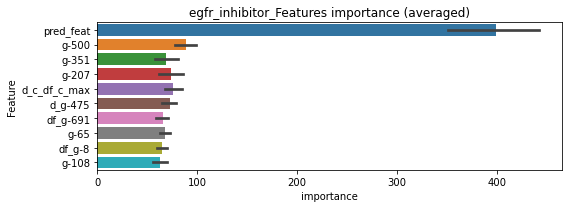

len(train_index) : 2520
len(valid_index) : 840
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000309004	valid_1's binary_logloss: 0.00288968


len(train_index) : 2520
len(valid_index) : 840
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000239123	valid_1's binary_logloss: 0.00117013
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.000210941	valid_1's binary_logloss: 0.00110161


len(train_index) : 2520
len(valid_index) : 840
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2520
len(valid_index) : 840
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.000710798	valid_1's binary_logloss: 0.00689712
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000239421	valid_1's binary_logloss: 0.00428584
Early stopping, best iteration is:
[1366]	training's binary_logloss: 0.000209951	valid_1's binary_logloss: 0.00416065


egfr_inhibitor logloss: 0.0037661662897348325


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671724	valid_1's binary_logloss: 0.00320694
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000280765	valid_1's binary_logloss: 0.00246769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694107	valid_1's binary_logloss: 0.00240821
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000275711	valid_1's binary_logloss: 0.00153281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000711587	valid_1's binary_logloss: 0.000818282
[600]	training's binary_logloss: 0.00026625	valid_1's binary_logloss: 0.00032604
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00026625	valid_1's binary_logloss: 0.00032604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000717924	valid_1's binary_logloss: 0.00118

1 / 3 AUC score:1.000
y_Threshold: 0.0010930, Threshold: 0.0031217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00219, conf_1:0.00406
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031217
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0531217


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000288054	valid_1's binary_logloss: 0.000620474


threshold: 0.0531217, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413243	valid_1's binary_logloss: 0.0014881
[600]	training's binary_logloss: 0.000165308	valid_1's binary_logloss: 0.00113128
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000151156	valid_1's binary_logloss: 0.00111187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000414953	valid_1's binary_logloss: 0.00087967
[600]	training's binary_logloss: 0.000163259	valid_1's binary_logloss: 0.000577913
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000145911	valid_1's binary_logloss: 0.000556957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004217	valid_1's binary_logloss: 0.000372257
[600]	training's binary_logloss: 0.000164085	valid_1's binary_logloss: 0.00012949
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000149819	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.3586129, Threshold: 0.0531217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0524862 Vs.target_rate: 0.00050
Num_p_label: 209.0, conf_0:0.04250, conf_1:0.06375
Num_p_label: 209.0, Expected: 2.0, Adj_threshold_1: 0.0531217
Num_p_label: 209.0, Expected: 2.0, Adj_threshold_2: 0.1031217
Num_p_label: 202.0, Expected: 2.0, Adj_threshold_3: 0.1531217
Num_p_label: 162.0, Expected: 2.0, Adj_threshold_4: 0.2031217
Num_p_label: 123.0, Expected: 2.0, Adj_threshold_5: 0.2531217
Num_p_label: 79.0, Expected: 2.0, Adj_threshold_6: 0.3031217
Num_p_label: 45.0, Expected: 2.0, Adj_threshold_7: 0.3531217
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_8: 0.4031217
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.4531217
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5031217
threshold: 0.5531217, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=======

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411163	valid_1's binary_logloss: 0.00157498
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000190982	valid_1's binary_logloss: 0.00123958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412926	valid_1's binary_logloss: 0.00085988
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000167124	valid_1's binary_logloss: 0.00056418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000424364	valid_1's binary_logloss: 0.000380143
[600]	training's binary_logloss: 0.000164569	valid_1's binary_logloss: 0.000131229
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000149304	valid_1's binary_logloss: 0.000114153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00041565	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.3574346, Threshold: 0.5531217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.49781, conf_1:0.60843
threshold: 0.5531217, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000177757	valid_1's binary_logloss: 0.000576955


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


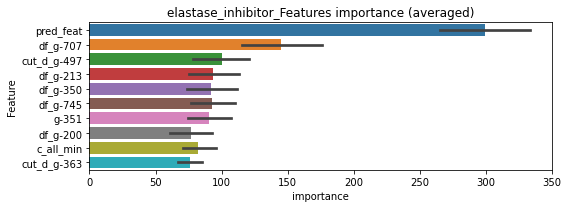

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000187269	valid_1's binary_logloss: 0.00125219
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000174094	valid_1's binary_logloss: 0.000828085


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[1296]	training's binary_logloss: 0.00016239	valid_1's binary_logloss: 0.000813342


================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000178916	valid_1's binary_logloss: 0.00014082
Early stopping, best iteration is:
[1823]	training's binary_logloss: 0.00015609	valid_1's binary_logloss: 0.000116525


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0008196115256743079


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000238255	valid_1's binary_logloss: 0.00108556
neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287
target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156843	valid_1's binary_logloss: 0.00408178
[600]	training's binary_logloss: 0.000401817	valid_1's binary_logloss: 0.00229635
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000400875	valid_1's binary_logloss: 0.00229234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155437	valid_1's binary_logloss: 0.00494624
[600]	training's binary_logloss: 0.000401733	valid_1's binary_logloss: 0.00223082
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383869	valid_1's binary_logloss: 0.00218111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161627	valid_1's binary_logloss: 0.00287082
[600]	training's binary_logloss: 0.000411885	valid_1's binary_logloss: 0.000928416
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000393936	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0026069, Threshold: 0.0080826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, conf_0:0.00566, conf_1:0.01051
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0080826
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_2: 0.0580826
threshold: 0.0580826, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064221	valid_1's binary_logloss: 0.000937246
[600]	training's binary_logloss: 0.000189464	valid_1's binary_logloss: 0.000343362
[900]	training's binary_logloss: 0.000153671	valid_1's binary_logloss: 0.000296657
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00015362	valid_1's binary_logloss: 0.000296419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609872	valid_1's binary_logloss: 0.00207806
[600]	training's binary_logloss: 0.000176915	valid_1's binary_logloss: 0.00142318
[900]	training's binary_logloss: 0.000143289	valid_1's binary_logloss: 0.0013841
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000143289	valid_1's binary_logloss: 0.0013841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634087	valid_1's binary_logloss: 0.00128109
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.4719694, Threshold: 0.0580826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0449523 Vs.target_rate: 0.00084
Num_p_label: 179.0, conf_0:0.04647, conf_1:0.06970
Num_p_label: 179.0, Expected: 3.3, Adj_threshold_1: 0.0580826
Num_p_label: 179.0, Expected: 3.3, Adj_threshold_2: 0.1080826
Num_p_label: 179.0, Expected: 3.3, Adj_threshold_3: 0.1580826
Num_p_label: 179.0, Expected: 3.3, Adj_threshold_4: 0.2080826
Num_p_label: 178.0, Expected: 3.3, Adj_threshold_5: 0.2580826
Num_p_label: 176.0, Expected: 3.3, Adj_threshold_6: 0.3080826
Num_p_label: 170.0, Expected: 3.3, Adj_threshold_7: 0.3580826
Num_p_label: 157.0, Expected: 3.3, Adj_threshold_8: 0.4080826
Num_p_label: 139.0, Expected: 3.3, Adj_threshold_9: 0.4580826
Num_p_label: 117.0, Expected: 3.3, Adj_threshold_10: 0.5080826
threshold: 0.5580826, positive_p_label: 83.0/3982, p_label_rate: 0.0208438
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636817	valid_1's binary_logloss: 0.000886989
[600]	training's binary_logloss: 0.000188	valid_1's binary_logloss: 0.000315951
[900]	training's binary_logloss: 0.000152667	valid_1's binary_logloss: 0.000269661
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000152434	valid_1's binary_logloss: 0.000269116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000625093	valid_1's binary_logloss: 0.00210313
[600]	training's binary_logloss: 0.000175841	valid_1's binary_logloss: 0.00145715
[900]	training's binary_logloss: 0.000143643	valid_1's binary_logloss: 0.00141962
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000142335	valid_1's binary_logloss: 0.00141779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628748	valid_1's binary_logloss: 0.00129413
[600]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.4835296, Threshold: 0.5580826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0195881 Vs.target_rate: 0.00084
Num_p_label: 78.0, conf_0:0.50000, conf_1:0.61389
Num_p_label: 78.0, Expected: 3.3, Adj_threshold_1: 0.5580826
Num_p_label: 43.0, Expected: 3.3, Adj_threshold_2: 0.6080826
Num_p_label: 26.0, Expected: 3.3, Adj_threshold_3: 0.6580826
Num_p_label: 15.0, Expected: 3.3, Adj_threshold_4: 0.7080826
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_5: 0.7580826
threshold: 0.7580826, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


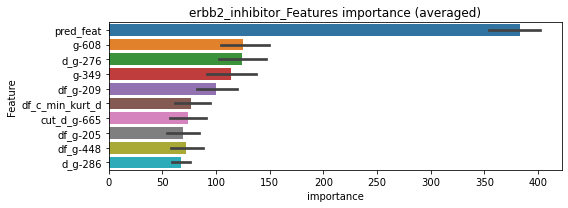

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000190763	valid_1's binary_logloss: 0.000358806
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000163142	valid_1's binary_logloss: 0.000326049


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000182504	valid_1's binary_logloss: 0.00163041


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.00015456	valid_1's binary_logloss: 0.00160044
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000183124	valid_1's binary_logloss: 0.000811215


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.000155746	valid_1's binary_logloss: 0.000765165
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000183514	valid_1's binary_logloss: 0.00019572
[2000]	training's binary_logloss: 0.000151804	valid_1's binary_logloss: 0.000149279
Early stopping, best iteration is:
[1975]	training's binary_logloss: 0.000151804	valid_1's binary_logloss: 0.000149279


erbb2_inhibitor logloss: 0.0007104057572802994


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270
target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190005	valid_1's binary_logloss: 0.149358
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00965353	valid_1's binary_logloss: 0.142339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191552	valid_1's binary_logloss: 0.145991
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00715557	valid_1's binary_logloss: 0.141352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195175	valid_1's binary_logloss: 0.0950743
[600]	training's binary_logloss: 0.0030709	valid_1's binary_logloss: 0.083524
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00294793	valid_1's binary_logloss: 0.0833565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185282	valid_1's binary_logloss: 0.149535
Early stopping, best i

1 / 3 AUC score:0.970
y_Threshold: 0.0327649, Threshold: 0.3187020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 235 → Positive_corect_labels: 602/3689
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, conf_0:0.22309, conf_1:0.41431
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.3187020
Num_p_label: 37.0, Expected: 26.4, Adj_threshold_2: 0.3687020
threshold: 0.3687020, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 602.0/3689, y_label_rate: 0.1631879
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160684	valid_1's binary_logloss: 0.00505168
[600]	training's binary_logloss: 0.000266782	valid_1's binary_logloss: 0.00193142
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000198525	valid_1's binary_logloss: 0.00167055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016603	valid_1's binary_logloss: 0.00754439
[600]	training's binary_logloss: 0.000272636	valid_1's binary_logloss: 0.00485562
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000200904	valid_1's binary_logloss: 0.00467876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173227	valid_1's binary_logloss: 0.00616503
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00035651	valid_1's binary_logloss: 0.00384042
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.4225658, Threshold: 0.3687020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 599.0/3683
p_label_rate: 0.0836263 Vs.target_rate: 0.00663
Num_p_label: 333.0, conf_0:0.29496, conf_1:0.44244
Num_p_label: 333.0, Expected: 26.4, Adj_threshold_1: 0.3687020
Num_p_label: 318.0, Expected: 26.4, Adj_threshold_2: 0.4187020
Num_p_label: 300.0, Expected: 26.4, Adj_threshold_3: 0.4687020
Num_p_label: 281.0, Expected: 26.4, Adj_threshold_4: 0.5187020
Num_p_label: 260.0, Expected: 26.4, Adj_threshold_5: 0.5687020
Num_p_label: 239.0, Expected: 26.4, Adj_threshold_6: 0.6187020
Num_p_label: 227.0, Expected: 26.4, Adj_threshold_7: 0.6687020
Num_p_label: 219.0, Expected: 26.4, Adj_threshold_8: 0.7187020
Num_p_label: 214.0, Expected: 26.4, Adj_threshold_9: 0.7687020
threshold: 0.7687020, positive_p_label: 214.0/3982, p_label_rate: 0.0537418
positive_y_label: 599.0/3683, y_label_rate: 0.1626392
================= Pseudo labeling 3 / 3 =============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153143	valid_1's binary_logloss: 0.00526412
[600]	training's binary_logloss: 0.000255506	valid_1's binary_logloss: 0.00246642
[900]	training's binary_logloss: 0.000176271	valid_1's binary_logloss: 0.0022603
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000170431	valid_1's binary_logloss: 0.00224164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161888	valid_1's binary_logloss: 0.00937332
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000366166	valid_1's binary_logloss: 0.00748188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164092	valid_1's binary_logloss: 0.00480632
[600]	training's binary_logloss: 0.000263871	valid_1's binary_logloss: 0.00268251
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000268461	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.4775858, Threshold: 0.7687020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 596.0/3677
p_label_rate: 0.0662983 Vs.target_rate: 0.00663
Num_p_label: 264.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 264.0, Expected: 26.4, Adj_threshold_1: 0.7687020
threshold: 0.7687020, positive_p_label: 264.0/3982, p_label_rate: 0.0662983
positive_y_label: 596.0/3677, y_label_rate: 0.1620887


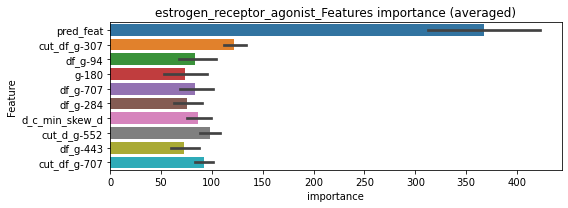

len(train_index) : 2757
len(valid_index) : 920
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2758
len(valid_index) : 919
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000799019	valid_1's binary_logloss: 0.00674148
Training until validation scores don't improve for 30 rounds


len(train_index) : 2758


Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000211001	valid_1's binary_logloss: 0.00146787


len(valid_index) : 919
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2758
len(valid_index) : 919
================================= fold 4/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000482566	valid_1's binary_logloss: 0.00138301
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202283	valid_1's binary_logloss: 0.00033777
[2000]	training's binary_logloss: 0.000157222	valid_1's binary_logloss: 0.000236726
Early stopping, best iteration is:
[2467]	training's binary_logloss: 0.000149096	valid_1's binary_logloss: 0.000218149


estrogen_receptor_agonist logloss: 0.0024608357770616283


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415876	valid_1's binary_logloss: 0.0189452
[600]	training's binary_logloss: 0.000785356	valid_1's binary_logloss: 0.0126281
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000810351	valid_1's binary_logloss: 0.0125702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410806	valid_1's binary_logloss: 0.0191465
[600]	training's binary_logloss: 0.000785864	valid_1's binary_logloss: 0.0118037
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000624052	valid_1's binary_logloss: 0.0112737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044341	valid_1's binary_logloss: 0.0135662
[600]	training's binary_logloss: 0.000817104	valid_1's binary_logloss: 0.00570344
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000612892	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0065660, Threshold: 0.1767764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.12374, conf_1:0.22981
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1767764
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_2: 0.2267764
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.2767764
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.3267764
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3767764
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_6: 0.4267764
threshold: 0.4267764, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103692	valid_1's binary_logloss: 0.00656159
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000267075	valid_1's binary_logloss: 0.00529455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106183	valid_1's binary_logloss: 0.00139525
[600]	training's binary_logloss: 0.000230179	valid_1's binary_logloss: 0.000259118
[900]	training's binary_logloss: 0.000173839	valid_1's binary_logloss: 0.000172376
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000172033	valid_1's binary_logloss: 0.000169845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107747	valid_1's binary_logloss: 0.00190193
[600]	training's binary_logloss: 0.000228066	valid_1's binary_logloss: 0.000971777
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000221377	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.5165488, Threshold: 0.4267764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0580110 Vs.target_rate: 0.00202
Num_p_label: 231.0, conf_0:0.34142, conf_1:0.51213
Num_p_label: 231.0, Expected: 8.0, Adj_threshold_1: 0.4267764
Num_p_label: 225.0, Expected: 8.0, Adj_threshold_2: 0.4767764
Num_p_label: 218.0, Expected: 8.0, Adj_threshold_3: 0.5267764


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000253863	valid_1's binary_logloss: 0.00518792


Num_p_label: 202.0, Expected: 8.0, Adj_threshold_4: 0.5767764
Num_p_label: 181.0, Expected: 8.0, Adj_threshold_5: 0.6267764
Num_p_label: 144.0, Expected: 8.0, Adj_threshold_6: 0.6767764
Num_p_label: 107.0, Expected: 8.0, Adj_threshold_7: 0.7267764
Num_p_label: 82.0, Expected: 8.0, Adj_threshold_8: 0.7767764
threshold: 0.7767764, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106368	valid_1's binary_logloss: 0.00334281
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000287394	valid_1's binary_logloss: 0.0022803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102962	valid_1's binary_logloss: 0.00371344
[600]	training's binary_logloss: 0.000225153	valid_1's binary_logloss: 0.00241261
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00023174	valid_1's binary_logloss: 0.0023617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100768	valid_1's binary_logloss: 0.00555484
[600]	training's binary_logloss: 0.000223882	valid_1's binary_logloss: 0.00474569
[900]	training's binary_logloss: 0.000171879	valid_1's binary_logloss: 0.00467007
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00017307	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.4162297, Threshold: 0.7767764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0105475 Vs.target_rate: 0.00202
Num_p_label: 42.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_1: 0.7767764


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000274664	valid_1's binary_logloss: 0.00128133


threshold: 0.7767764, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


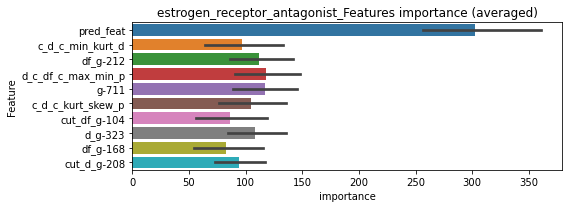

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020355	valid_1's binary_logloss: 0.000359331
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.000165784	valid_1's binary_logloss: 0.000302085


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210251	valid_1's binary_logloss: 0.000880049
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.00018957	valid_1's binary_logloss: 0.000827338


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000298545	valid_1's binary_logloss: 0.00617106
Training until validation scores don't improve for 30 rounds


estrogen_receptor_antagonist logloss: 0.0026364730031532657


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000361707	valid_1's binary_logloss: 0.00323015
neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271693	valid_1's binary_logloss: 0.0099678
[600]	training's binary_logloss: 0.000580321	valid_1's binary_logloss: 0.00434156
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000485301	valid_1's binary_logloss: 0.0040245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274026	valid_1's binary_logloss: 0.00905482
[600]	training's binary_logloss: 0.000583718	valid_1's binary_logloss: 0.00445465
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000496397	valid_1's binary_logloss: 0.00425975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280431	valid_1's binary_logloss: 0.00835131
[600]	training's binary_logloss: 0.000590472	valid_1's binary_logloss: 0.00374852
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000512799	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0042093, Threshold: 0.0151532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01061, conf_1:0.01970
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0151532
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_2: 0.0651532
threshold: 0.0651532, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000854606	valid_1's binary_logloss: 0.00310683
[600]	training's binary_logloss: 0.000205069	valid_1's binary_logloss: 0.00225173
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000177607	valid_1's binary_logloss: 0.00220386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878313	valid_1's binary_logloss: 0.00273091
[600]	training's binary_logloss: 0.000206691	valid_1's binary_logloss: 0.00179431
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000215799	valid_1's binary_logloss: 0.00178862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000851952	valid_1's binary_logloss: 0.00129944
[600]	training's binary_logloss: 0.000206184	valid_1's binary_logloss: 0.000490414
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000169835	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.6472792, Threshold: 0.0651532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0462079 Vs.target_rate: 0.00151
Num_p_label: 184.0, conf_0:0.05212, conf_1:0.07818
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_1: 0.0651532
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_2: 0.1151532
Num_p_label: 183.0, Expected: 6.0, Adj_threshold_3: 0.1651532
Num_p_label: 183.0, Expected: 6.0, Adj_threshold_4: 0.2151532
Num_p_label: 183.0, Expected: 6.0, Adj_threshold_5: 0.2651532
Num_p_label: 182.0, Expected: 6.0, Adj_threshold_6: 0.3151532
Num_p_label: 177.0, Expected: 6.0, Adj_threshold_7: 0.3651532
Num_p_label: 153.0, Expected: 6.0, Adj_threshold_8: 0.4151532
Num_p_label: 123.0, Expected: 6.0, Adj_threshold_9: 0.4651532
Num_p_label: 98.0, Expected: 6.0, Adj_threshold_10: 0.5151532
threshold: 0.5651532, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0008475	valid_1's binary_logloss: 0.00314881
[600]	training's binary_logloss: 0.0002054	valid_1's binary_logloss: 0.00216646
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000183132	valid_1's binary_logloss: 0.00213315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874627	valid_1's binary_logloss: 0.00252132
[600]	training's binary_logloss: 0.000207197	valid_1's binary_logloss: 0.00164256
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000205595	valid_1's binary_logloss: 0.0016382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087042	valid_1's binary_logloss: 0.0013024
[600]	training's binary_logloss: 0.000206892	valid_1's binary_logloss: 0.000504347
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000173763	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.6138508, Threshold: 0.5651532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0165746 Vs.target_rate: 0.00151
Num_p_label: 66.0, conf_0:0.50000, conf_1:0.62167
Num_p_label: 66.0, Expected: 6.0, Adj_threshold_1: 0.5651532
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_2: 0.6151532
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_3: 0.6651532
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.7151532
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_5: 0.7651532
threshold: 0.7651532, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


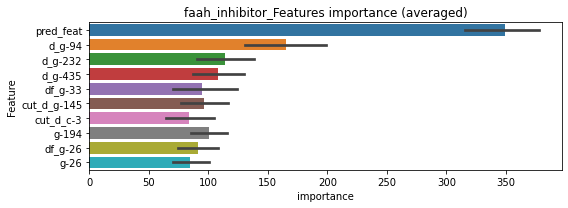

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000302248	valid_1's binary_logloss: 0.00241993
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 faah_inhibitor=================================


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000309424	valid_1's binary_logloss: 0.00295755
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207447	valid_1's binary_logloss: 0.000516205
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.000196274	valid_1's binary_logloss: 0.000501317


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202783	valid_1's binary_logloss: 0.00129637
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000198979	valid_1's binary_logloss: 0.0012907


faah_inhibitor logloss: 0.0017959008497157169


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122641	valid_1's binary_logloss: 0.0039158
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000375659	valid_1's binary_logloss: 0.00215128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122275	valid_1's binary_logloss: 0.0031492
[600]	training's binary_logloss: 0.000359663	valid_1's binary_logloss: 0.00131116
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000359663	valid_1's binary_logloss: 0.00131116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124169	valid_1's binary_logloss: 0.00235696
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000370281	valid_1's binary_logloss: 0.000860812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114354	valid_1's binary_logloss: 0.0068482
E

1 / 3 AUC score:1.000
y_Threshold: 0.0020498, Threshold: 0.0073935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00518, conf_1:0.00961
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0073935
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0573935
threshold: 0.0573935, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000552939	valid_1's binary_logloss: 0.00181648
[600]	training's binary_logloss: 0.00017791	valid_1's binary_logloss: 0.00124434
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000162937	valid_1's binary_logloss: 0.00122308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559359	valid_1's binary_logloss: 0.00114401
[600]	training's binary_logloss: 0.000176324	valid_1's binary_logloss: 0.000666721
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000173666	valid_1's binary_logloss: 0.00066004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544951	valid_1's binary_logloss: 0.00183025
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000478689	valid_1's binary_logloss: 0.00175571
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.4949672, Threshold: 0.0573935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0414365 Vs.target_rate: 0.00076
Num_p_label: 165.0, conf_0:0.04591, conf_1:0.06887
Num_p_label: 165.0, Expected: 3.0, Adj_threshold_1: 0.0573935
Num_p_label: 164.0, Expected: 3.0, Adj_threshold_2: 0.1073935
Num_p_label: 163.0, Expected: 3.0, Adj_threshold_3: 0.1573935
Num_p_label: 161.0, Expected: 3.0, Adj_threshold_4: 0.2073935
Num_p_label: 156.0, Expected: 3.0, Adj_threshold_5: 0.2573935
Num_p_label: 146.0, Expected: 3.0, Adj_threshold_6: 0.3073935


[600]	training's binary_logloss: 0.000175444	valid_1's binary_logloss: 0.000951235
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000178326	valid_1's binary_logloss: 0.000950541


Num_p_label: 130.0, Expected: 3.0, Adj_threshold_7: 0.3573935
Num_p_label: 114.0, Expected: 3.0, Adj_threshold_8: 0.4073935
Num_p_label: 92.0, Expected: 3.0, Adj_threshold_9: 0.4573935
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_10: 0.5073935
threshold: 0.5573935, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000558938	valid_1's binary_logloss: 0.00193596
[600]	training's binary_logloss: 0.000179305	valid_1's binary_logloss: 0.00127681
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000164737	valid_1's binary_logloss: 0.00125568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559857	valid_1's binary_logloss: 0.00111144
[600]	training's binary_logloss: 0.00017585	valid_1's binary_logloss: 0.000642706
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000176817	valid_1's binary_logloss: 0.000642691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545918	valid_1's binary_logloss: 0.0124806
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000487951	valid_1's binary_logloss: 0.0120472
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.6292105, Threshold: 0.5573935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0145655 Vs.target_rate: 0.00076
Num_p_label: 58.0, conf_0:0.50000, conf_1:0.61313
Num_p_label: 58.0, Expected: 3.0, Adj_threshold_1: 0.5573935
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.6073935
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.6573935
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.7073935
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.7573935
threshold: 0.7573935, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000187689	valid_1's binary_logloss: 0.000915113


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


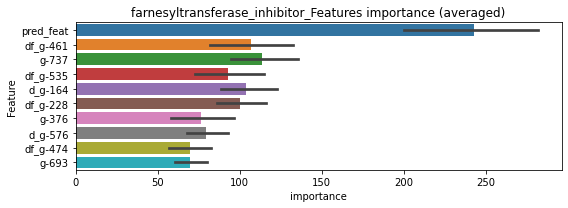

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018434	valid_1's binary_logloss: 0.00119249


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000176801	valid_1's binary_logloss: 0.00117435
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000183467	valid_1's binary_logloss: 0.000416184


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[1430]	training's binary_logloss: 0.000164059	valid_1's binary_logloss: 0.00039411
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000267249	valid_1's binary_logloss: 0.0011481
Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0009412554561836321


Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000187378	valid_1's binary_logloss: 0.0010401
neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168778	valid_1's binary_logloss: 0.0105813
[600]	training's binary_logloss: 0.000425614	valid_1's binary_logloss: 0.00856203
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00041483	valid_1's binary_logloss: 0.00850055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169204	valid_1's binary_logloss: 0.00781187
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000510148	valid_1's binary_logloss: 0.00508191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165233	valid_1's binary_logloss: 0.00387009
[600]	training's binary_logloss: 0.000426284	valid_1's binary_logloss: 0.00141579
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000419361	valid_1's binary_logloss: 0.00140278
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0025082, Threshold: 0.0111530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00781, conf_1:0.01450
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0111530
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0611530
threshold: 0.0611530, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000658989	valid_1's binary_logloss: 0.00261858
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000359273	valid_1's binary_logloss: 0.00182391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678869	valid_1's binary_logloss: 0.00233235
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000305965	valid_1's binary_logloss: 0.00172179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000677969	valid_1's binary_logloss: 0.00155107
[600]	training's binary_logloss: 0.0001955	valid_1's binary_logloss: 0.00101794
[900]	training's binary_logloss: 0.000163732	valid_1's binary_logloss: 0.00097075
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000161858	valid_1's binary_logloss: 0.00096817
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.5361679, Threshold: 0.0611530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0625314 Vs.target_rate: 0.00105
Num_p_label: 249.0, conf_0:0.04892, conf_1:0.07338
Num_p_label: 249.0, Expected: 4.2, Adj_threshold_1: 0.0611530
Num_p_label: 242.0, Expected: 4.2, Adj_threshold_2: 0.1111530
Num_p_label: 240.0, Expected: 4.2, Adj_threshold_3: 0.1611530
Num_p_label: 240.0, Expected: 4.2, Adj_threshold_4: 0.2111530
Num_p_label: 234.0, Expected: 4.2, Adj_threshold_5: 0.2611530
Num_p_label: 222.0, Expected: 4.2, Adj_threshold_6: 0.3111530
Num_p_label: 201.0, Expected: 4.2, Adj_threshold_7: 0.3611530
Num_p_label: 175.0, Expected: 4.2, Adj_threshold_8: 0.4111530
Num_p_label: 136.0, Expected: 4.2, Adj_threshold_9: 0.4611530
Num_p_label: 101.0, Expected: 4.2, Adj_threshold_10: 0.5111530
threshold: 0.5611530, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662277	valid_1's binary_logloss: 0.00312718
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000356373	valid_1's binary_logloss: 0.00218555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000686852	valid_1's binary_logloss: 0.00267893
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000334541	valid_1's binary_logloss: 0.00236675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682937	valid_1's binary_logloss: 0.00161
[600]	training's binary_logloss: 0.000194571	valid_1's binary_logloss: 0.00106959
[900]	training's binary_logloss: 0.000163948	valid_1's binary_logloss: 0.00103542
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000162309	valid_1's binary_logloss: 0.00103199
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.6171838, Threshold: 0.5611530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0185836 Vs.target_rate: 0.00105
Num_p_label: 74.0, conf_0:0.50000, conf_1:0.61727
Num_p_label: 74.0, Expected: 4.2, Adj_threshold_1: 0.5611530
Num_p_label: 53.0, Expected: 4.2, Adj_threshold_2: 0.6111530
Num_p_label: 34.0, Expected: 4.2, Adj_threshold_3: 0.6611530
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_4: 0.7111530


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000161225	valid_1's binary_logloss: 0.00204244


Num_p_label: 12.0, Expected: 4.2, Adj_threshold_5: 0.7611530
threshold: 0.7611530, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


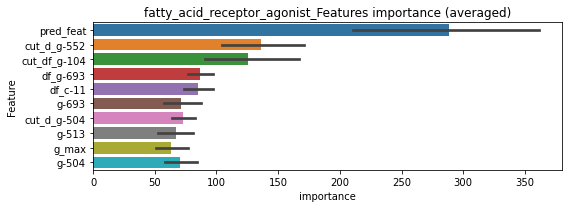

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000350013	valid_1's binary_logloss: 0.00429403
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000203696	valid_1's binary_logloss: 0.000345697
Early stopping, best iteration is:
[1390]	training's binary_logloss: 0.000183096	valid_1's binary_logloss: 0.000314759


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202064	valid_1's binary_logloss: 0.00214588
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000194218	valid_1's binary_logloss: 0.00212886


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


fatty_acid_receptor_agonist logloss: 0.0018931787433216095


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.000382446	valid_1's binary_logloss: 0.000829935
neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284
target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473164	valid_1's binary_logloss: 0.0228189
[600]	training's binary_logloss: 0.000826057	valid_1's binary_logloss: 0.0126447
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000635094	valid_1's binary_logloss: 0.0121905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046865	valid_1's binary_logloss: 0.018102
[600]	training's binary_logloss: 0.00083417	valid_1's binary_logloss: 0.00802173
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000612322	valid_1's binary_logloss: 0.00719212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517834	valid_1's binary_logloss: 0.0109526
[600]	training's binary_logloss: 0.000897367	valid_1's binary_logloss: 0.00377543
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000626438	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0063140, Threshold: 0.0229278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, conf_0:0.01605, conf_1:0.02981
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0229278
Num_p_label: 14.0, Expected: 8.4, Adj_threshold_2: 0.0729278
threshold: 0.0729278, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109872	valid_1's binary_logloss: 0.00536381
[600]	training's binary_logloss: 0.000224857	valid_1's binary_logloss: 0.00413998
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000197157	valid_1's binary_logloss: 0.00409547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109268	valid_1's binary_logloss: 0.00212214
[600]	training's binary_logloss: 0.000226172	valid_1's binary_logloss: 0.000957411
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000236287	valid_1's binary_logloss: 0.0009496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113296	valid_1's binary_logloss: 0.00286948
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000418249	valid_1's binary_logloss: 0.00210465
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.5349083, Threshold: 0.0729278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0489704 Vs.target_rate: 0.00210
Num_p_label: 195.0, conf_0:0.05834, conf_1:0.08751
Num_p_label: 195.0, Expected: 8.4, Adj_threshold_1: 0.0729278
Num_p_label: 194.0, Expected: 8.4, Adj_threshold_2: 0.1229278
Num_p_label: 190.0, Expected: 8.4, Adj_threshold_3: 0.1729278
Num_p_label: 190.0, Expected: 8.4, Adj_threshold_4: 0.2229278
Num_p_label: 189.0, Expected: 8.4, Adj_threshold_5: 0.2729278


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000259851	valid_1's binary_logloss: 0.00139927


Num_p_label: 187.0, Expected: 8.4, Adj_threshold_6: 0.3229278
Num_p_label: 185.0, Expected: 8.4, Adj_threshold_7: 0.3729278
Num_p_label: 182.0, Expected: 8.4, Adj_threshold_8: 0.4229278
Num_p_label: 180.0, Expected: 8.4, Adj_threshold_9: 0.4729278
Num_p_label: 169.0, Expected: 8.4, Adj_threshold_10: 0.5229278
threshold: 0.5729278, positive_p_label: 149.0/3982, p_label_rate: 0.0374184
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104891	valid_1's binary_logloss: 0.00293327
[600]	training's binary_logloss: 0.000225775	valid_1's binary_logloss: 0.00179404
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000175117	valid_1's binary_logloss: 0.00173215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110598	valid_1's binary_logloss: 0.0033776
[600]	training's binary_logloss: 0.000230192	valid_1's binary_logloss: 0.00201873
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000205101	valid_1's binary_logloss: 0.00197695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110529	valid_1's binary_logloss: 0.00227806
[600]	training's binary_logloss: 0.000232403	valid_1's binary_logloss: 0.000984208
[900]	training's binary_logloss: 0.000174596	valid_1's binary_logloss: 0.000848991
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.4925331, Threshold: 0.5729278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0140633 Vs.target_rate: 0.00210
Num_p_label: 56.0, conf_0:0.50000, conf_1:0.63022
Num_p_label: 56.0, Expected: 8.4, Adj_threshold_1: 0.5729278
Num_p_label: 33.0, Expected: 8.4, Adj_threshold_2: 0.6229278
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_3: 0.6729278
threshold: 0.6729278, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


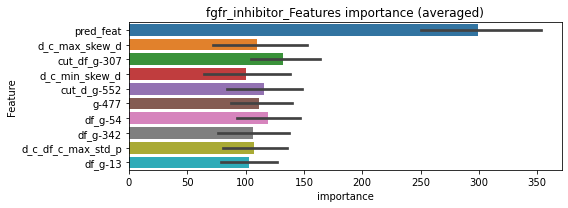

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000216296	valid_1's binary_logloss: 0.00100637
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000217903	valid_1's binary_logloss: 0.00100406


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000443561	valid_1's binary_logloss: 0.00245278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000216948	valid_1's binary_logloss: 0.00096134
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000205296	valid_1's binary_logloss: 0.000941832


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


fgfr_inhibitor logloss: 0.0018418217303348703


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00025307	valid_1's binary_logloss: 0.00295792
neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258
target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.041494	valid_1's binary_logloss: 0.254852
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0285133	valid_1's binary_logloss: 0.251725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0417488	valid_1's binary_logloss: 0.253589
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0237218	valid_1's binary_logloss: 0.247923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0439502	valid_1's binary_logloss: 0.254192
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0377588	valid_1's binary_logloss: 0.253008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0476326	valid_1's binary_logloss: 0.221082
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.0171105	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.895
y_Threshold: 0.0798099, Threshold: 0.7617591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 419 → Positive_corect_labels: 507/3490
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7617591, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 507.0/3490, y_label_rate: 0.1452722
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170207	valid_1's binary_logloss: 0.00464541
[600]	training's binary_logloss: 0.000204218	valid_1's binary_logloss: 0.000608957
[900]	training's binary_logloss: 0.000119318	valid_1's binary_logloss: 0.000358511
[1200]	training's binary_logloss: 0.000110483	valid_1's binary_logloss: 0.000331474
Early stopping, best iteration is:
[1390]	training's binary_logloss: 0.000108864	valid_1's binary_logloss: 0.000325845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174032	valid_1's binary_logloss: 0.00442473
[600]	training's binary_logloss: 0.000205727	valid_1's binary_logloss: 0.000573857
[900]	training's binary_logloss: 0.000119541	valid_1's binary_logloss: 0.000335596
[1200]	training's binary_logloss: 0.000110436	valid_1's binary_logloss: 0.000309625
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.000109708	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0709848, Threshold: 0.7617591, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000157294	valid_1's binary_logloss: 0.00422781


Remove_noisy_data: 2 → Positive_corect_labels: 506.0/3488
p_label_rate: 0.1019588 Vs.target_rate: 0.01172
Num_p_label: 406.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 406.0, Expected: 46.7, Adj_threshold_1: 0.7617591
threshold: 0.7617591, positive_p_label: 406.0/3982, p_label_rate: 0.1019588
positive_y_label: 506.0/3488, y_label_rate: 0.1450688
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186927	valid_1's binary_logloss: 0.00602825
[600]	training's binary_logloss: 0.000261283	valid_1's binary_logloss: 0.00196322
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000220982	valid_1's binary_logloss: 0.00180154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193753	valid_1's binary_logloss: 0.00601287
[600]	training's binary_logloss: 0.000263924	valid_1's binary_logloss: 0.00266169
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000245938	valid_1's binary_logloss: 0.00260109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174154	valid_1's binary_logloss: 0.00421219
[600]	training's binary_logloss: 0.000205481	valid_1's binary_logloss: 0.000547668
[900]	training's binary_logloss: 0.000119527	valid_1's binary_logloss: 0.000320821
[1200]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.7202195, Threshold: 0.7617591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 505.0/3486
p_label_rate: 0.1109995 Vs.target_rate: 0.01172
Num_p_label: 442.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 442.0, Expected: 46.7, Adj_threshold_1: 0.7617591
threshold: 0.7617591, positive_p_label: 442.0/3982, p_label_rate: 0.1109995
positive_y_label: 505.0/3486, y_label_rate: 0.1448652


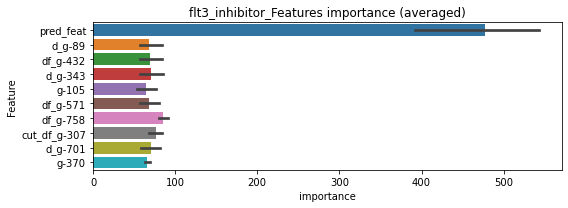

len(train_index) : 2614
len(valid_index) : 872
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2614
len(valid_index) : 872
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000496321	valid_1's binary_logloss: 0.00678492
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217748	valid_1's binary_logloss: 0.00224849
Early stopping, best iteration is:
[1963]	training's binary_logloss: 0.000163635	valid_1's binary_logloss: 0.00211374


len(train_index) : 2615
len(valid_index) : 871
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00021329	valid_1's binary_logloss: 0.000398053
[2000]	training's binary_logloss: 0.000164061	valid_1's binary_logloss: 0.00028122
Early stopping, best iteration is:
[2226]	training's binary_logloss: 0.000160258	valid_1's binary_logloss: 0.000271176


len(train_index) : 2615
len(valid_index) : 871
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000216056	valid_1's binary_logloss: 0.000445627
[2000]	training's binary_logloss: 0.000162039	valid_1's binary_logloss: 0.000314979
Early stopping, best iteration is:
[2457]	training's binary_logloss: 0.000153173	valid_1's binary_logloss: 0.000291386


flt3_inhibitor logloss: 0.002455415238505476


neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125565	valid_1's binary_logloss: 0.00305999
[600]	training's binary_logloss: 0.00035789	valid_1's binary_logloss: 0.00136962
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000358247	valid_1's binary_logloss: 0.00136901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120326	valid_1's binary_logloss: 0.00346611
[600]	training's binary_logloss: 0.000355818	valid_1's binary_logloss: 0.0015709
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000355818	valid_1's binary_logloss: 0.0015709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125191	valid_1's binary_logloss: 0.00226282
[600]	training's binary_logloss: 0.000361139	valid_1's binary_logloss: 0.000892883
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000358118	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0019068, Threshold: 0.0087929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01143
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0087929
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0587929
threshold: 0.0587929, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549577	valid_1's binary_logloss: 0.0016505
[600]	training's binary_logloss: 0.000177533	valid_1's binary_logloss: 0.00104558
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000177158	valid_1's binary_logloss: 0.00104438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543927	valid_1's binary_logloss: 0.000919891
[600]	training's binary_logloss: 0.000173446	valid_1's binary_logloss: 0.000487239
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000149398	valid_1's binary_logloss: 0.000457349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544038	valid_1's binary_logloss: 0.000623259
[600]	training's binary_logloss: 0.000174658	valid_1's binary_logloss: 0.000209919
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000147521	valid_1

2 / 3 AUC score:1.000
y_Threshold: 0.3323736, Threshold: 0.0587929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0537418 Vs.target_rate: 0.00076
Num_p_label: 214.0, conf_0:0.04703, conf_1:0.07055
Num_p_label: 214.0, Expected: 3.0, Adj_threshold_1: 0.0587929
Num_p_label: 214.0, Expected: 3.0, Adj_threshold_2: 0.1087929
Num_p_label: 211.0, Expected: 3.0, Adj_threshold_3: 0.1587929
Num_p_label: 206.0, Expected: 3.0, Adj_threshold_4: 0.2087929
Num_p_label: 198.0, Expected: 3.0, Adj_threshold_5: 0.2587929
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_6: 0.3087929
Num_p_label: 139.0, Expected: 3.0, Adj_threshold_7: 0.3587929
Num_p_label: 110.0, Expected: 3.0, Adj_threshold_8: 0.4087929
Num_p_label: 90.0, Expected: 3.0, Adj_threshold_9: 0.4587929
Num_p_label: 69.0, Expected: 3.0, Adj_threshold_10: 0.5087929
threshold: 0.5587929, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00055789	valid_1's binary_logloss: 0.00171043
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000192539	valid_1's binary_logloss: 0.00117606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000540498	valid_1's binary_logloss: 0.0009012
[600]	training's binary_logloss: 0.000170506	valid_1's binary_logloss: 0.000432069
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000145287	valid_1's binary_logloss: 0.000405424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545763	valid_1's binary_logloss: 0.000620287
[600]	training's binary_logloss: 0.000174605	valid_1's binary_logloss: 0.00019602
[900]	training's binary_logloss: 0.000146007	valid_1's binary_logloss: 0.000162234
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000146007	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.3434346, Threshold: 0.5587929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0138122 Vs.target_rate: 0.00076
Num_p_label: 55.0, conf_0:0.50000, conf_1:0.61467
Num_p_label: 55.0, Expected: 3.0, Adj_threshold_1: 0.5587929
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_2: 0.6087929
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.6587929
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.7087929
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.7587929


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000207624	valid_1's binary_logloss: 0.000944285


threshold: 0.7587929, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


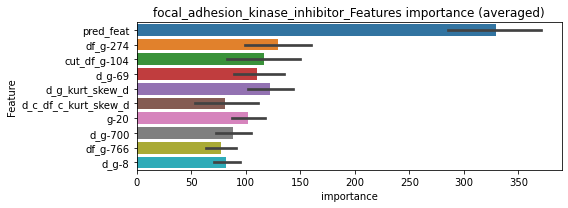

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000196051	valid_1's binary_logloss: 0.00113818
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000190388	valid_1's binary_logloss: 0.000642301
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000179703	valid_1's binary_logloss: 0.000209324
[2000]	training's binary_logloss: 0.000147269	valid_1's binary_logloss: 0.000173584
Early stopping, best iteration is:
[2169]	training's binary_logloss: 0.000145257	valid_1's binary_logloss: 0.000171072


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


focal_adhesion_kinase_inhibitor logloss: 0.0011957094792570948


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000483772	valid_1's binary_logloss: 0.00282511
neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134123	valid_1's binary_logloss: 0.00361857
[600]	training's binary_logloss: 0.000370861	valid_1's binary_logloss: 0.00156589
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000362501	valid_1's binary_logloss: 0.00153913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132753	valid_1's binary_logloss: 0.00290751
[600]	training's binary_logloss: 0.000369383	valid_1's binary_logloss: 0.00102197
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000367357	valid_1's binary_logloss: 0.0010178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133762	valid_1's binary_logloss: 0.00233105
[600]	training's binary_logloss: 0.000370167	valid_1's binary_logloss: 0.000783213
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000368882	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023002, Threshold: 0.0089286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00625, conf_1:0.01161
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089286
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0589286
threshold: 0.0589286, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576714	valid_1's binary_logloss: 0.00174467
[600]	training's binary_logloss: 0.000179628	valid_1's binary_logloss: 0.00124457
[900]	training's binary_logloss: 0.000149455	valid_1's binary_logloss: 0.00120482
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000147336	valid_1's binary_logloss: 0.00120258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000567536	valid_1's binary_logloss: 0.00148601
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000198626	valid_1's binary_logloss: 0.00104976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000567411	valid_1's binary_logloss: 0.00125073
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000180632	valid_1's binary_logloss: 0.000802707
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5238884, Threshold: 0.0589286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0459568 Vs.target_rate: 0.00076
Num_p_label: 183.0, conf_0:0.04714, conf_1:0.07071
Num_p_label: 183.0, Expected: 3.0, Adj_threshold_1: 0.0589286
Num_p_label: 182.0, Expected: 3.0, Adj_threshold_2: 0.1089286
Num_p_label: 182.0, Expected: 3.0, Adj_threshold_3: 0.1589286
Num_p_label: 180.0, Expected: 3.0, Adj_threshold_4: 0.2089286


[600]	training's binary_logloss: 0.000175338	valid_1's binary_logloss: 0.000492931
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000177713	valid_1's binary_logloss: 0.000488355


Num_p_label: 175.0, Expected: 3.0, Adj_threshold_5: 0.2589286
Num_p_label: 160.0, Expected: 3.0, Adj_threshold_6: 0.3089286
Num_p_label: 142.0, Expected: 3.0, Adj_threshold_7: 0.3589286
Num_p_label: 116.0, Expected: 3.0, Adj_threshold_8: 0.4089286
Num_p_label: 89.0, Expected: 3.0, Adj_threshold_9: 0.4589286
Num_p_label: 67.0, Expected: 3.0, Adj_threshold_10: 0.5089286
threshold: 0.5589286, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000578255	valid_1's binary_logloss: 0.00185076
[600]	training's binary_logloss: 0.000179179	valid_1's binary_logloss: 0.0013587
[900]	training's binary_logloss: 0.000149322	valid_1's binary_logloss: 0.00131997
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.00014926	valid_1's binary_logloss: 0.00131991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000565316	valid_1's binary_logloss: 0.00170273
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000194968	valid_1's binary_logloss: 0.00124771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00056903	valid_1's binary_logloss: 0.0012971
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000198101	valid_1's binary_logloss: 0.00088232
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.5532524, Threshold: 0.5589286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00076
Num_p_label: 43.0, conf_0:0.50000, conf_1:0.61482
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.5589286
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.6089286
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.6589286
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.7089286
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.7589286
threshold: 0.7589286, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


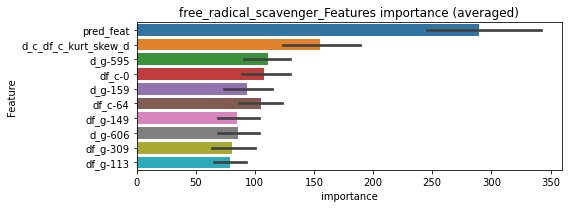

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187958	valid_1's binary_logloss: 0.000798949
[2000]	training's binary_logloss: 0.000155134	valid_1's binary_logloss: 0.000757925
Early stopping, best iteration is:
[2068]	training's binary_logloss: 0.000154126	valid_1's binary_logloss: 0.000756979


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000180222	valid_1's binary_logloss: 0.00114678
Early stopping, best iteration is:
[1508]	training's binary_logloss: 0.000156848	valid_1's binary_logloss: 0.00111671


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018409	valid_1's binary_logloss: 0.0004041
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000177655	valid_1's binary_logloss: 0.00039528


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


free_radical_scavenger logloss: 0.0007033987808678122


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000195644	valid_1's binary_logloss: 0.000542968
neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178676	valid_1's binary_logloss: 0.00391571
[600]	training's binary_logloss: 0.000431698	valid_1's binary_logloss: 0.00150801
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000432533	valid_1's binary_logloss: 0.00150595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164523	valid_1's binary_logloss: 0.0114631
[600]	training's binary_logloss: 0.000421572	valid_1's binary_logloss: 0.00799656
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000421572	valid_1's binary_logloss: 0.00799656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176262	valid_1's binary_logloss: 0.0029791
[600]	training's binary_logloss: 0.000431247	valid_1's binary_logloss: 0.000934376
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000419307	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026942, Threshold: 0.0088332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00618, conf_1:0.01148
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0088332
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_2: 0.0588332
threshold: 0.0588332, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000683382	valid_1's binary_logloss: 0.00205305
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000309845	valid_1's binary_logloss: 0.00163148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650447	valid_1's binary_logloss: 0.00305669
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000202865	valid_1's binary_logloss: 0.00191828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662897	valid_1's binary_logloss: 0.000713336
[600]	training's binary_logloss: 0.000186034	valid_1's binary_logloss: 0.000167983
[900]	training's binary_logloss: 0.000150657	valid_1's binary_logloss: 0.000123449
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.00014887	valid_1's binary_logloss: 0.00012122
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.5336195, Threshold: 0.0588332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0492215 Vs.target_rate: 0.00097
Num_p_label: 196.0, conf_0:0.04707, conf_1:0.07060
Num_p_label: 196.0, Expected: 3.8, Adj_threshold_1: 0.0588332
Num_p_label: 191.0, Expected: 3.8, Adj_threshold_2: 0.1088332
Num_p_label: 189.0, Expected: 3.8, Adj_threshold_3: 0.1588332
Num_p_label: 188.0, Expected: 3.8, Adj_threshold_4: 0.2088332
Num_p_label: 186.0, Expected: 3.8, Adj_threshold_5: 0.2588332


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000227576	valid_1's binary_logloss: 0.00159402


Num_p_label: 184.0, Expected: 3.8, Adj_threshold_6: 0.3088332
Num_p_label: 180.0, Expected: 3.8, Adj_threshold_7: 0.3588332
Num_p_label: 161.0, Expected: 3.8, Adj_threshold_8: 0.4088332
Num_p_label: 124.0, Expected: 3.8, Adj_threshold_9: 0.4588332
Num_p_label: 93.0, Expected: 3.8, Adj_threshold_10: 0.5088332
threshold: 0.5588332, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678474	valid_1's binary_logloss: 0.0033416
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000312518	valid_1's binary_logloss: 0.00278174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649814	valid_1's binary_logloss: 0.0029546
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000198305	valid_1's binary_logloss: 0.00187373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657492	valid_1's binary_logloss: 0.000712777
[600]	training's binary_logloss: 0.000184499	valid_1's binary_logloss: 0.000170284
[900]	training's binary_logloss: 0.000147943	valid_1's binary_logloss: 0.000124075
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000147324	valid_1's binary_logloss: 0.000123287
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.4920728, Threshold: 0.5588332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0140633 Vs.target_rate: 0.00097
Num_p_label: 56.0, conf_0:0.50000, conf_1:0.61472
Num_p_label: 56.0, Expected: 3.8, Adj_threshold_1: 0.5588332
Num_p_label: 38.0, Expected: 3.8, Adj_threshold_2: 0.6088332
Num_p_label: 28.0, Expected: 3.8, Adj_threshold_3: 0.6588332
Num_p_label: 17.0, Expected: 3.8, Adj_threshold_4: 0.7088332
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_5: 0.7588332
threshold: 0.7588332, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000307749	valid_1's binary_logloss: 0.00157939


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


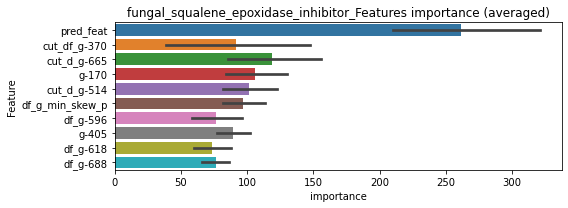

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.00034536	valid_1's binary_logloss: 0.00309835
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000213601	valid_1's binary_logloss: 0.00143978


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018624	valid_1's binary_logloss: 0.000163745
[2000]	training's binary_logloss: 0.000153657	valid_1's binary_logloss: 0.000123471
Early stopping, best iteration is:
[2042]	training's binary_logloss: 0.000153191	valid_1's binary_logloss: 0.000122881


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186295	valid_1's binary_logloss: 0.000392509
Early stopping, best iteration is:
[1260]	training's binary_logloss: 0.000172358	valid_1's binary_logloss: 0.000373657


fungal_squalene_epoxidase_inhibitor logloss: 0.0012660863334761825


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110802	valid_1's binary_logloss: 0.0985136
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00225249	valid_1's binary_logloss: 0.0880662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122954	valid_1's binary_logloss: 0.0673314
[600]	training's binary_logloss: 0.00190011	valid_1's binary_logloss: 0.0499468
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00193143	valid_1's binary_logloss: 0.0499355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013612	valid_1's binary_logloss: 0.0543789
[600]	training's binary_logloss: 0.00201004	valid_1's binary_logloss: 0.0356792
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00131822	valid_1's binary_logloss: 0.033965
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.997
y_Threshold: 0.0163256, Threshold: 0.1097095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 641/3768
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07680, conf_1:0.14262
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1097095
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_2: 0.1597095
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_3: 0.2097095
threshold: 0.2097095, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 641.0/3768, y_label_rate: 0.1701168
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151985	valid_1's binary_logloss: 0.00759074
[600]	training's binary_logloss: 0.000250764	valid_1's binary_logloss: 0.00585838
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000268272	valid_1's binary_logloss: 0.00582527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154768	valid_1's binary_logloss: 0.00592032
[600]	training's binary_logloss: 0.000254285	valid_1's binary_logloss: 0.00364268
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000182217	valid_1's binary_logloss: 0.00347888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156233	valid_1's binary_logloss: 0.00503715
[600]	training's binary_logloss: 0.000251165	valid_1's binary_logloss: 0.00300843
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000203778	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.4601471, Threshold: 0.2097095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0617780 Vs.target_rate: 0.00445
Num_p_label: 246.0, conf_0:0.16777, conf_1:0.25165
Num_p_label: 246.0, Expected: 17.7, Adj_threshold_1: 0.2097095
Num_p_label: 246.0, Expected: 17.7, Adj_threshold_2: 0.2597095
Num_p_label: 246.0, Expected: 17.7, Adj_threshold_3: 0.3097095
Num_p_label: 245.0, Expected: 17.7, Adj_threshold_4: 0.3597095
Num_p_label: 245.0, Expected: 17.7, Adj_threshold_5: 0.4097095
Num_p_label: 245.0, Expected: 17.7, Adj_threshold_6: 0.4597095
Num_p_label: 244.0, Expected: 17.7, Adj_threshold_7: 0.5097095
Num_p_label: 242.0, Expected: 17.7, Adj_threshold_8: 0.5597095
Num_p_label: 230.0, Expected: 17.7, Adj_threshold_9: 0.6097095
Num_p_label: 211.0, Expected: 17.7, Adj_threshold_10: 0.6597095
threshold: 0.7097095, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 638.0/3762, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154015	valid_1's binary_logloss: 0.00707847
[600]	training's binary_logloss: 0.000260764	valid_1's binary_logloss: 0.00444616
[900]	training's binary_logloss: 0.000184693	valid_1's binary_logloss: 0.00422881
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000179013	valid_1's binary_logloss: 0.00420895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159589	valid_1's binary_logloss: 0.00683941
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000611894	valid_1's binary_logloss: 0.00582899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154703	valid_1's binary_logloss: 0.00524533
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000274517	valid_1's binary_logloss: 0.00315854
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.4708863, Threshold: 0.7097095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0253641 Vs.target_rate: 0.00445
Num_p_label: 101.0, conf_0:0.50000, conf_1:0.78068
Num_p_label: 101.0, Expected: 17.7, Adj_threshold_1: 0.7097095
Num_p_label: 101.0, Expected: 17.7, Adj_threshold_2: 0.7597095
threshold: 0.7597095, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 634.0/3754, y_label_rate: 0.1688865


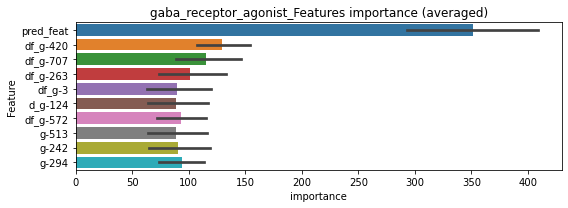

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000919572	valid_1's binary_logloss: 0.00756994
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000211591	valid_1's binary_logloss: 0.000733657
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000174687	valid_1's binary_logloss: 0.000648569


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217821	valid_1's binary_logloss: 0.000484544
[2000]	training's binary_logloss: 0.000173284	valid_1's binary_logloss: 0.000379195
Early stopping, best iteration is:
[1973]	training's binary_logloss: 0.000173284	valid_1's binary_logloss: 0.000379195


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217065	valid_1's binary_logloss: 0.00211457
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000190576	valid_1's binary_logloss: 0.0020456


gaba_receptor_agonist logloss: 0.0026617760819219803


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266
target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215839	valid_1's binary_logloss: 0.136552
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00752109	valid_1's binary_logloss: 0.125508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199719	valid_1's binary_logloss: 0.130461
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00582833	valid_1's binary_logloss: 0.119739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211449	valid_1's binary_logloss: 0.135608
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.0039553	valid_1's binary_logloss: 0.120919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201445	valid_1's binary_logloss: 0.137969
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00456885	valid_1's binary_logloss

1 / 3 AUC score:0.980
y_Threshold: 0.0346927, Threshold: 0.1156673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 223 → Positive_corect_labels: 607/3696
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, conf_0:0.08097, conf_1:0.15037
threshold: 0.1156673, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 607.0/3696, y_label_rate: 0.1642316
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182691	valid_1's binary_logloss: 0.00460587
[600]	training's binary_logloss: 0.000275402	valid_1's binary_logloss: 0.00147569
[900]	training's binary_logloss: 0.000181795	valid_1's binary_logloss: 0.00118758
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000173488	valid_1's binary_logloss: 0.00114878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181196	valid_1's binary_logloss: 0.00756425
[600]	training's binary_logloss: 0.00027674	valid_1's binary_logloss: 0.00385993
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000228612	valid_1's binary_logloss: 0.0037088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189841	valid_1's binary_logloss: 0.00547888
[600]	training's binary_logloss: 0.000280005	valid_1's binary_logloss: 0.00239467
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.3172167, Threshold: 0.1156673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 604.0/3690
p_label_rate: 0.0713209 Vs.target_rate: 0.00693
Num_p_label: 284.0, conf_0:0.09253, conf_1:0.13880
Num_p_label: 284.0, Expected: 27.6, Adj_threshold_1: 0.1156673
Num_p_label: 278.0, Expected: 27.6, Adj_threshold_2: 0.1656673
Num_p_label: 252.0, Expected: 27.6, Adj_threshold_3: 0.2156673
Num_p_label: 233.0, Expected: 27.6, Adj_threshold_4: 0.2656673
Num_p_label: 216.0, Expected: 27.6, Adj_threshold_5: 0.3156673
Num_p_label: 209.0, Expected: 27.6, Adj_threshold_6: 0.3656673
Num_p_label: 191.0, Expected: 27.6, Adj_threshold_7: 0.4156673
Num_p_label: 175.0, Expected: 27.6, Adj_threshold_8: 0.4656673
Num_p_label: 166.0, Expected: 27.6, Adj_threshold_9: 0.5156673
Num_p_label: 162.0, Expected: 27.6, Adj_threshold_10: 0.5656673
threshold: 0.6156673, positive_p_label: 162.0/3982, p_label_rate: 0.0406831
positive_y_label: 604.0/3690, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180253	valid_1's binary_logloss: 0.0102946
[600]	training's binary_logloss: 0.000271731	valid_1's binary_logloss: 0.00688336
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000253694	valid_1's binary_logloss: 0.00678756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180171	valid_1's binary_logloss: 0.00900649
[600]	training's binary_logloss: 0.000272743	valid_1's binary_logloss: 0.00662084
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000271051	valid_1's binary_logloss: 0.00660702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185335	valid_1's binary_logloss: 0.00463993
[600]	training's binary_logloss: 0.000278286	valid_1's binary_logloss: 0.00188256
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000240733	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.6163115, Threshold: 0.6156673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 599.0/3680
p_label_rate: 0.0477147 Vs.target_rate: 0.00693
Num_p_label: 190.0, conf_0:0.50000, conf_1:0.67723
Num_p_label: 190.0, Expected: 27.6, Adj_threshold_1: 0.6156673
Num_p_label: 171.0, Expected: 27.6, Adj_threshold_2: 0.6656673
Num_p_label: 162.0, Expected: 27.6, Adj_threshold_3: 0.7156673
Num_p_label: 161.0, Expected: 27.6, Adj_threshold_4: 0.7656673
threshold: 0.7656673, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 599.0/3680, y_label_rate: 0.1627717


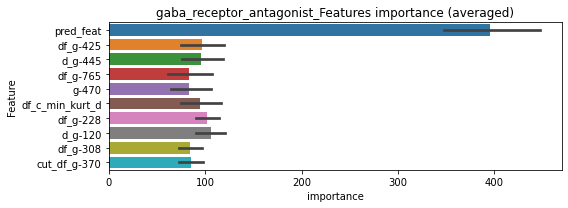

len(train_index) : 2760
len(valid_index) : 920
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2760
len(valid_index) : 920
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000395771	valid_1's binary_logloss: 0.00263425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000238177	valid_1's binary_logloss: 0.00700127


len(train_index) : 2760
len(valid_index) : 920
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204048	valid_1's binary_logloss: 0.000714795
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000163959	valid_1's binary_logloss: 0.00061131


len(train_index) : 2760
len(valid_index) : 920
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154294	valid_1's binary_logloss: 0.000376268
[2000]	training's binary_logloss: 0.000114174	valid_1's binary_logloss: 0.000279034
[3000]	training's binary_logloss: 0.000106139	valid_1's binary_logloss: 0.000259336
Early stopping, best iteration is:
[3498]	training's binary_logloss: 0.000104609	valid_1's binary_logloss: 0.000255356


gaba_receptor_antagonist logloss: 0.002629876786304853


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480193	valid_1's binary_logloss: 0.0403684
[600]	training's binary_logloss: 0.000864338	valid_1's binary_logloss: 0.0326989
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000787664	valid_1's binary_logloss: 0.0325639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522793	valid_1's binary_logloss: 0.0260625
[600]	training's binary_logloss: 0.00091303	valid_1's binary_logloss: 0.0163004
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000728596	valid_1's binary_logloss: 0.0155306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564651	valid_1's binary_logloss: 0.013984
[600]	training's binary_logloss: 0.000954273	valid_1's binary_logloss: 0.00466984
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000635091	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0057246, Threshold: 0.0204079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01429, conf_1:0.02653
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0204079
Num_p_label: 9.0, Expected: 9.4, Adj_threshold_2: 0.0704079
threshold: 0.0704079, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107344	valid_1's binary_logloss: 0.00527617
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000264343	valid_1's binary_logloss: 0.00380221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110498	valid_1's binary_logloss: 0.00247758
[600]	training's binary_logloss: 0.000225122	valid_1's binary_logloss: 0.00104358
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000209106	valid_1's binary_logloss: 0.0010035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115804	valid_1's binary_logloss: 0.00306716
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000274274	valid_1's binary_logloss: 0.00215932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111529	valid_1's binary_logloss: 0.0029587


2 / 3 AUC score:1.000
y_Threshold: 0.6646473, Threshold: 0.0704079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0524862 Vs.target_rate: 0.00235
Num_p_label: 209.0, conf_0:0.05633, conf_1:0.08449
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_1: 0.0704079
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_2: 0.1204079
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_3: 0.1704079
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_4: 0.2204079


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000271671	valid_1's binary_logloss: 0.00146288


Num_p_label: 209.0, Expected: 9.4, Adj_threshold_5: 0.2704079
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_6: 0.3204079
Num_p_label: 209.0, Expected: 9.4, Adj_threshold_7: 0.3704079
Num_p_label: 208.0, Expected: 9.4, Adj_threshold_8: 0.4204079
Num_p_label: 208.0, Expected: 9.4, Adj_threshold_9: 0.4704079
Num_p_label: 204.0, Expected: 9.4, Adj_threshold_10: 0.5204079
threshold: 0.5704079, positive_p_label: 198.0/3982, p_label_rate: 0.0497238
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113472	valid_1's binary_logloss: 0.00460161
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000344552	valid_1's binary_logloss: 0.00336832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113419	valid_1's binary_logloss: 0.00200877
[600]	training's binary_logloss: 0.00023053	valid_1's binary_logloss: 0.000630216
[900]	training's binary_logloss: 0.000173253	valid_1's binary_logloss: 0.000528723
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000174268	valid_1's binary_logloss: 0.00052689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114052	valid_1's binary_logloss: 0.00340541
[600]	training's binary_logloss: 0.000228992	valid_1's binary_logloss: 0.00218981
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000182177	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.5636745, Threshold: 0.5704079, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0364139 Vs.target_rate: 0.00235
Num_p_label: 145.0, conf_0:0.50000, conf_1:0.62745
Num_p_label: 145.0, Expected: 9.4, Adj_threshold_1: 0.5704079
Num_p_label: 112.0, Expected: 9.4, Adj_threshold_2: 0.6204079


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000268711	valid_1's binary_logloss: 0.00485627


Num_p_label: 81.0, Expected: 9.4, Adj_threshold_3: 0.6704079
Num_p_label: 59.0, Expected: 9.4, Adj_threshold_4: 0.7204079
Num_p_label: 55.0, Expected: 9.4, Adj_threshold_5: 0.7704079
threshold: 0.7704079, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


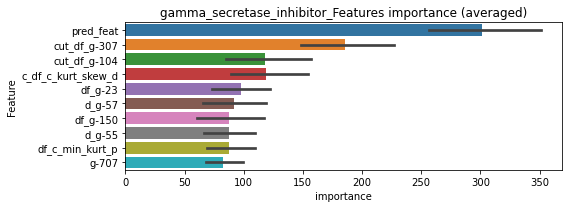

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000312379	valid_1's binary_logloss: 0.00617431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000224463	valid_1's binary_logloss: 0.00162


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000490504	valid_1's binary_logloss: 0.00324844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000249253	valid_1's binary_logloss: 0.0029931


gamma_secretase_inhibitor logloss: 0.0035130057485724844


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248
target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0458474	valid_1's binary_logloss: 0.229316
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0294003	valid_1's binary_logloss: 0.221211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040803	valid_1's binary_logloss: 0.248466
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.0226297	valid_1's binary_logloss: 0.244445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0458246	valid_1's binary_logloss: 0.208988
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.0100187	valid_1's binary_logloss: 0.189975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0442757	valid_1's binary_logloss: 0.248056
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.0219406	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.916
y_Threshold: 0.0839460, Threshold: 0.2906023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 383 → Positive_corect_labels: 523/3514
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, conf_0:0.20342, conf_1:0.37778
threshold: 0.2906023, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 523.0/3514, y_label_rate: 0.1488332
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203263	valid_1's binary_logloss: 0.0050271
[600]	training's binary_logloss: 0.000286167	valid_1's binary_logloss: 0.00109305
[900]	training's binary_logloss: 0.000184014	valid_1's binary_logloss: 0.00075909
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000175232	valid_1's binary_logloss: 0.000732849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204747	valid_1's binary_logloss: 0.00651807
[600]	training's binary_logloss: 0.000286922	valid_1's binary_logloss: 0.00301192
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000220729	valid_1's binary_logloss: 0.00279593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207964	valid_1's binary_logloss: 0.00728215
[600]	training's binary_logloss: 0.000286816	valid_1's binary_logloss: 0.00323594
[900]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.3056879, Threshold: 0.2906023, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000212455	valid_1's binary_logloss: 0.00462032


Remove_noisy_data: 6 → Positive_corect_labels: 520.0/3508
p_label_rate: 0.0909091 Vs.target_rate: 0.01117
Num_p_label: 362.0, conf_0:0.23248, conf_1:0.34872
Num_p_label: 362.0, Expected: 44.5, Adj_threshold_1: 0.2906023
Num_p_label: 358.0, Expected: 44.5, Adj_threshold_2: 0.3406023
Num_p_label: 357.0, Expected: 44.5, Adj_threshold_3: 0.3906023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_4: 0.4406023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_5: 0.4906023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_6: 0.5406023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_7: 0.5906023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_8: 0.6406023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_9: 0.6906023
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_10: 0.7406023
threshold: 0.7906023, positive_p_label: 356.0/3982, p_label_rate: 0.0894023
positive_y_label: 520.0/3508, y_label_rate: 0.1482326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175151	valid_1's binary_logloss: 0.00408449
[600]	training's binary_logloss: 0.0002052	valid_1's binary_logloss: 0.000512082
[900]	training's binary_logloss: 0.000118841	valid_1's binary_logloss: 0.000298508
[1200]	training's binary_logloss: 0.000109919	valid_1's binary_logloss: 0.000275914
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.000109919	valid_1's binary_logloss: 0.000275914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177206	valid_1's binary_logloss: 0.00405422
[600]	training's binary_logloss: 0.000206172	valid_1's binary_logloss: 0.000508832
[900]	training's binary_logloss: 0.000119162	valid_1's binary_logloss: 0.000296169
[1200]	training's binary_logloss: 0.000109989	valid_1's binary_logloss: 0.000272847
Early stopping, best iteration is:
[1391]	training's binary_logloss: 0.000108311	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1453098, Threshold: 0.7906023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 520.0/3508
p_label_rate: 0.0894023 Vs.target_rate: 0.01117
Num_p_label: 356.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 356.0, Expected: 44.5, Adj_threshold_1: 0.7906023


Early stopping, best iteration is:
[1355]	training's binary_logloss: 0.000108498	valid_1's binary_logloss: 0.000294382


threshold: 0.7906023, positive_p_label: 356.0/3982, p_label_rate: 0.0894023
positive_y_label: 520.0/3508, y_label_rate: 0.1482326


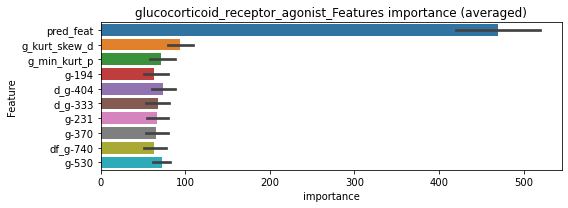

len(train_index) : 2631
len(valid_index) : 877
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162367	valid_1's binary_logloss: 0.000380245
[2000]	training's binary_logloss: 0.000119842	valid_1's binary_logloss: 0.000281279
[3000]	training's binary_logloss: 0.000111209	valid_1's binary_logloss: 0.000260812


len(train_index) : 2631
len(valid_index) : 877


Early stopping, best iteration is:
[3599]	training's binary_logloss: 0.000109473	valid_1's binary_logloss: 0.00025651


================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162499	valid_1's binary_logloss: 0.000480797
[2000]	training's binary_logloss: 0.000119793	valid_1's binary_logloss: 0.00035549
[3000]	training's binary_logloss: 0.000111208	valid_1's binary_logloss: 0.000329822


len(train_index) : 2631
len(valid_index) : 877
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[3436]	training's binary_logloss: 0.000109808	valid_1's binary_logloss: 0.00032544
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162444	valid_1's binary_logloss: 0.000553922
[2000]	training's binary_logloss: 0.000119764	valid_1's binary_logloss: 0.000409675
[3000]	training's binary_logloss: 0.000111215	valid_1's binary_logloss: 0.000380331
Early stopping, best iteration is:
[3546]	training's binary_logloss: 0.000109561	valid_1's binary_logloss: 0.000374306


len(train_index) : 2631
len(valid_index) : 877
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162531	valid_1's binary_logloss: 0.000490355
[2000]	training's binary_logloss: 0.000119809	valid_1's binary_logloss: 0.000362536
[3000]	training's binary_logloss: 0.000111213	valid_1's binary_logloss: 0.000336251
Early stopping, best iteration is:
[3646]	training's binary_logloss: 0.000109369	valid_1's binary_logloss: 0.000330357


glucocorticoid_receptor_agonist logloss: 0.0003216532226771454


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285
target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901477	valid_1's binary_logloss: 0.0021064
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000315308	valid_1's binary_logloss: 0.000952178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000928538	valid_1's binary_logloss: 0.00201603
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000324449	valid_1's binary_logloss: 0.000938045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898638	valid_1's binary_logloss: 0.00165042
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.0003174	valid_1's binary_logloss: 0.000672233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923695	valid_1's binary_logloss: 0.00202331


1 / 3 AUC score:1.000
y_Threshold: 0.0013358, Threshold: 0.0048685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, conf_0:0.00341, conf_1:0.00633


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.0003256	valid_1's binary_logloss: 0.00111393


Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0048685
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_2: 0.0548685
threshold: 0.0548685, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000457649	valid_1's binary_logloss: 0.000957336
[600]	training's binary_logloss: 0.000164149	valid_1's binary_logloss: 0.000538482
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00015878	valid_1's binary_logloss: 0.000530415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459919	valid_1's binary_logloss: 0.00120753
[600]	training's binary_logloss: 0.000158877	valid_1's binary_logloss: 0.000826045
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000136826	valid_1's binary_logloss: 0.000792609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045173	valid_1's binary_logloss: 0.000950823
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000238069	valid_1's binary_logloss: 0.000765533
Training until validation scores don't improve for 

2 / 3 AUC score:1.000
y_Threshold: 0.4919401, Threshold: 0.0548685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


[600]	training's binary_logloss: 0.000160243	valid_1's binary_logloss: 0.000399803
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000156698	valid_1's binary_logloss: 0.000396775


p_label_rate: 0.0477147 Vs.target_rate: 0.00055
Num_p_label: 190.0, conf_0:0.04389, conf_1:0.06584
Num_p_label: 190.0, Expected: 2.2, Adj_threshold_1: 0.0548685
Num_p_label: 190.0, Expected: 2.2, Adj_threshold_2: 0.1048685
Num_p_label: 178.0, Expected: 2.2, Adj_threshold_3: 0.1548685
Num_p_label: 142.0, Expected: 2.2, Adj_threshold_4: 0.2048685
Num_p_label: 109.0, Expected: 2.2, Adj_threshold_5: 0.2548685
Num_p_label: 81.0, Expected: 2.2, Adj_threshold_6: 0.3048685
Num_p_label: 62.0, Expected: 2.2, Adj_threshold_7: 0.3548685
Num_p_label: 44.0, Expected: 2.2, Adj_threshold_8: 0.4048685
Num_p_label: 29.0, Expected: 2.2, Adj_threshold_9: 0.4548685
Num_p_label: 19.0, Expected: 2.2, Adj_threshold_10: 0.5048685
threshold: 0.5548685, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453136	valid_1's binary_logloss: 0.00118839
[600]	training's binary_logloss: 0.000162062	valid_1's binary_logloss: 0.000785005
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000157372	valid_1's binary_logloss: 0.00078104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000458958	valid_1's binary_logloss: 0.00117152
[600]	training's binary_logloss: 0.000158319	valid_1's binary_logloss: 0.000772784
[900]	training's binary_logloss: 0.000131712	valid_1's binary_logloss: 0.000738437
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000128959	valid_1's binary_logloss: 0.000731322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045557	valid_1's binary_logloss: 0.00125082
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000237487	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.4363383, Threshold: 0.5548685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, conf_0:0.49938, conf_1:0.61036
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_1: 0.5548685
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_2: 0.6048685
threshold: 0.6048685, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


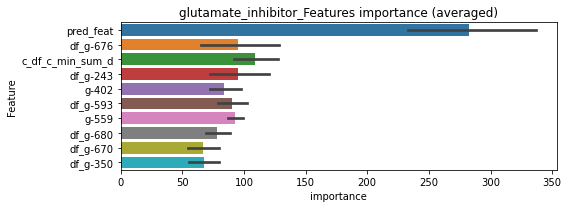

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000218506	valid_1's binary_logloss: 0.000659602
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170885	valid_1's binary_logloss: 0.000397709
[2000]	training's binary_logloss: 0.000141416	valid_1's binary_logloss: 0.000358939


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[2186]	training's binary_logloss: 0.000139244	valid_1's binary_logloss: 0.000356301
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[295]	training's binary_logloss: 0.000352135	valid_1's binary_logloss: 0.00170328
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.0008201475869046707


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000178109	valid_1's binary_logloss: 0.000558236
neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750765	valid_1's binary_logloss: 0.0512665
[600]	training's binary_logloss: 0.00118706	valid_1's binary_logloss: 0.0384527
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000905933	valid_1's binary_logloss: 0.0376696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731111	valid_1's binary_logloss: 0.0454696
[600]	training's binary_logloss: 0.00118332	valid_1's binary_logloss: 0.0347721
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00094831	valid_1's binary_logloss: 0.034308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772499	valid_1's binary_logloss: 0.0244334
[600]	training's binary_logloss: 0.0012643	valid_1's binary_logloss: 0.013725
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000878849	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0106892, Threshold: 0.2192895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.15350, conf_1:0.28508
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2192895
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_2: 0.2692895
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_3: 0.3192895
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_4: 0.3692895
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_5: 0.4192895
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_6: 0.4692895
threshold: 0.4692895, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133132	valid_1's binary_logloss: 0.00295533
[600]	training's binary_logloss: 0.000245502	valid_1's binary_logloss: 0.000823259
[900]	training's binary_logloss: 0.000179561	valid_1's binary_logloss: 0.000653634
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000174002	valid_1's binary_logloss: 0.000637415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130734	valid_1's binary_logloss: 0.00543486
[600]	training's binary_logloss: 0.00024459	valid_1's binary_logloss: 0.00376637
[900]	training's binary_logloss: 0.000177527	valid_1's binary_logloss: 0.00361455
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000176676	valid_1's binary_logloss: 0.0036127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132703	valid_1's binary_logloss: 0.00403325
[600]	train

2 / 3 AUC score:1.000
y_Threshold: 0.4638323, Threshold: 0.4692895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0577599 Vs.target_rate: 0.00311
Num_p_label: 230.0, conf_0:0.37543, conf_1:0.56315
Num_p_label: 230.0, Expected: 12.4, Adj_threshold_1: 0.4692895
Num_p_label: 205.0, Expected: 12.4, Adj_threshold_2: 0.5192895
Num_p_label: 180.0, Expected: 12.4, Adj_threshold_3: 0.5692895
Num_p_label: 159.0, Expected: 12.4, Adj_threshold_4: 0.6192895
Num_p_label: 143.0, Expected: 12.4, Adj_threshold_5: 0.6692895
Num_p_label: 130.0, Expected: 12.4, Adj_threshold_6: 0.7192895


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000367359	valid_1's binary_logloss: 0.00669749


Num_p_label: 114.0, Expected: 12.4, Adj_threshold_7: 0.7692895
threshold: 0.7692895, positive_p_label: 114.0/3982, p_label_rate: 0.0286288
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123986	valid_1's binary_logloss: 0.00455239
[600]	training's binary_logloss: 0.00023747	valid_1's binary_logloss: 0.0026419
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000185318	valid_1's binary_logloss: 0.00253551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012791	valid_1's binary_logloss: 0.00355477
[600]	training's binary_logloss: 0.000233716	valid_1's binary_logloss: 0.00152922
[900]	training's binary_logloss: 0.000172263	valid_1's binary_logloss: 0.00138648
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000169357	valid_1's binary_logloss: 0.00138245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126266	valid_1's binary_logloss: 0.00224437
[600]	training's binary_logloss: 0.000238244	valid_1's binary_logloss: 0.000564801
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.2089837, Threshold: 0.7692895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0351582 Vs.target_rate: 0.00311
Num_p_label: 140.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 140.0, Expected: 12.4, Adj_threshold_1: 0.7692895
threshold: 0.7692895, positive_p_label: 140.0/3982, p_label_rate: 0.0351582
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


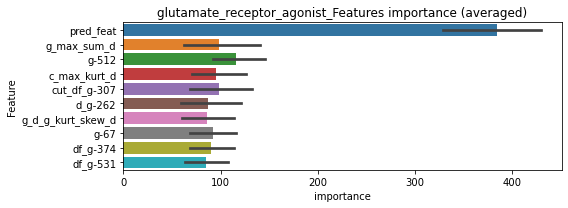

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204991	valid_1's binary_logloss: 0.000640687
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.000166474	valid_1's binary_logloss: 0.000532133


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020923	valid_1's binary_logloss: 0.00169174
Early stopping, best iteration is:
[1679]	training's binary_logloss: 0.000173337	valid_1's binary_logloss: 0.0016153


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000291135	valid_1's binary_logloss: 0.00134042
Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.001936244025898047


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000294038	valid_1's binary_logloss: 0.00425646
neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235
target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0587247	valid_1's binary_logloss: 0.338551
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0632245	valid_1's binary_logloss: 0.337465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0569157	valid_1's binary_logloss: 0.333903
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0379767	valid_1's binary_logloss: 0.33254
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.0688961	valid_1's binary_logloss: 0.332461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0595964	valid_1's binary_logloss: 0.300178
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.0336703	valid_1's binary_logloss: 0.295286


1 / 3 AUC score:0.821
y_Threshold: 0.1165818, Threshold: 0.3325625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 596 → Positive_corect_labels: 414/3286
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, conf_0:0.23279, conf_1:0.43233
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3325625
Num_p_label: 52.0, Expected: 61.4, Adj_threshold_2: 0.3125625
threshold: 0.3125625, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 414.0/3286, y_label_rate: 0.1259890
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194552	valid_1's binary_logloss: 0.00534866
[600]	training's binary_logloss: 0.000295193	valid_1's binary_logloss: 0.00114536
[900]	training's binary_logloss: 0.000198678	valid_1's binary_logloss: 0.000862007
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000191175	valid_1's binary_logloss: 0.000839271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192459	valid_1's binary_logloss: 0.00904226
[600]	training's binary_logloss: 0.000295796	valid_1's binary_logloss: 0.00520768
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000209065	valid_1's binary_logloss: 0.00494108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019094	valid_1's binary_logloss: 0.00670955
[600]	training's binary_logloss: 0.000293774	valid_1's binary_logloss: 0.0030616
[900]	train

2 / 3 AUC score:1.000
y_Threshold: 0.3488561, Threshold: 0.3125625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 412.0/3282
p_label_rate: 0.1175289 Vs.target_rate: 0.01541
Num_p_label: 468.0, conf_0:0.25005, conf_1:0.37507
Num_p_label: 468.0, Expected: 61.4, Adj_threshold_1: 0.3125625
Num_p_label: 464.0, Expected: 61.4, Adj_threshold_2: 0.3625625
Num_p_label: 457.0, Expected: 61.4, Adj_threshold_3: 0.4125625
Num_p_label: 444.0, Expected: 61.4, Adj_threshold_4: 0.4625625
Num_p_label: 421.0, Expected: 61.4, Adj_threshold_5: 0.5125625
Num_p_label: 407.0, Expected: 61.4, Adj_threshold_6: 0.5625625
Num_p_label: 390.0, Expected: 61.4, Adj_threshold_7: 0.6125625
Num_p_label: 387.0, Expected: 61.4, Adj_threshold_8: 0.6625625
Num_p_label: 385.0, Expected: 61.4, Adj_threshold_9: 0.7125625
Num_p_label: 384.0, Expected: 61.4, Adj_threshold_10: 0.7625625
threshold: 0.7625625, positive_p_label: 384.0/3982, p_label_rate: 0.0964340
positive_y_label: 412.0/3282, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191393	valid_1's binary_logloss: 0.00943054
[600]	training's binary_logloss: 0.000300341	valid_1's binary_logloss: 0.00478954
[900]	training's binary_logloss: 0.000203659	valid_1's binary_logloss: 0.00442385
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000193818	valid_1's binary_logloss: 0.00435752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191492	valid_1's binary_logloss: 0.0103246
[600]	training's binary_logloss: 0.000297342	valid_1's binary_logloss: 0.0066789
[900]	training's binary_logloss: 0.000198359	valid_1's binary_logloss: 0.0064269
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000196545	valid_1's binary_logloss: 0.00641415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189609	valid_1's binary_logloss: 0.0063089
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.2693663, Threshold: 0.7625625, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000210477	valid_1's binary_logloss: 0.00252994


Remove_noisy_data: 10 → Positive_corect_labels: 407.0/3272
p_label_rate: 0.0986941 Vs.target_rate: 0.01541
Num_p_label: 393.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 393.0, Expected: 61.4, Adj_threshold_1: 0.7625625
threshold: 0.7625625, positive_p_label: 393.0/3982, p_label_rate: 0.0986941
positive_y_label: 407.0/3272, y_label_rate: 0.1243888


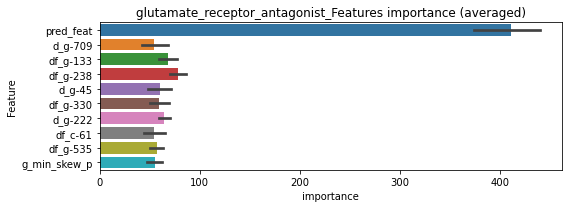

len(train_index) : 2454
len(valid_index) : 818
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000228296	valid_1's binary_logloss: 0.00351384
[2000]	training's binary_logloss: 0.000176445	valid_1's binary_logloss: 0.0033012
Early stopping, best iteration is:
[2071]	training's binary_logloss: 0.000175033	valid_1's binary_logloss: 0.00329344


len(train_index) : 2454
len(valid_index) : 818
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2454
len(valid_index) : 818
================================= fold 3/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000403381	valid_1's binary_logloss: 0.00495147
Training until validation scores don't improve for 30 rounds


len(train_index) : 2454
len(valid_index) : 818
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000560157	valid_1's binary_logloss: 0.00334505
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173788	valid_1's binary_logloss: 0.000534586
[2000]	training's binary_logloss: 0.000128468	valid_1's binary_logloss: 0.000396316
[3000]	training's binary_logloss: 0.000119263	valid_1's binary_logloss: 0.000367537
Early stopping, best iteration is:
[3646]	training's binary_logloss: 0.000117261	valid_1's binary_logloss: 0.00036094


glutamate_receptor_antagonist logloss: 0.0030089487475188767


neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146043	valid_1's binary_logloss: 0.00720455
[600]	training's binary_logloss: 0.000381354	valid_1's binary_logloss: 0.00430383
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000381354	valid_1's binary_logloss: 0.00430383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151153	valid_1's binary_logloss: 0.00472069
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000402389	valid_1's binary_logloss: 0.00272855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147531	valid_1's binary_logloss: 0.00416456
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000395055	valid_1's binary_logloss: 0.00213035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144566	valid_1's binary_logloss: 0.00352781

1 / 3 AUC score:1.000
y_Threshold: 0.0022202, Threshold: 0.0079206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00554, conf_1:0.01030
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0079206
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0579206
threshold: 0.0579206, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627561	valid_1's binary_logloss: 0.0017432
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000201156	valid_1's binary_logloss: 0.00101724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000610743	valid_1's binary_logloss: 0.000956174
[600]	training's binary_logloss: 0.000179045	valid_1's binary_logloss: 0.000421264
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000175713	valid_1's binary_logloss: 0.000414537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000617558	valid_1's binary_logloss: 0.00264422
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000284746	valid_1's binary_logloss: 0.00221909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606908	valid_1's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.6792760, Threshold: 0.0579206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0482170 Vs.target_rate: 0.00076
Num_p_label: 192.0, conf_0:0.04634, conf_1:0.06950
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_1: 0.0579206
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_2: 0.1079206
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_3: 0.1579206
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_4: 0.2079206
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_5: 0.2579206
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_6: 0.3079206
Num_p_label: 191.0, Expected: 3.0, Adj_threshold_7: 0.3579206
Num_p_label: 186.0, Expected: 3.0, Adj_threshold_8: 0.4079206
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_9: 0.4579206
Num_p_label: 152.0, Expected: 3.0, Adj_threshold_10: 0.5079206
threshold: 0.5579206, positive_p_label: 120.0/3982, p_label_rate: 0.0301356
positive_y_label: 656.0/3810, y_label_rate: 0.1721785

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626974	valid_1's binary_logloss: 0.00192549
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000213947	valid_1's binary_logloss: 0.00109696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616453	valid_1's binary_logloss: 0.00443387
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000221192	valid_1's binary_logloss: 0.00365805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000631088	valid_1's binary_logloss: 0.000576137
[600]	training's binary_logloss: 0.000184214	valid_1's binary_logloss: 0.00014654
[900]	training's binary_logloss: 0.000157118	valid_1's binary_logloss: 0.000115057
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000157118	valid_1's binary_logloss: 0.000115057
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.6030507, Threshold: 0.5579206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0087896 Vs.target_rate: 0.00076
Num_p_label: 35.0, conf_0:0.50000, conf_1:0.61371
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_1: 0.5579206
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_2: 0.6079206
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.6579206
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.7079206
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.7579206
threshold: 0.7579206, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000199833	valid_1's binary_logloss: 0.00173908


positive_y_label: 655.0/3808, y_label_rate: 0.1720063


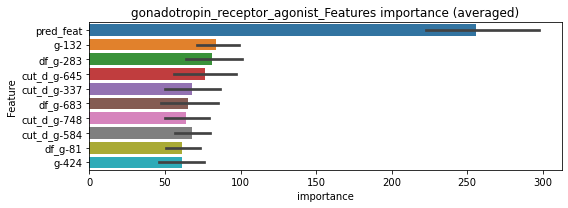

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000208803	valid_1's binary_logloss: 0.000952325
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000237527	valid_1's binary_logloss: 0.000737252
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000252215	valid_1's binary_logloss: 0.00170535
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000192257	valid_1's binary_logloss: 0.000542883
Early stopping, best iteration is:
[1522]	training's binary_logloss: 0.000168577	valid_1's binary_logloss: 0.000511896


gonadotropin_receptor_agonist logloss: 0.0009783211346551944


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601171	valid_1's binary_logloss: 0.0357879
[600]	training's binary_logloss: 0.00104443	valid_1's binary_logloss: 0.0232239
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000668803	valid_1's binary_logloss: 0.0217123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00628931	valid_1's binary_logloss: 0.0281901
[600]	training's binary_logloss: 0.00107115	valid_1's binary_logloss: 0.0164376
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000766573	valid_1's binary_logloss: 0.0152149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660029	valid_1's binary_logloss: 0.0148215
[600]	training's binary_logloss: 0.00111565	valid_1's binary_logloss: 0.00434412
[900]	training's binary_logloss: 0.000680121	valid_1's binary_logloss: 0.00312449
Early stopping, best i

1 / 3 AUC score:1.000
y_Threshold: 0.0078346, Threshold: 0.0416372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.02915, conf_1:0.05413
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0416372
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_2: 0.0916372
threshold: 0.0916372, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119314	valid_1's binary_logloss: 0.00581532
[600]	training's binary_logloss: 0.000226631	valid_1's binary_logloss: 0.00410455
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000234485	valid_1's binary_logloss: 0.00408918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117342	valid_1's binary_logloss: 0.00351115
[600]	training's binary_logloss: 0.000228763	valid_1's binary_logloss: 0.00208705
[900]	training's binary_logloss: 0.000168638	valid_1's binary_logloss: 0.00197203
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000162755	valid_1's binary_logloss: 0.00196306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123339	valid_1's binary_logloss: 0.00145801
[600]	training's binary_logloss: 0.000232101	valid_1's binary_logloss: 0.000236049
[900]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.6185308, Threshold: 0.0916372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0544952 Vs.target_rate: 0.00252


Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000183457	valid_1's binary_logloss: 0.00108003


Num_p_label: 217.0, conf_0:0.07331, conf_1:0.10996
Num_p_label: 217.0, Expected: 10.0, Adj_threshold_1: 0.0916372
Num_p_label: 215.0, Expected: 10.0, Adj_threshold_2: 0.1416372
Num_p_label: 214.0, Expected: 10.0, Adj_threshold_3: 0.1916372
Num_p_label: 214.0, Expected: 10.0, Adj_threshold_4: 0.2416372
Num_p_label: 214.0, Expected: 10.0, Adj_threshold_5: 0.2916372
Num_p_label: 214.0, Expected: 10.0, Adj_threshold_6: 0.3416372
Num_p_label: 214.0, Expected: 10.0, Adj_threshold_7: 0.3916372
Num_p_label: 213.0, Expected: 10.0, Adj_threshold_8: 0.4416372
Num_p_label: 213.0, Expected: 10.0, Adj_threshold_9: 0.4916372
Num_p_label: 209.0, Expected: 10.0, Adj_threshold_10: 0.5416372
threshold: 0.5916372, positive_p_label: 205.0/3982, p_label_rate: 0.0514817
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117356	valid_1's binary_logloss: 0.00484933
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000572762	valid_1's binary_logloss: 0.00399406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118124	valid_1's binary_logloss: 0.0044086
[600]	training's binary_logloss: 0.000231745	valid_1's binary_logloss: 0.00270711
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000227363	valid_1's binary_logloss: 0.00269301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118645	valid_1's binary_logloss: 0.00303776
[600]	training's binary_logloss: 0.000235588	valid_1's binary_logloss: 0.00109974
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000185955	valid_1's binary_logloss: 0.000958641
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.5533972, Threshold: 0.5916372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0361627 Vs.target_rate: 0.00252
Num_p_label: 144.0, conf_0:0.50000, conf_1:0.65080
Num_p_label: 144.0, Expected: 10.0, Adj_threshold_1: 0.5916372
Num_p_label: 114.0, Expected: 10.0, Adj_threshold_2: 0.6416372
Num_p_label: 82.0, Expected: 10.0, Adj_threshold_3: 0.6916372


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000350327	valid_1's binary_logloss: 0.00241708


Num_p_label: 50.0, Expected: 10.0, Adj_threshold_4: 0.7416372
Num_p_label: 36.0, Expected: 10.0, Adj_threshold_5: 0.7916372
threshold: 0.7916372, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


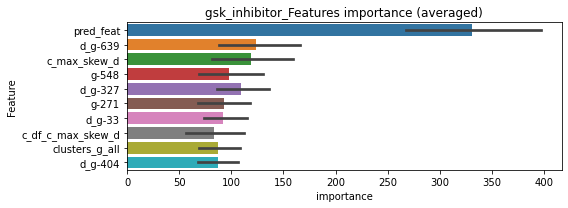

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000656503	valid_1's binary_logloss: 0.00778285
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215937	valid_1's binary_logloss: 0.000271677
[2000]	training's binary_logloss: 0.000174958	valid_1's binary_logloss: 0.000199941
Early stopping, best iteration is:
[2040]	training's binary_logloss: 0.000174421	valid_1's binary_logloss: 0.000198894


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000218208	valid_1's binary_logloss: 0.00232027
Early stopping, best iteration is:
[1366]	training's binary_logloss: 0.000194815	valid_1's binary_logloss: 0.00221637


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214892	valid_1's binary_logloss: 0.00162298
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000213461	valid_1's binary_logloss: 0.0016168


gsk_inhibitor logloss: 0.0029549937271376135


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655929	valid_1's binary_logloss: 0.0530415
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00136016	valid_1's binary_logloss: 0.0445679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655029	valid_1's binary_logloss: 0.0328125
[600]	training's binary_logloss: 0.00116352	valid_1's binary_logloss: 0.0200164
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000718704	valid_1's binary_logloss: 0.0184611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670642	valid_1's binary_logloss: 0.0346087
[600]	training's binary_logloss: 0.00118703	valid_1's binary_logloss: 0.0234184
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00110963	valid_1's binary_logloss: 0.0229435
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0095334, Threshold: 0.0375367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.02628, conf_1:0.04880
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0375367
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_2: 0.0875367
threshold: 0.0875367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128282	valid_1's binary_logloss: 0.00216151
[600]	training's binary_logloss: 0.000241976	valid_1's binary_logloss: 0.000480441
[900]	training's binary_logloss: 0.000174176	valid_1's binary_logloss: 0.000347638
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000169372	valid_1's binary_logloss: 0.000336021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012471	valid_1's binary_logloss: 0.00506082
[600]	training's binary_logloss: 0.000239169	valid_1's binary_logloss: 0.00296896
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000215758	valid_1's binary_logloss: 0.00292211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125066	valid_1's binary_logloss: 0.00738139
[600]	training's binary_logloss: 0.000243348	valid_1's binary_logloss: 0.0056181
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.2764471, Threshold: 0.0875367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3781
p_label_rate: 0.0577599 Vs.target_rate: 0.00302
Num_p_label: 230.0, conf_0:0.07003, conf_1:0.10504
Num_p_label: 230.0, Expected: 12.0, Adj_threshold_1: 0.0875367
Num_p_label: 228.0, Expected: 12.0, Adj_threshold_2: 0.1375367
Num_p_label: 218.0, Expected: 12.0, Adj_threshold_3: 0.1875367
Num_p_label: 206.0, Expected: 12.0, Adj_threshold_4: 0.2375367
Num_p_label: 183.0, Expected: 12.0, Adj_threshold_5: 0.2875367
Num_p_label: 151.0, Expected: 12.0, Adj_threshold_6: 0.3375367


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00053512	valid_1's binary_logloss: 0.00464523


Num_p_label: 124.0, Expected: 12.0, Adj_threshold_7: 0.3875367
Num_p_label: 93.0, Expected: 12.0, Adj_threshold_8: 0.4375367
Num_p_label: 72.0, Expected: 12.0, Adj_threshold_9: 0.4875367
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_10: 0.5375367
threshold: 0.5875367, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 647.0/3781, y_label_rate: 0.1711188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120581	valid_1's binary_logloss: 0.00265149
[600]	training's binary_logloss: 0.000215829	valid_1's binary_logloss: 0.000582233
[900]	training's binary_logloss: 0.00015303	valid_1's binary_logloss: 0.000420554
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000151718	valid_1's binary_logloss: 0.000416558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119582	valid_1's binary_logloss: 0.00546507
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000536151	valid_1's binary_logloss: 0.00438292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120104	valid_1's binary_logloss: 0.00262522
[600]	training's binary_logloss: 0.000215066	valid_1's binary_logloss: 0.000806007
[900]	training's binary_logloss: 0.000152774	valid_1's binary_logloss: 0.00064796
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.1632510, Threshold: 0.5875367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 647.0/3781
p_label_rate: 0.0175791 Vs.target_rate: 0.00302
Num_p_label: 70.0, conf_0:0.50000, conf_1:0.64629


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000169336	valid_1's binary_logloss: 0.00062033


Num_p_label: 70.0, Expected: 12.0, Adj_threshold_1: 0.5875367
Num_p_label: 61.0, Expected: 12.0, Adj_threshold_2: 0.6375367
Num_p_label: 60.0, Expected: 12.0, Adj_threshold_3: 0.6875367
Num_p_label: 60.0, Expected: 12.0, Adj_threshold_4: 0.7375367
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_5: 0.7875367
threshold: 0.7875367, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 647.0/3781, y_label_rate: 0.1711188


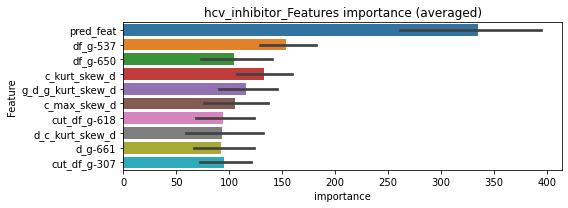

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000199113	valid_1's binary_logloss: 0.000542812
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.000164811	valid_1's binary_logloss: 0.000439617


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.000883194	valid_1's binary_logloss: 0.0170481
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000197919	valid_1's binary_logloss: 0.000548046
Early stopping, best iteration is:
[1942]	training's binary_logloss: 0.000158048	valid_1's binary_logloss: 0.000455654


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209084	valid_1's binary_logloss: 0.000581078
Early stopping, best iteration is:
[1883]	training's binary_logloss: 0.000166961	valid_1's binary_logloss: 0.000496588


hcv_inhibitor logloss: 0.0046092162363471235


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119287	valid_1's binary_logloss: 0.0971887
[600]	training's binary_logloss: 0.00183371	valid_1's binary_logloss: 0.0783834
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00149118	valid_1's binary_logloss: 0.0772928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114964	valid_1's binary_logloss: 0.0777508
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00303477	valid_1's binary_logloss: 0.063897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122988	valid_1's binary_logloss: 0.0744517
[600]	training's binary_logloss: 0.00188177	valid_1's binary_logloss: 0.0641753
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00170406	valid_1's binary_logloss: 0.0641179
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.993
y_Threshold: 0.0182325, Threshold: 0.1029565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07207, conf_1:0.13384
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1029565
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_2: 0.1529565
threshold: 0.1529565, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148203	valid_1's binary_logloss: 0.00821795
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000384916	valid_1's binary_logloss: 0.00574271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149689	valid_1's binary_logloss: 0.00415136
[600]	training's binary_logloss: 0.000242103	valid_1's binary_logloss: 0.0017055
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00017163	valid_1's binary_logloss: 0.00147778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014955	valid_1's binary_logloss: 0.0037437
[600]	training's binary_logloss: 0.000246903	valid_1's binary_logloss: 0.00130533
[900]	training's binary_logloss: 0.000171827	valid_1's binary_logloss: 0.00109381
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000164937	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.4028258, Threshold: 0.1529565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3763


Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000183311	valid_1's binary_logloss: 0.00201008


p_label_rate: 0.0683074 Vs.target_rate: 0.00445
Num_p_label: 272.0, conf_0:0.12237, conf_1:0.18355
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_1: 0.1529565
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_2: 0.2029565
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_3: 0.2529565
Num_p_label: 272.0, Expected: 17.7, Adj_threshold_4: 0.3029565
Num_p_label: 269.0, Expected: 17.7, Adj_threshold_5: 0.3529565
Num_p_label: 267.0, Expected: 17.7, Adj_threshold_6: 0.4029565
Num_p_label: 266.0, Expected: 17.7, Adj_threshold_7: 0.4529565
Num_p_label: 251.0, Expected: 17.7, Adj_threshold_8: 0.5029565
Num_p_label: 237.0, Expected: 17.7, Adj_threshold_9: 0.5529565
Num_p_label: 212.0, Expected: 17.7, Adj_threshold_10: 0.6029565
threshold: 0.6529565, positive_p_label: 172.0/3982, p_label_rate: 0.0431944
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156228	valid_1's binary_logloss: 0.00414649
[600]	training's binary_logloss: 0.000258923	valid_1's binary_logloss: 0.00178539
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000201496	valid_1's binary_logloss: 0.00168428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153075	valid_1's binary_logloss: 0.00504408
[600]	training's binary_logloss: 0.000252445	valid_1's binary_logloss: 0.0030428
[900]	training's binary_logloss: 0.000175223	valid_1's binary_logloss: 0.00291033
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000166051	valid_1's binary_logloss: 0.002892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152093	valid_1's binary_logloss: 0.00494291
[600]	training's binary_logloss: 0.000253623	valid_1's binary_logloss: 0.00218289
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.4120613, Threshold: 0.6529565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 634.0/3757
p_label_rate: 0.0153189 Vs.target_rate: 0.00445
Num_p_label: 61.0, conf_0:0.50000, conf_1:0.71825
Num_p_label: 61.0, Expected: 17.7, Adj_threshold_1: 0.6529565
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_2: 0.7029565
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_3: 0.7529565
threshold: 0.7529565, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 634.0/3757, y_label_rate: 0.1687517


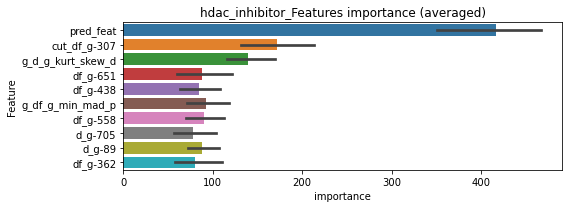

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000211027	valid_1's binary_logloss: 0.00292772
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.000171217	valid_1's binary_logloss: 0.00278514


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212213	valid_1's binary_logloss: 0.000704037
Early stopping, best iteration is:
[1311]	training's binary_logloss: 0.000187879	valid_1's binary_logloss: 0.000649439


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214536	valid_1's binary_logloss: 0.000953572
Early stopping, best iteration is:
[1388]	training's binary_logloss: 0.0001876	valid_1's binary_logloss: 0.000874642


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000270414	valid_1's binary_logloss: 0.00226496


hdac_inhibitor logloss: 0.0016459515236899747


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283
target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488995	valid_1's binary_logloss: 0.038462
[600]	training's binary_logloss: 0.000871818	valid_1's binary_logloss: 0.0288339
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000694714	valid_1's binary_logloss: 0.0281022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489868	valid_1's binary_logloss: 0.0373841
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00106303	valid_1's binary_logloss: 0.029254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566907	valid_1's binary_logloss: 0.0160587
[600]	training's binary_logloss: 0.000955644	valid_1's binary_logloss: 0.00907606
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000705709	valid_1's binary_logloss: 0.00871478
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0063094, Threshold: 0.0173369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, conf_0:0.01214, conf_1:0.02254
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0173369
Num_p_label: 5.0, Expected: 9.9, Adj_threshold_2: 0.0673369
threshold: 0.0673369, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112675	valid_1's binary_logloss: 0.00606866
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000294615	valid_1's binary_logloss: 0.00472158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114771	valid_1's binary_logloss: 0.00244943
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000275352	valid_1's binary_logloss: 0.00119868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011258	valid_1's binary_logloss: 0.00258416
[600]	training's binary_logloss: 0.000224797	valid_1's binary_logloss: 0.00117385
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000196987	valid_1's binary_logloss: 0.00110901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113055	valid_1's binary_logloss: 0.00728047


2 / 3 AUC score:1.000
y_Threshold: 0.5692572, Threshold: 0.0673369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0452034 Vs.target_rate: 0.00248
Num_p_label: 180.0, conf_0:0.05387, conf_1:0.08080
Num_p_label: 180.0, Expected: 9.9, Adj_threshold_1: 0.0673369
Num_p_label: 179.0, Expected: 9.9, Adj_threshold_2: 0.1173369
Num_p_label: 179.0, Expected: 9.9, Adj_threshold_3: 0.1673369
Num_p_label: 179.0, Expected: 9.9, Adj_threshold_4: 0.2173369
Num_p_label: 177.0, Expected: 9.9, Adj_threshold_5: 0.2673369


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00035159	valid_1's binary_logloss: 0.00596762


Num_p_label: 175.0, Expected: 9.9, Adj_threshold_6: 0.3173369
Num_p_label: 173.0, Expected: 9.9, Adj_threshold_7: 0.3673369
Num_p_label: 169.0, Expected: 9.9, Adj_threshold_8: 0.4173369
Num_p_label: 156.0, Expected: 9.9, Adj_threshold_9: 0.4673369
Num_p_label: 141.0, Expected: 9.9, Adj_threshold_10: 0.5173369
threshold: 0.5673369, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110896	valid_1's binary_logloss: 0.00658085
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00031007	valid_1's binary_logloss: 0.00523283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105169	valid_1's binary_logloss: 0.00501907
[600]	training's binary_logloss: 0.000229537	valid_1's binary_logloss: 0.00368446
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000235183	valid_1's binary_logloss: 0.00367108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112025	valid_1's binary_logloss: 0.00258093
[600]	training's binary_logloss: 0.000238212	valid_1's binary_logloss: 0.00115272
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000216615	valid_1's binary_logloss: 0.00111171
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.3271007, Threshold: 0.5673369, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00060813	valid_1's binary_logloss: 0.00399303


Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0158212 Vs.target_rate: 0.00248
Num_p_label: 63.0, conf_0:0.50000, conf_1:0.62407
Num_p_label: 63.0, Expected: 9.9, Adj_threshold_1: 0.5673369
Num_p_label: 61.0, Expected: 9.9, Adj_threshold_2: 0.6173369
Num_p_label: 60.0, Expected: 9.9, Adj_threshold_3: 0.6673369
Num_p_label: 57.0, Expected: 9.9, Adj_threshold_4: 0.7173369
Num_p_label: 55.0, Expected: 9.9, Adj_threshold_5: 0.7673369
threshold: 0.7673369, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000228978	valid_1's binary_logloss: 0.00301164


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207189	valid_1's binary_logloss: 0.00032386
Early stopping, best iteration is:
[1880]	training's binary_logloss: 0.000164972	valid_1's binary_logloss: 0.000252119


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000263964	valid_1's binary_logloss: 0.0021099
Training until validation scores don't improve for 30 rounds


histamine_receptor_agonist logloss: 0.0027760092073126977


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000267211	valid_1's binary_logloss: 0.0057227
neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255
target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0312939	valid_1's binary_logloss: 0.210415
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.0195212	valid_1's binary_logloss: 0.207381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028182	valid_1's binary_logloss: 0.217575
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0279504	valid_1's binary_logloss: 0.217378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0295409	valid_1's binary_logloss: 0.173018
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.016645	valid_1's binary_logloss: 0.166454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333467	valid_1's binary_logloss: 0.167561
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00996938	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.946
y_Threshold: 0.0613295, Threshold: 0.3587211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 319 → Positive_corect_labels: 557/3587
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, conf_0:0.25110, conf_1:0.46634
threshold: 0.3587211, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 557.0/3587, y_label_rate: 0.1552830
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180981	valid_1's binary_logloss: 0.0140882
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000315894	valid_1's binary_logloss: 0.0110677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176011	valid_1's binary_logloss: 0.00482758
[600]	training's binary_logloss: 0.000262626	valid_1's binary_logloss: 0.00100096
[900]	training's binary_logloss: 0.000173901	valid_1's binary_logloss: 0.000733873
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000167169	valid_1's binary_logloss: 0.000714137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180139	valid_1's binary_logloss: 0.00426538
[600]	training's binary_logloss: 0.000268744	valid_1's binary_logloss: 0.000838031
[900]	training's binary_logloss: 0.000176472	valid_1's binary_logloss: 0.000586577
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.7365398, Threshold: 0.3587211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 553.0/3579
p_label_rate: 0.0934204 Vs.target_rate: 0.01012


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000193756	valid_1's binary_logloss: 0.00335572


Num_p_label: 372.0, conf_0:0.28698, conf_1:0.43047
Num_p_label: 372.0, Expected: 40.3, Adj_threshold_1: 0.3587211
Num_p_label: 372.0, Expected: 40.3, Adj_threshold_2: 0.4087211
Num_p_label: 372.0, Expected: 40.3, Adj_threshold_3: 0.4587211
Num_p_label: 372.0, Expected: 40.3, Adj_threshold_4: 0.5087211
Num_p_label: 371.0, Expected: 40.3, Adj_threshold_5: 0.5587211
Num_p_label: 367.0, Expected: 40.3, Adj_threshold_6: 0.6087211
Num_p_label: 364.0, Expected: 40.3, Adj_threshold_7: 0.6587211
Num_p_label: 356.0, Expected: 40.3, Adj_threshold_8: 0.7087211
Num_p_label: 344.0, Expected: 40.3, Adj_threshold_9: 0.7587211
threshold: 0.7587211, positive_p_label: 344.0/3982, p_label_rate: 0.0863887
positive_y_label: 553.0/3579, y_label_rate: 0.1545124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017602	valid_1's binary_logloss: 0.00954685
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.000977783	valid_1's binary_logloss: 0.00710013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182593	valid_1's binary_logloss: 0.00715282
[600]	training's binary_logloss: 0.000278265	valid_1's binary_logloss: 0.00357892
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000196259	valid_1's binary_logloss: 0.00335598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175539	valid_1's binary_logloss: 0.00605083
[600]	training's binary_logloss: 0.000277027	valid_1's binary_logloss: 0.00161247
[900]	training's binary_logloss: 0.000187045	valid_1's binary_logloss: 0.00127553
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000179469	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.3990531, Threshold: 0.7587211, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000208611	valid_1's binary_logloss: 0.00441694


Remove_noisy_data: 8 → Positive_corect_labels: 549.0/3571
p_label_rate: 0.0690608 Vs.target_rate: 0.01012
Num_p_label: 275.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 275.0, Expected: 40.3, Adj_threshold_1: 0.7587211
threshold: 0.7587211, positive_p_label: 275.0/3982, p_label_rate: 0.0690608
positive_y_label: 549.0/3571, y_label_rate: 0.1537384


len(train_index) : 2678
len(valid_index) : 893
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2678
len(valid_index) : 893
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000401616	valid_1's binary_logloss: 0.00325255
Training until validation scores don't improve for 30 rounds


len(train_index) : 2678
len(valid_index) : 893
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00109763	valid_1's binary_logloss: 0.00846629
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000223594	valid_1's binary_logloss: 0.000571423
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.000174313	valid_1's binary_logloss: 0.00040631


len(train_index) : 2679
len(valid_index) : 892
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000225673	valid_1's binary_logloss: 0.000841254
Early stopping, best iteration is:
[1885]	training's binary_logloss: 0.000177241	valid_1's binary_logloss: 0.000687977


histamine_receptor_antagonist logloss: 0.0032086272881597746


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211195	valid_1's binary_logloss: 0.00549207
[600]	training's binary_logloss: 0.000478538	valid_1's binary_logloss: 0.00189558
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000450273	valid_1's binary_logloss: 0.00183137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208403	valid_1's binary_logloss: 0.00796372
[600]	training's binary_logloss: 0.000484723	valid_1's binary_logloss: 0.00426633
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000457845	valid_1's binary_logloss: 0.00420525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214959	valid_1's binary_logloss: 0.00562524
[600]	training's binary_logloss: 0.000483014	valid_1's binary_logloss: 0.00236476
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000481661	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0027424, Threshold: 0.0449691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.03148, conf_1:0.05846
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0449691
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_2: 0.0949691
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.1449691
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.1949691
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.2449691
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.2949691
threshold: 0.2949691, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000732328	valid_1's binary_logloss: 0.000873561
[600]	training's binary_logloss: 0.000197134	valid_1's binary_logloss: 0.000201655
[900]	training's binary_logloss: 0.000158519	valid_1's binary_logloss: 0.000146287
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000156945	valid_1's binary_logloss: 0.000143825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000738734	valid_1's binary_logloss: 0.00188786
[600]	training's binary_logloss: 0.00020014	valid_1's binary_logloss: 0.00111504
[900]	training's binary_logloss: 0.000159299	valid_1's binary_logloss: 0.00105584
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000156363	valid_1's binary_logloss: 0.00105124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000742473	valid_1's binary_logloss: 0.00133062
[600]	

2 / 3 AUC score:1.000
y_Threshold: 0.4016511, Threshold: 0.2949691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0617780 Vs.target_rate: 0.00101
Num_p_label: 246.0, conf_0:0.23598, conf_1:0.35396
Num_p_label: 246.0, Expected: 4.0, Adj_threshold_1: 0.2949691
Num_p_label: 230.0, Expected: 4.0, Adj_threshold_2: 0.3449691
Num_p_label: 210.0, Expected: 4.0, Adj_threshold_3: 0.3949691
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_4: 0.4449691
Num_p_label: 150.0, Expected: 4.0, Adj_threshold_5: 0.4949691
Num_p_label: 115.0, Expected: 4.0, Adj_threshold_6: 0.5449691
Num_p_label: 93.0, Expected: 4.0, Adj_threshold_7: 0.5949691
Num_p_label: 68.0, Expected: 4.0, Adj_threshold_8: 0.6449691
Num_p_label: 54.0, Expected: 4.0, Adj_threshold_9: 0.6949691
Num_p_label: 48.0, Expected: 4.0, Adj_threshold_10: 0.7449691
threshold: 0.7949691, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
====

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729719	valid_1's binary_logloss: 0.000912949
[600]	training's binary_logloss: 0.000197599	valid_1's binary_logloss: 0.000212662
[900]	training's binary_logloss: 0.000157402	valid_1's binary_logloss: 0.000152832
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000155692	valid_1's binary_logloss: 0.00015032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000742784	valid_1's binary_logloss: 0.00192388
[600]	training's binary_logloss: 0.000198367	valid_1's binary_logloss: 0.00111362
[900]	training's binary_logloss: 0.00015851	valid_1's binary_logloss: 0.00105848
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000157458	valid_1's binary_logloss: 0.00105537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000744475	valid_1's binary_logloss: 0.00142884
[600]	t

3 / 3 AUC score:1.000
y_Threshold: 0.4436212, Threshold: 0.7949691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0092918 Vs.target_rate: 0.00101
Num_p_label: 37.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_1: 0.7949691


Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000152923	valid_1's binary_logloss: 0.00150945


threshold: 0.7949691, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000198539	valid_1's binary_logloss: 0.000216553
Early stopping, best iteration is:
[1837]	training's binary_logloss: 0.000165282	valid_1's binary_logloss: 0.000166742


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000200543	valid_1's binary_logloss: 0.00127009
[2000]	training's binary_logloss: 0.000164777	valid_1's binary_logloss: 0.00121787
Early stopping, best iteration is:
[2158]	training's binary_logloss: 0.000163111	valid_1's binary_logloss: 0.00121493


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0002003	valid_1's binary_logloss: 0.000808727


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.000181597	valid_1's binary_logloss: 0.000782872
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193093	valid_1's binary_logloss: 0.0015614
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.000163288	valid_1's binary_logloss: 0.00152445


histone_lysine_demethylase_inhibitor logloss: 0.0009223678467217588


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230576	valid_1's binary_logloss: 0.0107981
[600]	training's binary_logloss: 0.000515123	valid_1's binary_logloss: 0.00671338
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000484634	valid_1's binary_logloss: 0.00656859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238236	valid_1's binary_logloss: 0.0076337
[600]	training's binary_logloss: 0.000517087	valid_1's binary_logloss: 0.00439747
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000493769	valid_1's binary_logloss: 0.00436041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024814	valid_1's binary_logloss: 0.00461701
[600]	training's binary_logloss: 0.000527412	valid_1's binary_logloss: 0.00140611
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000472436	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0036841, Threshold: 0.0129096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00904, conf_1:0.01678
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0129096
Num_p_label: 6.0, Expected: 5.4, Adj_threshold_2: 0.0629096
threshold: 0.0629096, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000811802	valid_1's binary_logloss: 0.00254412
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000325889	valid_1's binary_logloss: 0.00196731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798091	valid_1's binary_logloss: 0.00264982
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000310971	valid_1's binary_logloss: 0.00226919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000829898	valid_1's binary_logloss: 0.00254389
[600]	training's binary_logloss: 0.000212921	valid_1's binary_logloss: 0.00153384
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000187247	valid_1's binary_logloss: 0.00151005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000775649	valid_1's binary_logloss: 0.0036

2 / 3 AUC score:1.000
y_Threshold: 0.4767900, Threshold: 0.0629096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0454545 Vs.target_rate: 0.00134
Num_p_label: 181.0, conf_0:0.05033, conf_1:0.07549
Num_p_label: 181.0, Expected: 5.4, Adj_threshold_1: 0.0629096
Num_p_label: 181.0, Expected: 5.4, Adj_threshold_2: 0.1129096
Num_p_label: 178.0, Expected: 5.4, Adj_threshold_3: 0.1629096


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000228828	valid_1's binary_logloss: 0.00254702


Num_p_label: 178.0, Expected: 5.4, Adj_threshold_4: 0.2129096
Num_p_label: 178.0, Expected: 5.4, Adj_threshold_5: 0.2629096
Num_p_label: 175.0, Expected: 5.4, Adj_threshold_6: 0.3129096
Num_p_label: 170.0, Expected: 5.4, Adj_threshold_7: 0.3629096
Num_p_label: 161.0, Expected: 5.4, Adj_threshold_8: 0.4129096
Num_p_label: 137.0, Expected: 5.4, Adj_threshold_9: 0.4629096
Num_p_label: 109.0, Expected: 5.4, Adj_threshold_10: 0.5129096
threshold: 0.5629096, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080961	valid_1's binary_logloss: 0.00490135
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000353936	valid_1's binary_logloss: 0.00404601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078559	valid_1's binary_logloss: 0.0025376
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000230154	valid_1's binary_logloss: 0.00156326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789281	valid_1's binary_logloss: 0.00214344
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00039219	valid_1's binary_logloss: 0.00160724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000781317	valid_1's binary_logloss: 0.00285028


3 / 3 AUC score:1.000
y_Threshold: 0.5304212, Threshold: 0.5629096, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0115520 Vs.target_rate: 0.00134
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.61920
Num_p_label: 46.0, Expected: 5.4, Adj_threshold_1: 0.5629096
Num_p_label: 27.0, Expected: 5.4, Adj_threshold_2: 0.6129096
Num_p_label: 16.0, Expected: 5.4, Adj_threshold_3: 0.6629096
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_4: 0.7129096


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236646	valid_1's binary_logloss: 0.0018378


threshold: 0.7129096, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


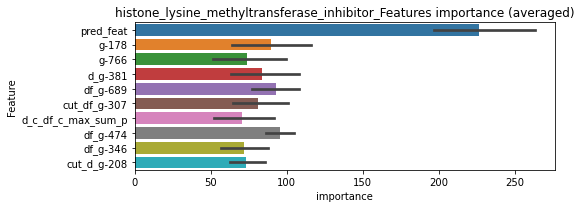

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000401428	valid_1's binary_logloss: 0.0014877
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210059	valid_1's binary_logloss: 0.00169426
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.00020151	valid_1's binary_logloss: 0.00168038


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000260402	valid_1's binary_logloss: 0.00337582
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020998	valid_1's binary_logloss: 0.0002218
[2000]	training's binary_logloss: 0.000174737	valid_1's binary_logloss: 0.000169124
Early stopping, best iteration is:
[2151]	training's binary_logloss: 0.000172762	valid_1's binary_logloss: 0.00016648


histone_lysine_methyltransferase_inhibitor logloss: 0.0016782633060013561


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633408	valid_1's binary_logloss: 0.0547984
[600]	training's binary_logloss: 0.00107879	valid_1's binary_logloss: 0.0461911
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00117911	valid_1's binary_logloss: 0.0460053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00666926	valid_1's binary_logloss: 0.0279163
[600]	training's binary_logloss: 0.00115665	valid_1's binary_logloss: 0.0154376
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000776259	valid_1's binary_logloss: 0.0141202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715201	valid_1's binary_logloss: 0.0241745
[600]	training's binary_logloss: 0.00120324	valid_1's binary_logloss: 0.012893
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000747446	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0076967, Threshold: 0.0983656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.06886, conf_1:0.12788
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0983656
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_2: 0.1483656
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_3: 0.1983656
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_4: 0.2483656
threshold: 0.2483656, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126571	valid_1's binary_logloss: 0.00662042
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000316905	valid_1's binary_logloss: 0.00464789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012778	valid_1's binary_logloss: 0.00398416
[600]	training's binary_logloss: 0.000242174	valid_1's binary_logloss: 0.00257884
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000247245	valid_1's binary_logloss: 0.00257684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127059	valid_1's binary_logloss: 0.00302468
[600]	training's binary_logloss: 0.000239571	valid_1's binary_logloss: 0.00126799
[900]	training's binary_logloss: 0.000174395	valid_1's binary_logloss: 0.00113281
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000167237	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.5149485, Threshold: 0.2483656, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000287188	valid_1's binary_logloss: 0.00159302


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0843797 Vs.target_rate: 0.00302
Num_p_label: 336.0, conf_0:0.19869, conf_1:0.29804
Num_p_label: 336.0, Expected: 12.0, Adj_threshold_1: 0.2483656
Num_p_label: 336.0, Expected: 12.0, Adj_threshold_2: 0.2983656
Num_p_label: 333.0, Expected: 12.0, Adj_threshold_3: 0.3483656
Num_p_label: 325.0, Expected: 12.0, Adj_threshold_4: 0.3983656
Num_p_label: 312.0, Expected: 12.0, Adj_threshold_5: 0.4483656
Num_p_label: 290.0, Expected: 12.0, Adj_threshold_6: 0.4983656
Num_p_label: 254.0, Expected: 12.0, Adj_threshold_7: 0.5483656
Num_p_label: 208.0, Expected: 12.0, Adj_threshold_8: 0.5983656
Num_p_label: 169.0, Expected: 12.0, Adj_threshold_9: 0.6483656
Num_p_label: 125.0, Expected: 12.0, Adj_threshold_10: 0.6983656
threshold: 0.7483656, positive_p_label: 83.0/3982, p_label_rate: 0.0208438
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126934	valid_1's binary_logloss: 0.00753354
[600]	training's binary_logloss: 0.000242347	valid_1's binary_logloss: 0.00543663
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000207235	valid_1's binary_logloss: 0.00516163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125936	valid_1's binary_logloss: 0.00307461
[600]	training's binary_logloss: 0.000241675	valid_1's binary_logloss: 0.00110394
[900]	training's binary_logloss: 0.000176825	valid_1's binary_logloss: 0.000923374
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000177352	valid_1's binary_logloss: 0.000919586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127055	valid_1's binary_logloss: 0.00325734
[600]	training's binary_logloss: 0.000243166	valid_1's binary_logloss: 0.00177305
[900]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.4857868, Threshold: 0.7483656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0178302 Vs.target_rate: 0.00302
Num_p_label: 71.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 71.0, Expected: 12.0, Adj_threshold_1: 0.7483656
Num_p_label: 59.0, Expected: 12.0, Adj_threshold_2: 0.7983656
threshold: 0.7983656, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000343131	valid_1's binary_logloss: 0.00663059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000221413	valid_1's binary_logloss: 0.000323403
[2000]	training's binary_logloss: 0.000177053	valid_1's binary_logloss: 0.000235661
Early stopping, best iteration is:
[2004]	training's binary_logloss: 0.00017702	valid_1's binary_logloss: 0.000235552


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000347731	valid_1's binary_logloss: 0.00390663
Training until validation scores don't improve for 30 rounds


hiv_inhibitor logloss: 0.0030717880779088944


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000345818	valid_1's binary_logloss: 0.00149236
neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246
target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.048993	valid_1's binary_logloss: 0.235035
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.0124263	valid_1's binary_logloss: 0.218532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469604	valid_1's binary_logloss: 0.274773
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.0238193	valid_1's binary_logloss: 0.26861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472685	valid_1's binary_logloss: 0.255751
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.0281456	valid_1's binary_logloss: 0.249365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0481171	valid_1's binary_logloss: 0.251919
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.0172553	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.898
y_Threshold: 0.0795823, Threshold: 0.4433966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 420 → Positive_corect_labels: 504/3475
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, conf_0:0.31038, conf_1:0.57642
threshold: 0.4433966, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 504.0/3475, y_label_rate: 0.1450360
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209387	valid_1's binary_logloss: 0.00771386
[600]	training's binary_logloss: 0.000286552	valid_1's binary_logloss: 0.00330964
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000198293	valid_1's binary_logloss: 0.00305958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207737	valid_1's binary_logloss: 0.00687443
[600]	training's binary_logloss: 0.000289495	valid_1's binary_logloss: 0.002132
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000199626	valid_1's binary_logloss: 0.00178986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215367	valid_1's binary_logloss: 0.00708799
[600]	training's binary_logloss: 0.000290544	valid_1's binary_logloss: 0.0035756
[900]	training's binary_logloss: 0.000181853	valid_1's binary_logloss: 0.00335891
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.7255986, Threshold: 0.4433966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 501.0/3469
p_label_rate: 0.0969362 Vs.target_rate: 0.01188
Num_p_label: 386.0, conf_0:0.35472, conf_1:0.53208
Num_p_label: 386.0, Expected: 47.3, Adj_threshold_1: 0.4433966
Num_p_label: 385.0, Expected: 47.3, Adj_threshold_2: 0.4933966
Num_p_label: 384.0, Expected: 47.3, Adj_threshold_3: 0.5433966
Num_p_label: 384.0, Expected: 47.3, Adj_threshold_4: 0.5933966
Num_p_label: 381.0, Expected: 47.3, Adj_threshold_5: 0.6433966
Num_p_label: 372.0, Expected: 47.3, Adj_threshold_6: 0.6933966
Num_p_label: 358.0, Expected: 47.3, Adj_threshold_7: 0.7433966
Num_p_label: 329.0, Expected: 47.3, Adj_threshold_8: 0.7933966
threshold: 0.7933966, positive_p_label: 329.0/3982, p_label_rate: 0.0826218
positive_y_label: 501.0/3469, y_label_rate: 0.1444220
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219317	valid_1's binary_logloss: 0.0115772
[600]	training's binary_logloss: 0.000306583	valid_1's binary_logloss: 0.00734558
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000220402	valid_1's binary_logloss: 0.00705208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213855	valid_1's binary_logloss: 0.00556037
[600]	training's binary_logloss: 0.000300733	valid_1's binary_logloss: 0.00143178
[900]	training's binary_logloss: 0.000195108	valid_1's binary_logloss: 0.0011487
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000180425	valid_1's binary_logloss: 0.00110695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214665	valid_1's binary_logloss: 0.00608773
[600]	training's binary_logloss: 0.000298268	valid_1's binary_logloss: 0.00218201
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.6024515, Threshold: 0.7933966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 499.0/3465
p_label_rate: 0.0567554 Vs.target_rate: 0.01188
Num_p_label: 226.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 226.0, Expected: 47.3, Adj_threshold_1: 0.7933966
threshold: 0.7933966, positive_p_label: 226.0/3982, p_label_rate: 0.0567554
positive_y_label: 499.0/3465, y_label_rate: 0.1440115


len(train_index) : 2598
len(valid_index) : 867
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2599
len(valid_index) : 866
================================= fold 2/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000323805	valid_1's binary_logloss: 0.00669877
Training until validation scores don't improve for 30 rounds


len(train_index) : 2599
len(valid_index) : 866
================================= fold 3/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000275684	valid_1's binary_logloss: 0.00471744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000256706	valid_1's binary_logloss: 0.00458476


len(train_index) : 2599
len(valid_index) : 866
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000245034	valid_1's binary_logloss: 0.00168104
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.000219443	valid_1's binary_logloss: 0.00160366


hmgcr_inhibitor logloss: 0.004415996320380067


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272
target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108046	valid_1's binary_logloss: 0.068521
[600]	training's binary_logloss: 0.00165284	valid_1's binary_logloss: 0.0531188
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00146057	valid_1's binary_logloss: 0.0527567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104134	valid_1's binary_logloss: 0.0457583
[600]	training's binary_logloss: 0.00163917	valid_1's binary_logloss: 0.0271255
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00106488	valid_1's binary_logloss: 0.0250205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010738	valid_1's binary_logloss: 0.0458454
[600]	training's binary_logloss: 0.00168082	valid_1's binary_logloss: 0.0244022
[900]	training's binary_logloss: 0.000881563	valid_1's binary_logloss: 0.02152
Early stopping, best iteration is

1 / 3 AUC score:0.999
y_Threshold: 0.0160063, Threshold: 0.1761282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.12329, conf_1:0.22897
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1761282
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_2: 0.2261282
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.2761282
Num_p_label: 17.0, Expected: 15.6, Adj_threshold_4: 0.3261282
threshold: 0.3261282, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145676	valid_1's binary_logloss: 0.00693155
[600]	training's binary_logloss: 0.00024254	valid_1's binary_logloss: 0.00488621
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00022506	valid_1's binary_logloss: 0.00484076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141211	valid_1's binary_logloss: 0.0037589
[600]	training's binary_logloss: 0.000246392	valid_1's binary_logloss: 0.00098589
[900]	training's binary_logloss: 0.000173093	valid_1's binary_logloss: 0.000750457
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000164712	valid_1's binary_logloss: 0.000725139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150031	valid_1's binary_logloss: 0.00315964
[600]	training's binary_logloss: 0.000250879	valid_1's binary_logloss: 0.00121941
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.2145274, Threshold: 0.3261282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3778
p_label_rate: 0.0457057 Vs.target_rate: 0.00391
Num_p_label: 182.0, conf_0:0.26090, conf_1:0.39135
Num_p_label: 182.0, Expected: 15.6, Adj_threshold_1: 0.3261282
Num_p_label: 167.0, Expected: 15.6, Adj_threshold_2: 0.3761282
Num_p_label: 159.0, Expected: 15.6, Adj_threshold_3: 0.4261282
Num_p_label: 157.0, Expected: 15.6, Adj_threshold_4: 0.4761282


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000325544	valid_1's binary_logloss: 0.00442316


Num_p_label: 157.0, Expected: 15.6, Adj_threshold_5: 0.5261282
Num_p_label: 157.0, Expected: 15.6, Adj_threshold_6: 0.5761282
Num_p_label: 156.0, Expected: 15.6, Adj_threshold_7: 0.6261282
Num_p_label: 156.0, Expected: 15.6, Adj_threshold_8: 0.6761282
Num_p_label: 156.0, Expected: 15.6, Adj_threshold_9: 0.7261282
Num_p_label: 156.0, Expected: 15.6, Adj_threshold_10: 0.7761282
threshold: 0.7761282, positive_p_label: 156.0/3982, p_label_rate: 0.0391763
positive_y_label: 646.0/3778, y_label_rate: 0.1709899
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120774	valid_1's binary_logloss: 0.00252028
[600]	training's binary_logloss: 0.00017217	valid_1's binary_logloss: 0.000376805
[900]	training's binary_logloss: 0.000108993	valid_1's binary_logloss: 0.00023999
[1200]	training's binary_logloss: 0.000101998	valid_1's binary_logloss: 0.000224319
Early stopping, best iteration is:
[1174]	training's binary_logloss: 0.000101998	valid_1's binary_logloss: 0.000224319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118674	valid_1's binary_logloss: 0.00829195
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000487555	valid_1's binary_logloss: 0.00771566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138969	valid_1's binary_logloss: 0.00222625
[600]	training's binary_logloss: 0.000232379	valid_1's binary_logloss: 0.000405908
[900]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1316029, Threshold: 0.7761282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3776
p_label_rate: 0.0391763 Vs.target_rate: 0.00391
Num_p_label: 156.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 156.0, Expected: 15.6, Adj_threshold_1: 0.7761282
threshold: 0.7761282, positive_p_label: 156.0/3982, p_label_rate: 0.0391763
positive_y_label: 645.0/3776, y_label_rate: 0.1708157


len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 hsp_inhibitor=================================


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000272065	valid_1's binary_logloss: 0.00262618
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149572	valid_1's binary_logloss: 0.00033147
[2000]	training's binary_logloss: 0.000111086	valid_1's binary_logloss: 0.000246744
[3000]	training's binary_logloss: 0.000103204	valid_1's binary_logloss: 0.000229193
Early stopping, best iteration is:
[3073]	training's binary_logloss: 0.000102864	valid_1's binary_logloss: 0.000228384


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014956	valid_1's binary_logloss: 0.000307068
[2000]	training's binary_logloss: 0.00011115	valid_1's binary_logloss: 0.000228745
[3000]	training's binary_logloss: 0.000103282	valid_1's binary_logloss: 0.000212428
Early stopping, best iteration is:
[3300]	training's binary_logloss: 0.000102245	valid_1's binary_logloss: 0.000210183


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014961	valid_1's binary_logloss: 0.000357819
[2000]	training's binary_logloss: 0.000111015	valid_1's binary_logloss: 0.000265999
[3000]	training's binary_logloss: 0.000103318	valid_1's binary_logloss: 0.000247527
Early stopping, best iteration is:
[3261]	training's binary_logloss: 0.000102409	valid_1's binary_logloss: 0.000245209


hsp_inhibitor logloss: 0.0008292774806181528


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307555	valid_1's binary_logloss: 0.0260139
[600]	training's binary_logloss: 0.000615736	valid_1's binary_logloss: 0.01884
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000608093	valid_1's binary_logloss: 0.0187798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322996	valid_1's binary_logloss: 0.0115902
[600]	training's binary_logloss: 0.000634324	valid_1's binary_logloss: 0.00675849
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000530226	valid_1's binary_logloss: 0.00658217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320488	valid_1's binary_logloss: 0.00840081
[600]	training's binary_logloss: 0.000625396	valid_1's binary_logloss: 0.00331227
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000542272	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0036642, Threshold: 0.0263306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01843, conf_1:0.03423
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0263306
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_2: 0.0763306
threshold: 0.0763306, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000861286	valid_1's binary_logloss: 0.00476682
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000253594	valid_1's binary_logloss: 0.00358517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000895963	valid_1's binary_logloss: 0.00433757
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000356964	valid_1's binary_logloss: 0.00361309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915931	valid_1's binary_logloss: 0.00114707
[600]	training's binary_logloss: 0.00021363	valid_1's binary_logloss: 0.000233732
[900]	training's binary_logloss: 0.000163371	valid_1's binary_logloss: 0.000160789
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000161946	valid_1's binary_logloss: 0.000158394
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.5819362, Threshold: 0.0763306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0723255 Vs.target_rate: 0.00155
Num_p_label: 288.0, conf_0:0.06106, conf_1:0.09160
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_1: 0.0763306
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_2: 0.1263306


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000286358	valid_1's binary_logloss: 0.00281267


Num_p_label: 288.0, Expected: 6.2, Adj_threshold_3: 0.1763306
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_4: 0.2263306
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_5: 0.2763306
Num_p_label: 288.0, Expected: 6.2, Adj_threshold_6: 0.3263306
Num_p_label: 287.0, Expected: 6.2, Adj_threshold_7: 0.3763306
Num_p_label: 283.0, Expected: 6.2, Adj_threshold_8: 0.4263306
Num_p_label: 269.0, Expected: 6.2, Adj_threshold_9: 0.4763306
Num_p_label: 266.0, Expected: 6.2, Adj_threshold_10: 0.5263306
threshold: 0.5763306, positive_p_label: 235.0/3982, p_label_rate: 0.0590156
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884683	valid_1's binary_logloss: 0.00440813
[600]	training's binary_logloss: 0.000217541	valid_1's binary_logloss: 0.00314803
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000191418	valid_1's binary_logloss: 0.00309236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000913687	valid_1's binary_logloss: 0.00252191
[600]	training's binary_logloss: 0.000225866	valid_1's binary_logloss: 0.001605
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000182116	valid_1's binary_logloss: 0.00154376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00088731	valid_1's binary_logloss: 0.002614
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000341777	valid_1's binary_logloss: 0.00204481
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.5255383, Threshold: 0.5763306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0298845 Vs.target_rate: 0.00155
Num_p_label: 119.0, conf_0:0.50000, conf_1:0.63396
Num_p_label: 119.0, Expected: 6.2, Adj_threshold_1: 0.5763306
Num_p_label: 79.0, Expected: 6.2, Adj_threshold_2: 0.6263306
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_3: 0.6763306
Num_p_label: 28.0, Expected: 6.2, Adj_threshold_4: 0.7263306
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_5: 0.7763306
threshold: 0.7763306, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


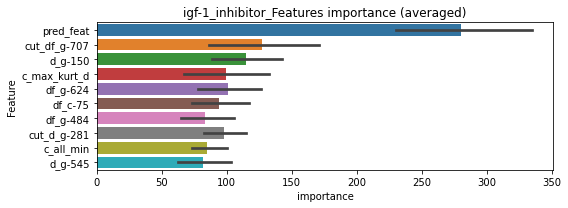

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000399997	valid_1's binary_logloss: 0.00393197
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[237]	training's binary_logloss: 0.0006678	valid_1's binary_logloss: 0.00265896
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210116	valid_1's binary_logloss: 0.000439513
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.000200892	valid_1's binary_logloss: 0.000432008


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210977	valid_1's binary_logloss: 0.00182401
Early stopping, best iteration is:
[1408]	training's binary_logloss: 0.000187555	valid_1's binary_logloss: 0.00176441


igf-1_inhibitor logloss: 0.002197968022704303


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196698	valid_1's binary_logloss: 0.0133727
[600]	training's binary_logloss: 0.000464664	valid_1's binary_logloss: 0.0082157
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000452882	valid_1's binary_logloss: 0.00818156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198267	valid_1's binary_logloss: 0.00603622
[600]	training's binary_logloss: 0.000471405	valid_1's binary_logloss: 0.00246426
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000441125	valid_1's binary_logloss: 0.00238345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198166	valid_1's binary_logloss: 0.00547346
[600]	training's binary_logloss: 0.00046846	valid_1's binary_logloss: 0.0021027
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000432836	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0036526, Threshold: 0.0122344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00856, conf_1:0.01590
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0122344
Num_p_label: 4.0, Expected: 5.0, Adj_threshold_2: 0.0622344
threshold: 0.0622344, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702491	valid_1's binary_logloss: 0.00437537
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000223999	valid_1's binary_logloss: 0.00338878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068489	valid_1's binary_logloss: 0.00377278
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000328994	valid_1's binary_logloss: 0.00306507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068905	valid_1's binary_logloss: 0.000879781
[600]	training's binary_logloss: 0.000187331	valid_1's binary_logloss: 0.000260536
[900]	training's binary_logloss: 0.000150731	valid_1's binary_logloss: 0.000212781
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000150731	valid_1's binary_logloss: 0.000212781
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.5429372, Threshold: 0.0622344, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000149806	valid_1's binary_logloss: 0.000139201
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000149806	valid_1's binary_logloss: 0.000139201


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0431944 Vs.target_rate: 0.00126
Num_p_label: 172.0, conf_0:0.04979, conf_1:0.07468
Num_p_label: 172.0, Expected: 5.0, Adj_threshold_1: 0.0622344
Num_p_label: 172.0, Expected: 5.0, Adj_threshold_2: 0.1122344
Num_p_label: 169.0, Expected: 5.0, Adj_threshold_3: 0.1622344
Num_p_label: 169.0, Expected: 5.0, Adj_threshold_4: 0.2122344
Num_p_label: 166.0, Expected: 5.0, Adj_threshold_5: 0.2622344
Num_p_label: 166.0, Expected: 5.0, Adj_threshold_6: 0.3122344
Num_p_label: 162.0, Expected: 5.0, Adj_threshold_7: 0.3622344
Num_p_label: 152.0, Expected: 5.0, Adj_threshold_8: 0.4122344
Num_p_label: 131.0, Expected: 5.0, Adj_threshold_9: 0.4622344
Num_p_label: 113.0, Expected: 5.0, Adj_threshold_10: 0.5122344
threshold: 0.5622344, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00071796	valid_1's binary_logloss: 0.00577276
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000241134	valid_1's binary_logloss: 0.00420902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00070004	valid_1's binary_logloss: 0.00116478
[600]	training's binary_logloss: 0.000191103	valid_1's binary_logloss: 0.000532622
[900]	training's binary_logloss: 0.000154864	valid_1's binary_logloss: 0.000473675
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000154474	valid_1's binary_logloss: 0.00047108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700983	valid_1's binary_logloss: 0.00105093
[600]	training's binary_logloss: 0.000191237	valid_1's binary_logloss: 0.000380186
[900]	training's binary_logloss: 0.000155745	valid_1's binary_logloss: 0.000338419
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.5286314, Threshold: 0.5622344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00126
Num_p_label: 47.0, conf_0:0.50000, conf_1:0.61846
Num_p_label: 47.0, Expected: 5.0, Adj_threshold_1: 0.5622344
Num_p_label: 33.0, Expected: 5.0, Adj_threshold_2: 0.6122344
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.6622344
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.7122344
threshold: 0.7122344, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000199963	valid_1's binary_logloss: 0.00203885
Early stopping, best iteration is:
[1963]	training's binary_logloss: 0.000164974	valid_1's binary_logloss: 0.00195041


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019868	valid_1's binary_logloss: 0.00047879
[2000]	training's binary_logloss: 0.000162924	valid_1's binary_logloss: 0.000429987
Early stopping, best iteration is:
[2222]	training's binary_logloss: 0.000160247	valid_1's binary_logloss: 0.000426448


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000231846	valid_1's binary_logloss: 0.00239416


================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019014	valid_1's binary_logloss: 0.000479373


ikk_inhibitor logloss: 0.0013042863807527895


Early stopping, best iteration is:
[1366]	training's binary_logloss: 0.000170144	valid_1's binary_logloss: 0.000445325
neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176386	valid_1's binary_logloss: 0.00800034
[600]	training's binary_logloss: 0.000445255	valid_1's binary_logloss: 0.00486886
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000420637	valid_1's binary_logloss: 0.0047571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172648	valid_1's binary_logloss: 0.0130931
[600]	training's binary_logloss: 0.000436308	valid_1's binary_logloss: 0.00959691
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000435631	valid_1's binary_logloss: 0.00958827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184464	valid_1's binary_logloss: 0.00330254
[600]	training's binary_logloss: 0.000452449	valid_1's binary_logloss: 0.00129554
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000441647	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027311, Threshold: 0.0192062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01344, conf_1:0.02497
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0192062
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_2: 0.0692062
threshold: 0.0692062, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000686966	valid_1's binary_logloss: 0.00325966
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000221335	valid_1's binary_logloss: 0.00252552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665693	valid_1's binary_logloss: 0.00169485
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00020024	valid_1's binary_logloss: 0.000894631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000676502	valid_1's binary_logloss: 0.000762371
[600]	training's binary_logloss: 0.000187241	valid_1's binary_logloss: 0.000185445
[900]	training's binary_logloss: 0.000153865	valid_1's binary_logloss: 0.000139403
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000153865	valid_1's binary_logloss: 0.000139403
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.6754097, Threshold: 0.0692062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0615269 Vs.target_rate: 0.00130
Num_p_label: 245.0, conf_0:0.05536, conf_1:0.08305
Num_p_label: 245.0, Expected: 5.2, Adj_threshold_1: 0.0692062
Num_p_label: 244.0, Expected: 5.2, Adj_threshold_2: 0.1192062
Num_p_label: 244.0, Expected: 5.2, Adj_threshold_3: 0.1692062
Num_p_label: 244.0, Expected: 5.2, Adj_threshold_4: 0.2192062
Num_p_label: 244.0, Expected: 5.2, Adj_threshold_5: 0.2692062


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000154681	valid_1's binary_logloss: 0.0015137


Num_p_label: 244.0, Expected: 5.2, Adj_threshold_6: 0.3192062
Num_p_label: 243.0, Expected: 5.2, Adj_threshold_7: 0.3692062
Num_p_label: 241.0, Expected: 5.2, Adj_threshold_8: 0.4192062
Num_p_label: 236.0, Expected: 5.2, Adj_threshold_9: 0.4692062
Num_p_label: 220.0, Expected: 5.2, Adj_threshold_10: 0.5192062
threshold: 0.5692062, positive_p_label: 204.0/3982, p_label_rate: 0.0512305
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671094	valid_1's binary_logloss: 0.00336081
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000304416	valid_1's binary_logloss: 0.00296208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066359	valid_1's binary_logloss: 0.00181356
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00051031	valid_1's binary_logloss: 0.00143349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671333	valid_1's binary_logloss: 0.000752269
[600]	training's binary_logloss: 0.000185982	valid_1's binary_logloss: 0.000182258
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000153238	valid_1's binary_logloss: 0.00013843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657288	valid_1's binary_logloss: 0.0022

3 / 3 AUC score:1.000
y_Threshold: 0.6923338, Threshold: 0.5692062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0489704 Vs.target_rate: 0.00130
Num_p_label: 195.0, conf_0:0.50000, conf_1:0.62613
Num_p_label: 195.0, Expected: 5.2, Adj_threshold_1: 0.5692062
Num_p_label: 172.0, Expected: 5.2, Adj_threshold_2: 0.6192062
Num_p_label: 142.0, Expected: 5.2, Adj_threshold_3: 0.6692062
Num_p_label: 106.0, Expected: 5.2, Adj_threshold_4: 0.7192062
Num_p_label: 76.0, Expected: 5.2, Adj_threshold_5: 0.7692062


Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000152163	valid_1's binary_logloss: 0.00145119


threshold: 0.7692062, positive_p_label: 76.0/3982, p_label_rate: 0.0190859
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


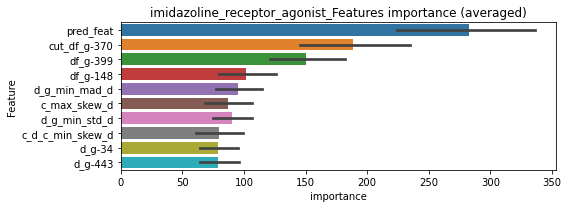

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019491	valid_1's binary_logloss: 0.00175103
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.00018606	valid_1's binary_logloss: 0.00173837


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000382145	valid_1's binary_logloss: 0.00186164
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000192432	valid_1's binary_logloss: 0.000182228
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.000159238	valid_1's binary_logloss: 0.00014222


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000189145	valid_1's binary_logloss: 0.00124713
Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.0001615	valid_1's binary_logloss: 0.00119731


imidazoline_receptor_agonist logloss: 0.001236381014461207


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00684797	valid_1's binary_logloss: 0.0374899
[600]	training's binary_logloss: 0.00117891	valid_1's binary_logloss: 0.0252584
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000962149	valid_1's binary_logloss: 0.0244473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00766808	valid_1's binary_logloss: 0.0432787
[600]	training's binary_logloss: 0.00125757	valid_1's binary_logloss: 0.0310619
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000828371	valid_1's binary_logloss: 0.0289496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721115	valid_1's binary_logloss: 0.0346322
[600]	training's binary_logloss: 0.00120877	valid_1's binary_logloss: 0.021144
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000815488	valid_1's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0074078, Threshold: 0.0216087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01513, conf_1:0.02809
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0216087
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_2: 0.0716087
threshold: 0.0716087, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125986	valid_1's binary_logloss: 0.00442422
[600]	training's binary_logloss: 0.000242101	valid_1's binary_logloss: 0.00258219
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000189152	valid_1's binary_logloss: 0.00248091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125668	valid_1's binary_logloss: 0.00476563
[600]	training's binary_logloss: 0.000242957	valid_1's binary_logloss: 0.0030277
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000202519	valid_1's binary_logloss: 0.00293798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131344	valid_1's binary_logloss: 0.00295703
[600]	training's binary_logloss: 0.000244967	valid_1's binary_logloss: 0.00146042
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000213076	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.5209483, Threshold: 0.0716087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0532396 Vs.target_rate: 0.00307
Num_p_label: 212.0, conf_0:0.05729, conf_1:0.08593
Num_p_label: 212.0, Expected: 12.2, Adj_threshold_1: 0.0716087
Num_p_label: 209.0, Expected: 12.2, Adj_threshold_2: 0.1216087


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000279876	valid_1's binary_logloss: 0.00574713


Num_p_label: 208.0, Expected: 12.2, Adj_threshold_3: 0.1716087
Num_p_label: 208.0, Expected: 12.2, Adj_threshold_4: 0.2216087
Num_p_label: 205.0, Expected: 12.2, Adj_threshold_5: 0.2716087
Num_p_label: 199.0, Expected: 12.2, Adj_threshold_6: 0.3216087
Num_p_label: 182.0, Expected: 12.2, Adj_threshold_7: 0.3716087
Num_p_label: 144.0, Expected: 12.2, Adj_threshold_8: 0.4216087
Num_p_label: 112.0, Expected: 12.2, Adj_threshold_9: 0.4716087
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_10: 0.5216087
threshold: 0.5716087, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125925	valid_1's binary_logloss: 0.00583096
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000254551	valid_1's binary_logloss: 0.00436074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125856	valid_1's binary_logloss: 0.00694065
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000293646	valid_1's binary_logloss: 0.00514214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128469	valid_1's binary_logloss: 0.00197039
[600]	training's binary_logloss: 0.000244894	valid_1's binary_logloss: 0.000343378
[900]	training's binary_logloss: 0.000175665	valid_1's binary_logloss: 0.00021513
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000168134	valid_1's binary_logloss: 0.000201995
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.2203277, Threshold: 0.5716087, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000166639	valid_1's binary_logloss: 0.000226415


Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0012557 Vs.target_rate: 0.00307
Num_p_label: 5.0, conf_0:0.50000, conf_1:0.62877
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_1: 0.5716087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_2: 0.5516087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_3: 0.5316087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_4: 0.5116087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_5: 0.4916087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_6: 0.4716087
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_7: 0.4516087
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_8: 0.4316087
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_9: 0.4116087
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_10: 0.3916087
threshold: 0.3716087, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000432226	valid_1's binary_logloss: 0.00587893


================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000251677	valid_1's binary_logloss: 0.00169647
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209259	valid_1's binary_logloss: 0.000247293
Early stopping, best iteration is:
[1868]	training's binary_logloss: 0.000167248	valid_1's binary_logloss: 0.000183643


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


immunosuppressant logloss: 0.0025894136561811637


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000318922	valid_1's binary_logloss: 0.00259131
neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208386	valid_1's binary_logloss: 0.0134608
[600]	training's binary_logloss: 0.000515591	valid_1's binary_logloss: 0.00950361
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000496321	valid_1's binary_logloss: 0.00946781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224145	valid_1's binary_logloss: 0.00726948
[600]	training's binary_logloss: 0.000528543	valid_1's binary_logloss: 0.00348314
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000499121	valid_1's binary_logloss: 0.00343648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240639	valid_1's binary_logloss: 0.00402796
[600]	training's binary_logloss: 0.000532587	valid_1's binary_logloss: 0.00131342
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000497018	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0029402, Threshold: 0.0101232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00709, conf_1:0.01316
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0101232
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_2: 0.0601232
threshold: 0.0601232, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000760642	valid_1's binary_logloss: 0.00196353
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000474584	valid_1's binary_logloss: 0.00154267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787009	valid_1's binary_logloss: 0.00224877
[600]	training's binary_logloss: 0.000206185	valid_1's binary_logloss: 0.00154934
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00019034	valid_1's binary_logloss: 0.00153223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000797712	valid_1's binary_logloss: 0.00133782
[600]	training's binary_logloss: 0.000209323	valid_1's binary_logloss: 0.00070296
[900]	training's binary_logloss: 0.000164239	valid_1's binary_logloss: 0.000625086
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000165171	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.5497252, Threshold: 0.0601232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0479658 Vs.target_rate: 0.00126
Num_p_label: 191.0, conf_0:0.04810, conf_1:0.07215
Num_p_label: 191.0, Expected: 5.0, Adj_threshold_1: 0.0601232
Num_p_label: 191.0, Expected: 5.0, Adj_threshold_2: 0.1101232
Num_p_label: 190.0, Expected: 5.0, Adj_threshold_3: 0.1601232
Num_p_label: 190.0, Expected: 5.0, Adj_threshold_4: 0.2101232
Num_p_label: 189.0, Expected: 5.0, Adj_threshold_5: 0.2601232


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000223503	valid_1's binary_logloss: 0.0026691


Num_p_label: 189.0, Expected: 5.0, Adj_threshold_6: 0.3101232
Num_p_label: 185.0, Expected: 5.0, Adj_threshold_7: 0.3601232
Num_p_label: 171.0, Expected: 5.0, Adj_threshold_8: 0.4101232
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_9: 0.4601232
Num_p_label: 136.0, Expected: 5.0, Adj_threshold_10: 0.5101232
threshold: 0.5601232, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000762522	valid_1's binary_logloss: 0.00207707
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000450844	valid_1's binary_logloss: 0.00157934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000790598	valid_1's binary_logloss: 0.00225511
[600]	training's binary_logloss: 0.00020599	valid_1's binary_logloss: 0.00154758
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000174475	valid_1's binary_logloss: 0.0015101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806944	valid_1's binary_logloss: 0.00129883
[600]	training's binary_logloss: 0.000208562	valid_1's binary_logloss: 0.000659379
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000195752	valid_1's binary_logloss: 0.000649966
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.5523278, Threshold: 0.5601232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0296334 Vs.target_rate: 0.00126
Num_p_label: 118.0, conf_0:0.50000, conf_1:0.61614
Num_p_label: 118.0, Expected: 5.0, Adj_threshold_1: 0.5601232
Num_p_label: 78.0, Expected: 5.0, Adj_threshold_2: 0.6101232
Num_p_label: 45.0, Expected: 5.0, Adj_threshold_3: 0.6601232
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_4: 0.7101232


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000166241	valid_1's binary_logloss: 0.00259488


Num_p_label: 12.0, Expected: 5.0, Adj_threshold_5: 0.7601232
threshold: 0.7601232, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[234]	training's binary_logloss: 0.000634493	valid_1's binary_logloss: 0.00422804
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205724	valid_1's binary_logloss: 0.000329603
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000199277	valid_1's binary_logloss: 0.000320646


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000335004	valid_1's binary_logloss: 0.00217627
Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.0018628627346711664


Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000245467	valid_1's binary_logloss: 0.000715509
neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284
target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415576	valid_1's binary_logloss: 0.0349599
[600]	training's binary_logloss: 0.000767698	valid_1's binary_logloss: 0.0284425
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000613255	valid_1's binary_logloss: 0.0279164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422716	valid_1's binary_logloss: 0.0195302
[600]	training's binary_logloss: 0.000781449	valid_1's binary_logloss: 0.0115335
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000573682	valid_1's binary_logloss: 0.0107962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443274	valid_1's binary_logloss: 0.0119327
[600]	training's binary_logloss: 0.00080816	valid_1's binary_logloss: 0.00449365
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000575288	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0048312, Threshold: 0.0151058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, conf_0:0.01057, conf_1:0.01964
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0151058
Num_p_label: 4.0, Expected: 8.5, Adj_threshold_2: 0.0651058
threshold: 0.0651058, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103283	valid_1's binary_logloss: 0.00421325
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000263948	valid_1's binary_logloss: 0.00294116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105546	valid_1's binary_logloss: 0.00264128
[600]	training's binary_logloss: 0.000225213	valid_1's binary_logloss: 0.0015171
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00019347	valid_1's binary_logloss: 0.00142603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104676	valid_1's binary_logloss: 0.00255352
[600]	training's binary_logloss: 0.000224527	valid_1's binary_logloss: 0.00141994
[900]	training's binary_logloss: 0.000172555	valid_1's binary_logloss: 0.00134223
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000168254	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.4806478, Threshold: 0.0651058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0469613 Vs.target_rate: 0.00214
Num_p_label: 187.0, conf_0:0.05208, conf_1:0.07813
Num_p_label: 187.0, Expected: 8.5, Adj_threshold_1: 0.0651058
Num_p_label: 187.0, Expected: 8.5, Adj_threshold_2: 0.1151058
Num_p_label: 187.0, Expected: 8.5, Adj_threshold_3: 0.1651058
Num_p_label: 187.0, Expected: 8.5, Adj_threshold_4: 0.2151058
Num_p_label: 187.0, Expected: 8.5, Adj_threshold_5: 0.2651058
Num_p_label: 186.0, Expected: 8.5, Adj_threshold_6: 0.3151058
Num_p_label: 185.0, Expected: 8.5, Adj_threshold_7: 0.3651058
Num_p_label: 177.0, Expected: 8.5, Adj_threshold_8: 0.4151058


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00051936	valid_1's binary_logloss: 0.00570491


Num_p_label: 154.0, Expected: 8.5, Adj_threshold_9: 0.4651058
Num_p_label: 121.0, Expected: 8.5, Adj_threshold_10: 0.5151058
threshold: 0.5651058, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103168	valid_1's binary_logloss: 0.00779117
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000526979	valid_1's binary_logloss: 0.00679212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107328	valid_1's binary_logloss: 0.00402154
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000353726	valid_1's binary_logloss: 0.00292294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103191	valid_1's binary_logloss: 0.00334991
[600]	training's binary_logloss: 0.000225979	valid_1's binary_logloss: 0.00215207
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000189784	valid_1's binary_logloss: 0.00207986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102849	valid_1's binary_logloss: 0.00128765

3 / 3 AUC score:1.000
y_Threshold: 0.4018227, Threshold: 0.5651058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0052737 Vs.target_rate: 0.00214


Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000164227	valid_1's binary_logloss: 0.000153629


Num_p_label: 21.0, conf_0:0.50000, conf_1:0.62162
Num_p_label: 21.0, Expected: 8.5, Adj_threshold_1: 0.5651058
threshold: 0.5651058, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


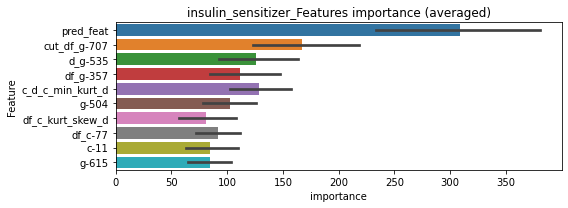

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000291435	valid_1's binary_logloss: 0.00138645
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[219]	training's binary_logloss: 0.000778591	valid_1's binary_logloss: 0.00326183
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000651801	valid_1's binary_logloss: 0.00386929
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209547	valid_1's binary_logloss: 0.000747324
Early stopping, best iteration is:
[1762]	training's binary_logloss: 0.000174713	valid_1's binary_logloss: 0.000656625


insulin_sensitizer logloss: 0.0022965446593288634


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373115	valid_1's binary_logloss: 0.0231328
[600]	training's binary_logloss: 0.000680232	valid_1's binary_logloss: 0.0156933
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000568451	valid_1's binary_logloss: 0.0153943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396899	valid_1's binary_logloss: 0.0154254
[600]	training's binary_logloss: 0.000697576	valid_1's binary_logloss: 0.00918159
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00056804	valid_1's binary_logloss: 0.00883781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433656	valid_1's binary_logloss: 0.00960664
[600]	training's binary_logloss: 0.00073664	valid_1's binary_logloss: 0.00354496
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00056742	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0048227, Threshold: 0.0129470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.00906, conf_1:0.01683
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0129470
Num_p_label: 2.0, Expected: 7.0, Adj_threshold_2: 0.0629470
threshold: 0.0629470, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101342	valid_1's binary_logloss: 0.00372992
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000253867	valid_1's binary_logloss: 0.0025669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990749	valid_1's binary_logloss: 0.00188033
[600]	training's binary_logloss: 0.000218471	valid_1's binary_logloss: 0.000817596
[900]	training's binary_logloss: 0.000169365	valid_1's binary_logloss: 0.000708053
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000169365	valid_1's binary_logloss: 0.000708053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105852	valid_1's binary_logloss: 0.00425604
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000434078	valid_1's binary_logloss: 0.00349993
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.6374842, Threshold: 0.0629470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0474636 Vs.target_rate: 0.00176
Num_p_label: 189.0, conf_0:0.05036, conf_1:0.07554
Num_p_label: 189.0, Expected: 7.0, Adj_threshold_1: 0.0629470
Num_p_label: 189.0, Expected: 7.0, Adj_threshold_2: 0.1129470
Num_p_label: 187.0, Expected: 7.0, Adj_threshold_3: 0.1629470
Num_p_label: 186.0, Expected: 7.0, Adj_threshold_4: 0.2129470
Num_p_label: 186.0, Expected: 7.0, Adj_threshold_5: 0.2629470


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00022921	valid_1's binary_logloss: 0.00219743


Num_p_label: 186.0, Expected: 7.0, Adj_threshold_6: 0.3129470
Num_p_label: 186.0, Expected: 7.0, Adj_threshold_7: 0.3629470
Num_p_label: 184.0, Expected: 7.0, Adj_threshold_8: 0.4129470
Num_p_label: 184.0, Expected: 7.0, Adj_threshold_9: 0.4629470
Num_p_label: 183.0, Expected: 7.0, Adj_threshold_10: 0.5129470
threshold: 0.5629470, positive_p_label: 174.0/3982, p_label_rate: 0.0436966
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105348	valid_1's binary_logloss: 0.0027074
[600]	training's binary_logloss: 0.000226721	valid_1's binary_logloss: 0.00146483
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000193666	valid_1's binary_logloss: 0.00141223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101208	valid_1's binary_logloss: 0.00434688
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00053499	valid_1's binary_logloss: 0.00329685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103975	valid_1's binary_logloss: 0.00276202
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000482747	valid_1's binary_logloss: 0.0021913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102391	valid_1's binary_logloss: 0.00223289
[6

3 / 3 AUC score:1.000
y_Threshold: 0.5807161, Threshold: 0.5629470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0321447 Vs.target_rate: 0.00176
Num_p_label: 128.0, conf_0:0.50000, conf_1:0.61924
Num_p_label: 128.0, Expected: 7.0, Adj_threshold_1: 0.5629470
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_2: 0.6129470
Num_p_label: 45.0, Expected: 7.0, Adj_threshold_3: 0.6629470
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_4: 0.7129470
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_5: 0.7629470
threshold: 0.7629470, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


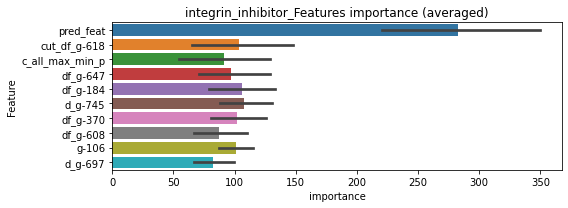

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213151	valid_1's binary_logloss: 0.00115335
Early stopping, best iteration is:
[1719]	training's binary_logloss: 0.000177696	valid_1's binary_logloss: 0.00109013


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.000441912	valid_1's binary_logloss: 0.00529542
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000223116	valid_1's binary_logloss: 0.000771744
Training until validation scores don't improve for 30 rounds


integrin_inhibitor logloss: 0.0021869207980914893


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00031493	valid_1's binary_logloss: 0.0015721
neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273
target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00992858	valid_1's binary_logloss: 0.067805
[600]	training's binary_logloss: 0.0015531	valid_1's binary_logloss: 0.056335
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.0016354	valid_1's binary_logloss: 0.0561967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966706	valid_1's binary_logloss: 0.0649422
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00181625	valid_1's binary_logloss: 0.0560038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987889	valid_1's binary_logloss: 0.0412006
[600]	training's binary_logloss: 0.001552	valid_1's binary_logloss: 0.0237728
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.0014672	valid_1's binary_logloss: 0.0234055
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.996
y_Threshold: 0.0131473, Threshold: 0.0943922, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, conf_0:0.06607, conf_1:0.12271
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0943922
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_2: 0.1443922
threshold: 0.1443922, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125332	valid_1's binary_logloss: 0.00204854
[600]	training's binary_logloss: 0.000173468	valid_1's binary_logloss: 0.00029345
[900]	training's binary_logloss: 0.000108811	valid_1's binary_logloss: 0.000184636
[1200]	training's binary_logloss: 0.000101739	valid_1's binary_logloss: 0.000172575
Early stopping, best iteration is:
[1321]	training's binary_logloss: 0.000100829	valid_1's binary_logloss: 0.000170906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121334	valid_1's binary_logloss: 0.00269
[600]	training's binary_logloss: 0.000171928	valid_1's binary_logloss: 0.000414675
[900]	training's binary_logloss: 0.000108789	valid_1's binary_logloss: 0.000263765
[1200]	training's binary_logloss: 0.000101683	valid_1's binary_logloss: 0.000246121
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000101455	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1277151, Threshold: 0.1443922, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0615269 Vs.target_rate: 0.00386
Num_p_label: 245.0, conf_0:0.11551, conf_1:0.17327
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_1: 0.1443922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_2: 0.1943922


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000260403	valid_1's binary_logloss: 0.00462538


Num_p_label: 245.0, Expected: 15.4, Adj_threshold_3: 0.2443922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_4: 0.2943922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_5: 0.3443922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_6: 0.3943922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_7: 0.4443922
Num_p_label: 245.0, Expected: 15.4, Adj_threshold_8: 0.4943922
Num_p_label: 209.0, Expected: 15.4, Adj_threshold_9: 0.5443922
Num_p_label: 205.0, Expected: 15.4, Adj_threshold_10: 0.5943922
threshold: 0.6443922, positive_p_label: 205.0/3982, p_label_rate: 0.0514817
positive_y_label: 645.0/3777, y_label_rate: 0.1707705
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139244	valid_1's binary_logloss: 0.00219869
[600]	training's binary_logloss: 0.000224316	valid_1's binary_logloss: 0.000310402
[900]	training's binary_logloss: 0.000153572	valid_1's binary_logloss: 0.000186636
[1200]	training's binary_logloss: 0.000137941	valid_1's binary_logloss: 0.000156002
Early stopping, best iteration is:
[1234]	training's binary_logloss: 0.000136511	valid_1's binary_logloss: 0.000153127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121344	valid_1's binary_logloss: 0.00245237
[600]	training's binary_logloss: 0.000171639	valid_1's binary_logloss: 0.000371469
[900]	training's binary_logloss: 0.000108606	valid_1's binary_logloss: 0.000236178
[1200]	training's binary_logloss: 0.000101802	valid_1's binary_logloss: 0.000221334
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000101105	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1688368, Threshold: 0.6443922, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000102073	valid_1's binary_logloss: 0.000243715


Remove_noisy_data: 0 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0524862 Vs.target_rate: 0.00386
Num_p_label: 209.0, conf_0:0.50000, conf_1:0.70883
Num_p_label: 209.0, Expected: 15.4, Adj_threshold_1: 0.6443922
Num_p_label: 209.0, Expected: 15.4, Adj_threshold_2: 0.6943922
Num_p_label: 206.0, Expected: 15.4, Adj_threshold_3: 0.7443922
Num_p_label: 206.0, Expected: 15.4, Adj_threshold_4: 0.7943922
threshold: 0.7943922, positive_p_label: 206.0/3982, p_label_rate: 0.0517328
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 jak_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000459246	valid_1's binary_logloss: 0.00579449
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149595	valid_1's binary_logloss: 0.000333921
[2000]	training's binary_logloss: 0.000111046	valid_1's binary_logloss: 0.00024828
[3000]	training's binary_logloss: 0.000103222	valid_1's binary_logloss: 0.000230657


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[3427]	training's binary_logloss: 0.000102009	valid_1's binary_logloss: 0.000227845
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149605	valid_1's binary_logloss: 0.000274019
[2000]	training's binary_logloss: 0.000111065	valid_1's binary_logloss: 0.000203683
[3000]	training's binary_logloss: 0.000103288	valid_1's binary_logloss: 0.000189361


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 jak_inhibitor=================================


Early stopping, best iteration is:
[3201]	training's binary_logloss: 0.000102524	valid_1's binary_logloss: 0.000187912
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149437	valid_1's binary_logloss: 0.000379509
[2000]	training's binary_logloss: 0.000110955	valid_1's binary_logloss: 0.000282466
[3000]	training's binary_logloss: 0.000103203	valid_1's binary_logloss: 0.000262728


jak_inhibitor logloss: 0.0016217606004172824


Early stopping, best iteration is:
[3193]	training's binary_logloss: 0.000102492	valid_1's binary_logloss: 0.000260762
neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248
target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397745	valid_1's binary_logloss: 0.247787
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0323354	valid_1's binary_logloss: 0.245926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412675	valid_1's binary_logloss: 0.260198
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0464592	valid_1's binary_logloss: 0.259517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0445941	valid_1's binary_logloss: 0.215098
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.0153849	valid_1's binary_logloss: 0.203088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407133	valid_1's binary_logloss: 0.222079
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.0220585	valid_1's binary_logloss: 0

1 / 3 AUC score:0.910
y_Threshold: 0.0847814, Threshold: 0.7092213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 415 → Positive_corect_labels: 507/3482
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, conf_0:0.49645, conf_1:0.80000
threshold: 0.7092213, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 507.0/3482, y_label_rate: 0.1456060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157631	valid_1's binary_logloss: 0.00453858
[600]	training's binary_logloss: 0.000199445	valid_1's binary_logloss: 0.000627082
[900]	training's binary_logloss: 0.000119298	valid_1's binary_logloss: 0.00037802
[1200]	training's binary_logloss: 0.00011075	valid_1's binary_logloss: 0.000350401
Early stopping, best iteration is:
[1288]	training's binary_logloss: 0.000109933	valid_1's binary_logloss: 0.000347584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156327	valid_1's binary_logloss: 0.0100369
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000424898	valid_1's binary_logloss: 0.00866991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156426	valid_1's binary_logloss: 0.00480903
[600]	training's binary_logloss: 0.000199508	valid_1's binary_logloss: 0.000669877
[900]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0218122, Threshold: 0.7092213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 506.0/3480
p_label_rate: 0.1112506 Vs.target_rate: 0.01146
Num_p_label: 443.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 443.0, Expected: 45.6, Adj_threshold_1: 0.7092213
Num_p_label: 429.0, Expected: 45.6, Adj_threshold_2: 0.7592213
threshold: 0.7592213, positive_p_label: 429.0/3982, p_label_rate: 0.1077348
positive_y_label: 506.0/3480, y_label_rate: 0.1454023
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177719	valid_1's binary_logloss: 0.00453166
[600]	training's binary_logloss: 0.000256848	valid_1's binary_logloss: 0.000628306
[900]	training's binary_logloss: 0.000166857	valid_1's binary_logloss: 0.000356056
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000152411	valid_1's binary_logloss: 0.000309818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017363	valid_1's binary_logloss: 0.00605917
[600]	training's binary_logloss: 0.000253147	valid_1's binary_logloss: 0.00319033
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000214418	valid_1's binary_logloss: 0.00297598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155758	valid_1's binary_logloss: 0.00742178
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000346943	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1052239, Threshold: 0.7592213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 505.0/3478
p_label_rate: 0.1130085 Vs.target_rate: 0.01146
Num_p_label: 450.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 450.0, Expected: 45.6, Adj_threshold_1: 0.7592213
threshold: 0.7592213, positive_p_label: 450.0/3982, p_label_rate: 0.1130085


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000457245	valid_1's binary_logloss: 0.0101151


positive_y_label: 505.0/3478, y_label_rate: 0.1451984


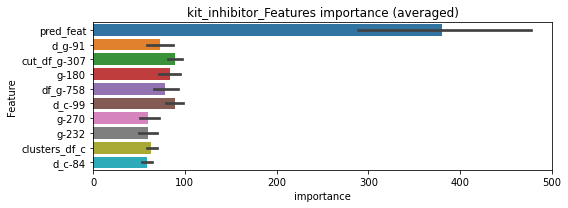

len(train_index) : 2608
len(valid_index) : 870
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000229594	valid_1's binary_logloss: 0.0029333
Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000214877	valid_1's binary_logloss: 0.00282929


len(train_index) : 2608
len(valid_index) : 870
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2609
len(valid_index) : 869
================================= fold 3/4 kit_inhibitor=================================


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000470032	valid_1's binary_logloss: 0.00261228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000235976	valid_1's binary_logloss: 0.00155023


len(train_index) : 2609
len(valid_index) : 869
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.004183224446173012


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000530736	valid_1's binary_logloss: 0.00971962
neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389623	valid_1's binary_logloss: 0.000554586
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000186963	valid_1's binary_logloss: 0.000285753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389347	valid_1's binary_logloss: 0.000854267
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000192785	valid_1's binary_logloss: 0.000581627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391455	valid_1's binary_logloss: 0.000641065
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000194385	valid_1's binary_logloss: 0.000366309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391153	valid_1's binary_logloss: 0.000469037


1 / 3 AUC score:1.000
y_Threshold: 0.0005285, Threshold: 0.0016316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00114, conf_1:0.00212
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0016316
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0516316
threshold: 0.0516316, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000189549	valid_1's binary_logloss: 0.000238788


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000295703	valid_1's binary_logloss: 0.00109153
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00016684	valid_1's binary_logloss: 0.000925089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00028363	valid_1's binary_logloss: 0.000401216
[600]	training's binary_logloss: 0.000135129	valid_1's binary_logloss: 0.00026893
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00012483	valid_1's binary_logloss: 0.000260454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294585	valid_1's binary_logloss: 0.00025581
[600]	training's binary_logloss: 0.000137238	valid_1's binary_logloss: 0.000110724
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000127271	valid_1's binary_logloss: 0.00010028
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.1968914, Threshold: 0.0516316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0344048 Vs.target_rate: 0.00025
Num_p_label: 137.0, conf_0:0.04131, conf_1:0.06196
Num_p_label: 137.0, Expected: 1.0, Adj_threshold_1: 0.0516316
Num_p_label: 97.0, Expected: 1.0, Adj_threshold_2: 0.1016316
Num_p_label: 51.0, Expected: 1.0, Adj_threshold_3: 0.1516316


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000124113	valid_1's binary_logloss: 0.00028616


Num_p_label: 27.0, Expected: 1.0, Adj_threshold_4: 0.2016316
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_5: 0.2516316
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.3016316
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.3516316
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.4016316
threshold: 0.4016316, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294415	valid_1's binary_logloss: 0.00101112
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000162192	valid_1's binary_logloss: 0.000831354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000284289	valid_1's binary_logloss: 0.000406136
[600]	training's binary_logloss: 0.000134912	valid_1's binary_logloss: 0.000268407
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000124542	valid_1's binary_logloss: 0.000259799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291778	valid_1's binary_logloss: 0.000257014
[600]	training's binary_logloss: 0.000135987	valid_1's binary_logloss: 0.000111779
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000125762	valid_1's binary_logloss: 0.000101096
Training until validation scores don't improve fo

3 / 3 AUC score:1.000
y_Threshold: 0.2031154, Threshold: 0.4016316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.36147, conf_1:0.44179
threshold: 0.4016316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000124905	valid_1's binary_logloss: 0.000290845


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149871	valid_1's binary_logloss: 0.000496886


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1746]	training's binary_logloss: 0.000133097	valid_1's binary_logloss: 0.00048204
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000144986	valid_1's binary_logloss: 0.000319389
[2000]	training's binary_logloss: 0.000124553	valid_1's binary_logloss: 0.000300799


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[2291]	training's binary_logloss: 0.000122399	valid_1's binary_logloss: 0.000298655


================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147104	valid_1's binary_logloss: 0.000125033
[2000]	training's binary_logloss: 0.000128821	valid_1's binary_logloss: 0.000105667


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[2174]	training's binary_logloss: 0.000127357	valid_1's binary_logloss: 0.000104111
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000145269	valid_1's binary_logloss: 0.000300856
[2000]	training's binary_logloss: 0.000125631	valid_1's binary_logloss: 0.000278764


laxative logloss: 0.00029005880955436435


Early stopping, best iteration is:
[2456]	training's binary_logloss: 0.000122255	valid_1's binary_logloss: 0.000275101
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413164	valid_1's binary_logloss: 0.000758119
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000199976	valid_1's binary_logloss: 0.000439926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405628	valid_1's binary_logloss: 0.00400239
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000197791	valid_1's binary_logloss: 0.00352884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418195	valid_1's binary_logloss: 0.000446303
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00020255	valid_1's binary_logloss: 0.000219479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404068	valid_1's binary_logloss: 0.000804598


1 / 3 AUC score:1.000
y_Threshold: 0.0006128, Threshold: 0.0016461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00115, conf_1:0.00214
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0016461
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0516461
threshold: 0.0516461, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000198759	valid_1's binary_logloss: 0.000482091


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305515	valid_1's binary_logloss: 0.000453891
[600]	training's binary_logloss: 0.000142451	valid_1's binary_logloss: 0.00028326
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000130754	valid_1's binary_logloss: 0.000271281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297014	valid_1's binary_logloss: 0.000902054
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.000722525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299106	valid_1's binary_logloss: 0.000750095
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000144049	valid_1's binary_logloss: 0.000514179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000300292	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.3940389, Threshold: 0.0516461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0361627 Vs.target_rate: 0.00025
Num_p_label: 144.0, conf_0:0.04132, conf_1:0.06198
Num_p_label: 144.0, Expected: 1.0, Adj_threshold_1: 0.0516461
Num_p_label: 83.0, Expected: 1.0, Adj_threshold_2: 0.1016461
Num_p_label: 42.0, Expected: 1.0, Adj_threshold_3: 0.1516461
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_4: 0.2016461
Num_p_label: 20.0, Expected: 1.0, Adj_threshold_5: 0.2516461
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_6: 0.3016461


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000129679	valid_1's binary_logloss: 0.000193615


Num_p_label: 9.0, Expected: 1.0, Adj_threshold_7: 0.3516461
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_8: 0.4016461
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.4516461
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_10: 0.5016461
threshold: 0.5016461, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305427	valid_1's binary_logloss: 0.000520255
[600]	training's binary_logloss: 0.000142473	valid_1's binary_logloss: 0.000341927
[900]	training's binary_logloss: 0.000130156	valid_1's binary_logloss: 0.000329222
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000130156	valid_1's binary_logloss: 0.000329222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297872	valid_1's binary_logloss: 0.000912132
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000161196	valid_1's binary_logloss: 0.000742169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299477	valid_1's binary_logloss: 0.000688664
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000143635	valid_1's binary_logloss: 0.000453569
Training until validation scores don't improve f

3 / 3 AUC score:1.000
y_Threshold: 0.3606553, Threshold: 0.5016461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.45148, conf_1:0.55181
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5016461
threshold: 0.5016461, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000128979	valid_1's binary_logloss: 0.00019508


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


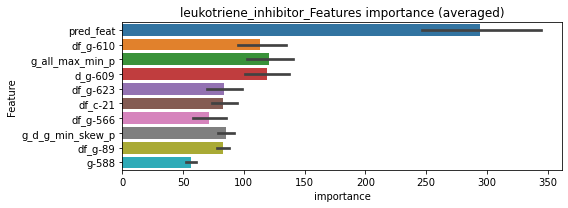

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150481	valid_1's binary_logloss: 0.000352548
[2000]	training's binary_logloss: 0.000128903	valid_1's binary_logloss: 0.000330591


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[2249]	training's binary_logloss: 0.000126912	valid_1's binary_logloss: 0.000328516
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000160965	valid_1's binary_logloss: 0.000421134
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150646	valid_1's binary_logloss: 0.000465392
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000148918	valid_1's binary_logloss: 0.00046229


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150858	valid_1's binary_logloss: 0.000146174
[2000]	training's binary_logloss: 0.000131333	valid_1's binary_logloss: 0.000124703
Early stopping, best iteration is:
[1994]	training's binary_logloss: 0.000131333	valid_1's binary_logloss: 0.000124703


leukotriene_inhibitor logloss: 0.00033440378835241833


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463655	valid_1's binary_logloss: 0.0409272
[600]	training's binary_logloss: 0.000894785	valid_1's binary_logloss: 0.030918
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000658189	valid_1's binary_logloss: 0.0301123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452637	valid_1's binary_logloss: 0.046149
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00129356	valid_1's binary_logloss: 0.0398168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522354	valid_1's binary_logloss: 0.0125405
[600]	training's binary_logloss: 0.000954118	valid_1's binary_logloss: 0.00495081
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000676953	valid_1's binary_logloss: 0.00434852
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0058405, Threshold: 0.0121659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.00852, conf_1:0.01582
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0121659
Num_p_label: 1.0, Expected: 10.4, Adj_threshold_2: 0.0621659
threshold: 0.0621659, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107606	valid_1's binary_logloss: 0.00325174
[600]	training's binary_logloss: 0.000229578	valid_1's binary_logloss: 0.00169094
[900]	training's binary_logloss: 0.00017334	valid_1's binary_logloss: 0.00154904
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000167972	valid_1's binary_logloss: 0.00153502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108589	valid_1's binary_logloss: 0.00445848
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000270406	valid_1's binary_logloss: 0.00294236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113021	valid_1's binary_logloss: 0.00690406
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000373829	valid_1's binary_logloss: 0.0059779
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.5766325, Threshold: 0.0621659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0444500 Vs.target_rate: 0.00260
Num_p_label: 177.0, conf_0:0.04973, conf_1:0.07460
Num_p_label: 177.0, Expected: 10.4, Adj_threshold_1: 0.0621659
Num_p_label: 174.0, Expected: 10.4, Adj_threshold_2: 0.1121659
Num_p_label: 168.0, Expected: 10.4, Adj_threshold_3: 0.1621659
Num_p_label: 167.0, Expected: 10.4, Adj_threshold_4: 0.2121659
Num_p_label: 167.0, Expected: 10.4, Adj_threshold_5: 0.2621659
Num_p_label: 167.0, Expected: 10.4, Adj_threshold_6: 0.3121659
Num_p_label: 167.0, Expected: 10.4, Adj_threshold_7: 0.3621659
Num_p_label: 161.0, Expected: 10.4, Adj_threshold_8: 0.4121659
Num_p_label: 152.0, Expected: 10.4, Adj_threshold_9: 0.4621659
Num_p_label: 139.0, Expected: 10.4, Adj_threshold_10: 0.5121659
threshold: 0.5621659, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 653.0/3800, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011211	valid_1's binary_logloss: 0.0036438
[600]	training's binary_logloss: 0.00023547	valid_1's binary_logloss: 0.00193915
[900]	training's binary_logloss: 0.000176411	valid_1's binary_logloss: 0.00172953
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000171146	valid_1's binary_logloss: 0.0017075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105547	valid_1's binary_logloss: 0.00827242
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000287267	valid_1's binary_logloss: 0.00638612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111267	valid_1's binary_logloss: 0.00487944
[600]	training's binary_logloss: 0.000231926	valid_1's binary_logloss: 0.00381083
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000195209	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.4227842, Threshold: 0.5621659, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000166284	valid_1's binary_logloss: 0.0010984


Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0045203 Vs.target_rate: 0.00260
Num_p_label: 18.0, conf_0:0.50000, conf_1:0.61838
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_1: 0.5621659
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.6121659
threshold: 0.6121659, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


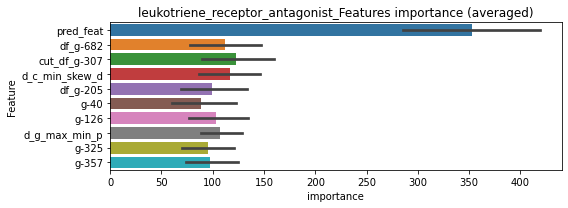

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000489306	valid_1's binary_logloss: 0.00223586
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208878	valid_1's binary_logloss: 0.000429144
Early stopping, best iteration is:
[1868]	training's binary_logloss: 0.000172837	valid_1's binary_logloss: 0.000329091


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000449376	valid_1's binary_logloss: 0.00780101
Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.0035087362880038948


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.000479228	valid_1's binary_logloss: 0.00367369
neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000679771	valid_1's binary_logloss: 0.00678807
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00036959	valid_1's binary_logloss: 0.00627589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000695594	valid_1's binary_logloss: 0.00219508
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000270176	valid_1's binary_logloss: 0.00114237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729095	valid_1's binary_logloss: 0.000985001
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002748	valid_1's binary_logloss: 0.000406754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710571	valid_1's binary_logloss: 0.00252552


1 / 3 AUC score:1.000
y_Threshold: 0.0010437, Threshold: 0.0036245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.0002708	valid_1's binary_logloss: 0.00163019


Num_p_label: 40.0, conf_0:0.00254, conf_1:0.00471
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0036245
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0536245
threshold: 0.0536245, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401362	valid_1's binary_logloss: 0.0025445
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000223199	valid_1's binary_logloss: 0.00223262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397218	valid_1's binary_logloss: 0.00122263
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000179556	valid_1's binary_logloss: 0.000879145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000399817	valid_1's binary_logloss: 0.000531474
[600]	training's binary_logloss: 0.000155966	valid_1's binary_logloss: 0.000294104
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000140859	valid_1's binary_logloss: 0.000272903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393349	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.3547950, Threshold: 0.0536245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0426921 Vs.target_rate: 0.00050
Num_p_label: 170.0, conf_0:0.04290, conf_1:0.06435
Num_p_label: 170.0, Expected: 2.0, Adj_threshold_1: 0.0536245
Num_p_label: 170.0, Expected: 2.0, Adj_threshold_2: 0.1036245
Num_p_label: 161.0, Expected: 2.0, Adj_threshold_3: 0.1536245
Num_p_label: 138.0, Expected: 2.0, Adj_threshold_4: 0.2036245
Num_p_label: 113.0, Expected: 2.0, Adj_threshold_5: 0.2536245
Num_p_label: 84.0, Expected: 2.0, Adj_threshold_6: 0.3036245
Num_p_label: 58.0, Expected: 2.0, Adj_threshold_7: 0.3536245
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_8: 0.4036245
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_9: 0.4536245
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_10: 0.5036245


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000200096	valid_1's binary_logloss: 0.000593426


threshold: 0.5536245, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000400529	valid_1's binary_logloss: 0.00251998
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000169107	valid_1's binary_logloss: 0.00211858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395424	valid_1's binary_logloss: 0.00122129
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000227281	valid_1's binary_logloss: 0.000940049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000399694	valid_1's binary_logloss: 0.000590438
[600]	training's binary_logloss: 0.000156236	valid_1's binary_logloss: 0.000352976
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00015531	valid_1's binary_logloss: 0.000351489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393083	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.3685203, Threshold: 0.5536245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, conf_0:0.49826, conf_1:0.60899
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.5536245
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.6036245
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.6536245
threshold: 0.6536245, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000179761	valid_1's binary_logloss: 0.000591674


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00018107	valid_1's binary_logloss: 0.00220323
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000234207	valid_1's binary_logloss: 0.00120339
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00019866	valid_1's binary_logloss: 0.000407524
Training until validation scores don't improve for 30 rounds


lipase_inhibitor logloss: 0.0010492395175726484


Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000168695	valid_1's binary_logloss: 0.000373495
neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533403	valid_1's binary_logloss: 0.0331607
[600]	training's binary_logloss: 0.000947965	valid_1's binary_logloss: 0.0242554
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000957287	valid_1's binary_logloss: 0.024228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00537262	valid_1's binary_logloss: 0.0275914
[600]	training's binary_logloss: 0.00096202	valid_1's binary_logloss: 0.016864
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000747926	valid_1's binary_logloss: 0.0163271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550218	valid_1's binary_logloss: 0.0177212
[600]	training's binary_logloss: 0.00100472	valid_1's binary_logloss: 0.00931363
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000723896	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0072387, Threshold: 0.0358419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.02509, conf_1:0.04659
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0358419
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_2: 0.0858419
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_3: 0.1358419
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_4: 0.1858419
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_5: 0.2358419
threshold: 0.2358419, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118788	valid_1's binary_logloss: 0.0033667
[600]	training's binary_logloss: 0.000235527	valid_1's binary_logloss: 0.00168693
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000195178	valid_1's binary_logloss: 0.0015735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116679	valid_1's binary_logloss: 0.00388715
[600]	training's binary_logloss: 0.000234059	valid_1's binary_logloss: 0.00241137
[900]	training's binary_logloss: 0.000174547	valid_1's binary_logloss: 0.00231533
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000169908	valid_1's binary_logloss: 0.00230587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112804	valid_1's binary_logloss: 0.00256142
[600]	training's binary_logloss: 0.000233269	valid_1's binary_logloss: 0.00097227
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.6096965, Threshold: 0.2358419, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000274776	valid_1's binary_logloss: 0.00394564


Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0492215 Vs.target_rate: 0.00256
Num_p_label: 196.0, conf_0:0.18867, conf_1:0.28301
Num_p_label: 196.0, Expected: 10.2, Adj_threshold_1: 0.2358419
Num_p_label: 196.0, Expected: 10.2, Adj_threshold_2: 0.2858419
Num_p_label: 193.0, Expected: 10.2, Adj_threshold_3: 0.3358419
Num_p_label: 187.0, Expected: 10.2, Adj_threshold_4: 0.3858419
Num_p_label: 182.0, Expected: 10.2, Adj_threshold_5: 0.4358419
Num_p_label: 167.0, Expected: 10.2, Adj_threshold_6: 0.4858419
Num_p_label: 142.0, Expected: 10.2, Adj_threshold_7: 0.5358419
Num_p_label: 110.0, Expected: 10.2, Adj_threshold_8: 0.5858419
Num_p_label: 84.0, Expected: 10.2, Adj_threshold_9: 0.6358419
Num_p_label: 68.0, Expected: 10.2, Adj_threshold_10: 0.6858419
threshold: 0.7358419, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116425	valid_1's binary_logloss: 0.00401564
[600]	training's binary_logloss: 0.000235111	valid_1's binary_logloss: 0.00257596
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000201492	valid_1's binary_logloss: 0.00251448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011509	valid_1's binary_logloss: 0.00464862
[600]	training's binary_logloss: 0.000229827	valid_1's binary_logloss: 0.00325461
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000179709	valid_1's binary_logloss: 0.00309823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115345	valid_1's binary_logloss: 0.0067043
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000464898	valid_1's binary_logloss: 0.00519687
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.4933406, Threshold: 0.7358419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0062783 Vs.target_rate: 0.00256
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_1: 0.7358419
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.7858419
threshold: 0.7858419, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.000891907	valid_1's binary_logloss: 0.00385711
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212821	valid_1's binary_logloss: 0.00226177
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.000196001	valid_1's binary_logloss: 0.002201


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000305634	valid_1's binary_logloss: 0.00154341
Training until validation scores don't improve for 30 rounds


lipoxygenase_inhibitor logloss: 0.0030117978958782697


Early stopping, best iteration is:
[196]	training's binary_logloss: 0.000980977	valid_1's binary_logloss: 0.00443305
neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000439955	valid_1's binary_logloss: 0.000607104
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000221646	valid_1's binary_logloss: 0.000320183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000430845	valid_1's binary_logloss: 0.00218127
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000218204	valid_1's binary_logloss: 0.00166687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00044	valid_1's binary_logloss: 0.000653346
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000224827	valid_1's binary_logloss: 0.000360092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000433141	valid_1's binary_logloss: 0.00278696


1 / 3 AUC score:1.000
y_Threshold: 0.0006795, Threshold: 0.0029425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00206, conf_1:0.00383
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0029425
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0529425
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1029425
threshold: 0.1029425, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000219635	valid_1's binary_logloss: 0.00212891


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000296773	valid_1's binary_logloss: 0.00035296
[600]	training's binary_logloss: 0.000140385	valid_1's binary_logloss: 0.000202343
[900]	training's binary_logloss: 0.000127645	valid_1's binary_logloss: 0.000188894
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00012772	valid_1's binary_logloss: 0.000188851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288114	valid_1's binary_logloss: 0.00148608
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.000294278	valid_1's binary_logloss: 0.00148003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305575	valid_1's binary_logloss: 0.000809143
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000160012	valid_1's binary_logloss: 0.000570695
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.1569839, Threshold: 0.1029425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0419387 Vs.target_rate: 0.00025
Num_p_label: 167.0, conf_0:0.08235, conf_1:0.12353
Num_p_label: 167.0, Expected: 1.0, Adj_threshold_1: 0.1029425
Num_p_label: 121.0, Expected: 1.0, Adj_threshold_2: 0.1529425
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_3: 0.2029425
Num_p_label: 53.0, Expected: 1.0, Adj_threshold_4: 0.2529425
Num_p_label: 36.0, Expected: 1.0, Adj_threshold_5: 0.3029425
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_6: 0.3529425
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_7: 0.4029425
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_8: 0.4529425
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_9: 0.5029425
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_10: 0.5529425


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000149515	valid_1's binary_logloss: 0.000769838


threshold: 0.6029425, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299702	valid_1's binary_logloss: 0.00034923
[600]	training's binary_logloss: 0.000141863	valid_1's binary_logloss: 0.000192492
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000129867	valid_1's binary_logloss: 0.000179822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288687	valid_1's binary_logloss: 0.00151484
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000272773	valid_1's binary_logloss: 0.00150675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288642	valid_1's binary_logloss: 0.00136276
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000188696	valid_1's binary_logloss: 0.00111139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290872	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.2448736, Threshold: 0.6029425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, conf_0:0.50000, conf_1:0.66324
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_1: 0.6029425
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.6529425
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.7029425
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.7529425
threshold: 0.7529425, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145931	valid_1's binary_logloss: 0.0006996


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


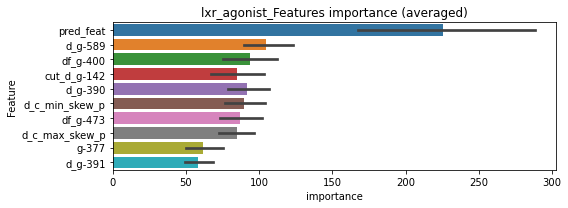

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000158351	valid_1's binary_logloss: 0.000235052


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.000141693	valid_1's binary_logloss: 0.000218456
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000327477	valid_1's binary_logloss: 0.00236819
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000203599	valid_1's binary_logloss: 0.000850406
Training until validation scores don't improve for 30 rounds


lxr_agonist logloss: 0.0013091190734814118


Early stopping, best iteration is:
[295]	training's binary_logloss: 0.000292376	valid_1's binary_logloss: 0.0017969
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261319	valid_1's binary_logloss: 0.0134869
[600]	training's binary_logloss: 0.000553839	valid_1's binary_logloss: 0.00871589
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000500979	valid_1's binary_logloss: 0.00856523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268673	valid_1's binary_logloss: 0.00794573
[600]	training's binary_logloss: 0.000554581	valid_1's binary_logloss: 0.003337
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000502403	valid_1's binary_logloss: 0.00322533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272176	valid_1's binary_logloss: 0.00679934
[600]	training's binary_logloss: 0.000568052	valid_1's binary_logloss: 0.00284328
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000509678	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0043921, Threshold: 0.0605387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.04238, conf_1:0.07870
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0605387
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_2: 0.1105387
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_3: 0.1605387
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_4: 0.2105387
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_5: 0.2605387
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_6: 0.3105387
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_7: 0.3605387
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_8: 0.4105387
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4605387
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_10: 0.5105387
threshold: 0.5105387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000776756	valid_1's binary_logloss: 0.00539207
[600]	training's binary_logloss: 0.000195723	valid_1's binary_logloss: 0.00441731
[900]	training's binary_logloss: 0.000153515	valid_1's binary_logloss: 0.00434795
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00015266	valid_1's binary_logloss: 0.00434705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800456	valid_1's binary_logloss: 0.00177563
[600]	training's binary_logloss: 0.000200698	valid_1's binary_logloss: 0.00104605
[900]	training's binary_logloss: 0.00015802	valid_1's binary_logloss: 0.000976301
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000157739	valid_1's binary_logloss: 0.000974186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000815912	valid_1's binary_logloss: 0.00105526
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.5150198, Threshold: 0.5105387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0416876 Vs.target_rate: 0.00130
Num_p_label: 166.0, conf_0:0.40843, conf_1:0.61265
Num_p_label: 166.0, Expected: 5.2, Adj_threshold_1: 0.5105387
Num_p_label: 148.0, Expected: 5.2, Adj_threshold_2: 0.5605387
Num_p_label: 125.0, Expected: 5.2, Adj_threshold_3: 0.6105387
Num_p_label: 103.0, Expected: 5.2, Adj_threshold_4: 0.6605387
Num_p_label: 85.0, Expected: 5.2, Adj_threshold_5: 0.7105387
Num_p_label: 68.0, Expected: 5.2, Adj_threshold_6: 0.7605387
threshold: 0.7605387, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080702	valid_1's binary_logloss: 0.00232602
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000250721	valid_1's binary_logloss: 0.00142556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848948	valid_1's binary_logloss: 0.0015759
[600]	training's binary_logloss: 0.000207399	valid_1's binary_logloss: 0.000916153
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000213495	valid_1's binary_logloss: 0.000911577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000830359	valid_1's binary_logloss: 0.00192452
[600]	training's binary_logloss: 0.000209072	valid_1's binary_logloss: 0.00104557
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000187887	valid_1's binary_logloss: 0.00101671
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.5478201, Threshold: 0.7605387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0138122 Vs.target_rate: 0.00130
Num_p_label: 55.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 55.0, Expected: 5.2, Adj_threshold_1: 0.7605387
threshold: 0.7605387, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


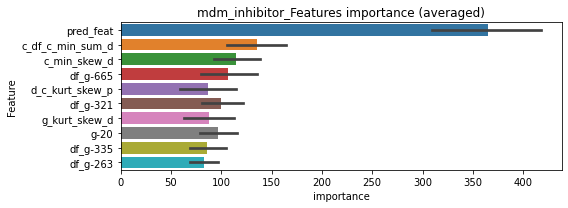

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000243091	valid_1's binary_logloss: 0.00160413
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00028187	valid_1's binary_logloss: 0.00115034
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000203903	valid_1's binary_logloss: 0.000694249
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.000196312	valid_1's binary_logloss: 0.000686076


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mdm_inhibitor logloss: 0.0012250140305236073


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000210757	valid_1's binary_logloss: 0.00144702
neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00807521	valid_1's binary_logloss: 0.0459471
[600]	training's binary_logloss: 0.00124925	valid_1's binary_logloss: 0.0308409
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000792529	valid_1's binary_logloss: 0.0291015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00857542	valid_1's binary_logloss: 0.0382801
[600]	training's binary_logloss: 0.00130097	valid_1's binary_logloss: 0.0219776
[900]	training's binary_logloss: 0.000725852	valid_1's binary_logloss: 0.020091
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000735296	valid_1's binary_logloss: 0.0200314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877233	valid_1's binary_logloss: 0.0248723
[600]	training's binary_logloss: 0.00130509	valid_1's binary_logloss: 0.00844258
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0082191, Threshold: 0.0276856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01938, conf_1:0.03599
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0276856
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.0776856
threshold: 0.0776856, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135885	valid_1's binary_logloss: 0.00815283
[600]	training's binary_logloss: 0.000241666	valid_1's binary_logloss: 0.00624784
[900]	training's binary_logloss: 0.000174987	valid_1's binary_logloss: 0.0060725
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000173515	valid_1's binary_logloss: 0.00606448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136562	valid_1's binary_logloss: 0.00297223
[600]	training's binary_logloss: 0.000246084	valid_1's binary_logloss: 0.000958651
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00018214	valid_1's binary_logloss: 0.000821235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139695	valid_1's binary_logloss: 0.00245607
[600]	training's binary_logloss: 0.000242571	valid_1's binary_logloss: 0.00080932
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.4563870, Threshold: 0.0776856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3791
p_label_rate: 0.0542441 Vs.target_rate: 0.00302
Num_p_label: 216.0, conf_0:0.06215, conf_1:0.09322
Num_p_label: 216.0, Expected: 12.0, Adj_threshold_1: 0.0776856
Num_p_label: 215.0, Expected: 12.0, Adj_threshold_2: 0.1276856
Num_p_label: 211.0, Expected: 12.0, Adj_threshold_3: 0.1776856


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000321899	valid_1's binary_logloss: 0.00323545


Num_p_label: 210.0, Expected: 12.0, Adj_threshold_4: 0.2276856
Num_p_label: 209.0, Expected: 12.0, Adj_threshold_5: 0.2776856
Num_p_label: 208.0, Expected: 12.0, Adj_threshold_6: 0.3276856
Num_p_label: 202.0, Expected: 12.0, Adj_threshold_7: 0.3776856
Num_p_label: 195.0, Expected: 12.0, Adj_threshold_8: 0.4276856
Num_p_label: 180.0, Expected: 12.0, Adj_threshold_9: 0.4776856
Num_p_label: 152.0, Expected: 12.0, Adj_threshold_10: 0.5276856
threshold: 0.5776856, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136422	valid_1's binary_logloss: 0.00413869
[600]	training's binary_logloss: 0.000239413	valid_1's binary_logloss: 0.00228011
[900]	training's binary_logloss: 0.000173995	valid_1's binary_logloss: 0.00214489
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000168505	valid_1's binary_logloss: 0.00212915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134878	valid_1's binary_logloss: 0.00442008
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000280384	valid_1's binary_logloss: 0.00241659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138898	valid_1's binary_logloss: 0.00367131
[600]	training's binary_logloss: 0.000241676	valid_1's binary_logloss: 0.00171264
[900]	training's binary_logloss: 0.000173046	valid_1's binary_logloss: 0.00157607
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.3368745, Threshold: 0.5776856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3789
p_label_rate: 0.0082873 Vs.target_rate: 0.00302
Num_p_label: 33.0, conf_0:0.50000, conf_1:0.63545
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_1: 0.5776856
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_2: 0.6276856
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_3: 0.6776856
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.7276856
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_5: 0.7776856
threshold: 0.7776856, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 651.0/3789, y_label_rate: 0.1718131


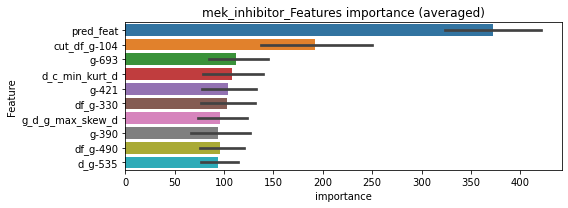

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217097	valid_1's binary_logloss: 0.000391668
[2000]	training's binary_logloss: 0.000174673	valid_1's binary_logloss: 0.000313769
Early stopping, best iteration is:
[2036]	training's binary_logloss: 0.000174193	valid_1's binary_logloss: 0.000312465


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 mek_inhibitor=================================


Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000226147	valid_1's binary_logloss: 0.00385922
Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000238195	valid_1's binary_logloss: 0.00375947


================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000219866	valid_1's binary_logloss: 0.000923253
Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.000204913	valid_1's binary_logloss: 0.000892413


mek_inhibitor logloss: 0.0022082559575842533


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698463	valid_1's binary_logloss: 0.0325964
[600]	training's binary_logloss: 0.00117476	valid_1's binary_logloss: 0.0194892
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000803013	valid_1's binary_logloss: 0.0185885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671807	valid_1's binary_logloss: 0.0392989
[600]	training's binary_logloss: 0.00114235	valid_1's binary_logloss: 0.027396
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000905251	valid_1's binary_logloss: 0.0268091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672341	valid_1's binary_logloss: 0.0427226
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.0017881	valid_1's binary_logloss: 0.0357444
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.999
y_Threshold: 0.0094772, Threshold: 0.0256901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.01798, conf_1:0.03340
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0256901
Num_p_label: 10.0, Expected: 12.4, Adj_threshold_2: 0.0756901
threshold: 0.0756901, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121783	valid_1's binary_logloss: 0.00239258
[600]	training's binary_logloss: 0.000235814	valid_1's binary_logloss: 0.000691762
[900]	training's binary_logloss: 0.000172847	valid_1's binary_logloss: 0.000538385
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000168413	valid_1's binary_logloss: 0.000526771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120993	valid_1's binary_logloss: 0.00243364
[600]	training's binary_logloss: 0.000232175	valid_1's binary_logloss: 0.000669367
[900]	training's binary_logloss: 0.000171729	valid_1's binary_logloss: 0.000552801
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000167933	valid_1's binary_logloss: 0.000544482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121701	valid_1's binary_logloss: 0.0117506
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.2710790, Threshold: 0.0756901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0459568 Vs.target_rate: 0.00311
Num_p_label: 183.0, conf_0:0.06055, conf_1:0.09083
Num_p_label: 183.0, Expected: 12.4, Adj_threshold_1: 0.0756901
Num_p_label: 183.0, Expected: 12.4, Adj_threshold_2: 0.1256901
Num_p_label: 166.0, Expected: 12.4, Adj_threshold_3: 0.1756901
Num_p_label: 140.0, Expected: 12.4, Adj_threshold_4: 0.2256901


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304429	valid_1's binary_logloss: 0.00396452


Num_p_label: 103.0, Expected: 12.4, Adj_threshold_5: 0.2756901
Num_p_label: 65.0, Expected: 12.4, Adj_threshold_6: 0.3256901
Num_p_label: 36.0, Expected: 12.4, Adj_threshold_7: 0.3756901
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_8: 0.4256901
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_9: 0.4756901
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_10: 0.5256901
threshold: 0.5756901, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114702	valid_1's binary_logloss: 0.00260865
[600]	training's binary_logloss: 0.000215012	valid_1's binary_logloss: 0.000579961
[900]	training's binary_logloss: 0.000155251	valid_1's binary_logloss: 0.000380323
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000145565	valid_1's binary_logloss: 0.00034591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113395	valid_1's binary_logloss: 0.00197541
[600]	training's binary_logloss: 0.000214481	valid_1's binary_logloss: 0.000412053
[900]	training's binary_logloss: 0.000157322	valid_1's binary_logloss: 0.000294965
[1200]	training's binary_logloss: 0.000140988	valid_1's binary_logloss: 0.000258786
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.000139576	valid_1's binary_logloss: 0.000256426
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.1334263, Threshold: 0.5756901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0110497 Vs.target_rate: 0.00311
Num_p_label: 44.0, conf_0:0.50000, conf_1:0.63326
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_1: 0.5756901
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_2: 0.6256901
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_3: 0.6756901
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_4: 0.7256901
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_5: 0.7756901
threshold: 0.7756901, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 645.0/3779, y_label_rate: 0.1706801


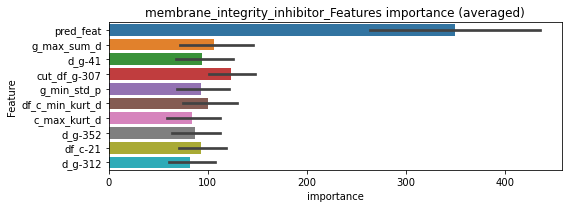

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194164	valid_1's binary_logloss: 0.000348758
[2000]	training's binary_logloss: 0.00015268	valid_1's binary_logloss: 0.000269308
Early stopping, best iteration is:
[2342]	training's binary_logloss: 0.0001473	valid_1's binary_logloss: 0.000259198


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014834	valid_1's binary_logloss: 0.000411507
[2000]	training's binary_logloss: 0.000110835	valid_1's binary_logloss: 0.000308856
[3000]	training's binary_logloss: 0.000103073	valid_1's binary_logloss: 0.000287045
Early stopping, best iteration is:
[3294]	training's binary_logloss: 0.000102143	valid_1's binary_logloss: 0.000284322


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[234]	training's binary_logloss: 0.000628594	valid_1's binary_logloss: 0.00812408
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148074	valid_1's binary_logloss: 0.000388041
[2000]	training's binary_logloss: 0.000110635	valid_1's binary_logloss: 0.000291059
[3000]	training's binary_logloss: 0.000102941	valid_1's binary_logloss: 0.000270681
Early stopping, best iteration is:
[3128]	training's binary_logloss: 0.000102352	valid_1's binary_logloss: 0.000268939


membrane_integrity_inhibitor logloss: 0.0022346548577009944


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178416	valid_1's binary_logloss: 0.00494899
[600]	training's binary_logloss: 0.000433573	valid_1's binary_logloss: 0.00207669
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000413821	valid_1's binary_logloss: 0.00203959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182579	valid_1's binary_logloss: 0.00590178
[600]	training's binary_logloss: 0.000427565	valid_1's binary_logloss: 0.00281087
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000405534	valid_1's binary_logloss: 0.00277544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186065	valid_1's binary_logloss: 0.00505854
[600]	training's binary_logloss: 0.000437086	valid_1's binary_logloss: 0.00233159
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000429552	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0026433, Threshold: 0.0070850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00496, conf_1:0.00921
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0070850
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0570850
threshold: 0.0570850, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698571	valid_1's binary_logloss: 0.00174773
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000315121	valid_1's binary_logloss: 0.00121544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696028	valid_1's binary_logloss: 0.00155485
[600]	training's binary_logloss: 0.00019316	valid_1's binary_logloss: 0.000937206
[900]	training's binary_logloss: 0.000157833	valid_1's binary_logloss: 0.000893895
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000156413	valid_1's binary_logloss: 0.000892169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701743	valid_1's binary_logloss: 0.00101259
[600]	training's binary_logloss: 0.000194332	valid_1's binary_logloss: 0.000410595
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000165146	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.4041044, Threshold: 0.0570850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0376695 Vs.target_rate: 0.00105
Num_p_label: 150.0, conf_0:0.04567, conf_1:0.06850
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_1: 0.0570850
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_2: 0.1070850
Num_p_label: 149.0, Expected: 4.2, Adj_threshold_3: 0.1570850
Num_p_label: 145.0, Expected: 4.2, Adj_threshold_4: 0.2070850
Num_p_label: 142.0, Expected: 4.2, Adj_threshold_5: 0.2570850
Num_p_label: 136.0, Expected: 4.2, Adj_threshold_6: 0.3070850
Num_p_label: 129.0, Expected: 4.2, Adj_threshold_7: 0.3570850
Num_p_label: 117.0, Expected: 4.2, Adj_threshold_8: 0.4070850


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00021634	valid_1's binary_logloss: 0.00175668


Num_p_label: 105.0, Expected: 4.2, Adj_threshold_9: 0.4570850
Num_p_label: 82.0, Expected: 4.2, Adj_threshold_10: 0.5070850
threshold: 0.5570850, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699125	valid_1's binary_logloss: 0.00396637
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000325491	valid_1's binary_logloss: 0.00332774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696279	valid_1's binary_logloss: 0.0014753
[600]	training's binary_logloss: 0.000194473	valid_1's binary_logloss: 0.000889086
[900]	training's binary_logloss: 0.000157985	valid_1's binary_logloss: 0.000843207
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000156521	valid_1's binary_logloss: 0.000841026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698089	valid_1's binary_logloss: 0.000951805
[600]	training's binary_logloss: 0.000192975	valid_1's binary_logloss: 0.000362341
[900]	training's binary_logloss: 0.000158658	valid_1's binary_logloss: 0.000326921
Earl

3 / 3 AUC score:1.000
y_Threshold: 0.5261285, Threshold: 0.5570850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0143144 Vs.target_rate: 0.00105
Num_p_label: 57.0, conf_0:0.50000, conf_1:0.61279
Num_p_label: 57.0, Expected: 4.2, Adj_threshold_1: 0.5570850
Num_p_label: 37.0, Expected: 4.2, Adj_threshold_2: 0.6070850
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_3: 0.6570850


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000204611	valid_1's binary_logloss: 0.00185222


Num_p_label: 14.0, Expected: 4.2, Adj_threshold_4: 0.7070850
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_5: 0.7570850
threshold: 0.7570850, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


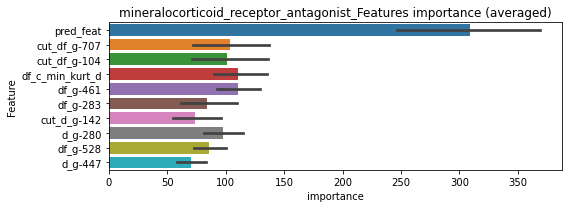

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[144]	training's binary_logloss: 0.0012397	valid_1's binary_logloss: 0.0143551
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000225645	valid_1's binary_logloss: 0.000672539
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000218559	valid_1's binary_logloss: 0.000451746
Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.00442063671880923


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000381126	valid_1's binary_logloss: 0.00219523
neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694928	valid_1's binary_logloss: 0.0019231
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00026288	valid_1's binary_logloss: 0.00103778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703166	valid_1's binary_logloss: 0.004601
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000273428	valid_1's binary_logloss: 0.0030278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000693067	valid_1's binary_logloss: 0.00142801
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000258944	valid_1's binary_logloss: 0.000626393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701629	valid_1's binary_logloss: 0.00137137
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000265488	v

1 / 3 AUC score:1.000
y_Threshold: 0.0010471, Threshold: 0.0032271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00226, conf_1:0.00420
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0032271
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0532271
threshold: 0.0532271, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395907	valid_1's binary_logloss: 0.00157729
[600]	training's binary_logloss: 0.000160609	valid_1's binary_logloss: 0.00117559
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000153568	valid_1's binary_logloss: 0.00116244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388668	valid_1's binary_logloss: 0.00132978
[600]	training's binary_logloss: 0.000154345	valid_1's binary_logloss: 0.000795161
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000156822	valid_1's binary_logloss: 0.000786717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392314	valid_1's binary_logloss: 0.000364409
[600]	training's binary_logloss: 0.000154161	valid_1's binary_logloss: 0.000127744
[900]	training's binary_logloss: 0.000134778	valid_1's binary_logloss: 0.000106435
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.2753504, Threshold: 0.0532271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0349071 Vs.target_rate: 0.00050
Num_p_label: 139.0, conf_0:0.04258, conf_1:0.06387
Num_p_label: 139.0, Expected: 2.0, Adj_threshold_1: 0.0532271
Num_p_label: 138.0, Expected: 2.0, Adj_threshold_2: 0.1032271
Num_p_label: 136.0, Expected: 2.0, Adj_threshold_3: 0.1532271


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000137515	valid_1's binary_logloss: 0.000305463


Num_p_label: 127.0, Expected: 2.0, Adj_threshold_4: 0.2032271
Num_p_label: 100.0, Expected: 2.0, Adj_threshold_5: 0.2532271
Num_p_label: 75.0, Expected: 2.0, Adj_threshold_6: 0.3032271
Num_p_label: 55.0, Expected: 2.0, Adj_threshold_7: 0.3532271
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_8: 0.4032271
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_9: 0.4532271
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_10: 0.5032271
threshold: 0.5532271, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388648	valid_1's binary_logloss: 0.00201882
[600]	training's binary_logloss: 0.000155359	valid_1's binary_logloss: 0.00165425
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000140977	valid_1's binary_logloss: 0.00162715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395193	valid_1's binary_logloss: 0.00152814
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000167617	valid_1's binary_logloss: 0.0010266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00039268	valid_1's binary_logloss: 0.000361751
[600]	training's binary_logloss: 0.000155146	valid_1's binary_logloss: 0.000128328
[900]	training's binary_logloss: 0.000134831	valid_1's binary_logloss: 0.000106135
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000134831	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.4033751, Threshold: 0.5532271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, conf_0:0.49790, conf_1:0.60855
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.5532271
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_2: 0.6032271
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.6532271


[900]	training's binary_logloss: 0.0001306	valid_1's binary_logloss: 0.000270924
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.0001306	valid_1's binary_logloss: 0.000270924


threshold: 0.6532271, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


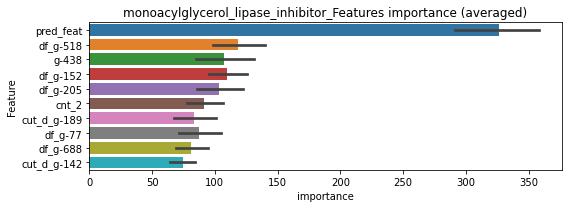

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166254	valid_1's binary_logloss: 0.00130044


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000161061	valid_1's binary_logloss: 0.00129339
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000271242	valid_1's binary_logloss: 0.00159663
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170069	valid_1's binary_logloss: 0.000140927
[2000]	training's binary_logloss: 0.000146104	valid_1's binary_logloss: 0.000113436
Early stopping, best iteration is:
[1979]	training's binary_logloss: 0.000146104	valid_1's binary_logloss: 0.000113436


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000167574	valid_1's binary_logloss: 0.000207338
[2000]	training's binary_logloss: 0.000142031	valid_1's binary_logloss: 0.000177695
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.000141425	valid_1's binary_logloss: 0.000177138


monoacylglycerol_lipase_inhibitor logloss: 0.0007959696640911764


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280
target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00851762	valid_1's binary_logloss: 0.0733447
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.0025201	valid_1's binary_logloss: 0.0643685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101647	valid_1's binary_logloss: 0.0652719
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00252285	valid_1's binary_logloss: 0.0560784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102946	valid_1's binary_logloss: 0.0364725
[600]	training's binary_logloss: 0.00162286	valid_1's binary_logloss: 0.0240449
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00111218	valid_1's binary_logloss: 0.023403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894229	valid_1's binary_logloss: 0.0646761
[600]	training'

1 / 3 AUC score:0.997
y_Threshold: 0.0130605, Threshold: 0.0307084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, conf_0:0.02150, conf_1:0.03992
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0307084
Num_p_label: 10.0, Expected: 14.2, Adj_threshold_2: 0.0807084
threshold: 0.0807084, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136603	valid_1's binary_logloss: 0.00288153
[600]	training's binary_logloss: 0.000237868	valid_1's binary_logloss: 0.000705086
[900]	training's binary_logloss: 0.000165679	valid_1's binary_logloss: 0.000521803
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.00016285	valid_1's binary_logloss: 0.00051342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136868	valid_1's binary_logloss: 0.00385827
[600]	training's binary_logloss: 0.000246716	valid_1's binary_logloss: 0.0014378
[900]	training's binary_logloss: 0.000174668	valid_1's binary_logloss: 0.00117235
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000174251	valid_1's binary_logloss: 0.00116682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014201	valid_1's binary_logloss: 0.00545526
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.1988504, Threshold: 0.0807084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0452034 Vs.target_rate: 0.00357
Num_p_label: 180.0, conf_0:0.06457, conf_1:0.09685
Num_p_label: 180.0, Expected: 14.2, Adj_threshold_1: 0.0807084
Num_p_label: 158.0, Expected: 14.2, Adj_threshold_2: 0.1307084
Num_p_label: 118.0, Expected: 14.2, Adj_threshold_3: 0.1807084
Num_p_label: 87.0, Expected: 14.2, Adj_threshold_4: 0.2307084


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000721156	valid_1's binary_logloss: 0.00757483


Num_p_label: 73.0, Expected: 14.2, Adj_threshold_5: 0.2807084
Num_p_label: 69.0, Expected: 14.2, Adj_threshold_6: 0.3307084
Num_p_label: 67.0, Expected: 14.2, Adj_threshold_7: 0.3807084
Num_p_label: 62.0, Expected: 14.2, Adj_threshold_8: 0.4307084
Num_p_label: 60.0, Expected: 14.2, Adj_threshold_9: 0.4807084
Num_p_label: 59.0, Expected: 14.2, Adj_threshold_10: 0.5307084
threshold: 0.5807084, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111875	valid_1's binary_logloss: 0.00237219
[600]	training's binary_logloss: 0.00016751	valid_1's binary_logloss: 0.000378126
[900]	training's binary_logloss: 0.000108284	valid_1's binary_logloss: 0.000245842
Early stopping, best iteration is:
[1169]	training's binary_logloss: 0.000101796	valid_1's binary_logloss: 0.000230856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111384	valid_1's binary_logloss: 0.0092366
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000386855	valid_1's binary_logloss: 0.00847722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135428	valid_1's binary_logloss: 0.00243913
[600]	training's binary_logloss: 0.000226379	valid_1's binary_logloss: 0.000486529
[900]	training's binary_logloss: 0.000160142	valid_1's binary_logloss: 0.000342947
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.1103438, Threshold: 0.5807084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0170768 Vs.target_rate: 0.00357
Num_p_label: 68.0, conf_0:0.50000, conf_1:0.63878
Num_p_label: 68.0, Expected: 14.2, Adj_threshold_1: 0.5807084
Num_p_label: 68.0, Expected: 14.2, Adj_threshold_2: 0.6307084
Num_p_label: 68.0, Expected: 14.2, Adj_threshold_3: 0.6807084
Num_p_label: 68.0, Expected: 14.2, Adj_threshold_4: 0.7307084
Num_p_label: 68.0, Expected: 14.2, Adj_threshold_5: 0.7807084
threshold: 0.7807084, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


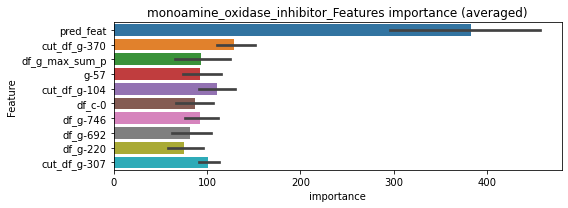

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194222	valid_1's binary_logloss: 0.000379653
[2000]	training's binary_logloss: 0.000149639	valid_1's binary_logloss: 0.000267004
Early stopping, best iteration is:
[2434]	training's binary_logloss: 0.00014235	valid_1's binary_logloss: 0.000247598


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148989	valid_1's binary_logloss: 0.000348394
[2000]	training's binary_logloss: 0.000110858	valid_1's binary_logloss: 0.000259885
[3000]	training's binary_logloss: 0.000103123	valid_1's binary_logloss: 0.000241694
Early stopping, best iteration is:
[3536]	training's binary_logloss: 0.000101571	valid_1's binary_logloss: 0.000237799


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149011	valid_1's binary_logloss: 0.000288576
[2000]	training's binary_logloss: 0.000110761	valid_1's binary_logloss: 0.000215046
[3000]	training's binary_logloss: 0.000103053	valid_1's binary_logloss: 0.000199988
Early stopping, best iteration is:
[3386]	training's binary_logloss: 0.000101899	valid_1's binary_logloss: 0.000197677


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148848	valid_1's binary_logloss: 0.000427446
[2000]	training's binary_logloss: 0.000110693	valid_1's binary_logloss: 0.000318824
[3000]	training's binary_logloss: 0.000102966	valid_1's binary_logloss: 0.000296462
Early stopping, best iteration is:
[3216]	training's binary_logloss: 0.000102144	valid_1's binary_logloss: 0.00029385


monoamine_oxidase_inhibitor logloss: 0.0002442303443879237


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120041	valid_1's binary_logloss: 0.00452891
[600]	training's binary_logloss: 0.000354612	valid_1's binary_logloss: 0.003152
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000354612	valid_1's binary_logloss: 0.003152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119765	valid_1's binary_logloss: 0.0050304
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000360044	valid_1's binary_logloss: 0.00275812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012188	valid_1's binary_logloss: 0.00237245
[600]	training's binary_logloss: 0.000360314	valid_1's binary_logloss: 0.000983503
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358027	valid_1's binary_logloss: 0.000981486
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0017174, Threshold: 0.0262384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.01837, conf_1:0.03411
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0262384
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0762384
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1262384
threshold: 0.1262384, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000573988	valid_1's binary_logloss: 0.000737307
[600]	training's binary_logloss: 0.000180759	valid_1's binary_logloss: 0.000263154
[900]	training's binary_logloss: 0.000151409	valid_1's binary_logloss: 0.000227015
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000151409	valid_1's binary_logloss: 0.000227015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549206	valid_1's binary_logloss: 0.00237271
[600]	training's binary_logloss: 0.000173335	valid_1's binary_logloss: 0.0016723
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000165336	valid_1's binary_logloss: 0.00166675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000564693	valid_1's binary_logloss: 0.00155663
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000212845	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.4481799, Threshold: 0.1262384, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000141592	valid_1's binary_logloss: 0.000235939


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0695630 Vs.target_rate: 0.00076
Num_p_label: 277.0, conf_0:0.10099, conf_1:0.15149
Num_p_label: 277.0, Expected: 3.0, Adj_threshold_1: 0.1262384
Num_p_label: 276.0, Expected: 3.0, Adj_threshold_2: 0.1762384
Num_p_label: 275.0, Expected: 3.0, Adj_threshold_3: 0.2262384
Num_p_label: 267.0, Expected: 3.0, Adj_threshold_4: 0.2762384
Num_p_label: 252.0, Expected: 3.0, Adj_threshold_5: 0.3262384
Num_p_label: 234.0, Expected: 3.0, Adj_threshold_6: 0.3762384
Num_p_label: 215.0, Expected: 3.0, Adj_threshold_7: 0.4262384
Num_p_label: 195.0, Expected: 3.0, Adj_threshold_8: 0.4762384
Num_p_label: 165.0, Expected: 3.0, Adj_threshold_9: 0.5262384
Num_p_label: 144.0, Expected: 3.0, Adj_threshold_10: 0.5762384
threshold: 0.6262384, positive_p_label: 117.0/3982, p_label_rate: 0.0293822
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572981	valid_1's binary_logloss: 0.000760113
[600]	training's binary_logloss: 0.000179933	valid_1's binary_logloss: 0.000288294
[900]	training's binary_logloss: 0.000150654	valid_1's binary_logloss: 0.000249982
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000149344	valid_1's binary_logloss: 0.000249079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000548016	valid_1's binary_logloss: 0.00241606
[600]	training's binary_logloss: 0.000172974	valid_1's binary_logloss: 0.00171477
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000170457	valid_1's binary_logloss: 0.00170948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000561854	valid_1's binary_logloss: 0.00154359
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000277136	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.4483938, Threshold: 0.6262384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0288800 Vs.target_rate: 0.00076
Num_p_label: 115.0, conf_0:0.50000, conf_1:0.68886
Num_p_label: 115.0, Expected: 3.0, Adj_threshold_1: 0.6262384
Num_p_label: 97.0, Expected: 3.0, Adj_threshold_2: 0.6762384
Num_p_label: 71.0, Expected: 3.0, Adj_threshold_3: 0.7262384
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.7762384


Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000141855	valid_1's binary_logloss: 0.000225681


threshold: 0.7762384, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


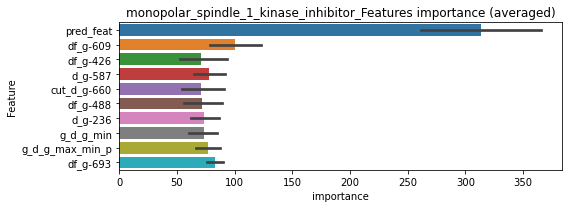

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018524	valid_1's binary_logloss: 0.000273476


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[1697]	training's binary_logloss: 0.000157127	valid_1's binary_logloss: 0.000238112
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00101973
[2000]	training's binary_logloss: 0.000144332	valid_1's binary_logloss: 0.000977541


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[2277]	training's binary_logloss: 0.000141004	valid_1's binary_logloss: 0.000973785
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000262942	valid_1's binary_logloss: 0.00103482
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000180047	valid_1's binary_logloss: 0.000269636
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.000153241	valid_1's binary_logloss: 0.000237236


monopolar_spindle_1_kinase_inhibitor logloss: 0.0006211341056024454


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269
target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210155	valid_1's binary_logloss: 0.120396
[600]	training's binary_logloss: 0.00298385	valid_1's binary_logloss: 0.0988848
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.0025048	valid_1's binary_logloss: 0.0974911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196143	valid_1's binary_logloss: 0.0984955
[600]	training's binary_logloss: 0.00277637	valid_1's binary_logloss: 0.0744179
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00276477	valid_1's binary_logloss: 0.0742845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199717	valid_1's binary_logloss: 0.110874
[600]	training's binary_logloss: 0.00282858	valid_1's binary_logloss: 0.0805523
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00154755	valid_1's binary_logloss: 0.076938

1 / 3 AUC score:0.989
y_Threshold: 0.0225607, Threshold: 0.3605804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 633/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, conf_0:0.25241, conf_1:0.46875
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3605804
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_2: 0.4105804
Num_p_label: 26.0, Expected: 21.7, Adj_threshold_3: 0.4605804
threshold: 0.4605804, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 633.0/3750, y_label_rate: 0.1688000
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179886	valid_1's binary_logloss: 0.00731323
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000324178	valid_1's binary_logloss: 0.00488178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179088	valid_1's binary_logloss: 0.00394164
[600]	training's binary_logloss: 0.000262546	valid_1's binary_logloss: 0.000889059
[900]	training's binary_logloss: 0.000170722	valid_1's binary_logloss: 0.000647232
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000164886	valid_1's binary_logloss: 0.000634831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183149	valid_1's binary_logloss: 0.00524952
[600]	training's binary_logloss: 0.000263038	valid_1's binary_logloss: 0.00248524
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000182941	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1478262, Threshold: 0.4605804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 632.0/3748
p_label_rate: 0.0647916 Vs.target_rate: 0.00546
Num_p_label: 258.0, conf_0:0.36846, conf_1:0.55270
Num_p_label: 258.0, Expected: 21.7, Adj_threshold_1: 0.4605804
Num_p_label: 258.0, Expected: 21.7, Adj_threshold_2: 0.5105804
Num_p_label: 240.0, Expected: 21.7, Adj_threshold_3: 0.5605804
Num_p_label: 235.0, Expected: 21.7, Adj_threshold_4: 0.6105804
Num_p_label: 234.0, Expected: 21.7, Adj_threshold_5: 0.6605804
Num_p_label: 234.0, Expected: 21.7, Adj_threshold_6: 0.7105804
Num_p_label: 234.0, Expected: 21.7, Adj_threshold_7: 0.7605804
threshold: 0.7605804, positive_p_label: 234.0/3982, p_label_rate: 0.0587644
positive_y_label: 632.0/3748, y_label_rate: 0.1686233
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018375	valid_1's binary_logloss: 0.00571984
[600]	training's binary_logloss: 0.000246526	valid_1's binary_logloss: 0.00252691
[900]	training's binary_logloss: 0.000162971	valid_1's binary_logloss: 0.00235023
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000148492	valid_1's binary_logloss: 0.00231411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181743	valid_1's binary_logloss: 0.00347436
[600]	training's binary_logloss: 0.000247573	valid_1's binary_logloss: 0.000587041
[900]	training's binary_logloss: 0.000161565	valid_1's binary_logloss: 0.00040682
[1200]	training's binary_logloss: 0.00014448	valid_1's binary_logloss: 0.000365281
Early stopping, best iteration is:
[1348]	training's binary_logloss: 0.000138673	valid_1's binary_logloss: 0.000353881
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3 AUC score:1.000
y_Threshold: 0.1000926, Threshold: 0.7605804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 631.0/3746
p_label_rate: 0.0597690 Vs.target_rate: 0.00546


Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000180335	valid_1's binary_logloss: 0.00319415


Num_p_label: 238.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 238.0, Expected: 21.7, Adj_threshold_1: 0.7605804
threshold: 0.7605804, positive_p_label: 238.0/3982, p_label_rate: 0.0597690
positive_y_label: 631.0/3746, y_label_rate: 0.1684463


len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.000513643	valid_1's binary_logloss: 0.00778467
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151922	valid_1's binary_logloss: 0.000395228
[2000]	training's binary_logloss: 0.000112139	valid_1's binary_logloss: 0.000292314
[3000]	training's binary_logloss: 0.000104214	valid_1's binary_logloss: 0.000271594


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[3569]	training's binary_logloss: 0.000102631	valid_1's binary_logloss: 0.000267247
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152083	valid_1's binary_logloss: 0.000280869
[2000]	training's binary_logloss: 0.000112123	valid_1's binary_logloss: 0.00020729
[3000]	training's binary_logloss: 0.000104182	valid_1's binary_logloss: 0.000192598
Early stopping, best iteration is:
[3129]	training's binary_logloss: 0.000103673	valid_1's binary_logloss: 0.000191631


len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204407	valid_1's binary_logloss: 0.000716376
[2000]	training's binary_logloss: 0.000157715	valid_1's binary_logloss: 0.000563917
Early stopping, best iteration is:
[2146]	training's binary_logloss: 0.000155328	valid_1's binary_logloss: 0.000555928


mtor_inhibitor logloss: 0.0022040616689667776


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415836	valid_1's binary_logloss: 0.0152893
[600]	training's binary_logloss: 0.000792669	valid_1's binary_logloss: 0.00640704
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000559493	valid_1's binary_logloss: 0.00552238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429228	valid_1's binary_logloss: 0.0199276
[600]	training's binary_logloss: 0.000796697	valid_1's binary_logloss: 0.0105437
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000616882	valid_1's binary_logloss: 0.0100194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436385	valid_1's binary_logloss: 0.0163977
[600]	training's binary_logloss: 0.000800399	valid_1's binary_logloss: 0.00728778
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000596963	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0048943, Threshold: 0.0764882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.05354, conf_1:0.09943
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0764882
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_2: 0.1264882
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.1764882
threshold: 0.1764882, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104827	valid_1's binary_logloss: 0.00254112
[600]	training's binary_logloss: 0.000217238	valid_1's binary_logloss: 0.00127585
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000217238	valid_1's binary_logloss: 0.00127585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100432	valid_1's binary_logloss: 0.00209766
[600]	training's binary_logloss: 0.000206959	valid_1's binary_logloss: 0.000749049
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000161306	valid_1's binary_logloss: 0.000669055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101887	valid_1's binary_logloss: 0.00286752
[600]	training's binary_logloss: 0.000211082	valid_1's binary_logloss: 0.00175469
[900]	training's binary_logloss: 0.000159905	valid_1's binary_logloss: 0.0016788
Early stopp

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000176324	valid_1's binary_logloss: 0.0009721


y_Threshold: 0.6450976, Threshold: 0.1764882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0801105 Vs.target_rate: 0.00202
Num_p_label: 319.0, conf_0:0.14119, conf_1:0.21179
Num_p_label: 319.0, Expected: 8.0, Adj_threshold_1: 0.1764882
Num_p_label: 319.0, Expected: 8.0, Adj_threshold_2: 0.2264882
Num_p_label: 319.0, Expected: 8.0, Adj_threshold_3: 0.2764882
Num_p_label: 319.0, Expected: 8.0, Adj_threshold_4: 0.3264882
Num_p_label: 319.0, Expected: 8.0, Adj_threshold_5: 0.3764882
Num_p_label: 318.0, Expected: 8.0, Adj_threshold_6: 0.4264882
Num_p_label: 310.0, Expected: 8.0, Adj_threshold_7: 0.4764882
Num_p_label: 301.0, Expected: 8.0, Adj_threshold_8: 0.5264882
Num_p_label: 279.0, Expected: 8.0, Adj_threshold_9: 0.5764882
Num_p_label: 253.0, Expected: 8.0, Adj_threshold_10: 0.6264882
threshold: 0.6764882, positive_p_label: 210.0/3982, p_label_rate: 0.0527373
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pse

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105629	valid_1's binary_logloss: 0.00439205
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000439583	valid_1's binary_logloss: 0.00362045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100477	valid_1's binary_logloss: 0.00205491
[600]	training's binary_logloss: 0.00021014	valid_1's binary_logloss: 0.000689513
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000169818	valid_1's binary_logloss: 0.000585481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101494	valid_1's binary_logloss: 0.00280527
[600]	training's binary_logloss: 0.000209951	valid_1's binary_logloss: 0.00170913
[900]	training's binary_logloss: 0.000157344	valid_1's binary_logloss: 0.00163261
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000151175	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.7276358, Threshold: 0.6764882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0577599 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000242964	valid_1's binary_logloss: 0.001395


Num_p_label: 230.0, conf_0:0.50000, conf_1:0.74414
Num_p_label: 230.0, Expected: 8.0, Adj_threshold_1: 0.6764882
Num_p_label: 183.0, Expected: 8.0, Adj_threshold_2: 0.7264882
Num_p_label: 135.0, Expected: 8.0, Adj_threshold_3: 0.7764882
threshold: 0.7764882, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


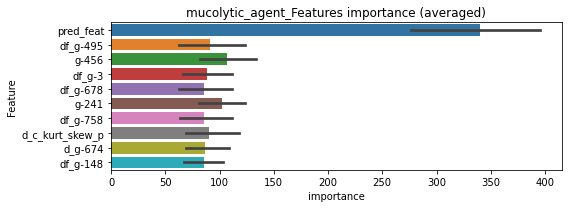

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 mucolytic_agent=================================


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00030667	valid_1's binary_logloss: 0.00342521
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208238	valid_1's binary_logloss: 0.000708034
Early stopping, best iteration is:
[1493]	training's binary_logloss: 0.000180913	valid_1's binary_logloss: 0.000655666


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207929	valid_1's binary_logloss: 0.000244734
[2000]	training's binary_logloss: 0.000168152	valid_1's binary_logloss: 0.00018494
Early stopping, best iteration is:
[2238]	training's binary_logloss: 0.000164862	valid_1's binary_logloss: 0.00018004


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


mucolytic_agent logloss: 0.0016981592052025746


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000612784	valid_1's binary_logloss: 0.00251603
neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250242	valid_1's binary_logloss: 0.0166116
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000795544	valid_1's binary_logloss: 0.0123938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281216	valid_1's binary_logloss: 0.0105366
[600]	training's binary_logloss: 0.000606905	valid_1's binary_logloss: 0.00565624
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000549182	valid_1's binary_logloss: 0.00549707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002798	valid_1's binary_logloss: 0.0124733
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000855091	valid_1's binary_logloss: 0.00931074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00278583	valid_1's binary_logloss: 0.0126549
[600]	

1 / 3 AUC score:1.000
y_Threshold: 0.0044437, Threshold: 0.0159582, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01117, conf_1:0.02075
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0159582
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_2: 0.0659582
threshold: 0.0659582, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000803837	valid_1's binary_logloss: 0.00274572
[600]	training's binary_logloss: 0.000204864	valid_1's binary_logloss: 0.00195046
[900]	training's binary_logloss: 0.000164751	valid_1's binary_logloss: 0.00189693
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000158788	valid_1's binary_logloss: 0.00188129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000828994	valid_1's binary_logloss: 0.00177497
[600]	training's binary_logloss: 0.000211185	valid_1's binary_logloss: 0.000889197
[900]	training's binary_logloss: 0.000164816	valid_1's binary_logloss: 0.000819865
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.00016434	valid_1's binary_logloss: 0.000818272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848747	valid_1's binary_logloss: 0.00392934
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.6142939, Threshold: 0.0659582, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0547464 Vs.target_rate: 0.00155
Num_p_label: 218.0, conf_0:0.05277, conf_1:0.07915
Num_p_label: 218.0, Expected: 6.2, Adj_threshold_1: 0.0659582
Num_p_label: 218.0, Expected: 6.2, Adj_threshold_2: 0.1159582
Num_p_label: 216.0, Expected: 6.2, Adj_threshold_3: 0.1659582
Num_p_label: 216.0, Expected: 6.2, Adj_threshold_4: 0.2159582
Num_p_label: 216.0, Expected: 6.2, Adj_threshold_5: 0.2659582
Num_p_label: 216.0, Expected: 6.2, Adj_threshold_6: 0.3159582


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00044372	valid_1's binary_logloss: 0.00134509


Num_p_label: 215.0, Expected: 6.2, Adj_threshold_7: 0.3659582
Num_p_label: 212.0, Expected: 6.2, Adj_threshold_8: 0.4159582
Num_p_label: 210.0, Expected: 6.2, Adj_threshold_9: 0.4659582
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_10: 0.5159582
threshold: 0.5659582, positive_p_label: 184.0/3982, p_label_rate: 0.0462079
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810236	valid_1's binary_logloss: 0.00288964
[600]	training's binary_logloss: 0.000202251	valid_1's binary_logloss: 0.00196552
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000169118	valid_1's binary_logloss: 0.00192283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000841298	valid_1's binary_logloss: 0.00123941
[600]	training's binary_logloss: 0.000208868	valid_1's binary_logloss: 0.000355864
[900]	training's binary_logloss: 0.000164449	valid_1's binary_logloss: 0.000287211
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000162509	valid_1's binary_logloss: 0.000283088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864425	valid_1's binary_logloss: 0.00438475
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000338061	valid_1'

3 / 3 AUC score:1.000
y_Threshold: 0.6453906, Threshold: 0.5659582, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000239077	valid_1's binary_logloss: 0.000991281


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0452034 Vs.target_rate: 0.00155
Num_p_label: 180.0, conf_0:0.50000, conf_1:0.62255
Num_p_label: 180.0, Expected: 6.2, Adj_threshold_1: 0.5659582
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_2: 0.6159582
Num_p_label: 123.0, Expected: 6.2, Adj_threshold_3: 0.6659582
Num_p_label: 83.0, Expected: 6.2, Adj_threshold_4: 0.7159582
Num_p_label: 54.0, Expected: 6.2, Adj_threshold_5: 0.7659582
threshold: 0.7659582, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


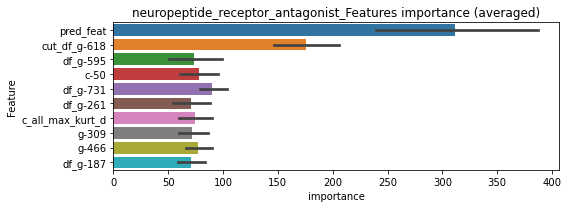

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000413501	valid_1's binary_logloss: 0.0029152
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208349	valid_1's binary_logloss: 0.00324455
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000205	valid_1's binary_logloss: 0.00323757


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207882	valid_1's binary_logloss: 0.000363049
Early stopping, best iteration is:
[1521]	training's binary_logloss: 0.000180703	valid_1's binary_logloss: 0.000319291


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.0021516534325877394


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000266691	valid_1's binary_logloss: 0.00213069
neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173
target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[24]	training's binary_logloss: 0.446245	valid_1's binary_logloss: 0.509133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[40]	training's binary_logloss: 0.406645	valid_1's binary_logloss: 0.508242
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.468537	valid_1's binary_logloss: 0.508079
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.529
y_Threshold: 0.2197305, Threshold: 0.4537100, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1418 → Positive_corect_labels: 232/2587
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, conf_0:0.31760, conf_1:0.58982
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4537100
Num_p_label: 78.0, Expected: 139.1, Adj_threshold_2: 0.4337100
Num_p_label: 107.0, Expected: 139.1, Adj_threshold_3: 0.4137100
Num_p_label: 129.0, Expected: 139.1, Adj_threshold_4: 0.3937100
Num_p_label: 136.0, Expected: 139.1, Adj_threshold_5: 0.3737100
Num_p_label: 142.0, Expected: 139.1, Adj_threshold_6: 0.3537100
Num_p_label: 144.0, Expected: 139.1, Adj_threshold_7: 0.3337100
Num_p_label: 149.0, Expected: 139.1, Adj_threshold_8: 0.3137100
Num_p_label: 162.0, Expected: 139.1, Adj_threshold_9: 0.2937100
Num_p_label: 192.0, Expected: 139.1, Adj_threshold_10: 0.2737100
threshold: 0.2537100, positive_p_label: 282.0/3982, p_label_rate: 0.0708187


Early stopping, best iteration is:
[36]	training's binary_logloss: 0.424828	valid_1's binary_logloss: 0.505731


positive_y_label: 232.0/2587, y_label_rate: 0.0896792
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128424	valid_1's binary_logloss: 0.00908452
[600]	training's binary_logloss: 0.000292575	valid_1's binary_logloss: 0.00257408
[900]	training's binary_logloss: 0.00021349	valid_1's binary_logloss: 0.0019843
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000210088	valid_1's binary_logloss: 0.00197144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126663	valid_1's binary_logloss: 0.0107603
[600]	training's binary_logloss: 0.000290392	valid_1's binary_logloss: 0.00443779
[900]	training's binary_logloss: 0.000213614	valid_1's binary_logloss: 0.00382091
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000208025	valid_1's binary_logloss: 0.00376253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131902	valid_1's binary_logloss: 0.00740241
[600]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.6461750, Threshold: 0.2537100, pos_neg_ratio: 0.7377876
Remove_noisy_data: 0 → Positive_corect_labels: 232.0/2587
p_label_rate: 0.2353089 Vs.target_rate: 0.03494
Num_p_label: 937.0, conf_0:0.20297, conf_1:0.30445
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_1: 0.2537100
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_2: 0.3037100
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_3: 0.3537100
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_4: 0.4037100
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_5: 0.4537100
Num_p_label: 937.0, Expected: 139.1, Adj_threshold_6: 0.5037100
Num_p_label: 936.0, Expected: 139.1, Adj_threshold_7: 0.5537100
Num_p_label: 934.0, Expected: 139.1, Adj_threshold_8: 0.6037100
Num_p_label: 932.0, Expected: 139.1, Adj_threshold_9: 0.6537100
Num_p_label: 930.0, Expected: 139.1, Adj_threshold_10: 0.7037100
threshold: 0.7537100, positive_p_label: 920.0/3982, p_label_rate: 0.2310397
positive_y_label: 232.0/2587, y_l

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129345	valid_1's binary_logloss: 0.00923042
[600]	training's binary_logloss: 0.000295183	valid_1's binary_logloss: 0.00277732
[900]	training's binary_logloss: 0.000214526	valid_1's binary_logloss: 0.00212409
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000206059	valid_1's binary_logloss: 0.00203987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134774	valid_1's binary_logloss: 0.0189891
[600]	training's binary_logloss: 0.000299733	valid_1's binary_logloss: 0.0129237
[900]	training's binary_logloss: 0.000222664	valid_1's binary_logloss: 0.012331
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.0002183	valid_1's binary_logloss: 0.0122942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131453	valid_1's binary_logloss: 0.0075087
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.3440222, Threshold: 0.7537100, pos_neg_ratio: 0.7377876
Remove_noisy_data: 4 → Positive_corect_labels: 230.0/2583
p_label_rate: 0.2295329 Vs.target_rate: 0.03494
Num_p_label: 914.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 914.0, Expected: 139.1, Adj_threshold_1: 0.7537100
threshold: 0.7537100, positive_p_label: 914.0/3982, p_label_rate: 0.2295329
positive_y_label: 230.0/2583, y_label_rate: 0.0890437


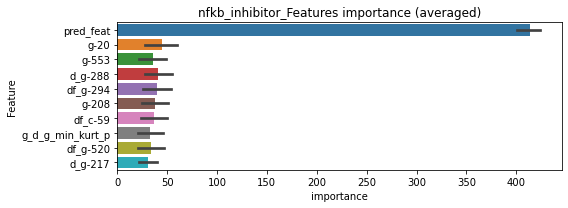

len(train_index) : 1937
len(valid_index) : 646
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1937
len(valid_index) : 646
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000553279	valid_1's binary_logloss: 0.0187511
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000302023	valid_1's binary_logloss: 0.0027298
Early stopping, best iteration is:
[1628]	training's binary_logloss: 0.000252999	valid_1's binary_logloss: 0.00243441


len(train_index) : 1937
len(valid_index) : 646
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291581	valid_1's binary_logloss: 0.00255648
Early stopping, best iteration is:
[1683]	training's binary_logloss: 0.000242749	valid_1's binary_logloss: 0.00219703


len(train_index) : 1938
len(valid_index) : 645
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291425	valid_1's binary_logloss: 0.00338432
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.00026095	valid_1's binary_logloss: 0.00317308


nfkb_inhibitor logloss: 0.006644730802743742


neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824439	valid_1's binary_logloss: 0.00426991
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000300878	valid_1's binary_logloss: 0.00275394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840625	valid_1's binary_logloss: 0.00182963
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000306755	valid_1's binary_logloss: 0.00113791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000851583	valid_1's binary_logloss: 0.001213
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000302193	valid_1's binary_logloss: 0.000462245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845395	valid_1's binary_logloss: 0.00289485


1 / 3 AUC score:1.000
y_Threshold: 0.0013264, Threshold: 0.0036016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000302202	valid_1's binary_logloss: 0.00175762


p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00252, conf_1:0.00468
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0036016
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0536016
threshold: 0.0536016, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000447518	valid_1's binary_logloss: 0.00126133
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000195205	valid_1's binary_logloss: 0.00088352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000449105	valid_1's binary_logloss: 0.00144381
[600]	training's binary_logloss: 0.000160885	valid_1's binary_logloss: 0.00109897
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000157495	valid_1's binary_logloss: 0.0010844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000456222	valid_1's binary_logloss: 0.000415562
[600]	training's binary_logloss: 0.000163659	valid_1's binary_logloss: 0.000132343
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000144527	valid_1's binary_logloss: 0.00011092
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5754726, Threshold: 0.0536016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0399297 Vs.target_rate: 0.00050
Num_p_label: 159.0, conf_0:0.04288, conf_1:0.06432
Num_p_label: 159.0, Expected: 2.0, Adj_threshold_1: 0.0536016
Num_p_label: 157.0, Expected: 2.0, Adj_threshold_2: 0.1036016
Num_p_label: 155.0, Expected: 2.0, Adj_threshold_3: 0.1536016
Num_p_label: 145.0, Expected: 2.0, Adj_threshold_4: 0.2036016
Num_p_label: 122.0, Expected: 2.0, Adj_threshold_5: 0.2536016
Num_p_label: 94.0, Expected: 2.0, Adj_threshold_6: 0.3036016
Num_p_label: 67.0, Expected: 2.0, Adj_threshold_7: 0.3536016
Num_p_label: 51.0, Expected: 2.0, Adj_threshold_8: 0.4036016
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_9: 0.4536016


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000144657	valid_1's binary_logloss: 0.00155362


Num_p_label: 24.0, Expected: 2.0, Adj_threshold_10: 0.5036016
threshold: 0.5536016, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453647	valid_1's binary_logloss: 0.00141408
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000249667	valid_1's binary_logloss: 0.00110114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000452542	valid_1's binary_logloss: 0.0012379
[600]	training's binary_logloss: 0.000162713	valid_1's binary_logloss: 0.000870156
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000144645	valid_1's binary_logloss: 0.000846572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000458467	valid_1's binary_logloss: 0.00041486
[600]	training's binary_logloss: 0.000165092	valid_1's binary_logloss: 0.000131561
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000145008	valid_1's binary_logloss: 0.000109312
Training until validation scores don't improve for 30

3 / 3 AUC score:1.000
y_Threshold: 0.4616126, Threshold: 0.5536016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00050
Num_p_label: 17.0, conf_0:0.49824, conf_1:0.60896
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.5536016
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.6036016
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.6536016
threshold: 0.6536016, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000231049	valid_1's binary_logloss: 0.00212331


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[955]	training's binary_logloss: 0.00017757	valid_1's binary_logloss: 0.000379838
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171561	valid_1's binary_logloss: 0.000397127
[2000]	training's binary_logloss: 0.000142388	valid_1's binary_logloss: 0.000363957
Early stopping, best iteration is:
[2147]	training's binary_logloss: 0.000141076	valid_1's binary_logloss: 0.000363204


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170121	valid_1's binary_logloss: 0.00015295
[2000]	training's binary_logloss: 0.000141009	valid_1's binary_logloss: 0.000118628
Early stopping, best iteration is:
[2082]	training's binary_logloss: 0.000140039	valid_1's binary_logloss: 0.000117527


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.0007877340534660309


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000249839	valid_1's binary_logloss: 0.00228136
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183661	valid_1's binary_logloss: 0.0109094
[600]	training's binary_logloss: 0.000449038	valid_1's binary_logloss: 0.00799701
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000452483	valid_1's binary_logloss: 0.00797563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193988	valid_1's binary_logloss: 0.00638472
[600]	training's binary_logloss: 0.000453422	valid_1's binary_logloss: 0.00312688
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000437735	valid_1's binary_logloss: 0.00309072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194884	valid_1's binary_logloss: 0.00554407
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00047834	valid_1's binary_logloss: 0.0025195
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0030397, Threshold: 0.0550975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.03857, conf_1:0.07163
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0550975
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_2: 0.1050975
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_3: 0.1550975
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.2050975
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_5: 0.2550975
threshold: 0.2550975, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069173	valid_1's binary_logloss: 0.00380248
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000384939	valid_1's binary_logloss: 0.00326561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069091	valid_1's binary_logloss: 0.00121304
[600]	training's binary_logloss: 0.000188633	valid_1's binary_logloss: 0.000526627
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000164845	valid_1's binary_logloss: 0.000479804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691084	valid_1's binary_logloss: 0.000993004
[600]	training's binary_logloss: 0.000186813	valid_1's binary_logloss: 0.000341163
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000156891	valid_1's binary_logloss: 0.000302962
Training until validation scores don't improve for 30

2 / 3 AUC score:1.000
y_Threshold: 0.6609770, Threshold: 0.2550975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0705676 Vs.target_rate: 0.00109
Num_p_label: 281.0, conf_0:0.20408, conf_1:0.30612
Num_p_label: 281.0, Expected: 4.3, Adj_threshold_1: 0.2550975
Num_p_label: 280.0, Expected: 4.3, Adj_threshold_2: 0.3050975
Num_p_label: 277.0, Expected: 4.3, Adj_threshold_3: 0.3550975
Num_p_label: 273.0, Expected: 4.3, Adj_threshold_4: 0.4050975
Num_p_label: 268.0, Expected: 4.3, Adj_threshold_5: 0.4550975
Num_p_label: 262.0, Expected: 4.3, Adj_threshold_6: 0.5050975


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000221918	valid_1's binary_logloss: 0.00157186


Num_p_label: 253.0, Expected: 4.3, Adj_threshold_7: 0.5550975
Num_p_label: 237.0, Expected: 4.3, Adj_threshold_8: 0.6050975
Num_p_label: 208.0, Expected: 4.3, Adj_threshold_9: 0.6550975
Num_p_label: 168.0, Expected: 4.3, Adj_threshold_10: 0.7050975
threshold: 0.7550975, positive_p_label: 128.0/3982, p_label_rate: 0.0321447
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000693714	valid_1's binary_logloss: 0.00167164
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000355099	valid_1's binary_logloss: 0.00104198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000714648	valid_1's binary_logloss: 0.00249129
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000600595	valid_1's binary_logloss: 0.00231815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699572	valid_1's binary_logloss: 0.00122218
[600]	training's binary_logloss: 0.000193893	valid_1's binary_logloss: 0.000495597
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000163021	valid_1's binary_logloss: 0.000453306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697999	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.5667254, Threshold: 0.7550975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0155701 Vs.target_rate: 0.00109
Num_p_label: 62.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 62.0, Expected: 4.3, Adj_threshold_1: 0.7550975
threshold: 0.7550975, positive_p_label: 62.0/3982, p_label_rate: 0.0155701


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00036636	valid_1's binary_logloss: 0.00141083


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


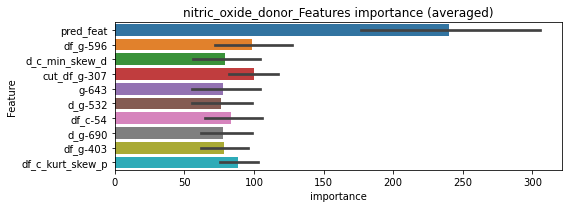

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000543669	valid_1's binary_logloss: 0.00141968
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00103918	valid_1's binary_logloss: 0.00763243
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000218072	valid_1's binary_logloss: 0.000799104
Training until validation scores don't improve for 30 rounds


nitric_oxide_donor logloss: 0.0027022281498231505


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000383233	valid_1's binary_logloss: 0.000956227
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187073	valid_1's binary_logloss: 0.0091023
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000482852	valid_1's binary_logloss: 0.00616673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018659	valid_1's binary_logloss: 0.00997868
[600]	training's binary_logloss: 0.000445307	valid_1's binary_logloss: 0.00628541
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000454143	valid_1's binary_logloss: 0.0062534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209437	valid_1's binary_logloss: 0.00473484
[600]	training's binary_logloss: 0.000469612	valid_1's binary_logloss: 0.00175508
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000444776	valid_1's binary_logloss: 0.00170156
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0029164, Threshold: 0.0076146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00533, conf_1:0.00990
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0076146
Num_p_label: 1.0, Expected: 4.8, Adj_threshold_2: 0.0576146
threshold: 0.0576146, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000716907	valid_1's binary_logloss: 0.00250509
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000360166	valid_1's binary_logloss: 0.00199599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00067941	valid_1's binary_logloss: 0.00272187
[600]	training's binary_logloss: 0.000184275	valid_1's binary_logloss: 0.00202705
[900]	training's binary_logloss: 0.000148855	valid_1's binary_logloss: 0.00197385
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000147107	valid_1's binary_logloss: 0.00197151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000719162	valid_1's binary_logloss: 0.00082077
[600]	training's binary_logloss: 0.000187208	valid_1's binary_logloss: 0.000186011
[900]	training's binary_logloss: 0.000151195	valid_1's binary_logloss: 0.000136576
Early st

2 / 3 AUC score:1.000
y_Threshold: 0.6619870, Threshold: 0.0576146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0444500 Vs.target_rate: 0.00122
Num_p_label: 177.0, conf_0:0.04609, conf_1:0.06914
Num_p_label: 177.0, Expected: 4.8, Adj_threshold_1: 0.0576146
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_2: 0.1076146
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_3: 0.1576146
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_4: 0.2076146
Num_p_label: 175.0, Expected: 4.8, Adj_threshold_5: 0.2576146
Num_p_label: 174.0, Expected: 4.8, Adj_threshold_6: 0.3076146
Num_p_label: 173.0, Expected: 4.8, Adj_threshold_7: 0.3576146


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000224413	valid_1's binary_logloss: 0.000724849


Num_p_label: 169.0, Expected: 4.8, Adj_threshold_8: 0.4076146
Num_p_label: 154.0, Expected: 4.8, Adj_threshold_9: 0.4576146
Num_p_label: 134.0, Expected: 4.8, Adj_threshold_10: 0.5076146
threshold: 0.5576146, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000692883	valid_1's binary_logloss: 0.00451303
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000291599	valid_1's binary_logloss: 0.00388956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000719134	valid_1's binary_logloss: 0.00098624
[600]	training's binary_logloss: 0.000191754	valid_1's binary_logloss: 0.000337167
[900]	training's binary_logloss: 0.000156075	valid_1's binary_logloss: 0.000285759
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000156075	valid_1's binary_logloss: 0.000285759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700432	valid_1's binary_logloss: 0.000783789
[600]	training's binary_logloss: 0.000190645	valid_1's binary_logloss: 0.000217641
[900]	training's binary_logloss: 0.000154986	valid_1's binary_logloss: 0.000165569
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.5654227, Threshold: 0.5576146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0168257 Vs.target_rate: 0.00122
Num_p_label: 67.0, conf_0:0.50000, conf_1:0.61338
Num_p_label: 67.0, Expected: 4.8, Adj_threshold_1: 0.5576146
Num_p_label: 36.0, Expected: 4.8, Adj_threshold_2: 0.6076146
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_3: 0.6576146
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_4: 0.7076146


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000163235	valid_1's binary_logloss: 0.000994309


threshold: 0.7076146, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


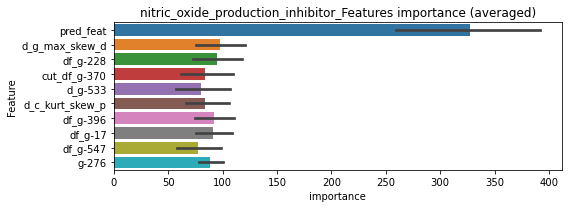

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.0010249	valid_1's binary_logloss: 0.0102225
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195348	valid_1's binary_logloss: 0.000343312
Early stopping, best iteration is:
[1464]	training's binary_logloss: 0.000172154	valid_1's binary_logloss: 0.00030956


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000192833	valid_1's binary_logloss: 0.000161213
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.000163167	valid_1's binary_logloss: 0.000127678


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_production_inhibitor logloss: 0.002920562348945603


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000351618	valid_1's binary_logloss: 0.00102185
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214304	valid_1's binary_logloss: 0.00587331
[600]	training's binary_logloss: 0.000497838	valid_1's binary_logloss: 0.0027701
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000493878	valid_1's binary_logloss: 0.0027669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202521	valid_1's binary_logloss: 0.00794359
[600]	training's binary_logloss: 0.000489708	valid_1's binary_logloss: 0.00366036
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000465253	valid_1's binary_logloss: 0.00357563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216362	valid_1's binary_logloss: 0.00451065
[600]	training's binary_logloss: 0.000499804	valid_1's binary_logloss: 0.00165304
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000488059	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0033920, Threshold: 0.0258514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.01810, conf_1:0.03361
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0258514
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0758514
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_3: 0.1258514
threshold: 0.1258514, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000759859	valid_1's binary_logloss: 0.00189925
[600]	training's binary_logloss: 0.000197982	valid_1's binary_logloss: 0.00123068
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000183956	valid_1's binary_logloss: 0.00121059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00074139	valid_1's binary_logloss: 0.00151763
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000218939	valid_1's binary_logloss: 0.000694251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000744336	valid_1's binary_logloss: 0.00165332
[600]	training's binary_logloss: 0.000191596	valid_1's binary_logloss: 0.00100824
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000174755	valid_1's binary_logloss: 0.000979006
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.6560101, Threshold: 0.1258514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0514817 Vs.target_rate: 0.00109
Num_p_label: 205.0, conf_0:0.10068, conf_1:0.15102
Num_p_label: 205.0, Expected: 4.3, Adj_threshold_1: 0.1258514
Num_p_label: 205.0, Expected: 4.3, Adj_threshold_2: 0.1758514
Num_p_label: 205.0, Expected: 4.3, Adj_threshold_3: 0.2258514
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_4: 0.2758514
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_5: 0.3258514
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_6: 0.3758514
Num_p_label: 202.0, Expected: 4.3, Adj_threshold_7: 0.4258514
Num_p_label: 194.0, Expected: 4.3, Adj_threshold_8: 0.4758514


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000218833	valid_1's binary_logloss: 0.0016906


Num_p_label: 175.0, Expected: 4.3, Adj_threshold_9: 0.5258514
Num_p_label: 149.0, Expected: 4.3, Adj_threshold_10: 0.5758514
threshold: 0.6258514, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000735374	valid_1's binary_logloss: 0.00346833
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000300279	valid_1's binary_logloss: 0.00283801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713612	valid_1's binary_logloss: 0.00146431
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000217626	valid_1's binary_logloss: 0.000781395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000728221	valid_1's binary_logloss: 0.00102768
[600]	training's binary_logloss: 0.000196399	valid_1's binary_logloss: 0.000408684
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000162403	valid_1's binary_logloss: 0.000371022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000735327	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.6193846, Threshold: 0.6258514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0231040 Vs.target_rate: 0.00109
Num_p_label: 92.0, conf_0:0.50000, conf_1:0.68844
Num_p_label: 92.0, Expected: 4.3, Adj_threshold_1: 0.6258514
Num_p_label: 62.0, Expected: 4.3, Adj_threshold_2: 0.6758514
Num_p_label: 43.0, Expected: 4.3, Adj_threshold_3: 0.7258514
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.7758514
threshold: 0.7758514, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


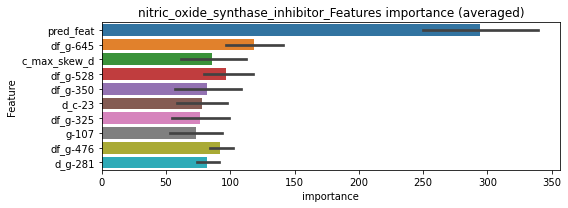

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00064222	valid_1's binary_logloss: 0.00932478
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000246255	valid_1's binary_logloss: 0.000773107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202206	valid_1's binary_logloss: 0.00044237
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000199834	valid_1's binary_logloss: 0.000438445


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000201554	valid_1's binary_logloss: 0.000219634
[2000]	training's binary_logloss: 0.00016464	valid_1's binary_logloss: 0.000165764
Early stopping, best iteration is:
[2028]	training's binary_logloss: 0.000164253	valid_1's binary_logloss: 0.000165334


nitric_oxide_synthase_inhibitor logloss: 0.002675848394985557


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000449938	valid_1's binary_logloss: 0.00329935
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000218879	valid_1's binary_logloss: 0.00270788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000443832	valid_1's binary_logloss: 0.00345511
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000216321	valid_1's binary_logloss: 0.00272262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000466477	valid_1's binary_logloss: 0.000553649
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000212212	valid_1's binary_logloss: 0.000267364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000457929	valid_1's binary_logloss: 0.00062552


1 / 3 AUC score:1.000
y_Threshold: 0.0006599, Threshold: 0.0029421, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00206, conf_1:0.00382
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0029421
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0529421
threshold: 0.0529421, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000215911	valid_1's binary_logloss: 0.000331218


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328013	valid_1's binary_logloss: 0.000723424
[600]	training's binary_logloss: 0.000149651	valid_1's binary_logloss: 0.000483197
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000148134	valid_1's binary_logloss: 0.000478175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306351	valid_1's binary_logloss: 0.000959366
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000149722	valid_1's binary_logloss: 0.000721002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000314418	valid_1's binary_logloss: 0.000619163
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000193299	valid_1's binary_logloss: 0.00049844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00031272	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.3456574, Threshold: 0.0529421, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0504771 Vs.target_rate: 0.00029
Num_p_label: 201.0, conf_0:0.04235, conf_1:0.06353
Num_p_label: 201.0, Expected: 1.2, Adj_threshold_1: 0.0529421
Num_p_label: 189.0, Expected: 1.2, Adj_threshold_2: 0.1029421
Num_p_label: 160.0, Expected: 1.2, Adj_threshold_3: 0.1529421
Num_p_label: 120.0, Expected: 1.2, Adj_threshold_4: 0.2029421
Num_p_label: 90.0, Expected: 1.2, Adj_threshold_5: 0.2529421
Num_p_label: 67.0, Expected: 1.2, Adj_threshold_6: 0.3029421
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_7: 0.3529421
Num_p_label: 26.0, Expected: 1.2, Adj_threshold_8: 0.4029421
Num_p_label: 17.0, Expected: 1.2, Adj_threshold_9: 0.4529421
Num_p_label: 13.0, Expected: 1.2, Adj_threshold_10: 0.5029421


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.00013201	valid_1's binary_logloss: 0.000334126


threshold: 0.5529421, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322401	valid_1's binary_logloss: 0.000990393
[600]	training's binary_logloss: 0.000150081	valid_1's binary_logloss: 0.00073891
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000146867	valid_1's binary_logloss: 0.000734124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305185	valid_1's binary_logloss: 0.000964712
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00014866	valid_1's binary_logloss: 0.000737406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320432	valid_1's binary_logloss: 0.000928571
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000165961	valid_1's binary_logloss: 0.000726428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000316941	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.3478929, Threshold: 0.5529421, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00029
Num_p_label: 11.0, conf_0:0.49765, conf_1:0.60824
Num_p_label: 11.0, Expected: 1.2, Adj_threshold_1: 0.5529421
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_2: 0.6029421
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.6529421
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.7029421
threshold: 0.7029421, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000135695	valid_1's binary_logloss: 0.000287968


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159563	valid_1's binary_logloss: 0.000757182
[2000]	training's binary_logloss: 0.000139199	valid_1's binary_logloss: 0.000734136
Early stopping, best iteration is:
[2047]	training's binary_logloss: 0.000138752	valid_1's binary_logloss: 0.000733793


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000217425	valid_1's binary_logloss: 0.0008822
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000156431	valid_1's binary_logloss: 0.000398412


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[1326]	training's binary_logloss: 0.000146129	valid_1's binary_logloss: 0.000390492
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000156208	valid_1's binary_logloss: 0.000154706
[2000]	training's binary_logloss: 0.000135141	valid_1's binary_logloss: 0.000131309


norepinephrine_reuptake_inhibitor logloss: 0.000534859471412321


Early stopping, best iteration is:
[2260]	training's binary_logloss: 0.000132962	valid_1's binary_logloss: 0.000128838
neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112158	valid_1's binary_logloss: 0.00192782
[600]	training's binary_logloss: 0.000336045	valid_1's binary_logloss: 0.000696777
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000336045	valid_1's binary_logloss: 0.000696777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110751	valid_1's binary_logloss: 0.00347905
[600]	training's binary_logloss: 0.00033463	valid_1's binary_logloss: 0.0014955
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330566	valid_1's binary_logloss: 0.00148393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114519	valid_1's binary_logloss: 0.00206768
[600]	training's binary_logloss: 0.000339466	valid_1's binary_logloss: 0.000682244
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000335762	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0020130, Threshold: 0.0094266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00660, conf_1:0.01225
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0094266
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0594266
threshold: 0.0594266, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000515068	valid_1's binary_logloss: 0.000575857
[600]	training's binary_logloss: 0.00017541	valid_1's binary_logloss: 0.000191399
[900]	training's binary_logloss: 0.000147995	valid_1's binary_logloss: 0.000156688
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000147995	valid_1's binary_logloss: 0.000156688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000503726	valid_1's binary_logloss: 0.00103607
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000201411	valid_1's binary_logloss: 0.000639407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000497786	valid_1's binary_logloss: 0.00196015
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000293692	valid_1's binary_logloss: 0.00166115
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.4011777, Threshold: 0.0594266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0419387 Vs.target_rate: 0.00076
Num_p_label: 167.0, conf_0:0.04754, conf_1:0.07131
Num_p_label: 167.0, Expected: 3.0, Adj_threshold_1: 0.0594266
Num_p_label: 166.0, Expected: 3.0, Adj_threshold_2: 0.1094266
Num_p_label: 163.0, Expected: 3.0, Adj_threshold_3: 0.1594266
Num_p_label: 150.0, Expected: 3.0, Adj_threshold_4: 0.2094266
Num_p_label: 138.0, Expected: 3.0, Adj_threshold_5: 0.2594266
Num_p_label: 116.0, Expected: 3.0, Adj_threshold_6: 0.3094266
Num_p_label: 108.0, Expected: 3.0, Adj_threshold_7: 0.3594266
Num_p_label: 87.0, Expected: 3.0, Adj_threshold_8: 0.4094266
Num_p_label: 68.0, Expected: 3.0, Adj_threshold_9: 0.4594266
Num_p_label: 55.0, Expected: 3.0, Adj_threshold_10: 0.5094266
threshold: 0.5594266, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
===

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510472	valid_1's binary_logloss: 0.000548723
[600]	training's binary_logloss: 0.000169381	valid_1's binary_logloss: 0.000162909
[900]	training's binary_logloss: 0.000142431	valid_1's binary_logloss: 0.000128323
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000141586	valid_1's binary_logloss: 0.000127218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000508386	valid_1's binary_logloss: 0.00115669
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000186009	valid_1's binary_logloss: 0.000728261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000523235	valid_1's binary_logloss: 0.00255327
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000248475	valid_1's binary_logloss: 0.00196943
Training until validation scores don't improve for 

3 / 3 AUC score:1.000
y_Threshold: 0.4140352, Threshold: 0.5594266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, conf_0:0.50000, conf_1:0.61537
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.5594266
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_2: 0.6094266
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.6594266
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.7094266
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.7594266
threshold: 0.7594266, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


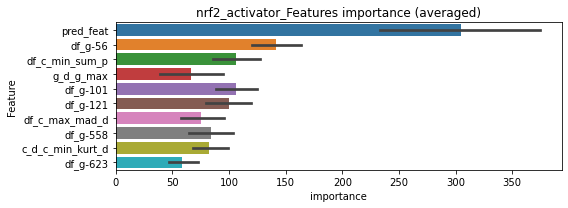

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0001818	valid_1's binary_logloss: 0.000169396
[2000]	training's binary_logloss: 0.000151616	valid_1's binary_logloss: 0.000130595
Early stopping, best iteration is:
[2259]	training's binary_logloss: 0.000148901	valid_1's binary_logloss: 0.000127082


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00028977	valid_1's binary_logloss: 0.00167902
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000249973	valid_1's binary_logloss: 0.00166444
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000175448	valid_1's binary_logloss: 0.000414346
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000167654	valid_1's binary_logloss: 0.000408147


nrf2_activator logloss: 0.0009738644542379141


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0049759	valid_1's binary_logloss: 0.0386909
[600]	training's binary_logloss: 0.000920628	valid_1's binary_logloss: 0.02817
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000694428	valid_1's binary_logloss: 0.027475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508489	valid_1's binary_logloss: 0.0362156
[600]	training's binary_logloss: 0.000941274	valid_1's binary_logloss: 0.0277059
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00089805	valid_1's binary_logloss: 0.0275337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060133	valid_1's binary_logloss: 0.0157978
[600]	training's binary_logloss: 0.00103312	valid_1's binary_logloss: 0.00722702
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000696872	valid_1's binary_logloss: 0.

1 / 3 AUC score:1.000
y_Threshold: 0.0059857, Threshold: 0.0175685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01230, conf_1:0.02284
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0175685
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_2: 0.0675685
threshold: 0.0675685, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107854	valid_1's binary_logloss: 0.00374186
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000506735	valid_1's binary_logloss: 0.0027464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106955	valid_1's binary_logloss: 0.00503244
[600]	training's binary_logloss: 0.000228011	valid_1's binary_logloss: 0.00358997
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000205137	valid_1's binary_logloss: 0.00354043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115593	valid_1's binary_logloss: 0.0022703
[600]	training's binary_logloss: 0.000232749	valid_1's binary_logloss: 0.00137839
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000217489	valid_1's binary_logloss: 0.00134801
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.6232924, Threshold: 0.0675685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0524862 Vs.target_rate: 0.00256
Num_p_label: 209.0, conf_0:0.05405, conf_1:0.08108
Num_p_label: 209.0, Expected: 10.2, Adj_threshold_1: 0.0675685
Num_p_label: 209.0, Expected: 10.2, Adj_threshold_2: 0.1175685
Num_p_label: 204.0, Expected: 10.2, Adj_threshold_3: 0.1675685
Num_p_label: 195.0, Expected: 10.2, Adj_threshold_4: 0.2175685
Num_p_label: 195.0, Expected: 10.2, Adj_threshold_5: 0.2675685
Num_p_label: 195.0, Expected: 10.2, Adj_threshold_6: 0.3175685
Num_p_label: 195.0, Expected: 10.2, Adj_threshold_7: 0.3675685
Num_p_label: 195.0, Expected: 10.2, Adj_threshold_8: 0.4175685
Num_p_label: 194.0, Expected: 10.2, Adj_threshold_9: 0.4675685


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000468284	valid_1's binary_logloss: 0.00465378


Num_p_label: 193.0, Expected: 10.2, Adj_threshold_10: 0.5175685
threshold: 0.5675685, positive_p_label: 186.0/3982, p_label_rate: 0.0467102
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116898	valid_1's binary_logloss: 0.00398273
[600]	training's binary_logloss: 0.00023482	valid_1's binary_logloss: 0.00214468
[900]	training's binary_logloss: 0.000177888	valid_1's binary_logloss: 0.00197491
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000176982	valid_1's binary_logloss: 0.00197216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112544	valid_1's binary_logloss: 0.00417225
[600]	training's binary_logloss: 0.000233376	valid_1's binary_logloss: 0.00254255
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000224431	valid_1's binary_logloss: 0.00251188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115219	valid_1's binary_logloss: 0.00540197
[600]	training's binary_logloss: 0.000230502	valid_1's binary_logloss: 0.00400682
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.5415662, Threshold: 0.5675685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0281266 Vs.target_rate: 0.00256
Num_p_label: 112.0, conf_0:0.50000, conf_1:0.62433
Num_p_label: 112.0, Expected: 10.2, Adj_threshold_1: 0.5675685
Num_p_label: 78.0, Expected: 10.2, Adj_threshold_2: 0.6175685
Num_p_label: 56.0, Expected: 10.2, Adj_threshold_3: 0.6675685
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_4: 0.7175685
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_5: 0.7675685
threshold: 0.7675685, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000229511	valid_1's binary_logloss: 0.00326844


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[219]	training's binary_logloss: 0.000844101	valid_1's binary_logloss: 0.00496792
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215445	valid_1's binary_logloss: 0.000683121
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000217256	valid_1's binary_logloss: 0.000681431


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.004000303845578122


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000359325	valid_1's binary_logloss: 0.00706787
neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946497	valid_1's binary_logloss: 0.0691882
[600]	training's binary_logloss: 0.00156387	valid_1's binary_logloss: 0.0546123
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00165933	valid_1's binary_logloss: 0.0544648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00917054	valid_1's binary_logloss: 0.0571299
[600]	training's binary_logloss: 0.00159019	valid_1's binary_logloss: 0.0474864
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00176487	valid_1's binary_logloss: 0.0474057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106063	valid_1's binary_logloss: 0.0453529
[600]	training's binary_logloss: 0.00170653	valid_1's binary_logloss: 0.0309295
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.00101937	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.997
y_Threshold: 0.0136632, Threshold: 0.0563063, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.03941, conf_1:0.07320
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0563063
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_2: 0.1063063
threshold: 0.1063063, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113595	valid_1's binary_logloss: 0.0103722
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000394485	valid_1's binary_logloss: 0.00971158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114614	valid_1's binary_logloss: 0.00279543
[600]	training's binary_logloss: 0.000168861	valid_1's binary_logloss: 0.000446436
[900]	training's binary_logloss: 0.000108515	valid_1's binary_logloss: 0.000289043
[1200]	training's binary_logloss: 0.000101609	valid_1's binary_logloss: 0.000270226
Early stopping, best iteration is:
[1206]	training's binary_logloss: 0.000101548	valid_1's binary_logloss: 0.000270043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133535	valid_1's binary_logloss: 0.00273591
[600]	training's binary_logloss: 0.000222634	valid_1's binary_logloss: 0.000673859
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.0844179, Threshold: 0.1063063, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0409342 Vs.target_rate: 0.00403
Num_p_label: 163.0, conf_0:0.08505, conf_1:0.12757
Num_p_label: 163.0, Expected: 16.1, Adj_threshold_1: 0.1063063
Num_p_label: 163.0, Expected: 16.1, Adj_threshold_2: 0.1563063
Num_p_label: 163.0, Expected: 16.1, Adj_threshold_3: 0.2063063
Num_p_label: 163.0, Expected: 16.1, Adj_threshold_4: 0.2563063
Num_p_label: 144.0, Expected: 16.1, Adj_threshold_5: 0.3063063
Num_p_label: 143.0, Expected: 16.1, Adj_threshold_6: 0.3563063
Num_p_label: 143.0, Expected: 16.1, Adj_threshold_7: 0.4063063
Num_p_label: 143.0, Expected: 16.1, Adj_threshold_8: 0.4563063
Num_p_label: 142.0, Expected: 16.1, Adj_threshold_9: 0.5063063
Num_p_label: 136.0, Expected: 16.1, Adj_threshold_10: 0.5563063
threshold: 0.6063063, positive_p_label: 136.0/3982, p_label_rate: 0.0341537
positive_y_label: 645.0/3778, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124919	valid_1's binary_logloss: 0.0057385
[600]	training's binary_logloss: 0.000217957	valid_1's binary_logloss: 0.00418169
[900]	training's binary_logloss: 0.000154713	valid_1's binary_logloss: 0.00403963
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000153301	valid_1's binary_logloss: 0.00403537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113015	valid_1's binary_logloss: 0.00330378
[600]	training's binary_logloss: 0.000168424	valid_1's binary_logloss: 0.000552152
[900]	training's binary_logloss: 0.00010859	valid_1's binary_logloss: 0.000359461
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000102641	valid_1's binary_logloss: 0.000339661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117742	valid_1's binary_logloss: 0.0021425
[600]	train

3 / 3 AUC score:1.000
y_Threshold: 0.7089086, Threshold: 0.6063063, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3776
p_label_rate: 0.0351582 Vs.target_rate: 0.00403
Num_p_label: 140.0, conf_0:0.50000, conf_1:0.66694
Num_p_label: 140.0, Expected: 16.1, Adj_threshold_1: 0.6063063
Num_p_label: 140.0, Expected: 16.1, Adj_threshold_2: 0.6563063
Num_p_label: 140.0, Expected: 16.1, Adj_threshold_3: 0.7063063
Num_p_label: 140.0, Expected: 16.1, Adj_threshold_4: 0.7563063
threshold: 0.7563063, positive_p_label: 140.0/3982, p_label_rate: 0.0351582
positive_y_label: 644.0/3776, y_label_rate: 0.1705508


len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000196732	valid_1's binary_logloss: 0.00105311
Early stopping, best iteration is:
[1832]	training's binary_logloss: 0.000157272	valid_1's binary_logloss: 0.000895264


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000196279	valid_1's binary_logloss: 0.00429838
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.000166223	valid_1's binary_logloss: 0.00419234


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000335334	valid_1's binary_logloss: 0.0017535
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000197125	valid_1's binary_logloss: 0.000523348
[2000]	training's binary_logloss: 0.000151416	valid_1's binary_logloss: 0.000432288
Early stopping, best iteration is:
[1989]	training's binary_logloss: 0.000152021	valid_1's binary_logloss: 0.000431207


opioid_receptor_antagonist logloss: 0.0018221281214601862


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027101	valid_1's binary_logloss: 0.0142202
[600]	training's binary_logloss: 0.000566931	valid_1's binary_logloss: 0.00972677
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000516246	valid_1's binary_logloss: 0.00961696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265174	valid_1's binary_logloss: 0.0167771
[600]	training's binary_logloss: 0.000563706	valid_1's binary_logloss: 0.0108316
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000506689	valid_1's binary_logloss: 0.0106013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286394	valid_1's binary_logloss: 0.00651066
[600]	training's binary_logloss: 0.000589001	valid_1's binary_logloss: 0.00233068
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000502448	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0034864, Threshold: 0.0098248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00688, conf_1:0.01277
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0098248
Num_p_label: 2.0, Expected: 6.2, Adj_threshold_2: 0.0598248
threshold: 0.0598248, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000823204	valid_1's binary_logloss: 0.00298207
[600]	training's binary_logloss: 0.000201423	valid_1's binary_logloss: 0.00230248
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000167507	valid_1's binary_logloss: 0.00224795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798334	valid_1's binary_logloss: 0.00236462
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000377361	valid_1's binary_logloss: 0.00169491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000842076	valid_1's binary_logloss: 0.00109746
[600]	training's binary_logloss: 0.000199384	valid_1's binary_logloss: 0.00032262
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00016188	valid_1's binary_logloss: 0.000273987
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.5713080, Threshold: 0.0598248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0399297 Vs.target_rate: 0.00155
Num_p_label: 159.0, conf_0:0.04786, conf_1:0.07179
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_1: 0.0598248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_2: 0.1098248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_3: 0.1598248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_4: 0.2098248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_5: 0.2598248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_6: 0.3098248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_7: 0.3598248
Num_p_label: 159.0, Expected: 6.2, Adj_threshold_8: 0.4098248
Num_p_label: 158.0, Expected: 6.2, Adj_threshold_9: 0.4598248
Num_p_label: 157.0, Expected: 6.2, Adj_threshold_10: 0.5098248
threshold: 0.5598248, positive_p_label: 149.0/3982, p_label_rate: 0.0374184
positive_y_label: 656.0/3809, y_label_rate: 0.1722237

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000812251	valid_1's binary_logloss: 0.00273964
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.0002272	valid_1's binary_logloss: 0.00167392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840855	valid_1's binary_logloss: 0.00141544
[600]	training's binary_logloss: 0.000204962	valid_1's binary_logloss: 0.000598842
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000169541	valid_1's binary_logloss: 0.000550424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848758	valid_1's binary_logloss: 0.000906052
[600]	training's binary_logloss: 0.00020405	valid_1's binary_logloss: 0.000183388
[900]	training's binary_logloss: 0.000161258	valid_1's binary_logloss: 0.0001319
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000160534	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.5818142, Threshold: 0.5598248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0256153 Vs.target_rate: 0.00155
Num_p_label: 102.0, conf_0:0.50000, conf_1:0.61581
Num_p_label: 102.0, Expected: 6.2, Adj_threshold_1: 0.5598248
Num_p_label: 79.0, Expected: 6.2, Adj_threshold_2: 0.6098248
Num_p_label: 53.0, Expected: 6.2, Adj_threshold_3: 0.6598248


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00032234	valid_1's binary_logloss: 0.00233405


Num_p_label: 30.0, Expected: 6.2, Adj_threshold_4: 0.7098248
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_5: 0.7598248
threshold: 0.7598248, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 orexin_receptor_antagonist=================================


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000343948	valid_1's binary_logloss: 0.00298328
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 orexin_receptor_antagonist=================================


Early stopping, best iteration is:
[955]	training's binary_logloss: 0.00020374	valid_1's binary_logloss: 0.000726127
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000198993	valid_1's binary_logloss: 0.000178815
[2000]	training's binary_logloss: 0.0001638	valid_1's binary_logloss: 0.000135588
Early stopping, best iteration is:
[2028]	training's binary_logloss: 0.000163325	valid_1's binary_logloss: 0.000134973


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


orexin_receptor_antagonist logloss: 0.0043529927918439714


Early stopping, best iteration is:
[173]	training's binary_logloss: 0.000952557	valid_1's binary_logloss: 0.0135212
neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563185	valid_1's binary_logloss: 0.0366901
[600]	training's binary_logloss: 0.000981813	valid_1's binary_logloss: 0.0237225
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000720832	valid_1's binary_logloss: 0.0230095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063265	valid_1's binary_logloss: 0.0298001
[600]	training's binary_logloss: 0.00104139	valid_1's binary_logloss: 0.0170233
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000670215	valid_1's binary_logloss: 0.0159427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613274	valid_1's binary_logloss: 0.0231699
[600]	training's binary_logloss: 0.00105287	valid_1's binary_logloss: 0.0125459
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000659697	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0089589, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.02504, conf_1:0.04651
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0357738
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.0857738
threshold: 0.0857738, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117409	valid_1's binary_logloss: 0.00567415
[600]	training's binary_logloss: 0.000235683	valid_1's binary_logloss: 0.00390146
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000191115	valid_1's binary_logloss: 0.00379307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121479	valid_1's binary_logloss: 0.00327844
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000287473	valid_1's binary_logloss: 0.00193802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120873	valid_1's binary_logloss: 0.0036179
[600]	training's binary_logloss: 0.000231831	valid_1's binary_logloss: 0.0025269
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000236794	valid_1's binary_logloss: 0.00251719
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.5633272, Threshold: 0.0857738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0565043 Vs.target_rate: 0.00260
Num_p_label: 225.0, conf_0:0.06862, conf_1:0.10293
Num_p_label: 225.0, Expected: 10.4, Adj_threshold_1: 0.0857738
Num_p_label: 225.0, Expected: 10.4, Adj_threshold_2: 0.1357738
Num_p_label: 224.0, Expected: 10.4, Adj_threshold_3: 0.1857738
Num_p_label: 223.0, Expected: 10.4, Adj_threshold_4: 0.2357738
Num_p_label: 221.0, Expected: 10.4, Adj_threshold_5: 0.2857738
Num_p_label: 220.0, Expected: 10.4, Adj_threshold_6: 0.3357738
Num_p_label: 220.0, Expected: 10.4, Adj_threshold_7: 0.3857738
Num_p_label: 217.0, Expected: 10.4, Adj_threshold_8: 0.4357738
Num_p_label: 208.0, Expected: 10.4, Adj_threshold_9: 0.4857738
Num_p_label: 194.0, Expected: 10.4, Adj_threshold_10: 0.5357738
threshold: 0.5857738, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 653.0/3799, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117556	valid_1's binary_logloss: 0.00240479
[600]	training's binary_logloss: 0.000238071	valid_1's binary_logloss: 0.000958731
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000207281	valid_1's binary_logloss: 0.000896626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118615	valid_1's binary_logloss: 0.00253406
[600]	training's binary_logloss: 0.000236427	valid_1's binary_logloss: 0.000931612
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000188372	valid_1's binary_logloss: 0.000850844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120632	valid_1's binary_logloss: 0.00464046
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000303598	valid_1's binary_logloss: 0.00352198
Training until validation scores don't improve for 30 r

3 / 3 AUC score:1.000
y_Threshold: 0.5480252, Threshold: 0.5857738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.64435
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.5857738
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_2: 0.6357738
Num_p_label: 7.0, Expected: 10.4, Adj_threshold_3: 0.6857738


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000573681	valid_1's binary_logloss: 0.0068961


threshold: 0.6857738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


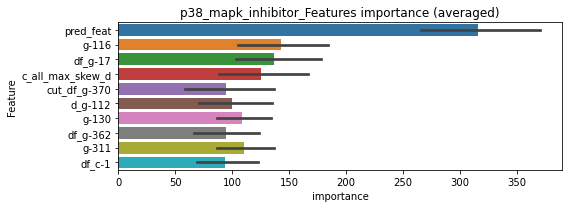

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207095	valid_1's binary_logloss: 0.00062885
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.000171518	valid_1's binary_logloss: 0.000559044


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.0004125	valid_1's binary_logloss: 0.00336607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000267673	valid_1's binary_logloss: 0.0051599


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.002691407416326007


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000434141	valid_1's binary_logloss: 0.00166771
neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173807	valid_1's binary_logloss: 0.00445005
[600]	training's binary_logloss: 0.000416283	valid_1's binary_logloss: 0.00185277
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000397692	valid_1's binary_logloss: 0.00182461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170044	valid_1's binary_logloss: 0.0114076
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000450134	valid_1's binary_logloss: 0.00835526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176668	valid_1's binary_logloss: 0.0034546
[600]	training's binary_logloss: 0.000418666	valid_1's binary_logloss: 0.00106923
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00041029	valid_1's binary_logloss: 0.00105303
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0028326, Threshold: 0.0119713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00838, conf_1:0.01556
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0119713
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0619713
threshold: 0.0619713, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657182	valid_1's binary_logloss: 0.00168064
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000315097	valid_1's binary_logloss: 0.00123543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643528	valid_1's binary_logloss: 0.00325756
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000198786	valid_1's binary_logloss: 0.00239346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644281	valid_1's binary_logloss: 0.000677469
[600]	training's binary_logloss: 0.000181753	valid_1's binary_logloss: 0.000167824
[900]	training's binary_logloss: 0.000148677	valid_1's binary_logloss: 0.000125993
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000147878	valid_1's binary_logloss: 0.000124779
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.6119486, Threshold: 0.0619713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0549975 Vs.target_rate: 0.00101
Num_p_label: 219.0, conf_0:0.04958, conf_1:0.07437
Num_p_label: 219.0, Expected: 4.0, Adj_threshold_1: 0.0619713
Num_p_label: 219.0, Expected: 4.0, Adj_threshold_2: 0.1119713
Num_p_label: 218.0, Expected: 4.0, Adj_threshold_3: 0.1619713
Num_p_label: 218.0, Expected: 4.0, Adj_threshold_4: 0.2119713
Num_p_label: 218.0, Expected: 4.0, Adj_threshold_5: 0.2619713
Num_p_label: 216.0, Expected: 4.0, Adj_threshold_6: 0.3119713
Num_p_label: 203.0, Expected: 4.0, Adj_threshold_7: 0.3619713


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000302091	valid_1's binary_logloss: 0.0015473


Num_p_label: 177.0, Expected: 4.0, Adj_threshold_8: 0.4119713
Num_p_label: 142.0, Expected: 4.0, Adj_threshold_9: 0.4619713
Num_p_label: 111.0, Expected: 4.0, Adj_threshold_10: 0.5119713
threshold: 0.5619713, positive_p_label: 76.0/3982, p_label_rate: 0.0190859
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00065123	valid_1's binary_logloss: 0.00182976
[600]	training's binary_logloss: 0.000190352	valid_1's binary_logloss: 0.00123063
[900]	training's binary_logloss: 0.000156215	valid_1's binary_logloss: 0.00116046
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000156294	valid_1's binary_logloss: 0.00116008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000660563	valid_1's binary_logloss: 0.00272362
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000292961	valid_1's binary_logloss: 0.00209656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659136	valid_1's binary_logloss: 0.00073652
[600]	training's binary_logloss: 0.000190126	valid_1's binary_logloss: 0.00019288
[900]	training's binary_logloss: 0.000158713	valid_1's binary_logloss: 0.000150676
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.5538844, Threshold: 0.5619713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0102963 Vs.target_rate: 0.00101
Num_p_label: 41.0, conf_0:0.50000, conf_1:0.61817
Num_p_label: 41.0, Expected: 4.0, Adj_threshold_1: 0.5619713
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_2: 0.6119713
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_3: 0.6619713
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.7119713
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_5: 0.7619713
threshold: 0.7619713, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


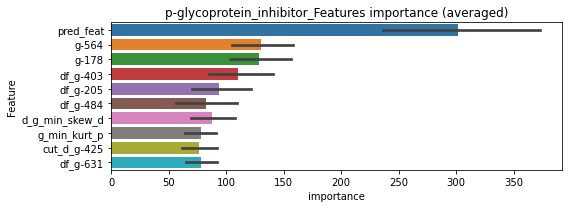

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019418	valid_1's binary_logloss: 0.00115622
Early stopping, best iteration is:
[1522]	training's binary_logloss: 0.0001689	valid_1's binary_logloss: 0.0011157


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000301876	valid_1's binary_logloss: 0.00330888
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193648	valid_1's binary_logloss: 0.000193842
[2000]	training's binary_logloss: 0.000159541	valid_1's binary_logloss: 0.000145982
Early stopping, best iteration is:
[2009]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000145917


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000191212	valid_1's binary_logloss: 0.00129949
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.000164493	valid_1's binary_logloss: 0.00125923


p-glycoprotein_inhibitor logloss: 0.0014582127666517798


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489458	valid_1's binary_logloss: 0.0534371
[600]	training's binary_logloss: 0.000928124	valid_1's binary_logloss: 0.0449968
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00100852	valid_1's binary_logloss: 0.0444896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517435	valid_1's binary_logloss: 0.0244535
[600]	training's binary_logloss: 0.000977383	valid_1's binary_logloss: 0.0147769
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000783048	valid_1's binary_logloss: 0.0141938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540775	valid_1's binary_logloss: 0.0194031
[600]	training's binary_logloss: 0.00100658	valid_1's binary_logloss: 0.0126015
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000921308	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0064544, Threshold: 0.0200300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01402, conf_1:0.02604
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0200300
Num_p_label: 4.0, Expected: 10.2, Adj_threshold_2: 0.0700300
threshold: 0.0700300, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112916	valid_1's binary_logloss: 0.00318192
[600]	training's binary_logloss: 0.00023764	valid_1's binary_logloss: 0.00135376
[900]	training's binary_logloss: 0.000176475	valid_1's binary_logloss: 0.00121093
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000173774	valid_1's binary_logloss: 0.00120302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114754	valid_1's binary_logloss: 0.00400889
[600]	training's binary_logloss: 0.000229604	valid_1's binary_logloss: 0.00272252
[900]	training's binary_logloss: 0.000172934	valid_1's binary_logloss: 0.00261186
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000174455	valid_1's binary_logloss: 0.00260855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115288	valid_1's binary_logloss: 0.00260275
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.6154678, Threshold: 0.0700300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0532396 Vs.target_rate: 0.00256
Num_p_label: 212.0, conf_0:0.05602, conf_1:0.08404
Num_p_label: 212.0, Expected: 10.2, Adj_threshold_1: 0.0700300


Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000177113	valid_1's binary_logloss: 0.00187612


Num_p_label: 212.0, Expected: 10.2, Adj_threshold_2: 0.1200300
Num_p_label: 211.0, Expected: 10.2, Adj_threshold_3: 0.1700300
Num_p_label: 211.0, Expected: 10.2, Adj_threshold_4: 0.2200300
Num_p_label: 210.0, Expected: 10.2, Adj_threshold_5: 0.2700300
Num_p_label: 210.0, Expected: 10.2, Adj_threshold_6: 0.3200300
Num_p_label: 207.0, Expected: 10.2, Adj_threshold_7: 0.3700300
Num_p_label: 202.0, Expected: 10.2, Adj_threshold_8: 0.4200300
Num_p_label: 199.0, Expected: 10.2, Adj_threshold_9: 0.4700300
Num_p_label: 192.0, Expected: 10.2, Adj_threshold_10: 0.5200300
threshold: 0.5700300, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112076	valid_1's binary_logloss: 0.00326352
[600]	training's binary_logloss: 0.000233422	valid_1's binary_logloss: 0.00146845
[900]	training's binary_logloss: 0.000173721	valid_1's binary_logloss: 0.00132505
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000169574	valid_1's binary_logloss: 0.00131552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113848	valid_1's binary_logloss: 0.00397669
[600]	training's binary_logloss: 0.000229939	valid_1's binary_logloss: 0.00259924
[900]	training's binary_logloss: 0.000171706	valid_1's binary_logloss: 0.00251803
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000169568	valid_1's binary_logloss: 0.00251321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114694	valid_1's binary_logloss: 0.00249351
[600]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.6045954, Threshold: 0.5700300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0426921 Vs.target_rate: 0.00256
Num_p_label: 170.0, conf_0:0.50000, conf_1:0.62703
Num_p_label: 170.0, Expected: 10.2, Adj_threshold_1: 0.5700300
Num_p_label: 142.0, Expected: 10.2, Adj_threshold_2: 0.6200300
Num_p_label: 102.0, Expected: 10.2, Adj_threshold_3: 0.6700300
Num_p_label: 48.0, Expected: 10.2, Adj_threshold_4: 0.7200300
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_5: 0.7700300
threshold: 0.7700300, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215435	valid_1's binary_logloss: 0.000868982
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000181051	valid_1's binary_logloss: 0.000805306


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214242	valid_1's binary_logloss: 0.00286421
Early stopping, best iteration is:
[1838]	training's binary_logloss: 0.000175983	valid_1's binary_logloss: 0.00277286


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213741	valid_1's binary_logloss: 0.00149568
Early stopping, best iteration is:
[1765]	training's binary_logloss: 0.000178068	valid_1's binary_logloss: 0.00143844


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000216827	valid_1's binary_logloss: 0.00249165


parp_inhibitor logloss: 0.001881095990368228


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245
target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.044503	valid_1's binary_logloss: 0.260232
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0288966	valid_1's binary_logloss: 0.256886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432197	valid_1's binary_logloss: 0.251222
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0405017	valid_1's binary_logloss: 0.250065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0420583	valid_1's binary_logloss: 0.274566
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0464507	valid_1's binary_logloss: 0.273422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0467257	valid_1's binary_logloss: 0.256974
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0333579	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.889
y_Threshold: 0.0922388, Threshold: 0.5884551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 493/3452
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, conf_0:0.41192, conf_1:0.76499
threshold: 0.5884551, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177189	valid_1's binary_logloss: 0.0075566
[600]	training's binary_logloss: 0.000261848	valid_1's binary_logloss: 0.00368096
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000237246	valid_1's binary_logloss: 0.00359683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166574	valid_1's binary_logloss: 0.00386657
[600]	training's binary_logloss: 0.000204935	valid_1's binary_logloss: 0.000501981
[900]	training's binary_logloss: 0.000120756	valid_1's binary_logloss: 0.000296946
[1200]	training's binary_logloss: 0.000111734	valid_1's binary_logloss: 0.000274236
Early stopping, best iteration is:
[1354]	training's binary_logloss: 0.000110325	valid_1's binary_logloss: 0.000270457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016284	valid_1's binary_logloss: 0.00385953
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.9186751, Threshold: 0.5884551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 493.0/3452
p_label_rate: 0.1215470 Vs.target_rate: 0.01247
Num_p_label: 484.0, conf_0:0.47076, conf_1:0.70615
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_1: 0.5884551
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_2: 0.6384551
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_3: 0.6884551
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_4: 0.7384551
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_5: 0.7884551
threshold: 0.7884551, positive_p_label: 484.0/3982, p_label_rate: 0.1215470
positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176942	valid_1's binary_logloss: 0.0322148
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00145997	valid_1's binary_logloss: 0.0316036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167731	valid_1's binary_logloss: 0.003807
[600]	training's binary_logloss: 0.000205135	valid_1's binary_logloss: 0.00048914
[900]	training's binary_logloss: 0.000120862	valid_1's binary_logloss: 0.000289485
[1200]	training's binary_logloss: 0.000111734	valid_1's binary_logloss: 0.000267061
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.000110355	valid_1's binary_logloss: 0.000263445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162799	valid_1's binary_logloss: 0.00384846
[600]	training's binary_logloss: 0.000202853	valid_1's binary_logloss: 0.000509937
[900]	train

3 / 3 AUC score:1.000
y_Threshold: 0.7220606, Threshold: 0.7884551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 485.0/3436
p_label_rate: 0.1215470 Vs.target_rate: 0.01247
Num_p_label: 484.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 484.0, Expected: 49.7, Adj_threshold_1: 0.7884551
threshold: 0.7884551, positive_p_label: 484.0/3982, p_label_rate: 0.1215470
positive_y_label: 485.0/3436, y_label_rate: 0.1411525


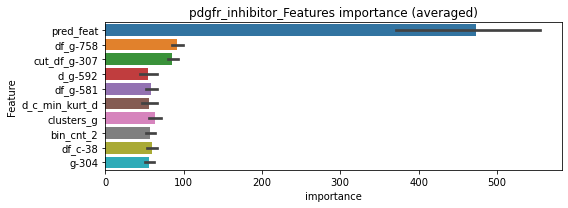

len(train_index) : 2577
len(valid_index) : 859
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2577
len(valid_index) : 859
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00037556	valid_1's binary_logloss: 0.00811521
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000240001	valid_1's binary_logloss: 0.000421406
[2000]	training's binary_logloss: 0.000189018	valid_1's binary_logloss: 0.00029957
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.000187662	valid_1's binary_logloss: 0.000296415


len(train_index) : 2577
len(valid_index) : 859
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000240139	valid_1's binary_logloss: 0.00191281
Early stopping, best iteration is:
[1833]	training's binary_logloss: 0.000194884	valid_1's binary_logloss: 0.00179106


len(train_index) : 2577
len(valid_index) : 859
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000240289	valid_1's binary_logloss: 0.000901433
[2000]	training's binary_logloss: 0.000189941	valid_1's binary_logloss: 0.000690889
Early stopping, best iteration is:
[2117]	training's binary_logloss: 0.000187893	valid_1's binary_logloss: 0.000681927


pdgfr_inhibitor logloss: 0.002723757091048204


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123129	valid_1's binary_logloss: 0.00903019
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000372218	valid_1's binary_logloss: 0.00607104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124002	valid_1's binary_logloss: 0.00385601
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000379176	valid_1's binary_logloss: 0.00177476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124049	valid_1's binary_logloss: 0.00217576
[600]	training's binary_logloss: 0.000373312	valid_1's binary_logloss: 0.000812676
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000373312	valid_1's binary_logloss: 0.000812676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126978	valid_1's binary_logloss: 0.004243

1 / 3 AUC score:1.000
y_Threshold: 0.0019397, Threshold: 0.0114134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00799, conf_1:0.01484
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0114134
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0614134
threshold: 0.0614134, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00054246	valid_1's binary_logloss: 0.00471297
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000233002	valid_1's binary_logloss: 0.00401678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566482	valid_1's binary_logloss: 0.000971026
[600]	training's binary_logloss: 0.000180745	valid_1's binary_logloss: 0.000496272
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000171124	valid_1's binary_logloss: 0.000486401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000573676	valid_1's binary_logloss: 0.00188646
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000220297	valid_1's binary_logloss: 0.00144328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000582029	valid_1's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.4983808, Threshold: 0.0614134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0595178 Vs.target_rate: 0.00076
Num_p_label: 237.0, conf_0:0.04913, conf_1:0.07370
Num_p_label: 237.0, Expected: 3.0, Adj_threshold_1: 0.0614134
Num_p_label: 237.0, Expected: 3.0, Adj_threshold_2: 0.1114134
Num_p_label: 236.0, Expected: 3.0, Adj_threshold_3: 0.1614134
Num_p_label: 234.0, Expected: 3.0, Adj_threshold_4: 0.2114134


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000206297	valid_1's binary_logloss: 0.000611782


Num_p_label: 227.0, Expected: 3.0, Adj_threshold_5: 0.2614134
Num_p_label: 216.0, Expected: 3.0, Adj_threshold_6: 0.3114134
Num_p_label: 199.0, Expected: 3.0, Adj_threshold_7: 0.3614134
Num_p_label: 178.0, Expected: 3.0, Adj_threshold_8: 0.4114134
Num_p_label: 160.0, Expected: 3.0, Adj_threshold_9: 0.4614134
Num_p_label: 135.0, Expected: 3.0, Adj_threshold_10: 0.5114134
threshold: 0.5614134, positive_p_label: 111.0/3982, p_label_rate: 0.0278754
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000562491	valid_1's binary_logloss: 0.00256299
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000193921	valid_1's binary_logloss: 0.00180714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570442	valid_1's binary_logloss: 0.00306067
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000404361	valid_1's binary_logloss: 0.00288757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057145	valid_1's binary_logloss: 0.000557564
[600]	training's binary_logloss: 0.000188042	valid_1's binary_logloss: 0.00015961
[900]	training's binary_logloss: 0.000160922	valid_1's binary_logloss: 0.000127055
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000160922	valid_1's binary_logloss: 0.000127055
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.5316687, Threshold: 0.5614134, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0115520 Vs.target_rate: 0.00076
Num_p_label: 46.0, conf_0:0.50000, conf_1:0.61755


Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000155752	valid_1's binary_logloss: 0.000810177


Num_p_label: 46.0, Expected: 3.0, Adj_threshold_1: 0.5614134
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.6114134
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_3: 0.6614134
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_4: 0.7114134
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.7614134
threshold: 0.7614134, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


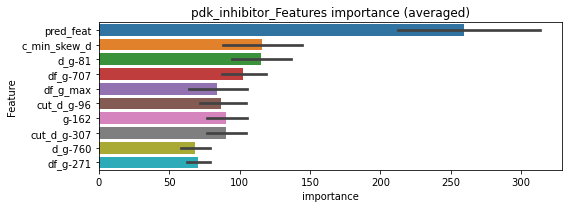

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000217516	valid_1's binary_logloss: 0.00179009
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000238857	valid_1's binary_logloss: 0.000649781
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000189578	valid_1's binary_logloss: 0.000826468
[2000]	training's binary_logloss: 0.000161491	valid_1's binary_logloss: 0.000779444
Early stopping, best iteration is:
[2023]	training's binary_logloss: 0.000161201	valid_1's binary_logloss: 0.000779016


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000192986	valid_1's binary_logloss: 0.000740351
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000194806	valid_1's binary_logloss: 0.000739181


pdk_inhibitor logloss: 0.0009921069490659842


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248
target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372516	valid_1's binary_logloss: 0.262182
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.0440276	valid_1's binary_logloss: 0.261791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03496	valid_1's binary_logloss: 0.241253
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0223014	valid_1's binary_logloss: 0.238113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399774	valid_1's binary_logloss: 0.220879
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.0187561	valid_1's binary_logloss: 0.216845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036895	valid_1's binary_logloss: 0.214587
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0272056	valid_1's binary_logloss: 0.21

1 / 3 AUC score:0.906
y_Threshold: 0.0778357, Threshold: 0.2896589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 393 → Positive_corect_labels: 518/3504
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, conf_0:0.20276, conf_1:0.37656
threshold: 0.2896589, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 518.0/3504, y_label_rate: 0.1478311
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185665	valid_1's binary_logloss: 0.00658317
[600]	training's binary_logloss: 0.000274289	valid_1's binary_logloss: 0.00301552
[900]	training's binary_logloss: 0.000179467	valid_1's binary_logloss: 0.00278207
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00017212	valid_1's binary_logloss: 0.00276193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193143	valid_1's binary_logloss: 0.0058949
[600]	training's binary_logloss: 0.000275818	valid_1's binary_logloss: 0.00280841
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000187171	valid_1's binary_logloss: 0.00258186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179054	valid_1's binary_logloss: 0.00529643
[600]	training's binary_logloss: 0.000255768	valid_1's binary_logloss: 0.00206962
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.6999680, Threshold: 0.2896589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 516.0/3500
p_label_rate: 0.0934204 Vs.target_rate: 0.01109
Num_p_label: 372.0, conf_0:0.23173, conf_1:0.34759
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_1: 0.2896589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_2: 0.3396589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_3: 0.3896589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_4: 0.4396589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_5: 0.4896589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_6: 0.5396589
Num_p_label: 372.0, Expected: 44.1, Adj_threshold_7: 0.5896589
Num_p_label: 371.0, Expected: 44.1, Adj_threshold_8: 0.6396589
Num_p_label: 370.0, Expected: 44.1, Adj_threshold_9: 0.6896589
Num_p_label: 369.0, Expected: 44.1, Adj_threshold_10: 0.7396589
threshold: 0.7896589, positive_p_label: 354.0/3982, p_label_rate: 0.0889001
positive_y_label: 516.0/3500, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019554	valid_1's binary_logloss: 0.00725031
[600]	training's binary_logloss: 0.000287287	valid_1's binary_logloss: 0.00346504
[900]	training's binary_logloss: 0.000187875	valid_1's binary_logloss: 0.00320067
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000184468	valid_1's binary_logloss: 0.0031924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192642	valid_1's binary_logloss: 0.00852173
[600]	training's binary_logloss: 0.000285549	valid_1's binary_logloss: 0.00545488
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000274427	valid_1's binary_logloss: 0.00540661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192138	valid_1's binary_logloss: 0.0075824
[600]	training's binary_logloss: 0.00028603	valid_1's binary_logloss: 0.00393519
Early stopping, 

3 / 3 AUC score:1.000
y_Threshold: 0.5965137, Threshold: 0.7896589, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000206346	valid_1's binary_logloss: 0.00294045


Remove_noisy_data: 8 → Positive_corect_labels: 512.0/3492
p_label_rate: 0.0695630 Vs.target_rate: 0.01109
Num_p_label: 277.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 277.0, Expected: 44.1, Adj_threshold_1: 0.7896589
threshold: 0.7896589, positive_p_label: 277.0/3982, p_label_rate: 0.0695630
positive_y_label: 512.0/3492, y_label_rate: 0.1466208


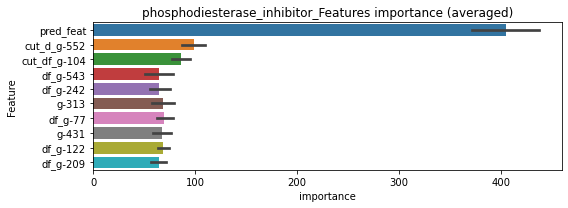

len(train_index) : 2619
len(valid_index) : 873
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2619
len(valid_index) : 873
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000495949	valid_1's binary_logloss: 0.00665443
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000237863	valid_1's binary_logloss: 0.00126631
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.000198116	valid_1's binary_logloss: 0.00115043


len(train_index) : 2619
len(valid_index) : 873
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000240612	valid_1's binary_logloss: 0.00297447
Early stopping, best iteration is:
[1286]	training's binary_logloss: 0.000217602	valid_1's binary_logloss: 0.00290515


len(train_index) : 2619
len(valid_index) : 873
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000240036	valid_1's binary_logloss: 0.00384574
Early stopping, best iteration is:
[1310]	training's binary_logloss: 0.000211931	valid_1's binary_logloss: 0.00377069


phosphodiesterase_inhibitor logloss: 0.003620722082458478


neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184504	valid_1's binary_logloss: 0.0102497
[600]	training's binary_logloss: 0.000446771	valid_1's binary_logloss: 0.00689659
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000457114	valid_1's binary_logloss: 0.00689241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183159	valid_1's binary_logloss: 0.00923108
[600]	training's binary_logloss: 0.00043941	valid_1's binary_logloss: 0.00560937
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000416204	valid_1's binary_logloss: 0.00549083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189465	valid_1's binary_logloss: 0.00491366
[600]	training's binary_logloss: 0.000446323	valid_1's binary_logloss: 0.00199687
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000419762	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026613, Threshold: 0.0127395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00892, conf_1:0.01656
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0127395
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0627395
threshold: 0.0627395, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000712051	valid_1's binary_logloss: 0.00224276
[600]	training's binary_logloss: 0.000197408	valid_1's binary_logloss: 0.00151447
[900]	training's binary_logloss: 0.000163357	valid_1's binary_logloss: 0.00146266
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.00016295	valid_1's binary_logloss: 0.00146131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671852	valid_1's binary_logloss: 0.00253218
[600]	training's binary_logloss: 0.00018575	valid_1's binary_logloss: 0.00187182
[900]	training's binary_logloss: 0.000151129	valid_1's binary_logloss: 0.00182295
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000150072	valid_1's binary_logloss: 0.00182147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701309	valid_1's binary_logloss: 0.00150154
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.6614065, Threshold: 0.0627395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0592667 Vs.target_rate: 0.00105
Num_p_label: 236.0, conf_0:0.05019, conf_1:0.07529
Num_p_label: 236.0, Expected: 4.2, Adj_threshold_1: 0.0627395
Num_p_label: 233.0, Expected: 4.2, Adj_threshold_2: 0.1127395
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_3: 0.1627395
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_4: 0.2127395
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_5: 0.2627395
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_6: 0.3127395
Num_p_label: 231.0, Expected: 4.2, Adj_threshold_7: 0.3627395
Num_p_label: 228.0, Expected: 4.2, Adj_threshold_8: 0.4127395
Num_p_label: 216.0, Expected: 4.2, Adj_threshold_9: 0.4627395
Num_p_label: 188.0, Expected: 4.2, Adj_threshold_10: 0.5127395
threshold: 0.5627395, positive_p_label: 153.0/3982, p_label_rate: 0.0384229
positive_y_label: 657.0/3811, y_label_rate: 0.1723957

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694077	valid_1's binary_logloss: 0.00237989
[600]	training's binary_logloss: 0.000193424	valid_1's binary_logloss: 0.00173396
[900]	training's binary_logloss: 0.000159048	valid_1's binary_logloss: 0.00168699
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000154706	valid_1's binary_logloss: 0.00167959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068142	valid_1's binary_logloss: 0.00248296
[600]	training's binary_logloss: 0.000183142	valid_1's binary_logloss: 0.00183086
[900]	training's binary_logloss: 0.000151592	valid_1's binary_logloss: 0.00178921
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000151592	valid_1's binary_logloss: 0.00178921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000704621	valid_1's binary_logloss: 0.00148191
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.6171515, Threshold: 0.5627395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0411853 Vs.target_rate: 0.00105
Num_p_label: 164.0, conf_0:0.50000, conf_1:0.61901
Num_p_label: 164.0, Expected: 4.2, Adj_threshold_1: 0.5627395
Num_p_label: 126.0, Expected: 4.2, Adj_threshold_2: 0.6127395
Num_p_label: 81.0, Expected: 4.2, Adj_threshold_3: 0.6627395


Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000162046	valid_1's binary_logloss: 0.000303957


Num_p_label: 55.0, Expected: 4.2, Adj_threshold_4: 0.7127395
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_5: 0.7627395
threshold: 0.7627395, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019929	valid_1's binary_logloss: 0.001746
[2000]	training's binary_logloss: 0.000164402	valid_1's binary_logloss: 0.00168796
Early stopping, best iteration is:
[1992]	training's binary_logloss: 0.000164676	valid_1's binary_logloss: 0.00168727


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000239101	valid_1's binary_logloss: 0.00166204
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000287509	valid_1's binary_logloss: 0.000860266
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193442	valid_1's binary_logloss: 0.00031216
Early stopping, best iteration is:
[1729]	training's binary_logloss: 0.000162368	valid_1's binary_logloss: 0.000269998


phospholipase_inhibitor logloss: 0.001121686750735999


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262
target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019202	valid_1's binary_logloss: 0.143994
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00550268	valid_1's binary_logloss: 0.134012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211324	valid_1's binary_logloss: 0.106799
[600]	training's binary_logloss: 0.0031277	valid_1's binary_logloss: 0.0859839
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00257302	valid_1's binary_logloss: 0.085193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193667	valid_1's binary_logloss: 0.12222
[600]	training's binary_logloss: 0.00293438	valid_1's binary_logloss: 0.10807
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00332823	valid_1's binary_logloss: 0.10774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

1 / 3 AUC score:0.979
y_Threshold: 0.0269291, Threshold: 0.0739475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 215 → Positive_corect_labels: 610/3699
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, conf_0:0.05176, conf_1:0.09613
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0739475
Num_p_label: 15.0, Expected: 25.2, Adj_threshold_2: 0.1239475
threshold: 0.1239475, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 610.0/3699, y_label_rate: 0.1649094
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174172	valid_1's binary_logloss: 0.00346194
[600]	training's binary_logloss: 0.000276698	valid_1's binary_logloss: 0.000622826
[900]	training's binary_logloss: 0.00018861	valid_1's binary_logloss: 0.000400038
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000180784	valid_1's binary_logloss: 0.000380237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179709	valid_1's binary_logloss: 0.00682371
[600]	training's binary_logloss: 0.000275689	valid_1's binary_logloss: 0.00425401
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000218116	valid_1's binary_logloss: 0.0040889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179833	valid_1's binary_logloss: 0.00680213
[600]	training's binary_logloss: 0.000274675	valid_1's binary_logloss: 0.00437511
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.3300303, Threshold: 0.1239475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 607.0/3693
p_label_rate: 0.0652938 Vs.target_rate: 0.00634
Num_p_label: 260.0, conf_0:0.09916, conf_1:0.14874
Num_p_label: 260.0, Expected: 25.2, Adj_threshold_1: 0.1239475
Num_p_label: 260.0, Expected: 25.2, Adj_threshold_2: 0.1739475
Num_p_label: 256.0, Expected: 25.2, Adj_threshold_3: 0.2239475
Num_p_label: 241.0, Expected: 25.2, Adj_threshold_4: 0.2739475
Num_p_label: 216.0, Expected: 25.2, Adj_threshold_5: 0.3239475
Num_p_label: 179.0, Expected: 25.2, Adj_threshold_6: 0.3739475
Num_p_label: 159.0, Expected: 25.2, Adj_threshold_7: 0.4239475
Num_p_label: 139.0, Expected: 25.2, Adj_threshold_8: 0.4739475
Num_p_label: 131.0, Expected: 25.2, Adj_threshold_9: 0.5239475
Num_p_label: 122.0, Expected: 25.2, Adj_threshold_10: 0.5739475
threshold: 0.6239475, positive_p_label: 117.0/3982, p_label_rate: 0.0293822
positive_y_label: 607.0/3693, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172443	valid_1's binary_logloss: 0.00555775
[600]	training's binary_logloss: 0.000271313	valid_1's binary_logloss: 0.00271265
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000188067	valid_1's binary_logloss: 0.00252094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173518	valid_1's binary_logloss: 0.00619969
[600]	training's binary_logloss: 0.000271562	valid_1's binary_logloss: 0.00311031
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000235403	valid_1's binary_logloss: 0.00300948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173499	valid_1's binary_logloss: 0.00411681
[600]	training's binary_logloss: 0.000265589	valid_1's binary_logloss: 0.00144284
[900]	training's binary_logloss: 0.000181627	valid_1's binary_logloss: 0.00123403
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.5530605, Threshold: 0.6239475, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 606.0/3691
p_label_rate: 0.0414365 Vs.target_rate: 0.00634
Num_p_label: 165.0, conf_0:0.50000, conf_1:0.68634
Num_p_label: 165.0, Expected: 25.2, Adj_threshold_1: 0.6239475
Num_p_label: 119.0, Expected: 25.2, Adj_threshold_2: 0.6739475
Num_p_label: 92.0, Expected: 25.2, Adj_threshold_3: 0.7239475
Num_p_label: 80.0, Expected: 25.2, Adj_threshold_4: 0.7739475
threshold: 0.7739475, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 606.0/3691, y_label_rate: 0.1641831


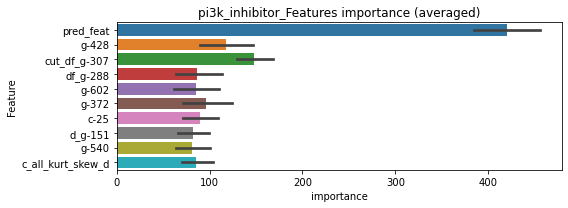

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2768
len(valid_index) : 923


Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000228865	valid_1's binary_logloss: 0.0025857


================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000227326	valid_1's binary_logloss: 0.00638096
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000222162	valid_1's binary_logloss: 0.00635733


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000237054	valid_1's binary_logloss: 0.00124581


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000224389	valid_1's binary_logloss: 0.00217852
Early stopping, best iteration is:
[1614]	training's binary_logloss: 0.000186213	valid_1's binary_logloss: 0.00206292


pi3k_inhibitor logloss: 0.0030682865342954464


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223309	valid_1's binary_logloss: 0.00640561
[600]	training's binary_logloss: 0.000535148	valid_1's binary_logloss: 0.00252441
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000487216	valid_1's binary_logloss: 0.00239026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213663	valid_1's binary_logloss: 0.016226
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000583013	valid_1's binary_logloss: 0.011199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229039	valid_1's binary_logloss: 0.00470055
[600]	training's binary_logloss: 0.000546028	valid_1's binary_logloss: 0.001935
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000504926	valid_1's binary_logloss: 0.00187025
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0034512, Threshold: 0.0098003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00686, conf_1:0.01274
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0098003
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_2: 0.0598003
threshold: 0.0598003, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772985	valid_1's binary_logloss: 0.000952378
[600]	training's binary_logloss: 0.000203512	valid_1's binary_logloss: 0.000216698
[900]	training's binary_logloss: 0.000162717	valid_1's binary_logloss: 0.000157193
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000161612	valid_1's binary_logloss: 0.000155395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000731443	valid_1's binary_logloss: 0.00472691
[600]	training's binary_logloss: 0.000190182	valid_1's binary_logloss: 0.00382776
[900]	training's binary_logloss: 0.000149881	valid_1's binary_logloss: 0.00375853
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000142966	valid_1's binary_logloss: 0.00374967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077937	valid_1's binary_logloss: 0.00193634
Early

2 / 3 AUC score:1.000
y_Threshold: 0.8066620, Threshold: 0.0598003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0444500 Vs.target_rate: 0.00130
Num_p_label: 177.0, conf_0:0.04784, conf_1:0.07176
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_1: 0.0598003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_2: 0.1098003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_3: 0.1598003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_4: 0.2098003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_5: 0.2598003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_6: 0.3098003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_7: 0.3598003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_8: 0.4098003
Num_p_label: 177.0, Expected: 5.2, Adj_threshold_9: 0.4598003
Num_p_label: 171.0, Expected: 5.2, Adj_threshold_10: 0.5098003
threshold: 0.5598003, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 656.0/3809, y_label_rate: 0.1722237

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000772513	valid_1's binary_logloss: 0.00191661
[600]	training's binary_logloss: 0.000204143	valid_1's binary_logloss: 0.00116702
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000169411	valid_1's binary_logloss: 0.00110777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787773	valid_1's binary_logloss: 0.0029358
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00028373	valid_1's binary_logloss: 0.00225509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077325	valid_1's binary_logloss: 0.00171022
[600]	training's binary_logloss: 0.000202951	valid_1's binary_logloss: 0.00095665
[900]	training's binary_logloss: 0.000161605	valid_1's binary_logloss: 0.000900768
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000161381	valid_1's bin

3 / 3 AUC score:1.000


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000229097	valid_1's binary_logloss: 0.00143322


y_Threshold: 0.5065005, Threshold: 0.5598003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0278754 Vs.target_rate: 0.00130
Num_p_label: 111.0, conf_0:0.50000, conf_1:0.61578
Num_p_label: 111.0, Expected: 5.2, Adj_threshold_1: 0.5598003
Num_p_label: 73.0, Expected: 5.2, Adj_threshold_2: 0.6098003
Num_p_label: 41.0, Expected: 5.2, Adj_threshold_3: 0.6598003
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_4: 0.7098003
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.7598003
threshold: 0.7598003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000199796	valid_1's binary_logloss: 0.00115966
Early stopping, best iteration is:
[1867]	training's binary_logloss: 0.000165719	valid_1's binary_logloss: 0.0011075


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[146]	training's binary_logloss: 0.00130571	valid_1's binary_logloss: 0.00583652
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000253078	valid_1's binary_logloss: 0.000707907
Training until validation scores don't improve for 30 rounds


pkc_inhibitor logloss: 0.002363208203743092


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000426177	valid_1's binary_logloss: 0.00179781
neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400747	valid_1's binary_logloss: 0.0410973
[600]	training's binary_logloss: 0.000806162	valid_1's binary_logloss: 0.033316
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000660929	valid_1's binary_logloss: 0.0327967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446707	valid_1's binary_logloss: 0.0184996
[600]	training's binary_logloss: 0.000841297	valid_1's binary_logloss: 0.00999572
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000641999	valid_1's binary_logloss: 0.0094741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446543	valid_1's binary_logloss: 0.0125361
[600]	training's binary_logloss: 0.000862887	valid_1's binary_logloss: 0.00436929
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000619526	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0058107, Threshold: 0.0347503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.02433, conf_1:0.04518
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0347503
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_2: 0.0847503
threshold: 0.0847503, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102743	valid_1's binary_logloss: 0.00328247
[600]	training's binary_logloss: 0.000225401	valid_1's binary_logloss: 0.00184591
[900]	training's binary_logloss: 0.000170441	valid_1's binary_logloss: 0.00173094
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000169474	valid_1's binary_logloss: 0.0017284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105159	valid_1's binary_logloss: 0.00340515
[600]	training's binary_logloss: 0.000225523	valid_1's binary_logloss: 0.00210151
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000176482	valid_1's binary_logloss: 0.00202207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106022	valid_1's binary_logloss: 0.00402571
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000424857	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.5426233, Threshold: 0.0847503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0630337 Vs.target_rate: 0.00231
Num_p_label: 251.0, conf_0:0.06780, conf_1:0.10170
Num_p_label: 251.0, Expected: 9.2, Adj_threshold_1: 0.0847503
Num_p_label: 251.0, Expected: 9.2, Adj_threshold_2: 0.1347503
Num_p_label: 250.0, Expected: 9.2, Adj_threshold_3: 0.1847503
Num_p_label: 250.0, Expected: 9.2, Adj_threshold_4: 0.2347503
Num_p_label: 250.0, Expected: 9.2, Adj_threshold_5: 0.2847503


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00026935	valid_1's binary_logloss: 0.00276417


Num_p_label: 250.0, Expected: 9.2, Adj_threshold_6: 0.3347503
Num_p_label: 249.0, Expected: 9.2, Adj_threshold_7: 0.3847503
Num_p_label: 247.0, Expected: 9.2, Adj_threshold_8: 0.4347503
Num_p_label: 241.0, Expected: 9.2, Adj_threshold_9: 0.4847503
Num_p_label: 230.0, Expected: 9.2, Adj_threshold_10: 0.5347503
threshold: 0.5847503, positive_p_label: 206.0/3982, p_label_rate: 0.0517328
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102333	valid_1's binary_logloss: 0.00577991
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000288286	valid_1's binary_logloss: 0.00431814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106699	valid_1's binary_logloss: 0.0032905
[600]	training's binary_logloss: 0.000235375	valid_1's binary_logloss: 0.00185405
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000189346	valid_1's binary_logloss: 0.00176894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106689	valid_1's binary_logloss: 0.00176654
[600]	training's binary_logloss: 0.000234262	valid_1's binary_logloss: 0.000561822
[900]	training's binary_logloss: 0.000175023	valid_1's binary_logloss: 0.000453349
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000168747	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.3332335, Threshold: 0.5847503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0077850 Vs.target_rate: 0.00231
Num_p_label: 31.0, conf_0:0.50000, conf_1:0.64323
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_1: 0.5847503
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_2: 0.6347503
Num_p_label: 19.0, Expected: 9.2, Adj_threshold_3: 0.6847503
threshold: 0.6847503, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


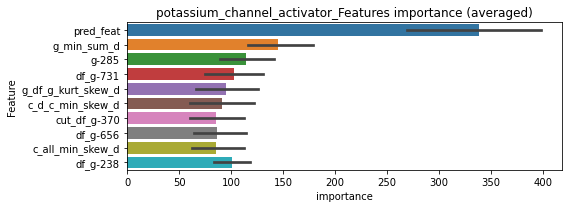

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000444338	valid_1's binary_logloss: 0.00445108
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202759	valid_1's binary_logloss: 0.000416942
[2000]	training's binary_logloss: 0.000164887	valid_1's binary_logloss: 0.000345048
Early stopping, best iteration is:
[2025]	training's binary_logloss: 0.000164503	valid_1's binary_logloss: 0.000343971


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000268594	valid_1's binary_logloss: 0.0010428
Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.0019914213563876305


Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000253918	valid_1's binary_logloss: 0.00211598
neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278
target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979719	valid_1's binary_logloss: 0.0804409
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00194908	valid_1's binary_logloss: 0.0680718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105699	valid_1's binary_logloss: 0.0681561
[600]	training's binary_logloss: 0.00163509	valid_1's binary_logloss: 0.0588429
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00111332	valid_1's binary_logloss: 0.0581881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109777	valid_1's binary_logloss: 0.0494383
[600]	training's binary_logloss: 0.00169967	valid_1's binary_logloss: 0.0390482
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00186023	valid_1's binary_logloss: 0.0388072
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.994
y_Threshold: 0.0114062, Threshold: 0.0353835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 645/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, conf_0:0.02477, conf_1:0.04600
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0353835
Num_p_label: 15.0, Expected: 16.4, Adj_threshold_2: 0.0853835
threshold: 0.0853835, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132834	valid_1's binary_logloss: 0.00350515
[600]	training's binary_logloss: 0.00022151	valid_1's binary_logloss: 0.00115676
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000167208	valid_1's binary_logloss: 0.00100502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116921	valid_1's binary_logloss: 0.0099441
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000469851	valid_1's binary_logloss: 0.00943555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116913	valid_1's binary_logloss: 0.0026637
[600]	training's binary_logloss: 0.000170661	valid_1's binary_logloss: 0.000429043
[900]	training's binary_logloss: 0.000108742	valid_1's binary_logloss: 0.000275663
[1200]	training's binary_logloss: 0.000101685	valid_1's binary_logloss: 0.00025726
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.0010436, Threshold: 0.0853835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0494726 Vs.target_rate: 0.00412
Num_p_label: 197.0, conf_0:0.06831, conf_1:0.10246
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_1: 0.0853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_2: 0.1353835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_3: 0.1853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_4: 0.2353835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_5: 0.2853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_6: 0.3353835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_7: 0.3853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_8: 0.4353835
Num_p_label: 196.0, Expected: 16.4, Adj_threshold_9: 0.4853835
Num_p_label: 196.0, Expected: 16.4, Adj_threshold_10: 0.5353835
threshold: 0.5853835, positive_p_label: 196.0/3982, p_label_rate: 0.0492215
positive_y_label: 644.0/3779, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131287	valid_1's binary_logloss: 0.00349744
[600]	training's binary_logloss: 0.000218697	valid_1's binary_logloss: 0.00109319
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00020506	valid_1's binary_logloss: 0.00104022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131347	valid_1's binary_logloss: 0.0105459
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000582607	valid_1's binary_logloss: 0.0097361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134891	valid_1's binary_logloss: 0.0025656
[600]	training's binary_logloss: 0.000222416	valid_1's binary_logloss: 0.000517186
[900]	training's binary_logloss: 0.000153858	valid_1's binary_logloss: 0.000381607
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000142036	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.8114746, Threshold: 0.5853835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0494726 Vs.target_rate: 0.00412
Num_p_label: 197.0, conf_0:0.50000, conf_1:0.64392
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_1: 0.5853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_2: 0.6353835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_3: 0.6853835
Num_p_label: 197.0, Expected: 16.4, Adj_threshold_4: 0.7353835
Num_p_label: 194.0, Expected: 16.4, Adj_threshold_5: 0.7853835
threshold: 0.7853835, positive_p_label: 194.0/3982, p_label_rate: 0.0487192
positive_y_label: 640.0/3771, y_label_rate: 0.1697163


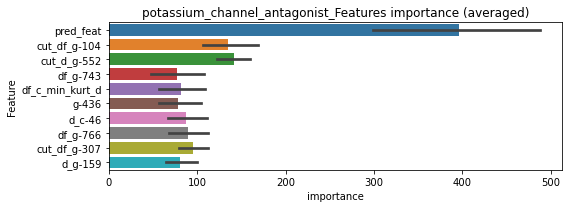

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000245709	valid_1's binary_logloss: 0.00365652


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00022163	valid_1's binary_logloss: 0.000394666
[2000]	training's binary_logloss: 0.000178972	valid_1's binary_logloss: 0.000293327
Early stopping, best iteration is:
[2016]	training's binary_logloss: 0.000178652	valid_1's binary_logloss: 0.000292734


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000217505	valid_1's binary_logloss: 0.00451684
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000219216	valid_1's binary_logloss: 0.00451512


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


potassium_channel_antagonist logloss: 0.0028984600191399477


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000271899	valid_1's binary_logloss: 0.00311804
neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118287	valid_1's binary_logloss: 0.095702
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00269895	valid_1's binary_logloss: 0.0843754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139647	valid_1's binary_logloss: 0.0823481
[600]	training's binary_logloss: 0.0021181	valid_1's binary_logloss: 0.0695133
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00220097	valid_1's binary_logloss: 0.069411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139674	valid_1's binary_logloss: 0.0611465
[600]	training's binary_logloss: 0.00217925	valid_1's binary_logloss: 0.0450244
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00190617	valid_1's binary_logloss: 0.0446767
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.993
y_Threshold: 0.0175163, Threshold: 0.0579611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 640/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.04057, conf_1:0.07535
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0579611
Num_p_label: 9.0, Expected: 19.2, Adj_threshold_2: 0.1079611
threshold: 0.1079611, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 640.0/3771, y_label_rate: 0.1697163
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149809	valid_1's binary_logloss: 0.00428505
[600]	training's binary_logloss: 0.000255197	valid_1's binary_logloss: 0.00190362
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000234544	valid_1's binary_logloss: 0.00182896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152926	valid_1's binary_logloss: 0.00823321
[600]	training's binary_logloss: 0.000257754	valid_1's binary_logloss: 0.00567166
[900]	training's binary_logloss: 0.000179991	valid_1's binary_logloss: 0.00539352
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00018082	valid_1's binary_logloss: 0.00538953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156827	valid_1's binary_logloss: 0.00417971
[600]	training's binary_logloss: 0.000257775	valid_1's binary_logloss: 0.0020806
[900]	training

2 / 3 AUC score:1.000
y_Threshold: 0.5908540, Threshold: 0.1079611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0657961 Vs.target_rate: 0.00483
Num_p_label: 262.0, conf_0:0.08637, conf_1:0.12955
Num_p_label: 262.0, Expected: 19.2, Adj_threshold_1: 0.1079611
Num_p_label: 262.0, Expected: 19.2, Adj_threshold_2: 0.1579611
Num_p_label: 262.0, Expected: 19.2, Adj_threshold_3: 0.2079611
Num_p_label: 262.0, Expected: 19.2, Adj_threshold_4: 0.2579611
Num_p_label: 262.0, Expected: 19.2, Adj_threshold_5: 0.3079611
Num_p_label: 261.0, Expected: 19.2, Adj_threshold_6: 0.3579611
Num_p_label: 259.0, Expected: 19.2, Adj_threshold_7: 0.4079611
Num_p_label: 257.0, Expected: 19.2, Adj_threshold_8: 0.4579611
Num_p_label: 253.0, Expected: 19.2, Adj_threshold_9: 0.5079611
Num_p_label: 243.0, Expected: 19.2, Adj_threshold_10: 0.5579611
threshold: 0.6079611, positive_p_label: 229.0/3982, p_label_rate: 0.0575088
positive_y_label: 637.0/3765, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149088	valid_1's binary_logloss: 0.0177367
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000384134	valid_1's binary_logloss: 0.0147907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156203	valid_1's binary_logloss: 0.00545559
[600]	training's binary_logloss: 0.000259963	valid_1's binary_logloss: 0.00336751
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000263828	valid_1's binary_logloss: 0.00335967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155451	valid_1's binary_logloss: 0.00338782
[600]	training's binary_logloss: 0.000263162	valid_1's binary_logloss: 0.00118176
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000276764	valid_1's binary_logloss: 0.00117635
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.2789172, Threshold: 0.6079611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0331492 Vs.target_rate: 0.00483
Num_p_label: 132.0, conf_0:0.50000, conf_1:0.66876
Num_p_label: 132.0, Expected: 19.2, Adj_threshold_1: 0.6079611
Num_p_label: 119.0, Expected: 19.2, Adj_threshold_2: 0.6579611
Num_p_label: 91.0, Expected: 19.2, Adj_threshold_3: 0.7079611
Num_p_label: 70.0, Expected: 19.2, Adj_threshold_4: 0.7579611
threshold: 0.7579611, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 632.0/3755, y_label_rate: 0.1683089


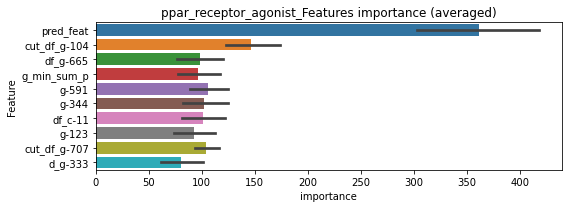

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000201362	valid_1's binary_logloss: 0.000530697
Early stopping, best iteration is:
[1943]	training's binary_logloss: 0.000151812	valid_1's binary_logloss: 0.000432857


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000236521	valid_1's binary_logloss: 0.00356337


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000199326	valid_1's binary_logloss: 0.000269856
[2000]	training's binary_logloss: 0.00015432	valid_1's binary_logloss: 0.000203994
Early stopping, best iteration is:
[2060]	training's binary_logloss: 0.00015305	valid_1's binary_logloss: 0.000202148


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_agonist logloss: 0.0048403498965951496


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000826476	valid_1's binary_logloss: 0.0151732
neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228421	valid_1's binary_logloss: 0.0101972
[600]	training's binary_logloss: 0.000494917	valid_1's binary_logloss: 0.00576744
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000461018	valid_1's binary_logloss: 0.00573177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232335	valid_1's binary_logloss: 0.00782867
[600]	training's binary_logloss: 0.000497881	valid_1's binary_logloss: 0.00340449
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000455091	valid_1's binary_logloss: 0.00327203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242439	valid_1's binary_logloss: 0.00721353
[600]	training's binary_logloss: 0.000511637	valid_1's binary_logloss: 0.00389069
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000456677	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0028464, Threshold: 0.0078029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00546, conf_1:0.01014
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0078029
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0578029
threshold: 0.0578029, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000771562	valid_1's binary_logloss: 0.00156487
[600]	training's binary_logloss: 0.000198641	valid_1's binary_logloss: 0.000720146
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000175958	valid_1's binary_logloss: 0.000668207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078909	valid_1's binary_logloss: 0.00364578
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000316558	valid_1's binary_logloss: 0.00284646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077387	valid_1's binary_logloss: 0.00179934
[600]	training's binary_logloss: 0.000199188	valid_1's binary_logloss: 0.00105156
[900]	training's binary_logloss: 0.000160258	valid_1's binary_logloss: 0.000988798
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000160258	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.5378523, Threshold: 0.0578029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0399297 Vs.target_rate: 0.00126
Num_p_label: 159.0, conf_0:0.04624, conf_1:0.06936
Num_p_label: 159.0, Expected: 5.0, Adj_threshold_1: 0.0578029
Num_p_label: 159.0, Expected: 5.0, Adj_threshold_2: 0.1078029
Num_p_label: 159.0, Expected: 5.0, Adj_threshold_3: 0.1578029
Num_p_label: 158.0, Expected: 5.0, Adj_threshold_4: 0.2078029
Num_p_label: 158.0, Expected: 5.0, Adj_threshold_5: 0.2578029
Num_p_label: 154.0, Expected: 5.0, Adj_threshold_6: 0.3078029
Num_p_label: 151.0, Expected: 5.0, Adj_threshold_7: 0.3578029
Num_p_label: 145.0, Expected: 5.0, Adj_threshold_8: 0.4078029
Num_p_label: 131.0, Expected: 5.0, Adj_threshold_9: 0.4578029
Num_p_label: 121.0, Expected: 5.0, Adj_threshold_10: 0.5078029


[300]	training's binary_logloss: 0.000744587	valid_1's binary_logloss: 0.00573014
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.000974042	valid_1's binary_logloss: 0.0056853


threshold: 0.5578029, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000780553	valid_1's binary_logloss: 0.0033911
[600]	training's binary_logloss: 0.000206631	valid_1's binary_logloss: 0.00213971
[900]	training's binary_logloss: 0.000166203	valid_1's binary_logloss: 0.00205586
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000164725	valid_1's binary_logloss: 0.00205068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798655	valid_1's binary_logloss: 0.0017815
[600]	training's binary_logloss: 0.000204807	valid_1's binary_logloss: 0.00101405
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000171126	valid_1's binary_logloss: 0.000958447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000779508	valid_1's binary_logloss: 0.00377634
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000633791	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.6235245, Threshold: 0.5578029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00126
Num_p_label: 27.0, conf_0:0.50000, conf_1:0.61358
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_1: 0.5578029
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.6078029


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000231828	valid_1's binary_logloss: 0.00167975


Num_p_label: 5.0, Expected: 5.0, Adj_threshold_3: 0.6578029
threshold: 0.6578029, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


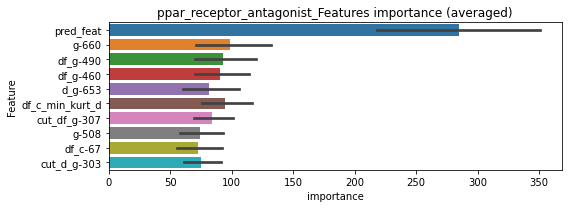

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000206782	valid_1's binary_logloss: 0.00160415
Early stopping, best iteration is:
[1517]	training's binary_logloss: 0.000180246	valid_1's binary_logloss: 0.00153954


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205877	valid_1's binary_logloss: 0.000317027
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.000171525	valid_1's binary_logloss: 0.000265177


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205109	valid_1's binary_logloss: 0.000552884
[2000]	training's binary_logloss: 0.000171621	valid_1's binary_logloss: 0.000506018
Early stopping, best iteration is:
[1992]	training's binary_logloss: 0.000171621	valid_1's binary_logloss: 0.000506018


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_antagonist logloss: 0.0012014835227331451


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000277932	valid_1's binary_logloss: 0.0024885
neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270
target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123499	valid_1's binary_logloss: 0.133507
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00552781	valid_1's binary_logloss: 0.12949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123948	valid_1's binary_logloss: 0.080299
[600]	training's binary_logloss: 0.00203013	valid_1's binary_logloss: 0.0663896
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00144084	valid_1's binary_logloss: 0.0649314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131908	valid_1's binary_logloss: 0.0692262
[600]	training's binary_logloss: 0.00212883	valid_1's binary_logloss: 0.0531348
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00141623	valid_1's binary_logloss: 0.0520754
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.991
y_Threshold: 0.0190799, Threshold: 0.1963068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, conf_0:0.13741, conf_1:0.25520
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1963068
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_2: 0.2463068
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_3: 0.2963068
threshold: 0.2963068, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 634.0/3753, y_label_rate: 0.1689315
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140946	valid_1's binary_logloss: 0.00391831
[600]	training's binary_logloss: 0.000242673	valid_1's binary_logloss: 0.00112065
[900]	training's binary_logloss: 0.000170032	valid_1's binary_logloss: 0.000877524
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000169826	valid_1's binary_logloss: 0.000875231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142697	valid_1's binary_logloss: 0.00616242
[600]	training's binary_logloss: 0.000246401	valid_1's binary_logloss: 0.00365217
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000229895	valid_1's binary_logloss: 0.00359477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150432	valid_1's binary_logloss: 0.00787036
[600]	training's binary_logloss: 0.000255376	valid_1's binary_logloss: 0.00535668
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.1495575, Threshold: 0.2963068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 632.0/3749
p_label_rate: 0.0605224 Vs.target_rate: 0.00500
Num_p_label: 241.0, conf_0:0.23705, conf_1:0.35557
Num_p_label: 241.0, Expected: 19.9, Adj_threshold_1: 0.2963068
Num_p_label: 232.0, Expected: 19.9, Adj_threshold_2: 0.3463068
Num_p_label: 220.0, Expected: 19.9, Adj_threshold_3: 0.3963068
Num_p_label: 217.0, Expected: 19.9, Adj_threshold_4: 0.4463068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_5: 0.4963068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_6: 0.5463068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_7: 0.5963068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_8: 0.6463068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_9: 0.6963068
Num_p_label: 216.0, Expected: 19.9, Adj_threshold_10: 0.7463068
threshold: 0.7963068, positive_p_label: 203.0/3982, p_label_rate: 0.0509794
positive_y_label: 632.0/3749, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140656	valid_1's binary_logloss: 0.00320181
[600]	training's binary_logloss: 0.000232883	valid_1's binary_logloss: 0.000609763
[900]	training's binary_logloss: 0.000161857	valid_1's binary_logloss: 0.000407497
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000151193	valid_1's binary_logloss: 0.000375196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134655	valid_1's binary_logloss: 0.00551094
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000301688	valid_1's binary_logloss: 0.00238386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142209	valid_1's binary_logloss: 0.00267606
[600]	training's binary_logloss: 0.000233369	valid_1's binary_logloss: 0.000522987
[900]	training's binary_logloss: 0.000162371	valid_1's binary_logloss: 0.000368282
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.1692099, Threshold: 0.7963068, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 631.0/3747
p_label_rate: 0.0479658 Vs.target_rate: 0.00500
Num_p_label: 191.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 191.0, Expected: 19.9, Adj_threshold_1: 0.7963068
threshold: 0.7963068, positive_p_label: 191.0/3982, p_label_rate: 0.0479658
positive_y_label: 631.0/3747, y_label_rate: 0.1684014


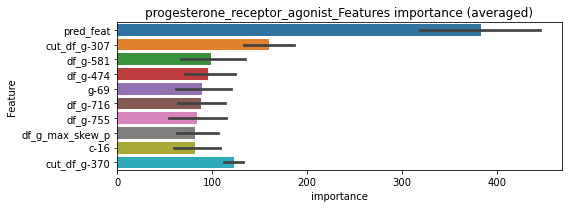

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150961	valid_1's binary_logloss: 0.000375456
[2000]	training's binary_logloss: 0.000111894	valid_1's binary_logloss: 0.000278776
[3000]	training's binary_logloss: 0.000104016	valid_1's binary_logloss: 0.000259028
Early stopping, best iteration is:
[3040]	training's binary_logloss: 0.000103778	valid_1's binary_logloss: 0.000258337


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150868	valid_1's binary_logloss: 0.000503108
[2000]	training's binary_logloss: 0.000111938	valid_1's binary_logloss: 0.000374646
[3000]	training's binary_logloss: 0.000104072	valid_1's binary_logloss: 0.000348122
Early stopping, best iteration is:
[3197]	training's binary_logloss: 0.000103273	valid_1's binary_logloss: 0.000345108


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151151	valid_1's binary_logloss: 0.000353151
[2000]	training's binary_logloss: 0.000111981	valid_1's binary_logloss: 0.000262335
[3000]	training's binary_logloss: 0.000104042	valid_1's binary_logloss: 0.000243601
Early stopping, best iteration is:
[3420]	training's binary_logloss: 0.000102832	valid_1's binary_logloss: 0.000240634


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202049	valid_1's binary_logloss: 0.000787861
[2000]	training's binary_logloss: 0.000156219	valid_1's binary_logloss: 0.000633281
Early stopping, best iteration is:
[2142]	training's binary_logloss: 0.000153689	valid_1's binary_logloss: 0.000624484


progesterone_receptor_agonist logloss: 0.00036707193938871944


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116602	valid_1's binary_logloss: 0.00270726
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000361363	valid_1's binary_logloss: 0.00111914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116073	valid_1's binary_logloss: 0.00246328
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000359785	valid_1's binary_logloss: 0.00100929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120954	valid_1's binary_logloss: 0.00218954
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000364891	valid_1's binary_logloss: 0.000868955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112703	valid_1's binary_logloss: 0.00647612
[600]	training's binary_logloss: 0.000347398	valid_1's binary_logloss: 0.0039449

1 / 3 AUC score:1.000
y_Threshold: 0.0023268, Threshold: 0.0098339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00688, conf_1:0.01278
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0098339
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0598339
threshold: 0.0598339, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543691	valid_1's binary_logloss: 0.000591527
[600]	training's binary_logloss: 0.000178964	valid_1's binary_logloss: 0.000195579
[900]	training's binary_logloss: 0.000152527	valid_1's binary_logloss: 0.000161288
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.00015224	valid_1's binary_logloss: 0.000160743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000514985	valid_1's binary_logloss: 0.0036568
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000427028	valid_1's binary_logloss: 0.00355159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000518284	valid_1's binary_logloss: 0.000568381
[600]	training's binary_logloss: 0.000170007	valid_1's binary_logloss: 0.000187145
[900]	training's binary_logloss: 0.000145314	valid_1's binary_logloss: 0.000158681
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.6087623, Threshold: 0.0598339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0434455 Vs.target_rate: 0.00076
Num_p_label: 173.0, conf_0:0.04787, conf_1:0.07180
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_1: 0.0598339
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_2: 0.1098339
Num_p_label: 172.0, Expected: 3.0, Adj_threshold_3: 0.1598339
Num_p_label: 170.0, Expected: 3.0, Adj_threshold_4: 0.2098339
Num_p_label: 166.0, Expected: 3.0, Adj_threshold_5: 0.2598339
Num_p_label: 161.0, Expected: 3.0, Adj_threshold_6: 0.3098339
Num_p_label: 145.0, Expected: 3.0, Adj_threshold_7: 0.3598339
Num_p_label: 125.0, Expected: 3.0, Adj_threshold_8: 0.4098339
Num_p_label: 97.0, Expected: 3.0, Adj_threshold_9: 0.4598339
Num_p_label: 79.0, Expected: 3.0, Adj_threshold_10: 0.5098339


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000178015	valid_1's binary_logloss: 0.0017695


threshold: 0.5598339, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526717	valid_1's binary_logloss: 0.000846526
[600]	training's binary_logloss: 0.000178851	valid_1's binary_logloss: 0.000365932
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000157366	valid_1's binary_logloss: 0.000335641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000516716	valid_1's binary_logloss: 0.00167896
[600]	training's binary_logloss: 0.000175681	valid_1's binary_logloss: 0.00124383
[900]	training's binary_logloss: 0.000148295	valid_1's binary_logloss: 0.00121221
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00014786	valid_1's binary_logloss: 0.00121175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000535054	valid_1's binary_logloss: 0.00110834
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000261784	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.4890097, Threshold: 0.5598339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0067805 Vs.target_rate: 0.00076
Num_p_label: 27.0, conf_0:0.50000, conf_1:0.61582
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_1: 0.5598339
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.6098339
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.6598339
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_4: 0.7098339
threshold: 0.7098339, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


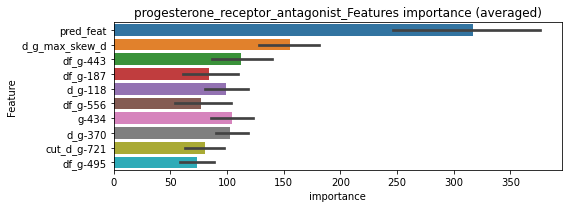

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187478	valid_1's binary_logloss: 0.000330405
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.000162199	valid_1's binary_logloss: 0.000294589


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000187265	valid_1's binary_logloss: 0.00118523
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000328349	valid_1's binary_logloss: 0.00294031
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185454	valid_1's binary_logloss: 0.000933004
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000178273	valid_1's binary_logloss: 0.000920095


progesterone_receptor_antagonist logloss: 0.0013351442704164097


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263804	valid_1's binary_logloss: 0.0117031
[600]	training's binary_logloss: 0.000542441	valid_1's binary_logloss: 0.006996
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000491164	valid_1's binary_logloss: 0.00673325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249544	valid_1's binary_logloss: 0.0181778
[600]	training's binary_logloss: 0.00053547	valid_1's binary_logloss: 0.0129063
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000492864	valid_1's binary_logloss: 0.0127046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272905	valid_1's binary_logloss: 0.0152275
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000754873	valid_1's binary_logloss: 0.0123231
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0035657, Threshold: 0.0172804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01210, conf_1:0.02246
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0172804
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.0672804
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.1172804
threshold: 0.1172804, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000803428	valid_1's binary_logloss: 0.00176237
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000407357	valid_1's binary_logloss: 0.00117273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757439	valid_1's binary_logloss: 0.0024153
[600]	training's binary_logloss: 0.000193763	valid_1's binary_logloss: 0.00154048
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000185807	valid_1's binary_logloss: 0.00150802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000799352	valid_1's binary_logloss: 0.00282466
[600]	training's binary_logloss: 0.000199729	valid_1's binary_logloss: 0.00197551
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000189598	valid_1's binary_logloss: 0.00196777
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.5687425, Threshold: 0.1172804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0537418 Vs.target_rate: 0.00151
Num_p_label: 214.0, conf_0:0.09382, conf_1:0.14074
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_1: 0.1172804
Num_p_label: 210.0, Expected: 6.0, Adj_threshold_2: 0.1672804
Num_p_label: 208.0, Expected: 6.0, Adj_threshold_3: 0.2172804
Num_p_label: 208.0, Expected: 6.0, Adj_threshold_4: 0.2672804
Num_p_label: 208.0, Expected: 6.0, Adj_threshold_5: 0.3172804
Num_p_label: 208.0, Expected: 6.0, Adj_threshold_6: 0.3672804
Num_p_label: 207.0, Expected: 6.0, Adj_threshold_7: 0.4172804
Num_p_label: 204.0, Expected: 6.0, Adj_threshold_8: 0.4672804
Num_p_label: 188.0, Expected: 6.0, Adj_threshold_9: 0.5172804
Num_p_label: 171.0, Expected: 6.0, Adj_threshold_10: 0.5672804
threshold: 0.6172804, positive_p_label: 146.0/3982, p_label_rate: 0.0366650
positive_y_label: 656.0/3809, y_label_rate: 0.1722237

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000801582	valid_1's binary_logloss: 0.00340358
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.0004098	valid_1's binary_logloss: 0.00277676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000819572	valid_1's binary_logloss: 0.00162992
[600]	training's binary_logloss: 0.00020386	valid_1's binary_logloss: 0.000922071
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000171236	valid_1's binary_logloss: 0.00087428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796869	valid_1's binary_logloss: 0.00188545
[600]	training's binary_logloss: 0.00020384	valid_1's binary_logloss: 0.00125304
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000199907	valid_1's binary_logloss: 0.00124694
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.5765101, Threshold: 0.6172804, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0288800 Vs.target_rate: 0.00151
Num_p_label: 115.0, conf_0:0.50000, conf_1:0.67901
Num_p_label: 115.0, Expected: 6.0, Adj_threshold_1: 0.6172804
Num_p_label: 86.0, Expected: 6.0, Adj_threshold_2: 0.6672804
Num_p_label: 52.0, Expected: 6.0, Adj_threshold_3: 0.7172804
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_4: 0.7672804
threshold: 0.7672804, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


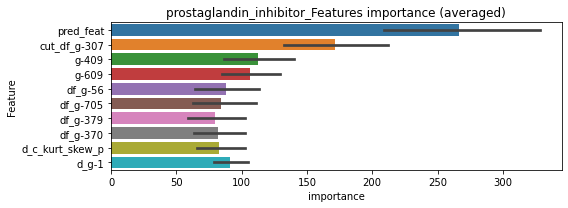

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000290998	valid_1's binary_logloss: 0.00226282
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207079	valid_1's binary_logloss: 0.00151024
Early stopping, best iteration is:
[1479]	training's binary_logloss: 0.000182161	valid_1's binary_logloss: 0.00146855


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208409	valid_1's binary_logloss: 0.00148904
Early stopping, best iteration is:
[1485]	training's binary_logloss: 0.000183867	valid_1's binary_logloss: 0.00143001


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000198719	valid_1's binary_logloss: 0.00143986
Early stopping, best iteration is:
[1202]	training's binary_logloss: 0.000187422	valid_1's binary_logloss: 0.00141321


prostaglandin_inhibitor logloss: 0.0016476951800697551


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280
target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829321	valid_1's binary_logloss: 0.075229
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00252866	valid_1's binary_logloss: 0.0669657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871393	valid_1's binary_logloss: 0.0453147
[600]	training's binary_logloss: 0.00141893	valid_1's binary_logloss: 0.0344771
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00122307	valid_1's binary_logloss: 0.0341687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0092102	valid_1's binary_logloss: 0.0394798
[600]	training's binary_logloss: 0.00149624	valid_1's binary_logloss: 0.0297048
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00149986	valid_1's binary_logloss: 0.0296535
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0112337, Threshold: 0.0669589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, conf_0:0.04687, conf_1:0.08705
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0669589
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.1169589
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_3: 0.1669589
threshold: 0.1669589, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138138	valid_1's binary_logloss: 0.00652059
[600]	training's binary_logloss: 0.000243754	valid_1's binary_logloss: 0.00457688
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000177667	valid_1's binary_logloss: 0.00443862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135445	valid_1's binary_logloss: 0.00397529
[600]	training's binary_logloss: 0.000245149	valid_1's binary_logloss: 0.00209275
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000211895	valid_1's binary_logloss: 0.00204122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136255	valid_1's binary_logloss: 0.00701961
[600]	training's binary_logloss: 0.000247887	valid_1's binary_logloss: 0.00505629
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000217526	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.2633096, Threshold: 0.1669589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0567554 Vs.target_rate: 0.00353
Num_p_label: 226.0, conf_0:0.13357, conf_1:0.20035
Num_p_label: 226.0, Expected: 14.0, Adj_threshold_1: 0.1669589
Num_p_label: 206.0, Expected: 14.0, Adj_threshold_2: 0.2169589
Num_p_label: 161.0, Expected: 14.0, Adj_threshold_3: 0.2669589
Num_p_label: 134.0, Expected: 14.0, Adj_threshold_4: 0.3169589
Num_p_label: 126.0, Expected: 14.0, Adj_threshold_5: 0.3669589
Num_p_label: 116.0, Expected: 14.0, Adj_threshold_6: 0.4169589
Num_p_label: 113.0, Expected: 14.0, Adj_threshold_7: 0.4669589
Num_p_label: 113.0, Expected: 14.0, Adj_threshold_8: 0.5169589
Num_p_label: 113.0, Expected: 14.0, Adj_threshold_9: 0.5669589
Num_p_label: 112.0, Expected: 14.0, Adj_threshold_10: 0.6169589
threshold: 0.6669589, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 646.0/3784, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107097	valid_1's binary_logloss: 0.00222432
[600]	training's binary_logloss: 0.000165174	valid_1's binary_logloss: 0.000367137
[900]	training's binary_logloss: 0.000108084	valid_1's binary_logloss: 0.000242234
[1200]	training's binary_logloss: 0.0001016	valid_1's binary_logloss: 0.000227276
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.0001016	valid_1's binary_logloss: 0.000227276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105489	valid_1's binary_logloss: 0.00911434
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000505441	valid_1's binary_logloss: 0.00868494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127495	valid_1's binary_logloss: 0.00255202
[600]	training's binary_logloss: 0.000225771	valid_1's binary_logloss: 0.000601794
[900]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0997829, Threshold: 0.6669589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0261175 Vs.target_rate: 0.00353


Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000146556	valid_1's binary_logloss: 0.000543687


Num_p_label: 104.0, conf_0:0.50000, conf_1:0.73365
Num_p_label: 104.0, Expected: 14.0, Adj_threshold_1: 0.6669589
Num_p_label: 104.0, Expected: 14.0, Adj_threshold_2: 0.7169589
Num_p_label: 103.0, Expected: 14.0, Adj_threshold_3: 0.7669589
threshold: 0.7669589, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


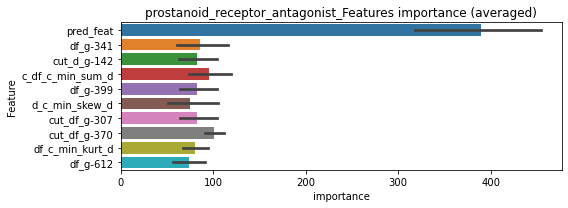

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193189	valid_1's binary_logloss: 0.000352248
[2000]	training's binary_logloss: 0.000150177	valid_1's binary_logloss: 0.000252346
Early stopping, best iteration is:
[2370]	training's binary_logloss: 0.00014417	valid_1's binary_logloss: 0.000237861


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148653	valid_1's binary_logloss: 0.000414298
[2000]	training's binary_logloss: 0.000110756	valid_1's binary_logloss: 0.000309678
[3000]	training's binary_logloss: 0.000103065	valid_1's binary_logloss: 0.000288172
Early stopping, best iteration is:
[3232]	training's binary_logloss: 0.000102219	valid_1's binary_logloss: 0.000285574


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014888	valid_1's binary_logloss: 0.000299111
[2000]	training's binary_logloss: 0.000110684	valid_1's binary_logloss: 0.000222887
[3000]	training's binary_logloss: 0.000102954	valid_1's binary_logloss: 0.000207266
Early stopping, best iteration is:
[3519]	training's binary_logloss: 0.00010151	valid_1's binary_logloss: 0.000204239


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148912	valid_1's binary_logloss: 0.000398843
[2000]	training's binary_logloss: 0.000110757	valid_1's binary_logloss: 0.000297602
[3000]	training's binary_logloss: 0.000102994	valid_1's binary_logloss: 0.00027669
Early stopping, best iteration is:
[3364]	training's binary_logloss: 0.000101859	valid_1's binary_logloss: 0.000273452


prostanoid_receptor_antagonist logloss: 0.0002502877584874954


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197
target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.431667	valid_1's binary_logloss: 0.476757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.31699	valid_1's binary_logloss: 0.473224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	training's binary_logloss: 0.317222	valid_1's binary_logloss: 0.471478
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.539
y_Threshold: 0.1962968, Threshold: 0.4420685, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1247 → Positive_corect_labels: 185/2676
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, conf_0:0.30945, conf_1:0.57469
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4420685
Num_p_label: 67.0, Expected: 121.4, Adj_threshold_2: 0.4220685
Num_p_label: 83.0, Expected: 121.4, Adj_threshold_3: 0.4020685
Num_p_label: 103.0, Expected: 121.4, Adj_threshold_4: 0.3820685
Num_p_label: 124.0, Expected: 121.4, Adj_threshold_5: 0.3620685
Num_p_label: 135.0, Expected: 121.4, Adj_threshold_6: 0.3420685
Num_p_label: 141.0, Expected: 121.4, Adj_threshold_7: 0.3220685
Num_p_label: 147.0, Expected: 121.4, Adj_threshold_8: 0.3020685
Num_p_label: 151.0, Expected: 121.4, Adj_threshold_9: 0.2820685
Num_p_label: 163.0, Expected: 121.4, Adj_threshold_10: 0.2620685
threshold: 0.2420685, positive_p_label: 195.0/3982, p_label_rate: 0.0489704


Early stopping, best iteration is:
[6]	training's binary_logloss: 0.463087	valid_1's binary_logloss: 0.477439


positive_y_label: 185.0/2676, y_label_rate: 0.0691330
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110601	valid_1's binary_logloss: 0.0106712
[600]	training's binary_logloss: 0.000288418	valid_1's binary_logloss: 0.0040506
[900]	training's binary_logloss: 0.000220425	valid_1's binary_logloss: 0.00318152
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000213304	valid_1's binary_logloss: 0.00309229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108206	valid_1's binary_logloss: 0.0119377
[600]	training's binary_logloss: 0.000274615	valid_1's binary_logloss: 0.00431712
[900]	training's binary_logloss: 0.000209925	valid_1's binary_logloss: 0.00361405
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000209062	valid_1's binary_logloss: 0.00357267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106559	valid_1's binary_logloss: 0.0114751
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.4187746, Threshold: 0.2420685, pos_neg_ratio: 0.7729121
Remove_noisy_data: 2 → Positive_corect_labels: 184.0/2674
p_label_rate: 0.2340532 Vs.target_rate: 0.03049
Num_p_label: 932.0, conf_0:0.19365, conf_1:0.29048
Num_p_label: 932.0, Expected: 121.4, Adj_threshold_1: 0.2420685
Num_p_label: 932.0, Expected: 121.4, Adj_threshold_2: 0.2920685
Num_p_label: 931.0, Expected: 121.4, Adj_threshold_3: 0.3420685
Num_p_label: 930.0, Expected: 121.4, Adj_threshold_4: 0.3920685
Num_p_label: 928.0, Expected: 121.4, Adj_threshold_5: 0.4420685
Num_p_label: 925.0, Expected: 121.4, Adj_threshold_6: 0.4920685
Num_p_label: 924.0, Expected: 121.4, Adj_threshold_7: 0.5420685
Num_p_label: 919.0, Expected: 121.4, Adj_threshold_8: 0.5920685
Num_p_label: 912.0, Expected: 121.4, Adj_threshold_9: 0.6420685
Num_p_label: 906.0, Expected: 121.4, Adj_threshold_10: 0.6920685
threshold: 0.7420685, positive_p_label: 890.0/3982, p_label_rate: 0.2235058
positive_y_label: 184.0/2674, y_l

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110542	valid_1's binary_logloss: 0.0144721
[600]	training's binary_logloss: 0.000292785	valid_1's binary_logloss: 0.00746444
[900]	training's binary_logloss: 0.000220277	valid_1's binary_logloss: 0.00668507
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000220214	valid_1's binary_logloss: 0.00668367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110558	valid_1's binary_logloss: 0.0100116
[600]	training's binary_logloss: 0.00029107	valid_1's binary_logloss: 0.00332394
[900]	training's binary_logloss: 0.000224785	valid_1's binary_logloss: 0.00255505
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000221531	valid_1's binary_logloss: 0.00251226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108779	valid_1's binary_logloss: 0.0115574
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.4183555, Threshold: 0.7420685, pos_neg_ratio: 0.7729121


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000225665	valid_1's binary_logloss: 0.00354426


Remove_noisy_data: 2 → Positive_corect_labels: 183.0/2672
p_label_rate: 0.2169764 Vs.target_rate: 0.03049
Num_p_label: 864.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 864.0, Expected: 121.4, Adj_threshold_1: 0.7420685
Num_p_label: 863.0, Expected: 121.4, Adj_threshold_2: 0.7920685
threshold: 0.7920685, positive_p_label: 863.0/3982, p_label_rate: 0.2167253
positive_y_label: 183.0/2672, y_label_rate: 0.0684880


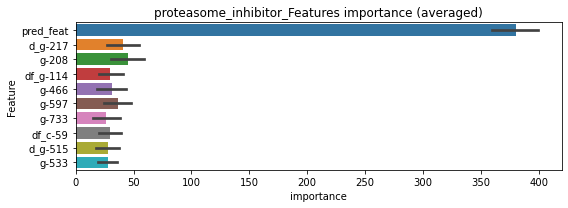

len(train_index) : 2004
len(valid_index) : 668
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00029171	valid_1's binary_logloss: 0.00252291
[2000]	training's binary_logloss: 0.000232818	valid_1's binary_logloss: 0.00191158
Early stopping, best iteration is:
[2049]	training's binary_logloss: 0.000231585	valid_1's binary_logloss: 0.00189994


len(train_index) : 2004
len(valid_index) : 668
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282671	valid_1's binary_logloss: 0.00269841
Early stopping, best iteration is:
[1765]	training's binary_logloss: 0.00023322	valid_1's binary_logloss: 0.00206609


len(train_index) : 2004
len(valid_index) : 668
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.0106392
Early stopping, best iteration is:
[1492]	training's binary_logloss: 0.000243302	valid_1's binary_logloss: 0.0102416


len(train_index) : 2004
len(valid_index) : 668
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.0052834145779131125


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000316687	valid_1's binary_logloss: 0.00691838
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408374	valid_1's binary_logloss: 0.0262958
[600]	training's binary_logloss: 0.000747793	valid_1's binary_logloss: 0.0185331
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.0005805	valid_1's binary_logloss: 0.0180441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366274	valid_1's binary_logloss: 0.0253406
[600]	training's binary_logloss: 0.000728654	valid_1's binary_logloss: 0.0192425
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000652186	valid_1's binary_logloss: 0.0188764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399505	valid_1's binary_logloss: 0.0114368
[600]	training's binary_logloss: 0.000776968	valid_1's binary_logloss: 0.00545674
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000583003	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0045019, Threshold: 0.0131513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00921, conf_1:0.01710
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0131513
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_2: 0.0631513
threshold: 0.0631513, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000969438	valid_1's binary_logloss: 0.00368847
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000572141	valid_1's binary_logloss: 0.00295705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000938528	valid_1's binary_logloss: 0.00408629
[600]	training's binary_logloss: 0.000207457	valid_1's binary_logloss: 0.00315629
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000197475	valid_1's binary_logloss: 0.00313234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010035	valid_1's binary_logloss: 0.00245953
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000300368	valid_1's binary_logloss: 0.00168625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100854	valid_1's binary_logloss: 0.0038238

2 / 3 AUC score:1.000
y_Threshold: 0.6629548, Threshold: 0.0631513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0449523 Vs.target_rate: 0.00202
Num_p_label: 179.0, conf_0:0.05052, conf_1:0.07578
Num_p_label: 179.0, Expected: 8.0, Adj_threshold_1: 0.0631513


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000453136	valid_1's binary_logloss: 0.00303858


Num_p_label: 179.0, Expected: 8.0, Adj_threshold_2: 0.1131513
Num_p_label: 177.0, Expected: 8.0, Adj_threshold_3: 0.1631513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_4: 0.2131513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_5: 0.2631513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_6: 0.3131513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_7: 0.3631513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_8: 0.4131513
Num_p_label: 176.0, Expected: 8.0, Adj_threshold_9: 0.4631513
Num_p_label: 175.0, Expected: 8.0, Adj_threshold_10: 0.5131513
threshold: 0.5631513, positive_p_label: 171.0/3982, p_label_rate: 0.0429432
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103218	valid_1's binary_logloss: 0.00477666
[600]	training's binary_logloss: 0.000225618	valid_1's binary_logloss: 0.0036486
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000207439	valid_1's binary_logloss: 0.0036172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103729	valid_1's binary_logloss: 0.00216984
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000278842	valid_1's binary_logloss: 0.00107145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101567	valid_1's binary_logloss: 0.00272616
[600]	training's binary_logloss: 0.000221536	valid_1's binary_logloss: 0.00145644
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000183813	valid_1's binary_logloss: 0.00136835
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.6775355, Threshold: 0.5631513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0128076 Vs.target_rate: 0.00202
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.61947
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_1: 0.5631513
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.6131513
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_3: 0.6631513


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000406119	valid_1's binary_logloss: 0.00397609


threshold: 0.6631513, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


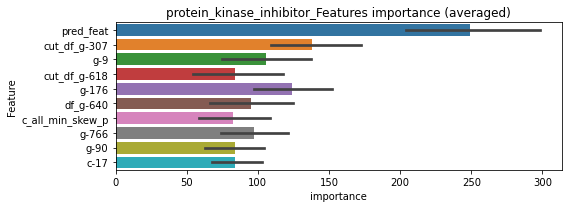

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000246246	valid_1's binary_logloss: 0.00141052
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000376902	valid_1's binary_logloss: 0.00464145
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000408924	valid_1's binary_logloss: 0.00175839
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000237348	valid_1's binary_logloss: 0.00165419


protein_kinase_inhibitor logloss: 0.002368190580052121


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154534	valid_1's binary_logloss: 0.00895712
[600]	training's binary_logloss: 0.000409399	valid_1's binary_logloss: 0.00655498
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000404756	valid_1's binary_logloss: 0.00655044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156304	valid_1's binary_logloss: 0.00691826
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000446143	valid_1's binary_logloss: 0.00435361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162608	valid_1's binary_logloss: 0.00294823
[600]	training's binary_logloss: 0.000422674	valid_1's binary_logloss: 0.0010401
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000411101	valid_1's binary_logloss: 0.00102063
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0022306, Threshold: 0.0072123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00505, conf_1:0.00938
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0072123
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0572123
threshold: 0.0572123, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627546	valid_1's binary_logloss: 0.00166238
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000217082	valid_1's binary_logloss: 0.000956971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000610127	valid_1's binary_logloss: 0.00289518
[600]	training's binary_logloss: 0.000179913	valid_1's binary_logloss: 0.00232371
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000171837	valid_1's binary_logloss: 0.00228342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616231	valid_1's binary_logloss: 0.0018274
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000300474	valid_1's binary_logloss: 0.0014137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621279	valid_1's binary_logloss: 0.00106

2 / 3 AUC score:1.000
y_Threshold: 0.5919754, Threshold: 0.0572123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0469613 Vs.target_rate: 0.00101
Num_p_label: 187.0, conf_0:0.04577, conf_1:0.06865
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_1: 0.0572123
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_2: 0.1072123
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_3: 0.1572123
Num_p_label: 187.0, Expected: 4.0, Adj_threshold_4: 0.2072123
Num_p_label: 186.0, Expected: 4.0, Adj_threshold_5: 0.2572123


Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000149775	valid_1's binary_logloss: 0.0004316


Num_p_label: 185.0, Expected: 4.0, Adj_threshold_6: 0.3072123
Num_p_label: 182.0, Expected: 4.0, Adj_threshold_7: 0.3572123
Num_p_label: 161.0, Expected: 4.0, Adj_threshold_8: 0.4072123
Num_p_label: 136.0, Expected: 4.0, Adj_threshold_9: 0.4572123
Num_p_label: 106.0, Expected: 4.0, Adj_threshold_10: 0.5072123
threshold: 0.5572123, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627652	valid_1's binary_logloss: 0.00170557
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000225411	valid_1's binary_logloss: 0.00101066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000610396	valid_1's binary_logloss: 0.00309291
[600]	training's binary_logloss: 0.000180181	valid_1's binary_logloss: 0.00252907
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000173278	valid_1's binary_logloss: 0.00247826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616112	valid_1's binary_logloss: 0.00185021
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000300741	valid_1's binary_logloss: 0.00141931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627673	valid_1's binary_logloss: 0.0009

3 / 3 AUC score:1.000
y_Threshold: 0.6206125, Threshold: 0.5572123, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000152427	valid_1's binary_logloss: 0.000325558


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0180814 Vs.target_rate: 0.00101
Num_p_label: 72.0, conf_0:0.50000, conf_1:0.61293
Num_p_label: 72.0, Expected: 4.0, Adj_threshold_1: 0.5572123
Num_p_label: 51.0, Expected: 4.0, Adj_threshold_2: 0.6072123
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_3: 0.6572123
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_4: 0.7072123
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.7572123
threshold: 0.7572123, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


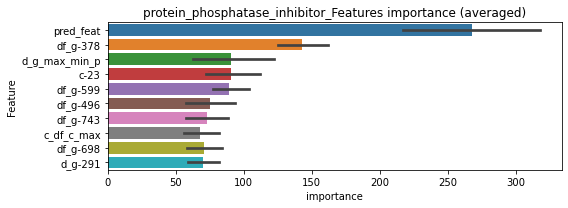

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000219091	valid_1's binary_logloss: 0.00106432
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00023657	valid_1's binary_logloss: 0.00321583
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000265234	valid_1's binary_logloss: 0.00124402
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185079	valid_1's binary_logloss: 0.000454349
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.000168583	valid_1's binary_logloss: 0.000430511


protein_phosphatase_inhibitor logloss: 0.00149225635326889


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278
target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109709	valid_1's binary_logloss: 0.0782895
[600]	training's binary_logloss: 0.00168858	valid_1's binary_logloss: 0.063907
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00160118	valid_1's binary_logloss: 0.0638112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112192	valid_1's binary_logloss: 0.0671408
[600]	training's binary_logloss: 0.00175956	valid_1's binary_logloss: 0.0504227
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.0017008	valid_1's binary_logloss: 0.0501716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130967	valid_1's binary_logloss: 0.0633667
[600]	training's binary_logloss: 0.00191869	valid_1's binary_logloss: 0.0499485
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00131384	valid_1's binary_logloss: 0.04901

1 / 3 AUC score:0.996
y_Threshold: 0.0135791, Threshold: 0.0673775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, conf_0:0.04716, conf_1:0.08759
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0673775
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_2: 0.1173775
Num_p_label: 21.0, Expected: 17.2, Adj_threshold_3: 0.1673775
threshold: 0.1673775, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149021	valid_1's binary_logloss: 0.00683448
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.0003073	valid_1's binary_logloss: 0.00488723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147181	valid_1's binary_logloss: 0.00274945
[600]	training's binary_logloss: 0.000245227	valid_1's binary_logloss: 0.000449708
[900]	training's binary_logloss: 0.000167501	valid_1's binary_logloss: 0.000276201
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000162366	valid_1's binary_logloss: 0.000265668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149218	valid_1's binary_logloss: 0.00475188
[600]	training's binary_logloss: 0.000242975	valid_1's binary_logloss: 0.0030722
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000175899	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.7412011, Threshold: 0.1673775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0620291 Vs.target_rate: 0.00433
Num_p_label: 247.0, conf_0:0.13390, conf_1:0.20085
Num_p_label: 247.0, Expected: 17.2, Adj_threshold_1: 0.1673775
Num_p_label: 243.0, Expected: 17.2, Adj_threshold_2: 0.2173775
Num_p_label: 243.0, Expected: 17.2, Adj_threshold_3: 0.2673775
Num_p_label: 243.0, Expected: 17.2, Adj_threshold_4: 0.3173775
Num_p_label: 242.0, Expected: 17.2, Adj_threshold_5: 0.3673775
Num_p_label: 237.0, Expected: 17.2, Adj_threshold_6: 0.4173775
Num_p_label: 237.0, Expected: 17.2, Adj_threshold_7: 0.4673775
Num_p_label: 236.0, Expected: 17.2, Adj_threshold_8: 0.5173775
Num_p_label: 235.0, Expected: 17.2, Adj_threshold_9: 0.5673775
Num_p_label: 233.0, Expected: 17.2, Adj_threshold_10: 0.6173775
threshold: 0.6673775, positive_p_label: 232.0/3982, p_label_rate: 0.0582622
positive_y_label: 640.0/3771, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014874	valid_1's binary_logloss: 0.0057846
[600]	training's binary_logloss: 0.000253291	valid_1's binary_logloss: 0.00311191
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000229658	valid_1's binary_logloss: 0.00302126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157033	valid_1's binary_logloss: 0.00564613
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000723894	valid_1's binary_logloss: 0.00398181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152544	valid_1's binary_logloss: 0.00789996
[600]	training's binary_logloss: 0.000250131	valid_1's binary_logloss: 0.00579157
[900]	training's binary_logloss: 0.000176184	valid_1's binary_logloss: 0.0056055
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000173797	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.5604653, Threshold: 0.6673775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0323958 Vs.target_rate: 0.00433
Num_p_label: 129.0, conf_0:0.50000, conf_1:0.73412
Num_p_label: 129.0, Expected: 17.2, Adj_threshold_1: 0.6673775
Num_p_label: 100.0, Expected: 17.2, Adj_threshold_2: 0.7173775
Num_p_label: 69.0, Expected: 17.2, Adj_threshold_3: 0.7673775
threshold: 0.7673775, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 637.0/3765, y_label_rate: 0.1691899


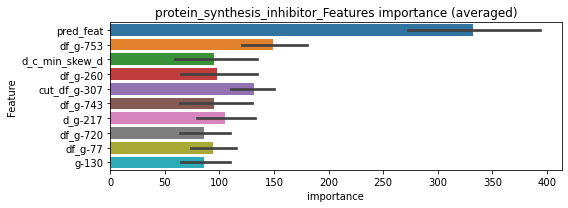

len(train_index) : 2823
len(valid_index) : 942
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000220942	valid_1's binary_logloss: 0.000387927
Early stopping, best iteration is:
[1856]	training's binary_logloss: 0.00017918	valid_1's binary_logloss: 0.000288577


len(train_index) : 2824
len(valid_index) : 941
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 3/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000545516	valid_1's binary_logloss: 0.00368817
Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 4/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000487267	valid_1's binary_logloss: 0.00574394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000223455	valid_1's binary_logloss: 0.00306952
Early stopping, best iteration is:
[1967]	training's binary_logloss: 0.000178935	valid_1's binary_logloss: 0.00294926


protein_synthesis_inhibitor logloss: 0.0031668961025705213


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143789	valid_1's binary_logloss: 0.00418854
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000443195	valid_1's binary_logloss: 0.00243438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141517	valid_1's binary_logloss: 0.00661183
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000391686	valid_1's binary_logloss: 0.00384228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147131	valid_1's binary_logloss: 0.00236175
[600]	training's binary_logloss: 0.000388288	valid_1's binary_logloss: 0.000730059
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000388288	valid_1's binary_logloss: 0.000730059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144721	valid_1's binary_logloss: 0.002610

1 / 3 AUC score:1.000
y_Threshold: 0.0020130, Threshold: 0.0090580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00634, conf_1:0.01178
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0090580
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0590580
threshold: 0.0590580, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000640699	valid_1's binary_logloss: 0.00117243
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000204244	valid_1's binary_logloss: 0.000627929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00062443	valid_1's binary_logloss: 0.00234143
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000190649	valid_1's binary_logloss: 0.00164193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0006102	valid_1's binary_logloss: 0.00136038
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000293731	valid_1's binary_logloss: 0.000919278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000622232	valid_1's binary_logloss: 0.000682546
[600]	training's binary_logloss: 0.000179518	valid_1's binary_logloss: 0.0001

2 / 3 AUC score:1.000
y_Threshold: 0.4865804, Threshold: 0.0590580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0632848 Vs.target_rate: 0.00080
Num_p_label: 252.0, conf_0:0.04725, conf_1:0.07087
Num_p_label: 252.0, Expected: 3.2, Adj_threshold_1: 0.0590580
Num_p_label: 251.0, Expected: 3.2, Adj_threshold_2: 0.1090580
Num_p_label: 251.0, Expected: 3.2, Adj_threshold_3: 0.1590580
Num_p_label: 250.0, Expected: 3.2, Adj_threshold_4: 0.2090580
Num_p_label: 246.0, Expected: 3.2, Adj_threshold_5: 0.2590580
Num_p_label: 241.0, Expected: 3.2, Adj_threshold_6: 0.3090580
Num_p_label: 222.0, Expected: 3.2, Adj_threshold_7: 0.3590580
Num_p_label: 202.0, Expected: 3.2, Adj_threshold_8: 0.4090580
Num_p_label: 169.0, Expected: 3.2, Adj_threshold_9: 0.4590580
Num_p_label: 140.0, Expected: 3.2, Adj_threshold_10: 0.5090580
threshold: 0.5590580, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 657.0/3810, y_label_rate: 0.1724409

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000639007	valid_1's binary_logloss: 0.00144517
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000204926	valid_1's binary_logloss: 0.000808831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00062434	valid_1's binary_logloss: 0.00229401
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000317579	valid_1's binary_logloss: 0.00193263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626731	valid_1's binary_logloss: 0.00649123
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000547843	valid_1's binary_logloss: 0.00629411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000622346	valid_1's binary_logloss: 0.000683468
[600]	training's binary_logloss: 0.000179488	valid_1's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.5800014, Threshold: 0.5590580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0185836 Vs.target_rate: 0.00080
Num_p_label: 74.0, conf_0:0.50000, conf_1:0.61496
Num_p_label: 74.0, Expected: 3.2, Adj_threshold_1: 0.5590580
Num_p_label: 47.0, Expected: 3.2, Adj_threshold_2: 0.6090580
Num_p_label: 29.0, Expected: 3.2, Adj_threshold_3: 0.6590580
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_4: 0.7090580
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_5: 0.7590580
threshold: 0.7590580, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


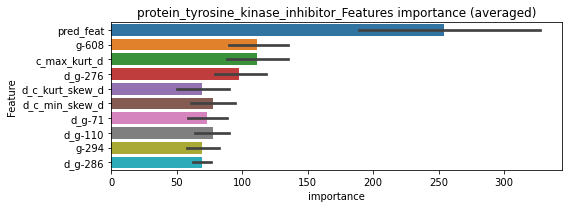

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000243485	valid_1's binary_logloss: 0.000864845
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000187883	valid_1's binary_logloss: 0.000977862
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[152]	training's binary_logloss: 0.000991641	valid_1's binary_logloss: 0.0107079
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000183484	valid_1's binary_logloss: 0.000172858
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.000153646	valid_1's binary_logloss: 0.000133241


protein_tyrosine_kinase_inhibitor logloss: 0.0031722028769192003


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509145	valid_1's binary_logloss: 0.0363008
[600]	training's binary_logloss: 0.000902458	valid_1's binary_logloss: 0.0268871
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000669919	valid_1's binary_logloss: 0.0259571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533661	valid_1's binary_logloss: 0.0190495
[600]	training's binary_logloss: 0.000938771	valid_1's binary_logloss: 0.00843651
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000644682	valid_1's binary_logloss: 0.0074634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538223	valid_1's binary_logloss: 0.015195
[600]	training's binary_logloss: 0.000962421	valid_1's binary_logloss: 0.00691204
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000711961	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0055140, Threshold: 0.0163587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01145, conf_1:0.02127
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0163587
Num_p_label: 3.0, Expected: 9.4, Adj_threshold_2: 0.0663587
threshold: 0.0663587, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113023	valid_1's binary_logloss: 0.00579755
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000294304	valid_1's binary_logloss: 0.00429653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115179	valid_1's binary_logloss: 0.00157653
[600]	training's binary_logloss: 0.00022961	valid_1's binary_logloss: 0.000275395
[900]	training's binary_logloss: 0.000170867	valid_1's binary_logloss: 0.000180371
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000167195	valid_1's binary_logloss: 0.000174286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116548	valid_1's binary_logloss: 0.0021975
[600]	training's binary_logloss: 0.000227197	valid_1's binary_logloss: 0.00137513
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000219714	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.5678063, Threshold: 0.0663587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0487192 Vs.target_rate: 0.00235
Num_p_label: 194.0, conf_0:0.05309, conf_1:0.07963
Num_p_label: 194.0, Expected: 9.4, Adj_threshold_1: 0.0663587
Num_p_label: 194.0, Expected: 9.4, Adj_threshold_2: 0.1163587
Num_p_label: 193.0, Expected: 9.4, Adj_threshold_3: 0.1663587
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_4: 0.2163587
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_5: 0.2663587
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_6: 0.3163587
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_7: 0.3663587
Num_p_label: 192.0, Expected: 9.4, Adj_threshold_8: 0.4163587
Num_p_label: 191.0, Expected: 9.4, Adj_threshold_9: 0.4663587
Num_p_label: 188.0, Expected: 9.4, Adj_threshold_10: 0.5163587
threshold: 0.5663587, positive_p_label: 176.0/3982, p_label_rate: 0.0441989
positive_y_label: 654.0/3803, y_label_rate: 0.1719695

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116157	valid_1's binary_logloss: 0.00425149
[600]	training's binary_logloss: 0.000236845	valid_1's binary_logloss: 0.0028326
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000222469	valid_1's binary_logloss: 0.00280085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116877	valid_1's binary_logloss: 0.00356022
[600]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.00250241
[900]	training's binary_logloss: 0.000176816	valid_1's binary_logloss: 0.00240103
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000174104	valid_1's binary_logloss: 0.00239597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011798	valid_1's binary_logloss: 0.0054384
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000365025	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.5825384, Threshold: 0.5663587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0233551 Vs.target_rate: 0.00235
Num_p_label: 93.0, conf_0:0.50000, conf_1:0.62299
Num_p_label: 93.0, Expected: 9.4, Adj_threshold_1: 0.5663587
Num_p_label: 49.0, Expected: 9.4, Adj_threshold_2: 0.6163587
Num_p_label: 28.0, Expected: 9.4, Adj_threshold_3: 0.6663587
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_4: 0.7163587


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000295663	valid_1's binary_logloss: 0.00165788


threshold: 0.7163587, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


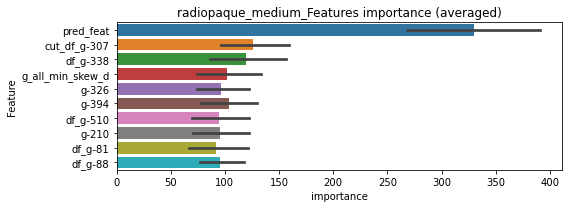

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 radiopaque_medium=================================


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000362119	valid_1's binary_logloss: 0.00254547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00025575	valid_1's binary_logloss: 0.00137367
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000433384	valid_1's binary_logloss: 0.00327651
Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.003148172911768252


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000844525	valid_1's binary_logloss: 0.00539457
neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266
target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.037001	valid_1's binary_logloss: 0.211412
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.0140188	valid_1's binary_logloss: 0.200854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0354514	valid_1's binary_logloss: 0.192356
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.0225137	valid_1's binary_logloss: 0.185908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0361501	valid_1's binary_logloss: 0.197874
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.0218851	valid_1's binary_logloss: 0.194002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0342423	valid_1's binary_logloss: 0.207294
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.0137556	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.934
y_Threshold: 0.0697301, Threshold: 0.3578145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 333 → Positive_corect_labels: 552/3586
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, conf_0:0.25047, conf_1:0.46516
threshold: 0.3578145, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 552.0/3586, y_label_rate: 0.1539320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193462	valid_1's binary_logloss: 0.00649812
[600]	training's binary_logloss: 0.000287199	valid_1's binary_logloss: 0.00258154
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000200237	valid_1's binary_logloss: 0.00224072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208621	valid_1's binary_logloss: 0.00727231
[600]	training's binary_logloss: 0.000293739	valid_1's binary_logloss: 0.00363658
[900]	training's binary_logloss: 0.000192513	valid_1's binary_logloss: 0.00332051
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000193161	valid_1's binary_logloss: 0.00331965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194442	valid_1's binary_logloss: 0.0125013
[600]	training's binary_logloss: 0.000285753	valid_1's binary_logloss: 0.0075361
[900]	training

2 / 3 AUC score:1.000
y_Threshold: 0.4021182, Threshold: 0.3578145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 549.0/3580
p_label_rate: 0.0873933 Vs.target_rate: 0.00936
Num_p_label: 348.0, conf_0:0.28625, conf_1:0.42938


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000327563	valid_1's binary_logloss: 0.00231342


Num_p_label: 348.0, Expected: 37.3, Adj_threshold_1: 0.3578145
Num_p_label: 341.0, Expected: 37.3, Adj_threshold_2: 0.4078145
Num_p_label: 335.0, Expected: 37.3, Adj_threshold_3: 0.4578145
Num_p_label: 333.0, Expected: 37.3, Adj_threshold_4: 0.5078145
Num_p_label: 329.0, Expected: 37.3, Adj_threshold_5: 0.5578145
Num_p_label: 325.0, Expected: 37.3, Adj_threshold_6: 0.6078145
Num_p_label: 323.0, Expected: 37.3, Adj_threshold_7: 0.6578145
Num_p_label: 321.0, Expected: 37.3, Adj_threshold_8: 0.7078145
Num_p_label: 319.0, Expected: 37.3, Adj_threshold_9: 0.7578145
threshold: 0.7578145, positive_p_label: 319.0/3982, p_label_rate: 0.0801105
positive_y_label: 549.0/3580, y_label_rate: 0.1533520
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188303	valid_1's binary_logloss: 0.00755546
[600]	training's binary_logloss: 0.000260428	valid_1's binary_logloss: 0.00448323
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000236926	valid_1's binary_logloss: 0.00443774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201282	valid_1's binary_logloss: 0.00586755
[600]	training's binary_logloss: 0.000282041	valid_1's binary_logloss: 0.00293726
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000252709	valid_1's binary_logloss: 0.00289467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199663	valid_1's binary_logloss: 0.00471938
[600]	training's binary_logloss: 0.00028242	valid_1's binary_logloss: 0.00077929
[900]	training's binary_logloss: 0.000181686	valid_1's binary_logloss: 0.000476373
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.1557802, Threshold: 0.7578145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 547.0/3576
p_label_rate: 0.0833752 Vs.target_rate: 0.00936
Num_p_label: 332.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 332.0, Expected: 37.3, Adj_threshold_1: 0.7578145
threshold: 0.7578145, positive_p_label: 332.0/3982, p_label_rate: 0.0833752
positive_y_label: 547.0/3576, y_label_rate: 0.1529642


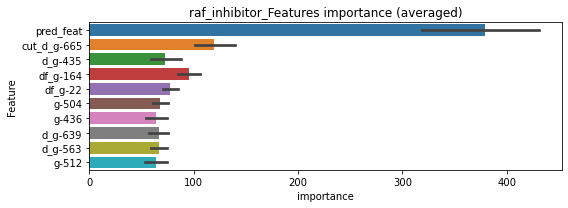

len(train_index) : 2682
len(valid_index) : 894
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159343	valid_1's binary_logloss: 0.000379551
[2000]	training's binary_logloss: 0.000117503	valid_1's binary_logloss: 0.000280468
[3000]	training's binary_logloss: 0.000109159	valid_1's binary_logloss: 0.000260496
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.000107435	valid_1's binary_logloss: 0.000256183


len(train_index) : 2682
len(valid_index) : 894
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159279	valid_1's binary_logloss: 0.000401684
[2000]	training's binary_logloss: 0.000117571	valid_1's binary_logloss: 0.000297107
[3000]	training's binary_logloss: 0.00010915	valid_1's binary_logloss: 0.000275653
Early stopping, best iteration is:
[3178]	training's binary_logloss: 0.000108368	valid_1's binary_logloss: 0.000273506


len(train_index) : 2682
len(valid_index) : 894
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159198	valid_1's binary_logloss: 0.000409551
[2000]	training's binary_logloss: 0.000117514	valid_1's binary_logloss: 0.000302899
[3000]	training's binary_logloss: 0.00010914	valid_1's binary_logloss: 0.000281248
Early stopping, best iteration is:
[3169]	training's binary_logloss: 0.000108399	valid_1's binary_logloss: 0.00027915


len(train_index) : 2682
len(valid_index) : 894
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212421	valid_1's binary_logloss: 0.000389065
Early stopping, best iteration is:
[1867]	training's binary_logloss: 0.000166838	valid_1's binary_logloss: 0.000287016


raf_inhibitor logloss: 0.0002739639404217535


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754218	valid_1's binary_logloss: 0.00239776
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000301889	valid_1's binary_logloss: 0.00146634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000747025	valid_1's binary_logloss: 0.00257288
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000300127	valid_1's binary_logloss: 0.00162228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000749119	valid_1's binary_logloss: 0.00211726
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00028693	valid_1's binary_logloss: 0.00145149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000766515	valid_1's binary_logloss: 0.00250444


1 / 3 AUC score:1.000
y_Threshold: 0.0012824, Threshold: 0.0206221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000304612	valid_1's binary_logloss: 0.00157604


Num_p_label: 40.0, conf_0:0.01444, conf_1:0.02681
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0206221
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0706221
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.1206221
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.1706221
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.2206221
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.2706221
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3206221
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.3706221
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.4206221
threshold: 0.4206221, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408952	valid_1's binary_logloss: 0.00176928
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000180104	valid_1's binary_logloss: 0.00151755
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405365	valid_1's binary_logloss: 0.00164621
[600]	training's binary_logloss: 0.000159535	valid_1's binary_logloss: 0.00131199
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000141142	valid_1's binary_logloss: 0.00128492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00041778	valid_1's binary_logloss: 0.000368723
[600]	training's binary_logloss: 0.000159959	valid_1's binary_logloss: 0.000123039
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000145016	valid_1's binary_logloss: 0.000106651
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.5916722, Threshold: 0.4206221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0404319 Vs.target_rate: 0.00050
Num_p_label: 161.0, conf_0:0.33650, conf_1:0.50475
Num_p_label: 161.0, Expected: 2.0, Adj_threshold_1: 0.4206221
Num_p_label: 137.0, Expected: 2.0, Adj_threshold_2: 0.4706221
Num_p_label: 127.0, Expected: 2.0, Adj_threshold_3: 0.5206221
Num_p_label: 110.0, Expected: 2.0, Adj_threshold_4: 0.5706221
Num_p_label: 92.0, Expected: 2.0, Adj_threshold_5: 0.6206221
Num_p_label: 78.0, Expected: 2.0, Adj_threshold_6: 0.6706221
Num_p_label: 67.0, Expected: 2.0, Adj_threshold_7: 0.7206221
Num_p_label: 55.0, Expected: 2.0, Adj_threshold_8: 0.7706221


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000146872	valid_1's binary_logloss: 0.000788602


threshold: 0.7706221, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415571	valid_1's binary_logloss: 0.00167548
[600]	training's binary_logloss: 0.000165302	valid_1's binary_logloss: 0.00122981
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000148605	valid_1's binary_logloss: 0.00121048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405715	valid_1's binary_logloss: 0.00175944
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000174871	valid_1's binary_logloss: 0.00149741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412055	valid_1's binary_logloss: 0.000376604
[600]	training's binary_logloss: 0.000161661	valid_1's binary_logloss: 0.000128894
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00014572	valid_1's binary_logloss: 0.000111081
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.5904134, Threshold: 0.7706221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 45.0, Expected: 2.0, Adj_threshold_1: 0.7706221
threshold: 0.7706221, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


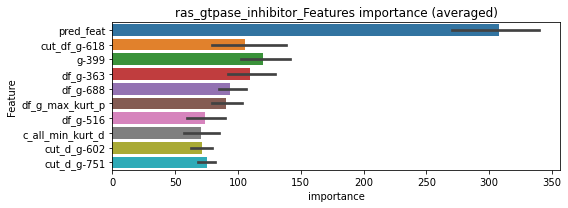

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000174547	valid_1's binary_logloss: 0.00107378
[2000]	training's binary_logloss: 0.000149662	valid_1's binary_logloss: 0.00104132
Early stopping, best iteration is:
[2025]	training's binary_logloss: 0.000149416	valid_1's binary_logloss: 0.00104084


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171155	valid_1's binary_logloss: 0.000890125
Early stopping, best iteration is:
[1815]	training's binary_logloss: 0.00014729	valid_1's binary_logloss: 0.000862351


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173093	valid_1's binary_logloss: 0.000141579
[2000]	training's binary_logloss: 0.000146159	valid_1's binary_logloss: 0.000111848
Early stopping, best iteration is:
[2036]	training's binary_logloss: 0.000145727	valid_1's binary_logloss: 0.000111363


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000169259	valid_1's binary_logloss: 0.00041379
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.00016638	valid_1's binary_logloss: 0.000409485


ras_gtpase_inhibitor logloss: 0.0006062856360361998


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062942	valid_1's binary_logloss: 0.0376133
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00120327	valid_1's binary_logloss: 0.0250672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660218	valid_1's binary_logloss: 0.0252813
[600]	training's binary_logloss: 0.0011019	valid_1's binary_logloss: 0.0120307
[900]	training's binary_logloss: 0.000677976	valid_1's binary_logloss: 0.0105207
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000677976	valid_1's binary_logloss: 0.0105207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675015	valid_1's binary_logloss: 0.0368038
[600]	training's binary_logloss: 0.00110807	valid_1's binary_logloss: 0.0269002
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00104705	valid_1's binary_logloss: 0.

1 / 3 AUC score:1.000
y_Threshold: 0.0095421, Threshold: 0.1466211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.10263, conf_1:0.19061
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1466211
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_2: 0.1966211
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_3: 0.2466211
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2966211
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.3466211
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.3966211
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.4466211
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.4966211
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.5466211
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.5966211
threshold: 0.5966211, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121971	valid_1's binary_logloss: 0.00865101
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000256726	valid_1's binary_logloss: 0.00729482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126903	valid_1's binary_logloss: 0.0026214
[600]	training's binary_logloss: 0.000235665	valid_1's binary_logloss: 0.000801292
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000179526	valid_1's binary_logloss: 0.000656958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127599	valid_1's binary_logloss: 0.00676545
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000593667	valid_1's binary_logloss: 0.00546609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125647	valid_1's binary_logloss: 0.0018035

2 / 3 AUC score:1.000
y_Threshold: 0.4306634, Threshold: 0.5966211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0263687 Vs.target_rate: 0.00281
Num_p_label: 105.0, conf_0:0.47730, conf_1:0.71595
Num_p_label: 105.0, Expected: 11.2, Adj_threshold_1: 0.5966211
Num_p_label: 82.0, Expected: 11.2, Adj_threshold_2: 0.6466211
Num_p_label: 70.0, Expected: 11.2, Adj_threshold_3: 0.6966211
Num_p_label: 62.0, Expected: 11.2, Adj_threshold_4: 0.7466211
Num_p_label: 54.0, Expected: 11.2, Adj_threshold_5: 0.7966211
threshold: 0.7966211, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122652	valid_1's binary_logloss: 0.00363268
[600]	training's binary_logloss: 0.000238026	valid_1's binary_logloss: 0.00195319
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000220826	valid_1's binary_logloss: 0.00192313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122199	valid_1's binary_logloss: 0.00300805
[600]	training's binary_logloss: 0.000234627	valid_1's binary_logloss: 0.000959006
[900]	training's binary_logloss: 0.00017208	valid_1's binary_logloss: 0.000766645
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000169123	valid_1's binary_logloss: 0.000759304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123263	valid_1's binary_logloss: 0.00614975
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000615141	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.3234658, Threshold: 0.7966211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0148167 Vs.target_rate: 0.00281
Num_p_label: 59.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 59.0, Expected: 11.2, Adj_threshold_1: 0.7966211
threshold: 0.7966211, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 649.0/3789, y_label_rate: 0.1712853


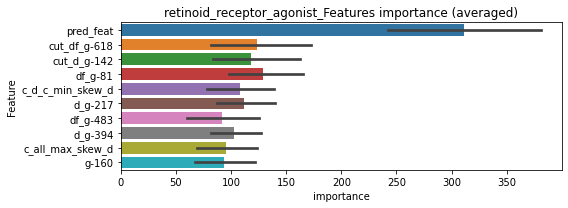

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000378883	valid_1's binary_logloss: 0.00467191
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00021239	valid_1's binary_logloss: 0.000549442
Early stopping, best iteration is:
[1803]	training's binary_logloss: 0.000174389	valid_1's binary_logloss: 0.00047678


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000345592	valid_1's binary_logloss: 0.00519982
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207262	valid_1's binary_logloss: 0.00109612
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000205005	valid_1's binary_logloss: 0.00108999


retinoid_receptor_agonist logloss: 0.002867946725448365


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000384804	valid_1's binary_logloss: 0.000770156
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000192956	valid_1's binary_logloss: 0.000478467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038526	valid_1's binary_logloss: 0.00100963
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00019254	valid_1's binary_logloss: 0.000618801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388729	valid_1's binary_logloss: 0.000505118
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00019618	valid_1's binary_logloss: 0.000267684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389895	valid_1's binary_logloss: 0.000442134


1 / 3 AUC score:1.000
y_Threshold: 0.0005748, Threshold: 0.0024774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00173, conf_1:0.00322
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0024774
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0524774


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00019838	valid_1's binary_logloss: 0.00023698


threshold: 0.0524774, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290007	valid_1's binary_logloss: 0.000556049
[600]	training's binary_logloss: 0.000137175	valid_1's binary_logloss: 0.000375997
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000131606	valid_1's binary_logloss: 0.000369605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291151	valid_1's binary_logloss: 0.000489386
[600]	training's binary_logloss: 0.000136615	valid_1's binary_logloss: 0.000312156
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000134495	valid_1's binary_logloss: 0.000310212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000285887	valid_1's binary_logloss: 0.000261409
[600]	training's binary_logloss: 0.000134464	valid_1's binary_logloss: 0.000114836
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000125232	val

2 / 3 AUC score:1.000
y_Threshold: 0.2513436, Threshold: 0.0524774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0504771 Vs.target_rate: 0.00025
Num_p_label: 201.0, conf_0:0.04198, conf_1:0.06297
Num_p_label: 201.0, Expected: 1.0, Adj_threshold_1: 0.0524774
Num_p_label: 109.0, Expected: 1.0, Adj_threshold_2: 0.1024774
Num_p_label: 54.0, Expected: 1.0, Adj_threshold_3: 0.1524774
Num_p_label: 33.0, Expected: 1.0, Adj_threshold_4: 0.2024774
Num_p_label: 21.0, Expected: 1.0, Adj_threshold_5: 0.2524774
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_6: 0.3024774
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_7: 0.3524774
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4024774
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_9: 0.4524774


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000127332	valid_1's binary_logloss: 0.000398036


threshold: 0.4524774, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290522	valid_1's binary_logloss: 0.000515261
[600]	training's binary_logloss: 0.00013735	valid_1's binary_logloss: 0.000343553
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000139484	valid_1's binary_logloss: 0.000343008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000290426	valid_1's binary_logloss: 0.000518175
[600]	training's binary_logloss: 0.000136789	valid_1's binary_logloss: 0.000334835
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000127132	valid_1's binary_logloss: 0.000324716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000287514	valid_1's binary_logloss: 0.000259089
[600]	training's binary_logloss: 0.000134824	valid_1's binary_logloss: 0.000113974
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000124957	vali

3 / 3 AUC score:1.000
y_Threshold: 0.2515974, Threshold: 0.4524774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.40723, conf_1:0.49773
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.4524774
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.5024774
threshold: 0.5024774, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000128186	valid_1's binary_logloss: 0.000403126


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


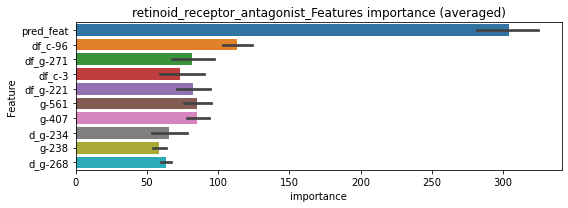

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000161287	valid_1's binary_logloss: 0.000342895
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000146775	valid_1's binary_logloss: 0.000467989
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.00014568	valid_1's binary_logloss: 0.000466361


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014652	valid_1's binary_logloss: 0.000129642
[2000]	training's binary_logloss: 0.00012572	valid_1's binary_logloss: 0.000107577


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.000122187	valid_1's binary_logloss: 0.00010384
Training until validation scores don't improve for 30 rounds


retinoid_receptor_antagonist logloss: 0.0003309388576645819


Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000149467	valid_1's binary_logloss: 0.000409939
neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283
target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272869	valid_1's binary_logloss: 0.012527
[600]	training's binary_logloss: 0.000575889	valid_1's binary_logloss: 0.00617852
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000487	valid_1's binary_logloss: 0.00591477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027059	valid_1's binary_logloss: 0.00878655
[600]	training's binary_logloss: 0.000580376	valid_1's binary_logloss: 0.00360299
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000490686	valid_1's binary_logloss: 0.00327853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029029	valid_1's binary_logloss: 0.00576662
[600]	training's binary_logloss: 0.000594486	valid_1's binary_logloss: 0.00181008
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000514552	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0046120, Threshold: 0.0150627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, conf_0:0.01054, conf_1:0.01958
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0150627
Num_p_label: 5.0, Expected: 5.9, Adj_threshold_2: 0.0650627
threshold: 0.0650627, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824656	valid_1's binary_logloss: 0.00344872
[600]	training's binary_logloss: 0.000202046	valid_1's binary_logloss: 0.00242117
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000207614	valid_1's binary_logloss: 0.00241624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000827414	valid_1's binary_logloss: 0.00120088
[600]	training's binary_logloss: 0.000201483	valid_1's binary_logloss: 0.000401074
[900]	training's binary_logloss: 0.000159512	valid_1's binary_logloss: 0.000343292
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000158506	valid_1's binary_logloss: 0.000341105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844105	valid_1's binary_logloss: 0.00133815
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000212359	valid_1'

2 / 3 AUC score:1.000
y_Threshold: 0.5535185, Threshold: 0.0650627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0404319 Vs.target_rate: 0.00147
Num_p_label: 161.0, conf_0:0.05205, conf_1:0.07808
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_1: 0.0650627
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_2: 0.1150627
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_3: 0.1650627
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_4: 0.2150627
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_5: 0.2650627
Num_p_label: 161.0, Expected: 5.9, Adj_threshold_6: 0.3150627
Num_p_label: 160.0, Expected: 5.9, Adj_threshold_7: 0.3650627
Num_p_label: 157.0, Expected: 5.9, Adj_threshold_8: 0.4150627
Num_p_label: 145.0, Expected: 5.9, Adj_threshold_9: 0.4650627
Num_p_label: 126.0, Expected: 5.9, Adj_threshold_10: 0.5150627
threshold: 0.5650627, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 656.0/3807, y_label_rate: 0.1723142

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833648	valid_1's binary_logloss: 0.00367395
[600]	training's binary_logloss: 0.000200491	valid_1's binary_logloss: 0.00263
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000191508	valid_1's binary_logloss: 0.00262397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845146	valid_1's binary_logloss: 0.0011086
[600]	training's binary_logloss: 0.000202706	valid_1's binary_logloss: 0.000308993
[900]	training's binary_logloss: 0.000160478	valid_1's binary_logloss: 0.000249392
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000159344	valid_1's binary_logloss: 0.000248039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843153	valid_1's binary_logloss: 0.00231481
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000237189	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.6452128, Threshold: 0.5650627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0253641 Vs.target_rate: 0.00147
Num_p_label: 101.0, conf_0:0.50000, conf_1:0.62157
Num_p_label: 101.0, Expected: 5.9, Adj_threshold_1: 0.5650627
Num_p_label: 82.0, Expected: 5.9, Adj_threshold_2: 0.6150627
Num_p_label: 57.0, Expected: 5.9, Adj_threshold_3: 0.6650627
Num_p_label: 41.0, Expected: 5.9, Adj_threshold_4: 0.7150627
Num_p_label: 25.0, Expected: 5.9, Adj_threshold_5: 0.7650627
threshold: 0.7650627, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


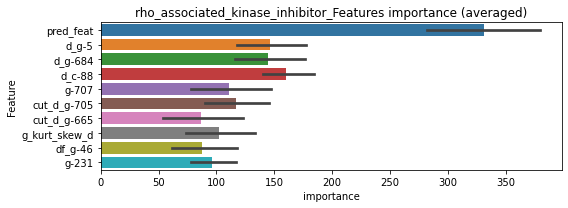

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000202023	valid_1's binary_logloss: 0.00377508
Early stopping, best iteration is:
[1571]	training's binary_logloss: 0.000173968	valid_1's binary_logloss: 0.00372297


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000220901	valid_1's binary_logloss: 0.000487757


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000316193	valid_1's binary_logloss: 0.00108624
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000200754	valid_1's binary_logloss: 0.000593004
Early stopping, best iteration is:
[1522]	training's binary_logloss: 0.000174017	valid_1's binary_logloss: 0.000540489


rho_associated_kinase_inhibitor logloss: 0.0014625376849201005


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030977	valid_1's binary_logloss: 0.0206746
[600]	training's binary_logloss: 0.000612431	valid_1's binary_logloss: 0.0130423
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000532767	valid_1's binary_logloss: 0.0127241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317348	valid_1's binary_logloss: 0.00848711
[600]	training's binary_logloss: 0.000626132	valid_1's binary_logloss: 0.00350943
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000533306	valid_1's binary_logloss: 0.00331438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316473	valid_1's binary_logloss: 0.0097417
[600]	training's binary_logloss: 0.000623757	valid_1's binary_logloss: 0.00367094
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000530037	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0049057, Threshold: 0.0258520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01810, conf_1:0.03361
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0258520
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_2: 0.0758520
threshold: 0.0758520, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000853723	valid_1's binary_logloss: 0.00535468
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000287649	valid_1's binary_logloss: 0.00406365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000904379	valid_1's binary_logloss: 0.00289298
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000354544	valid_1's binary_logloss: 0.00248942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901891	valid_1's binary_logloss: 0.0017653
[600]	training's binary_logloss: 0.000211565	valid_1's binary_logloss: 0.0010999
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000191447	valid_1's binary_logloss: 0.00107016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000895891	valid_1's binary_logloss: 0.002849

2 / 3 AUC score:1.000
y_Threshold: 0.6088053, Threshold: 0.0758520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0502260 Vs.target_rate: 0.00155
Num_p_label: 200.0, conf_0:0.06068, conf_1:0.09102
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_1: 0.0758520
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_2: 0.1258520
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_3: 0.1758520
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_4: 0.2258520
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_5: 0.2758520
Num_p_label: 200.0, Expected: 6.2, Adj_threshold_6: 0.3258520
Num_p_label: 199.0, Expected: 6.2, Adj_threshold_7: 0.3758520
Num_p_label: 197.0, Expected: 6.2, Adj_threshold_8: 0.4258520
Num_p_label: 195.0, Expected: 6.2, Adj_threshold_9: 0.4758520
Num_p_label: 186.0, Expected: 6.2, Adj_threshold_10: 0.5258520
threshold: 0.5758520, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 654.0/3804, y_label_rate: 0.1719243

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000904101	valid_1's binary_logloss: 0.00329858
[600]	training's binary_logloss: 0.000213673	valid_1's binary_logloss: 0.00244571
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000200121	valid_1's binary_logloss: 0.00240371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915267	valid_1's binary_logloss: 0.00199966
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000314676	valid_1's binary_logloss: 0.00115058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0009028	valid_1's binary_logloss: 0.00389273
[600]	training's binary_logloss: 0.000216011	valid_1's binary_logloss: 0.0027366
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000178173	valid_1's binary_logloss: 0.00266532
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.5404305, Threshold: 0.5758520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0193370 Vs.target_rate: 0.00155
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.63344
Num_p_label: 77.0, Expected: 6.2, Adj_threshold_1: 0.5758520
Num_p_label: 49.0, Expected: 6.2, Adj_threshold_2: 0.6258520
Num_p_label: 35.0, Expected: 6.2, Adj_threshold_3: 0.6758520
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_4: 0.7258520
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.7758520
threshold: 0.7758520, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


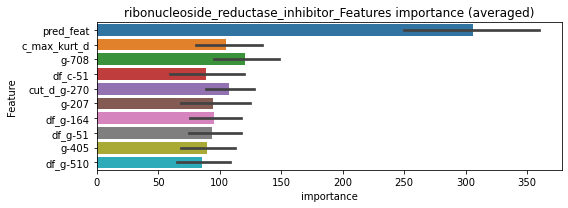

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000339788	valid_1's binary_logloss: 0.00214871
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209415	valid_1's binary_logloss: 0.00199558


len(train_index) : 2852
len(valid_index) : 950


Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000196762	valid_1's binary_logloss: 0.00197557


================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207448	valid_1's binary_logloss: 0.00169978
Early stopping, best iteration is:
[1339]	training's binary_logloss: 0.000188823	valid_1's binary_logloss: 0.00167218


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000211426	valid_1's binary_logloss: 0.000376715
Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.000191484	valid_1's binary_logloss: 0.000345655


ribonucleoside_reductase_inhibitor logloss: 0.0015362031840286461


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164455	valid_1's binary_logloss: 0.004564
[600]	training's binary_logloss: 0.000424262	valid_1's binary_logloss: 0.00202991
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000413157	valid_1's binary_logloss: 0.00200578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016243	valid_1's binary_logloss: 0.00373252
[600]	training's binary_logloss: 0.000427469	valid_1's binary_logloss: 0.00143818
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000420094	valid_1's binary_logloss: 0.00142401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165558	valid_1's binary_logloss: 0.0048983
[600]	training's binary_logloss: 0.000428973	valid_1's binary_logloss: 0.00235006
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000421523	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0023893, Threshold: 0.0129752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00908, conf_1:0.01687
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0129752
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0629752
threshold: 0.0629752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000667804	valid_1's binary_logloss: 0.00137045
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000210532	valid_1's binary_logloss: 0.00065584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000687023	valid_1's binary_logloss: 0.000931898
[600]	training's binary_logloss: 0.000194399	valid_1's binary_logloss: 0.000332613
[900]	training's binary_logloss: 0.000158298	valid_1's binary_logloss: 0.000288823
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000156607	valid_1's binary_logloss: 0.000283236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000673398	valid_1's binary_logloss: 0.00135164
[600]	training's binary_logloss: 0.00019361	valid_1's binary_logloss: 0.000799756
[900]	training's binary_logloss: 0.000160265	valid_1's binary_logloss: 0.000750509
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.5389008, Threshold: 0.0629752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0585133 Vs.target_rate: 0.00105
Num_p_label: 233.0, conf_0:0.05038, conf_1:0.07557
Num_p_label: 233.0, Expected: 4.2, Adj_threshold_1: 0.0629752
Num_p_label: 233.0, Expected: 4.2, Adj_threshold_2: 0.1129752
Num_p_label: 233.0, Expected: 4.2, Adj_threshold_3: 0.1629752
Num_p_label: 232.0, Expected: 4.2, Adj_threshold_4: 0.2129752
Num_p_label: 227.0, Expected: 4.2, Adj_threshold_5: 0.2629752
Num_p_label: 213.0, Expected: 4.2, Adj_threshold_6: 0.3129752
Num_p_label: 196.0, Expected: 4.2, Adj_threshold_7: 0.3629752
Num_p_label: 162.0, Expected: 4.2, Adj_threshold_8: 0.4129752


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000240538	valid_1's binary_logloss: 0.00170365


Num_p_label: 136.0, Expected: 4.2, Adj_threshold_9: 0.4629752
Num_p_label: 110.0, Expected: 4.2, Adj_threshold_10: 0.5129752
threshold: 0.5629752, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662109	valid_1's binary_logloss: 0.00153472
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000209066	valid_1's binary_logloss: 0.000807069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000685799	valid_1's binary_logloss: 0.000916162
[600]	training's binary_logloss: 0.00019422	valid_1's binary_logloss: 0.000320097
[900]	training's binary_logloss: 0.000158189	valid_1's binary_logloss: 0.000277246
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.0001565	valid_1's binary_logloss: 0.000271892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000668381	valid_1's binary_logloss: 0.00143409
[600]	training's binary_logloss: 0.000191997	valid_1's binary_logloss: 0.000895697
[900]	training's binary_logloss: 0.000156783	valid_1's binary_logloss: 0.000851593
Early

3 / 3 AUC score:1.000
y_Threshold: 0.7024671, Threshold: 0.5629752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0163235 Vs.target_rate: 0.00105
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.61927
Num_p_label: 65.0, Expected: 4.2, Adj_threshold_1: 0.5629752
Num_p_label: 52.0, Expected: 4.2, Adj_threshold_2: 0.6129752
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_3: 0.6629752
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_4: 0.7129752
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_5: 0.7629752
threshold: 0.7629752, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


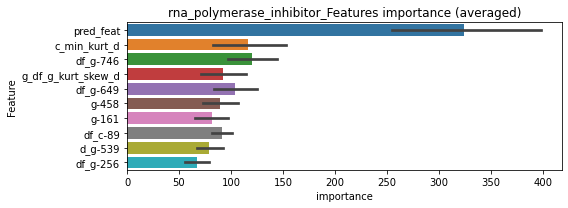

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.000597088	valid_1's binary_logloss: 0.00141949
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000197646	valid_1's binary_logloss: 0.000365311
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019428	valid_1's binary_logloss: 0.000943179
[2000]	training's binary_logloss: 0.000160722	valid_1's binary_logloss: 0.000891765
Early stopping, best iteration is:
[2211]	training's binary_logloss: 0.000158353	valid_1's binary_logloss: 0.000887992


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


rna_polymerase_inhibitor logloss: 0.002819018274333992


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.000463454	valid_1's binary_logloss: 0.00860301
neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249
target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0320297	valid_1's binary_logloss: 0.210181
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0239324	valid_1's binary_logloss: 0.208162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0321443	valid_1's binary_logloss: 0.202057
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0119985	valid_1's binary_logloss: 0.198622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330567	valid_1's binary_logloss: 0.180758
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.0108648	valid_1's binary_logloss: 0.168779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343268	valid_1's binary_logloss: 0.198669
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.0187022	valid_1's binary_logloss: 0

1 / 3 AUC score:0.938
y_Threshold: 0.0572789, Threshold: 0.3439559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 321 → Positive_corect_labels: 554/3577
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, conf_0:0.24077, conf_1:0.44714
threshold: 0.3439559, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3577, y_label_rate: 0.1548784
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191201	valid_1's binary_logloss: 0.0086878
[600]	training's binary_logloss: 0.000283008	valid_1's binary_logloss: 0.0045776
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000207396	valid_1's binary_logloss: 0.00439096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197396	valid_1's binary_logloss: 0.0040614
[600]	training's binary_logloss: 0.000288097	valid_1's binary_logloss: 0.000538418
[900]	training's binary_logloss: 0.000193216	valid_1's binary_logloss: 0.00030374
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000182671	valid_1's binary_logloss: 0.000282337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183983	valid_1's binary_logloss: 0.00495949
[600]	training's binary_logloss: 0.000282376	valid_1's binary_logloss: 0.000747816
[900]	train

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000206197	valid_1's binary_logloss: 0.010017


y_Threshold: 0.4907095, Threshold: 0.3439559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 550.0/3569
p_label_rate: 0.0901557 Vs.target_rate: 0.00991
Num_p_label: 359.0, conf_0:0.27516, conf_1:0.41275
Num_p_label: 359.0, Expected: 39.5, Adj_threshold_1: 0.3439559
Num_p_label: 355.0, Expected: 39.5, Adj_threshold_2: 0.3939559
Num_p_label: 344.0, Expected: 39.5, Adj_threshold_3: 0.4439559
Num_p_label: 330.0, Expected: 39.5, Adj_threshold_4: 0.4939559
Num_p_label: 313.0, Expected: 39.5, Adj_threshold_5: 0.5439559
Num_p_label: 299.0, Expected: 39.5, Adj_threshold_6: 0.5939559
Num_p_label: 282.0, Expected: 39.5, Adj_threshold_7: 0.6439559
Num_p_label: 275.0, Expected: 39.5, Adj_threshold_8: 0.6939559
Num_p_label: 270.0, Expected: 39.5, Adj_threshold_9: 0.7439559
Num_p_label: 266.0, Expected: 39.5, Adj_threshold_10: 0.7939559
threshold: 0.7939559, positive_p_label: 266.0/3982, p_label_rate: 0.0668006
positive_y_label: 550.0/3569, y_label_rate: 0.1541048
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177335	valid_1's binary_logloss: 0.00944591
[600]	training's binary_logloss: 0.000270381	valid_1's binary_logloss: 0.00528395
[900]	training's binary_logloss: 0.000178331	valid_1's binary_logloss: 0.00492691
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00018101	valid_1's binary_logloss: 0.00491989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173039	valid_1's binary_logloss: 0.00779643
[600]	training's binary_logloss: 0.000266655	valid_1's binary_logloss: 0.0045186
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000183736	valid_1's binary_logloss: 0.00425801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017812	valid_1's binary_logloss: 0.00465035
[600]	training's binary_logloss: 0.000274823	valid_1's binary_logloss: 0.000989617
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.2228749, Threshold: 0.7939559, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000190188	valid_1's binary_logloss: 0.00245246


Remove_noisy_data: 6 → Positive_corect_labels: 547.0/3563
p_label_rate: 0.0693119 Vs.target_rate: 0.00991
Num_p_label: 276.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 276.0, Expected: 39.5, Adj_threshold_1: 0.7939559
threshold: 0.7939559, positive_p_label: 276.0/3982, p_label_rate: 0.0693119
positive_y_label: 547.0/3563, y_label_rate: 0.1535223


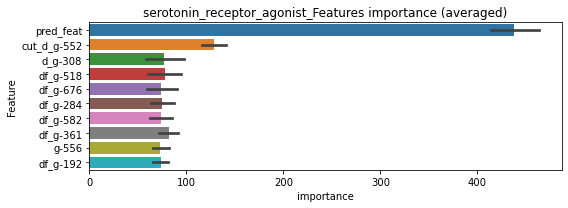

len(train_index) : 2672
len(valid_index) : 891
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159421	valid_1's binary_logloss: 0.000479928
[2000]	training's binary_logloss: 0.000117843	valid_1's binary_logloss: 0.000355795
[3000]	training's binary_logloss: 0.000109454	valid_1's binary_logloss: 0.000330233


len(train_index) : 2672
len(valid_index) : 891


Early stopping, best iteration is:
[3600]	training's binary_logloss: 0.000107672	valid_1's binary_logloss: 0.000324462


================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159597	valid_1's binary_logloss: 0.000449871
[2000]	training's binary_logloss: 0.000117848	valid_1's binary_logloss: 0.000333172
[3000]	training's binary_logloss: 0.000109385	valid_1's binary_logloss: 0.000308967


len(train_index) : 2672
len(valid_index) : 891
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[3148]	training's binary_logloss: 0.000108714	valid_1's binary_logloss: 0.00030689
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000159626	valid_1's binary_logloss: 0.000473187
[2000]	training's binary_logloss: 0.000117829	valid_1's binary_logloss: 0.000350115
[3000]	training's binary_logloss: 0.000109445	valid_1's binary_logloss: 0.000325062


len(train_index) : 2673
len(valid_index) : 890
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[3194]	training's binary_logloss: 0.000108635	valid_1's binary_logloss: 0.000322439
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.005258337208205955


Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00112935	valid_1's binary_logloss: 0.0200962
neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239
target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0605456	valid_1's binary_logloss: 0.344695
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0626052	valid_1's binary_logloss: 0.34428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0626284	valid_1's binary_logloss: 0.348596
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0569778	valid_1's binary_logloss: 0.347103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.0851156	valid_1's binary_logloss: 0.335379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0645605	valid_1's binary_logloss: 0.334998
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.0596477	valid_1's binary_logloss: 0.334374


1 / 3 AUC score:0.800
y_Threshold: 0.1297355, Threshold: 0.5286709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 643 → Positive_corect_labels: 391/3243
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, conf_0:0.37007, conf_1:0.68727
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5286709
Num_p_label: 44.0, Expected: 67.6, Adj_threshold_2: 0.5086709
Num_p_label: 47.0, Expected: 67.6, Adj_threshold_3: 0.4886709
threshold: 0.4886709, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 391.0/3243, y_label_rate: 0.1205674
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192048	valid_1's binary_logloss: 0.00885196
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000335362	valid_1's binary_logloss: 0.00455153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192361	valid_1's binary_logloss: 0.00975004
[600]	training's binary_logloss: 0.000299973	valid_1's binary_logloss: 0.00575199
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000246491	valid_1's binary_logloss: 0.00553406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001863	valid_1's binary_logloss: 0.00682201
[600]	training's binary_logloss: 0.000300668	valid_1's binary_logloss: 0.00279667
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000205102	valid_1's binary_logloss: 0.00242393
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.5539845, Threshold: 0.4886709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 388.0/3237
p_label_rate: 0.1539427 Vs.target_rate: 0.01696
Num_p_label: 613.0, conf_0:0.39094, conf_1:0.58641
Num_p_label: 613.0, Expected: 67.6, Adj_threshold_1: 0.4886709


Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000211962	valid_1's binary_logloss: 0.000966302


Num_p_label: 604.0, Expected: 67.6, Adj_threshold_2: 0.5386709
Num_p_label: 596.0, Expected: 67.6, Adj_threshold_3: 0.5886709
Num_p_label: 585.0, Expected: 67.6, Adj_threshold_4: 0.6386709
Num_p_label: 570.0, Expected: 67.6, Adj_threshold_5: 0.6886709
Num_p_label: 562.0, Expected: 67.6, Adj_threshold_6: 0.7386709
Num_p_label: 556.0, Expected: 67.6, Adj_threshold_7: 0.7886709
threshold: 0.7886709, positive_p_label: 556.0/3982, p_label_rate: 0.1396283
positive_y_label: 388.0/3237, y_label_rate: 0.1198641
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194228	valid_1's binary_logloss: 0.00812994
[600]	training's binary_logloss: 0.000303218	valid_1's binary_logloss: 0.00394771
[900]	training's binary_logloss: 0.00020481	valid_1's binary_logloss: 0.00362694
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000205445	valid_1's binary_logloss: 0.00361827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184678	valid_1's binary_logloss: 0.0117661
[600]	training's binary_logloss: 0.000300005	valid_1's binary_logloss: 0.00836135
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000277703	valid_1's binary_logloss: 0.00819059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189815	valid_1's binary_logloss: 0.00929466
[600]	training's binary_logloss: 0.000301538	valid_1's binary_logloss: 0.00557509
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.2750819, Threshold: 0.7886709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 383.0/3227
p_label_rate: 0.1423908 Vs.target_rate: 0.01696
Num_p_label: 567.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 567.0, Expected: 67.6, Adj_threshold_1: 0.7886709
threshold: 0.7886709, positive_p_label: 567.0/3982, p_label_rate: 0.1423908
positive_y_label: 383.0/3227, y_label_rate: 0.1186861


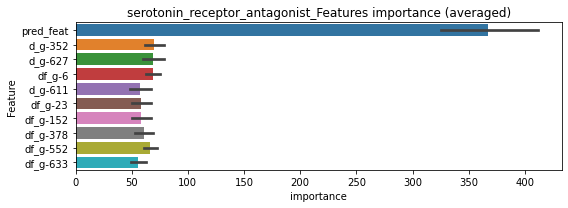

len(train_index) : 2420
len(valid_index) : 807
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00022967	valid_1's binary_logloss: 0.00229371
[2000]	training's binary_logloss: 0.000177719	valid_1's binary_logloss: 0.00214458
Early stopping, best iteration is:
[2190]	training's binary_logloss: 0.00017379	valid_1's binary_logloss: 0.00213002


len(train_index) : 2420
len(valid_index) : 807
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2420
len(valid_index) : 807
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000288501	valid_1's binary_logloss: 0.00391737
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000228728	valid_1's binary_logloss: 0.000627641
[2000]	training's binary_logloss: 0.000176979	valid_1's binary_logloss: 0.000457276
Early stopping, best iteration is:
[2115]	training's binary_logloss: 0.000175165	valid_1's binary_logloss: 0.000451503


len(train_index) : 2421
len(valid_index) : 806
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017583	valid_1's binary_logloss: 0.000614175
[2000]	training's binary_logloss: 0.000130152	valid_1's binary_logloss: 0.000455949
[3000]	training's binary_logloss: 0.000120785	valid_1's binary_logloss: 0.000422667


serotonin_receptor_antagonist logloss: 0.001736752931002562


Early stopping, best iteration is:
[3429]	training's binary_logloss: 0.000119301	valid_1's binary_logloss: 0.000417178
neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342286	valid_1's binary_logloss: 0.0184658
[600]	training's binary_logloss: 0.000684918	valid_1's binary_logloss: 0.0106781
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000562434	valid_1's binary_logloss: 0.0102244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352006	valid_1's binary_logloss: 0.0186586
[600]	training's binary_logloss: 0.000697966	valid_1's binary_logloss: 0.0114961
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00057806	valid_1's binary_logloss: 0.01116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384242	valid_1's binary_logloss: 0.0118065
[600]	training's binary_logloss: 0.000726137	valid_1's binary_logloss: 0.00418945
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000592385	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0045567, Threshold: 0.0265689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, conf_0:0.01860, conf_1:0.03454
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0265689
Num_p_label: 14.0, Expected: 7.4, Adj_threshold_2: 0.0765689
threshold: 0.0765689, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000957476	valid_1's binary_logloss: 0.00378512
[600]	training's binary_logloss: 0.000215134	valid_1's binary_logloss: 0.00281368
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00020798	valid_1's binary_logloss: 0.00280668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912717	valid_1's binary_logloss: 0.00208476
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000230894	valid_1's binary_logloss: 0.000958323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00096711	valid_1's binary_logloss: 0.00252614
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000272088	valid_1's binary_logloss: 0.0016112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000982425	valid_1's binary_logloss: 0.003266

2 / 3 AUC score:1.000
y_Threshold: 0.7026086, Threshold: 0.0765689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0587644 Vs.target_rate: 0.00185
Num_p_label: 234.0, conf_0:0.06126, conf_1:0.09188
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_1: 0.0765689
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_2: 0.1265689
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_3: 0.1765689
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_4: 0.2265689
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_5: 0.2765689
Num_p_label: 234.0, Expected: 7.4, Adj_threshold_6: 0.3265689


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000371809	valid_1's binary_logloss: 0.0026214


Num_p_label: 233.0, Expected: 7.4, Adj_threshold_7: 0.3765689
Num_p_label: 232.0, Expected: 7.4, Adj_threshold_8: 0.4265689
Num_p_label: 232.0, Expected: 7.4, Adj_threshold_9: 0.4765689
Num_p_label: 225.0, Expected: 7.4, Adj_threshold_10: 0.5265689
threshold: 0.5765689, positive_p_label: 216.0/3982, p_label_rate: 0.0542441
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000931636	valid_1's binary_logloss: 0.00403684
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000357218	valid_1's binary_logloss: 0.00334417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000976616	valid_1's binary_logloss: 0.00255744
[600]	training's binary_logloss: 0.000213589	valid_1's binary_logloss: 0.00119846
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000193148	valid_1's binary_logloss: 0.00115652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000998515	valid_1's binary_logloss: 0.0021255
[600]	training's binary_logloss: 0.000218931	valid_1's binary_logloss: 0.00113748
[900]	training's binary_logloss: 0.000167825	valid_1's binary_logloss: 0.00107586
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000167227	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.6561659, Threshold: 0.5765689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0436966 Vs.target_rate: 0.00185


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000256111	valid_1's binary_logloss: 0.00123612


Num_p_label: 174.0, conf_0:0.50000, conf_1:0.63423
Num_p_label: 174.0, Expected: 7.4, Adj_threshold_1: 0.5765689
Num_p_label: 143.0, Expected: 7.4, Adj_threshold_2: 0.6265689
Num_p_label: 108.0, Expected: 7.4, Adj_threshold_3: 0.6765689
Num_p_label: 78.0, Expected: 7.4, Adj_threshold_4: 0.7265689
Num_p_label: 49.0, Expected: 7.4, Adj_threshold_5: 0.7765689
threshold: 0.7765689, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


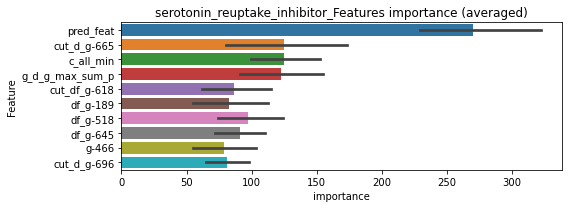

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952


Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00025443	valid_1's binary_logloss: 0.0025988


================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00044212	valid_1's binary_logloss: 0.00264952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000222996	valid_1's binary_logloss: 0.000748369


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000204724	valid_1's binary_logloss: 0.00261473
Early stopping, best iteration is:
[1348]	training's binary_logloss: 0.000184399	valid_1's binary_logloss: 0.00256427


serotonin_reuptake_inhibitor logloss: 0.0021442138146284023


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234583	valid_1's binary_logloss: 0.0205115
[600]	training's binary_logloss: 0.000535678	valid_1's binary_logloss: 0.0145627
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00051947	valid_1's binary_logloss: 0.0144567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258976	valid_1's binary_logloss: 0.00984589
[600]	training's binary_logloss: 0.00056969	valid_1's binary_logloss: 0.00608305
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000511334	valid_1's binary_logloss: 0.00597237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258431	valid_1's binary_logloss: 0.00701862
[600]	training's binary_logloss: 0.000565096	valid_1's binary_logloss: 0.00326035
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000538729	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0032260, Threshold: 0.0244394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01711, conf_1:0.03177
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0244394
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0744394
threshold: 0.0744394, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000784066	valid_1's binary_logloss: 0.00343834
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000390922	valid_1's binary_logloss: 0.00247636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000816587	valid_1's binary_logloss: 0.00221388
[600]	training's binary_logloss: 0.000205332	valid_1's binary_logloss: 0.00154607
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000204862	valid_1's binary_logloss: 0.00154587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000820372	valid_1's binary_logloss: 0.00373822
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000386689	valid_1's binary_logloss: 0.00315892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000816639	valid_1's binary_logloss: 0.0025

2 / 3 AUC score:1.000
y_Threshold: 0.6021713, Threshold: 0.0744394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0590156 Vs.target_rate: 0.00151
Num_p_label: 235.0, conf_0:0.05955, conf_1:0.08933
Num_p_label: 235.0, Expected: 6.0, Adj_threshold_1: 0.0744394
Num_p_label: 235.0, Expected: 6.0, Adj_threshold_2: 0.1244394
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_3: 0.1744394
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_4: 0.2244394
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_5: 0.2744394
Num_p_label: 234.0, Expected: 6.0, Adj_threshold_6: 0.3244394
Num_p_label: 233.0, Expected: 6.0, Adj_threshold_7: 0.3744394
Num_p_label: 231.0, Expected: 6.0, Adj_threshold_8: 0.4244394
Num_p_label: 214.0, Expected: 6.0, Adj_threshold_9: 0.4744394
Num_p_label: 203.0, Expected: 6.0, Adj_threshold_10: 0.5244394
threshold: 0.5744394, positive_p_label: 168.0/3982, p_label_rate: 0.0421899
positive_y_label: 655.0/3805, y_label_rate: 0.1721419

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000812761	valid_1's binary_logloss: 0.0025405
[600]	training's binary_logloss: 0.000211234	valid_1's binary_logloss: 0.00170628
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000203679	valid_1's binary_logloss: 0.00169487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848983	valid_1's binary_logloss: 0.0015925
[600]	training's binary_logloss: 0.000213051	valid_1's binary_logloss: 0.000785562
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000211895	valid_1's binary_logloss: 0.000783878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000822358	valid_1's binary_logloss: 0.00312664
[600]	training's binary_logloss: 0.000213494	valid_1's binary_logloss: 0.0022066
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000210334	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.3720238, Threshold: 0.5744394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0266198 Vs.target_rate: 0.00151
Num_p_label: 106.0, conf_0:0.50000, conf_1:0.63188
Num_p_label: 106.0, Expected: 6.0, Adj_threshold_1: 0.5744394
Num_p_label: 78.0, Expected: 6.0, Adj_threshold_2: 0.6244394
Num_p_label: 47.0, Expected: 6.0, Adj_threshold_3: 0.6744394
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.7244394
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.7744394


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000232219	valid_1's binary_logloss: 0.00267414


threshold: 0.7744394, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


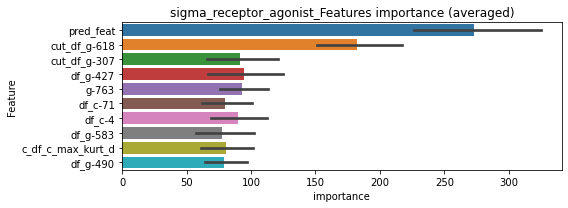

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205695	valid_1's binary_logloss: 0.00222199
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.000175482	valid_1's binary_logloss: 0.00214807


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000232199	valid_1's binary_logloss: 0.000562578
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000302036	valid_1's binary_logloss: 0.00333748
Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.0019243723073186312


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000267048	valid_1's binary_logloss: 0.00163641
neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033519	valid_1's binary_logloss: 0.0159205
[600]	training's binary_logloss: 0.000637362	valid_1's binary_logloss: 0.00970938
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000543424	valid_1's binary_logloss: 0.00947582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320333	valid_1's binary_logloss: 0.0116665
[600]	training's binary_logloss: 0.000622401	valid_1's binary_logloss: 0.00501864
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000514112	valid_1's binary_logloss: 0.00465216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340131	valid_1's binary_logloss: 0.00940727
[600]	training's binary_logloss: 0.000649831	valid_1's binary_logloss: 0.00341615
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000510528	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0042709, Threshold: 0.0134989, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00945, conf_1:0.01755
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0134989
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0634989
threshold: 0.0634989, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910394	valid_1's binary_logloss: 0.00426608
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00025878	valid_1's binary_logloss: 0.0032694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000882759	valid_1's binary_logloss: 0.00148949
[600]	training's binary_logloss: 0.000202822	valid_1's binary_logloss: 0.000466328
[900]	training's binary_logloss: 0.000154757	valid_1's binary_logloss: 0.000405129
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00015585	valid_1's binary_logloss: 0.000402571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000893195	valid_1's binary_logloss: 0.00242863
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000379758	valid_1's binary_logloss: 0.00190103
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.6587482, Threshold: 0.0634989, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0502260 Vs.target_rate: 0.00151
Num_p_label: 200.0, conf_0:0.05080, conf_1:0.07620
Num_p_label: 200.0, Expected: 6.0, Adj_threshold_1: 0.0634989
Num_p_label: 199.0, Expected: 6.0, Adj_threshold_2: 0.1134989
Num_p_label: 199.0, Expected: 6.0, Adj_threshold_3: 0.1634989
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_4: 0.2134989
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_5: 0.2634989
Num_p_label: 198.0, Expected: 6.0, Adj_threshold_6: 0.3134989
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_7: 0.3634989
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_8: 0.4134989
Num_p_label: 194.0, Expected: 6.0, Adj_threshold_9: 0.4634989
Num_p_label: 183.0, Expected: 6.0, Adj_threshold_10: 0.5134989
threshold: 0.5634989, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 656.0/3808, y_label_rate: 0.1722689

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909056	valid_1's binary_logloss: 0.00265931
[600]	training's binary_logloss: 0.000208398	valid_1's binary_logloss: 0.00175401
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000170135	valid_1's binary_logloss: 0.00171616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000905619	valid_1's binary_logloss: 0.00244467
[600]	training's binary_logloss: 0.000208235	valid_1's binary_logloss: 0.00162475
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000190995	valid_1's binary_logloss: 0.00158516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915249	valid_1's binary_logloss: 0.00106646
[600]	training's binary_logloss: 0.000213371	valid_1's binary_logloss: 0.000208817
[900]	training's binary_logloss: 0.000166902	valid_1's binary_logloss: 0.000146629
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.6005059, Threshold: 0.5634989, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000235147	valid_1's binary_logloss: 0.00162914


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0334003 Vs.target_rate: 0.00151
Num_p_label: 133.0, conf_0:0.50000, conf_1:0.61985
Num_p_label: 133.0, Expected: 6.0, Adj_threshold_1: 0.5634989
Num_p_label: 104.0, Expected: 6.0, Adj_threshold_2: 0.6134989
Num_p_label: 73.0, Expected: 6.0, Adj_threshold_3: 0.6634989
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_4: 0.7134989
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_5: 0.7634989
threshold: 0.7634989, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


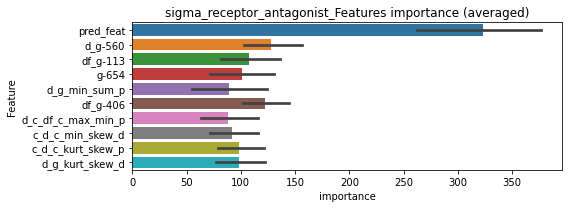

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212232	valid_1's binary_logloss: 0.000344971
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.000178758	valid_1's binary_logloss: 0.000295524


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00023891	valid_1's binary_logloss: 0.00188725
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000206467	valid_1's binary_logloss: 0.00279234
Early stopping, best iteration is:
[1306]	training's binary_logloss: 0.000188176	valid_1's binary_logloss: 0.00275632


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


sigma_receptor_antagonist logloss: 0.001701009793660315


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000478002	valid_1's binary_logloss: 0.00185941
neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184313	valid_1's binary_logloss: 0.00418754
[600]	training's binary_logloss: 0.000421863	valid_1's binary_logloss: 0.00145968
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00040077	valid_1's binary_logloss: 0.00141839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179354	valid_1's binary_logloss: 0.00994042
[600]	training's binary_logloss: 0.000410216	valid_1's binary_logloss: 0.00616407
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000394288	valid_1's binary_logloss: 0.00609923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186318	valid_1's binary_logloss: 0.00296908
[600]	training's binary_logloss: 0.000424427	valid_1's binary_logloss: 0.000849003
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000398618	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0024525, Threshold: 0.0077374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00542, conf_1:0.01006
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0077374
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0577374
threshold: 0.0577374, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702287	valid_1's binary_logloss: 0.000854426
[600]	training's binary_logloss: 0.000193259	valid_1's binary_logloss: 0.000261424
[900]	training's binary_logloss: 0.000161419	valid_1's binary_logloss: 0.000219106
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00016179	valid_1's binary_logloss: 0.000218978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000666967	valid_1's binary_logloss: 0.00178154
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000361903	valid_1's binary_logloss: 0.0013516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662982	valid_1's binary_logloss: 0.000696176
[600]	training's binary_logloss: 0.000184316	valid_1's binary_logloss: 0.000165159
[900]	training's binary_logloss: 0.000149118	valid_1's binary_logloss: 0.000124015
Earl

2 / 3 AUC score:1.000
y_Threshold: 0.7237270, Threshold: 0.0577374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0492215 Vs.target_rate: 0.00105
Num_p_label: 196.0, conf_0:0.04619, conf_1:0.06928
Num_p_label: 196.0, Expected: 4.2, Adj_threshold_1: 0.0577374
Num_p_label: 195.0, Expected: 4.2, Adj_threshold_2: 0.1077374
Num_p_label: 193.0, Expected: 4.2, Adj_threshold_3: 0.1577374
Num_p_label: 193.0, Expected: 4.2, Adj_threshold_4: 0.2077374
Num_p_label: 192.0, Expected: 4.2, Adj_threshold_5: 0.2577374
Num_p_label: 191.0, Expected: 4.2, Adj_threshold_6: 0.3077374


[300]	training's binary_logloss: 0.000659884	valid_1's binary_logloss: 0.0046611
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000796216	valid_1's binary_logloss: 0.00455421


Num_p_label: 184.0, Expected: 4.2, Adj_threshold_7: 0.3577374
Num_p_label: 173.0, Expected: 4.2, Adj_threshold_8: 0.4077374
Num_p_label: 154.0, Expected: 4.2, Adj_threshold_9: 0.4577374
Num_p_label: 126.0, Expected: 4.2, Adj_threshold_10: 0.5077374
threshold: 0.5577374, positive_p_label: 98.0/3982, p_label_rate: 0.0246107
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000689434	valid_1's binary_logloss: 0.000826829
[600]	training's binary_logloss: 0.000189179	valid_1's binary_logloss: 0.00023341
[900]	training's binary_logloss: 0.000157154	valid_1's binary_logloss: 0.000192807
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000155071	valid_1's binary_logloss: 0.000190076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000659918	valid_1's binary_logloss: 0.00222641
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000350233	valid_1's binary_logloss: 0.00179203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665327	valid_1's binary_logloss: 0.000702327
[600]	training's binary_logloss: 0.000184993	valid_1's binary_logloss: 0.000168885
[900]	training's binary_logloss: 0.000152384	valid_1's binary_logloss: 0.000127544
Ear

3 / 3 AUC score:1.000
y_Threshold: 0.6606839, Threshold: 0.5577374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0155701 Vs.target_rate: 0.00105
Num_p_label: 62.0, conf_0:0.50000, conf_1:0.61351
Num_p_label: 62.0, Expected: 4.2, Adj_threshold_1: 0.5577374
Num_p_label: 42.0, Expected: 4.2, Adj_threshold_2: 0.6077374
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_3: 0.6577374
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_4: 0.7077374
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_5: 0.7577374
threshold: 0.7577374, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


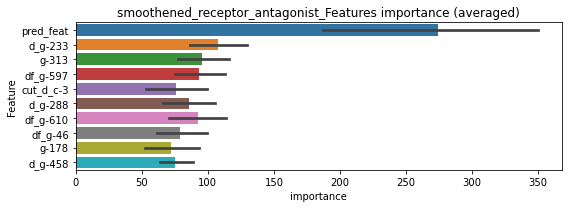

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194982	valid_1's binary_logloss: 0.000191991
[2000]	training's binary_logloss: 0.000160804	valid_1's binary_logloss: 0.000146699
Early stopping, best iteration is:
[2046]	training's binary_logloss: 0.000160215	valid_1's binary_logloss: 0.000145972


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000543039	valid_1's binary_logloss: 0.00257194
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187201	valid_1's binary_logloss: 0.000172378
[2000]	training's binary_logloss: 0.000153522	valid_1's binary_logloss: 0.000130834
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.000153522	valid_1's binary_logloss: 0.000130834


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


smoothened_receptor_antagonist logloss: 0.009170611509872863


Early stopping, best iteration is:
[49]	training's binary_logloss: 0.0141879	valid_1's binary_logloss: 0.0338501
neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261
target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0395711	valid_1's binary_logloss: 0.242582
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0266451	valid_1's binary_logloss: 0.239549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.0456015	valid_1's binary_logloss: 0.249928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03796	valid_1's binary_logloss: 0.222315
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0282969	valid_1's binary_logloss: 0.220945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0376885	valid_1's binary_logloss: 0.206198
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.0155899	valid_1's binary_logloss: 0.199603


1 / 3 AUC score:0.915
y_Threshold: 0.0853651, Threshold: 0.2232737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 395 → Positive_corect_labels: 520/3518
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.15629, conf_1:0.29026
threshold: 0.2232737, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 520.0/3518, y_label_rate: 0.1478113
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156397	valid_1's binary_logloss: 0.00359787
[600]	training's binary_logloss: 0.000197344	valid_1's binary_logloss: 0.00047739
[900]	training's binary_logloss: 0.000118128	valid_1's binary_logloss: 0.000287331
[1200]	training's binary_logloss: 0.000109417	valid_1's binary_logloss: 0.000265641
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.000108615	valid_1's binary_logloss: 0.000263467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160194	valid_1's binary_logloss: 0.00349362
[600]	training's binary_logloss: 0.000198768	valid_1's binary_logloss: 0.000463196
[900]	training's binary_logloss: 0.000118023	valid_1's binary_logloss: 0.000276394
[1200]	training's binary_logloss: 0.000109519	valid_1's binary_logloss: 0.000256242
Early stopping, best iteration is:
[1263]	training's binary_logloss: 0.000108794	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1459304, Threshold: 0.2232737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 520.0/3518
p_label_rate: 0.0961828 Vs.target_rate: 0.01121
Num_p_label: 383.0, conf_0:0.17862, conf_1:0.26793
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_1: 0.2232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_2: 0.2732737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_3: 0.3232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_4: 0.3732737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_5: 0.4232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_6: 0.4732737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_7: 0.5232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_8: 0.5732737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_9: 0.6232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_10: 0.6732737
threshold: 0.7232737, positive_p_label: 383.0/3982, p_label_rate: 0.0961828
positive_y_label: 520.0/3518, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156244	valid_1's binary_logloss: 0.00363179
[600]	training's binary_logloss: 0.00019741	valid_1's binary_logloss: 0.000485421
[900]	training's binary_logloss: 0.000118075	valid_1's binary_logloss: 0.000292
[1200]	training's binary_logloss: 0.000109472	valid_1's binary_logloss: 0.000270341
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.000108654	valid_1's binary_logloss: 0.000268051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159323	valid_1's binary_logloss: 0.00344702
[600]	training's binary_logloss: 0.000198305	valid_1's binary_logloss: 0.000456398
[900]	training's binary_logloss: 0.000118052	valid_1's binary_logloss: 0.000273146
[1200]	training's binary_logloss: 0.0001095	valid_1's binary_logloss: 0.000253086
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.000108743	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.1462696, Threshold: 0.7232737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 520.0/3518
p_label_rate: 0.0961828 Vs.target_rate: 0.01121
Num_p_label: 383.0, conf_0:0.50000, conf_1:0.79560
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_1: 0.7232737
Num_p_label: 383.0, Expected: 44.6, Adj_threshold_2: 0.7732737
threshold: 0.7732737, positive_p_label: 383.0/3982, p_label_rate: 0.0961828
positive_y_label: 520.0/3518, y_label_rate: 0.1478113


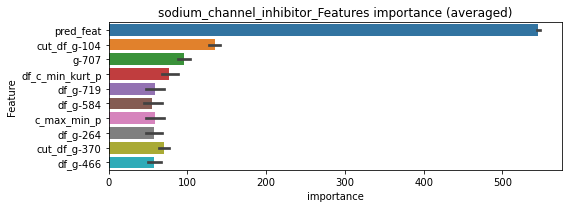

len(train_index) : 2638
len(valid_index) : 880
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000161725	valid_1's binary_logloss: 0.000420019
[2000]	training's binary_logloss: 0.000119387	valid_1's binary_logloss: 0.0003107
[3000]	training's binary_logloss: 0.000110875	valid_1's binary_logloss: 0.000288375


len(train_index) : 2638
len(valid_index) : 880
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[3317]	training's binary_logloss: 0.000109793	valid_1's binary_logloss: 0.000285443
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000161669	valid_1's binary_logloss: 0.00040807
[2000]	training's binary_logloss: 0.000119422	valid_1's binary_logloss: 0.000302072
[3000]	training's binary_logloss: 0.000110824	valid_1's binary_logloss: 0.00028016


len(train_index) : 2639
len(valid_index) : 879
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[3378]	training's binary_logloss: 0.00010968	valid_1's binary_logloss: 0.000277229
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000161508	valid_1's binary_logloss: 0.000429575
[2000]	training's binary_logloss: 0.000119298	valid_1's binary_logloss: 0.000318175
[3000]	training's binary_logloss: 0.000110883	valid_1's binary_logloss: 0.000295554


len(train_index) : 2639
len(valid_index) : 879
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[3295]	training's binary_logloss: 0.000109806	valid_1's binary_logloss: 0.000292575
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000161548	valid_1's binary_logloss: 0.000497807
[2000]	training's binary_logloss: 0.000119272	valid_1's binary_logloss: 0.000368481
[3000]	training's binary_logloss: 0.000110762	valid_1's binary_logloss: 0.000342065


sodium_channel_inhibitor logloss: 0.00029862804678170676


Early stopping, best iteration is:
[3218]	training's binary_logloss: 0.000109933	valid_1's binary_logloss: 0.000339304
neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021995	valid_1's binary_logloss: 0.0121307
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00054448	valid_1's binary_logloss: 0.00816913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222273	valid_1's binary_logloss: 0.0102697
[600]	training's binary_logloss: 0.000497556	valid_1's binary_logloss: 0.00738676
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000523384	valid_1's binary_logloss: 0.00731788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236967	valid_1's binary_logloss: 0.00693062
[600]	training's binary_logloss: 0.000512117	valid_1's binary_logloss: 0.00396268
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000476347	valid_1's binary_logloss: 0.00389343
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0027326, Threshold: 0.0094000, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00658, conf_1:0.01222
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0094000
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_2: 0.0594000
threshold: 0.0594000, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000790135	valid_1's binary_logloss: 0.00453361
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000306636	valid_1's binary_logloss: 0.00366758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791253	valid_1's binary_logloss: 0.00257983
[600]	training's binary_logloss: 0.000199852	valid_1's binary_logloss: 0.00198736
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000191823	valid_1's binary_logloss: 0.00197035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000819819	valid_1's binary_logloss: 0.00172004
[600]	training's binary_logloss: 0.00020545	valid_1's binary_logloss: 0.000850061
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000185474	valid_1's binary_logloss: 0.000795646
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.5476042, Threshold: 0.0594000, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0527373 Vs.target_rate: 0.00134
Num_p_label: 210.0, conf_0:0.04752, conf_1:0.07128
Num_p_label: 210.0, Expected: 5.4, Adj_threshold_1: 0.0594000
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_2: 0.1094000
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_3: 0.1594000
Num_p_label: 208.0, Expected: 5.4, Adj_threshold_4: 0.2094000


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00017561	valid_1's binary_logloss: 0.00203223


Num_p_label: 207.0, Expected: 5.4, Adj_threshold_5: 0.2594000
Num_p_label: 207.0, Expected: 5.4, Adj_threshold_6: 0.3094000
Num_p_label: 205.0, Expected: 5.4, Adj_threshold_7: 0.3594000
Num_p_label: 192.0, Expected: 5.4, Adj_threshold_8: 0.4094000
Num_p_label: 166.0, Expected: 5.4, Adj_threshold_9: 0.4594000
Num_p_label: 137.0, Expected: 5.4, Adj_threshold_10: 0.5094000
threshold: 0.5594000, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000785201	valid_1's binary_logloss: 0.00264661
[600]	training's binary_logloss: 0.000210138	valid_1's binary_logloss: 0.00180359
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00017921	valid_1's binary_logloss: 0.00175096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800497	valid_1's binary_logloss: 0.00362813
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000457983	valid_1's binary_logloss: 0.00318635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798163	valid_1's binary_logloss: 0.000892887
[600]	training's binary_logloss: 0.000206181	valid_1's binary_logloss: 0.000198132
[900]	training's binary_logloss: 0.000166548	valid_1's binary_logloss: 0.000144139
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00016643	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.5193388, Threshold: 0.5594000, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0077850 Vs.target_rate: 0.00134
Num_p_label: 31.0, conf_0:0.50000, conf_1:0.61534
Num_p_label: 31.0, Expected: 5.4, Adj_threshold_1: 0.5594000
Num_p_label: 16.0, Expected: 5.4, Adj_threshold_2: 0.6094000
Num_p_label: 9.0, Expected: 5.4, Adj_threshold_3: 0.6594000
threshold: 0.6594000, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000407526	valid_1's binary_logloss: 0.00243057


positive_y_label: 653.0/3800, y_label_rate: 0.1718421


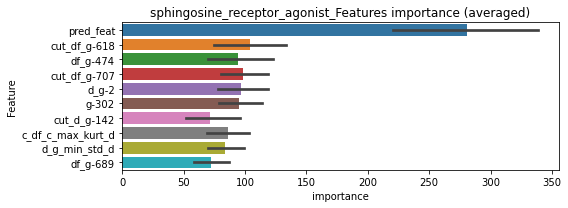

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207898	valid_1's binary_logloss: 0.000995996
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000205933	valid_1's binary_logloss: 0.000992058


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 sphingosine_receptor_agonist=================================


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000237954	valid_1's binary_logloss: 0.00203063
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208303	valid_1's binary_logloss: 0.00123345
Early stopping, best iteration is:
[1604]	training's binary_logloss: 0.00018059	valid_1's binary_logloss: 0.00119669


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sphingosine_receptor_agonist logloss: 0.001746791539175839


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000224359	valid_1's binary_logloss: 0.00276386
neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278
target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594569	valid_1's binary_logloss: 0.0381166
[600]	training's binary_logloss: 0.00109556	valid_1's binary_logloss: 0.0288892
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000901043	valid_1's binary_logloss: 0.0281978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655628	valid_1's binary_logloss: 0.0319349
[600]	training's binary_logloss: 0.00116749	valid_1's binary_logloss: 0.0218959
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000826526	valid_1's binary_logloss: 0.0204602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00665604	valid_1's binary_logloss: 0.0332304
[600]	training's binary_logloss: 0.00115775	valid_1's binary_logloss: 0.0237832
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00076065	valid_1's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0080912, Threshold: 0.0305559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, conf_0:0.02139, conf_1:0.03972
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0305559
Num_p_label: 8.0, Expected: 11.9, Adj_threshold_2: 0.0805559
threshold: 0.0805559, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012475	valid_1's binary_logloss: 0.00274995
[600]	training's binary_logloss: 0.000247235	valid_1's binary_logloss: 0.00116161
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000190279	valid_1's binary_logloss: 0.00102655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122337	valid_1's binary_logloss: 0.00715819
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000520503	valid_1's binary_logloss: 0.00633978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012446	valid_1's binary_logloss: 0.00605276
[600]	training's binary_logloss: 0.000235366	valid_1's binary_logloss: 0.00450753
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000219995	valid_1's binary_logloss: 0.00449362
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.2921313, Threshold: 0.0805559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3785
p_label_rate: 0.0532396 Vs.target_rate: 0.00298
Num_p_label: 212.0, conf_0:0.06444, conf_1:0.09667
Num_p_label: 212.0, Expected: 11.9, Adj_threshold_1: 0.0805559
Num_p_label: 211.0, Expected: 11.9, Adj_threshold_2: 0.1305559
Num_p_label: 208.0, Expected: 11.9, Adj_threshold_3: 0.1805559
Num_p_label: 205.0, Expected: 11.9, Adj_threshold_4: 0.2305559
Num_p_label: 192.0, Expected: 11.9, Adj_threshold_5: 0.2805559
Num_p_label: 158.0, Expected: 11.9, Adj_threshold_6: 0.3305559
Num_p_label: 116.0, Expected: 11.9, Adj_threshold_7: 0.3805559
Num_p_label: 82.0, Expected: 11.9, Adj_threshold_8: 0.4305559
Num_p_label: 60.0, Expected: 11.9, Adj_threshold_9: 0.4805559
Num_p_label: 45.0, Expected: 11.9, Adj_threshold_10: 0.5305559
threshold: 0.5805559, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 647.0/3785, y_label_rate: 0.

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114901	valid_1's binary_logloss: 0.00203948
[600]	training's binary_logloss: 0.000220202	valid_1's binary_logloss: 0.000378911
[900]	training's binary_logloss: 0.00015469	valid_1's binary_logloss: 0.000231854
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000151166	valid_1's binary_logloss: 0.000222936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113346	valid_1's binary_logloss: 0.00268832
[600]	training's binary_logloss: 0.000217343	valid_1's binary_logloss: 0.000596315
[900]	training's binary_logloss: 0.000152537	valid_1's binary_logloss: 0.00039841
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000147127	valid_1's binary_logloss: 0.000383055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117057	valid_1's binary_logloss: 0.00210067
[600]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.1484560, Threshold: 0.5805559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0359116 Vs.target_rate: 0.00298


Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000169442	valid_1's binary_logloss: 0.00608795


Num_p_label: 143.0, conf_0:0.50000, conf_1:0.63861
Num_p_label: 143.0, Expected: 11.9, Adj_threshold_1: 0.5805559
Num_p_label: 143.0, Expected: 11.9, Adj_threshold_2: 0.6305559
Num_p_label: 143.0, Expected: 11.9, Adj_threshold_3: 0.6805559
Num_p_label: 131.0, Expected: 11.9, Adj_threshold_4: 0.7305559
Num_p_label: 64.0, Expected: 11.9, Adj_threshold_5: 0.7805559
threshold: 0.7805559, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


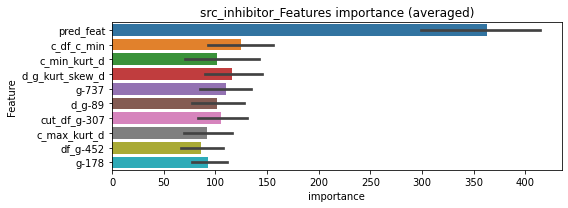

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 src_inhibitor=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00054126	valid_1's binary_logloss: 0.0080184
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148159	valid_1's binary_logloss: 0.00040698
[2000]	training's binary_logloss: 0.000110685	valid_1's binary_logloss: 0.000305228
[3000]	training's binary_logloss: 0.000102916	valid_1's binary_logloss: 0.000283464
Early stopping, best iteration is:
[3557]	training's binary_logloss: 0.000101362	valid_1's binary_logloss: 0.000278908


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195835	valid_1's binary_logloss: 0.000330911
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.000162954	valid_1's binary_logloss: 0.000256958


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194919	valid_1's binary_logloss: 0.000952189
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.000159062	valid_1's binary_logloss: 0.000849101


src_inhibitor logloss: 0.0023513540567982986


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275
target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00784352	valid_1's binary_logloss: 0.0603296
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00149995	valid_1's binary_logloss: 0.0506153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791952	valid_1's binary_logloss: 0.0425266
[600]	training's binary_logloss: 0.00132381	valid_1's binary_logloss: 0.0281931
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000987842	valid_1's binary_logloss: 0.0269696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00839655	valid_1's binary_logloss: 0.0421772
[600]	training's binary_logloss: 0.00136679	valid_1's binary_logloss: 0.0266978
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000948106	valid_1's binary_logloss: 0.025972
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0104746, Threshold: 0.2110447, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, conf_0:0.14773, conf_1:0.27436
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2110447
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.2610447
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_3: 0.3110447
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_4: 0.3610447
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_5: 0.4110447
Num_p_label: 15.0, Expected: 13.2, Adj_threshold_6: 0.4610447
threshold: 0.4610447, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137825	valid_1's binary_logloss: 0.00299281
[600]	training's binary_logloss: 0.000245111	valid_1's binary_logloss: 0.000708008
[900]	training's binary_logloss: 0.000174406	valid_1's binary_logloss: 0.000534419
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000167161	valid_1's binary_logloss: 0.000513767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135002	valid_1's binary_logloss: 0.00611687
[600]	training's binary_logloss: 0.000241286	valid_1's binary_logloss: 0.00453144
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000239617	valid_1's binary_logloss: 0.00452513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135361	valid_1's binary_logloss: 0.00424869
[600]	training's binary_logloss: 0.000248904	valid_1's binary_logloss: 0.00233075
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.3087135, Threshold: 0.4610447, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000187074	valid_1's binary_logloss: 0.0030905


Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0321447 Vs.target_rate: 0.00332
Num_p_label: 128.0, conf_0:0.36884, conf_1:0.55325
Num_p_label: 128.0, Expected: 13.2, Adj_threshold_1: 0.4610447
Num_p_label: 125.0, Expected: 13.2, Adj_threshold_2: 0.5110447
Num_p_label: 120.0, Expected: 13.2, Adj_threshold_3: 0.5610447
Num_p_label: 119.0, Expected: 13.2, Adj_threshold_4: 0.6110447
Num_p_label: 114.0, Expected: 13.2, Adj_threshold_5: 0.6610447
Num_p_label: 113.0, Expected: 13.2, Adj_threshold_6: 0.7110447
Num_p_label: 113.0, Expected: 13.2, Adj_threshold_7: 0.7610447
threshold: 0.7610447, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107883	valid_1's binary_logloss: 0.0021911
[600]	training's binary_logloss: 0.000165327	valid_1's binary_logloss: 0.000365169
[900]	training's binary_logloss: 0.000108173	valid_1's binary_logloss: 0.000240409
[1200]	training's binary_logloss: 0.000101586	valid_1's binary_logloss: 0.000225556
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000100675	valid_1's binary_logloss: 0.000223353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109177	valid_1's binary_logloss: 0.00197481
[600]	training's binary_logloss: 0.000165721	valid_1's binary_logloss: 0.00031778
[900]	training's binary_logloss: 0.000108306	valid_1's binary_logloss: 0.000208618
[1200]	training's binary_logloss: 0.000101777	valid_1's binary_logloss: 0.000195906
Early stopping, best iteration is:
[1174]	training's binary_logloss: 0.000101777	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.2744635, Threshold: 0.7610447, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0281266 Vs.target_rate: 0.00332
Num_p_label: 112.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 112.0, Expected: 13.2, Adj_threshold_1: 0.7610447
threshold: 0.7610447, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 646.0/3781, y_label_rate: 0.1708543


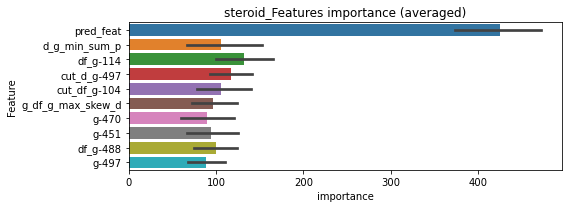

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148608	valid_1's binary_logloss: 0.000332903
[2000]	training's binary_logloss: 0.000110874	valid_1's binary_logloss: 0.000248998
[3000]	training's binary_logloss: 0.000103077	valid_1's binary_logloss: 0.000231391
Early stopping, best iteration is:
[3194]	training's binary_logloss: 0.000102403	valid_1's binary_logloss: 0.000229815


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148894	valid_1's binary_logloss: 0.000313504
[2000]	training's binary_logloss: 0.000110724	valid_1's binary_logloss: 0.000233413
[3000]	training's binary_logloss: 0.000103103	valid_1's binary_logloss: 0.000217375
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.000102257	valid_1's binary_logloss: 0.000215482


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000196949	valid_1's binary_logloss: 0.000591018
Early stopping, best iteration is:
[1665]	training's binary_logloss: 0.000159234	valid_1's binary_logloss: 0.000491735


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000196449	valid_1's binary_logloss: 0.000999241
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000193966	valid_1's binary_logloss: 0.000988562


steroid logloss: 0.0004817657064791734


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144217	valid_1's binary_logloss: 0.00274961
[600]	training's binary_logloss: 0.00039564	valid_1's binary_logloss: 0.00113167
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00039564	valid_1's binary_logloss: 0.00113167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139182	valid_1's binary_logloss: 0.00414058
[600]	training's binary_logloss: 0.00038798	valid_1's binary_logloss: 0.0019585
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000390091	valid_1's binary_logloss: 0.0019534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144219	valid_1's binary_logloss: 0.00284941
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000404207	valid_1's binary_logloss: 0.00100933
Training until validation scores don't improve for 30 rounds
[30

1 / 3 AUC score:1.000
y_Threshold: 0.0021026, Threshold: 0.0064257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00450, conf_1:0.00835
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0064257
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0564257
threshold: 0.0564257, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000597264	valid_1's binary_logloss: 0.00065115
[600]	training's binary_logloss: 0.000178464	valid_1's binary_logloss: 0.00016786
[900]	training's binary_logloss: 0.000143264	valid_1's binary_logloss: 0.000124038
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000140997	valid_1's binary_logloss: 0.000121202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000569575	valid_1's binary_logloss: 0.00216872
[600]	training's binary_logloss: 0.000174505	valid_1's binary_logloss: 0.00168672
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000157149	valid_1's binary_logloss: 0.00162105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000589583	valid_1's binary_logloss: 0.000890831
[600]	training's binary_logloss: 0.000171595	valid_1's binary_logloss: 0.000384871
Early

2 / 3 AUC score:1.000
y_Threshold: 0.5166459, Threshold: 0.0564257, pos_neg_ratio: 0.8000000


[900]	training's binary_logloss: 0.000140159	valid_1's binary_logloss: 0.000505206
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000139452	valid_1's binary_logloss: 0.000504039


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0444500 Vs.target_rate: 0.00080
Num_p_label: 177.0, conf_0:0.04514, conf_1:0.06771
Num_p_label: 177.0, Expected: 3.2, Adj_threshold_1: 0.0564257
Num_p_label: 176.0, Expected: 3.2, Adj_threshold_2: 0.1064257
Num_p_label: 174.0, Expected: 3.2, Adj_threshold_3: 0.1564257
Num_p_label: 172.0, Expected: 3.2, Adj_threshold_4: 0.2064257
Num_p_label: 166.0, Expected: 3.2, Adj_threshold_5: 0.2564257
Num_p_label: 143.0, Expected: 3.2, Adj_threshold_6: 0.3064257
Num_p_label: 122.0, Expected: 3.2, Adj_threshold_7: 0.3564257
Num_p_label: 93.0, Expected: 3.2, Adj_threshold_8: 0.4064257
Num_p_label: 63.0, Expected: 3.2, Adj_threshold_9: 0.4564257
Num_p_label: 42.0, Expected: 3.2, Adj_threshold_10: 0.5064257
threshold: 0.5564257, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059886	valid_1's binary_logloss: 0.000646207
[600]	training's binary_logloss: 0.000177242	valid_1's binary_logloss: 0.00016653
[900]	training's binary_logloss: 0.000142479	valid_1's binary_logloss: 0.000123453
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000140427	valid_1's binary_logloss: 0.000120891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000564746	valid_1's binary_logloss: 0.00261129
[600]	training's binary_logloss: 0.000169794	valid_1's binary_logloss: 0.00200262
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000175817	valid_1's binary_logloss: 0.00200164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000593261	valid_1's binary_logloss: 0.000905238
[600]	training's binary_logloss: 0.000172766	valid_1's binary_logloss: 0.000378806
Early

3 / 3 AUC score:1.000


[900]	training's binary_logloss: 0.000138011	valid_1's binary_logloss: 0.000442534
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000138687	valid_1's binary_logloss: 0.000441549


y_Threshold: 0.4730161, Threshold: 0.5564257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.61207
Num_p_label: 25.0, Expected: 3.2, Adj_threshold_1: 0.5564257
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_2: 0.6064257
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.6564257
threshold: 0.6564257, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


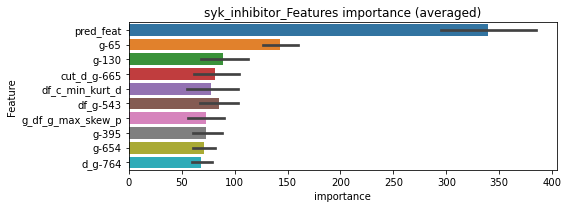

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000184791	valid_1's binary_logloss: 0.000172117
[2000]	training's binary_logloss: 0.000151837	valid_1's binary_logloss: 0.0001298
Early stopping, best iteration is:
[2086]	training's binary_logloss: 0.000150822	valid_1's binary_logloss: 0.000128502


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000214447	valid_1's binary_logloss: 0.0014464
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000219385	valid_1's binary_logloss: 0.000549724
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000181717	valid_1's binary_logloss: 0.000366323
[2000]	training's binary_logloss: 0.000149343	valid_1's binary_logloss: 0.000323084


syk_inhibitor logloss: 0.0006120836593820895


Early stopping, best iteration is:
[2185]	training's binary_logloss: 0.000147143	valid_1's binary_logloss: 0.000320026
neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617383	valid_1's binary_logloss: 0.0291989
[600]	training's binary_logloss: 0.00102499	valid_1's binary_logloss: 0.0156065
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00075969	valid_1's binary_logloss: 0.0146722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063291	valid_1's binary_logloss: 0.0231654
[600]	training's binary_logloss: 0.00102895	valid_1's binary_logloss: 0.0111035
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00071393	valid_1's binary_logloss: 0.00995686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630642	valid_1's binary_logloss: 0.0237222
[600]	training's binary_logloss: 0.0010491	valid_1's binary_logloss: 0.0133861
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000750813	valid_1's binary_logloss: 0.

1 / 3 AUC score:1.000
y_Threshold: 0.0066935, Threshold: 0.0186098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01303, conf_1:0.02419
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0186098
Num_p_label: 2.0, Expected: 10.0, Adj_threshold_2: 0.0686098
threshold: 0.0686098, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126887	valid_1's binary_logloss: 0.0040361
[600]	training's binary_logloss: 0.000234538	valid_1's binary_logloss: 0.00244172
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000219838	valid_1's binary_logloss: 0.0023846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125799	valid_1's binary_logloss: 0.00270909
[600]	training's binary_logloss: 0.000239529	valid_1's binary_logloss: 0.0013757
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000180994	valid_1's binary_logloss: 0.0012617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120865	valid_1's binary_logloss: 0.00333097
[600]	training's binary_logloss: 0.000234666	valid_1's binary_logloss: 0.00202768
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000192832	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.6167724, Threshold: 0.0686098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0389252 Vs.target_rate: 0.00252
Num_p_label: 155.0, conf_0:0.05489, conf_1:0.08233
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_1: 0.0686098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_2: 0.1186098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_3: 0.1686098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_4: 0.2186098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_5: 0.2686098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_6: 0.3186098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_7: 0.3686098
Num_p_label: 155.0, Expected: 10.0, Adj_threshold_8: 0.4186098
Num_p_label: 154.0, Expected: 10.0, Adj_threshold_9: 0.4686098
Num_p_label: 147.0, Expected: 10.0, Adj_threshold_10: 0.5186098
threshold: 0.5686098, positive_p_label: 127.0/3982, p_label_rate: 0.0318935
positive_y_label: 652.0/3795, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126144	valid_1's binary_logloss: 0.00271339
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000290092	valid_1's binary_logloss: 0.00138438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123649	valid_1's binary_logloss: 0.00282387
[600]	training's binary_logloss: 0.000244124	valid_1's binary_logloss: 0.00115986
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00019366	valid_1's binary_logloss: 0.00103137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121328	valid_1's binary_logloss: 0.00494451
[600]	training's binary_logloss: 0.000240578	valid_1's binary_logloss: 0.00369163
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000227977	valid_1's binary_logloss: 0.00367128
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.3806448, Threshold: 0.5686098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3789
p_label_rate: 0.0020090 Vs.target_rate: 0.00252
Num_p_label: 8.0, conf_0:0.50000, conf_1:0.62547
threshold: 0.5686098, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 649.0/3789, y_label_rate: 0.1712853


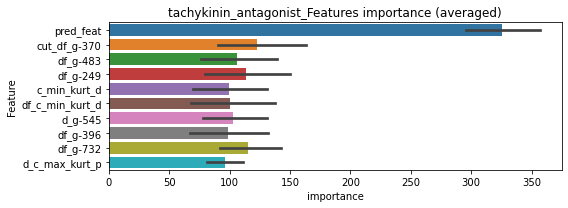

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000201923	valid_1's binary_logloss: 0.00436724
Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.00018802	valid_1's binary_logloss: 0.00432315


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000420413	valid_1's binary_logloss: 0.00339983
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213315	valid_1's binary_logloss: 0.000393458
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000178103	valid_1's binary_logloss: 0.000333891


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000214864	valid_1's binary_logloss: 0.00058769
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000209965	valid_1's binary_logloss: 0.000585838


tachykinin_antagonist logloss: 0.002162098117988359


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248152	valid_1's binary_logloss: 0.00848132
[600]	training's binary_logloss: 0.000543662	valid_1's binary_logloss: 0.00412698
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000500609	valid_1's binary_logloss: 0.00399911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248787	valid_1's binary_logloss: 0.0074792
[600]	training's binary_logloss: 0.000543902	valid_1's binary_logloss: 0.00312741
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000489725	valid_1's binary_logloss: 0.00296485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246915	valid_1's binary_logloss: 0.00518503
[600]	training's binary_logloss: 0.000547619	valid_1's binary_logloss: 0.00149609
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000505069	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0039502, Threshold: 0.0148365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01039, conf_1:0.01929
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0148365
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0648365
threshold: 0.0648365, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000775375	valid_1's binary_logloss: 0.00174083
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000257588	valid_1's binary_logloss: 0.000829926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000752473	valid_1's binary_logloss: 0.0012143
[600]	training's binary_logloss: 0.000188922	valid_1's binary_logloss: 0.00048566
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000189652	valid_1's binary_logloss: 0.000484949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077235	valid_1's binary_logloss: 0.00250752
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000359391	valid_1's binary_logloss: 0.00192912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00074627	valid_1's binary_logloss: 0.00182

2 / 3 AUC score:1.000
y_Threshold: 0.5284674, Threshold: 0.0648365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0572577 Vs.target_rate: 0.00126
Num_p_label: 228.0, conf_0:0.05187, conf_1:0.07780
Num_p_label: 228.0, Expected: 5.0, Adj_threshold_1: 0.0648365
Num_p_label: 228.0, Expected: 5.0, Adj_threshold_2: 0.1148365
Num_p_label: 227.0, Expected: 5.0, Adj_threshold_3: 0.1648365
Num_p_label: 227.0, Expected: 5.0, Adj_threshold_4: 0.2148365
Num_p_label: 227.0, Expected: 5.0, Adj_threshold_5: 0.2648365
Num_p_label: 225.0, Expected: 5.0, Adj_threshold_6: 0.3148365
Num_p_label: 224.0, Expected: 5.0, Adj_threshold_7: 0.3648365
Num_p_label: 211.0, Expected: 5.0, Adj_threshold_8: 0.4148365
Num_p_label: 191.0, Expected: 5.0, Adj_threshold_9: 0.4648365
Num_p_label: 173.0, Expected: 5.0, Adj_threshold_10: 0.5148365
threshold: 0.5648365, positive_p_label: 136.0/3982, p_label_rate: 0.0341537
positive_y_label: 657.0/3810, y_label_rate: 0.1724409

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791038	valid_1's binary_logloss: 0.00230493
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000230777	valid_1's binary_logloss: 0.00119619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000749814	valid_1's binary_logloss: 0.00134204
[600]	training's binary_logloss: 0.000188021	valid_1's binary_logloss: 0.000619597
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000188021	valid_1's binary_logloss: 0.000619597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768637	valid_1's binary_logloss: 0.0215272
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000594355	valid_1's binary_logloss: 0.0199399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00074352	valid_1's binary_logloss: 0.00194

3 / 3 AUC score:1.000
y_Threshold: 0.7103870, Threshold: 0.5648365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0273732 Vs.target_rate: 0.00126
Num_p_label: 109.0, conf_0:0.50000, conf_1:0.62132
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_1: 0.5648365
Num_p_label: 75.0, Expected: 5.0, Adj_threshold_2: 0.6148365
Num_p_label: 48.0, Expected: 5.0, Adj_threshold_3: 0.6648365
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_4: 0.7148365
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_5: 0.7648365


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00015439	valid_1's binary_logloss: 0.00111179


threshold: 0.7648365, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


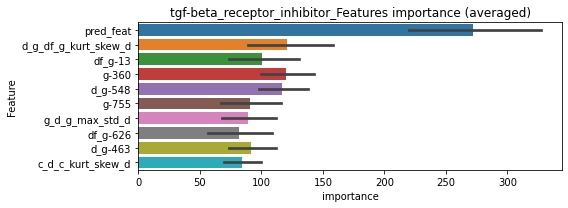

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000290256	valid_1's binary_logloss: 0.00133314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000199727	valid_1's binary_logloss: 0.00079952


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[49]	training's binary_logloss: 0.016673	valid_1's binary_logloss: 0.0631124
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000192658	valid_1's binary_logloss: 0.000548646
Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.000182005	valid_1's binary_logloss: 0.000528423


tgf-beta_receptor_inhibitor logloss: 0.016436046128728978


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131587	valid_1's binary_logloss: 0.00448733
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000384552	valid_1's binary_logloss: 0.00258443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130093	valid_1's binary_logloss: 0.00613729
[600]	training's binary_logloss: 0.000375424	valid_1's binary_logloss: 0.00359548
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000375628	valid_1's binary_logloss: 0.00359379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134695	valid_1's binary_logloss: 0.00260987
[600]	training's binary_logloss: 0.000387732	valid_1's binary_logloss: 0.000957489
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000387732	valid_1's binary_logloss: 0.000957489
Training until validation scores don't improve for 30 rou

1 / 3 AUC score:1.000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000383961	valid_1's binary_logloss: 0.00126545


y_Threshold: 0.0023278, Threshold: 0.0091010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00637, conf_1:0.01183
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0091010
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0591010
threshold: 0.0591010, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572025	valid_1's binary_logloss: 0.000930212
[600]	training's binary_logloss: 0.000184864	valid_1's binary_logloss: 0.00044204
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000158313	valid_1's binary_logloss: 0.000405897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557974	valid_1's binary_logloss: 0.00290749
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000231344	valid_1's binary_logloss: 0.00237739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577085	valid_1's binary_logloss: 0.000596438
[600]	training's binary_logloss: 0.000177743	valid_1's binary_logloss: 0.000172012
[900]	training's binary_logloss: 0.000150445	valid_1's binary_logloss: 0.000139695
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000150051	valid_

2 / 3 AUC score:1.000
y_Threshold: 0.4418321, Threshold: 0.0591010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0459568 Vs.target_rate: 0.00080
Num_p_label: 183.0, conf_0:0.04728, conf_1:0.07092
Num_p_label: 183.0, Expected: 3.2, Adj_threshold_1: 0.0591010
Num_p_label: 183.0, Expected: 3.2, Adj_threshold_2: 0.1091010
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_3: 0.1591010
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_4: 0.2091010
Num_p_label: 181.0, Expected: 3.2, Adj_threshold_5: 0.2591010
Num_p_label: 180.0, Expected: 3.2, Adj_threshold_6: 0.3091010
Num_p_label: 175.0, Expected: 3.2, Adj_threshold_7: 0.3591010
Num_p_label: 167.0, Expected: 3.2, Adj_threshold_8: 0.4091010
Num_p_label: 158.0, Expected: 3.2, Adj_threshold_9: 0.4591010
Num_p_label: 142.0, Expected: 3.2, Adj_threshold_10: 0.5091010
threshold: 0.5591010, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 657.0/3811, y_label_rate: 0.1723957

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572319	valid_1's binary_logloss: 0.000938438
[600]	training's binary_logloss: 0.000184504	valid_1's binary_logloss: 0.000440213
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000158239	valid_1's binary_logloss: 0.000400825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563283	valid_1's binary_logloss: 0.0093126
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000471561	valid_1's binary_logloss: 0.0086673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000585563	valid_1's binary_logloss: 0.000583567
[600]	training's binary_logloss: 0.000178611	valid_1's binary_logloss: 0.000156616
[900]	training's binary_logloss: 0.000151545	valid_1's binary_logloss: 0.000123314
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000151545	valid_1

3 / 3 AUC score:1.000
y_Threshold: 0.5624288, Threshold: 0.5591010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0253641 Vs.target_rate: 0.00080
Num_p_label: 101.0, conf_0:0.50000, conf_1:0.61501
Num_p_label: 101.0, Expected: 3.2, Adj_threshold_1: 0.5591010
Num_p_label: 83.0, Expected: 3.2, Adj_threshold_2: 0.6091010
Num_p_label: 54.0, Expected: 3.2, Adj_threshold_3: 0.6591010
Num_p_label: 33.0, Expected: 3.2, Adj_threshold_4: 0.7091010
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_5: 0.7591010


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000159325	valid_1's binary_logloss: 0.000243663


threshold: 0.7591010, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


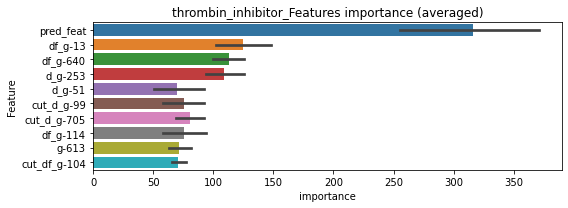

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000190233	valid_1's binary_logloss: 0.00058973


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[1218]	training's binary_logloss: 0.000177813	valid_1's binary_logloss: 0.0005701
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[49]	training's binary_logloss: 0.0120721	valid_1's binary_logloss: 0.0477358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186463	valid_1's binary_logloss: 0.000166157
Early stopping, best iteration is:
[1960]	training's binary_logloss: 0.000155135	valid_1's binary_logloss: 0.000128662


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000189252	valid_1's binary_logloss: 0.00029969


thrombin_inhibitor logloss: 0.01218734279353904


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327215	valid_1's binary_logloss: 0.0147647
[600]	training's binary_logloss: 0.000627845	valid_1's binary_logloss: 0.00850803
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000576472	valid_1's binary_logloss: 0.00843827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309966	valid_1's binary_logloss: 0.0100618
[600]	training's binary_logloss: 0.000630412	valid_1's binary_logloss: 0.00446576
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000594881	valid_1's binary_logloss: 0.00438706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333544	valid_1's binary_logloss: 0.00671079
[600]	training's binary_logloss: 0.000649619	valid_1's binary_logloss: 0.00199366
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000572249	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0040521, Threshold: 0.0178440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01249, conf_1:0.02320
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0178440
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0678440
threshold: 0.0678440, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000929211	valid_1's binary_logloss: 0.00468183
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000293205	valid_1's binary_logloss: 0.00380969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000921862	valid_1's binary_logloss: 0.00323606
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000308332	valid_1's binary_logloss: 0.00235724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000933942	valid_1's binary_logloss: 0.00101593
[600]	training's binary_logloss: 0.000217327	valid_1's binary_logloss: 0.000198177
[900]	training's binary_logloss: 0.000166343	valid_1's binary_logloss: 0.00013619
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000163313	valid_1's binary_logloss: 0.000132464
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.6942472, Threshold: 0.0678440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0529884 Vs.target_rate: 0.00155
Num_p_label: 211.0, conf_0:0.05428, conf_1:0.08141
Num_p_label: 211.0, Expected: 6.2, Adj_threshold_1: 0.0678440
Num_p_label: 209.0, Expected: 6.2, Adj_threshold_2: 0.1178440
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_3: 0.1678440


[600]	training's binary_logloss: 0.000211072	valid_1's binary_logloss: 0.00145681
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000218493	valid_1's binary_logloss: 0.00144069


Num_p_label: 206.0, Expected: 6.2, Adj_threshold_4: 0.2178440
Num_p_label: 206.0, Expected: 6.2, Adj_threshold_5: 0.2678440
Num_p_label: 205.0, Expected: 6.2, Adj_threshold_6: 0.3178440
Num_p_label: 205.0, Expected: 6.2, Adj_threshold_7: 0.3678440
Num_p_label: 202.0, Expected: 6.2, Adj_threshold_8: 0.4178440
Num_p_label: 198.0, Expected: 6.2, Adj_threshold_9: 0.4678440
Num_p_label: 180.0, Expected: 6.2, Adj_threshold_10: 0.5178440
threshold: 0.5678440, positive_p_label: 155.0/3982, p_label_rate: 0.0389252
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000929198	valid_1's binary_logloss: 0.00326598
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000338609	valid_1's binary_logloss: 0.00243538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000903705	valid_1's binary_logloss: 0.00221626
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000270595	valid_1's binary_logloss: 0.00117836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000913167	valid_1's binary_logloss: 0.00195995
[600]	training's binary_logloss: 0.000216268	valid_1's binary_logloss: 0.00113879
[900]	training's binary_logloss: 0.000169082	valid_1's binary_logloss: 0.00107896
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000169082	valid_1's binary_logloss: 0.00107896
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.5223000, Threshold: 0.5678440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0243596 Vs.target_rate: 0.00155
Num_p_label: 97.0, conf_0:0.50000, conf_1:0.62463
Num_p_label: 97.0, Expected: 6.2, Adj_threshold_1: 0.5678440
Num_p_label: 65.0, Expected: 6.2, Adj_threshold_2: 0.6178440
Num_p_label: 48.0, Expected: 6.2, Adj_threshold_3: 0.6678440


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000180737	valid_1's binary_logloss: 0.00118311


Num_p_label: 24.0, Expected: 6.2, Adj_threshold_4: 0.7178440
Num_p_label: 9.0, Expected: 6.2, Adj_threshold_5: 0.7678440
threshold: 0.7678440, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


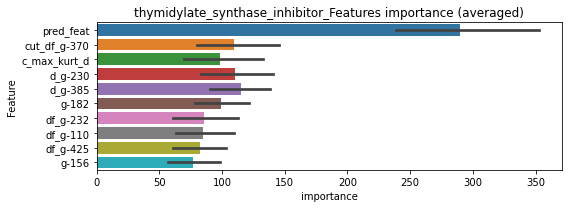

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.000548843	valid_1's binary_logloss: 0.00680993
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000252628	valid_1's binary_logloss: 0.000908775
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000209674	valid_1's binary_logloss: 0.00178534
Early stopping, best iteration is:
[1239]	training's binary_logloss: 0.000195233	valid_1's binary_logloss: 0.00177255


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


thymidylate_synthase_inhibitor logloss: 0.002968206481222085


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000406333	valid_1's binary_logloss: 0.00237352
neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023342	valid_1's binary_logloss: 0.00642696
[600]	training's binary_logloss: 0.000492892	valid_1's binary_logloss: 0.00238444
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00045375	valid_1's binary_logloss: 0.00227913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237326	valid_1's binary_logloss: 0.00614191
[600]	training's binary_logloss: 0.000490847	valid_1's binary_logloss: 0.00201001
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000465333	valid_1's binary_logloss: 0.00195051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239084	valid_1's binary_logloss: 0.00528803
[600]	training's binary_logloss: 0.000509742	valid_1's binary_logloss: 0.00182995
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000467947	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0033733, Threshold: 0.0220141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01541, conf_1:0.02862
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0220141
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.0720141
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1220141
threshold: 0.1220141, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000780401	valid_1's binary_logloss: 0.00125915
[600]	training's binary_logloss: 0.000199921	valid_1's binary_logloss: 0.000489581
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000168431	valid_1's binary_logloss: 0.000442636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000758102	valid_1's binary_logloss: 0.0029663
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000574713	valid_1's binary_logloss: 0.00265977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000764838	valid_1's binary_logloss: 0.00189328
[600]	training's binary_logloss: 0.000196395	valid_1's binary_logloss: 0.00114322
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000161446	valid_1's binary_logloss: 0.00102814
Training until validation scores don't improve for 30 r

2 / 3 AUC score:1.000
y_Threshold: 0.4829258, Threshold: 0.1220141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0547464 Vs.target_rate: 0.00126
Num_p_label: 218.0, conf_0:0.09761, conf_1:0.14642
Num_p_label: 218.0, Expected: 5.0, Adj_threshold_1: 0.1220141
Num_p_label: 215.0, Expected: 5.0, Adj_threshold_2: 0.1720141
Num_p_label: 215.0, Expected: 5.0, Adj_threshold_3: 0.2220141
Num_p_label: 212.0, Expected: 5.0, Adj_threshold_4: 0.2720141
Num_p_label: 206.0, Expected: 5.0, Adj_threshold_5: 0.3220141
Num_p_label: 202.0, Expected: 5.0, Adj_threshold_6: 0.3720141
Num_p_label: 184.0, Expected: 5.0, Adj_threshold_7: 0.4220141
Num_p_label: 141.0, Expected: 5.0, Adj_threshold_8: 0.4720141
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_9: 0.5220141


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000415945	valid_1's binary_logloss: 0.00341624


Num_p_label: 86.0, Expected: 5.0, Adj_threshold_10: 0.5720141
threshold: 0.6220141, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768777	valid_1's binary_logloss: 0.00279461
[600]	training's binary_logloss: 0.000201268	valid_1's binary_logloss: 0.00183789
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000190752	valid_1's binary_logloss: 0.00182619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813498	valid_1's binary_logloss: 0.00161735
[600]	training's binary_logloss: 0.000209036	valid_1's binary_logloss: 0.000784862
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000214222	valid_1's binary_logloss: 0.000783155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768616	valid_1's binary_logloss: 0.00294182
[600]	training's binary_logloss: 0.000198795	valid_1's binary_logloss: 0.00188093
[900]	training's binary_logloss: 0.00016046	valid_1's binary_logloss: 0.00181081
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.4121183, Threshold: 0.6220141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0085384 Vs.target_rate: 0.00126
Num_p_label: 34.0, conf_0:0.50000, conf_1:0.68422
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_1: 0.6220141
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_2: 0.6720141
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.7220141
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_4: 0.7720141
threshold: 0.7720141, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


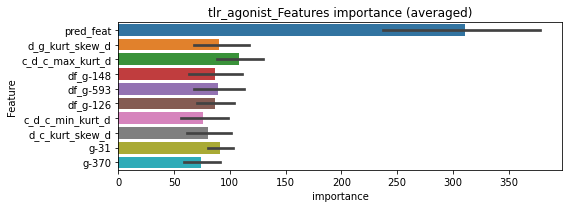

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 tlr_agonist=================================


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000246295	valid_1's binary_logloss: 0.00195802
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 tlr_agonist=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000289197	valid_1's binary_logloss: 0.00193384
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 tlr_agonist=================================


Early stopping, best iteration is:
[302]	training's binary_logloss: 0.000428697	valid_1's binary_logloss: 0.00273402
Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.0018394446969210736


Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000212417	valid_1's binary_logloss: 0.000719575
neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000509884	valid_1's binary_logloss: 0.000811645
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000234062	valid_1's binary_logloss: 0.000408729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000500955	valid_1's binary_logloss: 0.00293345
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000232715	valid_1's binary_logloss: 0.00227004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.000663934
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000235325	valid_1's binary_logloss: 0.000299685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000502653	valid_1's binary_logloss: 0.000687965


1 / 3 AUC score:1.000
y_Threshold: 0.0007275, Threshold: 0.0025077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00176, conf_1:0.00326
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0025077
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0525077
threshold: 0.0525077, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000233369	valid_1's binary_logloss: 0.000340502


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340564	valid_1's binary_logloss: 0.000366953
[600]	training's binary_logloss: 0.000149361	valid_1's binary_logloss: 0.000174382
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000134887	valid_1's binary_logloss: 0.000159202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000334916	valid_1's binary_logloss: 0.000843349
[600]	training's binary_logloss: 0.000143921	valid_1's binary_logloss: 0.000599115
[900]	training's binary_logloss: 0.000126684	valid_1's binary_logloss: 0.000580971
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000126684	valid_1's binary_logloss: 0.000580971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000331991	valid_1's binary_logloss: 0.000753715
[600]	training's binary_logloss: 0.000145248	valid_1's binary_logloss: 0.000521655


2 / 3 AUC score:1.000
y_Threshold: 0.3461159, Threshold: 0.0525077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0414365 Vs.target_rate: 0.00029
Num_p_label: 165.0, conf_0:0.04201, conf_1:0.06301
Num_p_label: 165.0, Expected: 1.2, Adj_threshold_1: 0.0525077
Num_p_label: 129.0, Expected: 1.2, Adj_threshold_2: 0.1025077
Num_p_label: 73.0, Expected: 1.2, Adj_threshold_3: 0.1525077
Num_p_label: 48.0, Expected: 1.2, Adj_threshold_4: 0.2025077
Num_p_label: 26.0, Expected: 1.2, Adj_threshold_5: 0.2525077
Num_p_label: 16.0, Expected: 1.2, Adj_threshold_6: 0.3025077
Num_p_label: 12.0, Expected: 1.2, Adj_threshold_7: 0.3525077
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_8: 0.4025077
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_9: 0.4525077
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.5025077
threshold: 0.5525077, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0003385	valid_1's binary_logloss: 0.000371495
[600]	training's binary_logloss: 0.000148386	valid_1's binary_logloss: 0.000178039
[900]	training's binary_logloss: 0.000131077	valid_1's binary_logloss: 0.000159055
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000131077	valid_1's binary_logloss: 0.000159055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00033315	valid_1's binary_logloss: 0.000845298
[600]	training's binary_logloss: 0.000143746	valid_1's binary_logloss: 0.000606862
[900]	training's binary_logloss: 0.000126237	valid_1's binary_logloss: 0.000590471
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000126719	valid_1's binary_logloss: 0.000590265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000327654	valid_1's binary_logloss: 0.00070668
[600

3 / 3 AUC score:1.000
y_Threshold: 0.3135007, Threshold: 0.5525077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, conf_0:0.49726, conf_1:0.60776
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.5525077
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.6025077


[900]	training's binary_logloss: 0.000124317	valid_1's binary_logloss: 0.000152984
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000124317	valid_1's binary_logloss: 0.000152984


threshold: 0.6025077, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


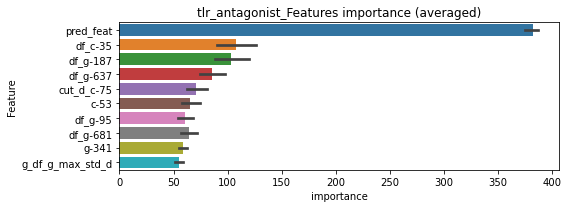

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000160104	valid_1's binary_logloss: 0.000171694
[2000]	training's binary_logloss: 0.00013586	valid_1's binary_logloss: 0.000145799


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Early stopping, best iteration is:
[2240]	training's binary_logloss: 0.000133728	valid_1's binary_logloss: 0.000143556
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000156649	valid_1's binary_logloss: 0.000313651
[2000]	training's binary_logloss: 0.000131732	valid_1's binary_logloss: 0.000287571


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.000130015	valid_1's binary_logloss: 0.000285788
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000189196	valid_1's binary_logloss: 0.000743415
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000156611	valid_1's binary_logloss: 0.000179014
[2000]	training's binary_logloss: 0.000131542	valid_1's binary_logloss: 0.000151265


tlr_antagonist logloss: 0.0003301603468912978


Early stopping, best iteration is:
[2401]	training's binary_logloss: 0.000127962	valid_1's binary_logloss: 0.000147171
neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309849	valid_1's binary_logloss: 0.0138143
[600]	training's binary_logloss: 0.000615801	valid_1's binary_logloss: 0.00730472
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000547662	valid_1's binary_logloss: 0.0070211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296004	valid_1's binary_logloss: 0.0175054
[600]	training's binary_logloss: 0.000599632	valid_1's binary_logloss: 0.0110314
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000538846	valid_1's binary_logloss: 0.0107907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298431	valid_1's binary_logloss: 0.0100907
[600]	training's binary_logloss: 0.000618169	valid_1's binary_logloss: 0.00545108
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000527199	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0047117, Threshold: 0.0205610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01439, conf_1:0.02673
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0205610
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0705610
threshold: 0.0705610, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906547	valid_1's binary_logloss: 0.0073853
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000384972	valid_1's binary_logloss: 0.00671468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00086671	valid_1's binary_logloss: 0.00206165
[600]	training's binary_logloss: 0.000201513	valid_1's binary_logloss: 0.000922907
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000162543	valid_1's binary_logloss: 0.000830199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892518	valid_1's binary_logloss: 0.0039374
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000479757	valid_1's binary_logloss: 0.00328162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000849954	valid_1's binary_logloss: 0.00199

2 / 3 AUC score:1.000
y_Threshold: 0.7111645, Threshold: 0.0705610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0504771 Vs.target_rate: 0.00151
Num_p_label: 201.0, conf_0:0.05645, conf_1:0.08467


[600]	training's binary_logloss: 0.000199106	valid_1's binary_logloss: 0.001065
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000202164	valid_1's binary_logloss: 0.0010582


Num_p_label: 201.0, Expected: 6.0, Adj_threshold_1: 0.0705610
Num_p_label: 200.0, Expected: 6.0, Adj_threshold_2: 0.1205610
Num_p_label: 199.0, Expected: 6.0, Adj_threshold_3: 0.1705610
Num_p_label: 197.0, Expected: 6.0, Adj_threshold_4: 0.2205610
Num_p_label: 195.0, Expected: 6.0, Adj_threshold_5: 0.2705610
Num_p_label: 192.0, Expected: 6.0, Adj_threshold_6: 0.3205610
Num_p_label: 191.0, Expected: 6.0, Adj_threshold_7: 0.3705610
Num_p_label: 190.0, Expected: 6.0, Adj_threshold_8: 0.4205610
Num_p_label: 188.0, Expected: 6.0, Adj_threshold_9: 0.4705610
Num_p_label: 184.0, Expected: 6.0, Adj_threshold_10: 0.5205610
threshold: 0.5705610, positive_p_label: 172.0/3982, p_label_rate: 0.0431944
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866832	valid_1's binary_logloss: 0.00289781
[600]	training's binary_logloss: 0.000209374	valid_1's binary_logloss: 0.00172892
[900]	training's binary_logloss: 0.000165765	valid_1's binary_logloss: 0.00163308
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.0001649	valid_1's binary_logloss: 0.00162974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925608	valid_1's binary_logloss: 0.00228897
[600]	training's binary_logloss: 0.000214949	valid_1's binary_logloss: 0.00144173
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000174204	valid_1's binary_logloss: 0.00138674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000877667	valid_1's binary_logloss: 0.00206412
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000242558	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.5343642, Threshold: 0.5705610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000184415	valid_1's binary_logloss: 0.0013651


p_label_rate: 0.0311401 Vs.target_rate: 0.00151
Num_p_label: 124.0, conf_0:0.50000, conf_1:0.62762
Num_p_label: 124.0, Expected: 6.0, Adj_threshold_1: 0.5705610
Num_p_label: 103.0, Expected: 6.0, Adj_threshold_2: 0.6205610
Num_p_label: 77.0, Expected: 6.0, Adj_threshold_3: 0.6705610
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_4: 0.7205610
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.7705610
threshold: 0.7705610, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


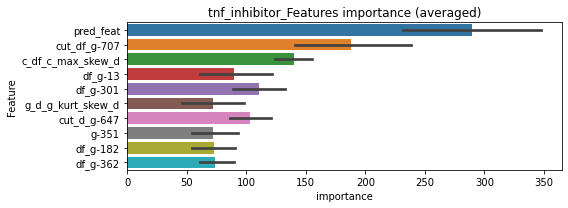

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000226583	valid_1's binary_logloss: 0.00164735


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000205944	valid_1's binary_logloss: 0.00150292
Early stopping, best iteration is:
[1682]	training's binary_logloss: 0.000175513	valid_1's binary_logloss: 0.00147599


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000438809	valid_1's binary_logloss: 0.00250534
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000203991	valid_1's binary_logloss: 0.00106232
Early stopping, best iteration is:
[1386]	training's binary_logloss: 0.000182191	valid_1's binary_logloss: 0.0010205


tnf_inhibitor logloss: 0.0016635383620005558


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148168	valid_1's binary_logloss: 0.117701
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00460512	valid_1's binary_logloss: 0.109728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159494	valid_1's binary_logloss: 0.0822951
[600]	training's binary_logloss: 0.00236194	valid_1's binary_logloss: 0.0639339
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0025527	valid_1's binary_logloss: 0.0637245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170628	valid_1's binary_logloss: 0.0560572
[600]	training's binary_logloss: 0.00250366	valid_1's binary_logloss: 0.0302712
[900]	training's binary_logloss: 0.00114787	valid_1's binary_logloss: 0.0264069
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.00101963	valid_1's binary_logloss: 0.025918

1 / 3 AUC score:0.992
y_Threshold: 0.0230565, Threshold: 0.1925065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, conf_0:0.13475, conf_1:0.25026
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1925065
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_2: 0.2425065
threshold: 0.2425065, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 636.0/3761, y_label_rate: 0.1691040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166294	valid_1's binary_logloss: 0.0059225
[600]	training's binary_logloss: 0.000267569	valid_1's binary_logloss: 0.00302085
[900]	training's binary_logloss: 0.000185073	valid_1's binary_logloss: 0.00278056
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000178195	valid_1's binary_logloss: 0.00276268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164126	valid_1's binary_logloss: 0.00643953
[600]	training's binary_logloss: 0.000262591	valid_1's binary_logloss: 0.00387986
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00021833	valid_1's binary_logloss: 0.0037876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016612	valid_1's binary_logloss: 0.0053761
[600]	training's binary_logloss: 0.000266758	valid_1's binary_logloss: 0.00281968
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.3141832, Threshold: 0.2425065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0718232 Vs.target_rate: 0.00533
Num_p_label: 286.0, conf_0:0.19401, conf_1:0.29101
Num_p_label: 286.0, Expected: 21.2, Adj_threshold_1: 0.2425065
Num_p_label: 262.0, Expected: 21.2, Adj_threshold_2: 0.2925065
Num_p_label: 240.0, Expected: 21.2, Adj_threshold_3: 0.3425065
Num_p_label: 210.0, Expected: 21.2, Adj_threshold_4: 0.3925065
Num_p_label: 191.0, Expected: 21.2, Adj_threshold_5: 0.4425065
Num_p_label: 183.0, Expected: 21.2, Adj_threshold_6: 0.4925065
Num_p_label: 178.0, Expected: 21.2, Adj_threshold_7: 0.5425065
Num_p_label: 177.0, Expected: 21.2, Adj_threshold_8: 0.5925065
Num_p_label: 173.0, Expected: 21.2, Adj_threshold_9: 0.6425065
Num_p_label: 170.0, Expected: 21.2, Adj_threshold_10: 0.6925065
threshold: 0.7425065, positive_p_label: 166.0/3982, p_label_rate: 0.0416876
positive_y_label: 632.0/3753, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158926	valid_1's binary_logloss: 0.00305269
[600]	training's binary_logloss: 0.000239498	valid_1's binary_logloss: 0.00048579
[900]	training's binary_logloss: 0.00015924	valid_1's binary_logloss: 0.000303571
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000146905	valid_1's binary_logloss: 0.000273799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153282	valid_1's binary_logloss: 0.00664854
[600]	training's binary_logloss: 0.000236576	valid_1's binary_logloss: 0.0040945
[900]	training's binary_logloss: 0.000158725	valid_1's binary_logloss: 0.00388245
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000155385	valid_1's binary_logloss: 0.00387296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156702	valid_1's binary_logloss: 0.00307977
[600]	train

3 / 3 AUC score:1.000
y_Threshold: 0.1227209, Threshold: 0.7425065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0426921 Vs.target_rate: 0.00533
Num_p_label: 170.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 170.0, Expected: 21.2, Adj_threshold_1: 0.7425065
Num_p_label: 153.0, Expected: 21.2, Adj_threshold_2: 0.7925065
threshold: 0.7925065, positive_p_label: 153.0/3982, p_label_rate: 0.0384229
positive_y_label: 631.0/3751, y_label_rate: 0.1682218


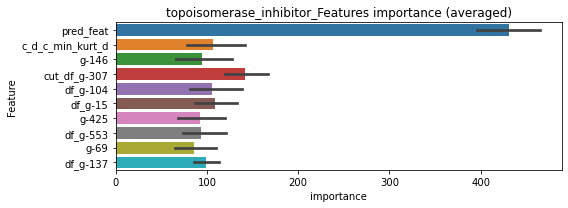

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151148	valid_1's binary_logloss: 0.000350806
[2000]	training's binary_logloss: 0.000111919	valid_1's binary_logloss: 0.000260425
[3000]	training's binary_logloss: 0.000103962	valid_1's binary_logloss: 0.000241857


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[3349]	training's binary_logloss: 0.000102887	valid_1's binary_logloss: 0.000239216
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151195	valid_1's binary_logloss: 0.00039406
[2000]	training's binary_logloss: 0.000111922	valid_1's binary_logloss: 0.000292279
[3000]	training's binary_logloss: 0.000104035	valid_1's binary_logloss: 0.000271598
Early stopping, best iteration is:
[3279]	training's binary_logloss: 0.000103077	valid_1's binary_logloss: 0.00026889


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150977	valid_1's binary_logloss: 0.000421785
[2000]	training's binary_logloss: 0.000111882	valid_1's binary_logloss: 0.0003137
[3000]	training's binary_logloss: 0.000104052	valid_1's binary_logloss: 0.000291698


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[3454]	training's binary_logloss: 0.000102687	valid_1's binary_logloss: 0.000287576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00020239	valid_1's binary_logloss: 0.000301313
[2000]	training's binary_logloss: 0.000153299	valid_1's binary_logloss: 0.000207876
Early stopping, best iteration is:
[2047]	training's binary_logloss: 0.00015237	valid_1's binary_logloss: 0.000205731


topoisomerase_inhibitor logloss: 0.0002503653159424123


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013835	valid_1's binary_logloss: 0.00280385
[600]	training's binary_logloss: 0.000398889	valid_1's binary_logloss: 0.00112589
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000398979	valid_1's binary_logloss: 0.00112584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013344	valid_1's binary_logloss: 0.0083682
[600]	training's binary_logloss: 0.000385801	valid_1's binary_logloss: 0.00510401
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000387308	valid_1's binary_logloss: 0.00510312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140348	valid_1's binary_logloss: 0.00448728
[600]	training's binary_logloss: 0.00038342	valid_1's binary_logloss: 0.00276523
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000388029	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0023857, Threshold: 0.0150611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.01054, conf_1:0.01958
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0150611
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0650611
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1150611
threshold: 0.1150611, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00058712	valid_1's binary_logloss: 0.000693707
[600]	training's binary_logloss: 0.000182279	valid_1's binary_logloss: 0.000220095
[900]	training's binary_logloss: 0.000154241	valid_1's binary_logloss: 0.000186825
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000149922	valid_1's binary_logloss: 0.00017759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000556668	valid_1's binary_logloss: 0.0023228
[600]	training's binary_logloss: 0.000174338	valid_1's binary_logloss: 0.00175255
[900]	training's binary_logloss: 0.000142672	valid_1's binary_logloss: 0.0017136
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000140408	valid_1's binary_logloss: 0.00171121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000564172	valid_1's binary_logloss: 0.000934596
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.4543651, Threshold: 0.1150611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0484681 Vs.target_rate: 0.00076
Num_p_label: 193.0, conf_0:0.09205, conf_1:0.13807
Num_p_label: 193.0, Expected: 3.0, Adj_threshold_1: 0.1150611
Num_p_label: 193.0, Expected: 3.0, Adj_threshold_2: 0.1650611
Num_p_label: 192.0, Expected: 3.0, Adj_threshold_3: 0.2150611
Num_p_label: 191.0, Expected: 3.0, Adj_threshold_4: 0.2650611
Num_p_label: 186.0, Expected: 3.0, Adj_threshold_5: 0.3150611
Num_p_label: 180.0, Expected: 3.0, Adj_threshold_6: 0.3650611
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_7: 0.4150611
Num_p_label: 159.0, Expected: 3.0, Adj_threshold_8: 0.4650611
Num_p_label: 147.0, Expected: 3.0, Adj_threshold_9: 0.5150611
Num_p_label: 134.0, Expected: 3.0, Adj_threshold_10: 0.5650611
threshold: 0.6150611, positive_p_label: 119.0/3982, p_label_rate: 0.0298845
positive_y_label: 657.0/3812, y_label_rate: 0.1723505

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000575856	valid_1's binary_logloss: 0.000676876
[600]	training's binary_logloss: 0.000182096	valid_1's binary_logloss: 0.000222972
[900]	training's binary_logloss: 0.000152112	valid_1's binary_logloss: 0.00018837
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000150066	valid_1's binary_logloss: 0.000184189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000554541	valid_1's binary_logloss: 0.00220392
[600]	training's binary_logloss: 0.000173583	valid_1's binary_logloss: 0.00160564
[900]	training's binary_logloss: 0.000141269	valid_1's binary_logloss: 0.00156623
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000139317	valid_1's binary_logloss: 0.00156386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568454	valid_1's binary_logloss: 0.00112157
[600]	

3 / 3 AUC score:1.000
y_Threshold: 0.4515012, Threshold: 0.6150611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0276243 Vs.target_rate: 0.00076
Num_p_label: 110.0, conf_0:0.50000, conf_1:0.67657
Num_p_label: 110.0, Expected: 3.0, Adj_threshold_1: 0.6150611
Num_p_label: 92.0, Expected: 3.0, Adj_threshold_2: 0.6650611
Num_p_label: 74.0, Expected: 3.0, Adj_threshold_3: 0.7150611
Num_p_label: 58.0, Expected: 3.0, Adj_threshold_4: 0.7650611
threshold: 0.7650611, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


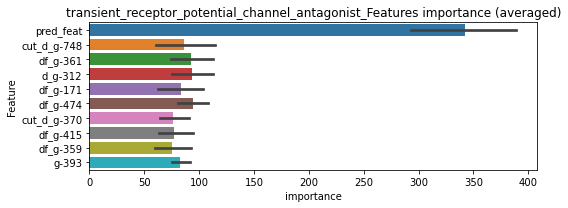

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000190542	valid_1's binary_logloss: 0.000270546
Early stopping, best iteration is:
[1554]	training's binary_logloss: 0.000167086	valid_1's binary_logloss: 0.000235441


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000180547	valid_1's binary_logloss: 0.00143197
[2000]	training's binary_logloss: 0.000148583	valid_1's binary_logloss: 0.00139093
Early stopping, best iteration is:
[2058]	training's binary_logloss: 0.000147917	valid_1's binary_logloss: 0.00138997


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000182938	valid_1's binary_logloss: 0.000775656


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.00017145	valid_1's binary_logloss: 0.000760909
Training until validation scores don't improve for 30 rounds


transient_receptor_potential_channel_antagonist logloss: 0.0010809637664235534


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.000395541	valid_1's binary_logloss: 0.00193654
neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000378016	valid_1's binary_logloss: 0.000976139
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000190868	valid_1's binary_logloss: 0.000649018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000375979	valid_1's binary_logloss: 0.000499755
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000188225	valid_1's binary_logloss: 0.000247976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000379462	valid_1's binary_logloss: 0.000879149
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000190524	valid_1's binary_logloss: 0.000460191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038227	valid_1's binary_logloss: 0.000535262


1 / 3 AUC score:1.000
y_Threshold: 0.0005457, Threshold: 0.0013785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00096, conf_1:0.00179
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013785
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0513785
threshold: 0.0513785, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000186779	valid_1's binary_logloss: 0.000281691


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000280306	valid_1's binary_logloss: 0.000618578
[600]	training's binary_logloss: 0.000133902	valid_1's binary_logloss: 0.000434019
[900]	training's binary_logloss: 0.000121996	valid_1's binary_logloss: 0.000422633
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000122316	valid_1's binary_logloss: 0.000422468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000273666	valid_1's binary_logloss: 0.00044404
[600]	training's binary_logloss: 0.000130004	valid_1's binary_logloss: 0.000251419
[900]	training's binary_logloss: 0.000116822	valid_1's binary_logloss: 0.000235423
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000116872	valid_1's binary_logloss: 0.000235413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000280985	valid_1's binary_logloss: 0.000260735
[

2 / 3 AUC score:1.000
y_Threshold: 0.2256056, Threshold: 0.0513785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0323958 Vs.target_rate: 0.00025
Num_p_label: 129.0, conf_0:0.04110, conf_1:0.06165
Num_p_label: 129.0, Expected: 1.0, Adj_threshold_1: 0.0513785
Num_p_label: 59.0, Expected: 1.0, Adj_threshold_2: 0.1013785
Num_p_label: 31.0, Expected: 1.0, Adj_threshold_3: 0.1513785
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_4: 0.2013785
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_5: 0.2513785
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.3013785
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.3513785
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.4013785
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.4513785
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_10: 0.5013785
threshold: 0.5013785, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000144575	valid_1's binary_logloss: 0.000249376


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000278615	valid_1's binary_logloss: 0.000658519
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000158334	valid_1's binary_logloss: 0.000485262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000277318	valid_1's binary_logloss: 0.00050177
[600]	training's binary_logloss: 0.000132952	valid_1's binary_logloss: 0.000303848
[900]	training's binary_logloss: 0.000120208	valid_1's binary_logloss: 0.000290245
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000119789	valid_1's binary_logloss: 0.000290018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000280105	valid_1's binary_logloss: 0.000264519
[600]	training's binary_logloss: 0.000134398	valid_1's binary_logloss: 0.000119602
[900]	training's binary_logloss: 0.000121538	valid_1's binary_logloss: 0.000105827
E

3 / 3 AUC score:1.000
y_Threshold: 0.1882361, Threshold: 0.5013785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.45124, conf_1:0.55152
threshold: 0.5013785, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000167404	valid_1's binary_logloss: 0.000488332


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


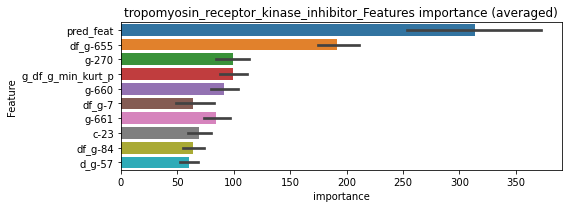

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000144056	valid_1's binary_logloss: 0.000325267
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000144336	valid_1's binary_logloss: 0.000325173
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143172	valid_1's binary_logloss: 0.000308654
[2000]	training's binary_logloss: 0.000122072	valid_1's binary_logloss: 0.000286524


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.000119902	valid_1's binary_logloss: 0.000283997
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143454	valid_1's binary_logloss: 0.00012885
[2000]	training's binary_logloss: 0.000123346	valid_1's binary_logloss: 0.000107541
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.000119953	valid_1's binary_logloss: 0.000103956


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014316	valid_1's binary_logloss: 0.000218854


tropomyosin_receptor_kinase_inhibitor logloss: 0.00023033132807521745


Early stopping, best iteration is:
[1427]	training's binary_logloss: 0.00013063	valid_1's binary_logloss: 0.000207933
neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184623	valid_1's binary_logloss: 0.00850075
[600]	training's binary_logloss: 0.000453715	valid_1's binary_logloss: 0.00482588
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000440144	valid_1's binary_logloss: 0.00478638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190812	valid_1's binary_logloss: 0.00412177
[600]	training's binary_logloss: 0.000470677	valid_1's binary_logloss: 0.00164005
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000421092	valid_1's binary_logloss: 0.00153041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186022	valid_1's binary_logloss: 0.00455544
[600]	training's binary_logloss: 0.000462835	valid_1's binary_logloss: 0.00188117
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000442348	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023962, Threshold: 0.0094807, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00664, conf_1:0.01232
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0094807
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0594807
threshold: 0.0594807, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696721	valid_1's binary_logloss: 0.00310018
[600]	training's binary_logloss: 0.000192478	valid_1's binary_logloss: 0.00242443
[900]	training's binary_logloss: 0.000156155	valid_1's binary_logloss: 0.00235861
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000157115	valid_1's binary_logloss: 0.00235212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000685467	valid_1's binary_logloss: 0.000976796
[600]	training's binary_logloss: 0.000188159	valid_1's binary_logloss: 0.000389975
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000167874	valid_1's binary_logloss: 0.000379816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691385	valid_1's binary_logloss: 0.00135529
[600]	training's binary_logloss: 0.000190882	valid_1's binary_logloss: 0.000668564
Early

2 / 3 AUC score:1.000
y_Threshold: 0.4796741, Threshold: 0.0594807, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0532396 Vs.target_rate: 0.00105
Num_p_label: 212.0, conf_0:0.04758, conf_1:0.07138
Num_p_label: 212.0, Expected: 4.2, Adj_threshold_1: 0.0594807
Num_p_label: 211.0, Expected: 4.2, Adj_threshold_2: 0.1094807
Num_p_label: 209.0, Expected: 4.2, Adj_threshold_3: 0.1594807
Num_p_label: 209.0, Expected: 4.2, Adj_threshold_4: 0.2094807
Num_p_label: 208.0, Expected: 4.2, Adj_threshold_5: 0.2594807
Num_p_label: 204.0, Expected: 4.2, Adj_threshold_6: 0.3094807


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000202868	valid_1's binary_logloss: 0.000452585


Num_p_label: 193.0, Expected: 4.2, Adj_threshold_7: 0.3594807
Num_p_label: 174.0, Expected: 4.2, Adj_threshold_8: 0.4094807
Num_p_label: 150.0, Expected: 4.2, Adj_threshold_9: 0.4594807
Num_p_label: 113.0, Expected: 4.2, Adj_threshold_10: 0.5094807
threshold: 0.5594807, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069846	valid_1's binary_logloss: 0.00278431
[600]	training's binary_logloss: 0.000191016	valid_1's binary_logloss: 0.00203299
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000158807	valid_1's binary_logloss: 0.00198989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696119	valid_1's binary_logloss: 0.00107492
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000217051	valid_1's binary_logloss: 0.000482872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000688643	valid_1's binary_logloss: 0.00130369
[600]	training's binary_logloss: 0.000191159	valid_1's binary_logloss: 0.000623427
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000155566	valid_1's binary_logloss: 0.000550281
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.3848478, Threshold: 0.5594807, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0198393 Vs.target_rate: 0.00105
Num_p_label: 79.0, conf_0:0.50000, conf_1:0.61543
Num_p_label: 79.0, Expected: 4.2, Adj_threshold_1: 0.5594807
Num_p_label: 50.0, Expected: 4.2, Adj_threshold_2: 0.6094807
Num_p_label: 35.0, Expected: 4.2, Adj_threshold_3: 0.6594807
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_4: 0.7094807
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_5: 0.7594807


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000211465	valid_1's binary_logloss: 0.00049045


threshold: 0.7594807, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


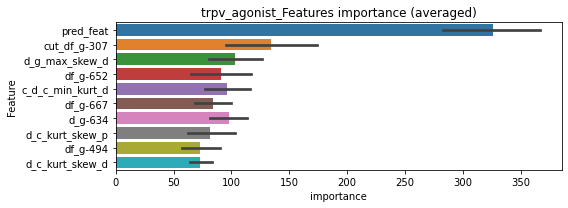

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000193419	valid_1's binary_logloss: 0.00205585
[2000]	training's binary_logloss: 0.000158241	valid_1's binary_logloss: 0.0020173
Early stopping, best iteration is:
[2086]	training's binary_logloss: 0.000157318	valid_1's binary_logloss: 0.00201533


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000194373	valid_1's binary_logloss: 0.000317632
Early stopping, best iteration is:
[1579]	training's binary_logloss: 0.000167871	valid_1's binary_logloss: 0.000277931


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000195498	valid_1's binary_logloss: 0.000341971
[2000]	training's binary_logloss: 0.000161199	valid_1's binary_logloss: 0.000294123
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.000160433	valid_1's binary_logloss: 0.000293137


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


trpv_agonist logloss: 0.0007694809405214918


Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000208555	valid_1's binary_logloss: 0.00048752
neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356986	valid_1's binary_logloss: 0.0237697
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00106133	valid_1's binary_logloss: 0.0185808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364414	valid_1's binary_logloss: 0.0174984
[600]	training's binary_logloss: 0.000736468	valid_1's binary_logloss: 0.0094337
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000546252	valid_1's binary_logloss: 0.00876476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038298	valid_1's binary_logloss: 0.00822246
[600]	training's binary_logloss: 0.000772537	valid_1's binary_logloss: 0.00258542
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000589197	valid_1's binary_logloss: 0.00215486
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:0.999
y_Threshold: 0.0052528, Threshold: 0.0237431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.01662, conf_1:0.03087
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0237431
Num_p_label: 10.0, Expected: 8.0, Adj_threshold_2: 0.0737431
threshold: 0.0737431, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000968963	valid_1's binary_logloss: 0.00260309
[600]	training's binary_logloss: 0.000219437	valid_1's binary_logloss: 0.00128186
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000182814	valid_1's binary_logloss: 0.00115228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000957933	valid_1's binary_logloss: 0.00360287
[600]	training's binary_logloss: 0.0002197	valid_1's binary_logloss: 0.00246102
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000173464	valid_1's binary_logloss: 0.00238306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925697	valid_1's binary_logloss: 0.00556752
[600]	training's binary_logloss: 0.000219352	valid_1's binary_logloss: 0.0045365
[900]	training's binary_logloss: 0.000172443	valid_1's binary_logloss: 0.00445685
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.4486799, Threshold: 0.0737431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0612757 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000174364	valid_1's binary_logloss: 0.000760301


Num_p_label: 244.0, conf_0:0.05899, conf_1:0.08849
Num_p_label: 244.0, Expected: 8.0, Adj_threshold_1: 0.0737431
Num_p_label: 237.0, Expected: 8.0, Adj_threshold_2: 0.1237431
Num_p_label: 234.0, Expected: 8.0, Adj_threshold_3: 0.1737431
Num_p_label: 233.0, Expected: 8.0, Adj_threshold_4: 0.2237431
Num_p_label: 218.0, Expected: 8.0, Adj_threshold_5: 0.2737431
Num_p_label: 196.0, Expected: 8.0, Adj_threshold_6: 0.3237431
Num_p_label: 168.0, Expected: 8.0, Adj_threshold_7: 0.3737431
Num_p_label: 128.0, Expected: 8.0, Adj_threshold_8: 0.4237431
Num_p_label: 85.0, Expected: 8.0, Adj_threshold_9: 0.4737431
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_10: 0.5237431
threshold: 0.5737431, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000985988	valid_1's binary_logloss: 0.00353204
[600]	training's binary_logloss: 0.000223423	valid_1's binary_logloss: 0.00252882
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000185297	valid_1's binary_logloss: 0.0024338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000941084	valid_1's binary_logloss: 0.00282643
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000260718	valid_1's binary_logloss: 0.00161428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000945624	valid_1's binary_logloss: 0.00304823
[600]	training's binary_logloss: 0.000221033	valid_1's binary_logloss: 0.00205344
[900]	training's binary_logloss: 0.000171845	valid_1's binary_logloss: 0.00197726
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000167622	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.3143265, Threshold: 0.5737431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, conf_0:0.50000, conf_1:0.63112
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_1: 0.5737431
threshold: 0.5737431, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


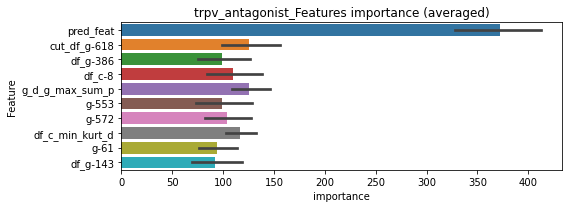

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 trpv_antagonist=================================


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000341527	valid_1's binary_logloss: 0.00321558
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000207367	valid_1's binary_logloss: 0.000357764
Early stopping, best iteration is:
[1934]	training's binary_logloss: 0.000168327	valid_1's binary_logloss: 0.000289478


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 trpv_antagonist=================================


Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000260322	valid_1's binary_logloss: 0.00405479
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212263	valid_1's binary_logloss: 0.000544626
Early stopping, best iteration is:
[1530]	training's binary_logloss: 0.000182146	valid_1's binary_logloss: 0.000499938


trpv_antagonist logloss: 0.002018724167622983


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253
target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432577	valid_1's binary_logloss: 0.294403
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.050507	valid_1's binary_logloss: 0.292932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0520772	valid_1's binary_logloss: 0.280484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0456132	valid_1's binary_logloss: 0.282273
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0426969	valid_1's binary_logloss: 0.28173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472184	valid_1's binary_logloss: 0.273491
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.052989	valid_1's binary_logloss: 0.272917


1 / 3 AUC score:0.863
y_Threshold: 0.1084850, Threshold: 0.2666399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 499 → Positive_corect_labels: 466/3404
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, conf_0:0.18665, conf_1:0.34663
threshold: 0.2666399, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 466.0/3404, y_label_rate: 0.1368978
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177801	valid_1's binary_logloss: 0.00581765
[600]	training's binary_logloss: 0.000264301	valid_1's binary_logloss: 0.00155209
[900]	training's binary_logloss: 0.000171868	valid_1's binary_logloss: 0.00124419
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000174687	valid_1's binary_logloss: 0.00123856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177052	valid_1's binary_logloss: 0.00424458
[600]	training's binary_logloss: 0.000263048	valid_1's binary_logloss: 0.000571526
[900]	training's binary_logloss: 0.00017521	valid_1's binary_logloss: 0.000328381
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.00016581	valid_1's binary_logloss: 0.000299616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162762	valid_1's binary_logloss: 0.00448254
[600]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.1059177, Threshold: 0.2666399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 466.0/3404
p_label_rate: 0.1127574 Vs.target_rate: 0.01327
Num_p_label: 449.0, conf_0:0.21331, conf_1:0.31997
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_1: 0.2666399


Early stopping, best iteration is:
[1316]	training's binary_logloss: 0.000112213	valid_1's binary_logloss: 0.000398636


Num_p_label: 449.0, Expected: 52.8, Adj_threshold_2: 0.3166399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_3: 0.3666399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_4: 0.4166399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_5: 0.4666399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_6: 0.5166399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_7: 0.5666399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_8: 0.6166399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_9: 0.6666399
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_10: 0.7166399
threshold: 0.7666399, positive_p_label: 449.0/3982, p_label_rate: 0.1127574
positive_y_label: 466.0/3404, y_label_rate: 0.1368978
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179762	valid_1's binary_logloss: 0.0087483
[600]	training's binary_logloss: 0.000260344	valid_1's binary_logloss: 0.00476141
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00022974	valid_1's binary_logloss: 0.00454428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177008	valid_1's binary_logloss: 0.0144468
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000802152	valid_1's binary_logloss: 0.0126847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163424	valid_1's binary_logloss: 0.00431465
[600]	training's binary_logloss: 0.000204967	valid_1's binary_logloss: 0.000584321
[900]	training's binary_logloss: 0.000122163	valid_1's binary_logloss: 0.000350597
[1200]	training's binary_logloss: 0.000113211	valid_1's binary_logloss: 0.000324197
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.7093256, Threshold: 0.7666399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 462.0/3396
p_label_rate: 0.1127574 Vs.target_rate: 0.01327
Num_p_label: 449.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 449.0, Expected: 52.8, Adj_threshold_1: 0.7666399


Early stopping, best iteration is:
[1363]	training's binary_logloss: 0.000111901	valid_1's binary_logloss: 0.00041388


threshold: 0.7666399, positive_p_label: 449.0/3982, p_label_rate: 0.1127574
positive_y_label: 462.0/3396, y_label_rate: 0.1360424


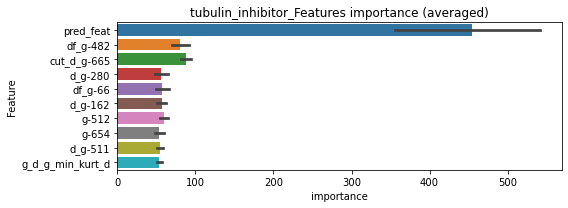

len(train_index) : 2547
len(valid_index) : 849
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00024597	valid_1's binary_logloss: 0.00106736
[2000]	training's binary_logloss: 0.000194786	valid_1's binary_logloss: 0.00090462
Early stopping, best iteration is:
[2072]	training's binary_logloss: 0.000193633	valid_1's binary_logloss: 0.000901238


len(train_index) : 2547
len(valid_index) : 849
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2547
len(valid_index) : 849
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000334353	valid_1's binary_logloss: 0.00279931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000242104	valid_1's binary_logloss: 0.00438821
Early stopping, best iteration is:
[1471]	training's binary_logloss: 0.000205394	valid_1's binary_logloss: 0.00431356


len(train_index) : 2547
len(valid_index) : 849
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tubulin_inhibitor logloss: 0.003473111712899019


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000379936	valid_1's binary_logloss: 0.00582762
neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617364	valid_1's binary_logloss: 0.0543903
[600]	training's binary_logloss: 0.00112012	valid_1's binary_logloss: 0.0428587
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00106464	valid_1's binary_logloss: 0.0425751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580987	valid_1's binary_logloss: 0.0500476
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00137368	valid_1's binary_logloss: 0.0429497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677092	valid_1's binary_logloss: 0.0300532
[600]	training's binary_logloss: 0.00119364	valid_1's binary_logloss: 0.0225187
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00113395	valid_1's binary_logloss: 0.0224404
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.998
y_Threshold: 0.0073632, Threshold: 0.0600778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.04205, conf_1:0.07810
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0600778
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.1100778
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_3: 0.1600778
threshold: 0.1600778, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113369	valid_1's binary_logloss: 0.00324165
[600]	training's binary_logloss: 0.000235547	valid_1's binary_logloss: 0.00129262
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000187201	valid_1's binary_logloss: 0.00110451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114593	valid_1's binary_logloss: 0.0051359
[600]	training's binary_logloss: 0.000234169	valid_1's binary_logloss: 0.00368656
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000219343	valid_1's binary_logloss: 0.00365135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117178	valid_1's binary_logloss: 0.0069667
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000474691	valid_1's binary_logloss: 0.005822
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.2122103, Threshold: 0.1600778, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000170165	valid_1's binary_logloss: 0.000566993


Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0625314 Vs.target_rate: 0.00307
Num_p_label: 249.0, conf_0:0.12806, conf_1:0.19209
Num_p_label: 249.0, Expected: 12.2, Adj_threshold_1: 0.1600778
Num_p_label: 187.0, Expected: 12.2, Adj_threshold_2: 0.2100778
Num_p_label: 117.0, Expected: 12.2, Adj_threshold_3: 0.2600778
Num_p_label: 92.0, Expected: 12.2, Adj_threshold_4: 0.3100778
Num_p_label: 86.0, Expected: 12.2, Adj_threshold_5: 0.3600778
Num_p_label: 85.0, Expected: 12.2, Adj_threshold_6: 0.4100778
Num_p_label: 84.0, Expected: 12.2, Adj_threshold_7: 0.4600778
Num_p_label: 79.0, Expected: 12.2, Adj_threshold_8: 0.5100778
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_9: 0.5600778
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_10: 0.6100778
threshold: 0.6600778, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 647.0/3787, y_label_rate: 0.1708476
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105677	valid_1's binary_logloss: 0.00258619
[600]	training's binary_logloss: 0.000212097	valid_1's binary_logloss: 0.000673927
[900]	training's binary_logloss: 0.00015536	valid_1's binary_logloss: 0.000529303
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000145488	valid_1's binary_logloss: 0.00050119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109012	valid_1's binary_logloss: 0.00613988
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000485784	valid_1's binary_logloss: 0.0053902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107873	valid_1's binary_logloss: 0.00211125
[600]	training's binary_logloss: 0.000216092	valid_1's binary_logloss: 0.00047191
[900]	training's binary_logloss: 0.000156907	valid_1's binary_logloss: 0.000326328
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.0801774, Threshold: 0.6600778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0160723 Vs.target_rate: 0.00307
Num_p_label: 64.0, conf_0:0.50000, conf_1:0.72609
Num_p_label: 64.0, Expected: 12.2, Adj_threshold_1: 0.6600778
Num_p_label: 64.0, Expected: 12.2, Adj_threshold_2: 0.7100778
Num_p_label: 62.0, Expected: 12.2, Adj_threshold_3: 0.7600778
threshold: 0.7600778, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


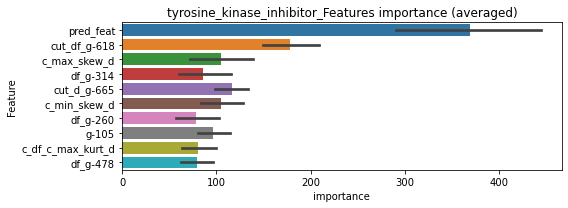

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148065	valid_1's binary_logloss: 0.000401283
[2000]	training's binary_logloss: 0.000110617	valid_1's binary_logloss: 0.000300619
[3000]	training's binary_logloss: 0.000102881	valid_1's binary_logloss: 0.000279305
Early stopping, best iteration is:
[3265]	training's binary_logloss: 0.00010202	valid_1's binary_logloss: 0.000276788


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148267	valid_1's binary_logloss: 0.000382199
[2000]	training's binary_logloss: 0.000110668	valid_1's binary_logloss: 0.000286136
[3000]	training's binary_logloss: 0.00010288	valid_1's binary_logloss: 0.000265794
Early stopping, best iteration is:
[3492]	training's binary_logloss: 0.000101456	valid_1's binary_logloss: 0.000261855


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 946


Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000203031	valid_1's binary_logloss: 0.00195319


================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000197492	valid_1's binary_logloss: 0.000525117


tyrosine_kinase_inhibitor logloss: 0.0007337007646300343


Early stopping, best iteration is:
[1873]	training's binary_logloss: 0.000162055	valid_1's binary_logloss: 0.000442647
neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737744	valid_1's binary_logloss: 0.00388721
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000284061	valid_1's binary_logloss: 0.0028773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000755094	valid_1's binary_logloss: 0.0018734
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000281489	valid_1's binary_logloss: 0.00101998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765509	valid_1's binary_logloss: 0.00102587
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000279559	valid_1's binary_logloss: 0.000422039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073872	valid_1's binary_logloss: 0.00183129
[600]	training's binary_logloss: 0.000281621	valid_1's binary_logloss: 0.001111

1 / 3 AUC score:1.000
y_Threshold: 0.0010207, Threshold: 0.0039940, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00280, conf_1:0.00519
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0039940
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0539940
threshold: 0.0539940, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000421778	valid_1's binary_logloss: 0.00162709
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000195976	valid_1's binary_logloss: 0.00129801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000426105	valid_1's binary_logloss: 0.000568466
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000186772	valid_1's binary_logloss: 0.000316513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000422996	valid_1's binary_logloss: 0.000719836
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000211951	valid_1's binary_logloss: 0.000508062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000417111	valid_1's binary_logloss: 0.00108341
[600]	training's binary_logloss: 0.000160226	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.3053711, Threshold: 0.0539940, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0512305 Vs.target_rate: 0.00050
Num_p_label: 204.0, conf_0:0.04320, conf_1:0.06479
Num_p_label: 204.0, Expected: 2.0, Adj_threshold_1: 0.0539940
Num_p_label: 203.0, Expected: 2.0, Adj_threshold_2: 0.1039940
Num_p_label: 203.0, Expected: 2.0, Adj_threshold_3: 0.1539940


[900]	training's binary_logloss: 0.000138629	valid_1's binary_logloss: 0.000764001
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000138636	valid_1's binary_logloss: 0.000763998


Num_p_label: 198.0, Expected: 2.0, Adj_threshold_4: 0.2039940
Num_p_label: 172.0, Expected: 2.0, Adj_threshold_5: 0.2539940
Num_p_label: 143.0, Expected: 2.0, Adj_threshold_6: 0.3039940
Num_p_label: 114.0, Expected: 2.0, Adj_threshold_7: 0.3539940
Num_p_label: 84.0, Expected: 2.0, Adj_threshold_8: 0.4039940
Num_p_label: 50.0, Expected: 2.0, Adj_threshold_9: 0.4539940
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_10: 0.5039940
threshold: 0.5539940, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000422819	valid_1's binary_logloss: 0.00168805
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000177178	valid_1's binary_logloss: 0.0012767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000426765	valid_1's binary_logloss: 0.000556663
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000186356	valid_1's binary_logloss: 0.000306393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000422071	valid_1's binary_logloss: 0.00067502
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000213595	valid_1's binary_logloss: 0.000451867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00042185	valid_1's binary_logloss: 0.00109282
[600]	training's binary_logloss: 0.000159627	valid_1's binary_logloss: 0.000

3 / 3 AUC score:1.000
y_Threshold: 0.2702490, Threshold: 0.5539940, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, conf_0:0.49859, conf_1:0.60939
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.5539940
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_2: 0.6039940
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.6539940
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.7039940
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7539940
threshold: 0.7539940, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


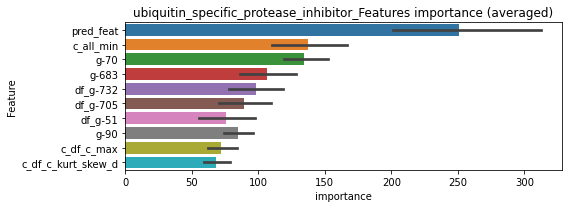

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000332846	valid_1's binary_logloss: 0.00162931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000167704	valid_1's binary_logloss: 0.000217001
Early stopping, best iteration is:
[1868]	training's binary_logloss: 0.000143256	valid_1's binary_logloss: 0.000196152


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.000499566
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171381	valid_1's binary_logloss: 0.000653908
[2000]	training's binary_logloss: 0.000144753	valid_1's binary_logloss: 0.000619929
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.00014282	valid_1's binary_logloss: 0.000616803


ubiquitin_specific_protease_inhibitor logloss: 0.0007357038140706417


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264
target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200604	valid_1's binary_logloss: 0.161738
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.0098279	valid_1's binary_logloss: 0.157434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213151	valid_1's binary_logloss: 0.11629
[600]	training's binary_logloss: 0.00332579	valid_1's binary_logloss: 0.0989006
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00349593	valid_1's binary_logloss: 0.0986015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209994	valid_1's binary_logloss: 0.12601
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00894902	valid_1's binary_logloss: 0.119783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202072	valid_1's binary_logloss: 0.130519
Early stopping, best ite

1 / 3 AUC score:0.974
y_Threshold: 0.0343862, Threshold: 0.2012254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 230 → Positive_corect_labels: 603/3686
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.14086, conf_1:0.26159
threshold: 0.2012254, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 603.0/3686, y_label_rate: 0.1635920
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162754	valid_1's binary_logloss: 0.00653984
[600]	training's binary_logloss: 0.000252248	valid_1's binary_logloss: 0.00346094
[900]	training's binary_logloss: 0.00016749	valid_1's binary_logloss: 0.00324589
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.0001651	valid_1's binary_logloss: 0.00324232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165509	valid_1's binary_logloss: 0.00530942
[600]	training's binary_logloss: 0.000260253	valid_1's binary_logloss: 0.00236028
[900]	training's binary_logloss: 0.000170994	valid_1's binary_logloss: 0.00213479
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000164307	valid_1's binary_logloss: 0.00211314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170478	valid_1's binary_logloss: 0.00507152
[600]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.6652500, Threshold: 0.2012254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 601.0/3682
p_label_rate: 0.0828729 Vs.target_rate: 0.00714
Num_p_label: 330.0, conf_0:0.16098, conf_1:0.24147
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_1: 0.2012254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_2: 0.2512254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_3: 0.3012254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_4: 0.3512254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_5: 0.4012254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_6: 0.4512254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_7: 0.5012254
Num_p_label: 330.0, Expected: 28.4, Adj_threshold_8: 0.5512254
Num_p_label: 329.0, Expected: 28.4, Adj_threshold_9: 0.6012254
Num_p_label: 328.0, Expected: 28.4, Adj_threshold_10: 0.6512254
threshold: 0.7012254, positive_p_label: 327.0/3982, p_label_rate: 0.0821195
positive_y_label: 601.0/3682, y_label_rate:

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157793	valid_1's binary_logloss: 0.00395579
[600]	training's binary_logloss: 0.000238876	valid_1's binary_logloss: 0.00122095
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00020462	valid_1's binary_logloss: 0.00117981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141748	valid_1's binary_logloss: 0.00361761
[600]	training's binary_logloss: 0.000184389	valid_1's binary_logloss: 0.000511072
[900]	training's binary_logloss: 0.000112359	valid_1's binary_logloss: 0.000313572
[1200]	training's binary_logloss: 0.000104601	valid_1's binary_logloss: 0.000291633
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.000103498	valid_1's binary_logloss: 0.000288117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161148	valid_1's binary_logloss: 0.00498024
[600]	t

3 / 3 AUC score:1.000
y_Threshold: 0.7982737, Threshold: 0.7012254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 600.0/3680
p_label_rate: 0.0823707 Vs.target_rate: 0.00714
Num_p_label: 328.0, conf_0:0.50000, conf_1:0.77135
Num_p_label: 328.0, Expected: 28.4, Adj_threshold_1: 0.7012254
Num_p_label: 328.0, Expected: 28.4, Adj_threshold_2: 0.7512254
threshold: 0.7512254, positive_p_label: 328.0/3982, p_label_rate: 0.0823707
positive_y_label: 600.0/3680, y_label_rate: 0.1630435


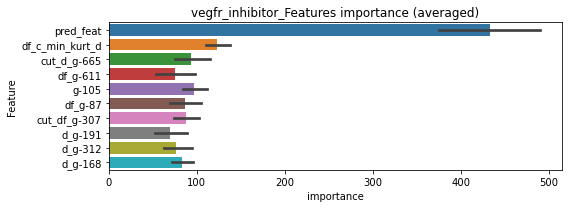

len(train_index) : 2760
len(valid_index) : 920
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154307	valid_1's binary_logloss: 0.000360902
[2000]	training's binary_logloss: 0.000114188	valid_1's binary_logloss: 0.000267615
[3000]	training's binary_logloss: 0.000106025	valid_1's binary_logloss: 0.000248273
Early stopping, best iteration is:
[3480]	training's binary_logloss: 0.000104655	valid_1's binary_logloss: 0.000244933


len(train_index) : 2760
len(valid_index) : 920
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154166	valid_1's binary_logloss: 0.000406164
[2000]	training's binary_logloss: 0.000114119	valid_1's binary_logloss: 0.000301504
[3000]	training's binary_logloss: 0.000105954	valid_1's binary_logloss: 0.000279637


len(train_index) : 2760
len(valid_index) : 920
================================= fold 3/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[3378]	training's binary_logloss: 0.000104781	valid_1's binary_logloss: 0.000276443
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154411	valid_1's binary_logloss: 0.000356897
[2000]	training's binary_logloss: 0.000114103	valid_1's binary_logloss: 0.000264178
[3000]	training's binary_logloss: 0.000106043	valid_1's binary_logloss: 0.000245398
Early stopping, best iteration is:
[3399]	training's binary_logloss: 0.000104761	valid_1's binary_logloss: 0.000242325


len(train_index) : 2760
len(valid_index) : 920
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154303	valid_1's binary_logloss: 0.000398204
[2000]	training's binary_logloss: 0.000114261	valid_1's binary_logloss: 0.000295623
[3000]	training's binary_logloss: 0.000106015	valid_1's binary_logloss: 0.000274132


vegfr_inhibitor logloss: 0.00025885694260140884


Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.000105151	valid_1's binary_logloss: 0.000271727
neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018391	valid_1's binary_logloss: 0.00507823
[600]	training's binary_logloss: 0.00044067	valid_1's binary_logloss: 0.00212209
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00044118	valid_1's binary_logloss: 0.00211831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187919	valid_1's binary_logloss: 0.0069195
[600]	training's binary_logloss: 0.000439659	valid_1's binary_logloss: 0.00357634
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000418308	valid_1's binary_logloss: 0.00350714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178721	valid_1's binary_logloss: 0.00565765
[600]	training's binary_logloss: 0.000440908	valid_1's binary_logloss: 0.002863
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00043003	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0026819, Threshold: 0.0107512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00753, conf_1:0.01398
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0107512
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_2: 0.0607512
threshold: 0.0607512, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702718	valid_1's binary_logloss: 0.00149965
[600]	training's binary_logloss: 0.000191269	valid_1's binary_logloss: 0.000854421
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000168086	valid_1's binary_logloss: 0.000801503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690332	valid_1's binary_logloss: 0.00115731
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000198971	valid_1's binary_logloss: 0.000464288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678251	valid_1's binary_logloss: 0.0010298
[600]	training's binary_logloss: 0.000188276	valid_1's binary_logloss: 0.000407819
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000162399	valid_1's binary_logloss: 0.000374475
Training until validation scores don't improve for 3

2 / 3 AUC score:1.000
y_Threshold: 0.6632670, Threshold: 0.0607512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0512305 Vs.target_rate: 0.00109
Num_p_label: 204.0, conf_0:0.04860, conf_1:0.07290
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_1: 0.0607512
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_2: 0.1107512
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_3: 0.1607512
Num_p_label: 204.0, Expected: 4.3, Adj_threshold_4: 0.2107512


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000239433	valid_1's binary_logloss: 0.00278586


Num_p_label: 204.0, Expected: 4.3, Adj_threshold_5: 0.2607512
Num_p_label: 203.0, Expected: 4.3, Adj_threshold_6: 0.3107512
Num_p_label: 203.0, Expected: 4.3, Adj_threshold_7: 0.3607512
Num_p_label: 203.0, Expected: 4.3, Adj_threshold_8: 0.4107512
Num_p_label: 200.0, Expected: 4.3, Adj_threshold_9: 0.4607512
Num_p_label: 191.0, Expected: 4.3, Adj_threshold_10: 0.5107512
threshold: 0.5607512, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000708245	valid_1's binary_logloss: 0.00167419
[600]	training's binary_logloss: 0.000196972	valid_1's binary_logloss: 0.00104072
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000171708	valid_1's binary_logloss: 0.000986836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694516	valid_1's binary_logloss: 0.00112216
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000210713	valid_1's binary_logloss: 0.000472522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678239	valid_1's binary_logloss: 0.00109213
[600]	training's binary_logloss: 0.000189226	valid_1's binary_logloss: 0.000452968
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000167471	valid_1's binary_logloss: 0.000413065
Training until validation scores don't improve for 3

3 / 3 AUC score:1.000
y_Threshold: 0.6250147, Threshold: 0.5607512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0424410 Vs.target_rate: 0.00109
Num_p_label: 169.0, conf_0:0.50000, conf_1:0.61683
Num_p_label: 169.0, Expected: 4.3, Adj_threshold_1: 0.5607512
Num_p_label: 146.0, Expected: 4.3, Adj_threshold_2: 0.6107512
Num_p_label: 121.0, Expected: 4.3, Adj_threshold_3: 0.6607512
Num_p_label: 85.0, Expected: 4.3, Adj_threshold_4: 0.7107512


Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000169636	valid_1's binary_logloss: 0.00267782


Num_p_label: 49.0, Expected: 4.3, Adj_threshold_5: 0.7607512
threshold: 0.7607512, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


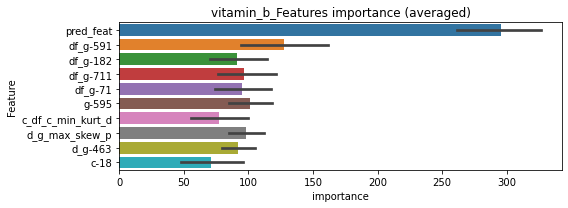

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000197494	valid_1's binary_logloss: 0.00100397
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000190207	valid_1's binary_logloss: 0.000994571


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00019491	valid_1's binary_logloss: 0.000395322
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000192955	valid_1's binary_logloss: 0.000393473


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000197102	valid_1's binary_logloss: 0.000639246
Training until validation scores don't improve for 30 rounds


vitamin_b logloss: 0.0010735795727333012


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000269681	valid_1's binary_logloss: 0.00226557
neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284
target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299227	valid_1's binary_logloss: 0.0140589
[600]	training's binary_logloss: 0.000609449	valid_1's binary_logloss: 0.00812085
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000507114	valid_1's binary_logloss: 0.00777797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313054	valid_1's binary_logloss: 0.0115925
[600]	training's binary_logloss: 0.000631398	valid_1's binary_logloss: 0.00625884
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000562409	valid_1's binary_logloss: 0.0060314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313795	valid_1's binary_logloss: 0.00837583
[600]	training's binary_logloss: 0.000632013	valid_1's binary_logloss: 0.00292262
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000548019	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0037179, Threshold: 0.0176356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, conf_0:0.01234, conf_1:0.02293
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0176356
Num_p_label: 6.0, Expected: 6.5, Adj_threshold_2: 0.0676356
threshold: 0.0676356, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843087	valid_1's binary_logloss: 0.00399996
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000421527	valid_1's binary_logloss: 0.00350168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872212	valid_1's binary_logloss: 0.00232188
[600]	training's binary_logloss: 0.000208451	valid_1's binary_logloss: 0.00146123
[900]	training's binary_logloss: 0.000163549	valid_1's binary_logloss: 0.00139968
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000160936	valid_1's binary_logloss: 0.0013966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000873545	valid_1's binary_logloss: 0.00105544
[600]	training's binary_logloss: 0.000209848	valid_1's binary_logloss: 0.00021704
[900]	training's binary_logloss: 0.000163493	valid_1's binary_logloss: 0.000150546
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.6227753, Threshold: 0.0676356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0622803 Vs.target_rate: 0.00164
Num_p_label: 248.0, conf_0:0.05411, conf_1:0.08116
Num_p_label: 248.0, Expected: 6.5, Adj_threshold_1: 0.0676356
Num_p_label: 248.0, Expected: 6.5, Adj_threshold_2: 0.1176356
Num_p_label: 244.0, Expected: 6.5, Adj_threshold_3: 0.1676356
Num_p_label: 242.0, Expected: 6.5, Adj_threshold_4: 0.2176356
Num_p_label: 242.0, Expected: 6.5, Adj_threshold_5: 0.2676356
Num_p_label: 242.0, Expected: 6.5, Adj_threshold_6: 0.3176356
Num_p_label: 241.0, Expected: 6.5, Adj_threshold_7: 0.3676356
Num_p_label: 238.0, Expected: 6.5, Adj_threshold_8: 0.4176356
Num_p_label: 226.0, Expected: 6.5, Adj_threshold_9: 0.4676356
Num_p_label: 209.0, Expected: 6.5, Adj_threshold_10: 0.5176356
threshold: 0.5676356, positive_p_label: 174.0/3982, p_label_rate: 0.0436966
positive_y_label: 656.0/3808, y_label_rate: 0.1722689

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00313626	valid_1's binary_logloss: 0.0309039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878405	valid_1's binary_logloss: 0.00244084
[600]	training's binary_logloss: 0.000208252	valid_1's binary_logloss: 0.00158139
[900]	training's binary_logloss: 0.000161628	valid_1's binary_logloss: 0.00152092
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000158329	valid_1's binary_logloss: 0.00151769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890233	valid_1's binary_logloss: 0.00104791
[600]	training's binary_logloss: 0.000210082	valid_1's binary_logloss: 0.000209123
[900]	training's binary_logloss: 0.000163825	valid_1's binary_logloss: 0.000146159
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000161135	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.6974050, Threshold: 0.5676356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0351582 Vs.target_rate: 0.00164
Num_p_label: 140.0, conf_0:0.50000, conf_1:0.62440
Num_p_label: 140.0, Expected: 6.5, Adj_threshold_1: 0.5676356
Num_p_label: 102.0, Expected: 6.5, Adj_threshold_2: 0.6176356
Num_p_label: 67.0, Expected: 6.5, Adj_threshold_3: 0.6676356
Num_p_label: 48.0, Expected: 6.5, Adj_threshold_4: 0.7176356
Num_p_label: 27.0, Expected: 6.5, Adj_threshold_5: 0.7676356
threshold: 0.7676356, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


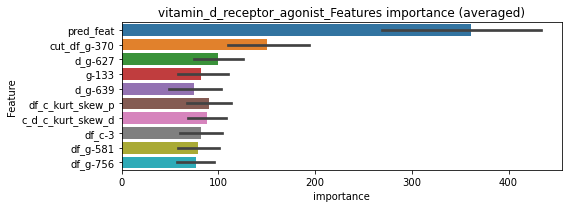

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000314188	valid_1's binary_logloss: 0.00155863
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000260364	valid_1's binary_logloss: 0.00157292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000212181	valid_1's binary_logloss: 0.0017099


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


vitamin_d_receptor_agonist logloss: 0.0014360570127588627


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00021745	valid_1's binary_logloss: 0.000883909
neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238464	valid_1's binary_logloss: 0.00676963
[600]	training's binary_logloss: 0.000519593	valid_1's binary_logloss: 0.00240464
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000479896	valid_1's binary_logloss: 0.00229215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229542	valid_1's binary_logloss: 0.0117962
[600]	training's binary_logloss: 0.000506008	valid_1's binary_logloss: 0.00643063
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00046543	valid_1's binary_logloss: 0.00623245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240407	valid_1's binary_logloss: 0.00541569
[600]	training's binary_logloss: 0.000523102	valid_1's binary_logloss: 0.00175669
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000470251	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0040817, Threshold: 0.0175409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01228, conf_1:0.02280
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0175409
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.0675409
threshold: 0.0675409, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000785552	valid_1's binary_logloss: 0.00203184
[600]	training's binary_logloss: 0.000200034	valid_1's binary_logloss: 0.00123227
[900]	training's binary_logloss: 0.000160227	valid_1's binary_logloss: 0.00118276
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.00015585	valid_1's binary_logloss: 0.00117737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075966	valid_1's binary_logloss: 0.00166037
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000213623	valid_1's binary_logloss: 0.000904216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000774132	valid_1's binary_logloss: 0.00129601
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000201213	valid_1's binary_logloss: 0.000622717
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.5766056, Threshold: 0.0675409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0384229 Vs.target_rate: 0.00126
Num_p_label: 153.0, conf_0:0.05403, conf_1:0.08105
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_1: 0.0675409
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_2: 0.1175409
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_3: 0.1675409


Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000157144	valid_1's binary_logloss: 0.00200663


Num_p_label: 153.0, Expected: 5.0, Adj_threshold_4: 0.2175409
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_5: 0.2675409
Num_p_label: 153.0, Expected: 5.0, Adj_threshold_6: 0.3175409
Num_p_label: 152.0, Expected: 5.0, Adj_threshold_7: 0.3675409
Num_p_label: 150.0, Expected: 5.0, Adj_threshold_8: 0.4175409
Num_p_label: 145.0, Expected: 5.0, Adj_threshold_9: 0.4675409
Num_p_label: 134.0, Expected: 5.0, Adj_threshold_10: 0.5175409
threshold: 0.5675409, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789621	valid_1's binary_logloss: 0.00203806
[600]	training's binary_logloss: 0.000198371	valid_1's binary_logloss: 0.00122011
[900]	training's binary_logloss: 0.000158565	valid_1's binary_logloss: 0.00116645
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000158355	valid_1's binary_logloss: 0.00116595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000758827	valid_1's binary_logloss: 0.00165177
[600]	training's binary_logloss: 0.000190246	valid_1's binary_logloss: 0.000718624
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000166242	valid_1's binary_logloss: 0.00067188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000761762	valid_1's binary_logloss: 0.000879667
[600]	training's binary_logloss: 0.000189568	valid_1's binary_logloss: 0.000190035
[900]	

3 / 3 AUC score:1.000
y_Threshold: 0.5780744, Threshold: 0.5675409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0303867 Vs.target_rate: 0.00126
Num_p_label: 121.0, conf_0:0.50000, conf_1:0.62430
Num_p_label: 121.0, Expected: 5.0, Adj_threshold_1: 0.5675409
Num_p_label: 98.0, Expected: 5.0, Adj_threshold_2: 0.6175409
Num_p_label: 72.0, Expected: 5.0, Adj_threshold_3: 0.6675409
Num_p_label: 46.0, Expected: 5.0, Adj_threshold_4: 0.7175409
Num_p_label: 30.0, Expected: 5.0, Adj_threshold_5: 0.7675409


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000158014	valid_1's binary_logloss: 0.00193525


threshold: 0.7675409, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000197848	valid_1's binary_logloss: 0.000958748
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000192297	valid_1's binary_logloss: 0.000950228


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000194838	valid_1's binary_logloss: 0.000739215
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000190363	valid_1's binary_logloss: 0.000189266
[2000]	training's binary_logloss: 0.000154263	valid_1's binary_logloss: 0.000140161
Early stopping, best iteration is:
[2025]	training's binary_logloss: 0.000154037	valid_1's binary_logloss: 0.000139868


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


wnt_inhibitor logloss: 0.0010504516489157967


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000266931	valid_1's binary_logloss: 0.00236943



CV:0.0023801171713877627


In [49]:
RUN()